# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
import base64
from PIL import Image
import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

#with open("assign1image.jpg", "rb") as img_file:
    #print(base64.b64encode(img_file.read()).decode())
string = """/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAPvAtgDASIAAhEBAxEB/8QAHAAAAgIDAQEAAAAAAAAAAAAAAAUEBgEDBwII/8QAGgEBAAIDAQAAAAAAAAAAAAAAAAIDAQQFBv/aAAwDAQACEAMQAAAB6prj+RXJ2ehnDNYu1K1vMi5hOJnOlWmMxdnDaPXI2xG42Llnu50quVbOFg8wGerlVrts3VnSNV88wzTp01DuQvMvmDjoYdalnvZzctaKNhIk1nVVjoaemTNdIjvmWjOn+boasqNPtUa3GrxBVb8LDYeaSNnF/RVzSXFxzXXFeEUZtrSWebTt1JUnXetMVcYYVbEGO2r69iPUfHMtlq276V4OhpqrNobY1hb6dlSl2Y151mBdcFCYWVDs1yrVy+X0YdARQNW3J65p83JsrWKacXLdz41sXbXTpdq/yE8zozXap2JGpDBVsmAxjx8C+K6p+rhddq5cfOTyBTcAGI0oYWjEliJJ9mM4yGMgAABjIQFNlJQo0PouucOfYvnrOKO1tRGUKbkhYAYyAAAGMhHXuCUa8WEzhSx2kc4yGJAAAAAeIc7OcI9FjJRre96EKZkjIAxkAAAADQmsBKNLjX3E66JIuZhWZzkxOJJ9EZYUtzKiWavv+5rP9i7PVkuGAMda7JBkzfBO5pd6Fy42GyVyx8O8AhMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqbFXt6eq61NPXoJTBUELa18EuOu2EOodHoXNiwtNKuvCtAK7QAAAAA8ZPQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARs4p0xRaupq2TYo896cYdBI1pvZHktdBLpLlXqYQdB55dfOyYAU3gABpPKbT4hUevJiLJtV2EpugJWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABitvaJbV5vtFuPXpzqd++vPYIg17Hus2R0skj+n8KLnVjTSfMxuQGptAAIG1ejAAhWAABlZNyxnZcAMgAAAAAAC9fbiwHj3VkAAAAAAAAAAAAAAAAADLBynxvw60BoTAMAAAAAAAADELSpxCxSKvYmdwGZAAAFfrTZXs6rV01mejzr2ItV+clhDX4SbDO5vHNkZVNK4pu9E4cOiZiyuTtAGMqlTJbCoAjEAAAYuUrqy0AzIwL5GGUbzOACGQA5vyzrfJPTU/R8yPI85aAQyAGDnmvdj0gDSkAAAABhdN+c+hHvLjjPZqwBpyADgcRhA9ZR9DAeUvAMDGaXbi6FFu2WwCnIAAAgiTIcKRuoastQJ2gAAFP8y/XR1bPvVRvRS3+XG01iEJPpvrNepVJDa0hnjndxp3JhcmiV1xNkAjJSrdJYVAEYgAADRtFk23ZAZ8/O/0TxrrQXd3+ZO+W4fgcSwAKJx/sPHfTU/R05ax8/bkCnJBncy2cc5s1V793KnIHmrgAAAADi/aKZvx5D9G/M/buhC3AcC0Ay4ZBYRfUUd7MZ8veAYefn3qvE+9U577R77pyAObMAAAWp7SujBO/wBc7LIGZgAACVFa6Ls69+1z5XqET2q1SSRyEPys2Ej0zjmvWumGqjdC59x4Wp2ob8fZAIS11q0qsQVAV1gAStL+ct4ErQAK3ZMWY+ZeiI0vp6foqscws2jLXXusWTej884+kC/Hzbj6T1YcMtVqp+vm6cG3qcZ6D1lA/wCHZkDTkAAAAAaN+Mvm64R6j6qjvFUrVv181qB1Vps4+es/Rei7HI3drrutmyPuExtKclXA6pvQ6Duxny14BgAAAAAAAAAAAHnnfQefXUXdhXJ3qIzcMdluYYqBgMdZDwukkgYwxLUncDhQuErGeVtAGMmMgrW2bGIVaW+MNO8JSAGQAIujjm9Ha+t1v9FTEmBMAAAAAAGrnvRw+bOnXDiOvnuueYdO85dkDXyAAYhSSeXp+gd2qldUdZ6kMZAAAAAAK5Yw4Nr75QYH7L597HwLbABzpgAAAAAAAAAAAspr9BfrW9l5Z+nLswtVuWIxBVmDtGPifHIXtfNKzKX2DzWGgGjsgAAAAAAAAAESVxvbiu66tvHpqQCQAAAAAAAAAAjSQ4JZulcCoz3rNZs3l7gCvMXjE7oXoqpVkDowAAAAAAAAAAACtcU+kKvh5ecA7p522YBz5gAAAAAAABjK3OKpow53dSy41xvSWNPUjZkqIQOvEvWKtkKSMdE+GUSz16X5rFpA0dkAAABdDxF5mDOzkAZAxlUqim7f6ihmBtYAAAAAAAItEOinENDHdjjFyZup49hXrCHzr3rldh5U7rULdxHRlZesaN/o6gACm0A7ifPOxH6COHdCSt4AAAAAAAHMkXZfnqp3zKR15S/IEMgAAAAAAVS1UC2rVa0Vj7VLTaSOpNR516h0SARe9Gwc6JccVSYUwg1HpfNuNC7TKlbeRsAEJkGchxGGBXV6slZdTmwAlZivWLlu3GJ2qk3b1FIAAAAAAFbY8SR13C1S9njRJnnNmjBqF9MW8o7PVaBrdvvB49w2U3GPoD58g6Ykr3WdeToDbjH4zrsUqEd4a6tni7RDKzVt551IxZzzsHGnur3elAYtAAAAAKDftJx7rXz79AcG30BypgAAAAABCo1wqmxr3JvHm+nwo07I9mXXs2CI1hYdZ4EknXuG8ORGFSZ96oxSb9QLb5rLgCjYK3ZK7GEcCFY4TvZSmgTtOF90+fOvX9AMA7lYAAAAAAcctfOev38srrPhktdso041+0+6VxjfLX+gqBcPWxx4F74V3XU9Ecg6/wA3OXfTPzx9DhVrTycQ9Xrti2vP1zk21bR1g8kNq49W+euj3c2/cX7ZzCev2ffU7ZrdoAAAAAAOGdLqLbnTuYHnbQAAAAAAU1+01Pb17jCnRvUGsiJvE2rf5HprBDs2+hvHNQqm69o0XSYxR20X15qNuA0doVNfLFXGeuFUaxa90rADMj59+gvnztV/SAHZrAAAAANezBwfrXJ+sbPEpnKOvchq3sAV7oZDrlvrbzb87yH6E4F33U9CUC/88ZoX0BwDv4cW7TyAuu9e03PM/O2Ga3T9J5ASzYK/cpVdYoHQObbHEtl7qtq1fQAAAAAABzjTvj6MuggeauAAAAAADzQb/TbqbnNTMPVQXxpuueWm2J7EpJBzrj+RXJ2ehnDNYtY69ghgyo/no24Dm7QAAAAAAHAe+8g6kOzb6xZ+/UAAAAAAHFOkxaXbz73xPuUO3n8CxfUuv2q67f8ARJ60im2rjk9S89UXsNftHKrpxs0/Rfy11g6bSnrQ5B0TjnQL+RG5N9Cp5Q4bnpEqre592WVJu5uOOWhlXu9D3BT0QAAAAAA5WyqXSOdN0B520AAAAAACqWqnWVz50J16eqbIge9jK7VOwNSGCrZMBjHj4F8zYDFdnBU93mR53FkA52yAAAAAABSrrouxz3q3zt9B+so3AZAAAAAHK+qBxzoCnm9vP7HjkW2zT6wo5cyjeu6sye0dM5S8oEJQehXTbwLa6uuZrS4dYOncl69fUOH3Dp3Ur5hd6RSbdDuRxLTPW7Jz9T0uvcqvYPZXugAAAAAacN2pbVMW857zzTpfCz6A5cgAAAAAAj0OxVy/Xt9jQTvS4jx2BfmbsXZFwwBjrXZIMmb4J8ON7F7HbqK1JgTvN4sIGhsgAAAAYCFLMtFWJe70Umy7SbpUKddYZGtfO9PQq6ead29yAAAAAFsR6EWUAB4PnzrPB/pTlT2AcG0ACLKJPnD6U+e+2+v13+MkkDfIAAAAAAAMajmtWy3rb+18jpUXZetOrXz86NDzJY/pPlG9Hj3paABgABjK7OKptgWjpajaEy2egs2SFnkj6mnomCoIW1r4JcddsIU2boJ66PIKnvYV/wA/G8gczaAAAAAi8+asOh0tz9HN1tSfWbMV1rWeM4j5q1qxOdXu3Mum+mlkDY0QAAAAAAPPnlZzj6Q+be78mb0DhWgABCk4X3H56+mvX68gCQAAAAAAANJSfFf6VxO3vyHI5nmiXzFt2iRp3QqxWmMqy6qXajWe25mBp6QAYr1irE4KrRFsXo6PExZp3ZEZrtNmxR5Iw6CRrTeyPJa6CXDXSSCxmwjfze61fmRtM+mXLhX5AhMADz6iyzROh0q7bO2gayijW0rJyedlkMZooACjdA5+x9JfdTXs39AAAADxWS0IuZ1DBvPtF75M0NR6dSdSV3NeznzAMMc5vXEunCJYOr1rcjdJnz90Hpw6Aad2QAAABgytk0DEl/SuY9N831cnnlNXO6wcovclSuLcjuKMOc10p1Vhq1+zdQNPSAArljSzhKe1Sd6qmRCaybs65CjSGp37NgiDXse6zZHSySPMawyYuXMRevuKGjFKvFIs3mj8CjZAA1bcZUa80S77W5tA1NMwcw2MWAp3WtuO8DmTqKDpXrclwrd2+Hu08s2XeHsYp63oMvLis/uc7XzzS/zTmzANfJjJlr2BgYyjnih3yFadzABoS0Ue/l+OHzuwrenCnscKNuLzQh9zbq9antTjtw6jt0J0W0T/ADp7OzWu5Pbryqvr6L24ML1TrLw5zQNOStXHs+3tyQNTUAAgzfGcVB/WOkej1ocxVC35SY7mQa9iLUZLCGvwk2GdzeObIyqaR5jFcTVkRjFz2xV2xeWjZANfaAAAFqi0R77ZIFFSKg9M3b8fnLoNDx3YfQ8v5x6Px5dHI8jmTAMAAAAAAAAAAAAMZAAAAAAAAAAAAA10i/F05zR43YegN7Z09w419C87V9YycOXmtMfWxfFehVVkCEQAA8HP+l8zuHf1ZsZjM6kom9VGN/lxtNYhCT6b6zXqVSQ2tIZsjLmJH2NUcFIs9YuXlsNAKNkAAAAAAAA4pXupcq9NLOnfm+46Bz7TDW+hZvzZb+ZDsmapaObP2BVkAAAAAAAAAAAAAAAAAAMaKPfi+0zmy/qmS33jo35wEdgDXKq59eqFu8/qZA0pAAAAAABhcxqk4LLnXb336IG+FC6MputjIIntVqJI5CH5WbCR6ZxzXrXTA2MVxtV41VYqd/p138tMAquAAAAAAAAI3z39G8c60aqZx1t4AxLOrYSrjSgzRbbbyHXrVfRcj5rsGlHupy+y6UrWRJWtLIEQAAAAAGAzDrd2Lhjk9V3Y9ho9I2dCfrX7xtX5wEbgBkAM+c2pqdd3B5WABgAAAAAAEeh2Ot369nfQdPpsT/EmZdmB7hRybhjsIYqBgMdZDwukkgYwzXhcxBVZq5ThfZqvaPLWgFdgAAAAAAAAVS1+LcfOO3fo9RdgCOyAAAAB607NM9e2x+uvrdH5jk/Sa6LirPoCunKKSlo9UureOX+Iz6VBZXCyvlZ2+RdHjVm6AWvmrw2UV7WAK9wAAAAADOcaezcl+g9DQ9gcKQAAAAAAABTvGpv1NV8DHvyXZ1QhiSZAuzC1DEYgqzB2jHxPjkL2vmknUxXGuPqZwxRb3z60eXk6A17wAMR0eI2XFbckwDMgAADmfO/oH599DHYZxtb4AyAAAGndKs1fozYFmmAAAc35V0bncL86d2qOx3G3Um7W6AAABxOo9F5vC/2BVvgAAAAZ17PM9fofS4czzVABrZAAAAAAAAKJeaX0Lvaq/XsXdWTLYTBZ51xhp6kbBUQgdeJesVbIUkY6J8MhSFzEkxGaoq0NXM4UOhe0rrl7QBHNfi+/FdJIj7GLMBZeAAAHJusrdqPAvWvb6TYwBDYAAAMtlUqzT+jijuLNWwEOYABxqlWSuQ2cad2uN/Xeg8v6hbzwAAglO4/1nksbNwFPSAAAAM5xr6DRu/aehKBb5/MqAsIVz96kYs2ysPZWSgMyAAAKdL8Ubt63XpMdh2MrNOyENdpIFHnXqHRIBF70bBzolxxVJhTBjCYriHAl8gKz02l9P58dtsply4FuQK7UESwpI1aZmt2bwJWgAAAAcz5z9G8J70FoG9vgGJAAYyZjq8SCVMXbtzmMpkjyjgMRuPPrOJynNZ9WajyBDGfEeWYnH2+iNgBG4AAAzo2XVp2m44z5mERBKi69YBGIAG/QZWoj77LsgMgBXeX9T5x09a6WLh/bPQZaSY8wUadkcdezYIjWFh1ngSSde4bw5EYVMYcwr/CLPOOierZW9XCW41W1+asAK7TGQAAAAAMeVGMOSuesRsSmXLtl86Y7VxP0jJnFu8AYyGcZiZ06pUSzGzOPGPPnEthkjfgzrzDYDSdSofaM4U486453BmF+AMSADPnDzOrs7VqlefpPHvRp5rgFdQBjAAAA8nQZ1twAyAFdrjWX0dbhfb6Yq9FntUKdGGsiJvE2rf5HprBDs2+hvHNQqm69o0qti5Ic7+ieR96Cs2am6mPdiTuPM3AEZgAAAAHj2lYjxwrpAMPVhrjOUm9bshfZ8547nxn0KHjw62r0VmvjK7Nde7SWxnAJipqI88qnblcaOf3V9nMsZDN4Az5q1rFfEvPZeU16UEwU3+tWOlw1q/1/b74EQDUkatoVTMiPXQAYAABPzlttCy4ADRvrso1611Po3X1lPzx9UfPXan2Wwcr6YLo03WNNsT2JSSDnXH8iuTs9DOGaxdwbtPEDs950bzHN7/zblRurGDO4ewARkAAAABprbpLGsAhAACXEk5zYQLLiNJMuR1zv1c7EE73lens7HWis2S3a9AJhnAAMgAAAHlj0Ia1inoVRobmvVq9m6RaeRSld5OPMAhkAAAhorTDxBCSdEK/JunZzDf59SsAMyADzQ7PUr6HV3hTfRxOa9KS7OeJdl+fPosZSIHsXap2BqQwVbJgMY8fAvmbAo9S32E6cAauadQpXOiza1qy8C8AhMAAAABWpdJYVAEYgAToLuUp4E7QAwQpN2dlesWIx5JV/oPz0I8PcX6v78oO9ev2JWLFT8WLXprsuKYvaNqsUFZ215qw4lbOjZ0ilrnxpT9Zhyc59gVYAAAAAADGQAAAAAADKoTEnQuvqyQO3IAPmjuXLrcW+OwCbsXZFwwBjrXZIMmb4J8ON7ODdb4n38egBAn4g51eKFdvLSkAUXAAAAAaq3aVWIKgK6wN2Xqw6t07QDMgA8q2uNmUSYs071rnMSTzafQFWDBonmRhXq37XOVU2iEgDUgBqk2aoEfp3yNcqbJr3ByqQCOAAAUsT46QjCz+0rrMwDOQAAAADXs05xTuicz6X6DWyB0pABx7zOVnYZCzyR9TT0TBUELa18EuOu2EKZO0HzN9KfOXXDop59BjMeLndqp1s8vh0BrbIAAAAAAQozYxFfO9GcgDIAAAAGI0nNmUut7o6t8Hb69kPLXNEVMd9izKEb6d22Ft2Zw062MnWrgzfZzaQCiIAAAAEJE0VwqA2YxOcattloAyAAAAAad0fOKD0XnV97Wq2A7EwX89PKqldMLzGa7TZsUeSMOgka03sjyWuglw10koXLPqCvnGL7WKYfQsn5xZV46JbKnY/LrEBRsgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEdQ/EUrTcYyAZyBgyBkAYAAQZtanBBFi8972v0FBtk7llSmSu3XYp9waSTXIUaQ1O/ZsEQa9j3WbI6WSR5jWGTFy5iUjnnRaNVnrXLe1cR483TWqXSdFslc8ncu26ZpMYu66qtbYyNMw2I6J6tTTm/e+eT6J3XFT0Yzc4dNn2xe760rY6IUZxVOxCzfGcwVqM4sq+oy7an8uqRMuiHP5dcrrqpcQtkGsRbtu15p+LIXtzR/FGp0PNMlV2WgqsYumqjx84t69IxuhjZrSSxb2lDxTLopz0jm+QKewswwXtWm3GlbLckY8tKtr1M3zXRyMnqXe93YIeQ/QHz93Z/QETSx87dxDvHz39SekphzFUIkx3Mg17EWoyWENfhJsM7m8c2RlU0jzGK45wl9S9fPWOAd/+deZO99CofUe3XyB9XLbRhxObBr2BdkAyNW0wRwLWa+KmweBr2BsZErow46y6Py7Uiy2yrxUpjV+bCPIDYkR5AI+Z3HkNOLZFhyOf7gAx0fNXc3roeQYWTk3VLeKvg301cc93XwiqTVxpvz7RUqDsZU3y4Tcl0F+U4QSG5hp25LcgEgAeYswjiDwL6L+cjqjyrdGllR85/TfzidSslVunm7vmz6d+Y+8+kpdxmMwib1UY3+XG01iEJPpvrNepVJDa0hmyMuYnGH9cuGlK/8AzZ9JfM2nLs12Ve+zXzK01G0nRgAAAAAAAAAAAADGQ5/WuyoBlN4H0wuAAKmXCzT2Tw8Pmx5LU6fopYQNbuL/AKF5h2DqeEh8X7oszDy14P2onYh8oLzzd908rVrAAAAAAAAAAAAA+b/pD5rOoXymORrwbtvIiz9A510fzV3zL3nh/evSUtd8KFlN1sZBE9qtRJHIQ/KzYSPTOOa9a6YGxiuOE9H5X2Hnze/Nv0T87Uvo3fBfdaHHHayadSAAAAAAAAAAAAAAAAInIO1Bx7rFM5uXBug64ABzvlFkzR1azrtMSvb7gy590Hb8+AFc5J35Eco6o82AAAAAAAAAAAAAAAB8zfTPzAdgtVN6OLOR9n40M+mct6n5u7557Fybovoabn4kzJoHuFHJuGOwhioGAx1kPC6SSBjDNeFzE+d+58E+huXODwrtnH8voPyxRdOHOVs+uwl0XFbNPZsRXQsWEAPhEDvCQHetQDcUA0yqBqKgairA29Jgc6FoO9tfwWSImrF1exr496nszOCvdh3SjsN/xNoE+aaXHpKDgU4G2VANxSYy18rBhmLAY4XgwF4TiCE7XFCURM5SuadC55sVdot1XbX0seY9Gowq6zyHr/nbeGdDot+7ldozqhXYYkmQLswtQxGIKswdox8T45C9r5pJ1MVZ82/S3zn9H8ayo8v6Rz3Zj3DerfdCPKancqTRbbAOD1QF1kWJUsbNNuKeMXAp+MriU4LiU+01WbwNa0AAj03bpvRRc21XkoxjN5KMFyqUZ7ftbwNX1wAYXsVWxxLec6I8DouOd+zoJQM4zfhW00tkArkBFnGR55ydHT6Kc6M46Ic6MujZ5yYz0f1za5U2OANDaOa9J5t1NHtdxpPQujpwOddM5iI+y8U7X5+3j1lQtOvX0PYTNnCzzrjDT1I2CohA68S9Yq2QpIx0T4ZC0+NZxP6F4L3rhWUKp2RL0I9kgN0W7Gh025Uyqy3Aef6wkdpdmqmmTucrBkMGQwZAvtCv2jtTQOR0AAi8+6Fz7r6Hkzje1AMmMgMbDDmc72YBr9UADx7JV1DwzW9XwHkySqwZC5uFDfhdUA17SDOhWwoWJXrv8mGTDGYZN9YQBhkX3BBZda9oBxujq510PnnW0O6ulkrf1JtStNdOe9w4X3PgW8vbLmXUhdNOyFtxa7SQKPOvUOiQCL3o2DnRLjiqTCmDGu2apnLO5cT7ZwLeZLJ8bqQ6U2SvduPO+ddN5jVZcAPP9Y1bSWF+GJZBcMQXDEF3ucYzDlejGQCuQAeYswsjDJhnEMmBD0sjOKK+nVPo22E8+tX1QBiZC8bdjgabFINTlx8SSqcYkh49hCQBgAABkAAAAAAABhG570Dn/X5/dLjUblvasSi32hlA7rwju/Bs5zr3wOjHqcmPM3YqNOyOOvZsERrCw6zwJJOvcN4ciMKklgqxVex8k63523lDJTYOxX0hE5UbWKVz/pPNqrLkB5/rAAAAAAAAAAAAAAAAAAAACtoWQoz/ANoene8Wa3cLo70NHSAKZgAAAAAAAAAAAAAAAAAECh3qi9jnfR2iZo3dbZBYQzjfeuC964VlBiMku/HpMKdG3otZETeJtW/yPTWCHZt9DeOahVN17Rpzq+8wPHTaLevM3chdo7X3qn71XO2MVnjvYeOVzu4HnuuAAAAAAAAAAAAAAAAAAAAAZCtoTjBnAAZhLBkMGRjBkZwZwAAGDOMmAyeMZbDVhjcaTLcR8EkijEaj2+r9fQ+g36mdta5VLNXDlHeuEd24NlWofUeQbeO6zIG/pwXRpusabYnsSkkHOuP5FcnZ6GcM1i7jl55vF2d/49+Sv5A7h859NT9Roktj2cVTjvfeZ4IsO5Ndlc82ONgkLBLyqhZozCEWN4z0m/Nco2JmSETckAnhA8sTJf582m6qrl53ZxQMdD1FB89Bl5xzLHUo5zXHTZByo6rry5YdW9nJDpnLz2W31q30/FyzjNLxdQpeLqFKzdMlKLqhsioL7ddijhh3T0cKx3jYcDO++zgDftc4aIWkc08m81nB73Om3Lztvn51+i+fzWGXxvtvoKmMiB7F2qdgakMFWyYDGPHwL4rrjwk7aotXnrQDmz1c66UX4+bfobm0z09PVq6yxbiE+XZJCViGtquyYQP0JxK/UO+cvewZOduAAAAAABUunc26h3+U1a6i6pimk4F72EDGvMcEN6uySEzANbVdkqfH+hUyudvA8/1wDAAAAAArVlQbVFo6Jyrqvb5i9rqBimk4F72EDGvMcEOC65yUfuVE6VwLcgcuZjJly1rdeH+gq7ZHmbOlCbsXZFwwBjrXZIMkppZOZLO08+TDIecuAAAKLWLEj9NT0axQ427FihnSCE5gaSSpYbjUldIjiV95x61b+ilPmaG3ZBHtrm3FZjLQUaJYfFWX21s+r8t7N09FyqNtkFrrXoGaKRvFdihxhihnSCE5gaSSpYbii8t+h6RHNSYw0uns23HPN1Vl8zRvUZXcovjOL5FrVishCS9FtmzRRel7dV9TFUbRa616BmikbxXYocYY8d6lzIndG510XzNwBpSAAo94xdjl3XuNovUU9l1VG9W4bCoFfN4Fvpzze1db3cixay8890pdFKxZ6gBXnGdaaeFFb6dxvuV97rslj1IKnsSCMUs2aQmsCKSF7CSL0lg0nOEnbtp88KO08iw9y+/HFs+fGFqndSC212jRficvjyBc22RBmmJgqfa4A3rsliKnsSCMUs2aQmsCKSFzGSa5izSc4rtwqtWel7X55e7ks/Q29HT0mOu2bWIU2boJ66PIFzbZEGaYmCp9rgDeuyWIq5h1Pk9bor45J527rgjeauQCGY/urcs6MPoCsTXWrLkVa+g0/RgjOUHbrgfRnF9elLvMHmtY582VVuvnrV9SZFZ81dZs064xc9525T+jq+hecXzbwbKd0TgvXPT0ukMhtIqcxFoxUzmBCYroZIhNZJrkKNIn4f8AR3zbh9OHn14/Y5eyUvPTUdFhrpO3iCxmwhiqjsBU62LBuiGwksWtMOUMhsKnMRaMVM5gQmK6GSITWSUGg9J5jVnvAHkb+S2ymXP1VDmS10bOJcNdJILGbCGKqOwFTrYsG6IbCSxa6gUrovPOs8OzV849y53fiX1rhnctSUKVzaNF1D55+i+dTUbotK99evtVZ41G0ZZOhnWhdqR1/lYvXpOka2aB2qZjh2wuCtkfXr6P0ui3rj2fP93oX0D6Omp3Dhtz41kVtQes9OEl7rQ7OHSaQ5FTWGpGK9gxIcxVCJMdzINHy99G/OZ9Kbtezx1/KLNVLb6il3Maw9nExcuYi9rMVDVNGdCZ7sRD2vYsQie60I6TSHIqaw1IxXsGJDmKoRG4/wB24JW+gwPI7HGr5Qum+ros0dLJvxHmNYZMXLmIvazFQ1TRnQme7EQ95hbWhzu/8VXc2by6wr3vQ4L3zgPfeNZzLmfYef8AQj0q2/PHdObOmUH6FgZc86DzVL2q+xDosxQ6TD6npyeyDV5q73yM8dyrwl7Nx3pw7G3xnyV/zv8ARfzt3r11HuhXF7lQOgbK6O1OHwoZ60o1XyGoumwlxOjMZhE3qoxK+cfqL5cPoTdw3Typt+kcc7l0oWOMqmzR5jFcTV8FsLmUtMNVGh6J3OyujtTh8KGetKNV8hqLpsJcTozGYQfnjvvzrh9CyOS6eVPT1HjvTenCxbm8ebZGVTSPMYriavgthcylphqo0PRO52V0dqcPhRK2pziXf/nn6G4li/h30DxTK78462v7Fdkm8D7F565zyrqtIiiFYPS0zdfY+SVrDzqXfKsoOnNIezjldho/SOfKxKZ3GuVZG7dzzqHpaV06WiGq6NYhRP2IRrDHIrma1IxjyGJA3woRN1sZBE+Y/oz5zPp2TSN+zrcz6zxjsmvsTtrSHjOyMuYkeVPVE2FCdC6dLRDVdGsQon7EI1hjkVzNakYx5DEgb4UIn/Of0t80MfT5TPW1r0a38/6Vr32rUqkxkbWkM2RlzEjyp6omwoToXTpaIaro1iFE/YhGsMcnz71LxxzVz9EVFTWuXY+6jy+7d6pPyD6RjnGa/wBGa151l/LMQ/KzYSPTOOa9a6YVnjn08nPnq839zhF3z02U2PCei6TMrwz0R3os37Ewx1DUXbdS8n+JMwge4UcnfNX1J8uH0d5pm6PQofYuHd2zosda6ZmJsYrjbpgNSNunpibHhPRdJmV4Z6I70Wb9iYY6hqLtupeT/EmYQfnL6E+esZ+ifHPd8OkkuvLukT0bX6Zx81a9a6YGxiuNumA1I26emJseE9F0mZXhnojvRZv2JhihctTi0jqC4mZkzCB7hRybhjsIYqBgMdZDwukkgYwzXhcxAYqjbhc6IwxRE3C6xC7MxCMSO5F2dikYgxF2dUIYkmQLfmz6E4Md102sr2fnvr3MOjT13wxh5xrwuYgMVRtwudEYYoibhdYhdmYhGJHci7OxSMQYi41whj88fRfzufQUZ3mNvGrbX7Nmuwi6TnEgYwzXhcxAYqjbhc6IwxRE3C6xC7MxCMSO5F2dikYgxF2dUIYkmQLswtQxGIKswdox8T45C9r5pJ1MVxr2rWwaGaY2b1b4jxmtdJ0hc9IGmalGG6M1F2vYuGWwmCzzrjEzhPduMHfQDi17p9tHntfNJOpiuNe1a2DQzTGzerfEeM1rpOkLnpA0zUow3Rmou17Fwy2EwQ8L7Rxo+jwDlTpRPLv4nxyF7XzSTqYrjXtWtg0M0xs3q3xHjNa6TpC56QNM1KMN0ZqLtexcMthMFnnXGGnqRsFRCB14l6xVshSRjonwyFIXMSTEZqjXMVOggN0RsYpbERILVCTZq5yQIs1SMZMZiLNOyENdpIKtzq91E7CAcreLcnQdE+GQpC5iSYjNUa5ip0EBuiNjFLYiJBaoSbNXOSBFmqRjJjMRZp2QiLyPpnPjvoBy9lHyWzZDkDHRPhkKQuYkmIzVGuYqdBAbojYxS2IiQWqEmzVzkgRZqkYyYzEWadkIa7SQKPOvUOiQCL3o2DnRLjiqTCmDGExXENgrakhY3TGtslegme143tkz0iLWqYmsFzUXQ5sAZSY8wUaNvLhrjlvVTqYBzzjfVOUHSem/NXbS8QmK4hsFbUkLG6Y1tkr0Ez2vG9smekRa1TE1guai6HMXjOnW350NF5oDk+kSlzRJxmyVkufY/mq7HVpNQqR2yFxxqdCYV2xkhY3TGtslegme143tkz0iLWqYmsFzUXQ5i8aSY8wUadkcdezYIjWFh1ngSSde4bw5EYVMYcwYqmK8gulTIlonKg0WJE5BC7UmxyoZkfmzXiw4WarAeejcsXn0v84+I4NlIdMX0PJu0AFqqrI7sxhzBiqYryC6VMiWicqDRYkTkELtSbHKhmR1LVeTGK6aVjgP0L89GADJgAAM4DJnoZzvHWuXHrsfEWZ3V0mbEtE5UGixInIIXak2OVDMjqWq8mMV00XQp0YayIm8Tat/kemsEOzb6G8c1Cqbr2jRdJjC5tClE9MxhEJ6rnEuuulxqfKJ4JmlfOMqTBn6g+X+uHROC/QfOTjYAAAAAAWWtdZOorpMYXNoUonpmMIhPVc4l110uNT5RPBK1hmxqrmEZcxjkzgPfOQlCAAAAAAL92zg/TC2fPNj5yYzgO5vuddJIT1XOJdddLjU+UTwStYZsaq5hGXMY5NmQN4ujTdY02xPYlJIOdcfyK5Oz0M4ZrFrHXsGKqTpF7qFuJ6JjHINiVSSQhaaDWscpTgRnAe/AX6vIgAAADI1YUmcM57twm+nSmOvYMVUnSL3ULcT0TGOQbEqkkhC00Gtys3gpZajYxXbRf8AO30nyEo2PXkyXZSjXjOEgAyYDOAAAu/a+RdWJ6JjHINiVSSQhaaDW5WbwUstRsYrtpGhMPBNkQPYu1TsDUhgq2TAYx4+BfM2AxXZwL2uoGKaTgXvYQMa8xwQ3q7JIRsw+cIvTeZmAAAAAMjMzfXdUR597vfQUud9RmAxXZwL2uoGKaTgXvYQMa8xwQ3q7JITMA1tV2TC9gG2TByc55l9JBwWZ24Y+b43aOMM4AAAAAyNjqtl97Re9hAxrzHBDerskhMwDW1XZML2AbZi7JGjsAm7F2RcMAY612SDJm+CfDjexex26hiqNotda9AzRSN4rsUOMMUM6QQnMDSbeF9y9HzNjp/NjSZwGS1iPsjliTNa7JBkzfBPhxvYvY7dQxVG0WutegZopG8V2KHGGKGdIITmBpJKlhuNTFdrCEy2GyQs8kfU09EzkfR8nzUd05MIzOAyXYrHaJTgWutegZopG8V2KHGGKGdIITmBpJKlhuNTFdrCEy2GyQs8kfU09EwVB//EADQQAAAFAgUDAgYDAQADAQEBAAABAgMEBTMGEBITFBEgMBU0FiEiIzI1JDFAJUFQYCY2RP/aAAgBAQABBQIOWxHvCVbHNbYC6o6YXNeUZTHA1UzQlFUZMG+0tf8AeTploU82kFOQhS6o6YclvrCUvODjPkNbzZlMeDctChGURshy5k5bEe6JkhlKVzCBPyXBxpLg4T40vtBmoutk1UmVgzJSsnLYj3RLfaJCpiCBVBxI5ExYUqUCkOkG6i8gkVVI5bSlE4gx1Dn4Bj5OuS2GxJqLaiVMcMannQiA8YKmmDpqg5CeSG3HGTRNV1bebXk5+Aj3hKthl1tsc6OHXm3FiPaDlzLkJBvJUXHUEtm0fISFK3imP/Uy2p1bVPbSXEYC4DKg5TlkHGXG89R5JI1BEN9YbpwbitN5mkjJ2A2oPRXWghakG1Un0jnJUfMaB1RoLqhGRzFjlvdVuuLDMJ1wMwmmwRdOxxhtwOU5JhyK80CecIcyQDlyDG84N1wfU4bUB1Ybp7SQhtCM1toWHKe2oOQXkhSVIy/oa1jUof3kzFddDVPQkJSSS7HWUOk/TzIKSaTalPNAqovTzUBuc2lZ1VsP1JbhLecX2NSFtiNKbUzyEg2TUfHUOQnJu4JFoSXtlshEY2Gu1TDSxwo44UcFGZSCLp4XYrTocpxhyM8jsQ2tYap6zDMZtnxLaQ4FU9kwdNIemkEQGUhKUoLwdOoXEZWFU5semj00JpzYbjNN+JxtLhO04guE+kbDoJh0JhvmE01QRT2SCWGkjplKiJcTHc2nA3by4w2dA5I3N0cYT/dU9GuT/mNJKHHZBMtl/wC3no0SoCd6NvaByRxsnLYj3g8rU9SS+f8A8fVfcUQ/pcuZchQJ5Sj46QbZNFyFZUj/AOQqZ9ZNLWaFkylY46RyFZN3BItAy6KpJ/d/+PlK1yKf/bdvLZbCm0JTvOBtanF7KBMTolQFaZXh1EOvX/4R9e20KO0lTKnVpVvODZbyctiPeFYRpkoVpUXzLudcJsnHlryIzINSTH9//BVR7Kmo0Q3LmWtQQpRr0JDpElvWoVAjWyIK9cXtdWTaVqNauyK70P8A+AdWTbajNSkJ1q1GRISRp0JGtWTdwSLQJvdQKSv6e2Q5rc7mla0f+2VIQRtupc8FVX9AgN/MN/hm5+Aj3hK/CSnQ/TlaZXY+rS33wj+nxypbEUm6xAcURkZf56pXJbM2mVyW5N80xzoQIzSbataO6pn1kpLUqKkkRw5cy1pC1EaNCgykyc1pD/1oqLZkG1aHOyafy74X5+PGRfZEQtMX/BJmxoogTmZye2vfKr0r9n5pV/KEf0d1T91T0anmjJLetIWlRr0KGtOTdwSLIi3KojXDEdWtjOb+XfCudkuWxERTqizPLtxgX8EMfNjtxDV3Ir1LxDuOeBZdUySWT+FZG1Ue3EZf9mlfs+2vVVUA6fiFh4JUSk90q9lB76sn7lGP+RIvBu3lsuBLa0q3mwtZOJ2XA0RtG84hbX/inH1iZzfBCLtnOvOyqDL4lR7cYfrRCPrD7Jb6Y0Z91TzuHYHMl+HFMbZqMV02JKFEtPZib9zRi61XsP5FVZXLnUqGc2alJJT3TEdU5R0aG+6qJ6x4S9uUtClr2XAlxCU7zY2XMnLYj3hKt5Ur2+csurXfHTpa7MUxdmeKLK5dN7MX/rRTv1/Zi6X8kJNaqXDKFD8OKI+9TRhqTv0zsxP+5oBdav2Yll8anjCkTaieBcVJm3HSk++UnVHEY+rAcuZchIN5Ki46gls2j5CQpW8TjKktile3zUWpJl0Ptjt63O2uxOZTxhCTpdUZJKXXITAfxM6YdrE94KZnyR6XOBwZyQmXMYNnEM5sRcSsLCZsdcebIVKlYUhbj3idQTjUho2H8JydudLq0OMH8TpDmJJqgquVAxIeckORn1xnm8RzkhjE5CJVocrKuzebOhR1SpTaCbb/AMJ/MhBfSUTkJBsmo+OochOTdwSLQi3J6tMMUwukXsltdqEmtTaCbT3Yhh8SoQ5Coshx+dVXYeF3liNQIDIaYaa7FoSspFFgPiZhUS4cqEYoy4xwvHilCE1NPXrEoU+SI+FUEGsP05ATTIKRwYgXTIKg9h6nOCThUhMo06IG6jKbjjCcLSj/ABOK0oEP2wbt5cYbOgckbm6OMNOwKm/qiiMjQx2uxuoUhScm2FrDbZNp7n3m2GqzUjqLtJw2pwR47UZvwrQlaanhpt0GUqmyaPXESvCtaUJq1fNYplAkTBBpkWEXhn0eJNFUoUmEKVWHoIhzGZbX+GoK0xRTmdUTjDe0DkjjZOWxHvCVbqB/KKjckf4JkpqGxLlSaxLo1FagF5Z8FiczV6U9TnKDW++VIbiszp8qryKPQW4fmrOH25IZdk06VSqk3UGv8FWX9QppdIQcuZchQJ5Sj46QbZNFyFBKt8VToUmlI/wSHkR2Zsp+rzaNSm6cx53mkPN12krp7uG6rr7X3kMNTJMiszqPS26cz56xSmqi0fJpk2lT0T4/nkObr5EalGs2RyFAmUrHHSOQrJu4JFoRfzqB9ZtOLpE8+I6jypGG6VwmP8MhhuQzVYLlNmUOoc6JniCoHMk0GlFT2P8ADXKWmoR4cl6mzYzyJDHlnObccUtrckyLwbt5bLYU2hKd5wNrU4vZbDpE0mX7mnn1iebEU7iQ8K07kSP8dagFUIdLlKp85JkpIxFP4kTCVN1H/jxZTdSMLz9p/wAtUc6uiGSmGm0JcTsthTq0q3nBst5OWxHvCVbnl0epj2lfc7IJJ8lwMPE53VWQqo1SnxUw4nifebYbmYoYbN3E05Q+IKmGcUSknBxFDkGRkZZ4ug7MnC8vfgn8g+a6zWmWkstZ1GvxIgk4knOmT9UfG5VmhGxHPZOm16LMPxLSS01aGdPn0mXzYPkdXuOQ29boj2Q5cy1qCFKNehIdIkt61Bg9Squ19j+hFd3meyS5oRkR6TQepOddk8amYQi70/xVeqNU5laptZkw6Ay2TUdlrJ6Kw8JuH0KKn1KXSXocluWxlVYnNgYekceqYik8em4MifTk86hlur1x2aqBQVuCNAjR85ERiQVToa2SoNdUyoj6+LFsLfg4Sk6JPjlq0RxS2iTG0JDyjJzWoISRp0JGtWTdwSLQi3HUE42tJoXTXdL3ZKPq9nDPq1njF768JMbVK8M+WiFFYafrNQjR24zXbUoCJrVImuUmeRkZZV9ni1jEc3lKo7HGpuWI6oc2RRKWUZIccQ2lVXgoNioRX88Q00kFhOpG634XUE42jVTqoR+Ope1bTqci2xIvBv8ADNz8BHvCVbE9sEZpU2rWjN67nCt54jc3KvT2tiD4cXy9yXSohQ4YqlUaglJqst891YjVSXHOl1RucQxRE6t4SmciDljVrpJhN78zLEcviUvDkPflCr1JMFEiS7JcypdYXGNC0rQtBLQrcpdUacS614cWs7VXozu9S/FUvawC6zJVwR7QcuZa0haiNGhQZSZOa0h/60aFA2tbApi9UfOQXR7OKXRnOV9+reKN/OxAJ0gosR1xTrmbTimnIT5SYsxnfiYUe2qxljZP8OgJ1VjLGzv3KCzs00VCQcqX2YYlmeWK2tMnDDu7RvDjdv54UXqpXilp1RoR9JcgtStCg0ZJb1pC0qNehQ1pybuCRZEW4JYkp0v0lX1ZzEZtI3F9kP6qx4V/JGFy61IYpV0gduGD600Un6a7ljT9Xhj51zLGf7SIWmK5b7aEo01UYst4O/U+HGpfw8HH/B8ai23o1sSLwbt5bLgS2tKt5sLWTidlwNEbR7zYd+6Kkg0P0s/5OZ/MORQmKsNoJCey1V/FQf49aGJmzXTe2gNbVMfcJpnDTe7W8san/wA/C/7zLGzfSVTHN2nioMcaZ2YZYNc4YsX9zDLW1RvDjU/4WDi/heOop6SoLqeNvNhaFOL2XAlxCU7zY2XMnLYj3hKtiIK1dpvuvHW0bVWZWTrPhriDp9fQolpcQl1uowlwpGdKgqmyEkSU4mlbcbBcbPG7nzoS9ur5Ysi79MwxMLoK5TeYhSTSeUOI7LdgREQ45mJRqqlYabS034cbr+WE0aaX46rfhK6xxHshy5lyEg3kqLjqCWzaPkJClbxcdQT9gVdwlrpfufHi5nRPw2/v0fw4jp/Og4eqBaRKjNSmpWHnUj0af1i4feUcaO3GalPojMKN6qVCDGTEiifV4cIVyoFUZiFGhcfFbZiFUYs0KIlJq0Nylz6RUkzWxNp0eYFYbLqxh5hBsstsIGIKmSUYTp20jxYue3KrSGdim+Ooq1SqW2a2+OoJcJouQkGyaj46hyE5N3BItCLcEsVD86Te8eKo+9TsFSfn4sR0ZWql1z5NrS4nObUI8MpcqRVJNBpKae2K/Xj1QKZJnqjYcioL0aniRh6E4KhSJUA6PiJSDnw2ajFmw5NLk06uoUTa0uJyky2IxVKurdKg0NT6iLp4nFpbQySqnWPG8sm2zMzOil9kSLwbt5cYbOgckbm6OMNOwOSPcCqJ0P0gvI62TrUVxVLqza0uI8VVw+zLN2HUaYpFemoB4glhyqTpAg0CbKOm0yPT0DFNROLGoFM57yEJbRmZdSxFSSjjCVSMlyY7Ulqo4YWkLbmQFFVZpBdQmOCJR58s6Xh9iKfhWtKCVUYqRiCfvwMLRdtzx1Vz5CH/AB4/JG3ujjDe0DkjjZOWxHvCVbEQVn3dI/DxGZET9SaQJSUSZBKUlJOrINzpLYjVcjCFEtPgdgxXQVJgkGWGmSzrsnlVShscemdshpL7JGuLKZcJ5nJUSMoNstt+JxaW0S6spQ+4+pNPkqHpskORH0BmU8ycWooc8UhzdehM78iV+Yj2g5cy5CgTylHx0g2yaLkKCVb446Qv7Aqatcikf14ZD6I6JUpyQcanuuhumsJCm4rI2WFk5To6xKp7jIgzFxVtrJxHkUfRPzUpCdCe6tp01WhK1UjyOrS2idLXKXCp2okISghvN6g9GaeKXTltiDONk0mSi7pzmiMIHVhpKd8uOkKcNo+QoEylY46RyFZN3BItCLcEsVAvrpSvueB91LLbzq5L0GATOdRhOvvQY5x2MqnDLpQpHRXkMGRsvkfUu6sL11SiJ00jyVuTrcpMbWeRhymvk4wlSWsqjB1lS5e2ruqx/KOjcdEW2JF4N28tlsKbQlO84G1qcXsth0iaTvOBr7oq7JExDXtyfBWHtT1Ki6UTJ5R1w5BSWu3+wZcSo+NS0pTWcRGYUhemiv8AJpnbLeKPGLq44wlKGfG6rQ31NxbKCba7DdQkxJmtR1sPIfRVY+09Ae3o3bV/zo7SVJ2Ww6ZtHvOBtCXE7LYU6tKt5wbLeTlsR7wlWxEElvdYEN3eY7j/AKjp5U0vkJVPJ95hlLLbrhNojz2nneytF/JaPq34ajVI0BFVq8ioHRqKuWJ9ObkU7Cr5tP8Abi2ZpbYgvvx6NXHIJxpDUlrxVD2UMusrsMPx3UOUwnCizYSZJwIhxRVEa4dEX3VchSPbiVcEeyHLmWtQQpRr0JDpElvWoMHqVoSJH0DWoTE6X4L2093SD6MUQvv5yWSfZh07Zd7K2ot+n1+C6lCkrLtMySUuuwYwn4lkPBpp+W9SqAhkdMqxDNqQhRLRnKfRGjttv1ioxI6IseqUNmWC59Ffp+JI7wbcQ4nveebZTU8RxtuKsieB/wBTqrVYzsfEzyTgVONNLsle2ol/tqhdY8FZ8TWoMfWjQkPKMnNaghJGnQka1ZN3BItCLcEvKoI6xxEc3Y/a4WpFHPTK7Z9djRVUus85zIo6J0uZhkKh1KAbdeqLYTiecQ+KpoViecoOV6ouB6Q88camy5Ih4aEaM1Gb7EpJCc6/LXOmUqAiBGycbS6idhxlwOQanTVR8STmw1ixILFMIfFEAKxVDDuLDEjENQdCESpzkHDbihOgJjNwXd6KFERlX3aeaorT7q6DVzknnUV6IdFb6N9s1OqLAV0cEW2JF4N/hm5+Aj3hKtiJlUy1IFJV9vulpOJPQolJzxHVj14fp8aWbaEtoyIumbsZh4OUSnrB4dggsOwQih09IZiR2fHVlvpiUelIgJ7pEKNIDuHIKwvCyR8LLCcLGG8MRyDFFgshCSQWSUkgps5iE3U6w/PPoSU4OZ+mr0nkKiLW5GyqbhyJDDZNNdqy1JiK0SRKuCPaDlzLWkLURo0KDKTJzWkP/WjQoR/oGtIllrIUj++6bHKS1TXzbVlWJfDgy6PsUVC1IVTcRKSGJDUhv/0rrqGkVLEYcUt5Yc/qgscel5zZ4p0PYLv/AKXrSHy1r0KDRklvWkLSo16FDWnJu4JFkRbgl5Ne3L+qR/feppCzydjNuvvtk8yaDbfUgR5L0Vyn4jQoNOtuo/8AQqUSSqOIGWBKlSJqyIiziNcqd06FlNYckJiw24/gM+hF8zEW2JF4N28tlwJbWlW82FrJxOy4GiNo95sO/dGy4DPajikl9vyYmj7FUBkRhTZiNKeirg4lIRpTMlP+0zIin4gjxxMnypxkki7P6LCLGub5J69EZlOp7ZcDR7Sd5sLQpxey4EuISnebGy5k5bEe8JVsRMqj8kinJ0xfJiuPuQUfNOR9DBthC1tLh4iksiJXIUgJUSi/0OuoZRNxGy2Jc6VOBJIu5w/lhiPs0vyVN3U9SkapglXBHshy5lyEg3kqLjqCWzaPkJClbxcdQT9gchIqH1xg2nQjyPtE8ypCmX+00EDQYjyn45xsSyUCNiCG6Gn2ni/xy6xCjCXiR1YecekKJJF4G2zfktIJpvxvObTRn1OldG0chIUneHHUEuE0XISDZNR8dQ5Ccm7gkWhFuCXlLPpToSNcnzYpjbU/vP5g0EDbMJUtBx63OZEfE4Yr0B0NSGXvI9JZYEjEEFsSMTPKEiZLlgkAuheEz6FhSNuz/JVV/IG1ssCLbEi8G7eXGGzoHJG5ujjDTsDkj3A4wqX24tJL6vNiSNyKa3/Xic/Gm0FyfBfw/UGg7GkMBqfLaDeIJ6QjE8gJxSQLE7I+J4wPE7AVikgvE74XiCoOGlqszQxheWsMYXiIE9smKif9+J0xhqNx6b5KkrrKgJ6yPcDjDVsDkjb3RxhvaByRxsnLYj3hKtiJlV7dJV0c8xl1KewcOd4nRQ2tmk5OwozocoVOWF4XgqFdojdOiIT1LbILIiFFoUSXT2qJTmg0w0yWeJEaK144Ec5k4iJJeSYfWVDRoZiZSrgj2g5cy5CgTylHx0g2yaLkKCVb446Qv7A5ChKLehxnNp/z4ui/Js+qfCsjU42kkI7cbK/ho/AOjCx/8Ttxi3pqpfj4XD+nCMXonyy/clHQSV/YHIUEp3y46Qpw2j5CgTKVjjpHIVk3cEi0ItwS8o5dWlp0Lpr2412POE2lbilmlakhh3cLumRylRVJUy94aenXVe7HCvqT+IdGEFdaP243b+bf4+FptUmRFYTGj+WYXSYJeUW2JF4N28tlsKbQlO84G1qcXsth0iaTvOBr7o2Ww6ZtHUE/djuGy6R9Szkq1PZMK0u9+K4e2+g+qe8v7w+nXWu7Gi/+gX4h0YLV/wA3txmjrTGvx8Dh9CwnC+eTjqUBUocpYTKIJUSi76iX8ukz3H4rX3Rsth0zaPecDaEuJ2Wwp1aVbzg2W8nLYj3hKtiJlKuVKo/9QUxzUzmv88kXO+fGTMirQqO93kKRKTCqDWJoCw1Wae4G5LDvZixeqs5OfjghX2+xyVHaGI6jCfpjXhhRlzZcdpLDIkP6e1CjQbLu4nuqxfejyeDW4mUq4I9kOXMtaghSjXoSHSJLetQYPUrQkSPoGtQqc0oVN6mZsL3GaWrpIzkp0u5RU6nfBiqn9SbPwGkjG2NsxoUEKdbCalOQEV+pJEl9yZKyX+FOqL9PM8R1AwdfqRhdUnrC3H3RoUNsJSReBwxh6ncOMJDmhHcyvQ53VcvlXE/VQpxyafrWGPrRoSHlGTmtQQkjToSNasm7gkWhFuCXlX53LlUmCqfNqTSWZFO93m83uJU0tIQytQabJtPgWklprEBVPlEeov8ADpSOheVR6Rhumbq8pKtTveweprtq1utl/GpMzhTBFtiReDf4ZufgI94SrYiDE07hwBhyn8KFWi+qm+7/AMFRhNzo0hhyHI8P9eE/kOpD5eJR6RRKYqe8hBISFH0LwRLPbVj+Rwue0ZGlWFJvJp8q4I9oOXMtaQtRGjQoMpMnNaQ/9aNChH+gYhmcyo4Yp3MmCtWqUX3/ABqUSSckqMG4sJecSGXicyrFNRUGXEORne0zIgbg6qUExJKhwpZBSXmwSy7DWQbbffDdGmrHoUsLos1IdZeYMlgvn3KV0FHpblQcZZQw1k9a8ESz21JeqTRi+/i2FsTMOS+JU5BGpehQaMkt60haVGvQoa05N3BIsiLcGIpPFp/9ijQ+FTxWj+3SS+XiUeknnDcPMj6G0vWgVelt1Bt9l2I8XzIH0IdVrOLQ33QxR4jQbbQ2Wb8CK+JlEW2OvQ4VMfmiNSYrIIuhZmRGU2isvCTHdiOpVq7FKFGoy5htNpabzWXVPgbTpR2OrJttRmpVFR0arsTmU0UORyqcJF4N28tlwJbWlW82FrJxOy4GiNo95sYxlk7JwzE5VTyrK+r1LLpG8UtzqrthKzqNPZntVCA/T3ErIxApr004cNmInwS4LEpX9eCSw3JaqUBcJxJ6iMySC1urpFAJA6dO55Oh3uit6l9tVd+X9nGb2WBX4nEqmDJZEjebC0KcXsuBLiEp3mxsuZOWxHvCVbE17kS8JRdmm5SXN1+CXSL4XFaEd0W9m80h5uq4fcZEKoPwlQqnHlf4v/FUqcTa/oU2jSZop9NYgp75DW4ntaaNw0kSS7DPoT7m69SmNx/LGkbqxQXtmqCPZDlzLkJBvJUXHUEtm0fISFK3irfWLSmGjeeZbSy0JJ6Y4h+18Mw/td0a/wBtQpMeaKhRpUMQ6tJjiLWYrwSoll41KJBP1aIyJFfUYkSpElUKhy5IgUOLF8bzJOBbLiR0ME2sw3FBF0LtqLmiORGo4jJMM5Vhjk01CjQppBvNpcJouQkGyaj46hyE5N3BItCLcxq90jYTY3qtk4nWhSTSqmq6xfDN/Huhl1d75tIiSxKw0+gKbmQVNVuWgN4gIFXopj1uEPWoQ9ahD1yGDr8UKxCgLr7xhyrTHB96QuPQp7wjYYQQiwI0X/RUl6pFIY1K7KizsT8Ou7tHkXg3by4w2dA5I3N0cYadgYuf3ajglno1nVmdD1JX8/DML7fdERpb7FGps0qJRZ9OofpUJ4O4ZiqDmF3ArDU0geH6gQ9BqILD9QMJw1MMN4XcDeGYxBmjQWghCUFmaiIb3zT16f5FdXX2Gyaa7MVt7dZwjI6U7b3RxhvaByRxsnLYj3hKt1xeuq4Ub0UXOYzvR4a9uR4XE60drLe4vtMupLQbSm3uv+FSySFvmEIU4aEEnwLdQgclsEZKLxK+SYHu+3GqOkvCShHtBy5lyFAnlKPjpBtk0XIUEK3jmK1y6GnRSOyQXSQyvW14ZTPY22bhtoJtPe4z0CHFJCHkq7VOJSFPmNxYS+oJdSrsUokkt8zBEajbY6eGQ/8APKGf1+J22wrQ9244IYNLVPU4bR8hQJlKxx0jkKybuCRaEX8xS/1vY+ep6mn1i+JyOlY4gTFQQIuheFxolBbakglGQJ9Q5ANa1gmVmDZWQMumaVKIbywbyzBEpYQwCIi8MlehvOEn5+Jy3/4hr3I3ZjgYL/aSLwbt5bLYU2hKd5wNrU4vZbDiSbS82bTtCrrC2eubytDQpXt/9KmkqHHIEykgREWfQG0kwccccxxzCWUkOnjnZoSa1Np0J8T1kUz2WUmZHipqGKCD77khzC8ZcZltCXE7LYU6tKt5wbLeTlsR7wlfhW6VygtKm1QarLhCLipswxWqe8JzyFwRS/bf+web3EnHcCIqjDaCQXjmK0xgjE+025imWYfrVQeBmajiQ35a4NARGUI9kOXMtaghSjXoSHSJLetQYPUrQkVWDGlFU6IqK1lT1aJgpS/p/wDf1N/qKk9sxQxQ5z5TqG7Ch0hKHKkj7aGPrRoSHlGTmtQQkjToSNasm7gkWhFuCWMRq00mhp11Z6mxHhiOJHhSIUgpLLLhtOMvJeRmt1DYXUGSCqkY9QdCakoInsqCVpUXYuSygc5gIksr71rSglT2SHqLIblMudi3EoJdQaIKqSh6g8PUHQiokGnm3S7VLSgLnMpC6iY574KoOkEVFsw2825mp1CQucykLqJhct9YNSgl51IbqDiQie0oE+0YXJZQUieagkjWquUhHpwozm7S8Rl1o1PVonn/AHFtiReDf4ZufgI94SrYiDGq+kLDKetZGKF66vhZjkVKRGU0pKjSfMfIHMfMKdcUEJNZt0+QsFSlA6UYcpz6QtKkGRmQRMfSPUHgqY+ofceNFPkGHIEhBBqQ60G6iQTNYMclkLmsJD09agZmpSYr6gqM+nJDi0Apb5BUl8wYU8hIOSOSsNT2lurQpB/0bc15A9RWDqLgOa+YU+6rJCFuBNPkGHoLrSW3m3cyUZAzM8m4j7gbpSjCKbHSHKawoPU55AWlSMz+QjsOSEsMJaJ9G7HGGFaqRWk6qUg9LglXBHtBy5lrSFqI0aFBlJk5rSH/AK0aFCP9AxssjVhFPWpitq11bBKS3VpUa8RSHYk+iseoQipSA3AjoCUkkuxaErJymsKB0kFSTDVNZSEJJBZToKZRS1yKeuORyWuO8Ew5Cg3THTDdMZSG2kN5uNIcC6awoVSc3Gl8lZkpRqzWelJJUsYcqRTYzlOYWF0pZBUCSQ4cgJp8kw3SlBqnsICS6FU6pHp6ZEmfW5FKw81GDkNhwHS2R6WyE0+OkIbQju6A47JgorBCt/tsLfpNCg0kycdTocwifWl1MutODDqVsPlrXoUGjJLetIWlRr0KGtOTdwSLIi3BLGLFfzMHJ/kipHqqGFUdILdvGv7TBv6r/A+0h5udSJNMdpNeZl+DElU4THEe4UdetrOcro3hCGlUOqQXqNNpFQbqEbtccQ0iq4k6im4ffmLixmorfmrf7bC364P2qmnRUcHn/wA+QnVHEI9UGLbEi8G7eWy4EtrSrebC1k4nZcDRG0e82HfujFPX1TBifpEk9UjDTKvSEuISnGR6qjgo/wDmf4q1QEyhTq3JpzkWQ1Ka7KjMbgxYUd+t1OVBbdpsUzafzd1SJMGMUWJJYbksPNyaBUqdNanRs6rWo8Av+jX36XRY8D/DWP22FUn6ZvNhaycTiBGisYO9ofzCvkdKbUqmNHtJ3mwtCnF7LgS4hKd5sbLmTlsR7wlWxEGKT61vB6ekEH8zoKNFHcuYs93gk/4X+OqUtioNrbnUKVSa2xPzUokpq0xysVClQEU+IMVwjjzo7u4kSntCcIwdx7KoQ2p0ZlyTQalEktymJMlqM1U6+/LVSsOGoNtoaR/hqv7PCn6QR72LU9Kzg0/siWnRKw4fWiyrgj2Q5cy5CQbyVFx1BLZtHyEhSt4uOoJ+wK+rXWMKJ00p89LAgOJbgmyajxgjRJwQf8f/ACSGG5DVYoLsM6PiJbIZebfbxZUxhqlcRnLGT5JhGytKSddDiFIFPQyiFnWaaioxoFQk0d5iLPrr9MpUenp/x1A+s/Ciy9I46gls2jxgZHU8Gf0KqXSpYceSVFUneHHUEuE0XISDZNR8dQ5Ccm7gkWhFuCWKorVUsOFpo1RPTTx06E3bxv7rA/4/5qvh9uUGn51Hfw3S1PuZ1x/nVjKUjW1hCZuw+yXS4kt5KSSX+SUfWThX9eJFrFhfycGH90V1OmrYe/URbYkXg3by4w2dA5I3N0cYadgckXxP9/R06aXWj00qKnVJOP8APe0DGS9b2Hqo1TB8VRB8VRR8Vxh8Vxh8Vxh8Vxh8Vxx8Vxx8Vsj4sZHxYyPixsfFiB8WIHxakfFqR8WpHxakfFqR8WpHxakfFiB8WIDuJIr5JxUwRfFccfFcYTMTtLjQUfLOFKOmVH4sQPixA+LED4sQPixsfFiB8WIHxYgfFiB8WIHxYgfFiB8WEPiwh8WEPi0fFo+LR8Wj4tMfFpj4tMfFix8WLHxYsfFjgWepWFkf8jkjc3RjNrQrBx/zBiUulZwu3uUfVsDkjb3RxhvaByRxsnLYj3hKtiIHz6vQk6YeIj6Uakl1qgcuYt/ulIQ4OOyNhkbDI2GRstDZaGy0NlobLQ2WhstDZaGy0NlobLQ2WhstDZaGy0NhkbDI2GRx2Rx2Bx2Rx2Rx2RP0clCdCM5qNTcEmno+wyNlobLQ2WhtNDaaG00NpobTY2mxtNjabG02NpsbTY2mxtNjabG02NpsbTY2mxtNDabBNNdVflhb9EI97HH44P8A2IxUXSrYOPrSZVwR7QcuZchQJ5Sj46QbZNFyFBKt8cdIX9gfkpJdCxQrpSKF+25CgTKVjGqCQKPc/wBTzm01DTrd7D+ZQVbEvoOnjMyIakjWgbiButjdbGtA1oGpPdhdZ+k8dINsmixgo3I2Ej6VMYvL/o4SdNFLSnfLjpCnDaPkKBMpWOOkchWTdwSLQi3BOPoiGnXKGLT6UvDxdauG7eOBR7+c19Udv1N0epPD1J4epPD1J4epPj1J8epPj1F4MK3GeyQZlH5j45sgc2QObIHNkDmyBzZAckOupYRttds1A3VjdWN1Y33RyXhynxTlqcj9kr23hpXtcj/oYZ/WiRaxX7HCp/8AWGMS/l4V/XRbYkXg3by2WwptCU7zgbWpxey2HSJpO84JJ64NJLrUxjA/4GE0EusbLYU6tKsXqUtike4zq/tvDB9n2Svbd8NvW53LTrQouh9tK9p2TfaeGk+1ydPo0MNoIqHvOBtanF4xbSVLwx+5GMy+vBqEqgOmbR7zgbQlxOy2FOrSrecGy3k5bEe8JVsSj6UzD6dVYGMj/j4NLrVQ5cxX7Ske5zq3tfDCLpE7JPtu+IREz3zU9He2l+07JpGqJsOjjPDjPjjPjivjiPmOHIHCkDhSBT21tMZP2Bh3/wDnxHvYy/U4a/cjGhfTgn2Uq4I9kOXMtaghSjXoSHSJLetQYPUrQkV76KZhkutZGM/xwl1KXrUEJI040T/BpHuc3G0uEcKOOFHHCjDhRhwow4UccKOOIwOMwEkSS7DIjLjMDjMDjMDjMDjMDjMB2GytBGuK6hRLT2yHybESIp89hobDI2GRsMjYZCUkkv8ADJ9sKB1KmaEh0iS3iQzVSMOfuRjOzhJRlGY+tGhIeUZOa1BCSNOhI1qybuCRaEW4MTfKk4VL/rDGZ/VhIvrDf4Y0/WUn3X+qXHJ9Da1R3EmSizkSNAhQ9X+mX7UUb2AkWsQ/qMPfuBjH2uEfwi2xIvBv8M3PwEe8JVsV4/8Ah4RLrUxjI/5GBy+gOXMU/rKV7v8A1zYxPpYdNhZfMhIkCFD0f6p/sxTS6UcR72Jf0lA/cDGBfwMDn85VwR7QcuZa0haiNGhQZSZOa0h/60aFDE3VFIwcn+YMY+8wX0TC1pC0qNeJkH6VSvd/7J0TeKM9tG88biocQmf9dQ9mIfypuhQZSZOV7ouj0D9wMWl1peCVEUh8ta9Cg0ZJb1pC0qNehQ1pybuCRZEW4Maq/g4MTljH3+Fy/wCYG7eLP01M95/tlw0viNGRHL/XUvZhkuhiRZqX67D/AO4GJU6qPhQ/50W2JF4N28tlwJbWlW82FrJxOy4GiNo95sY1dJQwijTThjH9hhtpR0jZcCXEJTiZaV0Wne8/9H0HQdB0MdB07upDqQ1JGtI3GxuNjdbG62N5ob7Q5DI5DIqDzaorSdTu2ol7zYWsnE1b7FNw7+5FURuU7Di9FWaMmk7zYWhTi9lwJcQlO82NlzJy2I94SrYr0opVQojWzShjH9hg6ckkBy5Xf1DThtOepPD1J4epPD1F8eoyB6i+PUXx6i+PUJA9QkD1CQOfIHPkDnSRzpA50gc6QOdIHOkDmyBzZA5b45b45b45cgcp8cp8cl4cl4ch4b7o33RvujedG64N1Y1qGtQ1GNRjUY6mOv8AhpDZuVNy2GlEhWIKtz3cNF1rOT6FRJkSYmfFEeyHLmXISDeSouOoJbNo+QkKVvliKdw2qfEcmSCLoQxfGWa21qbXRK4iag2VKOdBXJhqw5IBYclmfwrNCsLzEl8Oyw3hqWs/hWWF4YkoDmH322kJNa/TXh6a6PTHR6Y4PTHB6YsemLHpix6YsemLHpixKYNhynUPlwvhpIThXWXwkoKwwlJ/DbQLCiDL4UbHw5FBYbjGfwoyPheOgvh2EE4aiLHwqwJuHo0SKPTWR6cwPT2B6fHHp8cenxx6fHHp8ccCOOBHHAjiosoZdw3TY9Qa9CprQ9JpQ9Dp7g9Ahj0unIHp9MHpEQwVJjkGijMmbyVFsKFdqZyXI8d2Q5Q6Rwc69RuQqkTjgSkNa0JcJouQkGyaj46hyE5N3BItCVMTBjRmX6rPgw2obGS0pWmp4dIwRuR3qTLKbAybuCRaEW4JYqB9IEP3Xjq/uKD+kEW2JF4N28m7gkWhFuDGD23TYiNcjx1ghgc/nLyi2xIvBu3k3cxNJONSqXCVOlxYrUVrsxRTdB4Qnbjci8G7eXGGzoHJG5ujjDE8rcmUCBw4nbi6KSV4Ok6WuSOMNnQOSNzdHGGnYHJHuBXW9qkQvd+OsF9eHE7tF4w1bA5I290cYb2gckcYbOgckbm6OMNOwOSMZO6ypJdZPjrBfawc7tyvcDjDVsDkjb3RxhvaByRxhs6BjJ/W3g1H09rzaXWvuUerN6ZTfGG9oHJHGyctiPertRKBEw5BOXM7sX/rcJ+6yctiPeEq2IgxR+jhe68dY/LDHypIlXBHtBy5k5bEe8JVsYghqlU+HI47iJ7Kgl1tfefyC5LKAuotEJUtUgsMw3GhEylXBHtBy5k5bxd/eDT+x3YmgcmPhirEwYcuZchQJ5SzkHGjFKxDFYCSl1mfCioiR+7GHscGpJc3jpHIUCeUo+OkG2TRchQSrfHHSF/YFY1y6apJpNC1oNuoPJBVMFUmgVQYHPjjnxwdQYB1NsKqaw5MfWKXR5NQW20mCxyFBKd8uOkKcNo+QoEylY46RyFAnlKPjpBtk0XIUEq3xx0hX2BPo0aUpzDczo9SJ7I6uNmmS+Q5sgc6QOZIG++sNU6c+bOGpZpj0CI2IkWOkcdIX9gchQSnfLjpCnDaPkKBMpWOOkchQJ5SjxmRJewajpH767RVNqg1mZCKJiKK6pjjyEchQfebYanV55wIbkS3IeHJLpwobMNnvxW1uUvBX7DJu4JFoRbgl5JjMSW38N09wScM6VuUCakSqZMitpI1GUGWYRSZyxMp8mGimUd6ew1hxkhT6VCaWJeUW2JF4N28m7gkWhFuCXlFtjGif5OHmW36n6JTwVIgEMVxmY4wdbEi0ItwS8otsSLwbt5N3MYukup0SNxKb2uuoZShaVpE2ixJQl4bkNhp2VTZFKqSJ6K9O5k2j0FtLbbaW0gzIiqmIUtnQJb0yDmZkRRKlGlyJDRPsUtaqZWt5wbLYU2hKd5wNrU4vZbDpE0necDX3Rsth0zaPecDaEuI2UDExmdJgq0TMsZn9GDj6wNlsOkTSd5wNfdGy2HTNo95wNoS4nZbCnVpVvODZbCm0JTvOBtanF7LYdImk7zga+6NlsOmbR7zgxgnVCwv+4yxl+eEEF6ZvOBtanF7LYdImk7zga+6NlsOmbR7zgbQlxOy2FOrSrecGy2JrjMKLRY66nUxWau+ip0maU+Jnido3aVTqi/AXTqgzPayqMJubHgyDiSxEkJkxxKlNRWqvWHZpkRmqnx+JCzxZLNtilv8aeMVwdSKHN5cQOWxHvCVbETKVcEeyK4nVT0H0VljT+8G+zEq2ImUq4I9kOXMnLYj3hKtiJlKuDFKNVDw1+5yxif8vCielEEe8JVsRMpVwR7IcuZYkmqnzqbETCiLUSEL1ODCD2mWJMlqMlKiUlxBONymDjynGpNNepdfakEX9VyoJhxWm1Ou1yEcSZTKo9AD2J3lERTKpIdTHo6MMwzkTRWqkmAxhuc7NjjFDmurOxdunxnN2OtCVoSaqJWicMyQpRr0JDpElvWoMHqVoSJH0DWoMfWjQkPKMnNahNb3KaC/oYzvYT+VG1qDB6laEiR9A1qDH1o0JDyjJzWoISRp0JGtQQpRr0JDpElvWoMHqVoSJH0DWoMfWjQkYlLrTMOn0rGWMD/6OHOqaXoSHSJLetQYPUrQkSPoGtQY+tGhIeUZOa1BCSNOhIqsxcWBhOLuSBXHtilR4/8A+Zw0rTWBjJXywzU9ChiinG4VOqRNszaT9tqVIZJalOKw/TFtrfZbfaew3qW5RoUASa10ZptNfqDkOM3EjzpTcONNkuS5GDPwFaVqqtSjf/nMMyifpwxgwWiguG7Sm7gkWhFuCXlFtiReBFqZDdsYyP8Ak4YLpQhFuCXlFtiReDf4ZN3BItCLcEvKLbFbLVDoZ9Ktli79pQv1wkWhFuCXlFtiReDf4DFBGdNwnKZKKtaUJrtQ9Qfej7FEoB9KuMZkP6GH6lzY4q2H9ZtuSqe/GqsCacOnQGs65iE+sSHKqDkDDrLQQkkJWpKEVuonPkOsraGEW9NPFV/ZMtJXAcKTRKk3iaNorFWVUDw9HVGpLn4CPeEq2ImUq4I9oKvH+SPwGMT/AJ2FS6U4SrYiZSrgj2g5cyc/AR7wlWxEylXA6nXTaP8AtMsW/tKH+iEe8JVsRMpVwR7QcuCZHRLjTaHNirTEnPnQKPxXp/sKF+2GLWtdOo8NM9bLj0CZT5jc2MJURmUiqUBbJUqpuQXWnEut4qqWwzQaVz1tNoabyxDVuSdBpKpSqy/yalSmONTxUPqqTRklubFizW3MMta4dBYjL1pC1EaNCgykyc1pD/1o0KEf6BrSHy1r0KDRklvWkGlW6f5MT4rqHJkZssRS2pk7DSdNM1pD/wBaNChH+ga0h8ta9Cg0ZJb1pC0qNehQ1pC1EaNCgykyc1pD/wBaNChH+ga0h8ta9CgjoTNOcSzOZmRnyW822WJX2pFRoCiOhaFBlJk5rSH/AK0aFCP9A1pD5a16FBoyS3rSFpUa9ChrSFKI06FhlJpckmlceiH0qonscmHS5PCqOIaUU0qXOcp0mLIbks5YqgJaVg6b1TX1GqrYeSSaQFrShNbrRyBh+jHMXWpJU+l0SJy6jkz/ACKpIvBu3k3cEiyItwS8otsSLwbtq/J+mzGQ1BlPHMjORH6SXSgiLcEvKLbEi8G7eTdwSLIi3BLyi2w9f6dXXsNTkBvDdRWdWgKp0jDf6wSLIi3BLyi2xIvBu3k3cEiyX9xT41SyxJC407DEjkUqv0MpYp85+mv0+oMTkDFjqU07C5H6jiqEtqRQqymGiRiOIhNRqcicdFoK3A0naPGUnXIwzE48AVN8o0DDre5WFoU4vZcCXEJTvNjZcCW1pVvNhaycTsuBojaPebDv3RsuBo9pO82FoU4vZcCXEkSvyje3GKf3lMMjpGy4GiNo95sO/dGy4Gj2k7zYWhTi9lwJcQlO82NlwJbWlW82FrJxOy4GiNo95sO/dGy4Gj2k7zYNJrc//wBOWM/2uG0n6RvNhaycTsuBojaPebDv3RsuBo9pO82FoU4vZcCXEJTvNjZcCW1pVvNhaycTsuDEEY41Uos4psIYnaSulYKd0nvNitUhNQDjciE+1iKa2mXKfmu0KluQ4slhuSzPwzIbNqhTlnR6KxGdEq3igjKpUSW1JgPPNsortVOc5hiJtsR7IcuZOWxHvCVbETKVcEeyFXj/ACZnPNoOpPGK2s3KlSfbCVbETKVcEeyHLmTlsR7wlWxEylXBHtK9wVQfSZ1F8xiNxTszDX6AR7wlWxEylXBHshy5k5bEe8MS0/mxYsh+E+xiZk0VisqnpwvHNEYR7MuIxLQ9h2JuQqZFhmOQkG8lZcdQS2bR8hIUreKu0hcyOZOx3TU6+uk4dceHHURJcJouQkGyaj46hyEg3kqLjqCWzaPkJClbxcdQT9gchIUneHHUEuE0XISNo1KBwGFEVOYGIUkisU1OiDyEhSt4uOoJ+wOQkKTvDjqCXCaLkJBsmo+OochIN5Ki46gls2j5CQpW8XHUE/YHISFJ3hx1BKybCC6zFwo6zKBHIYwQlufhpZei8dQS2bR8hIUreLjqCfsDkJCk7w46glwmi5CQbJqPjqHISDeSouOoJbNo+QkKVvFPorU0SsMyGjhYeIlE0Sk8dQS4TRchINk1Hx1DkJybuCRaEW4J7LbgbQhoov4CReDdvJu4JFoRbgl5RbYkXg3b/wDLVakoC668ZVJxTsyH+nEW4JeUW2JF4N28m7gkWhFuCXlFth33Dfum6tLQDrUoVd5yQ9hr9YJFoRbgl5RbYkXg3bybuCRaEW4JeUW2JF4N28uMNnQOSNzdHGGnYHJHuBxhq2ByRt7o4w3tA5I4w2dA5I3N0cYadgcke4HGGrYHJG3ujjA3tBILqt2jRVhNDjEMQNJZq1Kc3aZxhp2ByR7gcYatgckbe6OMN7QOSOMNnQOSNzdHGGnYHJHuBxhq2ByRo3BCLVPchR3QVLhkMYspafw0j/jckbm6OMNOwOSPcDjDVsDkjb3RxhvaByRxhs6ByRubo4w07A5I9wOMNWwOSNvdHGG9oHJHGyctiPeEq2ImUq4I9oOXMnLYj3hKtiJlKuCPaEgQE652WLE9KzQfYiVbETKVcEe0HLmTlsR7wlWxEylXAg+kWl/sssb/AJ4a/QCPeEq2ImUq4I9oOXMnLYj3hKtiJlKuCPaDlzLkKBPKUfHSDbJouQoJVvjjpC/sDkKCU75cdIU4bR8hQJlKxx0jkKBPKUfHSDbJouQoJVvjjpC/sDkKCU75cdIU4bR8hQkNlxaGnXV8sZp6VShESaNyFBKt8cdIX9gchQSnfLjpCnDaPkKBMpWOOkchQJ5Sj46QbZNFyFBKt8cdIX9gchQSnfLjpE1w2otJ/aZY4GGXP+Px0g2yaLkKCVb446Qv7A5CglO+XHSFOG0fIUCZSscdI5CgTylHx0g2yaLkKCVb446Qv7A5CglO+XHSFOG0fIUCZSscdI5Csm7gkWhFuCXlFtiReDdvJu4JFoRbgl5RbYkXhNPTSsLJ1VvLGxfyaD//ADoi3BLyi2xIvBu3k3cEi0ItwS8otsVk+kSjftsscfjhj9YJFoRbgl5RbYkXg3bybuCRaEW4JeUW2JF4N28tlsKbQlO84G1qcXsth0iaTvOBr7o2Ww6ZtHvOBtCXE7LYU6tKt5wbLYU2hKd5wNrU4vZbDpE0necDX3Rsth0zaPecDaEuJ2WxVXFFAwcnrVcscEMMq10nZbDpE0necDX3Rsth0zaPecDaEuJ2Wwp1aVbzg2WwptCU7zgbWpxey2HSJpO84GvujZbDpm0e84K2ZeiUBOqsZY4t4UIvR95wNrU4vZbDpE0necDX3Rsth0zaPecDaEuJ2Wwp1aVbzg2WwptCU7zgbWpxey2HSJpO84GvujZbDpm0e84G0JcTsthTq0q3nBst5OWxHvCVbETKVcEeyHLmTlsR7wlWxEylXBHsitewwSn+XljYv4uE32+KJVsRMpVwR7IcuZOWxHvCVbETKVcGIpLSKNhZOqt5Y2T1hYUeb9KEe8JVsRMpVwR7IcuZOWxHvCVbETKVcEeyHLmWtQQpRr0JDpElvWoMHqVoSJH0DWoMfWjQkPKMnNaghJGnQka1BClGvQkOkSW9agwepWhIkfQNagx9aNCQ8oyc3FEVbrcZyLgcvnljX9eR9BRa4vUx1UvQkSPoGtQY+tGhIeUZOa1BCSNOhI1qCFKNehIdIkt61Bg9StCRI+ga1Bj60YiqyYJLWa1YNR1qeWNFF6aKXXHohodaei61hg9StCRI+ga1hj60aEh5Rk5rUEJI06EjWoIUo16Eh0iS3rUGD1K0JEj6BrUGPrRoSHlGTmtQQkjToSNasm7gkWhFuCXlFtiReDf4ZN3BItCLcEoh0MRbYkXsSz1G6MEfjljSSk05YWm8qOJeUW2JF4N/hk3cEi0ItwS8mlk1GlPqkyBTJ7tPfiYigvpfrlPZTWqmqpSMsOVA2H5lYiRg5iSVqLEtQI2sTmsRJTEtEW2JF4N/hk3cEi0ItwS8otsSLwb/AAzc/AR7wlWxEylXBHtBy5k5+Aj3hK/CqVtMdT1SlvDWoRqrMjqp9XjyyN5EeJJdN+QIE56C6nFb3SRiaY4TjinF5Ycf2amImUq4I9oOXMnPwEe8JVsRMsQK00/ysPuR3aXVCqLQj2g5cyc/AR7wlWxEylXBHtBy5lrSFqI0aFBlJk5rSH/rRoUI/wBA1pD5a16FBoyS3rSFpUa9ChrSFqI0aFBlJk5rSMVVHjx8otInSmpUOREMG4s0+Cn9eeaFCP8AQNaQ+WtehQaMkt60haVGvQoa0haiNGhQZSZOa0h/60aFCP8AQNaRWGzfh+KmYadfRJwqnbeaUy4IEpUSUj7iGjJLetIWlRr0KGtIWojRoUGUmTmtIf8ArRoUI/0DWkPlrXoUGjJLetIWlRr0KGtOTdwSLIi3BLyi2xIvBu3k3cEiyKnJ5U3KPo47zKHm67T/AE+Z4cPM79XEvKLbEi8G7eTdwSLIi3BLyi26zD4VQ8GE4KZMvLEDqHqxlhKRvUuReDdvJu4JFkRbgl5RbYkXg3by2XAltaVbzYWsnE7LgaI2j3mw790bLgaPaTvNhaFOL2XAlxCU7zY2XAltaVbzYWsnE1PXHp2eFaqlTYxqSeF4cIxNpvebDv3RsuBo9pO82FoU4vZcCXEJTvNjZcCW1pVvNhaycTsuBojaPebDv3RsuBoyaLFkxuRO8FAqxU5XxBTdNXxGqQnPBbxIdWhTi9lwJcQlO82NlwJbWlW82FrJxOy4GiNo95sO/dGy4Gj2k7zYWhTi9lwJcQlO82NlzJy2I94SrYiZSrgj2Q5cyctiPexQfSh59eghYlksN1OovVB3w0maiZSxEylXBHshy5k5bEe8JVsRMqk5tIUZmfmwp7+PZDlzJy2I94SrYiZSrgj2Q5cy5CQbyVFx1BLZtHyEhSt4uOoJ+wOQkKTvDjqCXCaLkJBsmo+OochIN5Ki46gls2jr6ieo/jZhOuM54SQ6qdx1BP2ByEhSd4cdQS4TRchINk1Hx1DkJBvJUXHUEtm0fISFK3i46gn7A5CQpO+K9RVw1ZU6ntOw6hT1RvHg9o1vpcJouQkGyaj46hyEg3kqLjqCWzaPkJClbxcdQT9gchIUneHHUEuE0XISDZNR8dQ5Ccm7gkWhFuCXlFtiReDdvJu4JFpSSWmQ0bL3hgHHJ515p6EEpNR06guOCnMtx8peUW2JF4N28m7gkWhFuCXlFtmRGVZoKTcdbW0tqfMSg3qm8h1pxpXhwhG2afIvBu3k3cEi0ItwS8otsSLwbt5cYbOgckbm6OMNOwOSPcDjDVsDkjb3RxhvaByRxhs6ByRubo4wxZTjQfggw3Jkh7DMRbcjDEtsRsOuGdPgxYw4w07A5I9wOMNWwOSNvdHGG9oHJHGGzoHJG5ujjDTsDkj3A4w1bA5I290cYb2gckYlpZvxfBToipspp1LTe3ujjDe0DkjjDZ0Dkjc3Rxhp2ByR7gcYatgckbe6OMN7QOSONk5bEe8JVsRMpVwR7QcuZOWxHvCalK2KvTFwXO6JGclvU+G3BYDn4CPeEq2ImUq4I9oOXMnLYj3hKtiJlKuCPaDlzLEFCNB90SK7Lfg09FOZEe0HLmTlsR7wlWxEylXBHtBy5lyFgnlKPjpBtk0XIWEq3hx0hf2ByFhKd4uOkKcNo+QsEylY46RyFgnlKPjpBtk0XIWEq3guI0tFUw3oNxBtrzptGemJg06PFY46RyFgnlKPjpBtk0XIWEq3hx0hf2ByFhKd4uOkKcNo+QsEylY46RyFgnlKPjpBtk0XIWEq3hx0hf2ByFhKd4uOkKcNo+QsEylY46RyFgnlKOpYfjyxUabIp684WH33igstQWkp3i46Qpw2j5CwTKVjjpHIWCeUo+OkG2TRchYSreHHSF/YHIWEp3i46Qpw2j5CwTKVjjpHIWP/xAAzEQABAgMHBAEDBAEFAQAAAAABAAIDETEEEBIgITBRExQyQQUiQGEVI1BSMyRCcYCBkf/aAAgBAwEBPwG+fC6blgcFMrEsSk4oQuV0kWuasSmprEpk0Qhn2ukF0uEQ4LEsSxINcV0vyul+UWuCxLEsSmShDJquk1GEEYZFFiUwphYliWLMVCHu+SwhSylgK6S6RQhD2pSyloK6bUABllNYAum1SllLQV0gukEIbVJETQ0MsrlD8f4g+WVyhU/iKnKVCOQunc13P8DEd6TczNHXuOQZp7uIbBcmmeR5mUMxqhc6uRtMzq5MQyuMk0zv93kyQM8hqm1yO8s7kylzq5Bc9MN7qoXEyTRPK4aJl/u95TRkc1NEskWudyZS5wvaMlCi9TN+IoummjTNQrGVM3YisaGp2oqGY6lC8tWDIXS2AZIGeRzuNhrp7MQzOdmrtgmW0DJDW5xntNdPOTJVzsMnZMQyOM9th9JxlkxDODLPFOkk3O5MMxc46XMucdMznBomVHtznaM0CLnGqh2iJDoVZ7QIw/N7jO6PGbBbMqJaYsUowog1IKg2qJCKhRRFbibmYc0WuwVCOsrn3Nrc/N8jElJisVlEX6nUQY1ugCj2VkUflQXGDFy2yIYkWSs1nbCb+brbZQW42r46JJ2DnMyuaLXZbo64iawlASufm+R/yKwf4r4/1RzJDI/SIZppmJ3RyBDM1YROMMza5ouyPLM+ma3wMbcQ9Ky2noGRom2iG7UFWi2taJM1KsMEvfjOW3WYz6jVZbb0xgfRG3QeVabWY2gorBALBjd7zMrmiUQ2G+WY549ga/Vui/Toqh/Hf3Ka0NEhcGhSCc2V0b49j9W6L9MdyoNhZD1OuboRP6lBpbXNEMzJDYZ5ZQC4yCZZGQxijFC1QW6MYu7gv0e1RbFDitxwNhm3ZrM6OfwuvBs30whMrv4poELcHaRGqJZmRBjgf/MhMlU7I0dlghtnh9V1SooiOHUeocQwzianOxGZUKKYTsQVuYA8Pb7zs24/+ngiG33dCjug+KM6lQ+pClECtTWuAjN93xPFDZcmOmLxqVbXfXh4TornNwk6KGIWA4jrfav8TMwZyiPd7j6WDMwycCrfq4FEyQcCotpMVgaQus/BgnooWtncL30Q2SoR1yWvUiIPdxMkJm6I7qLAsBWArAgJZQPZuImsCwFYSsBQYnRsbA0+kSi0z1QuP7cHD7N5TdqH5ZGxfowOpcRNNa6Uwg/7ImSa1z6JkIMU8TibofTYMTtTwnvLzM5G7UOueCZOknwWuRhPYg/lT3SQEA59EyABW6K7C1NpmeZBN2SoQ95zoZoGdzobXVTrN/Uose1Y1iGeaxcIQnu/CbAaK5LQZkNzxTrJDZKh+Oc6qzu0w5Y8sN+IpuJ2gTmvbqViKndZveaeJ089XbcI+ry6SDp5A7A6eW0nTJZ/JR/HJZz9WWO+QkgJZ/Z2zoUDMTuKGRwmoD5iWS0+slm8lH8ckHzGQmSJxumiZIuWIoOnkPltuUKlzgmjLPAZhNdiExe5gdVGztXbDldt+VChYE9uJsl27l2x5XbDlNgtbrkjRJ/SEBJOOd/ltlQqZiZLGqpj+mfwgZ3FwFU60D0uueEI4NUDNOiNbVdZx8QupE4QtH9kCDS+LG/2tQEswpe7V22UymUmV7Tc15h/8IxsWjKptnnq9NhtbQKSLAap0EjVibBA1NVK50Nr6pzHQTMUXVbKafFL9GoCWYa3uMghtuTaZX3i+RGrUy0y0cmxGupmmnR2N9p9oLtAEGc5XNncBNASvin0htuTDMZXVvbW/D7uw8IPiChXXiLuIi7iIupEPtScalYBcQRXbqZ7sI+srheBK9j8KMMO1ai0itwBNEIDk6G5t7YPtyL2t0aiZ3kyWNAzzN3YflmwhSygkUQj/wBkXQl1peIQjn2hHaUXQyjFa3xCc8urldW4CWUpu7Dr9yWzQEszzIJqkdoJ6lJCLyuqF1CaLE5Y3BCLyuqF1eF1ShEBWIIvARin0uqV1V1J0UKw2qN4tVpsceyicRCIV1QuqF1V1HFYnIRSuquqfSm4qRQiELqlaurd62m1T7pKWSQUr8KwqV8grFZ4Ahh8Nt3zUfHGwD1dhWFSyS2BTabVP+x+FtgH7L//ABWm0tgMLyojzEcXH39g2m0yqf8AY/HfH90CSZK0fEPZDLi+cvsW02mJ9zG4jJdo7ldo7ldo7ldo7ldo7ldo7ldo7ldo7ldo7ldo7ldo7ldo7ldo7lPgFisEDoQQ1ETVrsfTjlgXaO5XaO5XaHldoeV2h5XaHldoeV2h5XaHldoeV2h5XaHlRYXTvZRGuyxPrdB8xc52ETK7pi7pi7pi7pihxmvMhfEjCGZFd23hd01d01WBndRwfQv+XgzYIwqF3Y4Xdjhd2OE12ITucZCa7v8AC7s8Luzwu7PChWjGZSutfq9lE6uyxOrdB8xdH8DlsvlfavLJ8TAEKAD7N8Rge0tKjw+lELOL4PgLoniVhKwlYHcLA7hWdpD6XWuovZROrssonVuheYuImumzhdJnC6TOF028INApeWg1WBvCwN4RhtPpWO1usT8D/Epjw8Tbdb/kif2YFeU2EBVYG8LA3jatXlexOrssonVuheY3nNDhIqwW02V3SieKtvyLo56UCnspjAzdtXnexPrstojW6H5Dfc0OEimtDRIZ5hTCxBYgsYWNvKxt5VpM36XsT67ITq3UXWfyuq/ldV/K6ruU0xHUUo35WGN+VhjLBGWCKi540JWN3KxHlYisRUyplTKmV2712z12z12z12r0+A5gmdhokniew1sriJoiWayUOaN5nYhibgM1o8M7Be8ZmieR1c0GN00LSwrrM5XVZyjHZyjamiiiOxunsAkGYQtThVd2OF3beF3beEbWfQT4z31ztpeRNESvAmgxTAyPGzgREtwVUgnV2Z4by6RWhRZc0yRfwqqiBmidURMbTq7grc6uwwJ6ZRYtZJ4QMljvDSUGyTjNNpc1yNdl1dwXGuwHyuYnVTTNFiIlc0TNznbuPex7bE8XB006lwMkXE3MqnGW33LEDMT3e5YmuxCe00yRcJXz+wGq/Q4054U9nTJZxuATMl+gxSaBRYJguLD6+/FtjgSxlEz1O6LRFAkHFEk6n/oniE5fwBbPekP5/wD/xAA3EQABAwIEBQMCBgICAQUAAAABAAIDBBEFEBIxEyAhMFEUMkEiMxUjQlJhcUCBNFCRJFNggLH/2gAIAQIBAT8Bzqa7SdLEa2Tym10nlNxB/wAoYl5CdiJ+An10h+U6ocflCYhRV0jflMxBp9wshVRH5Rq4h8o18QT8S/aFJXSP+VxSo6p7NlHiR/UF+Is8L8RZ4RxEfAT8Sd8J1ZI75QqXD5Ta6QfKbiL/AJCGJDwjiQ8J+IPO3RSVb37lcQriFRVTme0qPEf3hNrIj8r1UXlPr427dUcRd8BR4gD7ggQ4XHLVy8OPopDndair8ocVxFrCMivy6itZVyeW61layr8ocQuIuItZV0DZYdL+jlxE9AE/f/qKE2kHLiI+kFP3/wCnCoh+aOWsZqiKfyE5A/8AQsHysOZ1LuVwuLKVmkkZu7QhkcLhqt3Pw6XTq7BKBvyMF+ip4+EwDmrmaZL+Ucncgya1zzYJ8bmHS7Og+wFJ7zmKGUx8QctFSNqL3OyrYODJpG2QTPsj+kd8oYXTO0tUsD4jZ45Cm8lJYyDnxH4Tt8nc2FvAeWrFIegkGeH/AGApm/WcqSHiyAKtn4MdhueXD5eHL/axSO7A/wAZtP8A6f8A0jlhcOlpkKxGfXJpGw5CEByQO0kFA3HNiJ+oBO3yOYGcUhjcHBPAqIunyosLaOshTKaJmzVsrA7qSjhfu1U1I2nuQq2R0kpvytNjdW9RDY/Kjw2Fu/VCniGzQrC1k6jhd+lSYU39BUr200XRE3N+zGoesY5q515Uc7K3JSUbpzc7JjAxulvPPTMnFnKop3QOs7NrS42CpMPDPqk353sa8aXKroTD9Tduy0dFD0YOardd7uxSUxnfb4TWho0jszwtmZpKliMTtLsqGl4Q1u37JF+hVdScF2pu3OBdQs1vAQ5qptnkcl8x1VJDwY7fPbxODU3iBYfBxH3Ow7csYlYWlSMMbtJ5owsPh/WefEI7O1J4scjk3Kij4kwHMOqbEBuuiLAU9mnJ7A9paVRw8GOx3ya3UgwNVwnMDk4WNubFIrPD/PNEL9FG3Q0Ac9RHxGEKQZHJuWEt+pzuaEfKkfbZXumvLU4am8sYsE9+rKN/wVKOl+bE23hvzU3uHZqm2e4Z2QGWE/q5odlL7s2+3lG2bd1L7ebEPsHmiNimHUL9it+4ebCn2kLeaJ1jZPZqWgpsZO6kdYW5Yn/CfHfqFw3JkelSuv05sSdaK3NHuqU3iHYrT+Y7mp5OFIHK9+vM2UjdcUIzeFe6e8Rt1OU+IyPP09AhVStNw5UlfxTofvk2UhcZOlJ5tY8rE5NT9I+OZg6KnbpjA7FZ73coBJsE2nYwapCvWDZqbXBQ1Qd2MVfZgbm12k3CadTQeeSTQFNXdbL1ch2Qqr9HhPga8aola2YVJFxH9muZaQ8sYELNZ3Uge763KOQsNwnOLjcqOQxm6pn62c+Ktu0OzY3U6wTRYAc9bMco5THsnXPVM1x/Up2hwEjc2bqij0R389nEI+genixzaLlVR66UZHOGkpgj0nVvnQezlPTqVVYiB9MX/lU83EaYX/P/AOoi2WHw3dxXbBR4kwvIdsgQ4XHKdlXe4KCmdP7VLRSw9SFJUa26bLiu06fhR9YTmzdQdYx2ahuqMhP2zBsqkXs4ZU1O6d2kKpZBANAFzk2skjP0pmK/vahicP8AKOJw/wAp+K/sapqqSb3HkjZrdpVTUDSIothlFUSRe0qPFf8A3Am4jAfleug/cnYlCNuqlxR7ujOifMZG2duqajkl67BPcKeG+9lU8N/5kf8A4yP5cVvOYVA+7LeOy/ZP5GyfTpdlBUiEBrf9qWKOUWep8NezrH1CII3/AMGKnfMbNCgw9kfV/Uq6xN9mBmTNDRqPUp7y83OYWG/PZf7Sn7c9LJxIQfCDrKSGKb3hTYWR1jN1JC+Po8d2Knkl9oUOGsb1kN0LNFm9Mm7qvk1zH+OZguVh7bMJ7M/2ypOfC5epjPzndagehT6KCT4spMKP6Cn0MzPhFpbvzMgkk9oUeFyH3myjooY/5V/gcj38Nheibm/NGFAzRGB2Z/tlSb88EnDeHI9fqHK3fIgHdOpYXbtRoIPCFDT+EKGBv6U2Fjfa3J/NiculgjHPRRa3j+O08amkKVud1fkw+XiRaT8crOR2ybvyO25W+VVTcaQu58N2PbrYtD7+U4WyKHJRz8GQH4TvPIzkem78jtuXEJ+GzQNzlqWooHkwx247eINvGCn75EIDlw+o4jeG7dWzvZayta1pxugtYWta1qPI97Yma3KaUyv1lHnw82kHbqxeIqTfn1Jjyw6mqmqG1Df55NC0LTkBdCNcNaOQlrG6nKrqjO7+OzRD8wdusdaIp+/YCjldG7U1U9UyoHgoMQbyFt0AByOarKWVkAu9VNU6c/xzDNouVQR3fq8dvEXbNTt+V2YyBLeoVNidvplTJWvF2nsXUkzWC7jZT4mNok+R0hu7kIVlZDONqpouEy3br4tTdQ+E/fldmM3Qua3VuEyV0Zu02UWKPHvF0zFIjv0QrYT+peqi/cF6uIfqCdiMI/Un4qz9IUmJSv26Il8h69SnwujF3dugh1O1H47j26hYqZtjynMC2dPUGE+QnUcc41wH/SkhfGfqGTI3PNmhNwuYjr0U1FLFuMmtLjYKHDemqY2Ckq4oBppx/tPeXnU7k1cw3WHH6SO442F1Kb9e5HK6M3aVHiYcNMrU+WiPWyOI6OkLQAo8VePeLpmJwu36J89G7qbJ9fFF0hapqmSb3nldzhYefrI7ko+gp+3+TbnYLlYfHYF5XHjvpv17UxtG4rDXvfJYnoqqkLDqbsixcNMp3O2C9DJ+1Pp3N3CMa4ZTKZztgnU5Z7giwrSUGEpsBOyMNtwuGuGmwE/C9K47BOjXDK4ZXDTKdx2CdA9u7VoC4abAXbBMoJD8WUlHIz4Rj8rhqCkc87WCa0NGkL21X++1VG0LlhQ6uOTqeN24TaeNuwVrZEXTqWJ24TaWJvwgLIgHdPoo3bdF+HM8plJE34QaBsi0HdGmiPwnRhhtlTts26fG1+4TqGIoYfGmUsbNgrWydBG7cIU8Y+EABmWg7oNA2zqPpqr/AM9qvNoCsJHu/wAGoj/UExhcbICwt/gVv/IKG3ZxM2hWFD6HH/Bll0JlQCbW/wAHEP8AkKM3YD2cVP5YCwsflH+8pH6G6ivXs8L17PC9ezwvXs8L17PC9ezwvXs8L17PC9ezwvXs8L17PC9ezwvXs8KKpEpsFK7U6+XH0x6ivXs8L17PC9ezwvXs8L17fC9e3wvXt8L17fC9e3wvXt8L17fC9ezwoZxLe2eJ/eVObxN/rs4sfaFho/JyqPtnKNhedIXoZF6GRehkXoZFLTOjF3Zw0xlFwV6B/legf5XoH+UI/TsPk5xdbsPyvw/+V+Hnyvw8+VIzQ7Tkxuo2XoB5X4e3yvQN8r8PHlTUnDbqvlh+xzxT7qpDeFvZxY/U0LD/ALAyn+2cqX7o5a72Z0PsPJO7U7MG3VNNxfOp+6cofeFqC1DytbfK4jfKq3tMdgcqD2nPFfuD+lQ/Yb2cU+6P6VD9huU32zkCR1C40n7lx5P3LjyfuXGf5Re525zD3N2K4r/K4r/KEzwb3QIqG3G6Itk1gYNb1JUPeei4r/K4r/KJv2aH2HPFfuD+lh/2B2cTP5yo/stym+2e9HIYzqC6Tt1N3VmwjU/dSyukNz3aH7eeK+8LDj+QOzXuvOVSfZblL7D32SOjN2p73PN3cllZWVitJWgrQ7wuG7wuG7wuE/wqMFsfXPFfuD+lhbvyrdgkNFypXa3lyoyHQttnwI/C4EfhcCPwuDH4Tmwt3AV6f+Frp/4XEp/4XEp/4XFp/wCEGMPUBcNvhaG+Fpb4WkeFpCsFYKwXq4l62JetjXrYl62NRVLJTYc56dSsQmbLJ9Kw2dsbi13z2K+qMjtDdhlBUvgN2lQyCVgeOav3HNTm8Y7EjtLCeajNpRz4lO4v4fwM8OqOI3Q7cc1dVCJmkbnkw/7A5p6fjdbp1FINl6aXwuBJ+1CmkPwm0Lzuo2aGhvYcARYp1Cw7I4f4K9A7yhQO+Sm0DfkqOnZH1A56/wC+c4JjC8PCilbM3U3OadkLdTlLijj0YLJkUtS7opYzE7ScmxucLgLDJbs0eOwegTsVd8NVNKZYw93cnNo3WXqJf3KjJMLSew94Y0uKjifWSEhSRmN2l2UFDx4tbT1V5Kd1tiqfE3XtJlW0xnZ03ChwtxP5iOinj6bBBrqiTpuVNEYnaCqWINgDfKhlNPLdAhwuOw7dUX2G9yf7bv6ypBaFvYxOfrwgsKZZhcsUbaW6FDqg4rd1hs+h2h3yp6Zk4+pRYWGPuT0zmqo4fcVU1j6g6RsqKl4LbncquN5ymCzQqygeX6oxuqVjo4g1/Yf7lRj8lvcl9hR3VN9pvYnw4Sya7qOMRt0tWK+9qoHXgCr6Xhu4jNlT4k5n0ydVHK2UamnKumMMV27rq8qhotH5j909wa0uKc7W/Uht2jhbCb3TGhjQ0dwi4sjhTb+5MZoaGjtYsOrSsLm3jKc0OGkqronQm7dlQPc2YAZSRtlbpcoaSKHq0ZYkXcL6VR0zpX3+O36OROGk27vo5E9uk2Paqqf1DLfKpqKZkoJG2bYo2G7R/g+u+NRV9XXuiut0uUHauv8An8NvjvaG+P8A6KW/6C//AMN//8QASBAAAQICBgUJBQYEBQUBAQEAAQACAxEQEiExMnEEIkFRkRMgIzAzUmGhsUJygZLBNEBic4LRFENj4SRTk6KyBVBgo/CD8cL/2gAIAQEABj8CTsqBQM6HDE7cFqMYPNTJbwXsn4INMKeRWsHN+CJDxerKHTOxWvCm0Fy1Gtb5rWin0WqIjlgcrXRGfFazq+a1tVNkQaHZ0uyoFEi8TnctRvxK6Mu/QFa1xzcuz81dEapOAeOBWtNh8U4tIInspdlQKJco2c961Q5yNQNHmr4nwatblvNY+KlJrgteE4ZGaJmRM7QrHt40OyoE1rRW+qkxrneS1ZNUgXuyVoa3NWxPJasQfELBWyWo5zfBdIJ+IWq63caHZUCgZ0O5R7W5ldqEKj2mzfQ2h2dNxVUTtsV4Vd0pDcriqrc7UYcM2C8hVWC1dJrldm1WAtyK6NwOa12GnEeNGqCclhqjxXSP4LVYJ+NMiJrU1CrWzbvCmxxafBa1V6JLHDJe1wWB6IbCPxKsa0KYfLILWe53xUyKg8VMiud55uuwFdG4jNYZje1do5dqV2rljcu0fxUtZ/mrZMHiteblqNAp12grUJYrJPyWu0jOixY3cViPFW0WNkN5XSGuVJokPDm67QVOCZ+BUniR8VqxDLcbUQ+G05GSwOQNV6sY9SawNzWs88y+s3chKauKLgRI2q8K40NzodQauN1gVil7W087WY0/Bdn5rB5lWQ28FZ1Osy3eF0b/AIOVrD8LeZqNJ+C6Q1Vqtt3nqtdoOasrNyKsiHgrYh4K0F2ZWqAOptVsMfCxarnhdr/tXa/7VrOcVqsHVSe0ELonS8CsM8iuyfwXZP4LBLMrXiAZBW1nZlasNvCmbBJ6tuuNDcqcXkq1a61YfNVJSmsXknNnY2xD8Nv3fWAOa7JnBWQ2j4f93fuNqBrWixVat1iw+axeVDsqBREdvcVFOX/iDfdUVviCnZ03BVSBbYr3KuLxvVwoi/D/AMQyCiS3KtbM2q9yuFDc6HUEeKeN4/8AEIh8VETcqbkXAWhYlVfaCrlFb4pnjZ1V4/8ABXO3Ch7nCesiAbAsSuodlQKA7vBB24z6i1bhuFFhkpROP/gYhDM0Q/G1OzpxO4psyb1hHBEtAB8FiPFVpk1TQzws50ypu5tQ3G7/AMBc47EXG8oN3qQcZIEgXLCOCxO40NzodREZvbREZ8ed4Dng/wDd5WnJWHqGs320GIchQ3LmOyoFAzTuKH4rOaT1BHWA6REDJ3TUm6Sz42KYu+8RoMIsaGOkDVUGFGc1zXuDcPXho20TF6B58tzUGi8prRsodnTiHFEAi5YTwQJBAWIcVq227Ex5BGxNduM+a0dQ7LrNGduJFEEbmAfcenjNZ4bU90AmTTK0c7SfeWifmt9evNLh48/9IRIE5BAOMj4rEOKcQDesJ4LEONDc6HUHJP8Aw20Qz4cxvUHLm1tIiBo9U/kawq7Hc6Cf6n0ohn8I5zYOivqvFrzf8E2HpgaJ2B4+vUkAyO/cniMSYgMjNcmcMUS52kfD0Wi/mt9edDZBDDEdaa25BmkjkX7/AGUC0gg7Rz8xS/nw3bxJPG9qNDcqcKBIsCxItYZkrCpvsCe2d4ob4WcxnUOPNiHSXTiTkUwuwO1Hc6H+aPQ0aOd8NvpzYkZ9zBNPiPxOMyqzx0MO0+Ph1XKDDFFb4qHFF7HByDm3G0c2P+n0C0X8wc21RYuwnVyTIXs3uPgg1ok0WAc8OGykb7+fPulQ3bJyKLm2hYUATaFiWGh2VAoGdJ97mT3HqBv5vKtGrFE/jRCecY1XZjmw/wA0eho0b8pvpzYeitP43fRBrRMmxMhDFe47z1XKDFCM/hQxpxQtT9ubGyb6LRve5pY068XVGW2g6Q7FFuy6nVMlM2nqIg/DQw76HZ03FVRO2xXhV3SkNyuKqtvvtTnTFgNDve5hG9SN453gOc9oHSN1m0RdHJscKwUyZBS5TlXbodvmuggNb4uM127h7li1oelRcwSvskf5CrdG0gfoKkI0dn6itdzInvN/ZS0iG6H4i0J0aHFa6G0TMlEjOvcZo6U8arLG59W6G/C4SKiQnYmOkjBJ1Yo8wpRIwLu620roNHJ8XuWqITMmr7R/tCMSM4uedpTYsIye24rW5N+bV0+jnNhUmRgHd19lDi09G3VaocFt7ymsYJNaJD7pDnO5XFFwIkbVeFcaG50OoOSinwlQPE82uPjzZNUhz3VR0cTWamRmYmlVdeIe624IHSojYf4W2lWwuVO+IZroobGe62XMk9oI8VraO1p3s1VPQ4/6Yn7qUeG9gO3YaIbNDeHNaLd/WFzHAlw1gNhWrOfgp8lybd8Sxf4jSHHwYJLsa/vOKs0SB8gX2WB/phW6JA+QKyEWe64qejaR8Ig+qJfBLmd5lqfAbFPJuEpHZQ7S4gtdYzLf9zcdwob8aG5U4vJVq11qw+aqSlNYvJVr9iqylM0Mb4c6bOC1gaNwUhzy+K8NYNpTWw2dG06tlpQiadNjf8sX/FVIENrG+HVFrwHNOwqvofRP7hwlW14MUIQtJkyNsOx3Ulz3BrReSjC0GYbtibTkuU0icGEd+IroIQrd42nqteHVf32WFF7Ry0HvDZmEGO6SB3d2S5SA+Y3bR9yf42UNM96xeSq1brFh81i8qHZUCgZpgTG7Lz9xMWM6QHmmsY0nuQxsQiRJRNI393Lrqkdk9x2hW68E4Xpuj6Y7wa8/XnmLGdJoQgwWuqezDH1QiaQBEj+TeuMXRAIcbdscrJw4rbwVNurEGJn3FjPjRCyodnTcFVIFtivcq4vG9XBVXZ2KqNgT3/p+4OixTJjb0AxpM7GM3LY6M7E/7g6HFaHMdeCqzJu0d1x3eBQ0XSDrew7f4c10SK6qxtpTWQmmXsM3KzWjHE/7hbqxhhetsOMwqu2x4xN3fcHu4INF5sXJtlIK4KtbM2q9yuFDc6HUHJRc03xt+4chCPQsPzFctGb/AIh4+UbvuToUVtZjrwqkzLEx29a3bMsf+/M/hoFsJhlZ7RU326Q/Ed3h9yskI7cB+irSIc0ye07UyLCM2OE+udvNgorbGWp1DcqbkXAWhYlVfaCrlNlhUSe9M6+qw9LFsHgF/ERR0UO7xd90cz+YLWHxQc6YE6rx4IEWg0VGHpYtg8BvX8bFF1kP9/un8bBGsO0y3r+GeejiYfA9cGd0USF5tKDni1XIgGwLErqHZUCgZqe8IwjcbufJtpWzgpXO5x5LWtqQwocFlzRxPVl8Z7WNG0qWjQ3RfE6oWoITMmrtB/phdLChPysKqxZwH/ju4qYMxzBpTBqRcXvLkXY4VnwoqswudVb4NTYcMSa0SHMLWTjRNzLuK6Itgj8ImptiaY/3S5Traa3OspRasXwcJFBjuhi912349WWuE2mwhPhicgazD4KHF9q52fWufvKmbm20NodnTidxTZk3rCOCJaAD4LE7ipOtEtqa9owlTCDtu3m2XmmYvQO/mRXDE7Ub8UYzsMEefVzdrRThYrZvP+1qnpB5V24WBdFCY3JtHSwWOzCraI6qe465clGDjD2wz9E2LBM2GmLB2kauahg2NfqFPliiagUXSne4360uiRXBrBeSjB0asyD4XuQfpZMMd0XrooLZ7zaaZRoTXIxNFm9m1u0Juj6a6cL2Xn2er/iG44P/ABT9HJsiCYzHWRD4UWgTNqwjgiASAsTuKBIFywjgsTuNDc6HUHJOYbiJItdeLFUNzvXmnw5mR5kCANgrlB+2K4u+nVPjRLm7N5TnxD4uduCEOC2q3nSdZEGF25GHGmIZMojfqpi6mOG2TdXb8VooF3JB5HiVo8KVobM50mDCP+HYfmO9CNGE45uB9micRzWt3kqR0gfAEqUKOwnddSdJgCTfbA9V/BxjrsE2Hw6pzHCbXCRVt8GIrOrdmE1u8o50GhuXMdlQKBnRyouuKBF4tTXDbzH58x2fMjbmyaoEPusA6pmisww7TmUxktc2uzoq44p9n91rRXNG5lixu4qyK5w3OtVXBGHs/tQ3SW3jVcjBcdeDZ8KdHi95pbw//qgQj7b2tpiFuN+oPijFeJsheZoAGtGdcNyrRnlxpDIxL4PmEHMM2m0FFrxNpsIWrihPs8QmPZhcJjqnOF0Rod9Foz/wS4WdW7MKFmhlQKHZ04hxRAIuWE8ECQQFiHFattuxYTwUVj7K106Jd0y5juYPHmRPxxj69XWNzopf8KIkY+yLM057zNzrSeY18MycLQVDjD2go0PvNTG7IjS3606O/c+Xl/ZaKPxzp0aDuBeoW9+uaIkU7TZlzX6K7ZrMohRe+2XBQZ3sm3qtFie81S7ryOriDwUI+KBbaJbFhPBAOMj4rEOKcQDesJ4LEONDc6HUHKhqfxURvx5geKZbNvNgT2xx/wAuqdLcp7mGhg3v+nOt2PIogVf82mF+cPQrRv1f8TTC/KHqVBG5gTpbudAlvlRo2bkfzT9Oq0c/1Poow/qfTrCO65HOg0NypwoEiwLEi1hmSsKm+wLEhydskJ7Wo+LebqGzctaQUm8232I//wDrqzCdfrMomPYcDzoU73ayfENzWzUDwm7ypgjfF+hWjfq/4mnRom9lXgf7rR3fgAoiw9xsy5vK+zDHnRo8PcC5QJ3um7qoA/qfRRj/AFPp1jvG1MrG9YkXNtBWFAE2hYlhodlQKBnQ5Q8l+k9ZpI/HW42pkQXOaHdUI7RquIifug5pmDaE5j7WuEiix13su38wN/ljE7cgGiQFgQgNOtEvyUbSnflt+tOiQ/ecVorvxgcbKS9uKEa3w2p2ivP4mUcpCHTN/wBwUnAgjYaakFuZ3IQmfE7zRVh3PdVbkmsYJNaJDqtFZ7xU+88nrG+6gNxlQ2h2dNxVUTtsV4Vd0pDcriqrb77VeFr7dyhy3FH3esZEH8xnooB2tFQ/DqtQdND1m+PghoscyIwE+lFSM2sPRE6M8PG51hXYf7ggdJeGN3C0oQ4LarU6LFOqPNWCcSIbBuUOBDuYKJRok39xtpQiNaWtDaoBTXNvBmv8Roz2+LDNf4eM1x7txRDrQbFqTDJ1oblJ0hHF430Tis1+829aukmXixdLFfE8BYqkFgY3cKDo0AzccZGzwX8ZFGu8SYNw6up/lsA+q0dm2rM/G3rD+ESUSUr1eFUM5jcrii4ESNqvCuNDc6HUHKhqZkn+71nKAa0Iz+Cj6MTfrt+vVu0vQ2+L2D1CELTTlE/dBzHBzTtHM6V+v3Bemta0nuwwq0STtIded3hQ7RtCdICx0QfRTYJM2vdcumc+KeAX2ZvErow6EfAzXKN14Y9tmxCFp5rM2RNozVR9oNrXDYteYIwvFxQZpmq7vi4qsxwc3eKZxojW+G1Fmigsb3tqGkaY2UK8NPtKzqnPeZNaJlCt/NiTOXWOediJN5Tz+Kg0NypxeSrVrrVh81UlKaxeSrX7Fh813ZJrfwqKcusfDdhcJFBzv5T5O8QmvYZtcJg9WYkCUGN/tKJlEaO8y0K0sf7zVhg8FV5V2TLFWijkWb338FKC2b9rzeaORhmUWL5BF0TsGX+Pgg1gDWi4Dm/xOjiUInWb3V/BRTqm2H+yMOOwPadhRdoLq47jr1rNjQDvtC+0PVukRTkVqwXNHeiWIPj9NF8h1U3OAHiu2b8LUYOh67oljvAKJGjSa/C0HrGwxmaGNItdrLD5qvOU1i8lVq3WLD5rF5UOyoFAzocm+4omfV2qUPpD4XIxokNtYoNa5waLgCrIjx+pWRSfetUtIbV/ELlNpBHh1PS6PBcfFgX2SD8qlChsZ7rZcyO/2Q6q3IKANrm1j8ec+E/C4SUxZEhP8wmRG3PaHCnW0eCc2BdHDY3IS6oueZAIt0awd4r24juK7MDMq5vFa0I/C1arz7rkGxdR3l1Tnb01vs3lDKhtDs6bgqpAtsV7lXF43q4Kq7OxXuWpt3oE91Rc+qrPPwWtY3Y0Kbujb43rWBefErWbCbmpiHDIyVjap3tVZnSN81vhbWoOaZg9aTuXiU1ouAlz9JA781on5fWlzzIBboYuaq+kXd1SYABRVrtrbp0dIwFF0LXZu2qpFmYf/FTF3PdvNlE5Cs5VnX3WK9yqNlIK4KtbM2q9yuFDc6HUHKhqYfBPbvHUl7rgpm0m4IPi60T0pD2ESlKRKqEzNJjQhb7QRgG69vXSPsO6jSj/AFCFon5YPW8g3C212a5Z4sGHmGqKw7000RDWcBaaTEhDX2jehCfgN3hz4bfigNl5oOdDqG5U3IuAtCxKq+0FXKbLCsSPKWyTXtGEph2XdSIQwttOa5Z413XeAVQNru2quBLw54lc13l1hLnAAXkowdAOcX9lyjg6q44t6gP2htU/DnRYx9hs1abXG8qGxmFrQB1jnG4Can7TymsbcBzZF7Qc6Kj6xd4BVoZmq7cL/VNccVx50PJRHOE1cqsOwLEg54tVyIBsCxK6h2VAoGdDk9m8K1NO249Rbc51Y0cpXLSb0GMuCL3mTQqgrA7Jjmg72pp8Oq6V837GNvUiakHuD6oRY82QPNyOjQ2hlXB4FRtDi2G8A79vOZorTa7WcokeEwuYy9CHGnE0fdtbkhEgPD2HaOrj+6VB97nOrscTO+U5oCLPwnuVadV+9Om6sXJ/4bVFZ8edCOdIyobQ7OnE7imzJvWEcES0AHwWJ3FSdaJbVhHBNqauSxHijudapHC6znv90px3N5joZ2oRHvrEXSHNt2MTWPeYLrte7iptcHDeOdNxAXa8o7dDtVXRhyDd97lJjXRIhQiaXKJE7uwUs/6jow6SGZvaPaCDmmYNoPMfGiYWiad3nmZOxoTIMLC1F8GUKL5FT1ofm1yq6UOQfv8AZVaG4ObvaZ9RWjPaxu9xknQtHaY1YSrXBQXg2VhRYpRWCF+iziungsePw2Lonyf3HX82L7pT/d509zk0CyRIWJ3Fa1tu1YRwRAJAWJ3FAkC5YRwWJ3GhudDqDlQ2hr9zpUMdt285w8FVO1sucWMnGeO7dxVT+GiM/ENYfGnSHRROCNVT0SL+l/7qbWRmeMM/su3re80K1sA5tP7rstG+U/usMBuTf7q3SCPdAC6aI+J7zprooD5bzYFW0uL+ln7qpAhhjfDmhrRIC7mN0LRtYAys2uVQWvOJ2+ktiNDmnYUXaK7knd02hVoYiD8UIzClEqRfebI+S6XRSPdcuz0gfpH7rDH+X+61YMc/Afuuh0UfqcrHthD8DVYIsd++9B2lvqDuttKadHB5MWFMfto1pS8VU0SG3lRe9ljUf4ZrnPYK2reF/D6TZHFx73MiZST4neMudEHhNFveFBzoNDcuY7KgUDOh1DvdnQ9u48/lBdOsPqg4XHmO0XR3SAxuHoi+PEDiP5SDWANaNgFNlPSwYb/ebNfZwMnELDEH6ldEP6l2E83FdFBhsyb1dXRGkxohqCWxVna8d17v25/TQWOO+Vq1eUh5OWppRGbF9qb8it0sfJ/ddJHiuysVkAOP47VJoAG4UyaJBVo75bm7SixnRwe6NuaO9aRGyYF/EaLqaU233lDdGbViEaw8aWaNCtttTWNuHOI3qEfxUDKgUOzpxDiiARcsJ4IEggLEOK1bbdiwngnV9XNYhxRq2irsoi/Dn1faFxX8LGscMM6Xvb2h1WZp0d9ukzD3ZbkHMJa4bQgzTRWHfF6rwYjXt8P+zF8Vwa0bSizQR/8Ao4eirxnlzjtNACgCVrhXPx5nJ6NrPO0KvEtiu6j4rEOKBbaJbFhPBAOMj4rEOKcQDesJ4LEONDc6HUHKhtD/AI0Rfh1ALmgkXUw4r7TDw7h4qJCdc9pajDeLWmRWqq8B7mOQbprah77blXhPa9u8H/sUyZBFmi9NE3+yFWjvJ3bgrKYUIe06SkKWsY+o32lqibu8eoJQoOdBoblThQJFgWJFrDMlYVN9gWJDk7ZLCnh1hkTQ8+PWl4uia9FqstVaBEcw+CDdMZ+tn7KtAiNePD79MmQRbA6Z/hhXSv1O6LAt/MJT4xuht8z1rt5sUNu8rCpPsKxIubaCsKAJtCxLDQ7KgUDOh1D/AHKG+NvWiMBrQj5cy1WKswuY4bQZKUcCM3xsKk5/JO3P/dTaQR4fea0V7WN3uMkW6K0xXd42BdNENXu3Bb+dJNccUU1utDBc31TT3ROgZUNodnTcVVE7bFeFXdKQ3K4qq2++1Xha+3crinvbdKVDW7hLrXwn4XiqU+E/E0y51llHQxXsyK6djIo34StcvhH8QU4MRjx+Ez+6a0YPd3WWqWjMEMbzaVWjPc4/iK39QyEy9zqoTWMwtEh1jnnYiTeU+IfaMgriqzMrVeFUM5jcrii4ESNqvCuNDc6HUHKhtD/eCYNgt68Rm3RRP49RatysU2ktO8KXLVxufav8Ro/xYVbFMM7ntXRRWP8AddPrOmjMZ7zlqOfFP4W/upQILWeLrV08Z7huuHBWlWDqSUYxuhCfxPWsh77aITNwoOdBoblTi8lWrXWrD5qpKU1i8lWv2LD5ruyWLyVS+2aiHIde8jFC1wpdXcv4iHFa0kkAOCsgiIN7HLpYMWH7zSFqaRFH6lbEa/3mrXgQjlMLW0ThE/srYETiuxjeSsgRfJauiH5/7Lo4EMZ2rUc1vutV2knM1Qumiw4Y+YrpnxIvkFHhtEmsiEAeE+skmE4ouuetI3BBxFjLV3aqxeSq4tqw+arzlNYvJVat1iw+axeVDsqBQM6HUcFEbvHXyNyiQtjTZl1YWit/AHcbaek0eC7NgX2cDJxC1XRm5OQjMjPdN1WRFF6ElB0iLyhc6cxOy9WaM0+8SV0UNjPdbLmaTmD5dZDhd51uSAFgHWxM0N7rU6gZUNodnTcFVIFtivcq4vG9XBVXZ2K9y1Nu9XBRXG8BMfs2/cIelN2ajvosuqkL7k1ouAlztHZvfPy/uhQFA/V/y5zXd+GCh1WaiaU7bqt+vXRfeQFq1Nu9XBVnX3WK9yqNlIK4KtbM2q9yuFDc6HUHKhtDgU5h9kyVQ4m83xVpVjivxc+JBdc8STmPsc0yPVaO3fFb68/RG+8fRChqA3PI52ixPeb1bIcPE4yChwmYWCXXPzobQc6HUNypuRcBaFiVV9oKuU2WFYkeUtkrlVh2BV+8mv4qYu5h8LKW8OobpLMMSx2ay6nRven5c+C3dCn5oUAqKN0X6DnMd3YgR6nNO0t4/CynWK1W8Vc1awkptM+oPiApOdOLDNR6PKWyVyqw7AsSDni1XIgGwLErqHZUCgZ0OoGSZAaeiZquzoqn2eY7OlufURILvaF+4pzHiTmmRHUw9Ie0uDJ2DJa3Kw82/stXS4f6tX1XRx4T/dcDzIg7rWj68zS2bi0+vN6WPCZ7zwFFgw9Ia+KZVQ23aj1LYTPaPAJsKGJNaJCiq2/mzavHnsPgnVuyi4k+gZUNodnTidxTZk3rCOCJaAD4LE7ipOtEtqwjgm1NXJYncU+KbYpNVk96mb0x+0tRG8cw+NtM9g6n+MhjwifupdTetiuU2Oe3IqzSo/zlfaJ5tCdGiyL338x50cjXvmF2jB+hfaeDGq3S4/wdJdI+I/Mk0XjqZBcpEHTRL/AbqPE88HZz4ZzUJ/hJNBMosLVd4jYVidxWtbbtWEcEQCQFidxQJAuWEcFidxobnQ6g5UNoqsPQw7G+PimQRhvcdwQawSbVEgmfHmS2q1pV0s1IdSWvE2mwhVR2TrWFT+5XK4LZ1nihpUcdGMAO00ncLOoaedD95MO5ybE9g2PHgrLQjnQaG5cx2VAoGdDkWM7WLqj60Bzx00XWd4eChOzCGR+4mFE+B3FOhRRIjz6q1XdRarwrx1Xiq8SfINvO/wAEGtEmiwAUE9fCCiwRjq1mZqRsIXJOPSQdX4bEMqBQ7OnEOKIBFywnggSCAsQ4rVtt2LCeCdWszTy0zhs1GLlYg6GFbmd1EP3k47m9ZMrUsCxuWKea3HdR3YrcLkYcVpa4XjnWlWBbSrIEU/oK+zx/kK6Rjh7wVtnMstXRMe73QuzDc3BXwvmWBrsnBdIx7MwrVZzvFTdNsAXuTYcJtVjbhS/LqRzpd0STz+FDSGDUjX+8oczJj9Ry1ROzYsJ4IBxkfFYhxTiAb1hPBYhxobnQ6g5UOeMZ1W5miHC9vE7OiGPxKI74dXMrw2DmTF6DqO7GGF37ow4zarhsVlFqqsByCnGIhN8bSrWGId7lKGxrB+ES5mvBbPe2xF+iOL/wm9EPFVwQeejg7ztU6nKO3vUgJDmScJjcUTA6J/kqsVpaV48zVQix5sgebkGQ21Wi4DmEeHUgbua5x2IuN5tT394qLDA1wKzc6IUX2jizoNDcqcKBIsCxItYZkrCpvsCxKHAadWGJnMphdgha5+lLGd0TU956uoLhznN+NNWKNb2XbQpRBq7Hi4rWsVc6kHvH6KUJlveN/UtdFZrDaNq8Oo5OM2s30VtsM4XLxXig1jSSbgEIunSLtkP91Zzjx59Y3DnNhjMqQvTGbhRGYBqO12/FR9HebtcfVYkXNtBWFAE2hYlhodlQKBmrVFin23TXKnFGM/hspe/eVDy6onnjmFkVocw7CjE0OcSH3No/dSBmzaxykDUid133KezenQe3J2C4fGgOlycLvuXRNm/a839RZeOd+FSF3Oc/eq5ws9aYOkAWtNQqDueah+NDaHZ03FVRO2xXhV3SkNyuKqtvvtWkPmJ1ao+KhwmYnuDQmQ2YWCqKIh3NNEPLqpbzz286bm1Infap1eUh95iqz5RndcpPJhO/FdxU2EOG8dZNxDR4rta53MtXQQg3xdauliOd4KZZyTN7/wBlWcOVib3dXO5ywzyVxVjSuk4KznS2usQDbSU1g+NOkQtpbMZhBwvFqbEaRJ4rBVDOY3K4ouBEjarwrjQ3Oh1ByWjwe86tw/8A6muN0IF9Lm7xJFpvFib4WdU3Pnz3DqJvh1X95lhU9Ge2KNxsK1mxYJ33LWLYnvBdJo/yuVrYw+AWJ/yrG75Vjf8AKv5vyqxkbgFqaO74uWpChtztXbVR+ESX8yK7iuy5Mb4hkp6TGLvBli6CC1p37fvFXY0IxnCwWDm6RC2NeQFox2gVeCNDcqcXkq1a61YfNVJSmsXkq1+xMb3IYWkxt7gzmCILn35p7Pj1WR589p5u9qs5lq19GZ+nV9F0cSKzzXR6S0+82SsdBOTl2TT+sLsP94XZtH6wrXQB+o/suk0lo91s10kWK7KxWaO0+9apMaGjwHMtUmCZVv3Uyvc6xNYLhzYh77Q76KIyU6sRV5ymsXkqtW6xYfNYvKh2VAoGa0k7nS4KGe+S7z5jm7diYfGXVFu/neG3nzbctaw/cbStWxfVWdRrFbVMdWVCnv52jv3sl5rSm+6U2h2dNwVUgW2K9yri8b1cFVdnYozt7yfNaIP6YPNiAbHFMdvHVV2/HmWXb1IdRNty8Fu51lixK21X8y0rVsVlq1repqs40luzq35KG7cedoZ9/wCijNN3JT8wqjZSCuCrWzNqvcrhQ3Oh1Byo0T8pvpzYh3uKb4WdXuKx+Stm5WdVuKtCsKttWFWeVG9WimwlbFet61lZ1Nl55hd8OrdlRDd4c3Q/1fRRfyT6hOoblTci4C0LEqr7QVctWydidDde0yKhaPpB5J7GhoJuPMe7cJ0H3vvVoV5W9Wcy5WFXrEt/WMpkFIdW/I0Q6Z6RGYzMot0Fk/6j/wBkXxnl7ztKfpDhVdEsbPcg54tVyIBsCxK6h2VAoGaMfR+22t7yLXtLXDYV0MU1O660KWlQC3xZatXSWN9/V9VE5N7XWbDR+r/uMldP4rWkFJo6yJlQGM0XDZOv/ZakOC34ErW0l4H4NX0Uzad6q6PCc8+GxB+mERIl9QYRQ2h2dOJ3FNmTesI4IloAPgsTuKk60S2rCOCHLQxPvC9PjQoofCbfWsNMIm6dDofx/wDAOSb8Ue8+wUBwhhrTbNzgnR4sVhqysatHZGbWY50pIMh6jRcG2LWtt2rCOCIBICxO4oEgXLCOCxO40NzodQcqGp47zgFow/FNdJo8M5CShs0ZpaS2sbUHe2MQQe3YqzTzNd7R8VZWdktWGPiVhhrWhj4FWzbmtUg5c22I1Y/IrVeOfN7gM1YScgrn8FqvHxs5mu4DNas3ZLVhj4lXMWFi14cslqOB52s4DMqwl2QWpDAzV7eCtDCtdpb5rUe006z2j4q8uyC1IfFY5ZK1zuK1Yjh8VrgO8lrTbmu0ZxVsRvwUoWqN+1BrbXFGPWPLQmzO40aK78EuFi0j4eq0d26I31oOdBoblzHZUCgZ0OUBm+JPyUHwmfKiIO6AFVdOqGElH2mjaptJB8Fj8l2nktZ7j8VqNLj4K0BmZVsUfKrI3+1WVX5FSe0tPitUkZLHPNXM4LFLIKWu88VgDcyp1A73SrVqus3FdIw/BY5ZrtWcVinkFKEKo37VaZuWrCd6K2E/hRqPcMiu0PBWxHKZ81fPJarVsXJum105eCk9pbmpixXh2awNVjWrFLIK2I/jR0bS7ILABmUXP5OqLzWWo9rqbHHirSaLIZA8bF0kQDJWguzK1azcitSUQeC12luYptkFWhSLO9Oxb3b1Hh96G4eVEMd0kea0r3JprtxnQMqBQ7OnEOKIBFywnggSCAsQ4rVtt2LCeCdX1c1ojQbqx9E492GT6UaUfxkLSoh2ANTpA3pghyAMMGUvErlnOqOrFsgFrRHlYK3vKQAA8ObJwBHirJtyK1Yv+1WxR8q1pvPipNAA8KbHGHE2PH/1qq6bB1TdEZcVymj9I3w2LsYnBWQj8bFrua3zWvWetRgblTrsDswrKzcijB0fpQ3EXb1c0FWmdJO5OcATK0+C/h48jGhjb7QVgqH8K6OI05rBPIrsisAGZXSRB8AsNY/iVli6V04mxgvXJsaS3YxtwzQiaTKLG3eyFrQxPwsV7x8ViicVgnmVqNa3Ic+2Ez5V2MP5VpQ2VygNtZywnggXAyTm7jJO8Ih9AtKH9J3pRDdWGs0FAttEtiwnggHGR8ViHFOIBvWE8FiHGhudDqDlQ1QW7of1K0h25kvP+1GknfEd6qM7vRJcAm5KF+SPUp/hFPoPuJZFaHMN4K/iv+lucWbW7R+6EPSJQo/keo5KCf8AERB8o3o6XV6GtVmgfhzKu9aREitm2LqSO5Nj6MTyc5sdu8Cg9tjxjbuPOL4jg1o2lGF/0/8A1CPRcvp7nMa62RxuQhwGBjfDr9L/ADCof5hoK0kf1Heqij+p9Aord7SKNHP9NvojnQaG5U4UCRYFiRawzJWFTfYFiQ5O2SkfZYAtKd7o9aIh3uKhOAxOcUATaFCIu5L6lRR/VPoPuZjaIAyNtbscv4fT2vcxu/E1CJAeHsPNdGibLhvKc6IbDa924J+iMaGsqyb4bkYb7DORz5gbDEyTVAUKA32GyToUZtZjkHQzNhuOx43JsaCcxuPMLZ8pH7g+q/pj4Mag7tI3fOzL7jpn5rvVNdsEQrEi1hmStJB3z8lH9/6U6KQP5YUn2FYkXNtBWFAE2hYlhodlQKBnQ5aR4Vf+IUZ2+JLyp0QfgnxtTs1A/L+qjj+p9PukoglEGF4vCmDIbxhegx3RR+6duVJLjIBNh6PMw51YbfqhCba697t5o/iGDUjW/qX4qKoxFHS4g1WWMzpdCiizYdyLXWt2jY8JsWC6bHIxI8QMZ4rkdAa5jTtGJy5X/qGfJz9SgyG0NaNg+5aX+c71TvedQE895rStJH4hRGbueQtF936oZUNodnTcVVE7bFeFXdKQ3K4qq2++1Xha9s9y0o/ikp955KiHc00aMy3VhtHki4ESNq0cHufVaSPxD7qYcZgew7CjG0WcSD/uahC02cSHsibR+6D4Tw9h2hfwUE/mEei/iIw6d4s/CKYcD2ojp8EHbDuUqzkK4vUEaN2VUVeZVuitwOUWGWe8x2w71ykQmp3nYRkuibWibXm/7ppJ/qO9VV2l7grwq7pSG5McNsIepWlj3frRpQ/qu9Vowt2+pVZmVqvCqGcxuVxRcCJG1XhXGhudDqDlQxaUf6jvVaP4zPmtJO6E70oA3WJuS0b3D6rTB7n1+7mLo0oUbd7JTmicM7WuuK/jdKE2zm0H2jv5jg0zYzUFJ3i1O0dx1oV2XNbFjwqzx55oBoAA2D7rFP4imfmmhy0d29kvNaSPAUaT701Bzd6o50GhuVOLyVatdasPmqkpTWLyVa/YsPmu7VWk/mO9Voo/pgrSj+BQm73ALF5KrVusWjGXslR+VY93KSw+E12Mfy/ddjH8l2EbyXYRvJdhG8l2EbyX2eLxC+zxeIX2aJ8y+zRPmX2Z/wAy+yO+dfZHfOvsjvnX2M/6n9l9jP8Aqf2X2M/6n9l9jP8Aqf2X2M/6n9l9jP8Aqf2X2M/6n9l9kd86+yO+dSj6BXl3pFSGivA94L7PF4hdhG8lEbo8OK2IRIEysRecuZyobWZtbvC+yO+dfZHfOvsjvnX2R3zr7K/5l9kd86+yO+dfZHfOvsjvnX2R3zr7I7519kd86+xn/U/svsZ/1P7L7Gf9T+y+xf8At/svsX/t/svsX/t/svsX/t/svsf/ALP7L7H/AOz+y+x/+z+y+yD519kHzr7IPnX2Rvzonemv3PcVh81UlKa0TJyjD+n9aI/w9FDt9pyq4tqw+arzlNYvJVat1iw+axeVDsqBQM6HJ5/EVAbuY0eS0n4eq0T81vrQ7NaLk76KJXaHXXrsmcF2TOC7JnBdkzguyZ8q7KH8q7KH8oXZQ/lC7KH8oXZQ/lC7KH8oXZM+ULsofyrsofyrsofyrsofyrsofyrsofyrsofyrsmcF2TOC7JnBdkzguyZwXZM4LsmcF2TOCqQmgSssQaNnMrbQgTDZWFhsXZM4LsofyrsmfKF2UP5Quzh/Kuzh/KF2cP5Quzh/KF2bPlC7KH8oXZQ/lC7KH8oXZQ/lC7KH8oXZQ/lC7KH8oXZQ/lC7KH8oXZQ/lC7KH8oXZQ/lC7NnyhdnD+ULs4fyhdlD+UIr4uoC0P9f0UX8o+ood4sBR8IhQyobQ7Om4KqQLbFe5VxeN6uCquzsV7lq7d6zQCieLgFovvzVzVWtmbVocvx/RRMvvbnnYi93NkjDNzrOttI4rE3isbeKxs4rGz5ljZ8yxt4rG3isTePOhN2Fzgr3KuLxvWjk7HkI/lmiGf6Q9SnAf5p9Aqzr7rFe5VGykFcFWtmbVe5XChudDqDlRPwKgt3vA86B4xB9VA+PoaG5LQv1/RP93mNc0A2ytWFiuZwVzOCuZwXscF7HBexwXscF7HBMebyObEIMjVXauXauXaldqV2pXaldqVVe8kIDbzg8LG7isbuKxu4rtX/ADLtYnzLtX8VN5ma3Ni+71X6qTRo/vn1ocoX5n0TfFpogH8H1UT80+gRzodQ3Km5FwFoWJVX2gq5TZYViWlF9tWG6XBaL+Y31ohD+p9Cmz2MJVyIBsC0YnY5yd7vMb73VQsubF93qJm4c8jepHnfq5sXLqj71L/dNEB8rdY+ZWJVX2gqGQP5o9CoOTvSjRT4O+ijVh/M+iqw7AsSDni1XIgGwLErqHZUCgZ0ad+U70K0b3p+VGjj8RTzuhH1FDs1A98p3u8we91ULLmxfdPUCXx6ie/nfqPNiBomV2b/AJV2T/lXZP4LsX8F2L+C7J/Bdk5dkV2ZVWIJGtTE900QMnepoCH5o+qgfq9DRoh976KP+Z9EMqG0OzpxO4psyb1hHBEtAB8FidxUnWiW1YRwWkSsnDKg/q9KNEHvfRR3DZDl5hYncUCQLlBIH8z6I+7zJPbWC7LzK7PzK7LzK7LzK7LzK7PzK7LzK7Jq7JqkBIDmkG4rsmrsmrsmrsmrsmrsmogNDTvCIPBVm3c6QxLlI2D1XZQ/lXZQ/lXZQ/lXZQ/lXZQ/lUmtAHh9yi+6aNEbOyX1WEcES0AHwUSZNjmrR/j6GjRsytIAPtBa1tu1YRwRAJAWJ3FAkC5YRwWJ3GhudDqDlRHy+oTfBpo0UeDvotKPg2huSh/nD0K/Sfvf4xcUQ4ZhTHMkzF6LlI/wb95i+7Rofuihyj5t9Vo2Z9KIHvrSs2/VHOg0Ny5jsqBQM6NK/T6p3hDP0o0cfhWmHxb9aHZpv5o9Chkfvkx2g81VddtCmLqKkO071XjWu2D71Fyo0b8lvpQFpWQ9QtG96iEf6n0WmD3fqhlQKHZ04hxRAIuWE8ECQQFiHFattuxYTwTgbK0RoUZ34JedEH8v6qOSRbE+ixDinEA3okg2PCGR++1mdp6qo+70XJwZ2qs+2J6fe4n/ANtogMmK3JAS+CwnggSCAtKAIwLRveob4RB6FaSD3QgW2iWxYTwQDjI+KxDinEA3rCeCxDjQ3Oh1ByogN3xPotKf7o9aIP5f1Kcd8Q+gobkonvN9U34/fqw1X796stdv++P+FEMZUOWlflO9Fo2dEbwkfNRRvhH1COdBoblThQJFgWJFrDMlYVN9gWJaI1p7x9E9/eiUQvyvqVCLReXHzWFAE2haRI931Ch/9vvCvCxN4rG3iu0Z8y7RnzLtGfMu0Z8y7VnzLtWfMu1ZxXas4ohr2kz2FMaNpkq0rAZrEi1hmStIdEsFQjitH+PpRpLN8MqEO/Nqk+wrEi5toKwoAm0LEsNDsqBQM6HVDNjNRq0Zv4a3G2iF+V9Sn6HEMjOsyh2a0nIf8gg9t4VzOCuZwVzOC9ngr28Fe3gr28Fe3grxwV44LEOCxjgsfkF2nkF2nkF2nkF2nkF2nku08l2pXaldq5dq5dq/iu1cu1dxXav4rtX8V2r+K7V/zLtH/Mu0f8y7R/zLtH8VjdxWN3FYjxWIq8q8q8q/7lorQJ9I31TsqKziA0WknYhDg/Z2Gz8XioHx9KXtaZOhPsOShxm4pScNxobQ7Om4qqJ22K8Ku6UhuVxVVudq/h4bhyzxbL2Qmw4bTKesdwUhdRC0gCbJVD4IOYS1wtBC5ONZpAHzKsCJG1RYIc0F4lMrVjQTxUuUgcT+y7XRvmP7KZi6P8x/ZdpA4n9lLlYHE/su2geatjQfNPeY0LVBO1BovNivZxWJixQ1jYsbF2jV2jV2jV2jV2jV2jVVJBsmmaQdI5MOJsqT+q+2H/S/upt0z/1/3X2wf6f91I6YZ/lf3X2p/wDp/wB19pd8q+0v4Lt4/AKXLxuAXbxFN8aLLwku10nyUmxo8/GS7aIosV8aKarSRdRfE4r2+K9rirncVc7irncVc7irncVc7isLuKwu4pohiQLVG5ZtZzCPakuk0ef63fuvsp+Y/upw9GbLxc5fZ2fMVVdorJr7G3gpt0aDI+Cs0fR/lU4UBrD+FgCqidtivajBgu/w7Ts9tVILC93gjFimcdwlZ7NL9J0btL3M3rWnyTrHhBzHNLTaCqhnMblcUXAiRtV4VxobnQ6iJHdsEmjeVKc3vM3O3IQ4LbNp30lrwHNN4KMTQbD/AJZ+imJsiMPBQowvlJw8aW50OoOVDVpJ/pO9FC94dY33Vov6/wDlQc6DQ3KludDqDlQGC+I6Sht8eshHNaYPd+qbQc6DQ3KluaiVTrROjCbBBkL3HcEIcBlUevN/i4IsOMfVO0R5tZrMyTqG5U4vJVq11qw+aqSlNYvJfw8N02QbP1IFw6WJa7w8OdD0lox6rs1pMI2gEOCw+axeSrVrrVh81UlKaxeSrX7Fh813ZLSnVvZl5qF73WQz4LRhdVrf8isXkquLasPmq85TWLyVWrdYsPmsXkq1a61YfNVJSmsXkq1+xYfNaIJWax9FPc3rIZ8VpA3sn5ruyWLyVXFtWHzVecprF5KrVusWHzWLyVatdatFZcJuctJibbG850N4m1wkUN8J3zBNjw3arxMLF5KrVusWHzWLyodlQESD0z7GD6rlotsOGZ27Tz4f5o9Co/5f1pdlQKBnQ5aT+n/kFC97rIfxUHL6mgZUNodnS7KgUDOivDbN8Ez+CLqs5iStJbmtV7T8efbYrYjfVagc7yVUgBs5qJpEVpbWFVoKdQMqG0OzpdktFyctJH4hz+XhjpYfmF/CaS6UM4HHZ4UOzpuaqpAtsU48YQx+Jy/wYdGfsJsatY1nm87GhMhQ7h58+EP6n0UcH/L+qvcrgqpAtsV7lXF43q4Kq7OxXuWpt3qPBa0FxFnwKkQQVquIyWtJ+athcCrWvV7h8FjPBYzwV7j8FqseVqw2jO1WxCB4WIGRZB2xD9EyFBwgStVwVZ191ivcqjZSCuCrWzNqvcrgqpAtsV7lXF43q4Kq7OxXuWrt3ovZ0ET8IsPwRMF0KKM5Fa+ixP0it6KU3NPBdq/iu1K7TyC7Vy7SIfitXRox8SJKtHdDhDiV0teMfGwKrCgQ4fi1tqvctTbvVwVZ191ivcqjZSCuCrWzNqvcrgqpAtsWjNHdK0h+wuA6h2kaI2cO9zBsVVj6zB7L7V/i4b4R3ttCrwYtdu8FXBGJGdVYEW6IORZ3vaKNVsSM87b1PSCITeJXJwGyG07T1FYfy3hyjflfUUtzodQcqG0Hl4UOJb7TZrVa+H7jv3REHSR+pq1eTfk/91ykeCWs3zCAbaSrNFj/ACFWaLE+Ikmu0iHUDrrQU6Mx8NkNpq6y6WO93uiS1YAJle+2htBzodQ3KludDqDlQ2g50QHbwQmQ4zQ9pBsK+zD5ivszFo3IQmMnWnVGSjH8baHUHKhtBzodQ3Kluaaxv8tkioTDY46zszzq0V7WN3uKrMcHN3iitU5N/eYp6O9sUbsJWrXgxBsO1ESqxm3t+qcGdiwyYPqmxdMFZ5tqbAqsNoa3cKJkyCMPQgHHvm74LlI+KvKcuZMmQT4MGJWcLbr0+E/C8SVSIatvJuV6uRcBaFiVV9oKuU2WFYkeUtkrlVh2BYkHPFquUcbGkeqgO3PB86dFHi76J7DhMU+gVymywrEjylslcqsOwLEg54tVyIBsCxK5FwFoWJVX2gq5TZYViR5S2SuVWHYFiWjRdtcj/wC4KFk70p0UeDlGft5Q+ixKq+0FXKbLCsSPKWyVyqw7AsSDni1XIgGwLErlE0h4weZT9I0i1oNd3id1Dho0QtbC1ZbztQi3OFjh48x1X+W4PU4R1drDcVWhGThiYbxS6HEGt7Ltyhxh7JtG8UQ4zLnidHKRnhrfVVIc4cDdvzQAvUGCPZFufMZo7DIxLXZKBF3Otyo/i4YtbY/LepPPTQ7HePjQ7KgUDOh1AyobRpg8J+aBp0T9X0TvzT/xFAzodQMqG0OzpdlQKBnQ6gZUNPdiA+qgfq9DTAH4J+aJ7znGgUDOh1AyobQ7OkaJo9rGOlZ7TkyE2/2jvKc43NE06Kd9p8VFg7HNnwoDo7wwEytQLTMHanMfa1wkU+C/2XSmmRAas7WRG3OQZpUoUXf7JVicA7p3iTR9U2GwTc4yCJaOhiWt/ZEMk6GfZK6GAxh3kzXtxX+Q/ZSa5sbTzt2Q1y7x0cK3N1GrIxnYR9VF5d1Z7HXy2UPGxgDVo+kf5jnDgoUTvtDk5rxNrhIhW2sabfFhQIeSDaLU2ZN6wjgiWgA+CxO4qTrRLasI4JtTVyWJ3Fa1tu1YRwRAJAWJ3FRxITdCPpQKNGyKinbyp9AsTuKk60S2rCOCbU1clidxWtbbtWEcEQCQFidxQJAuWEcFidxTZk3rCOCJaAD4LE7ipOtEtqwjgm1NXJYncVrW27VhHBaS3YJGXxC0bM+lMP8AKHqVownfP1WEcES0AHwWJ3FSdaJbVhHBNqauSxO4rWtt2rCOCIBICxO4oEgXLCOCixQ41sLbdpT9Jd/LsGdGkHaW1R8VpD9piBw+Fn7qB4zHlRorfePohokc6pwHcd1H8XCE3NEnjw3o6LpreV0U7O7kuX/6e7+I0fwvapQo0Vg3NdJTcS5x2lDStIbVI7Np9UYcZocw7F/h48gdjwq3/UdMn/Thi0r+H/6dBGiwPDEVZMQ/aeU2FCEmjzTo0W4bN5TosU6x8lpebfrRpXvkKAALYTWP/f1TYc9eFqnKiDHF86hUGfszam50OoOVDaDnQaKu9sqGZUaP7hWbzQcqG0HOg0NypbnQ6g5UNoOdGmD+mfRaL79I/LH1Wh5fWh1ByobQc6DQ3KhpFwiCfAp2jlwbFrTlvVZ7g1u8pkDRpmGDZ+IqLAHsQDxWje9Rorve+isVSIenh3+I30GLoMgf8v8AZateDEGxBv8A1XRYYf8A5rQhE0aDDtudipdA0A+Bifsuia552vd+6DtKPKu3bEA0AAbAi55k0WkrVsgtwj6pvKCVZtYZJ7+++jSvzXeqbBfawsqFEN2XbnhdJBih/hIhBobUhNuCgteJOOsfinZUCgZ0OoGVAoOdDcqII/p/VQPEuoGdDqBlQKHZ0uyoFAzodQMqIrd7HBaL+YKf/wAwtH9ygUDOh1AyoFDs6HwYmF4RqwnRWbHMtUuRjuzBTYukyMXY0eytJ/Ld6LRfeoD+49RoN0WpWhnxQcJsiwzaEIsP4jcaKseG14RiaJOIwez7QVV03QTibuTXwzWa4TBQ0aC7XiDWI2NRiRbIDb/FBkNoa0bBSdH0d3Qi895CPHYeQFw739lGcMINVuQUCFtDbc6NI8YrvVAEgFVNIDXDZbaEeTjRQ33ZoPLXxXC6sLFiHFEAi5YTwQJBAWIcVq227FhPBOr6uaxDigW2iWxYTwQDjI+KxDiiZGU6BU0iEf1Kb9IhD9SD4DqzAyrNaKTdJ3qViHFattuxYTwTq+rmsQ4oFtolsWE8EA4yPisQ4pxAN6wngsQ4ogEXLCeCBIICxDitW23YsJ4J1fVzWIcUC20S2LCeCqusO5QIkQyY14JK6KPDd+pTfEY0eJVaA8PaGATC0cfhI81hPBAkEBYhxWrbbsWE8E6vq5rEOKBbaJbFhPBAOMj4rEOKcQDesJ4LEOKMiJrC5AkSCitrC1pF60X3xRGg99shmoMY3NdrZbVy+iicYC2XtqcjVuezehFgmbTS3SoQkHGTh4qJojzh12fVR57DLyWj1doJPGgue4NaLyUYGimULa7vIRdIBEDd31EMPVMqjJKE2Wo01nZUw/6kYeZTqG5UtzodQcqG0HOg0NyRU36PEkbZgTClD0eK79KMGMJRBKYWj+4KDlQ2g50GhuVLc6HUHKhtBzoKq+MlqcnEHg6XqrWMZ7z/ANk2C94eS2tYtFzP/Kh1ByobQc6DQ3KludDqIVb+XFE/gaTEaOji6wz2pk8TDUKMfRgBH2jvoynL24blOC7W2sN4oDPac+xE7BDKbpNXViWHwK5HSATCnMEbF0NeK7dKS6R0mbGNuQj6WzU9mGduam8VWykFBgtOq1tY/FCIccW34bKI0ScpNszUCeFprn4IubaCsKAJtCxLCgSLAsSLWGZKwqb7AsSHJ2yWFSfYViRc20FYUGk2ixFQvdFGkfp/4haKxuLkmrCpvsCxIcnbJYVJ9hWJFzbQVhQBNoWJYUCRYFiRawzJWFTfYFiQ5O2SwqT7CsSrNwr9VMP8oepWjO2Au/5LEi1hmSsKm+wLEhydslhUn2FYkXNtBWFAE2hYlhQJFgWJFrDMlXKLMSD9cfFNJPStseKHuN8MgjitLY42apWJGLBAbF2O7yk8PhRWqR5N/i5qrxiXuuCrRG9NEv8AAbk6FGbWY5F2ikRWbiZFazGsG9zwmui9NF8bhQM0DsMMKCGEV2NDXN3IvivDG7ygyFMQG3ePinaS8WxLG5JtDs6XZUCgZ0OoGVDaDmimibXADaFYGBRnPMyZegWiflN/40DOh1AyobQ7Ol2VAoGdDqBlQ1H3le12YXsD4KG55man1Khfr9TQKBnQ6gZUNodnS7KgUB0MdOzD4+CrwiWPF4X+IgxA78Fq5KG2pB8yosZwlyhk3IUNVXSITXjxRqvjNE/BVoba0TvPtNFxVUTmbFeFXdKQ3K4qq2++1NMOqY0O7x8FI14bx8Cr3xHcUIml6kPubSpCqBuVQzmNyuKLgRI2q8K4qqJ22K8Ku6UhuVxVVt99qvC19u5XFVmZWq8KoZzG5XFVhKRtoBkRkV7Z+K0hrbAJei0WIbuSb6K4qq2++1Xha+3criqzMrVeFUM5jcrii4ESNqvCuKqidtivCrulIblcVVbffarwtfbuVxVZmVqvCDDegN8T6q2GJ+FiweagtY0Acl9SoLNprDzV4Vd0pDcriqrb77VeFr7dyuKrMytV4VQzmNyuKLgRI2q8K4qqJ22K8Ku6UhuVxVVl99qnEk2J323ro40J48bEHabEs7jP3TRBAaxoqgK8KoZzG5XFFwIkbVeFcaG50OoOVDeUhsf7zZqUJjWD8IkjnQaG5UtzodQcqG0HOg0Nyo1gx61YbGp8SIZudKfBaN+Uz0FByobQc6DQ3KludDqDlQ2g50iXeUq9b3gvYHwTXxnVnSktG94+tDqDlQ2g50GhuVLc6HUHKhtBzoNDcqcXkq1a61YfNVJSmsXkq1+xYfNd2SxeSq4tqw+arzlNYvJVat1iw+axeSrVrrVh81UlKaxeSrX7Fh813ZLF5Kri2rD5qvOU1i8lVlhQG9WBzMirTEPxUeGwSaJS4LRGf0hbksXkq1+xYfNd2SxeSq4tqw+arzlNYvJVat1iw+axeSrVrrVh81UlKaxeSrX7Fh813ZLF5Kri2rD5rlJyWjjfEb6rXgsJyXYjitG5Noa2qblAfO6sfNYfNVJSmsXkq1+xYfNd2SxeSq4tqw+arzlNYvJVat1iw+axeSrVrrVh81UlKaxeSrX7Fh813ZLF5Kri2rD5qvOU1i8lVq3WLD5rF5UOyoFAzodQMqG0OzpdlQKBnQ6gZUNoi5OWjt3xGjzpee81pWh+5QM6HUDKhtDs6XZUCgZ0OoGVE/ArRPzmetOiHwd9FC/X6mgUDOh1AyobQ7Ol2VAoGdDqBlQ2h2dNwVUgW2K9yri8b1cFVdnYr3LU271cFWdfdYr3Ko2Ugrgq1szar3K4KqQLbFe5VxeN6uCquzsV7lqbd6uCrOvusV7lUbKQVwUWJbOoT5LRB/UB4UwzvhD1K0aILw36q4Kq7OxXuWpt3q4Ks6+6xXuVRspBXBVrZm1XuVwVUgW2K9yri8b1cFVdnYr3LU271cFWdfdYr3LSGtubDd6LQ/zm+tOh/r+igM2EuHmr3KuLxvVwVV2divctTbvVwVZ191ivcqjZSCuCrWzNqvcrgqpAtsV7lXF43q4Kq7OxXuWpt3q4Ks6+6xXuVRspBXBVrZm1XuVwobnQ6g5UNoOdDqG5UtzodQcqG0HOh1Ec7oLvRaP4Vj5U6M7e0jzWj/H/AJUHKhtBzodQ3KludDqDlQ2g50aYf6Z9Fon5radD/V9FA98+tDqDlQ2g50OoblS3Oh1ByobQc6HUNypuRcBaFiVV9oKuU2WFYkeUtkrlVh2BYkHPFquRANgWJXIuAtCxKq+0FXKbLCsSPKWyVyqw7AsSDni1XLTGzs5Nw8k492ET6U6G73/otHYcOt6q5TZYViR5S2SuVWHYFiQc8Wq5EA2BYlci4C0LEqr7QVcpssKxI8pbJXKrDsCxLSYhxFsvNaL786dEzd9FW9pr3LEqr7QVcpssKxI8pbJXKrDsCxIOeLVciAbAsSuRcBaFiVV9oKuU2WFYkeUtkrlVh2BYkHPFquRANgWJXUOyoFAzodQMqG0OzpdlQKBnQ6gZUNo0z3StIduZLzp0Y7nlMhco3lA52rO2gZ0OoGVDaHZ0uyoFAzodQMqIkAvHLPlJu29QPCsfKmA7dEl5J0MxG8pXdqztoFAzodQMqG0OzpdlQKBnQ6gZUNodnTidxTZk3rCOCJaAD4LE7ipOtEtqwjgm1NXJYncVrW27VhHBEAkBYncUCQLlhHBYncU2ZN6wjgiWgA+CxO4qTrRLasI4JtTVyWJ3Fa1tu1YRwRAJAUy8gZqJo0Aco5wkYmxaYfd+tMH836FWJsDS4jiDY187s0Q+2zasI4JtTVyWJ3Fa1tu1YRwRAJAWJ3FAkC5YRwWJ3FNmTesI4IloAPgsTuKk60S2rCOCbU1clidxWtbbtXIaOG/xBE5ywoue4ucdpT3d2GaYTdpi/Q0BkbpoO43jJcto5FU3ELE7iiHWiW1YRwQqWZLE7ita23asI4IgEgLE7igSBcsI4LE7imzJvWEcES0AHwWJ3FSdaJbVhHBNqauSxO4rWtt2rCOCIBICxO4oEgXLCOCxO40NzodQcqG0HOg0NypbnQ6g5UNVy+NBR0SGZMbj8TRpn6frTB0Zpm4Gu7wpLXnpIVh8RsobQc6DQ3KludDqDlQ2h73YWzJUSM/E8zo5WDk5p2hdI8wX7nD6qf8AEB53MtQdKrDbhbT/AA8Q9FF/2uUq3Kv3M/ddAyHDHErFDP6EBpUAZwz9FW0d4dvG0fBfGg0NypbnQ6g5UNoOdBoblzHZUCgZ0OoGVAodnS7KgUDNGFooD4gvcbgtfSInwMliPFWRnPHdfaEGuIhRe642HIrlYzpNaJlRIrr3uLqOU0d0jtGwrX0aGT4OkpQmw4XiBMouiOLnG8mljdkTUNDqBlQKHZ0uyoFAzodRpMv8rrhEguLHjaFrWR2DWG/xoFDs6XZUCgZ0OoGVAodnTiHFEAi5YTwQJBAWIcVq227FhPBOr6uaxDigW2iWxYTwQDjI+KxDinEA3rCeCxDiiARcsJ4IEggLEOKECC7pYl5GwU8pBgEsNxJAmpaRBezO6iqXOq7p9To0r+Ub6rCeCdX1c1iHFAttEtiwnggHGR8ViHFOIBvWE8FiHFEAi5YTwQJBAWIcVq227FhPBOr6uaxDio4YK04Ru6sRNKfyTTc2Wsv8NHdX3PTmRBVe0yIoZGZsvG8Jr2AlrhMIBxkfFYhxTiAb1hPBYhxRAIuWE8ECQQFiHFattuxYTwTq+rmsQ4oFtolsWE8EA4yPisQ4pxAN6wngsQ40NzodQcqG0HOg0NypbnQ6iLF2E6uVMPkuzqirkiyMwPYdhVVvZOtZ1WjDuur8LaG0HOg0NypbnQ6g5UNoOaiwvYnNuXUujRRNkH/lTpL4drZy4CVNQ3wnVfgjQ3KludDqDlQ2g50GhuVOFAkWBYkWsMyVhU32BYkOTtksKk+wrEi5toKwoAm0LEsKBIsCxItYZkrSIpskw/tzG6HHMnDsydvhRAPt8pZlLqn6ZFEg/VYsSHJ2yWFSfYViRc20FYUATaFiWFAkWBYkWsMyVhU32BYkOTtksKqvsKbDh/yRVLvHqXtiNrQn2mV4U/4j4VCjC0MOhsN7ziPM0mG43tDv/uKLm2grCgCbQsSwoEiwLEi1hmSsKm+wLEhydslhUn2FYkXNtBWFAE2hYlhodlQKBnQ6gZUNodnS7KgLSP0/8hzakZojyuJNqDo0gBhaLh1UOrIPhyY5tDqBlQ2h2dLsqBQM6HURIgEyyGXIk3nr4v5R9Qm0OzpdlQKBnQ6gZUNodnTcVVE7bFeFXdKQ3K4qq2++1Xha+3criqzMrVeFUM5jcrii4ESNqvCuKqidtivCrulIblpLQDOrPgesfFlKG0TmdvMiBvZ1NZXha+3criqzMrVeFUM5jcrii4ESNqvCuKqidtivCrulIblcVVbffarwtfbuVxVZt11qMeAJ6Od3sUh8ZprOutuCrsNeFv3dXpJGxoHmqhnMblcUXAiRtV4VxVUTtsV4Vd0pDcriqrb77VeFr7dyuKrMytV4VQzmNyuKLgRI2q8K40NzodQcqG0HOg0NypbnQ5Oa7C4SKfDfiYZdVPSq1XwHqo3Iva7ozYKJNEyg/TDybO57R/ZcnBYGMldQ2g50GhuVLc6HUHKhtBzUjaE9+gya7/L2fBFkRpa4bCmthnVAkNRObyUVzTYehUorHMO5wl1ToxvjO8gjQ3KludDqDlQ2g50GhuVOLyVatdasPmqkpTWLyVa/YsPmu7JYvJVcW1YfNV5ymsXkqtW6xYfNYvJVq11qw+aqSlNYvJDS2Wg6r/36kQoYzO4JoYXMcPa3o8jEhxG8Cv8AExWtG5tpVSBCk4+2bSsXkq1+xYfNd2SxeSq4tqw+arzlNYvJVat1iw+axeSrVrrVh81UlKaxeSrX7Fh813ZLF5Kri2rD5qvOU1eOCq1brFh81y8LWiwvMdS2E2wXuO4JsNjJNaJC1V5ymsXkqtW6xYfNYvJVq11qw+aqSlNYvJVr9iw+a7sli8lVxbVh81XnKaxeSq1brFh81i8qHZUCgZ0OoGVDaHZ0uyoFBY8VmusIVZs3QDhd+/PEOC2Z9FybLXHE7fQ7KgUDOh1AyobQ7Ol2VAoGdDqBlQ2h2dLtJ0Ns2XuYNmXPEKAys4oQ22vIm92+htDs6XZUCgZ0OoGVDaHZ03BVSBbYr3KsLxvVwVV2divctTbvVwVZ191ivcqjZSCuCrWzNqvcrgqpAtsV7lWF43q4Kq7OxFrxWabwVW0F05/y3fui1wkRzBEcRDg97eg2CCJ3naVeVcFVIFtivcqwvG9XBVXZ2K9y1Nu9XBVnX3WK9yqNlIK4KtbM2q9yuCqkC2xXuVYXjergqrs7Fe5am3ergqzr7rFe5VGykFcFWtmbVe5XBVTK2xF8I8lF3i4/BAaQBI3OBv5jXxyIUM/ElVNHhgbybyqzr7rFe5VGykFcFWtmbVe5XBVSBbYr3KsLxvVwVV2divctTbvVwVZ191ivcqjZSCuCrWzNqvcrgv/EACsQAAECAwYHAQEBAQEAAAAAAAEAERAhMUFRYaGx8CBxgZHB0fEw4UBgUP/aAAgBAQABPyFZlDU6cEWkO30RKQ4ugfcy2kKBBALWUQAxcuGSZlyVZaoEVAeRgA0CapWjOaBzcdFnbIBZrcGSnhfNkZrtH+ozJsSCEIILEqkQk+4RsEYF4ZlHMoavSASbGgXKCFfFToAQbPKjPbqvRDPT9oz/ADgohwSXolR3MZdwjskRcnjmUNXoiUGFdgcUamnZMR/vmRp+3+EBM+pC7PPIhkxmBBRWQXojNyBZFbiADQgrNExuUxkrXkrSFwLsk5dAu5kVIdJygbOtlCzEU8kykjl/aFqegpmQG83TNL7UKIIjdWQVRToDDNoanTgC7bUAtqUfMNQarWGdR+aiIAGU4X3SnKF1C+ahT0EII1aFqwCDH1q4IQLuyIFUgv8AYgD4LIqMxezjvFn2kcSijFMDrOIbINTnAWzXekmKaDSQXEOnsuwKKc9awsQ6myAs1vIY5IkTCXYngQdC9B7U8iDOk7zBVqHAUhw4kU0uG0Z9ltgtyADAMMOAHkS7RMwRZ3Xi6LsAHEr54UkLHRE/uQfcDN7088JdNJkPUj2VoPEsMlkjhNAa3Nwq8XcKx9iZHG5GZSQvG5KRY88JHmc1IJiPSUJqJLigTfF1JwsTHbVQh63dPe3QMpF0oZoxzoZ1BaZKKkzYBWnc2CYLndydWAbgWCkhOk+Sa8HsjErwanDtUNRfNVDJTr7pXzYZNDRawK/MHlXlA5ACZkAgAtJ3x4WhDCT0JbvuWsNyADAAMPwZToHQFVz2B5VUwvUZFjI4wcXoj29JuMbhMrzUD+Qrt5bsHVWF8wQtXyBTIgpsDcA34kAYHGKJSJv9CL1V0bvd/SF/Z1Q2TsFbAvMz+XMqSJmXrQrg71ENe7RdO5V3uAjdSl4GGippQAKBuUD4YdGkCijNqzDIuBY1ZNdBW/HO+MEYYOZCSf5oH8/58uA6JK9isroUB/6zAH9afphScljVs/AlmUNTojRY2DNY0k1/5CTkdSi3Idx8WccGgTBOZfcRq6aFhO+lXqjZb/yEhuR5TbQXCqAAyIXMV9yO5VDRaoVCwiIJm6p7H+/8hdrKOiGZgFkUd0lSQc4LrcAQQa1Bltkq5QPHWaw8/u/IhqLqgFBB5f8ACc3wc1zqpggwdB/UwEIwDLcAW6TDMoanSEhJZ42EQdUSEAEUPG7T5AWopVZaiLmLAoQ1BcQIBwXH/BAJJp8YNBpg/qs64ODAsEAQTWGhqlaDQ8CHMUy8jL1B4moP6cRT0heig0zlwmGXQf8AA02hdHdczlEDVNkBgEJCaJZEgSSODXMohotYYjYHOxarkAgevFKgbMcQlMVCxXH/AIzp/wDA2jmBCMo/g2Ga3dIOUAQMm4M2hqdIo2bCWdU2bAPCb6tB+Dt3L/oBjuxGQAKPOPchCRASDgi3/QbBScHNG4fJAQ5aTfuQzao8oDJ2BDE28bbYAi1oMFTFBoZlwaJJEkAAaw8DELSGhowAGDDmmV9iXHZYT6Pwc/l/wKVzfo//AFMB6g39Mm/wiHxoX7BNFRXeR15cQsefJbHd/c3wQBF64cYGI3oIcJuQvQxALCaGigQJEEDg9rKoaDWMYiZ2o0WMI8GTP4bfHhuTEKnkCPokMAgmxoeJ64MzIVR4hocVhONGYpi7oYfB+JTqYMBzImwJScuFOaZ6xMcTHNPKhfbycQvyFsSBYojLgStl6QsjOCOCOMWI3BjRzDjaAtEGLW4O60OkMijuEJkORyXsW4CrKggy3CEUjeDPWatrUUNyCc8jm4BmXMfhlY4C7SqiIAm5QEGgT5mrlxt78QTlYqsbRk4btyrzYETtzzYlAC/q9qz8jyHQkiqIqMWLotzjBLweEGxwk0cTPhIEJMBMkqZNIFwUVJZHADVCUAsJADjIJTr5RaRqm428ahPhO94AyQkXaF1uEJkOBiGtW4CtwiGZQ1OkYsPJCiJ8IvHB1wfg3zVM8NCnbVfcHDODcX8WsI3vfCi8GuRnIn7TAAWlNYfkS+Afu6Rg5BzO5fxw7hdTO5uwKHBLI6daeIMsnM6wfwKeRMNUNmIu34c7yBtFapuLDwzqPzURAAynC+6U5QuoXzUKcgEG8yVU3IUWc6DgGVoDIh+IGJxbnimtd3FnZMtRZYrkigIFSSyLkCBYM8FLxd6PJlLjhgGlAntWDvNO38E6iXECMyG4HoigL99ajDVnOYHKxXarXCwLFq22/wBPzHo54sDJV4QfQq46L8wZOiZ2CzUQZIDYDIOqAWIdSqmzkPwqpFEXVZD2Kw1y9GT8AQbbFM5TxOciiQzvK9TnO239VTFIe4WlN7GFgP8AEDgNskEJQIhkgviqhkp190r5sMmhotYbjFc5vdKDgvDwuSZ2OEaFPRDPXN/HQd0J6jumvy6ANq5e4bbsUODtxnUGaZyTaAogbB8DRwYCGB0Y2wWJh3m2j0i+XT2hIwkxVKOtJCs/JwgW9kylKfZS/K2kyTO301TITtzzF1VzK8rytZxluXwguSFogk3v851NFg7DPSEA1h/Y6hHQXCYzA2KqK0Nb7v8AGxtChRT83VDIuBY1ZNdBW/HO+MFe56KJyokV6o0V5wF+fE8lg3qInJdIGJjHNU1Hmb+OvuVDb44DMcqZtzBJ/BCAisHz+VZiAXBQIlFoTsXJsjmfghGzKOgbwU/4CaA5DAJ/VFQ8BMxZg8/Rs6oCxCe9U34Mnkj3hepCRZzQLGG8nMQuBblLmj/FiyX1hRq5sYwWNWz8CWZQ1OkY6/JT8WugPwZN+FMwgLSuCdgBYuWI+0MggTs4Pb9iBtsauBUjyRJEjgbimDJOTYeyfiFK784BPAQ4nHZkKr2v5V5TfoQrRhHeYonL4amPO9Y9HWYjD/C6DZPBic2cM44NAmCcy+4jV00LENMRlgBDCcsOptKfd5PP+AMkVyQr0TM939VJAv5DD/ANijURU1bT6mg8/jI2ZwtVA4jJJlrtefaZjBefgLh/gkAA6ORvCBgR0EfYQ8xL371+5VwJPZYq4CATBJYE6w0ADIhcxX3I7lUNFrDeYpyXAMk7cWb/AAFndlLu+kAGIW4b/wDE0qDEU1jC2ewgCJiQC+6J0PEMpbfJNfAHqP8AFI0DN1YLlIVS4qSgJ6/Z8Atm0G06fdYtBpDIo7pKkg5wXW4Agg1qDLdJTI3Cz1TyaouyQWNjg9/3Ods5nhTu/LKafy/yS+jl65yKD8BqZFDYOCLYUtPE7iCmMEwb7fD/ACAKxkiLbHQrexVtn+zXmTh5mAGZrNtThA7aLdJTAQjAMtwBbpMMyhqdIwyXc9kK8LzcbasaxTLqTQMDhJQvcBG+B/JV6mj3D+dWKxWCJD0b2qJ5iaq32HJSt+A95DRCpbWrIaAJMEGR4JJUhln9J+I5Wc9EQAklgKlDDnRFb2mmtjDuAi6KFB1NJz9Ewriuu5UsBiNEKXryZmnCB2QIyBJQsuT8wYgJItFyJ0GkLqEFznDeGvv9CWDlYzRUmLZ4hqNYZ1wcGBYIAgmsNDVK0GhwxymcaZDIAKzCwoEkCMRMFB5WC48MouQiYNJRBG0B+B+rC6n8IAc7gc8h+cslLW4nBOA7hQHjVAhfIHysheEO6mF+6NCr8cuRsTbLOFxLYTMe9RgYiJCswDRFMXLfOmab5tnlclIaZM7uUR8VewJ/FlmzfpCCJmK/mbEFDG5Zhid4pZj3CMmHMm4okAxYifNggACCCDP8mEDmctaVeys3p7LP0vHeO6oEGk4rnENA5hpAtDhLIkCSRwa5lENFrDcYquSiVWbcno13ycLcsk4JTgcDpaRAc5Dyn/E4chJp+VK4l2AVbebldBAqA7nEwfgNxDmP+Fy1yTAhMoJBwRbEssnIdWroRCJAWLCcYLzUzmYEsqHdADcwQbYL2D7hyFUgp1XaMESxIF3Yp4OJQ3IIZOXCqbY6fk5+YV4MijCqbnEAse4QCAScGb/mbYwM1gUBdBR2hodIZNwZtDU6cEFBAJu/Yq4YAQaIEHgzTg2OHBXrsvQTzdWDk9zaf5HIpLd/8lKKmd8EgGTgbOZc5Jmqa83mQxjnbmnIDByduJQAJ56LCiusUA9p0jK7zhKtAU5EtEhQ03zHs6BKREA0sYC5AE6mIo4Mt9ByEHRrxlOfJQForC0IWwUkWgqcnVFsqEZJwzYH8qIuratE6FWHz/h+YvhEzXWY5RDV6wzLg0SSJIAA1h4GIWkNDRgAMGHNND1aUJpJ2LnVTnUnRXg5hL8E+Vm4JHVt3/OVt9MHIHYQAo9JfQEdsc4t4D5T2FhQ1GnEXG0IREO+BzszR7RX2ZpF+9fejC7IDxKRjVBzLDQqirc50ygcwsflsDhfS4DlXiAAQqFz+kZydx6GWTfkBuJkEyI8oz2z8j5/PnzPZO0WDR3RBkyjzQ8MRdE0NFAgSIIHB7WVQ0GvBHlTWsdnVNX4DgOACkjE4OsQDBhwdUH8hkioEguKmjIeYGCyA37uI5xYzkwPlWqV0Bo5O3BDDqyiGWrArCHoDknG1OZGp4b4BFyIMBnWtaJ/be35Bm6kO6OXB2T8yHDGiJbGkVZINDpDIo7hCZDkcl7FuAqyoIMtwhFI3gz1mtwFZ5WJgbFxMAvOAGMQ4KI7ixEYZgYFymdS14RL5jp+QoTJ03zHxBFYndeUx5HEZkZ0+plkyrOLtCISZgy9C8xCLeA9vYpH4gjLWzCABF5jmJGBSIIB+axwy3my+KQGcBkAzOdS3gozEzr1Msm/IV6Ls3tMXpn6OR48EAZgg9OnhbgKEDYi63CEyHAxDWrcBW4RDMoanTgjx+UM+81S/QLRC4NmKpio6h/yOEbuN3VAlBggtCGI6CwKFWT0g8APggj3T2m5iALhcgz8nbYKPKYjdfCMom4dgPKdItuneJBomn7MeilIF5lt4gwiN0yEe1jAYiDIFNJ6GIqe6a58gCpYXqq0M11L+UwMMVwFPykszmjsB5U12Z2A8fpvsSsaryhqNYZ1H5qIgAZThfdKcoXUL5qFOQCPulV6rPImFmVQIHNcWo/RhUphxk0ZTCflqxk35EJOdZ7oMQQ6MBrG8rwjWx82Kke++1X4LP8ABD4A7nEpnAHqVwVl4bAfQVjpHvNp7wMlq2P8R1Ql/q3UnyjpMMBxCINgBylkIxCUnoUDIAOBtCnvKHd7Cd2F98QoS5L+kbJLjnlODCBvlDIFsNvAE2TOoQ5WThdU9fzexLjrJ/pPMGAeZM/QYgoBHMSW+S+qUCuqlhfNVDJTr7pXzYZNDRaw3GMPP4WdaoJt3l+lU3c0j4TFkgsvD8wiQnEX2SQAcSky6UK2FccBiwbE0/XVT0g06ykuHl7iorTgJM4eyOp8sf8ASEus8oJreZoL2fs1fqglHmFiNsNLaijdsKrE7whEOx+/QfC5aOdwWINK1q4iU4tGbpVEHOROv0j7gm1sZwQgABgJMLPycIAS4BGADOw3PkFT86LAujNuRymLEWZQ0OkMi4FjVk10Fb8c74wV7nopBbM6qcT1UxKmchr+goXPFgQnNXIIcg5IPMYBQhOL/wAjykVl3RZ0Qu3/AJL28qUbwsZFih1+1KM2x8EIu+tfq7qeAb9SAGcCQ46/dAcYZltoIKLAMBwAYIBFysFkC1eMEEu5ibDalRBQNLkSC2J2DkaKucXA9aKT9xlIcIKNEMkjwucz0TOw6OO0Lev5YsWJkSYkPNoQCMkOgEd29Ct6eD3k/pPasI54idO+C06Z4LGrZ+BLMoanTgjx+VkGpWRafmVEwAKkp9dDbJ3Iu427OylgUKgBZVhqlNcg0O/PYgw90M34kXvUYUScOIxn3C0cBnJyu0IYcN1HNxBNmzQtpARZU0BDwIBDWIq5m8jwgfadG/EMGuJRIHDpnkFNnNIIocFEAkda9xezQmM05gR8B/u6qv4FXHlLkiFRJ2YpqtYZxwaBME5l9xGrpoWIaYjLACPuKjVb5EUGAlpzKKVg/I55a0SprnasUHHTU3RdfB6kGDebgCAkhWgSu6MMgxIzdR0UoEmPKxCHOCcH9cKhKGIJ3KBRSDpxiox3dNOQ3B2l+rLxuSp7f7I4oonAUxbPNYLqAZFdF0l4TkF9vdBXFoVHtPwvVqBJQSmCONyi49YCRbEvdYhTEAj7iIR4iGgAZELmK+5HcqhotYbjGHn8LmRu+6auye34mPkPzwTUyUw7MAgQAyOWJjWyJsUJTYSWoOUZaATDaL0Qnm/sP1YzG2SOazJ6FAARQ8YhMxkCyaP0B/1IEmeWAgzIZgNpviLghA4bjhgHrapf1LyBQmGsO00Q6nsZtXcljxS9Qkl0T/0djgjQaQyKO6SpIOcF1uAIINagy3SUwtws9VuALLKxMw6vIp06i7kfxdBmiWUDcvTlLLzMAnK52JWHhCIAMVZcKRzfxCY/OcmYhgE+WBS82tTG9AAhIrZoblnOTipMk5zYFQcTFk9pRWwWjuAb9A1AiRLlN71KpqIDhwriQBQVEgdnGUvBSjEIQBNdWJZYd8cWbKaUEALdJQSSU963AE4QO2i3SUwEIwDLcAW6TDMoanTgivp8oBO2CINJCnRMvc4yYiUyWxyEDAAjwGoxndC7bOVp4JQUM65A8LAVdEp2LQP4unpzhH66ohOBQ8vZNbsNnJwTSCO2gPaF0eXASDiBksYsCP7EBlTyvVjEEFAKGyX52bcE0sCEHgEkCjYpS7iHqBcsqQcBmGldxihjcgUDAMguayeinWEh88UjEBA2MzzMNxjDUawzrg4MCwQBBNYaGqVoNDhjlM400Nc4O9Lw879mq58bA38bxFRoIJtzOfAZEgWhYrjAmAMeEAXAB44TQEBAYLeDugk42jjibALyWT8DhvXTNAyGW851sT+2zeZ6lS/iYHcUGUhJsrqgebIEwMAWg8B1WfMcEegEMA4MDqTepo3Vs8I2KYgEBmCcvIQmTqMHG4RODrACePiGUt808QePghROBMctai4MeQmPlaTMviRPyueokD76KXA0ubAndHrxNt2PhOhccYs9ohwQUi8MeaGgcw0gWhwlkSBJI4NcyiGi1huMYeWF65ugiDwWG5uJ0bSCd6hOoHit4CByc/RaOQ8zBonZykOQ6mHbbi5vniO6S6RcV4W/VYBBHTuYfKUhbs0ZOItjJXkVlnFNkOt9SBLhgrzNvAQ6HCCYBYOCov525kNNz1+9RrROC4KKkdw2hEIDfCdvIReRIBPdndQEfVAfAoBmQENkFi/kAui5azLouL8mTt5lM57sNBmguQ2HJIxRzFQY8xKBqHLYo6olJGsZg1Cjk9BZL1cDBQ0lhx4BE0JZ6yRiwsHIcWwppqe8pHMcEaHSGTcGbQ1OnBHjg07sgwcxz34xEJfzVxEdcDg8D00hWE3EeD8hLE4m/oqIeGwEQUAIMq5N4EKuSL/MImnIKPXmlv3vP8oi568QKb8mhclvanCiKTALDAu9uJl1XzWRl+Ue1dE6k+V9B7VgnJ6ZREe6IPeYtJQaO6AYQIBDFNQXAkmsisJ8oJyO/J8xOSrGdTKKkjM+E2FBjCJBnlEiiXbLUHU0AO5/FQ2W4nHoBCM5MwA8uANXrDMuDRJIkgADWHgYhaQ0NGAAwYc00Pc4M1ENHNCcDzIUVFh5cZyUpl0UbhPWGESXD680zEugTQpHNNUmMEYhOJUwOTmLUIHC0qc7v/GqMeKwQHd7PAe0TV0Fcn0gwDAMEeYTys1w0aJIAmUGtTVG5Xohb4YYfhkPzgowCZR5oeGIuiaGigQJEEDg9rKoaDXgjyw3GCoIJm1fwMa9yImIiVL9pMw3L1Vph1CmiqLGitexDIIut5i1clUXLmEFEG9D/wAIhCBUksAm6ChuT6JodsGXICx1eYlcTCfhaUAABgJARGBdsTKFvedT8BHLA66gUaxjQ6QyKO4QmQ5HJexbgKsqCDLcIRSN4M9ZrcBWeVi3CFYlQK2IUCZv7cv7+rRWGA50KNXFDMKguqAnIWXAB5hESM3GqcztJjmKj/cdBAqSUak+TlJ1t6KeMWJb0tVcmRLxJwBM8ohsuf8AWT7n1TUTIQtghBMdwu1ZLcBQgbEXW4QmQ4GIa1bgK3CIZlDU6cEePzAnWLzBx2mf13+T5v6iZvEohRdUS2+CE6MnQJivm1KbCT2LDwQKYrScf6TwQXAt8IW8o9MXEnoq5Nin4WhvTTVpg+VBo/X9edJ5lcQbw8w3GMNRrDOo/NREADKcL7pTlC6hfNQpyAR90qvVZ5F8VFRwA01r/UxJAFSm0oL9Vbw8goKrEHzHCZhjMYom0gNjjBO8zdI7JhFynglkmcc947hYzCD/AIzhOLQxfpP2+PsWL+kY8xT8dLhdxkGZgRYD9BWAZohk5HKayTSMPq+KjGDAAI+6UCuqlhfNVDJTr7pXzYZNDRaw3GMPP4hziDMK+wf0/cw03aNfBVWIoQ/E6ZQBRdHQCwRggPlMJvcHY665qiNzsKYXJaBmHCEdrEf8nQLoQAukold2KUrvH+E9YhHISQbzkgogT/iI031wPP6tiWnqZLCZMkK0jPiZPwRodIZFwLGrJroK3453xgr3PRSC2Z1ghctBehm3gfuMrftFuSNzuT/J0ADmOTVCBLRGIFrj0j5IDYjkZ5Iy6gKJtziifaHwyCzN5CrQIWdcgK3nsrfOZBWkc2ofm8+iaRe4Z1dWNzfZjI6DdYODpTNTgpz0ly9S0kTqvzkDqTK2N0LMv1wOh5QHazti2J1grnNVSC06Z4LGrZ+BLMoanTgjx+YC54eSwED2J/cRguQYi9He7nmKmSIu/Kw6ppgzmc/6RJOdvMVXM3E1lDh1CYlCI1oJ8IJiViOyrpOro0MpAiQhdgjjnL9RKaA+4WjgY4oe5Ao33z/IY0QHuwpLLWSGWyYC4fq8+XJOrE+F4/MNxjDVawzjg0CYJzL7iNXTQsQ0xGWAEfcVGq3yQ1mU7TCauAHsQL04n/GXk/ZJSA1/IECLmAKimg5DiZcVe1FsvJjvDtBDNxCEWpzBI8BZX8mGCuhMnn2dr90fBKGqqNVvkhopiAR9xEI8RDQAMiFzFfcjuVQ0WsNxjDz+IApgkg9kWsCF0UwbHmLOF0GZUCcp+QkiziZhDODIK8d9KVxsKCy4DRDH8bWgF0ZxuXMKZfzCnk8rZHMfPFIQqCHsR5Uw4H8bUKJwxqgWQxx/bpecghRefxwRoNIZFHdJUkHOC63AEEGtQZbpKYW4Weq3AFllYt0lBJJT3orTszlaEElBILwhDI5BweDAEiLivLvwOBXBYNvVSq38FBNM3+0jxvWUXcfpSAwgErCYT1vLxEm59MCD/FmPxkNuhWZhVzMQdpcKor6pbIqmPiE03gH4NuUIRE7ORUihWWVi3SUEklPetwBOEDtot0lMBCMAy3AFukwzKGp04Ir6fMN5ihmaly87eiNU51jbpZwW+/EXCLv4MltI7Ap6sy1zU46prFVEJkPK8xPyVDHMfBBoR4zt9b7KgAwgMk7VPhl3UenDLUwFxQbhzBbSj/j2EmgUhwzDnKToYg4PNm5EklySTfwOUYoT1BqONi9t7H+qZLNjqt6FSHo8w3GMNRrDOuDgwLBAEE1hoapWg0OGOUzjTQ1zg70vDhzhbD2FUSJCSLkq45E81uPbgf1kZkZa9fxMCbEoZI+H1s/Ak5BBwRCzvCNiS6o9JihzHvMFR3zJqrkcf4RwSQkDCQbwjMwnLm6HKlldT6tGAK72xYqIOboRxNgshmgVoE4zJP4O5ypCE7qwlKugrceLoQPLj6iBM3gj6fVZvXVY0JQoIKReGPNDQOYaQLQ4SyJAkkcGuZRDRaw3GMPKgCVUe61at6k8AKWkIKXFgEvCkxho4B2YKFEm6IOiYAML07hjf+I/orihCIXD0DdzCxRb+bpyiSS5nzQk7AT4MD3MGkHYB0QLBrE71g/4NmFeSPOl1VyEWZgvwdCrcW8wTmEe4/iMWJ60JVAJOBwRbGNDpDJuDNoanTgjxp9jO4YtQlDNXgWJz0gHwSf4QCNbb3yektiLAvGCkQ4ofwZEOkbmmN7jZYAc19ZPY7yY/iHbJMgA3qkL+LYAEMAA6rM1P4U+Z4usSVZMHOsmWrI4GSGINiqKL1bm6RDV6wzLg0SSJIAA1h4GIWkNDRgAMGHNNDw4mzUKf45BkwqepVQJQQPRgGZczJPWbyfoQFYBFGDENUXXuIpUFyC25sDJl8WcEc+LFUiHExwMiFJeyKcMOQFkNkQoBbLlSTxQiqHLETGEQKOaxHG5qqYES8RfcekIcbmqmcdxAi2XxRAJn4qUT0KYYefgEIAAwI5z+ItjEnieAoLyR8OzNDahzkCvdOt5zMaHugomGR5oeGIuiaGigQJEEDg9rKoaDXgh+zBOsdnQBIATKfIMQdx1hzsRyVNVI/MEpGATrMg4AwyMFCgDLYWBH/jgRLMgSt5Ig5RAgugBkCaBcoULotCp3fN8LAQAE6wsnNDjy4fkgwME6HSbU4rVDhkIwFV5BamMj5nlRAYVwJcB2BcDhAuShM+liZmNDYeRQpD/AHFlYu5ocths5OGKDvHagHBjcQQ48AsCzcNAMXVUEciELkdFNo6DWdaKimo4G5MjDQ6QyKO4QmQ5HJexbgKsqCDLcIRSN4M9ZrcBTh7ZjBMgfK6O8WMvXMrmrP59SDE8TBLyRlDBR2sna3KN4CYbZMVwC1BgQtzi/F2scGkQuKAAAAMFALPwLHB35Exnda4HFcoVVcncQ0yM3dHAqiqB5IAAAMBKXE2bDJx9IrE8TFpKAIAORYBBA42JthKCJ0P6kmFIIafgtwFCBsRdbhCZDgYhrVuArcIhmUNTpGJVJgJlHtsBysyUgmrNyUBLBTGlI5WJpc2f5OPYE7lzU8RNjuOCr/UCvCgpHZnrh/END/t2fkbVQz/wkgPkC+MlI4CsSzr8XJAmYOEQJh2vIWpruF5P1+HWUEQxIMiOG69ooZGwcICEyAmUQlalyUo/JECujcDTNPEltINWhqNYZ1H5qIgAZThfdKcoXUL5qFOQCHxeSVXJvKzuACUIphQYANA4OpA7IUCPs/yZ5BxzdXTiHm7NTqihFvZO3MWIC5vi5pkuTm2YrGtK4/TGCBsnoFnY6qJ2A69d2XhVuwTU+8P2REYC5dAgG/LNgithenzl4lspjl0IAgDAWcT4NXttQynTAXlVCBMrzGTzmh6gzCkHlAJm5tShDoFdVLC+aqGSnX3SvmwyaGi1huMU1tuXQ22CZY/WlBrERShCVRHcmNaZLv8AlusON04wycNzi5PezDsT7uIcO9FKxV3rZWq5+0LWsvKBBMPNQUT79H+xRFR3L+kBVdDyharo6Ba9hJc64AlMHPM00ku/gVyTUR3TO5Q0ciH7j/olqxdV5UFtPCxAbk48sk/xcs+ptGWh0hkXAsasmugrfjnfGCvc9FE1shIYmfpPIKQeQc6jgaT4hMF2y/k8JuOOc73hfcy5J9E/AQBgcXFUcm8ETgxiQCEzs0Os5M8hUrkfIVhN+KrHP+BZkvgQrO3yCEzXkFTs/e/WsHqNDgEuYCIFw7SuF8P8uF/6iqa63DLFhlXorXBtsI/hWnTPBY1bPwJZlDU6RhnC4yZvClXMtk8cDX2X5rE69C51/LAYiCCxqOEwBZQBhLhAQEOE9MoGVAT/AMA9RNDL05CS15DWDr+FAXuQebSnwuPzNzcCmmzcSUtft/pGaz9oWq1hnHBoEwTmX3EaumhYhpWkABExn14sUO7n54CqNgy7rCxP5EJZc2BwNznIEffjIcMRJGkXuKml7hVQLsU4NOCulzcEXSOZbgQlIDNUhhuKeL+aUqkX2qXhK9AmnXIBqU/Arj801gcWoH/PNdFh3koU4Z3KKA2LqGy1EI8RDQAMiFzFfcjuVQ0WsCY9imZcoGHvbwFMvQrNM6+c35knHOCcgw/WIDAADD8SpmOYFaALwqzDkhaBkTm9lL3tclUAHMqkAchRqwc+B0MZ0VkB0RSQJXlWpvgENYGH4ujrIcBC2kB+bOtEKOSfapF+fCQLXDh7K+RRHoNIZFHdJUkHOC63AEEGtQZbpKFCLicayQPWO6SD0sx2GrYgBAIIINscffIhRZp/pZ1Sh0U1efmQBgZNAgahXc5SQLUI3PshaB0Cqz8yAAMKfm57k4hFfRBDSH5mxbtJCiFn7jqYtAN0ztVCgsVxp7KtWgrpmUwALNqcIHbRbpKYCEYBluALdJhmUNTpHCmAAzC/tV6gAmECAK2kIYC6/Z2KrKXOQWX9ks2wDvL/ANED+RqDcgTIcQSpQYTKk8fo88Y7yXNN3kAwq01dxqgLXSYg8KbxVX32IS5jQJtRmZhendajWGdcHBgWCAIJrDQ1StBocMcpnGmhobnG9gPVUCgJGbcigIBkAmnrAbqoLf8AgANM7F26JkgsD3GAjdgGptU4cgNE1LVKHQeB0L0zUsRckHZCCkXhjzQ0DmGkC0OEsiQJJHBrmUQ0WsNxjDyqzg5+/hSRBFI4TT1zR1kmHkMmRWTdk8SwxL1U0zC5Cjq8Wjgz4U0GvassV8w+0JW9BSkz4U8guJ+AkBaBi62/UpCWbjLXjbwcTI2yMwDbFSB1ch4vYDiRtujNqiaPqL5Z9oDqXofapzYjdPDCLeIc4vkKvAqnxg0bhXStZSjEhIuwCDOOZyCoxlyrPDE1akbhZFmYKeVIqE/cpc7wPoh7jtU6DMCfRCyM2hoGgkyF6umUXs4WyS7nJcqg8qnEyAJoxodIZNwZtDU6cEeNTmnK8i9p6XM7A9gD+z+UAkhcCz0HlN5PMyvVY36JAZs4q0g5Aqe3Mm5hA6ngbdRHCW5O8oel1Z5QZx6BqsFwAyMuQvJkBscLr6b2hlIYSfpDmgV+glIADERDFgYioMiq59SFRBYm6smVwEQxRH7nk+4iTRxGNfMoTR4jyQjLO0RqxrcYAJQuoC0VSREl3qSv4uQ9gOawO1NHkkmopzKwMgS4EhaLECYi3Cg3PvlG0fNyqYIYCqUHQsUcbqwrLOD4ROgnswB3Q7pzzjQjySrPmSgJymV1rip1gAvqgE/vP4QSQvM1T6ewj2RBiXKhLBMByBiWTBw3BuCeQm1Uk0184b2Z3lNLH2TWGBwA1esMy4NEkiSAANYeBiFpDQ0YADBhzTQ9zgzUJ9Qw2TwVswiHmGGHayUlQZiTeSfCKBQJFwJJw56YsT/BMU+CTkhcgACmk68nWAGAbhwH0DqZifdVG9v9J7SYf0ib80y7LBhQNF+h/wBooCGXhl1tFiXuSxFQvuVQH0alRz7lPCJiWHYIO3KkQ7CkUzvrUBUSBXaGTTOBNpotO5ohL0B0zWC6BQ9Sno2Ivic1OC3hNkqQNwsrE8r5X3wiM+RfCqAsHtVMzjydBaABcAyrkse9BBQUNi572ixoVNl+qLPi3oRNOWD0gOpOj0r6ryFDWCcjiIEMQq7ehUDsFKFIBACxEC8DgAQ8LCvESorX3+wpgXJGyGZWrHOheEYBMo80PDEXRNDRQIEiCBwe1lUNBrwR5U5Z3e/oT11O+BiGsyEwz2DqsigDNxXP/CSfuhyKNwZMEw8rCOWIeu7r+FJrANsG5AxhMHGJt5K+4TcDKFTyQCptwI1zOS64hsplKW20uKcT4nYBEME3Vh5PacixxH5lyBRtlrnf+5ufe6J8HWENLqpJszScoGUbswI1Qrz0kY0OkMijuEJkORyXsW4CrKggy3CEUjeDPWa3AVnlYmjreW8rmIwGKazXNTnFvCZDgYhrUIvdkOvqC/xbd1aUeh6ijCVQjfIVrnAWcxZwkFcSW9kEZm5LyuhoEU4G1hWu6CI4yNnABknBWprxgEbzaepQ1wTEHVHyVl1LFSEJkWt0YugRuR6c1iF4Btu1DGRbjyLEP8BuiSkn5PZbgKsqCDIkrlvcB8o5VwlAYQbUDouKe9BuuCCY7hdqyW4ChA2IutwhMhwMQ1q3AVuEQzKGp04I8flMK4CNwAB7RkjdJtLozTUNzms6Q7F5cjOyf5NyUReE9gYynCQ4sXtLmeIiCBOSbAg5BWQ+JTpSApQE4brSGMGmovxgI5bLkj3sdbbPSMwMnaneEFD+kQmPkcYYHFCyS21yFqIJS2H5VyIA5nIMxRTJ8NgP8U29nW93CGp0W3kDeFysXIw2BRTuxDsQW4xhqNYZ1H5qIgAZThfdKcoXUL5qFOQCPulV+R5Fv+YAeEy7MB4WPIyRqi9F1sCoZKdGZhnonIZ8j6/y1fUIbhpdhtITpaWpz9iqQ6TuFVx5nb3TVY0Pb5xZ0DU7B9IWwWHwIsMIixGFatF9iBt58BAbTlybjgnuFhUkJE6brBBVKGLev8mJBsytGzMl90pyhdQnFLwg+4wbeJkdAcAKjGDAAI+6UCuqlhfNVDJTr7pXzYZNDRaw3GMKurxCCY41VX5k5oABNAAdFkUAD6r/ADLKd2zOyxV3l0+Ncho7XKMOCeQ5Fwqe65KhdS9dkCaX3fR4RjLW7exU+7AYD/LiMfNbZhDRapu8PYXtM3s+Z9wbd+cHU+4mjGh0hkXAsasmugrfjnfGCvc9FIIbju6nIKHWKRHtB1zQjvJfSuKdIqxq2dUGe1XYtllzOa+So2fa9ltvZbb2W29kbDve0bLDZ9gvhF8MvkvS+a9L5r1+AAgggggl92PpfNekLstALVCAgIGAEiFm39lQbmdikVjZJ54BMggIAWcsXxfpfNel816XzXpGx7X0vmvS+a9L5r0vmvS+K9L4r0vlvXBppoQsLgREcGrBqwavp/S+j9L6P0rjuvSsXcShzdkQVvxzviiHO4IMx7XOTskOa35UEgNYFMVc5qqQWnTPBY1bPwJZlDU6cEePysRiZpy69sBSxcOVMVn9eGcIZ+BmhYW4EGJhH5NfJr5NAdOyXzHGEEEEEt8QviF8QviF8QviF8wvk18mvl+I0Oc4BMvOZUoVAA3BLX8UeysSvk0P5iIwXyv+Sqqr5JJJJJJJJJJJL6rpkRZxUIep0QTMUmwL4A+N03hMK55BbjGGq1hnHBoEwTmX3EaumhYhpiMsAI+4pNuYnkU8UlgYGTC+0/hc0wdi3hQAGRC5iqrTtLu8f9YqWGXNEmJp9eEAQpgyKKT+dYU64p1xTG4pvxoC5p8qvk0Q17VfCL4RfJr4NfOoF6F+UaTRqUA1DsPVfcRq6aFhBPAoGICad4MxBu+IACA36BTEAj7iIR4iGgAZELmK+5HcqhotYbjGHIR8l9/qBp3PJAO7HwsiQyJJSN5jgeLT3QjY9s+0f7b3FKcGGOAnAThpKzGRLX8JlQCIIX1OMPVd2ZC3ZdcR58UqXIkTovq19Wvrl90vrEAe+j898HNzDhJudg/C6eE09/QRl5RRrHDRaqr3mTA7nlDn1ub2ilXRCNBpDIo7pKkg5wXW4Agg1qDLdJTC3Cz1W4Ajz0KsWk3YTmUTs5poL6E3lbpKYCEYBkYV2FMB6Wf6jgyXQ/lnGp4c3/BhvPjETsMinqDiDM8cJsbef5ZjoIuG4mSKp0WircAQQa1BkyiIUG2JqYc4gSc43iQSSU963AE4QO2i3SUwEIwDLcAW6TDMoanTgh1XKmDi7CMGb2TsB7WOAgZ0p99JZzqODK9D+Ww7Twz7aX4PVcnN+AmjSOU3DS2U4SCCAMBzC++X1y+3X2a+jQousxfDW1Ce9wR2S+LYMIk22lwbtTogfD0UNoa5AIqUvaRbjGGo1hnXBwYFggCCaw0NUrQaHDHKZxpoaIU8CWtdh5XKILPA+oNBJZFix9EOEsiQJJCAAgANlzelm/jgBQgFwCibGzFb/uW57lue5bnuW/7kAWN2KAUNelBLYMAOETTgYi9fLXz189fPXz18tWbfiohd0rYIQ+Ry4gMknkphgRfH+V8YvhF8IvhF8IsLJA3E5v8A0lJCJ9XUWTOGhqlaDJ7M6nzZZ+GBy3aYR3AY0uR9IQUi8MeaGgcw0gWhwlkSBJI4NcyiGi1huMYG6GHupw97yg5dibdEYgAlhZn1DJkDnuR1v9Yz6fD5I/aRYqCSuDwCF57yFIDM5ktxP+km5iAtdvw0WqHpEyo2e2FAZtxaJxGztFxodIZNwZtDU6cEN4pHKnzes4OpJzVEVDBmSmwU+xXf7JZxQOgokCZmJYiACOVDCZgpDwgtFaloP9RNyGog1LYXU6IX5yrOtDDlJuZc2g4w1esMy4NEkiSAANYeBiFpDQ0YADBhzTQ8Q8NUdT4XIWcHowKXtMm3BYmbg9w0UCBIggJvk7mOYW4Xf7QNQAKQrofbaQcAqHFSh4ayuX/WbdPRBsoE8tbDwMQtIZGbIzVuIKzjQwfV6QQgBzZ/1GATKPNDwxF0TQ0UCBIggcHtZVDQa8EMOLRuRe1JYuICkYUMwHMiQOe5A2xwGX+4m5fMlzK2PqY0/wBbLPaoYDN0hoNUDqAEsX9DB9tM8r7TPyiJGh0hkUdwhMhyOS9i3AVZUEGW4QikbwZ6zW4Cg75VyDynUEzdQAP7DJlPkLc5PC3CEyHAxDWoVPEEqKz50P8AvZMmNxTG4pjcU64p1xTrisAp1xTrkyZdR3Urx3Ti8d19BfQXzqI69mvkl8kvgl8QiGvZL4pfHwebewkgwg5GA6qbmzh7FuAqyoIMnAwIC5EzIAh7+qgpOOWIxZwgkKB3RLNkUHeLtVbgKEDYi63CEyHAxDWrcBW4RDMoanSMCZZHFhuC1rU/IYlyBkSgAKrtvEM6QupGhH3DiS++9xznHFfk18WviV8Svl18uiT1V8yiWyN1y3PUt71Le9S3vUsX2LF9kRH7q+7Dn04+59evq19Evvl98vrl9qiap+tfVo2qX0V95fWX1FjO6deYOnT8E/xJymi1wB1mUGLlJBgDJ+BDyw5CE2B574EAggiRRLhUAvKRTYw1Ow1GsM6j81EQAMpwvulOULqF81CmIIQ8VTN1yivBAxR6ZKGILBIC4QIaA95nGqJvO0AUIW/ACWIekRUlOm50TjCYKAfqjPCGAfJaGxlrSIO8zQbVvteqaK+7+UYAB0C4OSrroBfbel98+l9Y+lsD6Qts5fJK+WV8sr5ZXyyvllOKrHBAaIgGzLXIVmYDUm2AQjZlyxam5AgoZRnQha9hAoEB8yVvh6ROGx2UX1vVEr1TeqNl3x6RAMNAMJA9q1fGekLUn0ekLs/xlKUpaxjOUAzvNyjGdnTSEG7kmFto0B2YNFBHtIBL7XmnTsNSH9oDptc1SnODkqeukqVHmcxkiIAGU4REHIgMSqJ5OVV/JDRcsBNQGEAXc4lmAx6HFWkj3+YRxarAmYQK6qWF81UMlOvulfNhk0NFrAHoJdNtQIgKbPQL0BIA5h3mI2oMA4KAYwLI8yFOhwkpeBsFgVjlWsNFrDcYw8vhEHVCAO3uP6Axrx8oGPedTgjQ6QyKOTQ0WsNxjBxkh0iZ8K4wiTy/SdgAu6aefxwRodIZFHJkVmDAnOuQK7SJIhYA1v5jwgkQrCvSe8KZ3jotBpDIuBY1ZNdBW/HO+MEK3iY2u1FIyEMJZxA/h3IUOvZHGjMFfI6CKWNWTXQVvxzvjBXueikFszqgzlLReAWUfpzsYzU8TmHgK5zVUgtOmeCxq2eKWNWTXQVvxzvjBXueikEeXkj7ej48/o5cTGSlq7PYHtbM6wVzmqpBadM8FjVs8UsasmuRwIJCOjAaoLgVCPd/HFJVMXhT6rzm+wglp0iyCxq2fgSzKGp0QeTRxXgERiLlPRjjZiIDl82SOZQ1OnBHj8o6SBMYkAMqrHE/zpXDgOD0QM+eFuMYarWGcRzKGp04IKipZFSYnoiWggOyPzvA+iyjwTG7iIVBzFk5T1wPgpaV5MQ6DpAq6GyBYYkO5OS8fmG4xhqtYZxHMltl4WIQXLjLNQZgVt+1VPhd0PwhnXBgAw2Su74wH5Xo1IlD/RADllP4ghdy5m0rSeMzinZk+Ry8i+5DQJgnMvuI1dNCxDTEZYAR9xUarfIgHgZAWkB8InCdhDFOg3iZWOsKGpLouxR9ea9V9SvqULTkvZC1TEgI7ORSQkFnoRgvcjsShaksD3p9hopiAR9xEI8RDQAMiFzFfchoEwTmX3EaumhYhpiMsAI+4qVdvkQiXKzjaEEKA0Gslmq0cfcIyo1jlKL1noBTtepEyHWQJBwebWHcyV7ywTpSzTSTuhZQnmj5YQdhmRLXuKjVb5IaKYgEfcRCPEQ0ADIhcxX3IaBME5kd0yLmiE6J6D+j8DAzXhjGCHA7NMHlMInMzde8IQXTYzDRLa0m3AI6Q6jqWIgVYAE+6ELdw7/aSGrzEy3mD8RGCocpjyEQALXGNlUNFrDcYw8/iDgbaEXdVF9tpEMJrGswqI6d4Ki2xOCfIoJRIYAVKrs5epUK7lU7DDekKclBEi7ysAxCynvW6NyHuqc00pBefxwRoNIZFHKoaLWG4xh5/HBDbIaI3tdrGWKbte6pvXcomMxpB2QCL0KGi1huMYefxwRoNIZFHItURxyHmEk6EIoOyaPY8J+E1EEpAIOIlCuEyMEiLg5UQQ3zPgnKdYA3ULUZgDPZEXE4OeEob+pMFaw83FAAGsWEDIAEySaIJLyNJyWoybIEIMcMOA7CBMk2ItIO4F5kKSZPqh9kBHwNvdiiAzyhbpKkg5wXW4Agg1qDLdJTC3Cz1W4AssrFukoJJKe9bgCcAHbRb5KcHSw3KrFY8Zs5IlRjmF7pKYW4Weq3AFllYt0lBJJT3rcAThA7aLdJTAQjAMtwBbpKkg5wXW4Agg1qDLdJTC3Cz1W4AssrFukoJJKe9bgCdMSknmELdWonyhMwhG8rR5CtwBBBrUGW6SmFuFnqtwBZZWLdJQSSU963AE4QO2i3SUwEIwDLcAW6ShgAAcB+QEEKftlhAYq8il8QbB83s4BbdMBeKeVMNNQ3AIOCeAUEmIfpTTWz3AIFijcBjyG0QJAlR68gtRVOlNd1iEgSZYDFDYT9Xaz4CrOwtB3RAhYBHMkcoMxRFLtsI3vAjCWQZlDU6cEV9PmG4xhqNYCPWH2AVgcQYlKwPhDIr6fMNxjDUawzqOZQ1OnBFfT5huMYEB2rk8o2x2RuWz7i9IpwfC8Q1OnBFfT5huMYajWGdRdObI2cE2kQmHqFV2wXQIGoSD15z4KKQNHGJeoN+SDaKBkCcBQoGjgK8FHvYmPBei4qguLA+EaK/ZelEC4nF6B6cWsOjAphXkqdJCewPVJ+Gc03vCaN4n6q2bqTR0Q9AbHjjFDUwTnoe4DVlyWYkVWsoCYYcjAj/J3Z/KJgOXBjeV9uQISUwRaDVMRzKG5/UDFQIKgUMCwQBBNYaGqVoNDhjlM400Nc4O9Lw4IKReGPNDQOYaQLQ4J+BbtaVFQjcxugUnHzCBtlJGDwxymcaaGucHel4cEFIvDHmhoHMNIFocJZEgSSI64MCwQBBNYaGqVoNDhjlM400Nc4O9Lw4IKReGPNDRRTsjsbHTiwM0XA3IJrmImeRc4aGqVoNDhjlM400Nc4O9Lw4IKReGPNDQOYaQLQ4SyJAkkQ1IM+oNUMBcB1dvaA3FuqpNE6eJhYM8kIFY674YbmDbmqsFP2BATkgVqDx6MpnGhXW1t84LFVRQtt8DkoybFB7yqJUKzEXFUDMlRdQukmxUY1qJm5x2cU7RdPR/0rMHMryiiSZWroJ1cWlgWAIS5ZBEMNnaST+syjZyRCWMyHxAqnCxrR5RrnMzgDLJZRDRaw3GMPLwRodIMpUcdlap+V0hILtRPJvOY9Q3GMPLwRodIZNHKIaLWG4xh5eCJKPO7O8LpIO8ZsHWQW6/NDRaw3GMPLwRodIZNANBcuT2FOArEizSAjMKVKwTYGe23tQWwWJN7HJ7rsNkYcukQEkCTG9AmYDJCHDGiaKbMkWB5rFMysEGfpaiIBdH5tMIOXscJyEurUSAHMggGiA97w9kUm0EkOaSMflH2qNdgMAgrRXFAFNoyZkrNiEbyfcMStiAB/YE+9mQwJCXhmRES9oiYJutnBIT2hO65JvKIMBIjY51m0NTpwR4+ANXrEanNAwLghyIJzKopE5/zgjx8AavWGZRzaGp04I8fABhdcsKNt7OLgO2qznUw1OnBHj4A1esMygO+kN4xTUAo5ulQh4QsIO5khc3eCTVT7KZZLBlxMROAMvSdHawwYRI8wUPBikzBRB6yt7qGJsCJjkUX+bE9hQg7VXuCBlCAWhGb50RO46qcgtmVO5BTvITCBIAcmSHNJl2/SdCWhWgyPpqgn2DCEcUzAGgmddQJwsJZMJ6qTkFHTKScM8lhAuTpbDxJIkgADWHgYhaQ0NGAAwYc00Pc4M1ENGATKPNDwxF0TQ0cAaa7KvzVLYowHsZpgJxFNEKkEPM380QIIcOaQtGAAwYc00Pc4M1ENGATKPNDwxF0TQ0UCBIggR9okkSQABrDwMQtIaGjAAYMOaaHucGaiGjAJlHmh4nIGCHKVYuHYAoYL/YAftVY0SGEPG6aDufacEHLB8Qh4GIWkNDRgAMGHNND3ODNRDRgEyjzQ8MRdE0NFAgSIIEfaFZRAgAFElewUSMCpIaxAK72wpmuoDPVK52ZojgDIMUsirijYh7TFkOYkz2gecvgYhitW7CjBtgmXWFdKh5AFrcAXQqEIDAIYbp0z/KAmcxQf4QahLMjE3cqoxV2A2e6QdUpB0GkMijlUNBrwR5eCNDpDIlmU0sUx9DmEKu60G3dAVAkIuzh/KYuN3PBHl4I0OkMijlUNBrwR5eCNBohWGed1R8869QmCLvA2pCRFMhIOSGyW93oaDXgjy8EaHSGRRyqGg1QOAvknBJWIlsw4FgjvLldBmyZWmzpj0KZ+DmAYH0VL9GEjHIbMwDzRQgqOSCAmgWwPtEcpDub/AETnCyAz1JXZ9gPaDN9UgcdwIzQoKgwkg52C/hBD7ebrCBxgRRzhJDtpEuY4zZCBsRdbhCZDgYhrVuArcITIcjkvYtwFWVBBluEIpG8Ges1uArPKxbhCCY7hdqyW4ChA2IutwhNeBODWrMLa7kVNhhAzTlI6ArcIRSN4M9ZrcBWeVi3CEEx3C7VktwFCBsRdbhCZDgYhrVuArcITIcjkvYtwFWVBBluEIpG8Ges1uArPKxbhCCY7hdqyW4Cm7ORE0JbbeCXKmcE9S3AVZUEGW4QikbwZ6zW4Cs8rFuEIJjuF2rJbgKEDYi63CEyHAxDWrcBW4QmQ5HJexbgKsqCDLZIU6w+dmpV1Fse/rCs9HzYgtA0POY9LcBUlU1GGA+046krD0KeufmsiEBlmQBIcgjBiyRcSqIAgExBVR3AyfCYODgydEaYoQ7QjBwCiq8MihAN4QGVqVk4k73jvIzUSo956rUawzqOZQ1OnBHj8w3GMNRrDM1nE3UADkYIR1RiVUqKVC3AiPH5huMYajWGdRzKGp04I8fmG4xhqtVIXeaJAQH2sgEh1HtSIfDoy0FqdOCPH5huMYajWGdRzKGp0hV8ehalNiSCuBCxwOQD3IQiS85BLlxRszB6207w1GqufgyY5FSDpjOXhAJd5McofNRAAJJ190oBIXUL5qFOQCJmYNdmlDYcnImBBwNjgkmjQbRrPfuQEMUMAdgLkCuqlhfNVDJTr7pXzURAAynC+6U5QuoXzUKcgEfdKr1WeRfNRjBgAEfdKBXVSwvmqeThjo1KAw1rVDTJ5ijtdNHSilgI060r5qFOQCPulV6rPIvmoxgwACPulArqpYXzVQyU6+6V81EQAMpwvulOULqF81CnIBH3Sq9VnkXzUYwYABH3ShLsjaKTUrnYDIQEDEOhXl5mmcSGSq7OZ1fdKcoXUL5qFOQCPulV6rPIvmoxgwACPulArqpYXzVQyU6+6V81EQAMpwvulOULqF81AnABDsO8Wa9BjwpOflDJkcV+ZMrKk4sy+6UCuqlhfNVDJTr7pXzYZNDRaw3GMAY1+hqTJGsHojmh0hkUcmhotYbjGHn8cEaHSGRITQAzRJyGOSapq8uVO0ITNYi83GMPP44I0OkMijk0NFrDcYw8/jgitzCIu1ThuamIesRIbrD+0d5Ijg5inotYbjGHn8cEaHSGRRyaGi1huMYeXxwRodIZFwLGrJroK3453xgr3PRSC2Z1grnNVSC06Z4LGrZ4pY1ZNdBW/HO+MFe56KQWzOsFc5qqQWnTPBOgPYQ73Iwu0AiTnN9XRJ8HI+AqfL3SVKUhwzXP5BXueikFszrBXOaqkFp0zwWNWzxSxqya6Ct+Od8YK9z0UgtmdYK5zVUgjj2xnosKN3BTi+CHHHUI+UDCwTA1qnmqw1xwVvxzvjBXueikFszrBXOaqkFp0zwWNWzxSxqya6Ct+Od8YK9z0UgtmdYK5zVUgtOmeCxq2fgSzKGp04I8fmG4xhqtYZxHMoanTgjx+YbjGGq1gbP2TX1PAjupA3hE/Q68EePzDcYw1WsM4jmUNTpwR4/MNxjB4uE1U+4liPPBTLQWp04I8fmG4xhqtYZxHMoanTgjx+YbjGGq1hnHBoEwTmX3EaumhYhpiMsAI+4qNVvkhopiAR9xEI8RDQAMiFzFfchoEwTmX3EaumhYhpiMsAI+4qNVvkhopiAR9xEI8RDSSC5XyTDDUvEbgUqYUwwqENMRlgBH3FRqt8kNFMQCPuIhHiIaABkQuYr7kNAmCcy+4jV00LENMRlgBH3FRqt8kNFMQCPuJtNwD1rKFxbWxGtJJIOQ8zX3EaumhYhpiMsAI+4qNVvkhopiAR9xEI8RDQAMiFzFfchoEwTmX3EaumhYhpiMsAI+4qNVvkhopiAR9xEI8RDQAMiFzFfcjuVQ0WsNxjDz+OCNBpDIo5VDRaw3GMPP44I0GkMc1nVFSHMxbYeE/pG/I1YbjGHn8cEaDSGRRyqGi1huMYefxwQzFiwvtJxz0eDRaw3GMPP44I0GkMijlUNFrDcYw8/jgjQaQyKO6SpIOcF1uAIINagy3SUwtws9VuALLKxbpKCSSnvW4AnCB20W6SmAhGAZbgC3SVJBzgutwBBBrUGW6SmFuFnqtwBZZWLdJQSSU963AE4QO2i3SVJYFs1jgt+kQ8xdHIIdjGQR1lbpKYW4Weq3AFllYt0lBJJT3rcAThA7aLdJTAQjAMtwBbpKkg5wXW4Agg1qDLdJTC3Cz1W4AssrFukoJJKe9bgCAHguR5gE0xZkB47LchZsoB7LcAQQa1BlukphbhZ6rcAWWVi3SUEklPetwBOEDtot0lMBCMAy3AFukqSDnBdbgCCDWoMt0lMLcLPVbgCyysW6Sgkkp71uAJwgdtFukpgIRgGW4At0mGZQ1OnBFfT5huMYajWGdRzKGp04Ir6fMNxjDUawJjjeWTtze7+Iv3Edx/EeeGbGMOHBFfT5huMYajWGdRzKGp04Ir6fMNxjATPUc0pMrJJx3MzHa4JekKOXAMbAsRkWNVqdOCK+nzDcYw1GsM6jmUNTpwRX0+YbjGGo1hnXBwYFggCCaw0NUrQaHDHKZxpoa5wd6XhwQUi8MeaGgcw0gWhwlkSBJIjrgwLBAEE1hoapWg0OGOUzjTQ1zg70vDggpF4Y80NA5hpAsiQAAcktATYeggwG1rSujRiGdcCiECRBFoVTYDMV3sjKRGZpoa5wd6XhwQUi8MeaGgcw0gWhwlkSBJIjrgwLBAEE1hoapWg0OGOUzjTQ1zg70vDguEXhjzKoESy+1O7ASOSn7EjnuJIHuIDgNCByc1CBTwtrN5xDZwbhMYUMc1jTQ1zK70vCAgpF4Y80NA5hpAtDhLIkCSRHXBgWCAIJrDQ1StBocMcpnGmhrnB3peHBBSLwx5oaBzDSBaHCWRIEkjg1zKIaLWG4xh5eCNDpDJo5RDRaw3GMDGUE1WMQEE8Gh0Ugg5O1yTqVy+MOyQAMDDUxmTiePUZQ8vBGh0hk0cohotYbjGHlhIn6KARoZ08MISCFxYF0hC+z4diKCbJCJnwiwm4u7ycYmc7gBzKwPtO74cceHZOBoyYzlOAmIKQ2FwzIoYuDzErQaHSGTRyiGi1huMYeXgjQ6QybgzaGp04I8fAGr1hmUc2hqdITCCSbWVVhejRlDYy7BT3n8yGDf1e7wkTAE4B4irvY6l4TKIMSYMUNzCIHlHLj+oRNhuU5JiRyYZ6lM4ePgDV6wzKObQ1OnBHjgYnA7lvxB4aQkUUGEN0wIavWGZRzaGp04I8fAGr1hmXBokkSQABrDwMQtIaGjAAYMOaaHucGaiGjAJlHmh4Yi6JoaKBAkQQI+0SSJIAA1h4GIWkND0l2aRveITp2FOQn7mwhNyNIDRIKETD8TDArsTsrc4M1ENGATKPNDwxF0TQ0UCBIggR9okkSQABrDwMQtIaGjAAYMOaaHucGaiGpJwRVMT/IAmiIeHcLmY3J+LRQIY9QnLpFWGFop1AISFnHAsKGIuiaGigQJEECPtEkiSAANYeBiFpDQ0YADBhzTQ9zgzUQ0YBMo80PDEXRNDRQIEiCBwe1lUNBrwR5eCNDpDIo5VDQaoByiP1JgGkbJWJgkpWySNwn15t43Wjp+RbHdG7+zQ8vBGh0hkUcqhoNeCPLGDDA0zx07U/EIRkQDQlTtEiIYuFpAWYi3nc7UHnstDpDIo5VDQa8EeXgjQ6QyKO4QmQ5HJexbgKsqCDLcIRSN4M9ZrcBWeVi3CEEx3C7VktwFCBsRdbhCZDgYhrVuArcITIcjkvYtwFWVBBkYUkAL2mTXgoBXYEBxtDOofx+Rmik4WWlbgKzysW4QgmO4XasluAoQNiLrcITIcDENatwFbhCZDkcl7FuAqyoIMtwhFI3gz1mtwFZ5WLcIRSV0u1UJoEEvBVHT8TpyxaQWq3D8zogXzbKl3AyYHai3ghA2IutwhMhwMQ1q3AVuEJkORyXsW4CrKggy3CEUjeDPWa3AVnlYtwhBMdwu1ZLcBQgbEXW4QmQ4GIa1bgK3CIZlDU6cEePzDcYw1GsM6jmUNTojMLSHAAiBBYi0IatMYdRR0gLfkRizKVjCvIw8fmG4xhqNYZ1HMoanTgjx+YEbQAXkAorJJHJNv7iXLEGo1hnUcyhqdOCPH5huMYajWGdR+aiIAGU4X3SnKF1C+ahTkAj7pVeqzyL5qMYMAAj7pQK6qWF81UMlOvulfNREADKcL7pTlC6hMfgJ8A+P0YeN4ULODSVTyZfdKr1WeRfNRjBgAEfdKBXVSwvmqhkp190r5qIgAZThfdKcoXUL5qFOQCPulV6rPIvmoxSWBwV+THIm+E0D5hSSBBA2YC17m/NpKqHH+ECuqlhfNVDJTr7pXzURAAynC+6U5QuoXzUKcgEfdKr1WeRfNRjBgAEfdKBXVSwvmqhkp190r5sMmhotYbjGHn8cEaHSGRRyaGi1Q+5jlEMqnxPp+UyIaBwOgtpydmldAEIJQCZKdArAEBzIULcSbYefxwRodIZFHJoaLWG4xh5/EYMggkiCgY1BMsXNYqhPgMVJKIAA+Ex27Ac+SCjCHcE35GCSHA7A8rQ6QyKOTQ0WsNxjDz+OCNDpDIuBY1ZNdBW/HO+MFe56KQWzOsFc5qqQWnTPBY1bPFLGrJroK3453xgqb5ZFDZ+JoQ8z0vigV+YgX6gUYK9hJa5UzQebf/GQHF6f62dIK9z0UgtmdYK5zVUgtOmeCxq2eKWNWTXQVvxzvjBXueikFszrBXOaqkEafDM6IEuTG8vRerWzwQtIBcAT/j+M+R1IUwbYdgBadM8FjVs8UsasmugrfjnfGCvc9FILZnWCuc1VILTpngsatn4EsyhqdOCPH5huMYarWGcRzKGp0gJGU4tCMQk+Rhi4zxD1NgXlPlrLc/UM2hqdOCPH5huMYarWGcRzKGp04I8fmG4xhqtYZxF62XtjwYcZpnZjE3BFYA5jVdyhqtYZxHMoanTgjx+YbjGGq1hnHAIEwTGX1EaPmlYgJjMsAI+oqNVvkgIpyAR9RGA8RAQAMiFzFfUgIEwTGX1EaPmlYgJjMsAIIODZkQVTqtMxy9k5WTEPwFFC855B7Qn+ALvdX3YCBMExl9RGj5pWICYzLACPqKjVb5ICKcgEfURgPEQEADIhcxX1ICBMExl9RGj5pWICYzLACPqKjVb5ICKcgEfURgPEQEADIhcxX1ICJAZMZFiB7B+Yl8ktjy78EyV4YgbpJNT5vXPKFOQCPqIwHiICABkQuYr6kBAmCYy+ojR80rEBMZlgBH1FRqt8kBFOQCPqIwHiICABkQuYr6kB/9oADAMBAAIAAwAAABCSiRS3988WMnIIBginUU4aswoRYLRRbHfNDBSKnJ6IYFhTATBiTzzs1PzzzzMJBbPzzzyEBPzzyyoCjHzzyyfU9CKBBgCySJ7zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzxFjySRwPzzzD7TzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzyVRDCCBaDzyj41vzzzzzzzzzzzzzzzzzzzzzzzzzzzzTzzyxNDCizxLzwL77wDzzzzwXrzzzzzzzzTzyPTzzzzzyibzzxxBTwwgjDnzT774DxivzyoPzjjbzzzSHz7rzxcDzyjz7zzzGSwwghi0bx777qzxyTjaWHAJL7zzwC3jSvjRnnzzxYXzzwcYQxCxSszzH76RzxP026a407rzzzxLe+6SP4srzzzzzzzxWtQBghhI3zyEaXzhaVzzzzzwGDzww9zzzzwz3vTzzzzzzwpmQzhjyHzzzzzzxdnzzzzzzzyKvozzzzzzzzy7fzzzzzwLBSTxhhjnTzgKnzyFzzzzzjnzywGfTjgNjzzzzz+/wA8888QLkEMIIMCB8SeM8nU8888b+O108R44dQzyv8APPPPBPPPPPOHxBDIMIIMfB/r/BXPPPPNE9M+XOBKByTArXPPPPCPPPPPF8OGMMIJMJ/DJ+/BPPPPPPvvOKROPPJq/PI9PPPPFvPPPPOb0MMJKJPCfPPPPGNPPPPB80ugtNOJJoZZEHPPPPMPPPPPDlmFMBMFMNPPPPPEttPPPDBwpF+ccOidt7tPPPNxPdPPPPMHgGALJLMKvPPPPCPcTmfPLPPLEfPAHfPHPPPJ0gLpQPPEz+FGPJJNMG9PPOLRzy4cPPPPPNGfPAkfPPPPJYfHEcoPPJBUGEMIIIMIDvPBD/zmvIeOPONpbVvLR9PPPPGL+b9GX/PEgMEEMKLOPOtfPBxDDIbjBgjMAvLAk4nIJMWLSna++8FPPDsXHFPDCCGCIvPPBfGgzivPPPPPPPLPPPPPPPCHc4/Ef/PLsBJLDCCGDBC/PPPPLHKqla8PPPPPPPPPPMHCnWvRvPPPPKvjBBDELFPFWvPPPPPFvctQgnSzMMOPMpy0Rmww2hvPPPPEk9IFAGCGDNUfPPPPPBawww8kYJjQVCFfLggwwzQPPPPPPNDLBJDOGPDORPPPkPPPOcwww6XPPGgNPPBwwww0IPPPPPLNXJFJPGGGDCMIKPq/PPB2Aww4+MPNMPPNPwww2JAP7yvPPMRDJBDCCDDDJh7HYfPPPN5gw7neK/q+jUPwgwmy3vvq1fPHQBBBDIMINLGsfPHPPEtgZdB8p3gWCRCNOQxiq0VPvviPOAAOOGMMIJICMo/PPPNHfm0dmIv3v6B3vvh+ZyfGN/vuvPFsFOEMMJKJAFBqfPPPNPvrnEl/v/8A/wC++++dWT888Bz1j88EgscYUwEwUY8OJ88882++6847Vv8AagftKGcI/PPPPLHvPODPPIAGALJLJPPlvPPPAdvY/PAwbdAno8herwvPADOvPPPFxvPDFGPJJNFPLKfPPPLAwfPPHGVbMn23o83PPPJ+JPPPPF3POBGEMIIINOBXtPOMOPPPPPPPPNPPOMtPPPMOARvPMMPDcfkAEEMKLOPHpzKrXx0FGUy/SSL2ubzf4afSrkhM2d2tWWzNAHHFPDCCGMB9GhLPPMjHEG7hTDjh/wCf8dZIzQlJ7zz2swwrQSSwwghgzJ6BjzzzzzzzzyhzzTxP0yzTTCzzzzzzzyiQTqwwQQxCxSxi8hjzzzzzzzzzyhTjxFlzzxxzzzzzzzzzzxzK3SBQBghhwmJi967UBxzywwA6nIhe3jI0W0KMHOMFElSwDNiwSQzhjxzb/g4IUIsQyIMMAkAKL/8AtGZGqDnTn9gbDTMko7kUk8YYYMjUIhCWwwwwrDDQ08w0/wD/AA/DCgNNH7oVUOmSQwwyQQwggxgiQiwJEEMGKEMPEEFPD/8AzCTyCDSgAgAADVMQVKEEEMgwg0DzkCCDDDDDDDDCDDDTYjwDDDDDDDDDDDD/AMMAaMOGMMIJIANMEAgwwwwwwwggihhHjSAASBCDQhByDj2OAJ5kEMMJKJCo4YD9R7C/Ksy7nAfnl91yMIQWMkqWDPEMGHBgetGFMBMCI/AqMOEOJI8wwwgxBIBIGIOMgAgwwx0BIBICFnPOgGALIP8A7zx3RhxjScYM0ALryCzRhxgb5qwyidjyCzQwjzxFhjwRhIPy+rhhjiAAhw0DRCCSDBhjjBDhJeTTCCSDB8EPy9rHw7DpyPA0JBBDDBBZTODDCCDBBBDDAz6+CDDCCDCsmC+7LsBCtDWKXldRzTxxwSNHjyyyjxRzTxwfzGzjyyyizgu1gihQxBImkugywwQSQSSTNchghhwwwQSQSgecghghhwxwD00UzgAUXjFSggwQSQwwTyepgwwggwQSQww/NIhgwwggwRTuwzTgBCxRhLgCjQjyjSDUC5TxDgCjQjyjRt3CxTxDgCjQjxRSBQBghgxwhgyQSQywQRMpgxwhgyQSQzxSmKhgxwhgyQSQywSQzhjwzgjhyTSxyRRzzzwzgjhyTSxyQzzxjwzgjhyTSxyRSTxhhgwxggySSQwyTzzhgwxggySSQwxTwRBgwxggySSQwyQQwggwwgggwQQwARATxRwwgggwQQwzyzCQARwAggwQQwwQQQyDCDTDSTBDAwzBSzhzjzDSTBDBDhzyzzzxAjyTBDBDjDhjDCCSCCDDDACwADzzzzyCCDDDBBhDDzzzyDSyjDDBBhBBDDCSiTzSyDhxDzwzzzHQTzSyDhxBzgRRrTxxzwyDhxBzjxhTATBTASASBjDjzzzT6CzASASBiDiBii5jzzySgSBiDiBgBgCySzDyCzRhzzjyTiySzDyCzRhxjThRjwDSDyCzRhxjThRjz//EACsRAQACAQMDAwMEAwEAAAAAAAEAETEQICEwQWFRcZGBofBAsdHhUMHxgP/aAAgBAwEBPxDVd1AnKx8qUZnsloYpFcons6ADvKyspDgCLynnYoymRJSUnsmCKgnMKMR5aWMz2aBFBMtgETicnyh6tLzRBLQ9W50Tu9UOZ4yAMG3JET2Z5oD1QAo25AngmENqMiL9oB2gMNuZI9ph3mA7QBggimchbmD/ABD57iuv+HWi4ZNp4nMmt1G4GnY/wKop3g5vcqNe1sdl7kGXq81dCpomE7LmCjdxtFZei5bpQgiWbIxryVtXGUL1dQC2DhszbYU+gVnQ1sGgNDxc7GwVmlS5c23Q+a1dfJUqL2ItkXk7BRegFHS4vW1t1SyoMl7RbLpcA7xpI4brkpiebQDvD1kDI6OZMNw4IKK1FxAd4FbIqtu91xBFmq1LeN4UbJhOejxPpDG48nQrRV5eiyuIFmmMY6VSnfQWcrfmtiEEeTWxvsNlDFStlLVm+xcGy91Hkg77xzc5bSjQua0o3Gb0EXV/ci9q47bV6dp6fGTQabljTuj7HrKVfHoQaiPZnAmz0YF3FhW5WSBRW8WSpaMNDofAblA9+WION92GUg8RZxXqP9w+PZp2qOw4IK45ZdEh0mfJFdY/cbluDi9HiaUKnJVStp27i19ohNerr9QwUVqwvpjBIYdFXCmJQ8/t1IcDDoY9xu25DHn9kdeRZ/mD0fq1+8fp+wTsrPu7SIOHP8zuj2PpAFl/ozjKv3e8UBzh7bhluZOB0DZ3Cyt6d9vt/Ubsnz/Urb+kfzAx0EBWiCzLu0yiIJTELbenaFvJ+8SyPOPjaCtEFL4PZ/iYzT53e2IKOqmAtYNr+Pzl+kX5X0D+4/6jGNH59P8AuGIjTvPK6vMeHfWzgZfzvEHmj/eX6S9YfD/MNrJ4/hilr9fx+0SuHWhbC7noqh20MvEfn3lGuHv/AFO9yIuZhRf7JiAN/Xe+a1Wou4FaIjP8n99Glpz6y5ozEoEPswWeMvfXgoaOiO8961NBLgMAgS8MEUrek1ZW55+N3eipBrxU7xVcSq2gh2ScSwkHKYCGEK7zI+xFf9kdTbmB0RZKK+uo03CYoPvoQtj5O2lws4AD6R9LqB62DhsWi419zQco+liE8UIAZlS+cHx6QTjLDE4MucOjreW/oY+dRYkw6WDZQitcnh07qWHZgOf0Q5TBqPWBXl9Y6FfsI7PqxO/Lq4nd0WG9+z9U5XDOYOSdiAOOrlJjvHrOT5sCpcsFbl/MOjhOJ3kke0ICaYVO58kyZ/uHqIJ3l7kGWc2hcyHCc7yYFa0hvt8EFFdHCYt4pUtuybaE1zpdQDvEncg1HH0nminLouRtUC2WZ73k6VSltqUFw2VPZBvnZxDYLnPsor67eJ5ZUreHTLWEqNCtip2UJz/JsfI2Dk+IbexVsAFsVniALYriAd4XDZwR0xxcWlRirbtsMgDUCo3F4sj2oX2+yNe27lxA/c/PpDvQd6HKcuyz88AUSx1Gm4Nl9Zxg3RylPScCNQ5QBZoTaqCaNw/P/UerhAFjMyj3rE8/awroVDbV6+8esrRxtxarpuMNHbQuKrbpU1EEpjXrFQ5F9pestnYCUnFi4rfXjtO/PqYAxoRQmVcFFtE7cEPUlNai1a3zDbb1GDaua1yNbtlMXg/WE273IMzOW9oe8bQABRsyCUmYsHqtQQUdMcXKHoQvUoPREHMedqtBK/8Ak8X2ln/IzGGAgdiYRXTz9RVzJtX8mgXK2qL1O5A7/pGaFaIULiS3iZA0BWiJVtENp+sRW6gLYrtKl7XEw6r3FO0AY2u2oSUIzmpbgAQ+FzIcTlmvicBJK1td6KlbcJl1HEdfqYcoOG4VuDvOK66QtIAIpWQq4R7RHGRXvDMg9kYqcJTkme4gned+iMIDmB7kvwMCtA9Wj9+YQopxTcPnmCxi+kjgSjm2BzzPbFcI5zEJ3KeKKlwFTPS4JiaIYA2LQJpURKQJqd4hSCw57/OlUnB+7EHMpKQJqgwB22VK159Linb+hFWrv/sROcY8vpM5av8AVpmfobLAcCesQ4xYV8939FOejmzLRTPeeJPEniTxJ4k8SeJPEniTxJ4k8SeJKa0bnr/VvuwBTGXUPJ7P8TxJ4k8aeN0JMhJ4UWtt3sM3R79R6QNiJ7vxPc+J7nx/c8L+fWcqdTAXPK+08b9v5njfz6y3Dvvv21cDy/aflf6n5WedCM99LL0S3/Wm8bSJfpoufq2WTo4ut9xvWf21xe2wYt8q/wCtTS4SoqXdW3fZM8E8LPI+J5HxBirRcWyzdIzafeaAKcTxfgng/BPB+CeP8Ew4NeTAzxvgnjfBBqR8S8F/a8wI1jFqIKX3ej28w/uXKzwPieB8QAKNaJW18PbXF6cZNOHudZ1ihdeWH0/qIEr8AQ6g6uD21x6QaEzaKveOrcuV5slEaJZOJZLJZLJRPNPJPJPKTwPmeB8wbFfGuPRswUVBS0FVk8j5nm/M8z5nlfMy9frPyLPwMu9fme98z3/mI2L955HzPOnnZ52eaeaebQH54+Z7fzPb+Z7fzPZ+ZxWqXL3MOYos6FS3Og5SxW4bo10D3c3C3voL1pbN16+lU0S7hHLUH7Z4PzAZE70ZaVq+gayExwYd7755EewtIAUuN+LWhURU6oqIPeIYNl6KE5r6IfWEqOpinimToBbRECDZZpwDKGB20tcwCC3FBKFkutoCU10CZupg0ydDgtj5CK44WSwsi4RuUGuAhTa4mKOYNUxjY6BiZOpkaZuhQqoqtsxZxitTCeSIqdC5JiX8EC2oFFR6Q/SLbfUOJf0i230sWd6DXJCyhFXoismQ0plBHTozfxAAd+otSrNwBOHpW7jNSnh/QC1RfgPmyv5iqZVfHUqvVG0E8/hKm79GP19E0e8RqWvVqSHhf5iNlv8A4FUM9Yb/AAAbG+tzXX+f/8QAKxEBAAIABAQGAwEBAQEAAAAAAQARITFBYRAgUXEwgZGhsdHB4fBA8VCA/9oACAECAQE/EONlp5v1GOfywgcn5w+QYH7f1NHnduZ/XtEbU92NYYdpgJY6Mwu56kxIMzI+8yy3yjBkd5hCq2wIq2zNKf3SHwB9oUYr2j1HtNW+sfgQ9/1M9XrXxHsEebMov3gMp9pqPf8AqaD3/qZNPdMwn4isAzmbp8TQ84+oHo73EdM1SvSX8E9Y5VW59QwljysjmcJo8RGU3Ip15Raw6ibUTQi3PlAyeG5x5RmTN2bsU58uQMtqS2hF4pziqyK2sszlY7r/AMlTld/QMP8A44W1L9i/jlwJmYw2XyW5S5bg/wDg34pb0uHKLLWMnpxWnINl81wydQajTPxBscqrz/XgU5coUAzYIOevfnkNNcM3Jk4Vht2lTaTi7835jVHq8RAWONa125VFUaDODrIs4nabPjiATxZh4fHryZpm5DY85xfeHFwzcgUcHgYpg9tJZ2B/HH53zEB3eHQ3XtCy/ANjlqRywSmNVPnwJhH+4TNw1QOB2jXX268luJKORQdGVCc1+ymdwNnHW45jQx2aGHeZ6HoZesya8y/mACiOGFzJQephHE3fXQjgUDAHpyoYzJUMGvo/9gOFW79T8eCaBh0mdg7YfEQjSdH7lx0FHeOyz8HIx2djmuDoRW3xSwJyZIDm/ghYKDnq5To6k9GTo8RQ2sDMbo0Pt51Y2TXv3nfwahCjeh8cyI38DpAzYHGg8FF5b0YlziGMMRx+x9+CA0J1A+z057lRQdYQKOZ925EEzy4CDNGLF8MALEwe0Ov1fPTkp58uNijNGubEuUD2jnpjkzLOCo4LheWRi+XMFUTGMTAEzsiPbhlEJUrQxYvB1RCsoPgJBotzmqjIe5zPUasHQXOeuad5g9uGXhm4A9IV681tw+HNFK1jm0DA5RNiLbg4yv2Obsx5mF/Uh4A7xwSypeUHBZe3O2zccIvlxmolNcCpqKlzfD+eeBEangYP705rM1PjmxRrKmGcRaSOXgIdHPlwLy/qQuyhYnOWqacxn1PxzDNLDt4GIcy9CYAAyebCcXD0jFK2PGoImH2M/WXQeq/MqsHQ9f3wwRxlekwMw5VqaNPWU+QPd5qLdYqXTwF63KaC1nppRqCUIBxsgtLZ1+4N86Davx/3iw5hN8QecNyEIYvtLGA9GCaKf3WWcvaOQ8TbUpxyMXwU3OPLRHFlCqMGaiIizmGQykTnpfIU9f8AnFgzmU7oVzXBDWb8cL7q6wJYzmBIhMupz78mYa8Xg3E0w5EqCYMZBDqYEYyejjarscqBZRDXGf5h9y9uGR/msd08CTD+f9QUq0P3Lg2cotVAlkvRAnVgWKOpjEJRrsKi6ccJjFnQ8Edqgvs43BnSpOHqNehEjeqqf94Xh0dMyafoP4fuKzB5H3BZC8j7h1XqP4PudHOmRxVW2OIavrA7lPV68Hbq209Jp+afT9zMUdx/FxH9H6mv/J91MKQer9QzihziNO4/iIrO43cBGFefQ/TwdDzxeXF03Lt6vBGM2mV5DEVmmzw1xW1127SlF9H6ZeN8n7jtCn/DjRfHrKN9rT9xsUYErvXF4Y87H3yAM0tXl8F0mzHi5+pWB8osEViddfWZEnRwfWL2DxXad309ZmKdDKKhU24C4wZlg9P3zg3UXwVS7MWRz0MYYjuRKa4DMohpsmOYm2HtlM0b3w9yZ03tj8R6hTy0sz5fL85TEQPq/Ux9Lb/UwlFHID2hHda82D3mzJ4JvtvgKG6MQTIeW/AbRHvMgPSviZvD5v3FOC9WZR7l/MyIPI4DLlqagHF7c+LMsXhb4kQW8ziggHk6tfHlGPg0eUAxZEbRNO3OS3t4dyMsX3LFcFbM3JYmbB7QGTJ5MjyLDlszkC4F/wBTt+4tZxWnAB5Bvql+nh7QPGxrJjW8o2+DLc/UaNPEWSAS3SB6cEqb4FOk7YtyKtCPs1jt4jTyLX1vw/6PWLJzKGcpD6UksZgcz+0lVwBcoJznfFkSouSI5zzRRlETPi6egmBsBkcxlxSnwwua4RY+VaIt8HpCT0krD2fqMtMEzgBlwzzhwJxS85aS91L7Y6GrLa4DI/teKU8RbxwiXWjwy0XeZnKuObg4JTGpibn5mMobQRy50EowG8MJY9X8H3GL2vJZFEGwBxasM2VrzcXw2GQU+XNxOPEwcTU+HpLpltMHD2P1Nf8Akv4mWnzw+Z/2D7jmPWJ1t2H6hs974fcwZg2+2WtKebCg1ejn6Z+H0Y+XiAuUzCOnKbOAXKHFyJbmaM895aSgMO/CxBdpckdz9TE7jqYn6iVBR2ukbyS183KIC3/O7EqWuvFQz4BsvlyIDvPEBFpMauvMgyqy5cD5mPEdT6ZnWvQs/UQe4DMEHswZrFblzMU9m4EivrVftiF2baenLmgXAorlzEfoK8REzOn4gtf6UMAMucH1RgRM1qwob+PC2YH4iFqBavCNBte36mLgwWrHaZhXfyPuZzk6DCWZj2I1SHeCyxm1wTIS9o+cIrRh1syD1QEtldIA0lM6EIHUzMd8oJjB2i20p1jlM9pjqO7+YNeI2xmkKgVwh69wwmGBEwTT8/Cum0J2hwxs79PiYsPz8wGA4AKYhY+WHxHbPXjAFENo2R+wrbKBOK9pipbvjAKFQChcdtMQgrhjbWDUTHbLOz9wDir6TEsXfGAwHBCx9JkZ9IJQccnXMvBxdnQH48LvGvmYT7fn/C77kBiEQ0/wYU3PgisPg4B1SVbg/wAN8Au4BFB/wik9vgm8QfHg0dUypP5gcAYLCbj2m49puPabz2m49puPabj2m49puPabj2m49pvPaHVe0aClS/galQK9GpuPabj2m8m4m+m6m6m4m4m6m6m8mGtVxFW2JYNnx4OB3vxKu9eAvt8Beazs+sNj1/U3D1/U3j+8oGqrbi/IVNp7/U2nv9Tae/1Kkt8RhyA95b/n9zY+n7jomOybrhR9bDW9v7m59JvZu/SG5t5cBi9vzxNDsSwbeD5M/MFeb88PYvPMvv8Ajj7z8cjqaHFkDSV/Vx9zw92TdJtvWbT1Js/UisC4a8Bjb8RTfzFjvzPl8F3/AAzYK8z5eHtXg7ZTAtXqzderN16s3fqwyme7xMpjzm99Wb31YMD9ZleOcRU8NDuh1l5VGgTc+rNz6sRW8Llstlstl8Dib8f6t2L3fnwbqdAgrtcMfZfGCriR6bZk1G0Etb4pxO/4OPt/yyzuPg2Xph6EFdjgLPZ+PDqVKlMuFTLBWymUymWlpaXaTZmzLtU3XpN96M3HoykCm+Lwf5iyxdL8ngOGoI6mqstBpwQSnKbH0m19JsfSbX0JX1O4Sr/ifwCU/p+p/Q/U/gfqFgKdiA6PQm29JtPSbb0myTYm1NqJtX7Tuek7/pO96Tv+kxD3zoFlEMXsCrih0fLwHKfmeGRB00Zrkczw9uaxnTwKi0GPL6g+Oesn7OK3n5D9czJfxHWXxw+Z8814wKiWAez9xLNzTt6MyZ/HzM+hMfbrwFRWMxpp7xP0zbe/1NEwGc9v5iWa6vPXB2+OOhD7w4n643p7GrMHQ65v1HKLdV+45zzgschm9ITtxXs+ArGDwD1YHAL07+IylSD8RYpXqxWbcfl8DL7IolXbEgUnAEzLLSD4UP7zlQdnUweBI2kujo2xfqWyaCa0JF+aSmGS3zlFaNPbWGMpx50sqGnDXmfL4gst3xwoO3gKnJMXvpLC1a9IBDUPqICXis22hu1HylEOOiZwBfGlfPErU6Gf93gIK0H3Cr+tttCr7fiVPYiW4YuzM2Q8DGpR2vExHs/HA9keAmFbzKgcsCHE2/MIvSz3jVGL2YYBTrr+5j1HDUga7S+tWYMdh077zJQMY7rNbhoj4WOeuxMlMK8QWWsXcVdvz+oeUArwl7RhCrPE/MTjYxZjdfTvNQHB7cHh2RTMdXF4AJkXGGEYcV/Hh35BXeKi08QLamPkesV848I6LQylTAWLhwQSmOCi9DlqymABR4WUEH5EKt3iXWMQYLzZX3/7126QAwPFUxR6QKwP/hO1X/4BTxrf/f8A/8QAKxABAAIBAQYHAQEBAQEBAAAAAQARITEQQVFhcfCBkaGxwdHxIDDhQGBQ/9oACAEBAAE/EJ3vgzxPOd1zbPTfZgLVFrC2WtFKKvVYig6qnohGzEMAVWecDkTq+GXUpyt5dE+Y2Kdy9QvpLRcC7jbyT05xlnKC1mBQbp73PxuX9Zxi9iaufSAIbxsvglIS40+wEFXm56y1BHDO3EVIBqRwNAYBddSpTKO9yeOsyM1khq8Ixmof93b3LgzpFdfa0UN4QSMFpWHULrWPrBupHkTfnlSMcly6W8TfeDd5xFhXBm4fZZNMMhbzD6lcycQulh51C4oBCleEcbO5cGAuhcDp6fJAC1AjzACmIp3FseG6DVPNz6SzqZkOC92IRmHcxGItqrOiGLI3A+5NF3C7y3j8RamOPuEFKqCjV4lwUb3dQfJhdmcRuZGUri8Gc55RCgJkqqyIBi/hlmDSBBCa8c+ksabieqY7VambeUNsR33+S09a7YAyvN9iy5BeKeTT6SmF62QgoNV+bk0lSDX4TrLxO9cHZzP6S5n0vswF0zDluQKNXuu98RafL+kJb0MF3buiJV4vTnO05pumF2PuZ4nns/FfcBLSgULgvPOdqfEJWjsS5Y39SfivuZ9tZwKMbr4w9oCol96cOcsYGUtBxWNhvhdPQJgr0mDLx8vtHQ00O/mR95W+gWSxaHPC4VeK8ICTvOsYrc3uW/dlpT469CCWdhK19Jg8R1nmzA7T2pZ4vOUc/OJl/ch6w1K92b8GLKA/6hqTnRgLxr6grsKnD0imhUJz1qCGQPR9z2a2FeLqE1OQy+8SF95gLDSp8RQVbvRlwQDXZjpq84oL6r5aJXFwgHtPCeErr5xgWu9o+ZDld7/fHhM3j0a+kaAm5V9YBvOzhCG+YShYzV/DrBgA3C+ZhTull92ECtm0eQv1YEK4P0iAa6Dk0f8AZTWZR08tZZLDcPpsEU9SvEa9I6Q8/wBTKToM4xXiqVo541p+pjVafOl4MHI7uZU/87Vlem3sPhBRZuKbQiXH/DCKHiS3qmigemh8Y7D98Xh/yVIw/MyluI0jUcG/eNANyFHvDmFrDDh5wxlu1qwAU5C9/QmP7EQVLLlB54YKYvQv4jQsHWChSamw6OpGEZBUt2taz8V9w+RULDTkvnO1PifivuVPGfMbO05JUGkTQ3ceJWkWxkAb39mKbzRwOh/PimuZxRc1QHR+zAHf6wb6/I905MaAHpA/veyy0Ff6RAWXg+Alvy4UfLMbmeAKZZEGkD1lW5uyeekq99tfn6QYTeO9VgVzf8ExvlY5uK+cZUs8090Q4Tgr2SGcBwF7rEge3o+hUEEO4hK/tldHCF+8SLjir2TJIcKD1IG98BhPpgjfLkPoTLn4f1mV1/wYu4RHToy/Q8L19Yy4loR9FGJV5o+InVnmHvKXFNU1eA3MwRwT31Gbu9B7IPXMaL6wGiHABEsphsdVETwSB0i6HvepDIIiOcTuXA2VO79zjh09b1VrO38QB9AyuCjhOz9TGVFYZq31alQ7eupj3f4+X+wlC8BHqTuTeUUtLiD4ghQUcJT/AKZ/8Gf/AAM8J47K/kgNAA6G/UYTYI2+TJv4J5zPSnXVusXpynb+J3fvZ3Lgy52XNsMhb95aPiGpMA/U+x/8gBRq2Qcm6SPIjHbuLL2fiv3DNWEDdLWM85+I+oyOnEakM0c5YDV5vuZVOqrGUb7f/wAgvTnw5z8iPoV8tuWvmDSEAUKXwn4j6n4r97NVu+Y2dpyT10ujHpDMjY9FIf8A45lTNpNyoEvBqD7s73wNvZ+6EqFuTSFmrOx9UITesBoWZOZHd97rKqKSRuAD3lgWrnwNeoQ0/u5ZGaQ4IIVZnNcs/wDgzXS2s30wecFcq02rvYCOhcpgPlQj7tZgGjKTsfVOz92zvfB2dlzQlDKrbxSn0jQfB4McOwEeI/1Us2V5qFwvoHm6xBSlvFywxxEqgDlZZOpvhkSFif8AwNzVWBzju+UcS/KO5lrHyqdq4u39RFqkBQXWZ+GlVQqIjIfM/VTKqJZRBa82E3cZZK/GmHsH9ZC6wG9wllTyhwP5YItk73Dp/wDs3/hnfbXi7jxYqZJniwL8G/VzCxSAPAaEH14FVrWfhp+o2du4mzvOTZd58MehIDVJQwkuS6Y5YPsef8riMmcdR3v9JQtII84G9c3J0f8AQR0/9VJS9c/7qAq0HGPkFqlXrEjcmpUn3/hv7np6DxdlZrB4d7342Yk4fiP4xYadbwZ4zCl5ueWzFzh9mUOVWOWXvZLPaSnFqz2/mz2nxWGn9sm7t0f+/wCm93eFxXQCupGgXSvlEesE+pCwORHef+K/6KO8C4cVp6S3K51Wsq72H+1gQLTyENK3bowhNj8dJjPDk4O8/tEHCHitzPSLxoSmYHjS5jPbXLPCeOz8NDxeBVVoT9VLm7W4GE1ebPw0MsxLYKc46kGNG2UzS+xldfBDn0uATD/CAHCrw/wQE4RTov3HbiXLJp/NLGvPCzXq8oNPKCCoV0Cf1Zessd/+Nhox0u1yDpcvAmveM1sEBerOuen9Y0r5A/MxX+ks/wAGIB0A8r2qi74Ov9q5vh5p8MXBMRGlUS7vlkRldHqT8NFY8BRLcjvn6qfhp5d+EBmDG657O45J5d+E4PK/cl5C6nxZ9LguvKWK2vXnRfqfxpt13r/gG3cdnp/Fm6XKYzX0Ta9aguPkC0Clw+m+bv5uM3p6/UzQmMqvVwx/myAUpYEsxQJpEZMLEE0WLRzMEP8ABNTxBUiAHhG9LtZqbXWLXCkXgK7rhPGGn81fj5xYgQzb/UcsgJbWCNW/KA4xFrLpnXxY5wAoDCWiJhP6Zu3PgNobKxR7/wB8UwvRE92IygPMrL3ITc39E8u/Cbt3hs8u/Cdj7pSuVgaCK4eU7H1TF0WQXSLlxoTsfdMTZdjUusXwYNbNXxkcJel6yjrb60+yO1e7af4PTGqD53/BTEYYXJcOJpq6QhoAm6ZDXlUC4XTKCWnD+Sd6AhoRahtHxaOn8PEKuleo0TmE+NL8oZZgIs9e4vT/ACxIiw0MD6D4zMmEaYFPGq8YBs8NAWPl/N6NESLWK8kH4/kYA1CgDVWLem5LNEfLMuE0Ga4RzdCH3yDRFAHAMf3aAwU4puvdHGsY3T9Ff7oNdg4Dl61LZV5APou/CY07wC6KcOdRnY+6VplvGgUmDlOx9U7H3bO98GeJ5zuubZ6b7MayJVrmhKXwfovn+HpFpeDR/ta14XFJUHjP8LHbKIhgxHxx4oKTfji5UKV6AfHZcvZkRqJ2dSaiXstoJvGr4l3Vecu9JTjN8wEOivBPfyi5NZMmhBGVKm81eh/ix2sAoZ0Hpo+ENLmbuemz4LV4bLLrfL2aiDga6XmXxEUSy63y81v2Bnh0OfoPVN+ZivsIytPVHyIf2BEQR1uI2rrSnhNFCA4D0lcv7GotUOoWesQDEMPCFnR6tXZhdj7meJ57PxX3AS0oFC4LzznanxCVo7EuWN/Un4r7mX6WcBDG6+MASwmzC5TQ6TDnSd23XVC8YC1JTfH+mRmheLuJX84zriMoZPXCKFKyTC8IPLHX2TJW4YHVZqJvAXip+DBEF/ACYSr/ANoRg4BdEe+OR4sFyeMHxLNVFCgBDT8Kisr/AAunrBhIwrX1MDwGWdLKiN+roSIHThbG6OhiWoq0jDmfA94aZ/x3Tm6Y4rHkzFxzHaLJgIWDQXegg1PK3pzyPEkaJsBPTD1jfVHvlF8h4Tpl2BxaABpyh62KgJaHDyZmHx3zMboNNn2j1nCtyy8D2CwVwKXZxXGCzJc+EufGzLmhDr3/AIBmDyJPcQB5H/iMNYFdGDFeEQZBUVhTjM/wvuHyKhYacl852p8T8V9yp4z5jZ2nJKnrvsjEavcOsCsRVivF8p8fyjXoKLVDRnTP8ZKjVTA5wglrO8XF/pvWhSZg3ACizB0gGc2miiI8pXQpy/UhgOajt3l8NtjwGKFLq1L0V6Jymx7WIl7Gci58+SRcruKjwqRcgXYHwwMx7hseF3gXAuhgVZlGfwNFd9VLMrxrf+TRAlVyUVwGigaeMp1/x8uVZlanulv0x61lvujekoHj33kA9Jphec+oxronPVln0EVCjdD5Iekp2EsK+yxrxtTHxQwcwi2DZ/ZvswCgicAtXJuXJcecUHMf/CCbRf8AQuWpeu+N5EPXKncuBsqd37nHDp63qrWdv4gD6BlcFHCd37gbbnx43m7zwm8IrVYPJyjpMusqkc2X1v8AmrhMq9dR0lApd+R56QbaLXgEGNtqfoJqROpquL/YBst2OhvXkZja2EwQK1x4EPbVUw+bd5GekOy1Fa+upeb/AJCnijTcx1mouqCnNrDzMXDVOSX5oihtQXoXsOHdEDTrL4/zrLJTatQHFXdBGXmiLgHI5uYw9GP1Q9HOnjKKe6Tqnp4SmOXH/Btx84c9jFVvPFeK4e1laO8ROpZzhwk05Ru3gPLSI0GkscN1XHTnL/8ADrqqPGZ9Nir55We+ceUr2fcz0p11brF6cp2/id372dy4MudlzbPTfZlFzKs6FHzKVXT5hAz/AHkVulBsC+NSqN7/AFZUfVhMutg977b4XS0wXMoviqDiTITol8pdPVAox/qIUBapxm66aRU1D6MD6PksYfVS2eB+HDc3wCYf5sg2Ucpa1ob1hilfX89deK0lYQ0HJ5U8RlMuu/8A0s1gT1vDG6esYmJ3R4TcdBz05xuwUsZfqL03yz/wWVsL4uCXFWKVU6p+dnbuLL2fiv3DNWEDdLWM85+I+oyOnEakM0c5+K/cMkrDi2Nb74wLaO7hF9qmJrpF8n3H+5kjh0sy8gN68DM0vgdC9W6+KiQAjFlefofXf/4F5oJsPjrrKR0LM9xcHf1lnorfIN86vCWTTbe4FPDgGq8jMpOtjjftpfFYhcyVxlem7jfv/wDBuEYhY9qRWh3MeW5fKDwMWs8Y4rUf9nWIDLUa5Wv0MQaq1XxWiUsQxK6L3JPxX7g0hAFCl8J+I+p+K/ezVbvmNnacmz1X2R1tx9AwwjLTmqPYP91vSJ0LO+g08waQI6soMqWDgvpN3/hBUv6QnBNRjBstHIXDyTWXZAJjkOT6Q2U4xvkM1baU4g480CHijTXc/Dimr4Q/8KG5iKr5nFKpbLooc87gyvoi1ScVwR/1dY2MlynU+BCOVu44LKHzOw5Nne+Bt7P3QlQtyaQs1Z2PqhCb1gNCzJzJ2fugOlztaqWs3wifsbzCE6tPJIvj+6/wRaZA5+jwQT0+leoOpredQE/zszy/wF5ZpDEb3gP/ACKbM8y2oVxPiChEzwEsZVTSbhrsMdbcRTfY40ezo8X+bnlsUNf9DyhC98FPHQvDO6I9ewlivTpAn+jrNxRru0IwLbMQW27PCZGnuzalDR4E7P3Qj7tZgGjKTsfVOz92zvfB2dlzbPTfZlLaIPPD6iMZb10Jk8Zf82RQMdVoYFbwv1LURZQ4TiP81b6lEQ0cBQS9NTxzKvkAZS2X5r/nooifpZ1eRMI7rnqAj5wmPHwdnnYGWciG7qtm8yekR7VBCnpwQN9dGQ4ian8HbRTGCNfD6jLywmdWy/gieUEkBUaAMqxR6ZPFsdNS33jWEZPHcKNqAvdxmISolvDOHmjxG0EvW30IdzcEgZW8fZSpWG2kYdEnqTFZMO7hpLyaeUs4/wCQGkksYpXKmByBaytt3xMPSJodJArwNU6zf/mSpQZWIs5E6Xg8oA2q+Y7nzFtVS3M3TtbZ2ri7f1EWqQFBdZn4aVVCoiMh8z9RD9KjCGw39Y/U05wl86j0VgNRM31gDwiludYfw9/Wc4G9gV79djy0tr4mmeNpyEs1CY1opTpZm5cj4y+JQsP8i1Qo7L9A8d+6LgHQvLg01c1NSd1lnhShldTF6pNSt0KTnReDVKhBvwU1fFcV1DP09VXhAe7IdE3huTaURt7zDvrjosZck+yl1bpTpHtnX6IasUWe8gwFA8UPPbZAF1A+XkZmKkEE8JockrSmQIcyz1sq6cEN1nJCy8yyFb9HpQyya+h/ErT0zyhMYXZ9KW/q0gUwAjYjon+VxKCjKMHyPnH1wocBW11t5Tn/AJ1o0APPA9WNcgioTUi5BDyZ+GmJUxwMXodZ+og+vAqtaz8NP1Gzt3E2d5ybPV/ZA1vxwIC1LA0s3x98Dbd9n8rc2Yerl/hU4wdNfnaaR+qIhXwQTQKTxKPU+P8Akxd4lhbR5rMYEuIFBvLAeMJQe7KcTezBEWg5NeUt4Z4S9M66Xv2H2e6MnB48sPDe/XMBF2nLUhrVJWBLEeGzOZaQdiKwx4Uh4SoGtlgbR5hUrWT0p3/0Q8NgC1oiaBrrQtK4nB474TYgAiHDuTnv4zkCpecscNjWq80INVmhT9BFnNioY9iDFweyugOF6xRGuCLe8dzl0l/4jC4S6o8lg1ZdzF3Ry9yB0FQaJx/zU5vjyTBK3NcLzDVBVoOQD42d1ybMScPxH8YsNOt4M8ZhS83PLZ5gnozxlxhRd+q3iCRlqeOZkmklXlZe1iVHWry/g0nMej+HeXHI10gaZRvkNvO/8m4ABbsIc6R5sEQGb+pk6BgimrAQyZKDx3HTWIlRowfLL4z1qZveIG/Tl9x4RNlSlh8x01mGDHEOee04i4lgs23rqk8DaRhLZ4oN+QlrcgtwV4BApa37L53DORDR0OXGoYbUIQYvTVlaKZ1ZYGplB341nGnp+AJfOFNIvXBaHxe85MJF1GxNHvSaX07BUkumI2PMB5LT1mIJ3VZ2en+QGND+C/k+Mu8tid6qfF/zOw3h6IAnIeUTHg3V92eM7bm2e2uWeE8dn4aHi8CqrQn6qXN2twMJq82fhoZZiWwU5x1J+qgianhS1F8GvOFmDQwkpdJHVh7p4bWU5MAed/wrwir8XHpW3hBn6A8xw9GBWn+LBrhCHJb0Sgg23m9YYbMXRkF5Wlxp5dQTLrRZc3YhHf6oEF0DHoNnQEYWZcjVt+FJZlM54ssVxsnjDYdTbbcLmDQ3FObfB24mfGpBPCYmSE8Rb6mWGqEQ2oDuGi6EvJjbu5wlFCztmZeagghV8Ur2EtUU7kr6n+TWIF5HzIMrdY4Ce6v80KMoOtE9oZRZFeBIHFWBS7cWdZ+qhd7dkRauj1n4aKx4CiW5HfP1U/DTy78IDMGN1z2dxyTy78JweV+5s88+sAPCIchcRTc/go+5tI7Ben4cdlwAWBHcAQgCgKDa6kzBTXuYv/ISrQOoRHlSua+woaRd3qCCh558P6WxTk/5ZQ0amamRNZHM9kNgFt5EEru8gu11bJnjDJ+freBgA1C6qa9YXS3zP8MdlMG8J978JvISwwA8knWdPIft/kxMJPiPxMp8J1+j/MlC0UnGOnUGnMjLNC052DsJub+ieXfhN27w2eXfhOx90pXKwNBFcPKdj6pi6LILpFy40J2PumJsuxqXWL4M7H1Txd5V1WtcGYd61Dopu8JyoVdE/gUFgI6JBsRcmujOY1th8QAEGrv6pu2u6Z/Gno/L/ICIljqTDAAXmvvPNEfKtbkL6wp/im5cykjwoXiFKV72O/JUtIavCwPmIGxytATiC+EsnAs9/XbYNV3xYF/dYck9Qje43y6+ccWKs5Ik3XtpitLTbCL1lJ8JvmNZJyIMhZTid49vEL/LM+aDkA+yXFoFug+/83SWwKB/Et6jKhUDJugtjmp2PqmMOsAuinDnUnY+6VplvGgUmDlOx9U7H3bO98GeJ5zuubZ6b7M8Tzmpypr6PyRl8fZX2f6cDRHgPonpvYkPf/FlR0SOuw8RPNNGoUSZGc0qZgj459Ik9t0ci9dyRvYF3W6BT0IwOUvi0ILQcdAKB0MQSmBLKLPNx4QQiDSsHRj0312ggrDgF3PTywK4LXxbQLKjvYV4AhRPYtakx894QRDOszJGblHHoJuWN/CmEcxySmWuqb4RznSzB3lNwcNYMG/5niORuIEoAWpoDiu45y4rQYoVYXQoY5RhPdDy/wAg3mci+p5I1dVu4h7leX+gBt6bgjiNXW4WnuzxPOdhzbMLsfczxPPZ+K+4CWlAoXBeec7U+IStHYlyxv6k/Ffcy/SzgIY3XxnanxKi69aZ1zXXElXnIq3pz5TnB/Q/z3zEaTmNaILXIeJJ7vx/yQ2YIW4eoacwlbqm1Vm98E1Lhg3hNYsM5WnEG5mt1InhXq8UlPth88YTDZbzyvR5sKeed68TewxL2B0GOYsHiHEV3HO4NZk8s1q2U6q4oEBST200+YImadBxQ4xmEjBNuQR85T47/QB7p1aV8RpKcwqKFOPYhkTmR2MLRkDYX4DCxT5Kpw/c1IomXXRhGAFCee/KNngpPzDK5DgW65UKCG5DzXVddhN4bgcE6W748NDCNmj6OXX/ADASWTgCvQS8wFJSNQ9Fr/NcXHUvxDlfeVtAdTvPCd6fEBGysDUri3nPxX3D5FQsNOS+c7U+J+K+5U8Z8xs7TklT132bNU2h33RbwIef/H+ZEFAaTX2DVKHsEHeYj1/5IustNSuw4I9RnfM+CpNVwBl6kFmVit4mIrPAndR3ouaM5m5zpB5jp1zc3m4jksFqTtbd8WkZag3ZBpc0PxN56kcnByvpcXDTaavkl+sCVZMpd0FvJvESK8nzIZ68nOV/yqL4TJ5mesW67WI6Pw4mk1Gg+Bu4jiszg4eSnKyuYVNDPA/OIoaodZficZRzzeOgb9E3DUnPgVj3yhhw6fgOTrywWpgBQDQOX+QgFH0Ba+UrahV3rh0CoACig0D/ADyiprxaweLFSOtxXLFX3M9B97Oy5JU7lwNlTu/c44dPW9Vazt/EAfQMrgo4Tu/cDbc+PG83eeE7fxMHi8/0cIZ2PPhr9UyIz975P9OdmLkD7w8FjtyInVWRQGH2osRnISyX/hkZiRW8jVz8kBD26x8Vw8AQrwWD64QAjiX+sr1+6VvlGOtTZ2jfWs+AmJi1RU4Xucibo78xiRwh42o8YI6FKp3I3hWVlY+hgciM8JmIHDCixOEeeCRl05n0lG+qOTFs4IKHHG+CVrUqeK1XMmrbYfKLS8alkE0CdEOXhAq1HMfUjvRRPKkRidth8/gGOmSOq+b6orp/heI7Mt3Pmxica09QMxw8iTKYF7mN1xkilRVWkXfKWIVVMv8Ayp5EvA0PFi0W6ayzndOp3fIJ3/iOA+VlY1s4Tu/cz0p11brF6cp2/id372dy4MudlzbPTfZlzVMsUcZN7/jsJszBURQdWVwxmgPXr4XAG2Hk0UNLV1BcuAH4AaEdPDj8xe+HQPmzKA4zeJqPCH2G1UTqf4N1jWXW7Vo8aueJcF95hD9UPyErYwqa6WDUnVz4yq4DVl3joIfyS54Y8k1OZFNzw9nklpuYNaQ9GVLABRVTngp3rFA7XMEpd/4XkxDTVa6DvhN0lsrnbjxlNRW/Ke5ADYcJ6Fxk8jKr6S1ThofKYRr+vtTkmj0Qrb8tzxqCCxEd8Il/0gFWg1Y1mtW+44I6tfTwF0eriADqgNebLnac2zt3Fl7PxX7hmrCBulrGec/EfUZHTiNSGaOc/FfuGSVhxbGt98Z+I+pgOW6s9yqquMfAUBCOZkX0fr/GyVENxeGCa0XSGvHeoKA2jYHE3PGUKN3j2oTTZwb7pcFAFhJ6IQhUbefRpN7qSaLi73hDbqCfI7nlAwPPoj/rWpaKcaIgOddXKM9OhAAf1V1MHirc8nvFtylt8L2/1NYq/cRSpqte+Ab1wgiVw2gd73dIfD9DCUMoQSpL4cnhV3KExGg+0rR8GYiIi8o+n6h6+6Fa3DinLWDtUyAkv+mb0dvP/iaEMl2Ocg0eWZZZVF6Kw774z8R9TFgdJVzncnGfiv3BpCAKFL4T8R9T8V+9mq3fMbO05NnqPs2apqqqDeRi7Gqk5qvn/FHReBqtwgbXO8PA92MFpYa8riecrGlRNIXJFsttwxUC/dW8brbpoSvOtZQfeF8IcTlrLTJPJrQ9/wDW95QYcbgi2wnFv/KIHZWPE/qyI0UJNK+hLJKvvDn/AKY4zNzCh1vQN8paTCsHV8jdKq6M7EMjR74XTZLdIXcAJV4zIpgZwLNQTVCGrOUFu+T2QRP5b4ppDnQB7ytjmo4M14uI54VynrvsbOw5Nne+Bt7P3QlQtyaQs1Z2PqhCb1gNCzJzJ2fugmtztaqXffCdj6p4O8q7vSuBNBwKvI386gMqsb0PTEv/AAfEKBepnPQgluQOrfKHTABUrpmluCWVnLo5y43DHPYjEc5BETc3FtHyNaeZPCIB/wAyCdRg81weMzLdcU8hdDmzGPDVkOQbzFLYFmXWr1AfH+bxKe00O4HzFCVZnDaEsp4xsRgrEgp6H+no/gBcSVsjrb9kGiueVb9ud8a0hVQ08uFiHRs1xBmAHhDvVQmvb2FJ4JujOkqmFeqdY7UfZJfHD/VuX8pBdq12UF/M5nu5y9w3lZK1q3wnY+qZGnuzalDR4E7P3Qj7tZgGjKTsfVOz92zvfB2dlzbPTfZ2m3CCcmsPnUAoI4TRE18odiHTyYvx1m7+ieUArFLl0Dt17EABQFB0hphBE00q9I7mxlcp1XnA0Etha8ussjHgUS8U4a3MM/weJBt5pmW2PeS/8UGrW6IDKaBvT3UiokzNuCt7rFbsWNFwO7m37oZIEyGjXjTeecW4lurH5gz4TX+LIMa4EXDrdXPhLOLmuy1pwYur1jzEaPJ8y5OTA8faPRHK5IP+bRlTjfHAX0U8i/qDFS4g1ZfOWOo19iqG8NL+ICH+Va7zEUUQUcARzuMxANeMZhZD7xVvpGFu5uF2ew/rRO8vUH4YJvMdnKb56P7tm6drbO1cXb+oi1SAoLrM/DSqoVERkPmfqIfpUYQ2G/rPw0wjBcNyqrrrP1UYI3F4r9pULSHB3EFV/O6JiyB1FNwADlYthpHOkvEGm5WshETxIIkxbyIlvCDjEsxkztz2neC31AeqLRRVhsHUTRJQNvExLLq8wb0llXeII6SyPAvUQ82UfkYuXzki39SfMOPAXzj/AD+bXcW06qRXBjKPz4/SAQAAUAaBodNiiU+ARcBvyDxmn6eAlieD/FsOgNXuPNcTKGK+h8AwGrumOWwuN6XFd8cziUM3K0eZKMo84p89z7zR/FuZ1PU85or/AETxMSz+slWXw3zXTp5kLMnRCEFKWWfAOcJxSxpbf5R3aOsrSCoXmzRcVjxgngYA3uGPmiUGlLP4Q08yInNX1lNYmIQgaG6+qG06Zetv53ysi2y4DfuSOUte4LEa6s/UQgTgG1UO/rPw0xKmOBi9DrP1EH14FVrWfhp+o2du4mzvOTZ6/wCzZvt3/OxwzPcbl7IecSxu84xFQ3nuTC/zuh6Y84Emm+leIPRl428opTSYjYXQYLwT7QmJF11PAdgcExektyAKIjivWXDC2w9Oge5GdDzdZzVDxil3+28oLQfEGwdvVovuQ+k//HrTmf1P1YEOXgVPHCPgwyqmW08wvyIMCFOV1GfF/ABEsSnmQnpsUBoBwNmZd1zl5tO4NJzpWXKJrVmK5ZwG4hpsEeNG9YMaDMmVeX/SCmq0IOZkeBDCix8xT2gQcjZ8vcQPOc1PSUDCciI3M8r90OUPGnyHvMK8dN7l6x0I9xi0eMU1PqnRfaQaGrmt2ZsoXuOZFLPjUPSA/Tsgo6se0r1lZiagZOZjnEQ0bACCEzqmmYIXL5qQbjBxtV7qZvX9piEivG35/l1lEFoh1/4TWRYHQ+NmHW+xs7rk2Yk4fiP4xYadbwZ4zCl5ueWzzBPRnjNxu/62CqW0uqPw7EdbrPIH2P8AJHIkOmPRgtiBsDzbx0dqkLn2dXFW4N6R09LWt4o8UDWYEY+4NPXaEgC3QBnY2cx2+JnepEC1/wAEUmvhzX3IHnOzQlI0/EGM/cJ2BMHF+exr+y98eAaDQFV0ALLiVOiBqnfZOeplVt0mJvYxLlfGiPJplAek3phHCcC9piGjS9uN1Ea7Mt5BY63j4kGgFBh0DY6ARKRMPhDJeqHQyuCOGovJPD5WiCDc4Y473ppKhpqEYF4EcpYdtOBH1mj5DdzRe459HfK5PCr6ly5TjMEJLMl8Z6MsEmjnnWr/AC7oJDJfESWBanbzT6Qj6dfdnjO25tntrlnhPHZ+Gh4vAqq0J+qlzdrcDCavNn4aGWYlsFOcdSfqoKrBzlV3r1Jk+NEAK0KDTizrFYSJ4C3+1dDnvmHSMCd3VN5dGtTblAUGW2QQ30C+EQ2lyHjhlsq5RHo22zkmSU2H/hq8EKw153ga9DUvZp/4kXd/4SytYoeLD70PdF+HhE8VaPmtEFNBuIwLfb+JagrbreC9hUUIAZV3dYJ1XJU+RzMSowWa3W7y3q6s3f074IDrgVygq5fBCgoIKXbizrP1ULvbsiLV0es/DRWPAUS3I75+qn4aeXfhAZgxuuezuOSeXfhODyv3NnTu/jPLvwmOjR8E9KTlYD/bOkIuAurup122iWaIXUFYZjYcatBhfW/CG4uK4A29Zi1jickbClt8dRjxEzaLS3zSnhc0mIG840ln/wCCE77GBzXEGHGTUbrr5Rzh+6mx4JweFzTV8FnwlrvYC0cYqyXDUueQCwtAwGgGnttbr0uyNYCql+SGhX03HhKm/X+nJoZdAzHYdT9WGkb5677Gwm5v6J5d+E3bvDZ5d+E7H3SlcrA0EVw8p2PqmLosgukXLjQnY+6Ymy7GpdYvgzsfVPF3lXVa1wZ2Pugv7d8BobMboaLkS8zTHgP9DpHxY5xWl8y/GIdBALczwawG3iVhPCGz9tF5zhhK+k2h5p8Tf/8AfXD1AgiWOOMv/wBdkJp9jAdVl0m7EnP7hziqit+QfyQf1GA8Im9tvDds67pTKpXcYj0d6h/pmKh8XV6RBVBHHJFleLuzLaWmjuC8XwZ2PqmMOsAuinDnUnY+6VplvGgUmDlOx9U7H3bO98GeJ5zuubZ6b7M8Tzmp7LGugedIaEvApF4rXoH+qtiFRlXBegiZU5bdN00g04h1XvBh85Wsedhj7ctDpkzKqBvKPDr4k0iYL1zBp6pNImRE8TEsqWf+W5ZV3jjNSPxPMZu81Qm9H2CKU62eSxr4yjfBMHhFONxoEW5W2rnLt0NJgjvoyYn0qDc/53LI2d03/QRGC7vWLoPufDZ6D7p4nnOw5tmF2PuZ4nns/FfcBLSgULgvPOdqfEJWjsS5Y39SfivuZfpZwEMbr4ztT4lRdetM65rriT819y91gYbJ0qAI2gBxVogaeB4H+pWXxcoS/C78JSMHnHrylQ12dGIoThZS9UnDUl/Q42X/AGCijejzMR866hb42hfMMVkeVvrU5QoB6MG9JcvZp/nfElyyr3RIVqjfugA3Ad/iNPFJb79DPI0R+j7810P+ShU5oweEUuW4fyC0GsVW3d0LAXlm5yYNYFH+mSwdDjuHixoSDvFyy9YwTNZuvN+U/NfcLg9i43ruviTtT4gI2VgalcW85+K+4fIqFhpyXznanxPxX3KnjPmNnackqeu+zZqmqVrT3x+I7haunSvVP9nMrdO0oAQHiHiSwAoQ5fxnZbp0lCusnzE7fqQO7Lir3gMq4RZ4lQkNwHbx1JigSqanxesrug3sgPOX7vqwylXeOMEdEeks4yzjLNlnHaoGYB3447o8uzeHyW4KgBpUDrQ8rltuGTX0wjNkanPyPRA6i5a9WVFhx1Y21fOayv640hjqxrxaFyJPoW8P9b2OTomh5wAHYAGqukA+QlxLLzlT132NnZckqdy4Gyp3fuccOnreqtZ2/iAPoGVwUcJ3fuBtufHjebvPCdv4mDxef6OE7P1KxWzad9VXhHPpzld37H+2+Lfu0c00+p8JeTnF03/4jBG/HBh0BUBjAZlvFJpKylM2dE1tW2Pog46wD6qhHwCcM8lnhY/h47uK4wVpOYPvD++bik/DkPtU4LA46X+xQ2w92P8AJgI7aJGSgcRM/FiOmmqeAAhUguaA3hZ9Yl1JG6QC+lTMNRz/AMqlAnm+JvNUNbFHyD4/6tYWHnDCveaqzAavQPPMwOLzfRwnd+5pdRcN1VnhO38RwHysrGtnCd37melOurdYvTlO38Tu/ezuXBlzsubZ6b7MuatmwDcT0ufMFFql8B8/7b4O1pWgSkg+K2PPLxihyscn+OkdPKdHGFajcDerivSbpzIkTzSZTj72KMhyIb1YuBriXZWdUUtC6K4wQzdByVw5LhbfQ7aWi3mgk3/4licn8j9BK6u2tVDed96rMgogAXrn/IC5UMryhSC0bnleEGDAPoBQH+thOnoAgU2+U3Vh8zVs3oPulztObZ27iy9n4r9wzVhA3S1jPOfiPqMjpxGpDNHOfiv3DJKw4tjW++M/EfUwHLdWe5VVXGfiv3HqwwMROfcNh0A5in7gAVYlif1SuUGWf2josYN2UepOKhXgxYf3uiHi3WqhR5sAOjPgAH9aPsdxuO3OWAFCDnofDGCh8R94Zza7ll9k/oh6unH2PBWhRfHwx/lzKPATforJuIh40f6sKjvVXfiQxAEKG46TAct1Z7lVVcZ+K/cssqi9FYd98Z+I+piwOkq5zuTjPxX7g0hAFCl8J+I+p+K/ezVbvmNnacmz1H2bNWzG1ZxyRPdviS1sGXdd68NP5rdoOOxpytKENqDcvuQgd1mjzP7qkFBl77wHMbKyrkTDLA1I/wB1Cz6rfVeg/wB0k6qdUnswNTpZPNGeqQQDd9y/oFqzkEVPWFuWQ58c+v8AiG84lpGsdLaPA1YOWQt6NV1cv+2YaPmkmh0mrZvXfY2dhybO98Db2fuhKhbk0hZqzsfVCE3rAaFmTmTs/dBNbna1Uu++E7H1Twd5V3elcCdn7pe4bysla1b4SrVgXKFVestBW5h1Ie4IG8dNrpHLa+GO92sM0dQH+90qO6GwDHge0yjSp6bv8DdjWcsA7aUuYPt/aX10Dg/BMLZXR9c7HvOSB0r7lmuVrk/W/wBAfbMcBvqRZoCgW78j9f4VMLT2v+ozqt5jd+GPPbgSbmZRyqrj9EOW8P1G1zI09Z0+B9f4A818J+IDRaJtnqk8HeVd3pXAnZ+6XuG8rJWtW+E7H1TI092bUoaPAnZ+6EfdrMA0ZSdj6p2fu2d74OzsubZ6b7P8GyE1rjxQEtkjYenxMQVRjplqr1vb5KdrpLm+fLtTUj7p/hSOcMXRk+jGMslyaT/sTUrRY8v7ZXVMujLgnfMUw/Dnqgfu43II7BNyzRZk5bdXB0izSapCqAnMNli6hFdT/kVrAoeQfb/F4ziPW3gh6pAWQQCU4lOYzQLwA9+f9mkKEqC1gb0xXZvFyCUGm36je83ZdMa5dOnnEai5Ta7esEvPho9SNQeQ3l/dNGvaC1i2zoGZ63zgpOpsvT/ds3TtbZ2ri7f1EWqQFBdZn4aVVCoiMh8z9RD9KjCGw39Z+GmEYLhuVVddZ+oijoGL3MOd2S6VvloQAbVW76x1vZdmXU4V8UfCy9jpEGExHnv2swkbvoP8WHJAGppT6PhMkYZ43lAhh/kabnOwCnkaBnyH7QShZ1UGclKj8xIVRHAn1MxPQKSzEl6QDG7AjseLCDU6CldYKHTRLZrXqnaL9ZvweSlbGd5Yiw3hmPVjKabLLB8yr4RlYShHF6B/YK84iM4JY3vCVJziHFnIpl2W7rOnzjalVTld/N/pL+lh4wP9aH0s9Qfhhjhm1cVnp6IyyhfqkurXV1E/QQgTgG1UO/rPw0xKmOBi9DrP1EH14FVrWfhp+o2du4mzvOTZ6/7Nm+3f8xAAc+UtrBEsWeulzkeGGr1dDrMT+9oIkPD1R0Dcn1Q02pU6jhMYK1o1HyjMY5Og8IWFd6b3H/FWlxbUUjLjIePtqfAYVCsqBuf7zMzrBJbi3FtVfGWhtyDEWAdSFMG5vllIliZJ2x8yhEKuV+8LFaa0K9otBTgItWleNyzrKTX+qj2OB8HHrNcPwaW+b/UlOprsUR3B7v8AaXh3xXloj1Ju/nVbxHrh71G3VY0RTl8U0bxyQQ0CywEER8SYdb7GzuuTZiTh+I/jFhp1vBnjMKXm55bPME9GeM3G7/qLnNE1c9lo5vKUvPcVBqG2DQ34ZrzYZR0P4UnzFaF3nSq+Sbs/wFaRL/q5ZLJZLlgw3X5IcuJG7UgdXhN61GCNx0usr+Okt2CSwajUWPBEqsL5RK1Nt7S2gwFrKbkD5RCa5pL0xLdiV/ZnDDA3tD3MfEe6a+Jx4uhApcGoWgQgOaIvCWp1C3/BqLmiPOP84w5XnQD5lVc8tCsB3Ui5NYwsh1KMInGVFIFeqZXhn/pH06+7PGdtzbPbXLPCeOz8NDxeBVVoT9VLm7W4GE1ebPw0MsxLYKc46k/VRsB65Vd1cp4QbIXD1F6VArGlMbPSNXpzgVAWmVHiphm6F8FH0w/zLnrl7zGoi3FqJ3a5M9oRaLmDEFKTJ7mwKatWNPeU37sEnM3PUwwoPbvJpspglozKEC4avpKt14rE9Edx8EQvvo0mT5oTeAO98JVXbxMnlCktOKrqMRpdA1tqusZ1HFiD+fVmB4hFhXz7IFfSFQ1sCYaa2HyQzP8AnUnz0mFWeDD9S9EN4anhEv8AgFaDMA4fNP8ArlN/6EZfrvPQm6uxk68V3s3QipjX4Yf4ZT/0Jv8A4uA6vxg2vf0jDFh+JH0zMD4mDUPBnzlSuSlAPJ0pCGEIKDbjE/VQu9uyItXR6z8NFY8BRLcjvn6qfhp5d+EBmDG657O45J5d+E4PK/c2Zk0Y5ACnSzwhAqYANeULdUqbHDw08I6wjffJH9kr3Qz0Ffc/zO8a1ZkqrUwHF5/ws5PQmJBGTg7ybpc6dYcPSy+zdGG26KeKMJwSBnHeLyMplpsbg1ZqEVRPLLEGTNVh04PFIQAPFnlohAU3E9AiqUrznW45Rg4LY+ccAP8A7GlwwpKcA5FHRiDbGhZWcTUZQC7ZrDz+pxzjwS3ntwOAMA0DoTpK2Ik+4eUxqxc5u2bo8a1g2PEMMxJXCeyBWwwXAGquCPnds8vLgc5eHdpOgPZugepFUHerrt3xf+/BLUX/AHlQFVAJQ+g+Lf8AzrLV8+B5xFLevNcwHNBuRr3Wbn5kzrg6L8Uq2MQ3dxvci+KX47Cbm/onl34Tdu8Nnl34TsfdKVysDQRXDynY+qYuiyC6RcuNCdj7pibLsal1i+DOx9UvdyZZYFeVHxhH5aNRVSHm6ErNmwUljBwQPYlAisnxpr4h/iRrzPftP6XRCdDczTZaTp2WcB38kzftNOfDyaZqx1LCxhJ11NI8056R6AwA8Xu8JWss/pt3sHDoIA+OPHWEWDWIDgG4JndK/moMvQOjcXuhXJyZQOBuH5MmcAG/gzCLkGKpylUuQZYE1UZF8UYXIxCAAAAADQIv8MY8p+TT/bkFLduzH8ssVrKeBoeLH1BA1VwEpFsBcTK87Y6YiDFXmg10dLeCUdALbh4RxH4zsfVMYdYBdFOHOpOx90rTLeNApMHKdj6p2Pu2d74M8Tzndc2z032YUaVpHcBaxe1y7FNw8KEHO1sMl4dML47CscRM+Xnw49GZUxqvOmcP8T3inxikVUVef9avwE54X4/g0+VeD9PMiIzDqD5cHTPKUTHU/Ka+GVaBSVej6NeUbAwXQd8xL/2sj0c1AebSAewUDcOQ42ldkLyNXECO2pKeeueDnBtdabxO50lNf3RYmZd/KIIUUiUj/DjWYwJbvHQguAUH8sHSUdwayxOno7hgIj3M5e808iGy58zkNU9B6yvFi7RBSDhpS9J2HNswux9zPE89n4r7gJaUChcF55ztT4hK0diXLG/qT8V9zL9LOAhjdfGMmaQkosegnwhcXcfJF+c5ZiaMPbZ6p/w2CqqqE0y4f41Q3C6GYf0MHcr1fzVFDOGo0D6dGM8dYyjz+rTnBO9DRdNZAdK+9OQ08kIomgfOJea38P5022cdm+t/DfGp7qU+bBwOeX0+uXbrT0goii1XF09lEyNRm+Go9QJQLc0EejKAGhipia/3ulvuGDv5MUWj0z+msQafNx+mdfkmMVDtWHH0w0P6d/VY8NS8sRgoJtU0IqQhQ3+V2iZW4LXQ/APGIbak3I2PpMpt46FwcGAjZWBqVxbzn4r7h8ioWGnJfOdqfE/FfcqeM+Y2dpySp677JveZvupX43grcE4Ye8Xw2+gXgiQFUQLxIF9fJarHok3/AON/E/2sEsTwX/l/zcW424cJSy2j+cavElQj09OvPxSV053k6DKPUO6EfO6Pwc3/AAvkjddV9pOUFwS/RghE7x+OCsErRMnnNadF+YxMgcR0n95MSJuu/uQ5S25PmFweWMPT5jJO5CvrlxMR7on0lASMv3cxJ4S/8wr/AJKm7/BrqwUOLL8TUw23f8SGn8DU3LldvMM3iKi6vPo807LklTuXA2VO79zjh09b1VrO38QB9AyuCjhO79wNtz48bzd54RRlMs3Sr9GAyrwiuLbMvkCrgPsJejAD9H4/ywdqvOz+0QaXXuN38M1lfI6vlylUY3m86mzwlVGpHxQJ5QO+MUvURB4BepgYe3fD3VC3lr9mekZ/Y2e63xi15mev7H1IaW/D3GHP1i88KfeJc0z0WkNF5pPKCeWy42CnFg5s4YRUID13P/IsdVtXUQPQgU0Pqd74uf5qAB553q2XjYysKGnrBwHysrGtnCd37melOurdYvTlO38Tu/ezuXBlzsubZuA6fZhXgB5UV81BwTn9kfQ/wRK8nwOYRdWZ8LD5JDQ/xNLAgPBiI0Sk4P8AKNHVXLhAAFAUfySZCkZUobhN3JlFntHcxA47NP48pjlFOEq9xMctrMMsjRAdxv8AKYEuMys5rjl8ia3G9av9a7MSLgZfIiLkHFx9IdC+if5ErXevSE3iTqCnrD+HSOpQvuNz8fOK1tCOdt7ztObZ27iy9n4r9wzVhA3S1jPOfiPqMjpxGpDNHOfiv3EZDq4KjW++MqPULjafMwvR5J/mFiqabgVTNuW+qZ9f8kbqOa5wybN17pVdN40IVODV3ri/01iobCUUjox1ZqO+RMKrw/GYRuH9tIAtCcSXsXEK6ZkZgTOOTL27HQReuMDEaWbzBKVey8SkQc9fKWI81DK59XqxAcDwEEAKG4ms0/o1IrB+xHKrlarl855wQOhm4Rj/AIkVIbl9UNnToQc+kVj+SN5TseMOVUhVkI90xYHSVc53Jxn4r9waQgChS+E/EfU/FfvZqt3zGztOTYCGhN7tSJRLXNsIzcf8KqBpoPRUyE35MvhP8qjYne6L4TNprp+5YlODo9IeOtAUf48xLXsDUivgZfpGr5aviY0PjqjmF+3KK1DgfmZRvrPpBL8CPeLImcCQuYeHhKWhy1IHXxKTcD5faXPwsebCEsukSkngGIf4NiC9PiwKPPZulh2AeLeZu/x3SuTTP5obB3gYzJTulh9R/hwQYc1XyDg1ww+UAqLksOw5Nne+Bt7P3QlQtyaQs1Z2PqhCb1gNCzJzJ2fuhhyGOoN63wjyjQlUrhELUhRkObRvo5zS5AGx8dpb2K6iZcN673jEvBPbP9K/1d4TIcwMMU4E4WfUWspzWSggcAqFJmoBQJ0j6pTvcI9WBm5P1i9iEHbK8+JQkOAwf56HwfHG0+7erWBzh7YNeLvf8mDupT5pib4RSjVTosejsEdGNyIulfocvAmcsTDDnvvJ0mZ6to6HA5EYlklDJhuFrXhMjT3ZtSho8Cdn7oR92swDRlJ2PqnZ+7Z3vg7Oy5tnovswQRI1AbkXBztEVsFV6dGZFxx3eLTwZosMj8yE82UF11vR6gHwYW0K1yIHR4XsIuby+n/6L1KXmkRlJoAHzYgPDf4IMoN66vX/AEC3pZQDeoC14Sm37PA31xQihOL7BJ3tgbAxy+yqq8WUxhqo6zXiJCOwCKnM5fkR3icDcf8AKMVN07W2dq4u39RFqkBQXWZ+GlVQqIjIfM/UQ/SowhsN/WAaeWmATjhzc18YeoxNTQNN4m+IoBa6HGZHJpxj1gNxisM7t8RGnWOdCm8RM+TLP5slkvZf/hv+7OMuWcSWf4XL2WS5r/Vl1eeGy5ZV3iXtWV15mtE0gzJQ99Oh4YmVVhWRmEgRoXQm6PaVL1Rag3pulsnu5AlvEMqAPQw3IwIQJwDaqHf1n4aYlTHAxeh1n6iD68Cq1rPw0/UbO3cTZ3nJs9f9mzfbv+ZfSheNaVfK0tqgoLECsPIYmkncPOpFNKAK2ZOalBFIbXDRydZqGmR03nimlyF+rwSZl8pcOWo1AHy1l2NOiedI9rnqvoBs7MYXi3uuMWnirTzLJzB6PsinLaBagcXE0SvC15FzLQnpAxzcL+VJZjOun8XLnNB4wsT8/wCamQEXFL7RTBveKfOoBLHHGXBHSc3fCRILmuF7J6xP7Ai2gyYzpgQpBXBnyanNXS0Oo5ll1v2Xsuc4FF7pYg7URPNoirAblvoRLgnAH3HMB1P0YyL+J7FPpKe0dA+jWWSyHPg2+ZjeOw+rRECGcWnkfcJp4A/XrEbz0rjA8kV6FY0c6V6piUS8HS87QSsOlg+SxZwJa+VorUYo2ORu8ZS5Yeqd9/LDlFNmxRkOlFuOE3x7TBa8XaKCFofhf6XNABS8Cl+kQGtFJh1vsbO65NmJOH4j+MWGnW8GeMwpebnls8wT0Z4zcbv+oANEcwJ7mXUWPcsJ6pssvfLrF+qnNtMsC/EQvuiC4tzW4IsHdG+bvhQN634hlJOX+IB081ektsu536QAUdNfytMofne4QRWvP9kLhXXewiHnj3rrOc4x7IIPAPqjpwCov9wq8W4Jh7VrMxY3gn0ti5ZM5fk0svWqoFD03R+k94vSJBbwQ8moGZDX1ZVQUvB0ywtPeF51XrAAN/mPiPt4xKeECq9zXeiKkgb0+aGq9bwU+W6J0hwQ9IMCup9yWNc5z21HC1dbHqzEW6x66S0g3PftULrXOFvuWiG6CxoF3Z3uI5K9zjzcQhoCanyQAU8X6lMJkniFAu/HOeVu3vcB80B6RyrV5rfrDKfnA6piFipcI+SYFkLQfmkqNGk1BB1HJL5jEHXWBech7MyHUV7sBqLdwWx45c6+TTKDmpvzpKDzYHsnJ0lB5WibwcnirHlFZluT3kE3JjxibxbjUTjDeA82MHgCaOrI58LiJN8CqOAboZFUALqD3p2ZGvwPKno84D5deifCG9yzkjBEE0Y+nX3Z4ztubZ7a5Z4Tx2fhoeLwKqtCfqpc3a3AwmrzZ+GhlmJbBTnHUn6qCqwc5Vd69SFWQoeKULRLpOTsBbv5D9YZljgNYPTCr8EqLfOL2ocINXGuEr5AkLwRLeCR7CcPiGKCHFr8tIOEtADyJW2o4X9QDyZ6Y+eVpcunl8xGlPqn1gcfa1Kg090API2VylOo0EU5P4Bgc6jQ3RwPJp5QgDBTrbr7OaVN3k7t0bwXH5glO7xBflFHrKkT3Syui5I+cqUVGHAQF85dKHC08rTTaXQ4sDB5QRoZgQPK4gevLl7KUraHfRj1hdk6iICzdlJV04Mk9M9Rv374PjTcHmsjV8UH1lxPBuLz1EHa8z7oYCnVxvMxb4hTzp7R0rH5ukHHuggeBAzQ7SPPd3OZbrJhvilC81C3SNavnQae6o4MfHXqI+vIle6nlAtULX3kazoIi9kDx/ioyAjuSyesjZ7RewPU+I8DwYADoEOORQCq1p4k/VQ3Du1Aumb6zP8AqvjYfEfUvBsnzLeLurrijHGyOTRfmFBQQUu3FnWfqoXe3ZEWro9Z+GiseAoluR3z9VPw08u/CAzBjdc9ncck8u/CcHlfubOnd/GJQALHjEel3twqfb0Q3TO1wpijUHeAzu3eGw9nz7B+f8K23KlbUuAdTIA+HnGQiq6ph+GvLfEgVhaj8GuXKkaTNeMo/lguFJdWm9TTzbocRZOorocDRfFqBZWdHM/5/AtDIeiG++SsV8qhB+T3g77iY44Txjtll3O8ritR2VEHU2EMQdJJ1YGrat+41y76PCFLxJ2N9vfnlNy3/wAritVzdlSv8nZ0MPKkqqGKO/KbFTcLeiOyBQclJ6JNSZpOv1MJssWONsmKhq0eY5Xwz132NhNzf0Ty78Ju3eGzy78J2PulK5WBoIrh5TsfVMXRZBdIuXGhOx90xNl2NS6xfBnY+qeLvKuq1rgyldUa7qx90VPMDeA33JwjLN5Pq5lzEWhdPfZrTLeNApMHKW/EVKyWa9SBlZKnX6H/AMTqSjimvE8Ds+unvGoFUeQvrecG3uFzyJlckH+a3xoakw9XfulYeOWE4bWDx3RsGzmHnwALxi5UMHU17421cQ8zTKWjzfLfLNQkK3/nDN9lUxwDuRyMzqiwLGRNyuu8lkCvcmzzuejul7EDV5q63wYNDR58dE8teUoa5BQX43xzYpizB5cNM88sAdf/AAWTk+TIseuMYAu1runY+qYuiyC6RcuNCAFbW16b0S7/ALwH1B0cEYq+LCauXFDSnGW0tNHcF4vgzsfVMYdYBdFOHOpOx90rTLeNApMHKdj6p2Pu2d74M8Tzndc2z032Z4nnNUz3mC/M+ZjDOV1PyiMloMx01qLxjtp6obdt8wux9zEtrDTv6yy9kfN9X/koZPg5uD7DClLV7hifDTHFujUfF9erPJgjpsTZp6gC1XhOPck11Jql4uhrUrDpBKacuc0bowQjCGhafEz5x8AGt9ypvqswZKGh08XnFSKNDDmDofXbaWGgXuvOmb0FbV/HDeDu374J66N63huHCBSW7m+gys6Ax+u1X0QyOmYfgLIF1svY5wtx0SDof+Jq+OxHHiec7rmhl6s+E9ljUPEPhm+dNQ6Mittp224T0H3TxPOdhzbMLsfczxPPZ+K+4CWlAoXBeec7U+IStHYlyxv6k/Ffcy/SzgIY3XxnanxMVyq0zreu64kGx08uaxPvHjX2PKZzrN9GzUjoTag3Fx5Q+RULDTkvnGwZy9WG795iXy/8unsEX4jueZLB8PRedZ5xnjxhZwxClw4HP1QqsDcH08nMe8+1qTo+fgOMahS0spnoW/ho74FGzHAxTT5TmoPOPgBK1eV3kp/HcKv3KTWyW1L94SWLe8V25rt5/wADCQuC/WnwmrPrYC4FfGGLQkWSDzfhDdAsW+nwciVV0f8AjIVXPdWgA80KwKU952p8QlaOxLljf1ICYHvMBNfYvZeAhT0/7RMVUgbudzIXB7FxvXdfEnanxARsrA1K4t5z8V9w+RULDTkvnO1PifivuVPGfMbO05JU9d9mw3Kzbdh5I+JSaoE8afSpQzQDrIFaC1mBEY5AJ3LgTU8iMo3N5n0/xEdH/VtEg2lKl5h5xBwaJ0DC7PMgYos6u5v1GavWGnPZcGn0fItxebrMBWAYDdCkGF1SOgX1FN58y5ZbKqr2eFh5fwyrjpV1mhTQQLJUYDkGP/DcuXsupHOHNzvnfR2dpyR6SvVF7DzmQN19B+EdJuNcLpfKOhwLp+09d9jZ2XJKncuBsqd37nHDp63qrWdv4gD6BlcFHCd37gbbnx43m7zwnb+IsUtK+4cIxBaI8SVH0Hxn3JSzV2/B8iYdvG8aSaEBbr9TNSnXVusXpyiEo1a7w/ZAnpDHGLscGxoMynmM/sy/Zl+3Imq6hHaHzO0vmb7eoztn4nd/x/EXrtdx5OfwMfgY/Ix+Jj8TH5mDdro2zVGPlVd00YAl1CA3BU7w+ZlhPn6CFTOQ4I1NlWvmto1w8ZhWVxPe4jWvCPMP4PXr1Hqep/2+9evWrVdzC/nI/OR+cgms8kdeXXlfjh+ln9LODf8AV/FLdutvqJLtBVvC1amZpY8dJ9Tt/EAfQMrgo4RHsveYvwlA9wzoHyR0ZeAwT9f1GKBbgaXP6ml1Fw3VWeE7fxHAfKysa2cJ3fuZ6U66t1i9OU7fxO797O5cGXOy5tnpvsy5q4ZI82sPG0xyFLfAe4xXYX502PhRvOVj6Ds7dxY2JQ2niJ8kWLZm1lGoaI/BO/vid/fE7++If2TwnZfxO8Pid4fE78+J358Tvz4ndnxO6/id1/E7r+J3X8Tuv4ndfxFjPccp3d8Tv74nb3xF9U8M7P8Ac7H9zvX3Mfa9YUEZir9b9pXI5Di73xc/xSjlzXF9McD17YpkXG8nd3xAhXd8p3p8Tvz4ndPxO6Pid0fE7o+J2p8TuD4ncHxO4PidwfE7g+J3B8TuD4ncHxO4PidwfE7g+J3B8Tsz4ndHxO+PiVLedmJRYAzx4w1dv9yXOy5o6cwB5i+GcFfQT1g6adQofknahL8z0H3S52nNs7dxZez8V+4ZqwgbpaxnnPxH1GR04jUhmjnPxX7hklYcWxrffGfiPqIF09jejdVcYIXWz4rKR0IdCZrrxLH5PKAXrQHQvxPxPtBpCAKFL4TLL4y9P+4yp1S+j7/q9lPBlPB2YmJX908Hb4nnPE854nnPElNFlDvWA85e9etd7f5EGkhxHE4x16YZl+NPxp+dLcGU8JU31v8A43bPRjD5nenzOz/maOu/jO3fmdu/MH07/nBtO35zuT5gCwHFWbt/ibbojUGO2d7OYNgU1n4j6jI6cRqQzRzmarUnevh8pczj17+HYRBVxeKFLNfZlidllUXorDvvjPxH1MWB0lXOdycZ+K/cGkIAoUvhPxH1PxX72ard8xs7Tk2eo+zZmmj/AIXgqF4/jQbMrV7rfE/7A4x67O98CXcI9/lOo0+X8DwWoKlZbk4RGjkXoUHcvudi+53z7nI7Os7D9zsP3A3ves04TSjVdeX8u2MikThAcHiCB/8AL6n4J9T8o+p+UfU/CPqfhH1LxoLaC/CE2UvPfX874xbLoYTeo2uyOAHASAcdjzgGnc847Y3VveCFwVtAnz/Nx3lPLEXOH1nilvFl8bly5biy3FlvO4lHKh8NorfBvSakKYtV9f07O05ILxrO15My/ubzexsQq4W/MT4ecdo/Y+tnrvsbOw5Nne+Bt7P3QlQtyaQs1Z2PqhCb1gNCzJzJ2fugmtztaqXffCdj6o8IiNy79OhN/wCXPQD8MYZezWcaL4TCKK8kOz90I+7WYBoykAtmICrw+qPxP4kNnD/KlbvC8v5u08P8KQCN+buPOOcqr/VYdJZ3O584SlIiPE/oi/H2x/OHtw8wfx5/0sTt/BtvkTmpjGNVpvKvadj6oQm9YDQsycyHmzU4Jyg8F6vxCU0q9BV8kJAupazvcN5WStat8J2PqmRp7s2pQ0eBOz90I+7WYBoyk7H1Ts/ds73wdnZc2z032dlX5aVcYAzmqHYabMxVXnGl8IR2fDrP52dq4sNkrASv4M0u9q7+ZKlSpUp4SpUrZQnGrPNPk/k9Gn9KgRIJts3cH9uIbWxEOR3vjNUqVKlQ912w/wAnEaHa5tDkMbe58p2p8QTTvuU72+J3p8S+p1rb7ohrB+h9oaLvOccSApHILx0dtk4e7jDQuy+y5oiQsQ8sXzAvuoJEsral4lPZlu9BfP6J6f7tm6drbO1cXb+oi1SAoLrM/DSqoVERkPmfqIfpUYQ2G/rPw0WAE41gC4tdY9M/mbprrDFyNUPMvl5T9RB9eBVa1mf5AKy/c8oqB30+a+P43GSAjSXKGx6F7Ry8XKTcpNyk3LxNYXqnvGjN1Vhpm8UAUIZgOX8iTcRoHUZ+6+5+2n7aftp+2n6qLDWcwuZekohqpnqj7lAkHUeD/Tttybud+oaWoBx9UdofE7l+J3D8TuH4ncPxKbMrVFvT+bR1fOcx5s8WeLLZ4+8Yl1PP1+4+PfjN94vptfIg9EjqyxC1d8Nfcn4aVVCoiMh8xaFJvdZ/KKn5EjQnJV+dPsy2HmOtQPd5QgTgG1UO/rPw0xKmOBi9DrP1EH14FVrWfhp+o2du4mzvOTZ6/wCzY9u048j9zD9+BaPk2ZFykdUfLymUCCF6sei8tmBOH4iHvb1MNBx/81cv+LuotoeqAmD5EOfOGtNYn8MCb/d+zFGDin4vKaGKAMAVXhurbcv/AMhLcFfnX2bKbSZTdrbs7zkiNw/AHyQnYlXimes3R3gT53+JQyC6C9SMOt9jZ3XJsxJw/Efxiw063gzxmFLzc8tnmCejPGIZVT7zWf4ham+hXzN8uvaee/5jCcAnoP5NntrlnhC3FbWezeTSf+tVcraPn3OymAI4CpXEIOIthvIF6Slqo6jTw43nK6V3hzXiym1W3/0okd15lGPpQbXeh+Z4zCl5ueUpnDyDbIRpLquhbr9bCF6hnSj7kfTr7s8Z23Ns9tcs8J47Pw0PF4FVWhP1UubtbgYTV5s/DQyzEtgpzjqT9VNMuUq6H9kZr2Xngp9vI2Zu6X8/olKzcQsUe6fhorHgKJbkd8LW01DssiK+P/tzMh5zQOC8ecCrCNW+lwl2NYHk8DnB8bkdeRxPOd3f/qzHeHYJzgWK0CvOfqpc3a3AwmrzZfMyoX8DYSNJTJrXIp+SUqTreDPhCgoIKXbizrP1ULvbsiLV0es/DRWPAUS3I75+qn4aeXfhAZgxuuezuOSeXfhODyv3Njj0sfEA+HnMu1LvM/EIXEXd3SFWarqATy78Ju3eEq4GxnoPmar0Tz/+4CG3BYOI4x5oWMHpwE5/+TH9lXNL0bAoAd00oGzuOSCUMqUHC0JRdN4DMNCU1YX5D6KEolMp3qJ677Gwm5v6J5d+E3bvDZ5d+E7H3SlcrA0EVw8p2PqmLosgukXLjQnY+6Ymy7GpdYvgzsfVMEdVpOIzzINwK14GPX0Tjsu1GymBm3FwE7H3StMt40CkwcpXBxLG63kdI6U93XZTwZTwZZx/m5f8VKlf1TwZTwfLbTwZTwfKU8GZ4PlKeEtwZbgz8ifkT86fjTL8E/En5U/GnNeUUalS3bLP+CX/AMafgIhr5f7n4f7ncnzA7H1++dp/M7b+YiW93zndvzNNfbxnYvzsk/KRXuoRaGc1okKAPWBVJFQ0E3XehOx9UxdFkF0i5caEv4X8ZIM65iIk3RKesjjFB5hGXAfbWVp4gSxkppoaLxfBnY+qYw6wC6KcOdSdj7pWmW8aBSYOU7H1Tsfds73wZ4nnO65tnpvswIAy7oEoTQAsjqy1gc+bcvMNv2wCVmqoB8xLrmxxMLsfcyh1onlA7mILl1I7o4O3fc7F9xuU6Qf2FlttMc9o9PrncfxNI6CTkP4nnjnbvxO7fid+fU7U+v4T1H6OfopR9md5fMU7r1nYvzO2fmds/M7p+Z2N8xLzRPnYxYtDzX3P2P3P08/VT9JFNV6qfqS3iy3GW4y3GZ5zzmYO5M55S4qay+JKd4xE1HZfPMwJAxdMJ5AM73wZ4nnKf3mWDKuhHVcWWuOGkOA6XDMLbOBX7pDSCySRHeaRgLAZME8ritMInSujydTZ2HNswux9zPE89n4r7gJaUChcF55ztT4hK0diXLG/qT8V9zJdssBDG6+Mu5OvNvq8oUemFxZaYLeLugbBgtAADym6M/CDRis4DbMA4NagaIwHM4UGc3Xj5IboqFhpyXzgAJWBQCgcmGJLcL58o8UL32yi33BVbrWx1ZUotwtl6TvvVlp/3M43qKM0eBlBueWi1onHLaN6f9+SNF4P4nbnxDf9ryncXxO4vidxfE7i+ILeKGhT16TOrKgFzPENiDBENr8vCf1MP0alSGL3wIpriObv4A4T4zen0kd0+8uxoA5V8Z+HLVhYMPrsen4oLYleEK0/WMb6cGADjeg8YCkDVqVMeYrwCgOvXU+J+z+p+z+p+z+p+z+p+z+p+3+p+p+p+kixjGloDleUGZHQemYcVAAu33dWu5xgek/SjTQjfg4TDvBchO0TlDv3xrJ6294DaaNyDNS7uZIld7GY4XSAlpQKFwXnnGwgtUAPKUbkWxTi7v4CLvujEOq4PFJpRYK20od+5ekMRLKiapiaqoF8NM51j7QyRsDcN0AyVRhCxMQEbKwNSuLec/FfcPkVCw05L5ztT4n4r7lTxnzGztOSVL1jopUHQxbyjwVycjVcjcEDYgr45+NNquDBhcEjc7wWzm6eLFauYpT8nSAKbiisD5OTsrkym6v4mwX3NErlPVfZs1zIdSI87/ZEKLRfIM6zwJ4H+PDBvqJjzUeh8Sp677GzsuSVO5cDZU8Z8xs7TklT132bLZB5XdWDxl3FgHJl9Bi2q4Vf8zrmW70R+WVp3h+n5mqap677GzsuSVO5cDZU8Z8xKV3FqVVncxMXCdZvSG9bA6wlVUgLuOsyttPj1lUph9A9KcF1jrdkLKkPFJ4PKdxySp3LgbKnd+5xw6et6q1nb+IA+gZXBRwle37l6DMBhtXg8wzP8xTNHo75WK/jrH1KaMULq4plAQTTczkdv4nd+5xw6et6q1nb+IA+gZXBRwnd+4G258eN5u88J2/iYPF5/o4RjK24/wBk/wBWib75B/1CVyZTOS+Gd37ml1Fw3VWeE7fxHAfKysa2cJ3fuZ6U66t1i9OU7fxO79zjh09b1VrO38QB9AyuCjhO79wNtz48bzd54Tt/EIiuQW7SnfWG/Vn9VIV/lWNJW2+3hYfhhJsqg1oJweLz/Rwnd+5pdRcN1VnhO38RwHysrGtnCd37melOurdYvTlO38Tu/c44dPW9Vay4yAOqPcJXZbeoKQgwfyO91+8K84hUwTNAn0WuTzlRDUrkBxJXt+5npTrq3WL05Tt/E7v3s7lwZc7rmi/2oFKZR4mddIcdmcz2i65ywHP3/RTugh86LktJpxQ/ll7O5cGXOy5tnpvsy5qmYuapZkNBVVBnjDNgHEbmumzXTZTwZTwdtYuGWjLyjESVQFyNTdMLVb8y7PQfdLnac2zt3Fl7O5cGXOy5tnpvsy4USpO6QTjVHGsBgNkSqxx5Q5ynW8G3rKlvd1ryu4MWJOROrXWKGqHjsM6Z6QF3QG+kXugGHa3h4Wj7uVUJ45fSU11DXAmWBLtNRkmoWNdd01bN6D7pc7Tm2du4svZ3Lgy9XCKbvATgKr2Zv/omldJqbBxVhyshYNyvJ1TuTkXBvq5Z56TijHvMvZ+I/cM8eza0dazwgFmLsfQS/BGtNtoV3uaflGRSBaXeBocNXnKO1pdX5p/sRtLXhNfQcap/iPqfiv3DNWEDdLWM85+I+oyOnEakM0c5+K/cMkrDi2Nb74z8R9TAct1Z7lVVcZq3rPIwvqiVxpcD0lK73qvSGAulXzKm7d8afcYoAe9PsnZndTOyvidlfE7cfqITgGlT6XMS1xQ+J0JRj2RGmsnScjTztOLNcYYtdFZyn4r9yyyqL0Vh33xn4j6mLA6SrnO5OM/FfuDSEAUKXwn4j6n4r9wzVhA3S1jPOfiPqMjpxGpDNHOfiv3DJKw4tjW++M/EfUqTv9s9yqquM1clRcUXXkZREIIbwJBfGG4HzUJXv5QeEynjT3M0nxQfiJ6o6wa4XSiaAu6pvoM3fOehv6owNKtT8M0VTrffPYCR6Jl7rXbFLU8x9TAct1Z7lVVcZ+K/cssqi9FYd98Z+I+piwOkq5zuTjPxX7g0hAFCl8J+I+p+K/cM1YQN0tYzzj+FqO6zXswaGzOK6+nnf1rEvUjsDQLV1DfymSYobXuicDzgC2qm29RXlDAKkukHXGPGfjv3AddxS4Gq8i5aQNWrmnR4IiUsx+uUsl+6IOQkeLBgJnrgd/TSDQ2wDo/xl2LLj1QF9YKfCqdPsNuq3fMbO05NnqPs2apr63uzMpY8gHUXB742R9ksEaNvUXqPtLFKOF7EAW51FaNSGxoNaLQBvYl5i4SC07NyA+UfMQFw1amsRKe25EgjdrcZqj8APVFbLBm66cYekoAADQ3E1bN677GzsOTZ3vgbdVu+Y2dpybPUfZs1bNu3H7GwDwtkC1tz4CPBuSaUae0UswGtPo9xlWZ0Xdl11ZoGomjcNnqRMcp2nJs9R9mzVs3rvsbOw5Nne+BtxZ0+JD6k83VHsZmK+6ZEtXMK8EcFvBq8JZNNq1WES50LZpP1VvExEb9es3vlAu8XWgy9oPor7pZIVqkXouB5yuNtv1niakahnKVBqnipTS9SgcmGvsmhRgPlH3sMVNAAcVdCIsdLtjsLiI/jH3S0MaqTdtJQanQDerFjHtYw1agtX8kt/cXwCWcy78IPChnC1HTSVApdO4nZ+6EqFuTSFmrOx9UITesBoWZOZOz90E1udrVS774TsfVPB3lXd6VwJ2ful7hvKyVrVvhOx9UyJPdm1KGjwJl73rPBe/AdUQZtbmuAxLP+wHfFBU8lg+YlQQJvbvidn7oJrc7Wql33wnY+qeDvKu70rgTs/dL3DeVkrWrfCdj6pkae7NqUNHgTs/dCPu1mAaMpOx9U7P3QlQtyaQs1Z2PqhCb1gNCzJzJ2fugmtztaqXffCdj6p4O8q7vSuBOz90vcN5WStat8J2Pqj3V6SXtulBrqBzzfEzMw29lI5P0scd0OFdPVnY+qEJvWA0LMnMnZ+6Ca3O1qpd98J2Pqng7yru9K4E7P3S9w3lZK1q3wnY+qZGnuzalDR4E7P3Qj7tZgGjKTsfVOz90bEK8vcZeq176TSJGslxcuW4MzXqxNDDkI5Fw5x4QdKmgGZrkjZN220cgO4teAJ8IdW7JXw9zzJX+DIyfPMShvOM1mfiLw4dHm3Q/muTWbP1LIgXqeFRjpgXd4W8xxMcYXutTJuNbwRdA0Grno1fJD7qKWq0A6w4AKxWXL8z5SzfLOMZaNZTColnMPlHI7mtpT5mXmKeiIfgOGZvAF298PPZ3vg7Oy5tnpvs/wb0/3bN07W2C1aGc/iWV60mPRGOzoPzD9Ye00+w2em+z/AAb0/wB2zdO1tnauLt73wdnZc2z032f4N6f7thOWMOA/OZ0+2lddzUdB8pR6BXiAe9eWzsubZ6b7P8G9P92zdO1tnauLtrs09rNL0NDpq6Stu6jX9DhPSCiRfaNZ/wCaYQvi+hGE8vAnuowM/rzJmsDDI4dsHeJL4rnuVJ5S9ziGEOKm5MyvsC77o6Cc2eJNCeRLHJdfJxzg4i5A2MpqQjoqUbq51H8knmxQecrGBU4jqH5HzZU/WDRlht1oPQqK6OW8Ql0PKVNghC5uHDw3k4R6SahjcfBfJAqXYD1YO8OHvA9iqbiigGsNYv7EfAq/VR6rd20yLxfTMyi2xy2aTAjTUHqS+1omek0sM9EWuEWgCPkkWqQFBdZn4aVVCoiMh8z9RD9KjCGw39Z+GmEYLhuVVddZ+ohAnANqod/WfhpiVMcDF6HWfqJoxny1GfPYGyhQuy2zkqcn6GOHtUdQofZn6iH6VGENhv6z8NMIwXDcqq66z9RCBOAbVQ7+s/DTEqY4GL0Os/UQfXgVWtZ+Gn6iLVICgusz8NKqhURGQ+Z+oh+lRhDYb+s/DTCMFw3Kquus/UQgTgG1UO/rPw0Y2hrApl8mMmUPmD+dtTukfF42YvtI+FPw0qqFREZD5n6iH6VGENhv6z8NMIwXDcqq66z9RCBOAbVQ7+s/DTEqY4GL0Os/UQfXgVWtZ+Ghe9OVi4PAC8Jkftub1eoVeMqZ5mJavKrmJfCVfvOs9nw6QQNHzgqeoQvFxwLSdcFwH1jjO+6288W6WRqIQOS08GjDB9Vi3vLsDOCURsWFS4Y18rizhkv0Zrg0X45zLhOUqKNJ0rQHPKZnb6lcTXoQBoKNquH/ACgIambYcNVDmgc5o2t4o7l8WGdlAlHGr1uUrjHV1GvOYyDELUac59JlLcB9iglg6gObV/chGLz4K6+0vesoG+9+tgv6rZy2XpUvgmOpCOB5KwRu6VF5dMpqo8qrwnbuJs7zk2ev+zZvt3/OzDrfY2d1ybDx0XiUhgm+NQ6qwywu8ebPhlKFtaatA7Hr/s2b7d/zsw632NndcmzEnD8Rt7dxNnecmz1/2bN9u/52Ydb7GxbAEWN4D3eUs11fkCfO1VeB9SYSNUTWNfZ3nJs9f9mzfbv+dmHW+xs7rk2Yk4fiNiUHBwQF+BBHgtIhi8KVprD+LYpeLiJhowRwCiXv0YWSghRd8oZYnevMXzDWLdWh3nkRygNgaRlZ4irnSBz3MugFWIliQ8Zp53Mx0KEYr1kPEWIqr8KQuevhKQjZYqw71eiKqVbdYoQAtXFEJkocHgeSf8cYzENonPT2LYPrEDfhtfFBjVRXSBiOA6jQNVZmdK8l8UcWN3ECZUQU3XThzEqgS4MHzR4Ql/dZWW/DeLnlAeHbDJcWGvuQ0SMmp5NekZRuuhqzTewnxB04gTjSYmLDTreDPGYUvNzy2eYJ6M8ZuN3/AFsfTr7s8Z23Ns0u6/vCAG5EM/QHpGA2dwdfriLVTTdrPdeWzzBPRnjNxu/62Pp192eM7bm2e2uWeE8dmLDTreDPGYUvNzy2eYJ6M8ZuN3/Wx9OvuzxloFPzxGXDfX6NoQdGjpZlrjUz84+Mwpebnls8wT0Z4zcbv+tj6dfdnjO25tntrlnhPGKubEauoOY0wKVrSqM2m08JfNFCZ8keLEKCNze1ro8wsNDiMu1cGGkZfX7g1+s1/wB99y+LeI6VEDCxeTAt4mJXqwS8wvh0d0Y4SDFLpuSHRqlseVaeWvKKBVLV8XBThpNO/Z6Fj/zUl9nuHBR3OR0HjGUg7FauruOLKVVKo6c+bscAAWq0BxeUsLZPcO45fWPgHXePQ6N7vh2kFdUGtcmlOsyJ2mphnoqeE3xUlAOa/ZARiiJGeD4QrdjCRxBsle13uHEDaNjcVWvEOPFPwUPF4FVWhP1UubtbgYTV5s/DQyzEtgpzjqT9VBVYOcqu9epPw0KCggpduLOs/VQu9uyItXR6z8NFZxANEvW56n7xZcQX0viHoi8W4d8ruVP2s6HcAdyWXWSrKjPiT8NDLMS2CnOOpP1UFVg5yq716k/DQoKCCl24s6z9VC727Ii1dHrPw0VjwFEtyO+fqp+Gh4vAqq0J+qlzdrcDCavNn4aGWYlsFOcdSfqoKrBzlV3r1J+GhQUEFLtxZ1n6qZHdlBze56kz3QZSFaBXwI8IFlZ6pp4k5NcP5rGEFOtKoO/RkxLkZai1xp+qlzdrcDCavNn4aGWYlsFOcdSfqoKrBzlV3r1J+GhQUEFLtxZ1n6qF3t2RFq6PWfhorHgKJbkd8/VT8ND7bBVa0JqSvMrDeWwMjV5sbXHUN7OPOEpVfiFo9WEAAWTQUt+AJRCpw2XFWt2XqSoCkAJMhZjHR3kdOkvcjOHQ7oe1hEwrgbkmkrI6PGKIobRcUTnTczsiHo2rOSj4sGXgrwoK65ZhnTI3t3lpLIWw7HHzXBHRVcsHAvJy6zKCX5A7t5mZ37ovIk+hqEGgL8ELcYmtm6eoPFN8oa4hSLNTwfucAfhPLvwm7d4bPLvwgMwY3XPZ3HJPLvwnB5X7mzp3fxnl34T132NhNzf0Ty78J3LgTHrfeWdAv1CxzhjctxdIqAfEijxYEbq95gUwtDRSCGANXXefM8u/CcHlfubOnd/GeXfhPXfY2E3N/RPLvwm7d4bPLvwgMwY3XPZ3HJPLvwnB5X7mzp3fxnl34T132NhE+KF35EG5VQRpdLZVXXAU9Qe6EePNj1PSPZvMYCXOT6upv4OzuOSeXfhODyv3NnTu/jPLvwnrvsbCbm/onl34Tdu8Nnl34QGYMbrns7jkhKYFbkMZTS03AbvymkY1ZKowNnzG/GVlLre1tfFFBZGweKcc1xxg8IvBBxPUh8gLwV6bzmWbEllV1ot6jzimVx7gUF9WV9XKkAC04D0lt4BS3Qm9co0WzI+oPIZUkJ98t66xxqU0cAK+BrylHgoU3FAtRhli1QUltR5C/GClrGa04Opnxm+WTzZ1YHqrGLdTbwnoeMxh1gF0U4c6k7H3StMt40Ckwcp2PqnY+6UrlYGgiuHlOx9UxdFkF0i5caE7H3TE2XY1LrF8Gdj6p4u8q6rWuDOx90tpaaO4LxfBnY+qYw6wC6KcOdSdj7pTHCwaBSXVR31fvOlrF4YCm1rrFRNx9aYhrapeZlxpc7H3TE2XY1LrF8Gdj6p4u8q6rWuDOx90tpaaO4LxfBnY+qYw6wC6KcOdSdj7pWmW8aBSYOU7H1TsfdKVysDQRXDynY+qYuiyC6RcuNCdj7pibLsal1i+DOx9U8XeVdVrXBnY+6W0tNHcF4vgzsfVM6/C4XRThzqQUnAziWQ3RMdvDsYBVrXdOx9UxdFkF0i5caE7H3TE2XY1LrF8Gdj6p4u8q6rWuDOx90tpaaO4LxfBnY+qYw6wC6KcOdSdj7pWmW8aBSYOU7H1TsfdKVysDQRXDynY+qYuiyC6RcuNCBImZT3MCN+phMhfKxA0KwdAq5wGbgiYhKlnNRBnkxSCBUoWZxxvyTsfVFyjpFAqvr1TMKZDU8Q1OikouWLAfKQi5lNDgUyyAV2Rqa72e3v0yO5NRmfGwJ63rS84I3/ODwa9IPuxiVC7bV67PTfZilBFulFj6zM3eMStXBo3zhc5uleHHwl2IxbODOHA3Skw6zNEo6sTsObZhdj7meJ57O98GeJ5zuubZ6b7M8Tzmp7L0H3TxPOdhzbO9cZ6r7ylwqqQAGaSuv8AYZqCk0Qq6A9CVOqrH4NnpvszxPOansvQfdPE852HNswux9zPE89ne+DPE853XNs9N9meJ5zU9l6D7p4nnO05oqBpEkhBiNJ9RPFmje8WZDEAUcLZg8Tzndc2z032Z4nnNT2XoPuniec7Dm2YXY+5nieezvfBniec7rm2VqKkGFxfEqyGXJbgHFbusCUDV18DCD2xrxOMMUVdEP6aUZijloniec7DmlIDMvIzJ4MSaABL4LaEHmheYFAMb3T8V9wg0LAoXGc84rxezdLsR2Jcsb64k/Ffcy/SzgIY3XxmTMnFk2aDOipMwgl8JE9JvyB59pm+kUKOXTy1jignQAoGMBARsrA1K4t5z8V9w+RULDTkvnO1PifivuAlpQKFwXnnO1PiErR2Jcsb+pPxX3Mv0s4CGN18Z2p8SouvWmdc11xJ+K+4XB7FxvXdfEnanxARsrA1K4t5z8V9zc9oTdLcdtvuPJxyTdzuK9EUHoENGEB0zxh5KDeI9yfivuZfpZwEMbr4ztT4lRdetM65rriT8V9wuD2Ljeu6+JO1PiAjZWBqVxbzn4r7h8ioWGnJfOdqfE/FfcBLSgULgvPOdqfEJWjsS5Y39SfivuZfpZwEMbr4ztT4lRdetM65rriT8V9wuD2Ljeu6+JO1PiHE/SJkr3vOYuDmC6RKqyrnkiOanzvzMPBg6sbvKodwtPuTtT4hK0diXLG/qT8V9zL9LOAhjdfGdqfEqLr1pnXNdcSfivuFwexcb13XxJ2p8QEbKwNSuLec/FfcPkVCw05L5ztT4n4r7gJaUChcF55ztT4hK0diXLG/qT8V9w+SpY0UY3XxidGaFC6KrxS0F2mFOVDfxikettXlDwGHZywodABeMk7U+ICNlYGpXFvOfivuHyKhYacl852p8T8V9yp4z5jZ2nJKnrvs2FzGlYvHBzhDSkV8qPrFfHv7GzsuSVO5cDZU8Z8xs7TklT132bNU1T132NnZckqdy4ENN6LmAD4ourye0YcUD0bIPMVCC0buVR53Eip677Nmqap677GzsuSVO5cDZU8Z8xs7TklT132bNU1T132NjpO2iCSQneB01DqUbhXmUytL+KX1gYLLAKDUBzWHtN/Z2nJKnrvs2apqnrvsbOy5JU7lwNlTxnzGztOSVPXfZsOdMqzYM9d9jZ2XJKncuBsqd37nHDp63qrWdv4gD6BlcFHCd37gbbnx43m7zwnb+Jg8Xn+jhO79zS6i4bqrPCdv4jgPlZWNbOE7v3M9KddW6xenKdv4nd+5xw6et6q1nb+IA+gZXBRwnd+4G258eN5u88J2/iYPF5/o4Tu/c0uouG6qzwnb+I4D5WVjWzhO79xbdCutoS6rlNVQXxZzUIxA2ENyHoQ046qtDv3NZd7dbNEju/cDbc+PG83eeE7fxMHi8/0cJ3fuaXUXDdVZ4Tt/EcB8rKxrZwnd+5npTrq3WL05Tt/E7v3OOHT1vVWs7fxAH0DK4KOE7v3A23PjxvN3nhO38TB4vP8ARwnd+5pdRcN1VnhO/wDEHA6bdJka2cIVReE6KPrJwB8yWungN6xR8WMKH7IK4ri9/wAM7/xAH0DK4KOE7v3A23PjxvN3nhO38TB4vP8ARwnd+5pdRcN1VnhO38RwHysrGtnCd37melOurdYvTlO38Tu/c44dPW9Vazt/EAfQMrgo4Tu/cDbc+PG83eeE7fxMHi8/0cJ3fuaXUXDdVZ4Tt/EcB8rKxrZwnd+5npTrq3WL05Tt/E7v3s7lwZc7Lm2em+zLmrZvQfdLnac2zt3Fl7O5cGXOy5tnpvsy5q2b0H3S52nNsQZikPLKYovF8aW10jAPMPueUNxk1OYbHpvsy5q2b0H3S52nNs7dxZezuXBlzsubZ6b7Muatm9B90uA1gz3JgUXRDaV/8gP22YLnZc2z032Zc1bN6D7pc7Tm2du4svZ3Lgy52XNs9N9mXNWzeg+6XO05tnbuLL2fiv3DNWEDdLWM85+I+oyOnEakM0c5+K/cMkrDi2Nb74z8R9TAct1Z7lVVcZ+K/cssqi9FYd98Z+I+piwOkq5zuTjPxX7g0hAFCl8J+I+p+K/cM1YQN0tYzzn4j6jI6cRqQzRzn4r9wySsOLY1vvjPxH1MBy3VnuVVVxn4r9yyyqL0Vh33xn4j6mLA6SrnO5OM/FfuHIOClFS7tJTfBur7tuMKVXmA+lS4R2i6r0/FfuGSVhxbGt98Z+I+pgOW6s9yqquM/FfuWWVReisO++M/EfUxYHSVc53Jxn4r9waQgChS+E/EfU/FfuGasIG6WsZ5z8R9RkdOI1IZo5z8V+4ZJWHFsa33xn4j6mA5bqz3Kqq4z8V+5ZZVF6Kw774z8R9QqL0Wy+QwnDFu0xdJGRTfkP8ApJ+I+oyOnEakM0c5+K/cMkrDi2Nb74z8R9TAct1Z7lVVcZ+K/cssqi9FYd98Z+I+piwOkq5zuTjPxX7g0hAFCl8J+I+p+K/cM1YQN0tYzzn4j6jI6cRqQzRzn4r9wySsOLY1vvjPxH1MBy3VnuVVVxn4r9yyyqL0Vh33xn4j6mLA6SrnO5OM/FfuDSEAUKXwn4j6n4r97NVu+Y2dpybPUfZs1bN677GzsOTZ3vgbdVu+Y2dpybPUfZs1bN677GzsOTZUevkLSyNkPKjHzTaqdMvxofh5y0XufIdnqPs2atm9d9jZ2HJs73wNuq3fMbO05NnqPs2atm9d9jY2sBeLWV8zSeRdoba0O/CKOTQ+jls7Tk2eo+zZq2b132NnYcmzvfA26rd8xs7Tk2eo+zZq2b132NnYcmzvfA29n7oSoW5NIWas7H1QhN6wGhZk5k7P3QTW52tVLvvhOx9U8HeVd3pXAnZ+6XuG8rJWtW+E7H1TI092bUoaPAnZ+6EfdrMA0ZSdj6p2fuhKhbk0hZqzsfVCE3rAaFmTmTs/dBNbna1Uu++E7H1Twd5V3elcCdn7pe4bysla1b4TsfVMjT3ZtSho8Cdn7oBAP17gL8YShdByX5jaoxgVfOezKiC1G8+UTs/dBNbna1Uu++E7H1Twd5V3elcCdn7pe4bysla1b4TsfVMjT3ZtSho8Cdn7oR92swDRlJ2PqnZ+6EqFuTSFmrOx9UITesBoWZOZOz90E1udrVS774TsfVPB3lXd6VwJ2ful7hvKyVrVvhOx9U3AElv7GNnyFOp8Hbrd0ly3QR0QROx9UITesBoWZOZOz90E1udrVS774TsfVPB3lXd6VwJ2ful7hvKyVrVvhOx9UyNPdm1KGjwJ2fuhH3azANGUnY+qdn7oSoW5NIWas7H1QhN6wGhZk5k7P3QTW52tVLvvhOx9U8HeVd3pXAnZ+6XuG8rJWtW+E7H1TI092bUoaPAnZ+6EfdrMA0ZSdj6p2fu2d74OzsubZ6b7P8G9P92zdO1tnauLt73wdnZc2z032f4N6f7tm6drbLeCgNOlwQcsbeFT8/LbaJi16L8pSOIOgWIsueEuem+z/BvT/ds3TtbZ2ri7e98HZ2XNs9N9n+Den+6WOjA16MoB5Gii21LiLGOWMfNNo0+XvwuS7jgAxqRNujA0CaqdZ2XNs9N9n+Den+7Zuna2ztXF2974OzsubZ6b7P8ABvT/AHbN07W2dq4u39RFqkBQXWZ+GlVQqIjIfM/UQ/SowhsN/WfhphGC4blVXXWfqIQJwDaqHf1n4aYlTHAxeh1n6iD68Cq1rPw0/URapAUF1mfhpVUKiIyHzP1EP0qMIbDf1n4aYRguG5VV11n6iECcA2qh39Z+GmJUxwMXodY8kVOHFXB4xquVYgbEss1qubESGC31v8bbeHXn9EXs1iInRl15i/cBd55oJB7hDZx5M/DTCMFw3Kquus/UQgTgG1UO/rPw0xKmOBi9DrP1EH14FVrWfhp+oi1SAoLrM/DSqoVERkPmfqIfpUYQ2G/rPw0wjBcNyqrrrP1EIUcA2orj1ZgPJJR9EKpdNG7Vi+JtzOa6wMfM3Ab02uaceIOnR8yUomEmdl0MDxX2YEndahSxxY62M/QR2ZULQb58p+GmI8GblVXXjMlZuFoQJwDaqHf1n4aYlTHAxeh1n6iD68Cq1rPw0/URapAUF1mfhpVUKiIyHzP1EP0qMIbDf1n4aYRguG5VV11n6iECcA2qh39Z+GmJUxwMXodZ+og+vAqtaz8NP1Gzt3E2d5ybPX/Zs327/nZh1vsbO65NmJOH4jb27ibO85Nnr/sg3C0YZUXWkz1n4VKDJaSzUo2a3d9ESaRNoqDd4BMTLVjLoLXXcF/c2XEUVBbTJ4LsBiuB+sMni5Ds327/AJ2Ydb7GzuuTZiTh+I29u4mzvOTZ6/7Nm+3f87FHqK4FV8hgIngzZcOQbLOY4NYNt51hmooSs5AldaYUTW5EZRR6pECiWbQ9Eqjy2DKEuIqxrugsMFw5h1WjqZYBil9XU/EAO9QT2YlZJt3qU9YDMBg5uzJ105wVfvfsbO65NmJOH4jb27ibO85Nnr/s2b7d/wA7MOt9jZ3XJsxJw/Efxiw063gzxmFLzc8tnmCejPGbjd/1sfTr7s8Z23Ns9tcs8J47MWGnW8GeMwpebnlsCIWzjwZrpH54Yjlz0i49LXemkr8RZPeGFOrScKTXhN7hJBOZjwcxRDJbwK0cXgSqeqzQWp4XXhs0HQ3UqBvqU3/jVH5Sj6KuD4tPSXrNa4ku220QDVob+iON83G7/rY+nX3Z4ztubZ7a5Z4Tx2YsNOt4M8ZhS83PLZ5gnozxm43f9bGyTKt7r/o/wNQ/ihsjKlOxdcW+k5PE5MuxHsUL0/c3dJ3pO25tntrlnhPHZiw063gzxmFLzc8tnmCejPGbjd/1sfTr7s8Z23Ns9tcs8J47Pw0PF4FVWhP1UubtbgYTV5s/DQyzEtgpzjqT9VBVYOcqu9epPw0KCggpduLOs/VQu9uyItXR6z8NFY8BRLcjvn6qfhoeLwKqtCfqpc3a3AwmrzZ+Chh4HMhKcm9YOjHZn0x1SBic9IbUmrfoNrwZo3m9Yxx7UN0VP5v+KIrpWq6EwKm2soKrBzlV3r1J+GhQUEFLtxZ1n6qF3t2RFq6PWfhorHgKJbkd8/VT8NDxeBVVoT9VLm7W4GE1ebPw0MsxLYKc46k/VQVWDnKrvXqT8NEHBAKJILN9h/kgAVWit8yM8DFkbY6cvSHWQtZy6BPKJfUUWDSY16mNiYqkWYbD9SKqqq2Vj5OkLvbsiLV0es/DRWPAUS3I75+qn4aHi8CqrQn6qXN2twMJq82fhoZZiWwU5x1J+qgqsHOVXevUn4aFBQQUu3FnWfqoXe3ZEWro9Z+GiseAoluR3z9VPw08u/CAzBjdc9ncck8u/CcHlfubOnd/GeXfhPXfY2E3N/RPLvwm7d4bPLvwgMwY3XPZ3HJCAUBcvAhNV0nkCeBcuEbUhUtBRh4VAwA2gPh6TJdY8UvSu9T/AJAQUhtwU9A8dnTu/jPLvwnrvsbCbm/onl34Tdu8Nnl34QGYMbrns7jknl34Tg8r9zZ07v4zy78IN3q/Yl8Y4MvY8yun+JmWzZS7dAtcagauII6Rx9PnEIcRTO/YRaFRvW2f1EE3N/RPLvwm7d4bPLvwgMwY3XPZ3HJPLvwnB5X7mzp3fxnl34T132NhNzf0Ty78Ju3eGzy78J2PulK5WBoIrh5TsfVMXRZBdIuXGhOx90xNl2NS6xfBnY+qeLvKuq1rgzsfdLaWmjuC8XwZ2PqmMOsAuinDnUnY+6VplvGgUmDlOx9U7H3SlcrA0EVw8p2PqmLosgukXLjQlznW5o9w8R57SELPbUfPN3GGTJKLrzaNvcn+XIhLsUtjWaUq+XCdj6p4u8q6rWuDOx90tpaaO4LxfBnY+qYw6wC6KcOdSdj7pWmW8aBSYOU7H1TsfdKVysDQRXDynY+qYuiyC6RcuNCdj7pibLsal1i+DOx9U8XeVdVrXBnY+6Y2Q6NhoHF7xgo8WNsPA91/4o+4AaMC8JynK1fo276xAjKoDNgGjzu+ku9dtTHUpcstIYw6wC6KcOdSdj7pWmW8aBSYOU7H1TsfdKVysDQRXDynY+qYuiyC6RcuNCdj7pibLsal1i+DOx9U8XeVdVrXBnY+6W0tNHcF4vgzsfVMYdYBdFOHOpOx90rTLeNApMHKdj6p2Pu2d74M8Tzndc2z032Z4nnNT2XoPuniec7Dm2YXY+5nieezvfBniec7rmlx6uOj/A7JFiIjx6wKcPlmX5Re1ikF16vP/EhM9gaGgDkZ8yeJ5zU9l6D7p4nnOw5tmF2PuZ4nns73wZ4nnO65tnpvszxPOanskJBWXZAjNXOWpyr1cytlMBf5vYt/xwV2dcfszsObZhdj7meJ57O98GeJ5zuubZ6b7M8Tzmp7L0H3TxPOdhzbMLsfczxPPZ+K+4CWlAoXBeec7U+IStHYlyxv6k/Ffcy/SzgIY3XxnanxKi69aZ1zXXEn4r7hcHsXG9d18SdqfEBGysDUri3nPxX3D5FQsNOS+c7U+J+K+4CWlAoXBeec7U+IStHYlyxv6kdcA0NE3Xgn/MFms8ujWUdXrpHZVay1AsG3rU9cvrO1PiVF160zrmuuJPxX3C4PYuN67r4k7U+ICNlYGpXFvOfivuHyKhYacl852p8T8V9wEtKBQuC8852p8QlaOxLljf1J+K+5l+lnAQxuvjO1PiVF160zrmuuJPxX3CNWhWut6XimamEGSdzv5XdvqKNTY+F5aGCjRtgZGQCn3B+dJX+R6kf3Fz7LygI2VgalcW85+K+4fIqFhpyXznanxPxX3AS0oFC4LzznanxCVo7EuWN/Un4r7mX6WcBDG6+M7U+JUXXrTOua64k/FfcLg9i43ruviTtT4gI2VgalcW85+K+4fIqFhpyXznanxPxX3KnjPmNnackqeu+zZqmqeu+xs7LklTuXA2VPGfMbO05JYWH+LFB+rmOqr8f8g5VLePQRrpDaNBCF8DpPLYh36HY5BmDvSsiDx3eLPKOMbeVVnELrs1TVPXfY2dlySp3LgbKnjPmNnackqeu+zZqmqeu+xBIihWI7kdYeDUKTV2jlnRoi6Ap4Hoxj7WYg0zGgCsQeGuGn4UhaNJ/jTM1lnWbk8V9+k7LklTuXA2VPGfMbO05JU9d9mzVNU9d9jZ2XJKncuBsqd37nHDp63qrWdv4gD6BlcFHCd37gbbnx43m7zwnb+Jg8Xn+jhO79zS6i4bqrPCdv4jgPlZWNbOE7v3M9KddW6xenKdv4nd+5xw6et6q1nb+IA+gZXBRwnd+4QjpgUmbqFLK/upd+VC12eV77oSXubZvVXlDbO7S961cNQ47a+KHqj0BaT71lB7Eb2ubrxesDbc+PG83eeE7fxMHi8/0cJ3fuaXUXDdVZ4Tt/EcB8rKxrZwnd+5npTrq3WL05Tt/E7v3OOHT1vVWs7fxAH0DK4KOE7v3A23PjxvN3nhO38TB4vP8ARwnd+5pdRcN1VnhO38SiIR5Ssa2cJy0k15rcFArtxusXpMu/4i2POEtDOVZPGJi/7qKEowMH6laEDGYOAqDTgRwHysrGtnCd37melOurdYvTlO38Tu/c44dPW9Vazt/EAfQMrgo4Tu/cDbc+PG83eeE7fxMHi8/0cJ3fuaXUXDdVZ4Tt/EcB8rKxrZwnd+5npTrq3WL05Tt/E7v3s7lwZc7Lm2em+zLmrZvQfdLnac2zt3Fl7O5cGXOy5tlJCn4YbJaJVqt/KHHRiI0lP80yusajV7K7gh4VJ5XBnA7jZ3rgzHKp2XNs9N9mXNWzeg+6XO05tnbuLL2dy4MudlzbPTfZlzVs3oPulztObZ27iy5rrFqNTyzeW/kZlNXK/ioiLtDA8Xcc5qaHO06cDuJc7Tm2du4svZ3Lgy52XNs9N9mXNWzeg+6XO05tnbuLL2flv3BJXFDdLWM85+Y+o7emEakM0c5+W/cFkrDi2Nb74z8x9TAMtlZ7lVVcZ+W/cs6ui9FYd98Z+Y+pg4Okq5zuTjPy37g0hAFCl8J+Y+p+W/cElcUN0tYzzn5j6jt6YRqQzRzn5b9wWSsOLY1vvjGSMBC5lRhvZqjRWtjtmac5iaepjaCoGrM2Wyg3A3HkjlhkLE1fxpPxX1Py37gkrihulrGec/MfUdvTCNSGaOc/LfuCyVhxbGt98Z+Y+pgGWys9yqquM/LfuWdXReisO++M/MfUwcHSVc53Jxn5b9waQgChS+E/MfU/LfuCSuKG6WsZ5z8x9R29MI1IZo5z8t+4LJWHFsa33xn5j6mAZbKz3Kqq4z8t+5Z1dF6Kw774z8x9TBwdJVzncnGflv3BpCAKFL4T8x9T8t+5ahwoRpw1nnMwZEqvAPKpdZiBV94YHgJWL2AqBqzyAo4AVPFILBFm6jfPLSWdXReisO++M/MfUwcHSVc53Jxn5b9waQgChS+E/MfU/LfuCSuKG6WsZ5z8x9R29MI1IZo5z8t+4LJWHFsa33xn5j6mAZbKz3Kqq4z8t+5Z1dF6Kw774z8x9TBwdJVzncnGflv3BpCAKFL4T8x9T8t+5//Z"""



(np.float64(-0.5), np.float64(727.5), np.float64(1006.5), np.float64(-0.5))

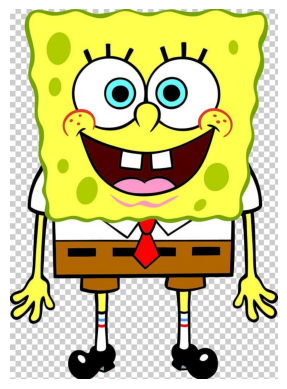

In [ ]:
img_data = base64.b64decode(string)
img = Image.open(io.BytesIO(img_data))
plt.imshow(img)
plt.axis("off")

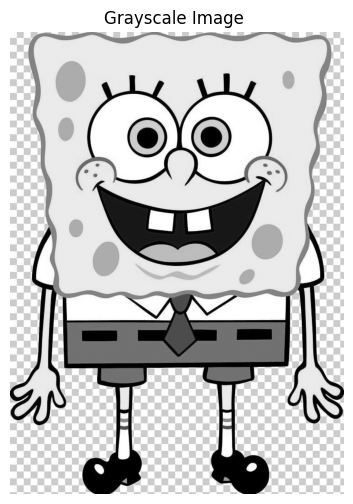

In [ ]:
#2nd part
img_np=np.array(img)
weight=np.array([0.3, 0.59,0.11])
grayscale_img = img_np.dot(weight)
grayscale_img = grayscale_img.astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(grayscale_img, cmap='gray')
plt.title("Grayscale Image ")
plt.axis("off")
plt.show()

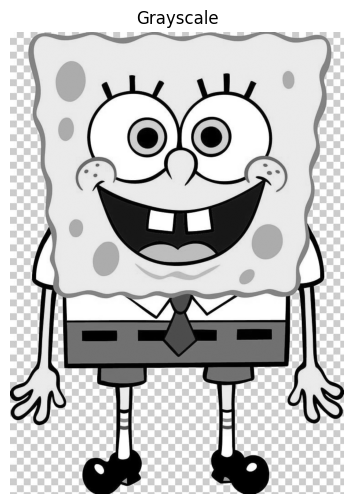

In [ ]:
#3rd part
gray = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")
plt.show()

In [ ]:
#4 part
print("RGB Image Shape:", img_np.shape)
print("Grayscale Image Shape:", gray.shape)

RGB Image Shape: (1007, 728, 3)
Grayscale Image Shape: (1007, 728)


In [ ]:
#Part 5
H, W = gray.shape


print("RGB Image ")
print(f"Top-Left (0, 0): {img_np[0, 0]}")
print(f"Center ({H//2}, {W//2}): {img_np[H//2, W//2]}")
print(f"Bottom-Right (-1, -1): {img_np[-1, -1]}")

print("\n")


print("Grayscale Image")
print(f"Top-Left (0, 0): {gray[0, 0]}")
print(f"Center ({H//2}, {W//2}): {gray[H//2, W//2]}")
print(f"Bottom-Right (-1, -1): {gray[-1, -1]}")


#Yes I noticed the difference in the number of channels created for RGB i.e. is 3 and for the grey i.e. 1.

RGB Image 
Top-Left (0, 0): [255 255 255]
Center (503, 364): [8 0 4]
Bottom-Right (-1, -1): [207 207 207]


Grayscale Image
Top-Left (0, 0): 255
Center (503, 364): 3
Bottom-Right (-1, -1): 207


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [ ]:
#Part B1

gray_float = gray.astype(np.float32)

f = np.fft.fft2(gray_float)


f_shift = np.fft.fftshift(f)

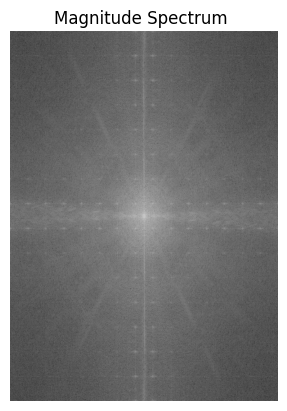

In [ ]:
#Part B2
# Magnitude Spectrum
magnitude = 20 * np.log(np.abs(f_shift) + 1)

# Phase Spectrum
phase = np.angle(f_shift)
plt.imshow(magnitude, cmap='gray')

plt.title("Magnitude Spectrum ")
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

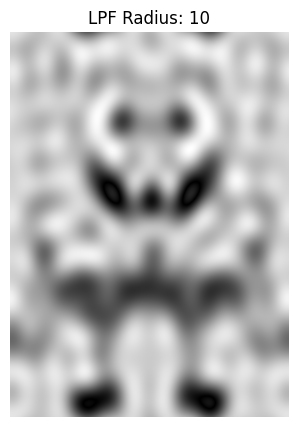

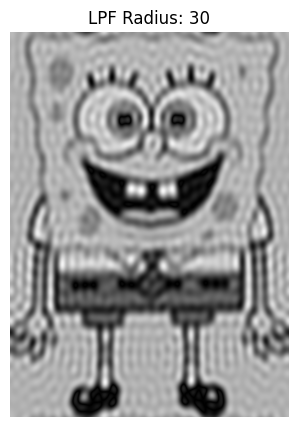

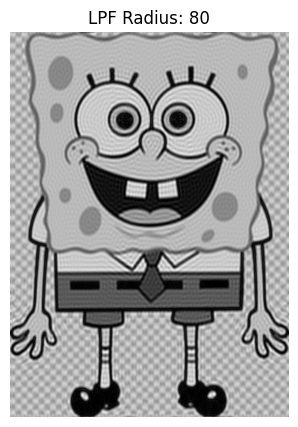

In [ ]:
#Part C1
rows, cols = gray.shape
crow, ccol = rows//2, cols//2
radii = [10, 30, 80]
for radius in radii:
    mask_lpf = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask_lpf, (ccol, crow), radius, 1, -1)
    f_lpf = f_shift * mask_lpf
    ishift_f = np.fft.ifftshift(f_lpf)
    img_back = np.fft.ifft2(ishift_f)
    img_back = np.abs(img_back)
    plt.figure(figsize=(5, 5))
    plt.imshow(img_back,cmap='gray')
    plt.title(f"LPF Radius: {radius}")
    plt.axis('off')
plt.show()

#smaller radius blocks more of the details of the image and hence decreasing the radius increases the blur

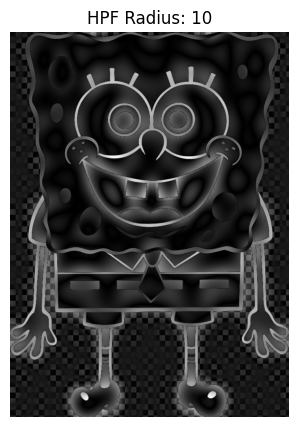

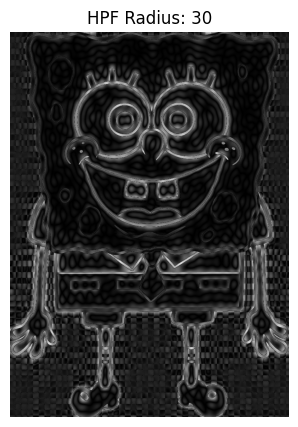

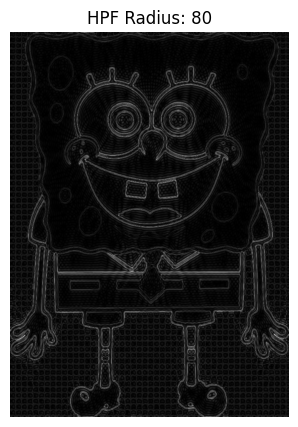

In [ ]:
#Part C2
for radius in radii:
 mask_lpf = np.zeros((rows, cols), np.uint8)
 cv2.circle(mask_lpf, (ccol, crow), radius, 1, -1)
 mask_hpf=1-mask_lpf
 f_hpf= f_shift * mask_hpf
 ishift_hpf = np.fft.ifftshift(f_hpf)
 img_back_hpf = np.fft.ifft2(ishift_hpf)
 img_back_hpf = np.abs(img_back_hpf)
 plt.figure(figsize=(5, 5))
 plt.imshow(img_back_hpf, cmap='gray')
 plt.title(f"HPF Radius: {radius}")
 plt.axis('off')
 plt.show()

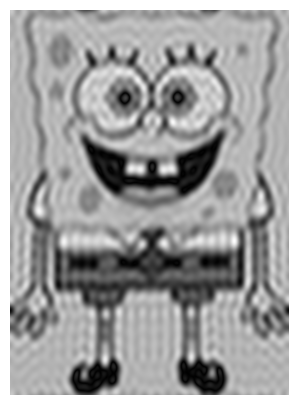

In [ ]:
#Part C3
l = 50
h = l // 2
mask_lpf_square = np.zeros((rows, cols), np.uint8)
r1 = crow - h
r2 = crow + h
c1 = ccol - h
c2 = ccol + h
mask_lpf_square[r1:r2, c1:c2] = 1
f1 = f_shift * mask_lpf_square
ishift_f1 = np.fft.ifftshift(f1)

img_back_f1 = np.fft.ifft2(ishift_f1)
img_back_f1 = np.abs(img_back_f1)
plt.figure(figsize=(5, 5))
plt.imshow(img_back_f1, cmap='gray')
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

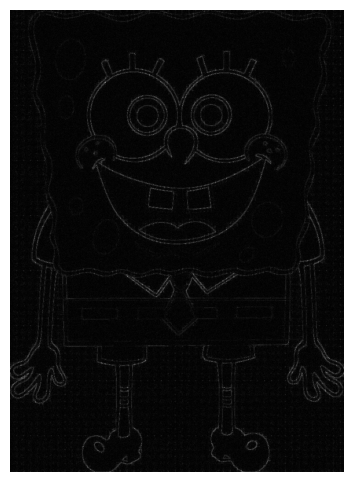

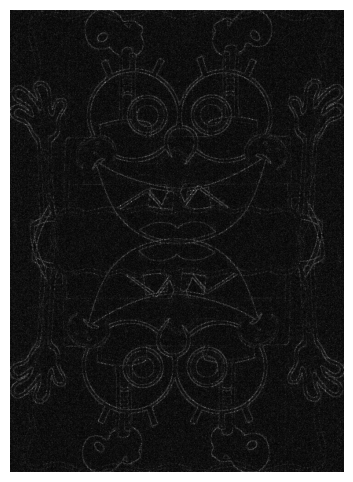

In [ ]:
#PartD1
phase_only = f_shift / np.abs(f_shift)
f_ishift_phase = np.fft.ifftshift(phase_only)
img_back_phase = np.fft.ifft2(f_ishift_phase)
img_back_phase = np.abs(img_back_phase)
plt.figure(figsize=(6, 6))
plt.imshow(img_back_phase, cmap='gray' )
plt.axis('off')

angle_only = np.angle(f_shift)
f_ishift_angle = np.fft.ifftshift(angle_only)
img_back_angle = np.fft.ifft2(f_ishift_angle)
img_back_angle = np.abs(img_back_angle)
plt.figure(figsize=(6, 6))
plt.imshow(img_back_angle, cmap='gray')
plt.axis('off')
plt.show()

#this line is different from the one in the lecture as this let our image be of the desired output
#but while using np.angle(f_shift) it has lost its direction and we got 2 spongebobs in the same image

(np.float64(-0.5), np.float64(727.5), np.float64(1006.5), np.float64(-0.5))

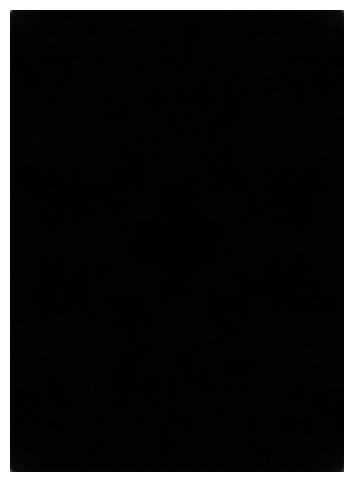

In [ ]:
#PartD2
mag_only = np.abs(f_shift)
f_ishift_mag = np.fft.ifftshift(mag_only)
img_back_mag = np.fft.ifft2(f_ishift_mag)
img_back_mag = np.abs(img_back_mag)
plt.figure(figsize=(6, 6))
plt.imshow(img_back_mag, cmap='gray' )
plt.axis('off')

#not sure about the logarithm role but according to me it seems the magnitude here is intensity and has to be measured in decibel thats why
#magnitude spectrum shows the strength of the freuqency while image genration by magnitude seems to give texture to the image but without phase we cannot detect edges and curves

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

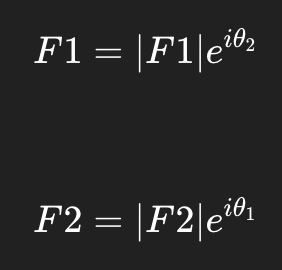

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(1359.5), np.float64(1835.5), np.float64(-0.5))

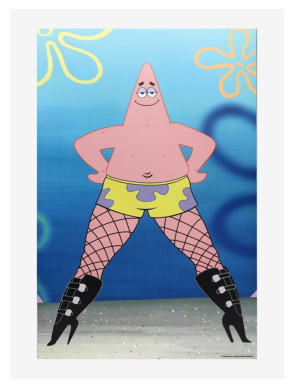

In [ ]:
#with open("second.jpg", "rb") as img2file:
    #print(base64.b64encode(img2file.read()).decode())
string2="""/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAcsBVADASIAAhEBAxEB/8QAHAABAAIDAQEBAAAAAAAAAAAAAAECAwQFBgcI/8QATRAAAQMDAwMCBQICBwYEBAILAQACEQMEIQUxQQYSUWFxBxMigZEUsTKhFSNCUlOywRYzNmJy0SQ1Q+E0VGNzF4KS8PElN0SDJidGk//EABsBAQEAAwEBAQAAAAAAAAAAAAABAgQFAwYH/8QAMREBAQACAQQCAQQCAgICAgMBAAECEQMEEiExBUFREyIyYTNxFCNCgRVSBpE0YqGx/9oADAMBAAIRAxEAPwD7qiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIIfPackeyqScAEqz8NKpGcrm9Zcu6auoyw1tD6opt7nOPtK0al3Ve49riAPVZL4kgN2G8rTjMrc6HhmWPflWl1PNZe2Mnzqv8Aiv8AyoNWpH+8f+VSVGV0pjPppd9/LJ86qdqr8eqyU7qqxwJeSCYMla4xMITIhY8nFjlLGWPJljZ5dkOJaHSSCncTJJK17Qk0oOyzgRJXznL3Y8lkviOzx3uxlYbsvFMOa9wPoVo/OrET81/5W3euIpgRGVoQdpwuv0G7x7vlzurt7tbXNasP/Vf+VHz6x/8AVd+VT0KjAyujqfhq92WvbJ8+r/iv/KfPq/4r/wArEVIkiR/NTWMvo3lr2t8+tP8AvH/lT86t/jP/ACqkiOJVYJCluO/SS5fVrIK1b/Ff+Sp+fV/xX/lYwEieVdS+jef5ZP1Fbb5j/wAoK9b/ABX/AJWItjIKs0YiVe2a3o7r+VxWrf4r/wAqfnVh/wCq78qkBRAU1j9RZll+WX59X/Fd+UFaqT/vXflY8DcIN9lNT8L338svzqv+K78oa9Uf+o78rFMCVaU1Pwnffyn9RVn/AHj/AMp86r/iv/KxkQZQ+yan4O6/lk+fVj/ev/KCvV/xX/lY/skK9s/CTK/llFer/iO/KCvVP/qP/KxQpGNk1PwvdfyyivV/xXflPn1eKjvysSD0TU/B3X8svz6vNR35Q16v+K78rFKAmeAmp+Duv5ZRXqzmq78p8+pxUd+ViMzxCbcJr+juvvbL8+r/AIjh90+fVBn5rvysMk4JwstKg6qRgwvPkyw45vJce/K6xqzaleo4BtRx85XQpBzGiXkk7yZVKVJlJoDRnkrLiP8AVcTqur77rH06XT8Fx82p7icSUk+SqwAYlSVp9992trX0tPqVhuK5ptwcrI4hoLiYELl16nzKhMyBgLb6Xjy5M558Nfn5Jhjr7ZPn1IzUcCfVR86p/iO/KwAzvukjhd+YSXTld9t3tn/UVP8AEd+U+fU/xHflYZTPkK9s36O+/lmNep/iO/KfPqR/G78rDJjhQSYTtn4O+/ln+fV/xHflPn1P8R35WCfRJhO2fhO/L8tj59T/ABHflBXf/fd+VgklASE7Z+Dvy/LP8+p/fd+U+dU/xHLBJQe6ds/B35fln+fUj+NyGvU4e78rBJBmUlNT8L338s/z6kfxu/KCvU5e78rACZ2UySmp+Dvv5Zvn1P8AEd+U+fU/xHflYCQUmREJ2z8L3X8s/wA6p/iO/Kj59Q/+o4fdYcpMBO2fg7r+WcV6n+I78p89/wDfd+Vg+yJ2z8Hdfyz/AD6n9935T575/jd+VglTOU7Z+Duv5Zvn1P77vyp+fUj+N35WCUnCds/B3X8s/wA952e78oK7/wC+78rBKTJTtn4O+/lsfOqf4jvyo+e+P43flYJKElO2fg77+Wf59T++78qRWeN3u/K1wSknyp2z8Hffy2Pnvn+N35T59Tbvd+VgmOZTuTtn4Xvv5Z/nVP77vyo+e8bvd+VhBJ9lM+Qmp+E77+Wb59Qf23flPnP/AL7vysMlO7Can4Xuv5ZvnP8A77vynznn+278rCDKE5TU/B3X8s3zn/33flR86p/fd+Vi9klNT8Hdfyy/Oqf4jvynzqn9935WKUBTU/Cd9/LN89/9935T51T++78rCSSklTtn4Xuv5Zvnv/vu/KfOfP8AG78rCkpqfg7r+WY1n/33flPnP/vu/KwpOU1Pwd1/LMKz/wC+78p85/8Afd+VimdlCan4O6/lm+c/++78qPnVJ/jd+VikpzKan4O6/lk+c8D+N35T51T/ABHflY5RNT8Hdfyy/Oq/33flQa1X++78rH91BJTU/C91/LL8+p/fd+U+dUI/3jvysc+UlNT8HdfyyfNqf4jvynzan+I78rHKZTU/Cd1/LIKtSf8AeO/Kk1av+I78rFPlJTU/B3X8snzqn+I78p86p/iO/Kx77Imp+Duv5ZfnVP77vyo+dU/xHflY5PhJKnbPwd1/K/zqv+I78qPnVZ/3jvyqykpqHdfyn51X/Ef+VPzqo/8AUf8AlYyT4QGN07YTK/lk+bV/xHflPm1SYFR8+6oZOyyQA2V4c3JjxY7se3DhlzZdsp8yoMuqP9gVDq1Y71HAehyqEkmZkqMDMSVy8s+Xnz/b6deYcfTY7yu6v86r/ZqPPuU+dV/xHz7qk+Cm5yV7zouSzzk8L8hxy6k2yfMrb/Md+VU1qoP+8f8AlVkjAKEjnZeWfScuPq7euHW8OV1lNLitWGfmO/Kt+oeTJqOB8SsRBiQcKpkrUueeN1tuzHHLz9Nj5tVxxUcD7qhrVRg1H+8qoMAA5R0gSDhb/R88yvbk5vXcFk7sU/Oqxiq/8qPnVv8AFf8AlU9kxyV0tTWnJ7r+V/nVSP8Aev8Ayo+dWOPmv/KxzGyjMg8cq6hc7+Svc1m2tdwqvBFMkGdjG6t0fXrXHTtGpXqvqvLnS95JJEmMlYLps2lyAf8A0nH+Sv0SCOl7ef7zv3Kw5JJi2emtt816FEReLdEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQYbp3ZQJ2gj91aQWNcDLYWK+/+Ed7j91p0Ll1Jwa8AtPA4Xh1PT5cnH3YvL9aYcmq2bxhNKRxlc+TIAhdYFr2kyC0jbwtWpZGZYduCsOj6icX7c/Dz6jh773YtM+yiIGyyfIqzHaVYW1UnaPddL9fj99zR/Sz36YsDfCuyk6q4AAxO62qVm0GXkk+Fssa1mGgBaXN1+M3Mbtt8fS5XVy8DGCmwNGCqvrspghxyrkholxA9SubXe19UkCVocHFebPd9VtcnJOPDULiuarwQfpCxSPKekQAqrv8PFjxztjk5clzu6mREIDOFUclBJIjlZ26m/wSedLtY55hokrap2BMF5A9FsUKTadMEtEnlZsmCVxeo67K3WNb/B0sk3kwttaLRBaCfKuKFKILAfZX53wnODhaV6jlv/k3P0sJPTH+mpH+wodbUiIiCsuxiFM+QpOo5Zf5H6OF+mi6wMS1ywvtqrBtIXTkbJx591tYddyY+7t459JhldxxyHA5BCjGwK67qTaggtA9VrPsmkyHEFbvH8jhZ+7w1eTo8p/Fo42hSMrO+zqtyIKw9lQYLStzDm485uZPDLizx9xHokwITBON/CggRglessvp5UcYGVEqCMwSkLKREzIQHEqCJEJsITwelpUyFTfOVb7FQ2kmVEwUmRsAoJg7hS3SpnKEgZhQcmBn2WRlF7yA1pj1Uyzxxm7VmNy8SKEjyrsY6phoW1TsQCHOMnwtpjGsENAXP5+vwk1jfLa4+lyt3l6atG0Agvz6LbAAAAbACmDKZ5yuTy8+fJ/Kt7Dhx4/RMKN9sJgbhM/ZeMv09p48ih72saS4jCrVrtpCSQT4XNrVzVcZkDwtvpuly5f9Nfm58eOantevcOqyG4YOFixGCokxjfyomBgLvcPDjxY6jlcnJc7upSZ2UcSkr21t5/6T7ooGVKBPhSCCo4hQMIJkJIKSghBMpKhBsgk5RQkq6EyihJUEzCSFEoSgmUlQkqrtM5UEqEQ2tOElQkpo2mUlRKBNG0yplVRNG1pUSoCSmhMlJUThAgtKiQoQILSkqqKaFpwgKqp2TQsSgPlVwiLtYnwkqqIbWlJUSoJKG1pEKJBUKZKJtM4wplQD6JPosV2mUkKJSU0bWJHhQonG6JpUgoSoQoJBSVHoiCVEohQJHlJSAUKaCUUKUsApKjKlNBKklQUymhMwnEqDBGSmYgJoTKicpKglNC0qOVAKknClhKkwoxuqqRG3PClvja686S3JgbK7iMBuQN0I7WwBnlUMgSDBXI6jk/Vz7MfTsdLxThwvJn7CQcAqpOITjCEGF0uHimGMczm5suTK7pKThREJPovb28NyJkeUn8Ku+VMp/wCjae4jPCth4kcKhEqWEAgcHdaPU9NM5uTy3+l6q4ZSZXwsCpAkEHZREGeOEEyuLjlccv8ATuZYzPH+qrOThRIUvADvsqr6Hiy7sZk+Z5sezO4hIUSkKCQccheuvy8vpiujFlcnxSd+yzdF/wDDFt6lx/mVrXo/8BdGdqTv2Wx0VP8Astak8l37lefJ6bfS/wAnoERF4N4REQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBrX5ItHkeR+65YPgfldS/wD/AIN3uP3XJmFtcM3jpzuq/mzUq76TpbJHhbjb2m4S4QfC50yEkTELx5ejw5Lu+GPH1OWHj26n6micdwVhVZv3iPVcjYp3HYnC1cvjJb4ye862z3HVfcsYJmfZa778RDGmfJWlPgqCSMr0w+N48f5XbHLrMrPDM+vUq4cTHoqTGYVZMICt/Dix45rGNXLPLK7tTMbocqCQRlRPhZyarG+fSdyVegw1KoaOFiyQRytux7RVAJgrX6m3HC2PXhndnJXRjAzsgwiAwvmLbba7ckmMiYnB4WtVvGsJa0SRysly4soEg5PK5JeSc5JW90XS48t3l6anU81w8RuNv6gMuEhZW39IwIInyubMndSD5XSz6Dis1GnOrzlddtek7Z4BWQQRIIIXEkAzsrsrPYQWuPstbP4yybwrYx63zquyfZVkcLTp34gCqJ9QtplVjwC14jxyufycHLx3Vjbw5sc54q05ypIBEEAhIPCbiNivLdl/DPtmXthdaUnGQCCVhfYQJa6VuQmYwV7YdXyYX34eeXT4ZT05T7aqw/wkhU+TU/uFdjPmUMeAtrH5HOe/LXvRY3043yngz2FBSef7B/C7MeyR7fhZz5O69Mf+DPy5ApPI/gP4VhQqH+yfwuttvH4UT4WN+Ty/CzoZ+XNFlUIEiAszbBoguMnwtyDyUgT6rxz67lyv4euPS4Y/2wstqLTIbJ8rKBAxAHhIU8rVz5c8rrKveYSTxEfug3QRwVMTuIXn96ZbMzCZ9lBeBu4CFr1L2mxxAHcfRemHFlndSPPLkxwm62DBEk4WtXuwyWsEladS5qPcZJE8BYpIMzldTg+OvvNpcvVyzWCznEmSSSo5yolJXWwwxwmsY0blcrurTwoQQmFnJ4S3yJ90lMJpBSqyplNCQoRJTQJMICkhNBukwoRBKIo5QSpnCicpKBMIoT3TQmUOEIUIEpKIECVMqIUz6IEqZVZUoJwkqElBMpugSEXaIMqdlGAkhDaZQKFJQ2Ik4ThDZKTKhPuhtMoSoRDaZQFJSUNkqZUbqCURMqZUYTCC0pKrKJpdpkKZVUBU0bWQFRKShtMpKgEJKG0ykqJSUNplElQUNplFEpKG0qJ8JKSZU0bTJSVE+yJo2SrSqpKmjaeVE+EnKFNGxFGUTRtKZPKhOVbVnnwkT5VmthpdyDhV3CvH9U303Wl12dw494tzoeOZ8mqTJE78qHYwgOSj9x7Ll9J+7km3V639vDqKyhmEnCLvya8Pnv7QQoIKmU5REGQkmE5JlRzugmZUTMgboDCNMknCalmmUutVeSWA+MICZUMP8QO0qfZfOdThMOS6fS9Jn38U2PkgFRiQpeYaFQumMLr9HbcI4nXSTkugxwqqcQonOFua3Wp+GrqBLdMvCOKTv2W30SSelLMnkH9ytPU3f/um8P8A9Jw/ktzon/hOy9j+5Xjy+m30s/dXoERF4N4REQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBragYs3+4/dcckrsah/8G/3H7rj7rb4P4ub1V1yHGU3xwoM+UJMbr201fvcJHKEpIlRzhWaWb+0yUnknCiQRJVmMc8yGkgrDLLHGfuWY2+kT64QETusota0yWmFJtK0SGry/5PFvW2c4stemGYKSfZHNeww5uZ3UE53leuOUym5dsbLjfMMgys9q8C4BOy1ySrNf2ODgsObHu47jGXHl25d1d2UWKhV+dSDhuss5x4Xy2eNxyuLt43clYLwRQJBK5IP3XcezvYWkgyFxrikaNUg7cLq/GZyfttaHW4W6yik8qc7qkkHGySu1NWbc+Sz2vPqgMHcKoIlTyprzsTPkBA7tMgkFROVE5UyxmXtZbPTZp3dVhySQtluojHc1c7u9FIJK1M+h4s/Nj3x6nPH7ddl1SeMug+FkD2O2cD91wyT5KnvI2JBWpn8ZLf2vfHrb9u7A3EH7plcVteq3Hcsova0bha+XxnJPT1nW4fbqgGdlMlck39faYU/rq0fxNWH/AMdys51nG6ud/wDRD5/0XKF/XncR7IL6tO7fwk+O5T/mcbqD3SAMnC5f6yvuXCFR1zWecugLKfGctv7qwvW4T06xexokuAWJ1zSaCZBXKc9x3cSqz6SFs4/Fz3lXll1tvqOg7UATDWhYX3lVwiYWr7BT7lbWHQcWPmzbwy6nO+vCxe45LifSVAJGRhVKThbWPHjh/GPDLLK3dq0xyoJPooElTJWaEqcqFMqocIolJPhKq2VHEqCfVJOygkElE2SUE5UJlQgmUkqJSUEplVkoCUF8qFEpKCZykqElBMqElRKC0lRJQIgJJUTlJygtJTKjlAUEzOEChJKCSigFTKBlTOFEpKAU5SU3KolJ9VCGJQElMJKBKSoJSUEpKSolBMnwkykqEEyijCmUQRJTCCchJUIoqxUKEO8IJUyqhJQWKhRMqUEykqElBMpKiQkjyipQkKCVEpoWlPsqykqaFpRRKSglJhVlTPlBMykqu4lJwgsSRwkqspKC0qFEpOEPtMq7TLCPCxSr0nD5hB2IWn1mHdxVudHn28sWGw9UecgfZTMGPCq6eyeQVx+kuuWOx1k7uGqzhTOFUnCThfRfi/l83/VSCkqCQEBCaDMKJOyShIhXQjbdAYGAkoTkeil9+PR4XpkdxkbqdzHKrTkNJPJwrDJK+f6yy8t0+k6GWcXlDzxuqSJUuOVVdfpMe3jlcTq8+7luvSZ9FWcwMISSUxtytmTVav20tWJGjXh4+Wf2XR6L/wCFLL2P7lcvWv8AyO7/AOgrpdE46Tsp8H9yvHlbvS+bXoURFrt4REQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBq6hiyd7j91xpK7GpGLJ59R+640lbnB/Fzer/yJAJzwhGFEyMFB7r1aod043UTKTJhKutslNhfUaIkTwuy1jabQA0YC1bCmGUi4iTK2pmSvn+v6m5Z9sdTpOGTHuq3d6oTPp6KJwokHIIK52/tu6itSkyo2HNGeQuZXtnUHEgS3yusYOIVX0xVpua7aMLa6fq8+LKT6eHNwY8mO9eXE3E8IBxwr1qTqFQh224WKeeF9Fx8kyk19uPnhcbqt2xrFlTsP8J2ldQ4iRvsvPAmZBIIXTs7xr2BlQw4bErl9d0t334t/pOf/AMcm6DE75WKvbsrshwg8ELLuJ3CbQPK5OGWWF3vy37JlNX04dWm6k8tcCCNiqzyAu2+kyq0tcBPlc6tYvpyW/UPRd3puvxzkxy9uXzdJlL3Y+mp6lTKggjBwfCbELpS7m2prXhZI5CgzEhRJVReU+6rJSU/0XSZKnJVZSSpu+ieFoTCqJBypkzBSf2idwmyjY7oCn+jS38lB2UEjlJ9U8iwU8qpKApq08JgA7lIBMpIiUVi7ukwoOUUyp5EDdSonKSiU2SUlRKC0+iBQDCKqnCSPKYUeqAUnKTCZTQIgIBUblETnhPdJOyboqcKAhSeEQKeqSokwgnEIonCSipRQSkoJRQiIlJUSkoJODhJzKgGUQTKSJUShOUFuUlVJyp4QCplVJUyglQTlROUnKCwKcqsqZRUqDvhJJUEwmhMoFEoCmkSiglJTQnCFJSUAKTCiUlAkKVCSmjZKbpKSmjaRhTKiUlNG0yk5VZUyhKlConCiUVKmVCmU0JUJP3SU0BUbeqj7pMJoWUEqJhJwobTMJKqpQTKiQoUz6K6AEEwpmFEp7qC0qJCjCIJQ+EGE5lTQgpxKHZRBRE/dWYQHN8zCpEbqds+F58uPdjY9eLLtylZ3DJJVSQQQdlLjMHyFAnK+bl7OT/2+mv7+H/0xnmPKjKEkEgKM7r6XC7xlfL5zWWkyBsoJCbcIQd4WTHaQQVE5UAZUzGFSUn2UEzgbn+SEg8q9MAvlePNn2YWvTiw/UymLJEBo8BVntBICkyXFY3HMSuBxS8nL5fScuU4uHx+EE5lRKiVEr6LDGY46fMW272kkRhVkwSkgjCifKrHbQ1wkaJdH/kK6vRBJ6Tsp8H9yuRrpH9B3Wf7MLr9EiOlLMeh/crx5W90n29CiItdvCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiINTUjFi/wBx+64srtal/wDAu9x+64mD6Lc4P4ub1f8ANKJykr1aoSjSQdlBHqkwN1Mv41ZfTs2w7bdpAmVlIOBtG61rCoX0Y7tlsxAJ3JXyvU43Hlu3c4Mt4SxpX1yabe1hyVp07irScHAkjkSs+oMaKjSD7rTwTIMDwut0fDx58XmeXO6nmyx5Xbo1RXZ3DHlXgg4MrkWtc0akE/STELsAggEHcLmdX094ctz03+n5ZyY6+2C6oCtSOPrGR6rjkOaSHCDyF3xE+SMrm6hQ7XfMAwd44W10HU9uUxvp49Xw7ndPbRkcKQc5x4I8qCPRRmDK7tm45Utjetr19Ihrz3NOxXUY5r2hzYII3XnogYKzUbipSMMcYHBXN6roJn+7D23eDquzxl6dsCQcygEDG3haFLUgRFVv4W3SuKVUfS4A+CuRn0/Lx306GPNhnPala0pVckQfRaNaxqUstyF1YPI+4TJwf5r04er5eLwx5ODHknpwHAtGQQfBUZ3BXbqUKdcQ4AHytGrpjgf6t0rqcXyGGf8ALw0OTo88fXloyVPGTlXfbVqe7D9srGWwPqkHwt/Dlxyn7a1suPKe4sCp5mVUGcBRvmdlnPM8e2H9Lz6oThV4mJCbnCvj7IsBOCkEbFVOTvhMjlNG9LEknIQRKgGUnO6bNrT6KedlTPlTJPMoLCUmFWCpygmUUAqR6oCIVCCZAQkeFX3SUFpQFRlJRUp6ykpKIbokkKslBaRKSqhTKCZUZ8qJU5QTKSqykppVpSeFWUBwiLJOFAMKJQWSVXhSCgkqFEpKC0wUO6jcpmUCUnChJjCG0z6IolTKoIiEoCKJSUNrYTCifVRKCVKqkoLSo91E+qSkNpRRKSmhMqZVZ8pKaEz6KZVZKSU0LIq5KnZNCU+6hEEpKg4RBYIolMoEypwoCKCVMqqSgtKSqykoRIUyolJTak4ScJ+EMgcH7pdflJ5RKnO8hAJ/slSGOJwPyvLLmwx916Y8eWV8RU75P8lMwr/KJ3ICg0gDBfP2Xler4Zfb2nR819RWUz4VhTb/AHlPyTw4FJ1fDfsvRc089rHJlJhXNN4EkCPdVgjBBXrjy4Z/xryy4c8fcIBykwowMyp3Xo8yVEqYCg7p/o3L4TKSqyplNfdP6TKE7DiFAyUncfhY2b3CXUZm/wC7GdkmCFSiZlvPCufB3C+c6vG48r6bpMpnwxjeIcSqgE7q7xIkLHkldnpM+/jn9OF1ePby1KgmVMqDhbbVJSdlCRkeUCAZWZgLWyqMAdJB23V3E4A2XI67qJrtjr/HdPblM6kbElYDvIKyVCY7YgLEnx/Dr99Pkuo89kQcpgBQSUyQut/TkedpnlRuDIUEn7KC7IIOBup53o/tz9ezod1IjAXa6Lx0taex/crh6+4f0HcgmJAhdzov/ha09j+5XjzeG90kjvoiLXbwiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDU1P/4F/uP3XEXb1P8A+Ad7j91w1ucH8HN6v/IlJUYRe1jUSmQZUYhCYEprwvqt3TngVy2d10888Li2JAumrtE5Mcr5z5HGTk26/R5bw052pD62nhaEkBdW/YDQJPC5Urf+OzmXFrXlp9ZNZ7pIkeSurY1g+mWE5auR5MZWW3qmlVaZjz6rY6zp5y4ePp59Py3jzl+negxMKr2NqNLXCUa4PYHAyD4UmREhfNW3DLU+na1MvLi3dB1CqBwVgM58Fdm8oGvSMbjZcYgglpGQvoug6j9bDtt8xx+r4/08tz0AFSN4QSUBnELfs01rdpkEQkBp3IPoUjgKApcZZqw3q7jYp3takRDiR4K3aeo0nwKjS0+Vy44lQ6DgmVp8vQcfJ51ps8fVZ4e7t3xUa8fS4GfBU7eR6rz7S5sFriCPVbdPUKrBDh3Bc3l+M5J/Bt4dbjf5OoZjgBVdRY8/VTB9Vr0tRpPMPBYVtNqMqfwvBPutK4c3H73G1M+PkjUq6dSqElriD4Ws/T6rCS2C3xyusQff2VeZGPRe3H13Nh4eWfTceU8RwnMdTJlpH2VZk8LvOAcILQR7LBVsqVUYHYVv8PycvjONbk6G63jXJ3MQmVsVrCrTy0dw9FrOBYYcHA+q6PHz8fJ/GtLPhzw/lEzByFEpM4GSk8Tle083Tz+tn3lSDjIUSOFIwl96EzhJUBEssFpSRO6jCYTSpkJKjCSmhMpKjBUwmglFGApTQSkqJKiTymhZCowiaAFTOFVTKaE7qEyoTQtBUTCSkqhKiVKhBMpKhE0LT5UJKfZBM+En0UYCeyBlTJUSkobTKFQplAHqiSoBTSJQpKiUVKSoRESoMImE0EpKgQkppUkqJCIqhOVMhRsoOUVJKlV4UjZETKSo4lBlBaUlVUygmUlVyiC0pKqCZVpQTKKJSUNrSkqsqZQ2mUUSgysRIRBuozJH81VnlKmJON1LQXbLIAGmAJ8lanUdXjxTW/La6bpc+a/iKCmSZcRHhX+lpgNH4QjxugMCFxebrOTkvvTt8PRcfHPM3TPlQZIyVONuUwNzC15lnl49tqzDH+kAHhOc5KFzRuSq97ZwCVlODky+qwvPxTxuLEpPoo72jcFO9ngj3V/4/LP/ABT/AJHFfG1pzsndnIlQC07EBWjmAVNcuPmSxZeLOa8VHYx0kAg+qoabgImVcgg+vhJI2wVscXW8nH78tfl6Hj5PMmmE+DhRtgLL9JbDgSD43VDTLBIyD+V0+DrsOS6vhyuo6HPju56VRBnb+aiBxI91u+L5l20bLLoGFOd1EZwU3G6s9p9pae1wIOSs5AEla5gCeRlZwZaDO4XG+S49fujtfF8l/iOy2FhE5WaVg2cQdoWXxufjtY/J8esu6E4Q5RVJXW04+0pMAnkKMxunieVMrqbZYzdkZ2ACnPJ3U7yfCmB2AKjyQ0kcr5rk3ny6/t9Nxa4+Du/pR7ySVUk+Qqzk8ykg8L6Diw7MJI+a5uTvyuRJ91BMKJ9SkzwvbX28932Azkqol89olS1pe+Bt58LOAAO1oxyVpdT1ePDjqea3ul6PLqPPqORr9If0FcFxkwNl2+jBHS1oJmO79yuJ1E6NHrNbOSJK7vR2OmbYRt3fuVr8Weec3k6F4+Pj/bg7qIi9UEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQaeqf/AAL/AHH7rhgwu5qn/wAA/E5H7rhGVu9P/BzOrv8A2LTKEhVgoSBwvdqbTOFBJhJBOAUJ3EcKaN7ZrV8XDMLt445Xn6ToqMPgrvsILQY3C4PymOspXU6G+NMdy3vt3tPhcMeJXoHDuaR6Lg1QG1HADYwr8Xl5uKddj/5K4neFJIOCFU7xGySu5fWnNn5dLTrgT8tx9l0swQTnhedpu7KjXzsV6Brw+m145C+f+S4Jx5d0jrdFy3LHtqdzvAiFxbyl8quZ2dkLtnIGNlq3lAV6RIH1Ba/Rc/6XJLfVevU8Uzwv5cYyNlIIUZBII2VZjMFfUSyzc+3EssuqvMFW5VASRKsCCrpNpKqSIlSogymjYP5oSRynKggHlXUJ4TJicE+qs17mkFpIP8lQDKk+6wywmXjKbWZZTzjW1Tvq1IgEyPC3KWo03mHjtPlciRhSQCCSVpcvQcefnWmxx9XyY+L5d9r2PEteCp2Pr6rz7KrmfwOIW3R1J7BD4eP5rm83xvJj5w8xvcfWYZeL4rqjBmTP8lSrRpVRDm/dUpXdGsB2u7T4KzZiZkei0dZ8V87jZ/byTV8tGrprSJpugeFo1berQ/iaSPK7mxzkKMEdpAI9Vt8PyGeF/d5eHL0eGU8OAMKcyt+5sASXUZkbhaBBaSCCCNwV2un6rDlni+XM5ODLj/kAkJMqCSdwnOy2vOvLy82LSOUkKsjwpn0QSkhQN8qUDZJQpKCUlRKShskpuoScoEwplVJKknKCZwokpMFJxMIEnlJSZyokFBMoSkqE0JSVA91PMKggKcoglM+UlRKCfdCZ2UEpJ8KaEz6KJKTlE0mzKmfVROUlU2tPqokKpJTcIbWnwplVRDaZwk4lRMJKG0oYCjlQJQ2nEooQH1RdpTKEngqON8obTlJUEpiERM4hAZQqFdG0zwkwonyiaNplFEqZTRslTOVBQJo2mcqZVRClQJUqEQSklQUCJtafKTwolRjJRVt1emwuOTACpggAStgAMYBytLreb9LDxfNbnSdPeXkn4RIJgfSB/NJIGEgEiVIIHGF87nnc7+bX02OOOE1J4gQIgFULwBjJUOcYgbKmAJ5XT6b4/u1lm5fVfI/p/twW7yTIEKCZMyqgxukrq4cHHx+sXIz6nky91M5ykwo9VE5XrqfTy3b5tWkneU33JVTlB901s7rEyfAhWDiNiqjCjlY5YY2asXHlyxu5WUV3AQQCP5rI1zHYGD6rXlPutLl6DDObnhu8XyHJhdXy2ILTjBUd3bMc7rG2q5g+oSP5rK0se2WmPQrkc/S8nFdz07HD1fHzTVVLGvyRBWJ4LYkLMQZjKqDGCJHMr14Ouz4tS+nnz/H48m7j7YoBIykxupczBcz+HkcqpyJIK7WHPhnjLK4nJ0+fHlrKIJBBPothpHymkeFhDC47EBZRgAFc/wCQzxyx7ZXR+N4sscu6zwkZHqsL/wCIgeVmBwYWF09591rfG29+nv8AK/45YiTGygzhNhhBtMrvvn6TAQEEgeqESjADUAPC8ebLt47Xrw43LOSNkwGgLDVkCAVldnbZYahIcBHC4XSSZ826+g6zL9PptRjnGVE75QyRgKMbgL6KTw+a+9/RPCAF5gKIJIAWcAMaABnkrV6nqceGePba6Tpcuoy1PETAY3tH3PlUe/tgDc7DwEe4sHcN/wCyFhncg/Ucu9Fy+n4Muo5O/L07HUc+HS8c48Pbna4S7SK7SNyIK9B0f/w1behcP5lcDWSTplQE4kLv9ICOnLcTy79yupyYzGak8Od0ueWduVd1EReLcEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQaWqGLB/uP3XCknld3Vcae/wBx+64Mnwt3p/4OX1n+RaSPVJ9FBOMqNwthqLSfRVmTgJlQTlTXkizSCQT5XoKUfJZGcLzwMEQOV3rd3dbtPpC4vyuN1K6XQVlO8LiXtI0rgmMEzK7ROVhuqLa1Egj6gJlc3oua8Wfn7bnU8ffg4exknJ4SQoggkTkGEgL6vCzKbjh2auvwn0XW02qX0ywxjZcgmAtqyqijcAk/Sd1p9bxfqcV/L36XPsz27WQZlS4fScwDuqggiQJCmRI8FfLXcv8AbuTV8/lxL6kaVceDkLXyeYC6mqMBpNeBJBXKkkei+n6Dk7+KS+3D6vDsz8fawOMlWBnYLGJVgSFvyNcMgqcxuqyZUyhKmTCjfcqJQCSiWrnCjcmdlEnwhMZhCW+kHdTHIKifRJzBTX2eltxmCqx5OfRM8KB7qWflV5O4MHyFsULyrRIBPc31K1fbKQd4C8uTgw5JrKPTDlywu47lC5pVxEgHwVmJAG68+0wZBII8LettQIIZWEjgridT8fcPODo9P1cy8ZunsBGCeVguLVlcbw7yAszXBwDmkFqAwDBwudhlnxZePDdyxxz9+XFr2z7d0ESPPCxTInZd17G1KZa5stP5XMurJ1IF7MtGYXc6P5DHOduftzOo6Wy7x9NUExM4QFRO2MnjwoHsupvc8NC+KsJKnI3Cr9lI22CpPK0oNlGwyFPCIhMlMSmUURRPlRIRUpmVEqZygg7+Ekod8pITSbT/ADUGUJHCFNKnKjHKSkqhjgqRIMqJ8JPlBMiVMqoSfRBKKJHCIiZhJUKcIEmZKSFEqUEpJ8KJRBMqBM5USVIKBPCApgbogHdFHKThBI3SMKJSfRXYlJHiVBIQEQgEgpIBlMJKaEThSCISUlAkQm6iQTupkxhAlJSUlE2FMpKSJQ2lTKrOUQ2sihENrBQmISR4TRtMpPCiZSVBKA8RhROEBEH0RYy0x3VIA2ElZZnJVaIAYXckwrkYhfO/Icly5NT6fRfG8Xbx7qMzthVeQBA3V4xhYHnOV59FxTk5Zt69fzfp8d19kwIUSolJX0smpp8xv3tO+6hJSUiQlOVE+iT6Imon2ScKJPhJlPKpnCiPJQKVBE4UyCoQ+ia/JLr0tneUOTOxHIVZ9EB9FMpMvF9M8crjdyszKoIhwyrERg77rXmVYVHDByFx+p6C7twjs9L8h4kzrKBDpGD5UxyAFQVWOwRBVyJH0kH2XNv6nHdXw6svHyyX2EkY4USeUMbZnwo5XlllbfL1mMk1IkbnhYXmXEg4lZ3TBgSVrkRIIgro/G4/v25XymX7O1EkBAZSPVRscHK70fP+0zhXoQSe7CxiZIhSw4ctTq/8dbfSanJGwZkCViqn6xCv3AgFvAyqOBeMGCuJ02cw5fPh3+q4rycGp5YjtE5UQ4/S0SVcUiZBwfKuAGDG/nldfm63Djx8XdcPg6Dk5ctWaiGgUx5dz6I5wAk8qHkNEkQVhJJyTsubw8WfU592Xp1+bm4+j4+3D2lxJMkxGw8KuIMc7lQSUkQu7hhMMZMXzufJc8u7L7aOrwNMqTnIXoOkM9OW+Iy79yvPauT/AEfUE4kL0PSOenaHu79yvLn96bvR+q7iIi128IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg0tV/+Af7j91wcrvar/wDAPjyP3XAJPOVvdP8AwcrrP8gSpnhV42U7Fe7UTKg5+yQoOyfW1ntMyIXX06p32xaTkFcYGMFdLSiCHN+653yeHdx7jb6PKzPTpqrwXUzBzCkGJlSYII2nC+Zl9V2spuWPOvAa9zdyCqH3Ky3bDSuXCdzKxSvsOlymXHNfh87y/tzqTt6JIjCqT42Uz4XtcZf21jLfcd2xq/Mt85IwtiDn2wuXpdUguYeThdWSPsvk+s4+zmsd3ps+/jn9MdekKtEtOcLz72lji07gr0kkHOxyuJqNPsui4bOWz8XzWZ9ta/W4TLHu/DVgwDO+6kEjdROIjlRJjZfSe65ON8r78qDPlQDiEzumtInIG6nIEyq5JUyipkqPyok+Uk8mU0iZKncKsTwmRgIu0wfKRCZSUoYPupE8lVJ9YQkGIKfRvytk7YTj08KswIBQkpfXlJ4rbtr11AgOJLDiOV2GPa9oc0gtIn2K85uSRutm0uXW7gCSWE5C5PW9DMt5YTy3+l6q43tydqTMk4Q5kESPHCgOa8B4OCFJBPpC+f8A3Y2zLxY60vdN/TlXlqabi9gJad/Ras59F3HsFSmWmYOy4tak6hULHFd747q+6duXtyus6fV7sfSpOM5CiMzsoBHhTOfRdaND7WBwpnCrOcbJIVFiQoweSoSYU0JwoPoozukyqqeEkqNgiImcoolJRRFG6R6oJmUThRMIEhJG6GCggILKJPlJUSgn3UwISUlE2iFIUSUlDaUlJSUVMKMBJQ+qBMcJKhTEIAJTfZJ8IT4QMFQplRyiInymBmUn0QmUEzhQM7pKFWAkqCVMkblA+4QqAQDMKZkoCShOVEoJjCcJOFE4VEqQRMKpPlAVBcGSoUAgZSUEj3UyqzCTnZEXnO6H3VZwpB8oJUnZVlJgILD1TAJjwqypnKjLH22mf7lsfdSqUTNP2MK6+V6rePNlt9Z0ll4ZomAQtYmSVs+fZapME4W/8XrdrnfLb1EyolQTlJXb/DhTzKtIUKJCTCuhKbiZUTykmUonPKT4UEygOFFSCpmVWcoCpoWUT5USd0mU0JCTmFBOJUAyEs+4T8VYYT7qJSYCnmrPCwPkAqzS0ZBLT4WOQUknJWvydPjnPMe/H1GXHZZWy14Iy4SoLmz/ABBa8g8ZSRMYWlfjcbduhj8rljPW2UvLT9Jn1WMkl0kykxhVJW3wdLhw+Wj1HVZc13b4D4VTMpJlCZON1tNZIJBKs14aCHCQTiFSTOyZMgYJ5Xnycffjp6cefZds4Py3OY7AcJB8K4GOCOCFrtfAh47hsrfOAaGtacLhc3R8nddR3+DruOYTdZYmAZ+6xufBxBcsZe5xyYnhVkkY3XtwfGZeLm8eo+Uxm5xjjJlxJIKqckxiUkyoInYrr4ccxnbjNOJnyXPLuyu1UJGxQggqpEkeVlp578tTVQDp9Q+oXoukf+HaGI+p37leb1MzZVM8hek6RM9O0Z/vO/crX5/cdLo/TuIiLXbwiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDS1Uxp7/cfuvP8AO69Bq0f0e+fI/dcDEwFvdN/Byut/yB3TdIyoOFsNMJUb7oiLKiRsuhpRHzXAHhaEDcrd0ogV3SMwtLr/APDWx01/7I68jMlRjEcIcjASYBEb7L5P7d/fhydUaBWa7yFoxJXQ1aPoMZG65skEEjC+o+Ny7uKOD1k7eRIkGFOVWTOymSuj78tfbYsqopXTHEwJhd8HJg75XmJEiOMrv2db59sHcjBXB+V4r3d8dPoOSfxrYJ4K0dTofMpB7cFq3sQsdZnzaLmbEhcngz/T5Jk3ubHvxseexEk5KAyIU1GGlULHSIO6pJn0X2PHlMsZY+eylmVlW4xuklRMZUggrOpvY0md4TIMyo9QokcpIbWmUnGFWZ9FIQ2kHO6mVEZT2KhtMqJRNtyqBiFEiVM42VSR4RJVpEJPlQIIlCUW1MjhSIA3VQpO20prfip59uhY3XYfkuMtOxPC6mQAOIXm5jYkEbFdmwrmrSDSZcN/ZfP/ACPSdt/Uxdbo+o3OytrMLVvbYVqXe3+Ibrb9VGATOxwuXxcl4s5nG/nh3Y3CvPiT7jBSTGy2L6iKNcgEwcrVBO0L63p+ScmMyfP8mF48rjVscKZVZCkkhesnt5/2mUJ9FWZSeIQWnGQo3SUygSeVOSqpKCYhEMRgyVB2V0sqZRRnlJTRUygIBlRKfdNCfVJB4UTwiaEoICTCgeqaEyEGUlJ8JoNlMqJSU0qUJUSk8JryePST5TBCjJJHhYKly2lgGT4XnycmOE8vTi4s+XKY4RsARsFO+602suq+WjtB2lKgurcguaXN8jK1v+ZjvX06X/xHL2/228bApssNGs2qJGDyFlMyPVbWGeOc3HN5uLPius/BPhTOFH7oSF6SPK+9m6Y2TZREqInCYCj7qJQSihFYqScKEyoCIsEwo4QgxPCBON0yDMoY8JwgmUwqhTnlBMoDHChTPlNG0yolJ9EkSgmUn0UAoSgnjdJEKJAwg2Q2sCokSPRAgO+EGeg8h5aedlmJkxstKTIIwQttjhUb3AwRuuD8l09l75PDv/F9RMp2W+Vm++dlhqtLXHws0glRUb3MInK1Oj5px5y78NvreG8vHfHlrEqCUIIMHcKOV9PjlMpMny+WFxtxSmFGVBOFl4vpj5ntaUJxhV4mUG6ap4WnG6ThQcJIhTwefpMiMpvsokQk4U8ezz9pJhNwq5IUzAyQpuL5RJnZTM74TnBn2UhjyZAP3WGXLjh7rPHjyz9QkeUEHcK4pVCNgnyqgEQCvP8A5HFPPc9Z03L/APVRPur/ACnIaTwMgfYqTquK3W1/4nNrfaoTAlROcqex2xaVEEf2SvTHlxy8Y153izx/lj4TMjCgypJxJwqrPc1uvOY/QIhIkYBJWdtINEHdSIBgABc3m+SwwusZt1OH4vPObt1GuQeWk+yiZPhbUx4j1VHsBEtGSsOP5PHLKY5TTLl+Lywx3hd6YZOwQmSFBaWmCYPhDghdSaykrlZS43WU0TEqIjKk7pgnCb+omkETlUJVyZMAElPludiAvPLmww8XLy9MODPPzJtjk/8A6hViTgrOKDpyYUOogAy4TC8Muu4cPd298eg58vWOnN1BpNrUj3Xo+kZ/2doz/ed+5XGu6Tf0dUgyYXZ6R/4eo/8AU79yvK9Rjy/xbvF02fBNZx3ERFHsIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg0dXMae/wBx+68+TnK9Bq//AJc/3H7rz0zmFvdN/Byetv8A2JkTupwowNgUnyCthqBUcZUZUhCGBsVvaWQa7p8LQlb2lCazzgQFpddqcNbHTeeSOvwodwo4U7kfzXyT6DXpqX9D51GQYIyuNOYJ2XZ1B5p27hIyYC4gwcgZyvofibl2efTj9fJctQJkzwpUSI2yp4ldqemhv0mcnOF0dKrjNI4nK5gIIiFlo1HUqzXCAJytTrOL9Tjs09eHPszleiJyQNghOAQMjKq0h7A4HBCtmPYQvkbLLZfcfQyyyX8uZqlGXNqgQOVzTxC9Bc0jXtiwDO68+QWuLTEg7L6H4vn78Oy304/XcXbl3RE7hJ9EyCZ2UE4wuw0JVgYOdkwT6KhJ5UzAVoklMqJKkSdlBMckpABwVEYiUTQmcbqfuq8coYhDafupwq7cYQEchDacIAPKjESE2TSSpAHlWEAKsjhMqLbpbC2LOsaVwCNjgrVn0Vg7tAcBkFeXNxzPCys+PK45Sx6QwSCdiMKRGy17ap823a47gLMZBxC+P5MLhncX0XHl34zJq31IPoFwH1ArkA/aF3y3uaWmMiFwq9M06zmHzhdj4rl89lrm9dx7/coCCdlOPCiTtsgkHddz05k3rSJzspnGFBJIlRJIyqLgpMKoIScIJ9EkKu5lSCfIRfKwI8KJwokyg2hDytKgBQcqJITSrSolEwmkWxCiVHKYjdNC0pKrMImhYEISo2RNCZnKKCVEgpoXlQYOCgVajwymXOjbCxysxltZ4S3Unm1iurgUmhgy92MfyWSzsgGirWEvOQPC17Gibmq6tUMtBXWGDuuRy8l5L/T6npOmx6fD+6EkjIAHBCTjABB3BTHpHhInOxXn/bam/wAuXfUDbPFxSBDZyFnpVRVpB4OTx4W1VYK1MsdsVybcm2un0HjBOJXrwclwyk+q0+v6ac3Fcp7jfIjYqPuoIjHIU4AXXnnzHyvoScJKg5VNplRKiEmEEqJSSkwqbJScKu6nMQhtMyEnCrsUjlNJtaZQmFUFJyhtac4ScqoymQhtYlJUbogmUk+FCZndBaUlVSU0LDKTwo9kTQtKA4VZUpoSslKoWOzsViyp2E7krz5eOcmNxs9vXi5Lx5TKN7tkAjYqMg7rVZVdSxMg7zwtlhFQSDHpyvmep6PLhy3J4fTdN1mPNjJb5Q5jXSDg+VgfSew5yFs8Zz6KJjY/ZXp+u5OLx7h1HQ8fN/Vaskbgj3UEgjcErbIa4Zyq/Kp/3B7hdHD5XC+45ufxOf8A41rHbhMTwPVbBoUzwU+SwHbHgrP/AOT4fby/+L5/TX53BTnAK2uxg2aArCBtC88vlcf/ABj2w+Jyv8q1Qx5yAVZtB5yTC2JIMzhO6eVrZ/K5314bGHxPHPd2wihI+o/hWFKk3iVeeAmQtbPrubL7beHQcOP0kBoH0ho+yiTOT/2TJ4UY2WteTLL3WzOPDH1NBJTu9CkeqRA3WO76Z6kJTbiFEmUkDg/ZPMq+PSS6BMqJDsESolJ8q48meN3KxvFjZ5jHUYGmRsqHJHosxAIPosGJM8Lu9DzXl47jfb53r+DHi5JlGy1wqNkYjhUcCW/S6D4WHvLTIKyCqwn6hB88LR6jpc+LPuk3HR6bq8OTDtyuqoQ6d3E++FlpF4P1DHA8K3cCJa4Qsbqnb7cmVhyc1znb2aenH08xy3+puJewPJ5dwfCwmJyspqgD6TM7gLByJ5W98fOX1l6c75K8Vu8fZIneFZrS8+iq1ofUDSMbrYP0CAIXp13WfpTtx9vH4/ov18u7L0gBrcNBU5IzAKq54Y2SDI8LCaznGWtEeq42OHNz3eMd7Lk4Onmr4bEHeSVBcOSFrd7zhzo9lWATmT6raw+M5MpvK6aefy3FL4m1rtzf0tRocCe3ZdTpP/h+jiPqd+5XCuwG0KjgBsu70kZ6fon/AJnfuVtcfT3h8WvP/lf8jzrTuIiL1QREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBo6uY05/uP3XnpgL0Gr/+XP8AcfuvPj3W9038HJ66f9kJKgk+UJKLZahOUlCQeFGwkzhJ70l9GxBXR0oDue7J4XNxk5XW0oEUy4iAVzfks5OKxt9HLeSN8GQCBiUPMDdOEknEQvl/t3p4cvVXglrJg7lc3gQfRbepvJu43AELUiAvqvjsJjxS/lwerz3yVMmSPBUZOCU2KYldH1dtT6J+ymZxKgblBglTxfFJa7Gl1zUpmmTJaugJjG64FjXNC5aeHYK72RnjhfKfI8P6fLbPVdzo+Xvw1fcTP2XC1GkKV1IGHZXdkFaGp0DUpB7Rlp/kseg5f0+Sbvis+r4u/juvbjjkxthRONlMyDA2UAgzK+sxs1uOBrXipkgYEpJ8KNtpSZWRLtJlRnzCkbqJypo2t90lQDlTIB3CaQJ9VAgjJUyDyFBxyE0HOCk5ym/MpiFTYSiiTGApxGUNpCmVSAmI3Rdrz6qNyZ2KSoBgTKWbhvTraXVmmWTst+Z8rjaY8i47Z3XZJBOF8l1+HZzV3ejy3xpkTkHC5Opt7awdsSuoubqpgsMJ8flZzTX2dZJePbQJzkyonKiZzEICvq5PEcNaeE+ygpKuhP2SVE5TdNAEn0SUB5ITRKT6KZVSR6oM8ppbVpUSUOEJkppJUykqETS7SifdQmjaZCSU+6jbbKaTa0oqzKRPKaNrSgPoqn0VghsAJO61L2oXOFFuSSIC2ye1pcTAhadlTNzfGqf4W7LS6vk1jqfbq/F9P+pn3X1HTt6TaFBrAMRJ91lCjcz/ACTOPZc6etPpL7mkpgjBQJlEJwJlczVqfY6ncNBBacrpDyeFSvRFehUpnkT91Lv3FmvVa1J/zabXgbhSd5Wnp9Uw6iTlhIgrdnEk5XX4OTuwn5fJddw3h5ssfpCThIwojC2GmnhQnokpo2KJlTKhNBKSohG4lUTPlJUR6qfugjZJ5U4USpoNlMqETQlAY3UA5UymgzKSUlJlUJKSVBA8qRAQTKEqJgIDhBIKmVUHygI8oLElAYyknyoUNrzOJhAXAggwRzwqj1SYELHPCZzVm2eHJcL3SthtxsHj7hZgWPEtcD6DdaPdO+ySNwSD6Lmc/wAZhn/DxXT4Plc8fGfmN4gKPuVqtrPb/C4R6q/6p3IBK5+fxnNPTpYfKcN9+Gcz5KZ5WA3Lj/ZA+6fqSMQvL/4/nk8x6z5Hg/8Aszwkeq1/1Ljs1DXeTwrPjua/TG/JcE+2x90j0Wv8187gKpc4jLj9l64/F8t9+Hll8txT15bJIG+FU1WgSHArXJnBJKgA8QFs4/FT/wAq1s/l7P4xmNeNgR7qDWeRMwscmcodsLZx+P4cfpp5/Jc2XurGq/8AvR9lHzHRlx/Cg7KMzC9503FP/F43q+W+e5Pc4/2j+FIe8bOH3VZjZR6Djcpen4r/AOKY9Vyzz3M7K0mHflZHcEbLBSaHGR/ANyfKz4JPAC4HW8eOGesX0Px/JnyYbyHO+nbK1jMmDCzVXjsAG6wE4yt74vDWNrn/AC2cuck+iAfQqJ4IBSZSeV1bq+3I7teggASCfsogHIkH1QkRyh9MLH9PD3pl+rlrXckbTIKjkIYAykggLOYzGeGG93yyW8d5PgLNuROVrB5Y4Ec4K2CQYIJhfPfI4ZTOXXh9J8Xlj2XH7a9Qk1DJOOFQmRkEBbTmNqbiD5WB1J8yD3AcLd6Pq+KYyW6rR67o+bLK5zzGI7+UmCMISQciB4TB3wujMscp4u3Kywynuaa146aFTPC9B0j/AMPUePqd+5Xnb0AUHxOy9F0l/wAPUY/vO/crx55dt/otWWu4iItdvCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiINDWP/AC5/uP3XnfsvRax/5a/3H7rzq3um/g5XW/5AFSoEA5UYPK2GkknEwoJMFARGxQkzAEJ/cUGSAF37VpZatEQSFxbak6tXa0bA5K7wgANA2ELg/Lc032x0+h4/PckmAISTIJOBkqdlguqopW5fyRELiYY3PKSOpnZjLa5F69tS6eQZE4K1z6qO4OcSeTKmRwvsunwuHFjjXzfLlMs7YAnwkSkghJytj3GG9gwnqg2yhM4CJLq7JIkDzIK71lX+fQaCZcBBXBGFt6fcfKr9hOHYC5vyHTzkwuU9xu9Jydmf+3b9iqvEtIJwcFWIAIAMgcqJwQF8tJZ5/Dt+L7+3n7mgaFw4btOQsRyJhdy9thcU8YcMgrhuDgS1wLXA7HlfUfH9Xjy4TH7jhdX0948rfqoOMBRzAU5nOFBMnddSebppSXWyDOCpA3zlRkZSeNlV0tBA3QHjlON1B91BMEbwpOVUSVMnyiBJCeslRPqk+SgmcpzlJCgmOUEmANkwq5nJUoyixGFGOUnESkjzslup5NRuaYAbqYXZODhcvSmEOc87HZdQEFfKfJZS82nc6LG48fkkkrmapPcwcBdGM+i52qH6wQ4RGy8uh/zYsus8cbn5jKgymI8Ivr59OFbu6TJ5U8qoKmcICZUAlRKC0Sh23QFJRNoOSpyqwZSUVaeCh9FWQpklXRrScpBUY8qZQiY9VB38pKYhA+yApKYQPVTMiJVZMKZQTsFZUkwpGyl9bWRgv6vy6BEwTgLasaXyrQHZzhK5rwLrUWsJkDBHou0IaQAMARC43Pn35vq/j+H9Lhn5qHvaxoc93aCY+6uDIkGQcha11ai6Y0FxaQZws7QGtDQZgQvKfhuySLKZVVMogTGVIMETjOVWYQwUn9jkXbRaaiKjRDah3W9MgkDESFj1SiatoXN/jZkLFZVjVtgTuMELZ6LO459tcv5bh78JySeY2CSomUMDlRJ8Lq6fNGxQqJypJCqz0EhJKiUOyBlEzCe5VE+6SPCrnhFBKSkqEEyh2ThEA7IiSgJuihBMFI9Un1USEEoAFAlSdkABOdkkgKCSSgskqI9UyEFuVABBSUnCfezU9VMGEmOFAykgFKLETvlJgRAVRO6ZKG6n8KftCqFIyJlTx+DdSBKQNlByMKfWENk5ypnPCqcnwmApr8iZKR5STwmQp/pZok8hSFHuZSR4T+/pdT2kg7qCZ5QGcBDjbJ8LG/n6Sf6TsJ/mjWF5EYHJVmUi49zjDf7qziAMCAuZ1XyGGG8cfbq9H8dly6yz8QAAAa0Q0b+qmJERlPXhY6r4b2g5P8lxJ3cuf5272Vw4OPfqRjeQXEg4Aj7quCMlSZiBxuqwPK+l6fi/T45jXynU8t5eS5/RGIQHERkpAz6K9JknucMDCy5+XHiwuVTg4ry8kxifkYEmCVPyBEd38lcuVcxh0OP4XAy6/mt8en0eHxvDjjNqOpOA+k932WMzsRBWw2QZJIPkI5geIOPBWxwfJ2X/ALfDW6j4vGzfG1ozkrLTq9o7Hb8FUcHMMFVIkROByulz8WPU8c/ty+Dmz6bk/wBNqDCgkjHHosDaxp/xSWbCNwszSHZDgZ58L53qOnz4b219N0/VYc2PdL/6CARDgCP5rC+3IP0HB4WbBCH0KnF1XJxfxq8/ScfNP3Ryb5rmUHhwiBC9F0ljp6j/ANTv3K5N+wOsqs7xMrrdImenqP8A1O/crrcPU3nm77cy9LOnvbPVdxEReyCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiINDWP/LX+4/decnK9HrH/AJc/3H7rzZK3um/g5PW/5IncKISeEWw1KknE4UEkkDkpyTwFtWNs6vUDnD6BmV4c3NOLG5VnxY99kb2nW/yaRe4ZK3OcJIgNAwEJwvkebmvJncq+h4eKceExntI3XO1QxSAJ3Oy39srkajVFWuQDgL26DjuXLHl1ecx4/LSAAMERITAOEmYndRIlfXSXU2+ft8+E4hSFXZArs2tnkJ6Qq49VM52KbTSZwoBIIcNxlSDjKEA7LHLGZSy+mWNsu59O3Y3QuaQaP4hutrMkcrztKs+hUD2GD4Xct7lly2Wn6uV8x1/R3iyuePqu30vUzPHV9ssH0MLTvbIXDS9kB44W4ZHqUkh22Vo8PNnxZTLFt8nHOSarzLmuY4tcCHDEFQRiQc+F3buzbcsJECoNiOVxK1J9J/bVaQRgHyvqOk63Hmk3/Jwuo6XLjvj0rBIgbJEnYqOIlJPr7robaawPohOYhRI2kyoJPEkKi3sUyqjO6mQgn0gJgbqJM4SRzugmAeEgSonOEBygYmApAMqJzsk4kSgEwY5VmglxbEl2FTAgkEyunp1oCRVeCANpWt1PPOLjuVe3Fx3PKSN+0pCjbNbAn1WUmIgb7pMyBzsgMTIXyHLnc7cq+h48e3GQM5gY5K4l4/5twTiAYXSvbk0KQaMEriuJJIJkkyut8X01t765/X80/jE5kj1UTCT6JuV9Dpyt+dk8KRhQd0lFTwoKcIibAhPIScIDhChJhInlJHKGN1YSoUhARCSJQqSFEjhJ9ZSUJRJCAhJCGzPCkZTCTKAiiM7pshvxtaQYHKrUeKdJzicgKRBEcrS1GoextJpkuIXjzZ9mFbXScX6vNjiz6VSkvruGSYE+F0iNyCTKxW7DSt6dOIgSVlEDAOy4vn3X2GpJJPoGfMqRMwoOdikj3Kt9pvflbKiVEmcqZhBPuhJBVZnCmYUppDh3tc08iIXFt5tb6pRccHIXcJ2gbLj6xT+XWp3TRsQCndcc5lEzwnJx3C/huEflCeAqseH0w8chTJHGV3uPLeO3xXNh2ZaJEKONlMzxlNll7jDYoM7KZVZKBJASZ8pJKZVDA3lTPhRJiEmBsipU4Vd0OEEpOVEphBJMGUTChREqJCJiUUlSSFEgBJnhACnndRsm6oskwdlWYSZCCZn0Ugqs8K0+igmfRAYUTKT6oJCQFEpKCQcJOFWcqeUEgxwkE5H4UZ8qdjMqASIjlWzEFV9UygmSApB9FVSSoJJgJxKTISRssSBI2AT3zKGSchQAS6BkrHLKYzeXpnjLle3H2kAk9oH1fyWanSLB3Oy7xwrNYKbQNyeVaY3z6rh9X19u8ML4d/ofjpjJnyTyg/z8p6k/ZJjdVe8NyMnwuXjjc8tY+dutnnhx47y8QqVAzG58LB5JJJP8lMyZOSVAJmIX0PR9JOGd19vmuu62891PEhxuoJT0KRlb/n058/K7WmoQ0YjcrNEY4Cx25Ie4+FkOATO+V8/8jy5ZZ9v0+i+L4cccLyVR7wMjfwsMlxlxMeikmXEqCM5JC3Oi6PGYzPKea0ev67PLPtxvhLHFhkAkeCtgEOgjI8LWk7ZhWovId28LDr+jxuFzk1Y9fj+tyxz7M7uVkqt7mkjJCwTLTGy2sAnwd1r1mEGW/wAPK8Pj+p1ZhnXt8j0ndP1MIxjAkKolhlpIKkkbBV25Xazwxz9zccLj5cuO+Lqsza398Y8jZZ2Fr2/SQfULSJBEkT6pkEFpg+Vy+f4zHLeWDrcHyuc1M/MZL4E2NZpEGN11ekhHT1Ef8zv3K49ev8yyrtfhwC7PSYjQKIH9537lePS8OXF4yje5ufHm1li7aIi3GuIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg0NZ/8tf7j915vC9HrRjTKh9R+68yTiQcLd6f+GnJ63xybTI3IVgSNhhUBBAJW1a2lS5cCQQzyV6cvLjxzeTVwxud1ii2t3XFQDIYDkwu4xrWMDGQABwFFKm2k3saBHsrSdgAvlut6vLmy8enb6XppxzyBSR+OFGd+CkiJJADclaWsrZG7bqbvpgu67aFKQ4d54XDJJcSTust3V+bcPcMgGAFgiN19P8AHdL+nh333XB6zn/Uy7Z6MZjdMg5QwdkOdiunGp9JzCEkDZQSYCGdjCrEyCk5QkD1UTJmEVacKfZQCJ9EwBKmkSQSQVejWfQqBzTHk8FYySRCjI5keFjnhOTG430zmVxssd+2u2XAABDXxt5Wcgg9p/iPK8017mODgSCNiF1LTUw4hlchp2BK+e6z47Lj3lh5jr9P1mN1MvboETABghY61CncUy14BPBjKySCC4EEHYgocAHjlcvHLLjvjxW/ZM5+XHr6Y+k3uokPHIXPJ7XQQQeQV6jcRER4WCvaW9xl7AD5G663S/K5Y+M/Tnc/QTLzg8/MjP8AJJwPC3bjTKtMk0ndzfBWo6lUYIc0j1hdvi6vi5J+2ubydPyY3zFSAIIKmMqkgHJUznBXvMpfVeVlnirHCgwQchIk8KCBnyrtjpMfsgBxlRJj7KWBxIhpPsFLnjPdWYZUEkGPKkSHQMngLYpWFetgN7Wk7rp29hSoCXDvd5K0uf5Di4pZPNbXH0nJyX1qNO0sHveH1RA3AXVxAaAAArb42A4Ue3C+c6nq+Tnyv1HX4Onx4p49kZiYWOvXZbsLn5jYeVd5AaXkwAOVwrq5dc1Cdmg/SFl0fS3qM5+InVdROLH+0Va7rioXuJEnA8BU25VeRI9ykjwvrOPjmGMxkcDLO53uq0+VBMDCqdkMgL0SxMkFTPkKMykkHOUWVaVBJKjfKSfKaY0MhE+6hGUopnKjhQSY3VTa0oCJUDImVACgtIGZ3UzH3VQDyMe6kSRshtMhRknCR6psqu0ydlE5QHOycobTKmSFEZUCSVL4ItxJ4WjbtN3qcnLGZWzdVflUC4mJEJpNLst3VYkuMA+Qub1uf7pjHe+H4feddKZOTsk75VeZjCkQMcrTdzyJCRKiYEKCVJyoyokwgsYAPmMe61bJldjqpuTLSfp9FszJU5MiYU15XYSQDOx2WC8ofqLWow+JCzb4nZJBwdtil8pjfLkabVLqLqRMFpjK3JJAPK51SbPVg0iGP2K6We4xAC6XRZ7x1XznzHB+nyTKeqfhRKjJO6RyCt70498JIUZ9kyoMqh90UfdEXaT7qY9VXCT6IbSpVZKTKETygyccKMygEDBTSpychJM7JB2nCjM7q6RKKDPlFDaZ4U5Cr6qZ9UUk+VM4Vd9gk+RCCSUnCQoyMIi2EmNgqj1Ug+EFp9FEpJO6hNKnBykwoBxAQ+6aEgqZjKqpJxlNCQYypmVWfCfzQXn1USUCj7rGiSfVAVBymylhtaUVMq2wkpfENpkkANyeVs02NpM3lxyqW7QWl5AzssroIBjK4HyHVd2X6cfQfG9FNTlz9gBgjypA+/p4UAgkCd9liq1SAWtMOnJXK48M+XLWMdfl5sePHuyTUqAHtbv58LECBsc+VAgCDkHdRgDC+k6bo8eLGX7fL9Z1mXPlr6TJU8KvEzlMwt26+mjvZvkFJI5Q+IUGIyFFjYtwQ1zt5KmoYaTHCUSDSAGw3SpPyzOQvmOa9/Uefy+q6fHs6W6/DCSMeyqTIicqJmI8IB6SvpMPEkfL53dDIG6NPa5rlByUMwQeNlOWbxuK8ees5l+G4c58qCJBCrTd3UwfG6sd18lnLhyWfh9lxZTl45/cajmw4gqkjZZ64jPJWAjmdl9L0fN+rxy/h8r1vFOLluM+xCqkk+yD3W3J5aalwD+krHAgDK7/AEn/AOQUcz9Tv3K87cEm0uJyMQvQ9Jf8P0Y/vO/crV5vbqdF/Cu4iIvBuCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIOfrf/AJXUMxkfuvN06b6pAa3uB58L1d/QbcWjqbpgkEx6FalKjToN7WNAXny9fODHsntq8vSXm5Jl9NK20xrAH1iCTmAug0Bre1oAb6KRjhIzOVxebqeTmu863OLgw4p4iJzAUxGCYTG61rq7p2zSSQ5/AXlhhlnl24/bPPOYzeXhsve1gLnODQBPuuRd3/zwWU5DZ3HK1atepXJL3kA8SscxEAABd7o/i+zWWbk9R11y3jh6TvjxuVMeSFWTJPnwk7+i7UmpqOddUkA7IUJyIQ5V1+GO79oJAjypmTMBRAmSFGDgSirR5Kic7qMeqYjZDaZKEmIUDeIU7HlNISUBJyojxKEcSrr6WVafWEIBMkAqIAEEklIHqpqTx7WWz02Le7q2z/py3+6dl1qF/RrnJ7Xcg7LgSBicqQ4A7kHyFz+p+P4+bzJqtrg6zPi/t6fByIhR5IH2XDoXtWgdy4eCt2lqtJwl7C0zwuHz/Hc+F8TcdTj63DOa3pvSeAFDmh4hzWkeyo25ovALajZPBOVcAnIAjzK09cmF1ZY2JcMp72wGyt3Z+WAVT+jbYjaFtRmEIPqs8eq5cfWTG8HFl7jQdpFKZDyArN0ygzJJK3QD7ISfRev/ADefWrkw/wCNxfhrtsrYCS2VmZTps/3bAPcK0kZJSJEleOXPyZe8mc4sMfoBgQIHskjblQQYkCB7qj69GmCHPAj8rCTPLxjKztxx+2USTgYWOrcUqDSahBHAXPr6oSC2g0keSue57nkue4uJ48Lp9P8AGcnJZln4jS5+uwx8Y+2zc31W4MExT4AWqRnGyAwPKEkGYX0PBwYcOMxxn/tyOTly5Mu6+UzPsowkyICQV77/AC8wb+iTJTiFEYVWp5lJzKgCRugwM7oxlTMlMbJKjbKGqmRsomUxMlJBCQ2TKY2UFTOUXRgneEkBSACN1ACImT4CehwmN4USCJ5QTMbJIJzuoBCSAZhBMkHATySeUn0UHAkDdBJOTCmQTgKAfyUkgEnAhTKyTdXGbsjRv399SnRbkuOQuzTZ8uk2mBAaAPuuPZM/U6kXjIaF2iZycZj3XD5crnyXJ9l0nF+lwY4/dTnZBJcAASVhurmhZUDXu6zKFMCS55AlfOupPia0MfaaCwuMEOuXDA9ljJa98s5j5r6R82iKhofPYa2/Z3CR9lkK+L9J12WOoO6l17U3ANB7aZdL6h9l9a0rVLfW9NZqNr3fKqGAHCCEssY4ckz8xuweUyT6JJIMoXADkzyNgo9LdJJaAS4hoAkkmAFDXNezva4OacSwgj+S811LrekhtbQLq7fa3NZh7akwASMSfC+Zabr+tdG3zrenX/U2/dPY4y1zfIWUxunllyTG+X3OcxCjmIXm9B640jXQ1nzf01zH1Uqhgn2XozIIkkgiQQZCxss9s8c5l5jm61SLrcVoEtcII8LJReKtBj9jC261MVaFSm4SCDHuuPplUtc+g/BaTC9ulz7OSY37anyfD+r0257jpAiMKMwq5nPASRgCV2p5fI2LQYUSoyNymxTSAU8qMkSoON1V2k+ihJlEE77JMKMeSkoiZ9ElQkou1pUSkpOFNgiThFREqZwoieUj1QTnymTuhM8KEEk8IJhRhJIQTjlTvsVBIUT6ILTCiVCtwgiRCmJUZOURdpnKblQEnKG0pON1EoTPChtaTG6SohJBQ2mUO6iVP3U0HuhIxndRxKAdzg0jleXLdYW/h6cc7rJ+W+GhrGtAAwkiMjZScR6CFUDBEL4/kzuWVr7Thw7eOY/hV57GGR/Ft6LXgT+6vXJNQtmQAIWOfIXd+N4Jjh3We3zvyfU5Z8lw+oEqZUY8ounpy5ftMwhzsowkpZDYcIDKglRspolbFu4EFqvVMUzzhYrWC44WZ8EEEYK+Z6uTDqPH5fVdHbn02r+GqMj7KAcIRkgcKAYwvouOy4yvmOSWZWf2kkqJAj13QkQoxOVn78vP78M1u8dxaPcLORBytRhDagJwDiVtkeDjhfN/JcfZy7/L6v4vlmXFr8MdcS2RwtTcGeVuuHcC2MEYWm6QSCNt1tfF8smNw+2j8xw2a5IiRMEqMbA5Q7zAUEA74XYm9uFvxthuiRa1hPhei6S/4fo/9Tv3K83dD/wtWfRek6R/4eoyI+p37la/N7dTov4O4iIvBuiIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIMdx/uD7j91phblwP6k4nb91ovrUqYJqPA9AVx+tmV5dSbemNkx3bpYkpBOZWhU1Wk0lrGlx4WnWva1cEF0DwMFTh+O5eS7vh48vW4YTXtuXeotpAsZ9TjifC5LnOe4uJknk8Id5Bk+VGYX0PS9Fx9PPW643UdTlzX+gxIJCR6pxlMQt6NbVhJ4SYBCmcKJycIEiBKSPKTtjhRjdNiT/JDEYCgwQp4QPsok7FRJSScJsWnCAjOVXPlSRCbCTGE991GEMyrsTmcmCpyMkyo2zKgEjwmxMjwoETkJJQGcFNQTsZA/mkiNoUZzBQ7Ap4vok16IAIOQfMrKLiqwACsfZYpnKrPkryz4ePPxZtljyZ43xW43UK7BhwPusg1Wvy0H7rQkEiCm68Mug4L7xe06rlx9V0Tq7wP4AUGsOiTSErnSRuAkmIAC878ZwW7kZf83l/Lou1iodqYCxO1Ou8cNWnJKEkCMLLH47gn0l6zl/LNUu678PqEeyxl0mSScblUnMlJErZw6fjw/ji8cuTLP3V2mB4UlU91IIJyV7ajABzCnMRKggAzKY3UAEjCmSVWQSpTaplJUE5UTlNi05whOVASJVSknykpPCgmBKLsyUzzhJxKAkjKMdJETuirIUn3RZUgjkqZHBVcRughBJjgpIiITCjE5QWOBgKASfRJhAZCotPqoGcKJHupBTaaBIOBlYbyr8q3eeTgLPsJXPvyatanQGZImFr9TydmFb3x/D+rzTFvaTRNO0NQjLzONwFq9UazcaHo5u7Szdd3Dj2sa0SAfJXXpsFOkxgwAAFYmKboa1xgwCJBMYXHn5v2+vyn7fD4Hqjuptdc+61ZtZtAmWhx7WtHgeVxqjmUiGGAwCAByV7/U+lOs+ptTqfrnso23cQxrHQ0CcGAvRaD8NNJ0t7a9843ly0bOH0g+y9ZlGjlxZ3LVvh4Tpfoi86luadavTfb6e0gue+fqHgAr7VbWlCwtKVpasDKFJoa0AbxyfVZGwxrWU2hjGiAwCAB7JIPndYZXfhs4cXZ6TsSOEzM7YwOFHMAKTAaSThYR6vLdY9H0ep7VtZkU9Qoj6H/wB4eCvj17Y32l3TrXUaVSm+cl4MADwV+iScA7+vK0tS0qw1m3dQvrZtZpEBxEOH3Xpjlp48nD3zcfn9lu6vVBogOfs0gwT4hex6c6k6p0W6o2l3ZXFzaPcB9TZLQeQeVv6v8Kngito12ZBkMcYLfYrv9FWnU+nVKlrrTab7Romm85dPurbK8MMMsbp65pHa1xBGASDxPC4l239JqrXwQ15XcO5ycrma1S77NlVoPcwwV5W2ZTKfTdmMzxuF+2xIOeCqkjYDbErFbPFW1Y4OBgQVliQCMLu8OffjK+K6nj/S5biA+spmMZUTCkyAvV4GZ3hOUJG43USTugmUlVkcpI8IVaUlR90QThInZIUcbou0qVHO6Epo2kKCeElJyhswpwokISENiKPukobTiUMKPVTKGzACJPokobElEkIbCZ5UCBuVOJUIbTKDdVKlDaRCINkTRtMpI4UQmFDadkmFEocp9rPaZgweVkogGuB6Sse5GFltj/XTGwWn1ds4cm10mMy5cW4fCD0UFTMAkeF8jPNfZXxj4ajzL3E+YVJ3QnJ9yoK+s6Wa4pHxnVZW8uVJCBIEIFseWuEwkoUB4TRUqJkwmZQAgppYy2xh5ErY2OStW2gVzJ4W1OYXzPyM1zbfU/GXfC1HYc73VZxlXqACoVQxuu30mXdxSvn+sw7OWwnGygkE5wmYwo3Wy1fVDEb7Lbpv72Ag8QtTiBuslB/a/tOxXO+R4e/j7pPMdb4zqP0+TV9VszA3yNlr3DQId53WeADBUPaHiFwum5rxcsyd/q+Cc3FcWkZHKodt1Ygg9pMR6KHeZC+r48pljMpXxvJjcLca17w/+FqT6L0vSX/D1H/qd+5Xmbwf+FqfZel6Qz09R/6nfuV4c3t0ej/i7qIi8G6IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg0NYqOpadUczBkD+a8y5znGXOJJ8lel1oxplQ+o/deYB4C2un4sLO6zy5XW55Tk1L4W2xP3CgGBAx6qAZGSpM+Qtvx6aP+yI9Z9VGQTCnGDCjziEk0n1o3CR4TEJiEkJ60SY2TOTG6gygJKomcgJuVBICEyVBaIG+FGZhJ4KgkbhAxyShBBwnHqhkgSFRBB5KCfdM7woEjbAUAk+qt91ElJKCcclQSBsEO2VB9EEz4CiYyN0zCTCyXQJyAd03xOU9UkbbJ/pAjEIZ2KZ4STuns/2ARsUOcnCrJnCtOEEgEmCVEQcpPhJKIAgTKgwTukkFMp4VMCN1EYykyp4VTSMzhT+6iSpkqbVYkAZUSfGFWTymUFic7KZgKhlBI3RUxJSI3UZ4T7oJBKElJUblC+VuFEiIKZCg5Q0mJHomeCk4UZ5CbXSYEZOUgTgpjdME7KsSPVMcJjMJIhAyN0zKRiUnGyC0gcKMEzMJKCIlNidipkESFUZ3UyBPhN+dE9pcQG9xyIWhp4Nzqj3nLWbnws15UFO2cRgkQFk0ih2WheRDqhyfZczrs7b2x9F8Nw6l5HSOSSTicIdwSYPCggz4lcjqHXWaBZNc2l869uD8u2txklx5I8LUkt8R2bZJuuhfajaadSNW9um0W8NJ+on0HK5LeqHXLyLDSbiu0YDyC0EecqdF6UDSzU+oiL3U6g7vluMspA7ADyvTNqPY0NaQxoxAAEBbWHT79tLPqpP4vM1NfvqA7rnQq7aY3LCSR9gt3TdasdXkWtUNrN3o1PpcPscrtirUBw5xHBx/Nef6g6apaqz9XYhtpq1IF1KqzHeRmD5lXLp5J4Y4dTlb5dQuO8j7KHODGF73ta0CXPcYAHuuT05rB1qyLazBTv7c/LuqYwARuQPC5NwH9Z9Q1NMpVH09F08/wDiXMMGq7+7Pha0wvdpt5cuPbv7b7uqrarXdR020rXz2mC9gIbPodirDVdbjuOguDd4FQTC9DbW9Cxt229lQZQoNENawAY8n1WXvcWwHGPHK2500sad6nLfh5mj1PaiuKV/QrWNQmAXtJb+dl3Gv+ZTD21A9hyHAyCPdZbqjQvaJoXtBteiRBY4BePvLa96Kr/rbRz7vRKjv66i4yaAPI9F558Fnp68fUy3y9WDmfwqVmCrRqMI3BS3r0Ly1p3ds8VLeoAWOB3WSCMkyDutXXuVuY31Y4elnsNSi4bEwuichc2oDbaxEQ1385XS5IP2XS6DPeGr9PnPmuLs5pnPWSvGyk7bqMgFRuFvxxbPwSY2QHGcJCiTCETKSmNyoJnZFTKSoBPhJJ4hBMpuZUSUB/KCQDG6SYTKeiCUyonKIJlPsoBgIgmQeFGBlAQE9UCSUJhJRUSJ3hQSByk4ykoJBJ4UyokRsoxugtEiVWfAScxCAgHIQNt1JB4UEwcofRBO26SoBlTJUE7qEkcqJwgtGFAkb7JKTiFLCXVSNxELJbPisBjIWGYIxKswlr2uEDK1urw7uGxtdJn2csdAlSNsqJwCpBwvjvWT7SecGi4EPI8EqvMK9URVM+FQSvrOkvdxY6fG9XjZzZQnGEBMeqSBMlMnK27POmt68VM4ScSozsUkQsbL6PxAGeVMkjdQCk5Tx6WeMu1ejmuYPC252WrbiapIGIW1iF8z8l55dPqPip/07a9YD5m+ViMQslcw+fRYhgAldX4/zwxxfkv/AORaSdlEwYhJnZCZzIW+0KRJkFJIgjJGyICIKxsl3L9ssMrLLPpt0nh9OTxurTHstNjzSqNP9knIW5uZBBBXy3W9NeHO/wBvrug6mc/HLtguKcjvaAtU5Eyt/aeZ4WpVpGmZGQd1vfH9VjdceVc75Poru8mLTvD/AOEqHjC9N0j/AMPUf+p37leZuwDaVI2kL03SX/D1H/qd+5XR5vN21Oi/hdu4iIvFuiIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIOdrcf0XU9x+68yIORhen1v/yup7j915cYHut7pv4OP13+UwN5UwJUEQc7pmVsaaacGJGyGN1EpuEAkRhEmBsoyUEyVM52VchJJCuhJ9UMSqmTuoJIcmheTMYhRsFElMpoTJSZOVBwVEmcJoWxEcoDGFWVI2Uokb4Cg48qJIKnM5KBPphDthMbyo4wgCZElD9kPshjwqE4UmCFWQEMEIJnGFBJUHdJ8lBbhRPqokeUwgmVM5hV9sJInKCZzkqDvg4QZCZJgIlSIUz4UTiEgxlWqtKiUlRmVBMpKiRykeEE5ISTtukHyoE7IJMgKCJ3BUwYkFQcjdBaFBSSVBkiEE8bpKj0SPVBJ2T7qDtug9UE7mFMZUYndMTugnYZU42CrE84U7HCCQYESonwpn0UYKBISeEjlMfdL6WTdSD5KGJG8KB6q0me4jAElY26XGbunO1AmrWp0QQCSAR6ruUmfLpMZEBoE+ZXDsWG71V9V2Wtzngru/USCJkYErjcmXfyWvs+j4pxcOOP5XBAJc50NaCSPQbryPTNL/aHqjUOo7mXW9o429mwiQCOQt/V9Wq1PnaTpNF1zqNVhaXMEtpAiCSeFm6d0x/S2h0bLUbuhTDZc76t3Hcr14cd/urx6jl/8Y9BJc7uJk7klORmSclcmp1LpFMHtuXV42FNsrjV/iV01aV3UqlWuHgw4duQVu7x/LR3XryZBmXDgKWkhwcCAQZGQvHU/id0w8EmtVaNpIW2Na6a1KmKovqtMOH8WQApuVPPtxOqbl3SHVdXVmAtoajbmm4DYPI3912eiqVvpXSVtUr1mMrXrjWqEmS4k4/kvK/EPSqV10/RvrXWxc0beoJpuOQCYkLt6DX6Z0nTrdtGrU1K7+WC4sJcWkjaOF4+O7bO53WntWlpaCCe05HqFMgAGSZ8cLit1+s//wCG0W9qRkTTgey8pd/FuhaXVS2OkvdVpuIcDiCNwvbujDVfRDAIOYG8KtY0RQqNuQDbuaWvBEiD5XzI/GIDJ0hoZOSD+y9nZaxq97p9G+boRfQrN7mgSSQfRY3PGrJI8/oN6zQuqK+gCuKun3E1bN4OGk/2V7MmJBMEbgLw3UOnaVdV6V86hcaLqVI91Ko8EMLgu30r1A7qHTqrq0fqbd3ZULRh54I91p8mOq6HT8vd4bGuDtZRuACA05hbFKr82m142ICzXdEXFpUYRJiQFzNJqd9F1ImC0q9JlcOTTz+W4ZydPMvvFvkkEo0iMoYkSVUiDC7O/EfI26i0qs8SkhMSr6WTwkmAOVBI4U48JIjZTYjPJKSQrQOSo+8psJwk+6ic7K24hNiOdlMiU4iVEAIExlRMmFYEKICCYACKPREEz6JOcDCgkTjZTMZBgJsQMnwp2xKj3SQdlRO26ABQUQTsU9ZSVWcoLTlDJSYCiQgSUSUlUBspyOVHCmeIlQPshAAQ55hRsN0A7YUydwgPkJsUifgEkSkSAfBlJykmIWNndjZXphe3KV0GOD6bXDxBVtsLVtXiDTO4MrZJG45XxnVcf6fLY+z6Tk/V4p+WK5YXDvAzytUEYzHEreknfZa1aiQS5g7h4XS+O6yYyYZOZ8l0NzvfixYCE+JUSeBB8JJJld63HLVlfP5Y+dX2mcZTYbqCZMnZJnhLqRN37TMnB4wgBLg0CSd1EkmAMhbNBhYO538R2Wp1fVY8WH9tvpOly585PpekwUhEySMqwnZPM7nZAfI2Xy3JnlyZbr6/h4seHDtn0wVyHEgbhYSIxKvUIL3OBVOV9N0GOuGV8n1+cz58rPREquPCsN1B8ytzTR2iSRlDEYlAAdjKcwQn+k3+SZkHYj8LJSrCme1wkHlYiZ42SSdxAWvz8GPLjrL22un6jLhzlx9N/BbIMjyqEA4iR6rWp1jSd2nNP9ltMIcAWkEfsvmep6bPp6+r6bq+PqMdNO9oN/QVnNJBBC7nSMf7PUY/vO/crj3+dPrcHC7HSU/7P0ZEfU79yt/pM8ssf3XbW6njx48tYzTuIiLcawiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDna5/5XU9x+68vnden1z/AMrqZjI/deXOFv8ATfwcfrv8qxM7pICrPMKZkLYaZEmE5lJ5G/KbnCAokA7oYAlMEY3QDG8pPAScZhRkCYQTJiDsogb7puJJUcwiVMHykGN1GRiUmDuipGTJUSZwnGSknhESEnIVc74QGd0VYmXBAQN1WZKDHqgkxvwhMwkkjaAoEFBYlRvykjblQROAjFIJHIKSNyFECYBykEZlXTIJESBCiSTgqZEZMlRmMAJpNk+qnAKcThJk5Q2E+VAgcIT4KA+UIkb7pzuqg+RlJE7KlWUz6qgJKmIOUWVMqZ9VQyEEwou1hupkcBVmApP5U0iYO5P2UH0QEDPKE+EAEgZQkqJUziUSBJAQ+Qo3AUwfKKT5QHOESPVEDJQIo53SwlTIUwMKBkxCkkDHKKTAgKZxyon1U/dBO4wFEnaEyDuk+UEyYQEZBGVBMlSDJQnsAMSP5rFeVBStHOJIOwCzCAMZK52qvL6lO2aJLiJ91r9RnMeO/wBtzouO8nNjG7otEsszUd/FUMhdIEh4cc9uSFjo0hQospD+y0K5iSAfuuRNvsbq+Pw87W0LU7OpqFxo2pC2ZcB1SoC2XAgTg+PRZegdDtNa0Q6jq1Spe3YqlpL3EARxC7jILocPpcC0+xwuP0LcjROoNT6auT2CrUNxaOJw8Hgeq98cq0ep49Tce6o6fYWzQKNlbtAwAGCYXxb4ifDjUKetVtW0m3Fe1rmXMY2SD7L7icGSdjAAOQUBLRMxyRwvTzWnI/Mmk9Aa9rNw21bprqNJzh8ypUbEDmF+htN6e07TdGttOdaW9QUqYa5xpgkkDJJXX73EcAHaBt7qoGYEZ3/7pP7N/T5p1xoGlUNf6fbStixlxcdtWiDDXCMSFsdA21tbdW9R2xt6THNqBzGlgkNjhUvbsdR/EP5tE91hpDYL5kOq+AVGqVX9P9S2/U9Jpdb1B8m9a0TAJ/iI9F53LzpsTitw3H0gPLSNgOIG6+M9d/DHUqur1tT0YNrUqxLnU5ggncr7Db3FK6t2XNtUbUoVQHNe0yCD/qsg7h/CYPnwvSeWvN/b896H8Ldd1O+psu6H6W0a4Go95yY3AC+/2luyws6FpQJbTosDGgHgDdZS7uw4lwO8qJgSSO0ZJO0eT4TWjzXivik2nV6Wo0qoa6pUuGtbIkz4CvY2FrptpSoWlFtFhptLgBBJjJK42p3n+2XWVNtuSdG0gy+p/ZqVR4PIXoiS8lxMlxMeg4XjnW90+GpugOBPJj7Lhdps9ZeyYY/Iwu4Yx6YXI1thZ8m5bs0wSvPdxsybmWE5MLh+W7AggHY4KEwImVSjU+bSa4EQRuruBBiIXb4spljK+H5+Ps5LjfpUCckJsUyDv9kGV6beaSZCcKNxhQTCIkgDlIjKmPRPRNiEEclIPCfZNiwAUZCkTwFGeU2JhRGVMziFBlNiCATCmBG6AwchRufRFTAGygoTG2UElEOMJsCkGUIMFAmYU87qviFPGyCeZlCFHsFMoCgkERCmcwojKBAU7FI5lRvMKhiFOY3URAQmcoA+ymYOAoxyU5SC0yM+UwQgbAknlCrsCIAgSokk7gKZMbqIE5UVdp7D3Dcbeq3WPFRoM5jIWgCJ3229VZlQ03dwEzuFy+v6Oc0tk8up8f1l4spMr4bwGcJBmZVabxVbLd+QrRGxz4XzGWOXHlZl9Pqcc8c53TzKx1KTah7tj6LB+mcCQHSB5C2iPskcSVtcPX83H4l8NXm+P4OW7s8tX5FQgmAIxujbdxEEwtmI9EyCvbL5Tlymo8MfieCXdVZTDG9ognyrRjJQEbHdIE7ytDk5c87u10OPix4prGaiSQ3O5KxVqhayMgkqXuY3c5G0LXc9zzJHstzouk5OXOXX7Wl1/WcfDx2S+aGAMcqDvjwoJgqJ9V9PjjJJr6fJ22238p2SQRuoJkYQk8wrpiiYGPKnmZUSR4Uc5VY0JkQoxG6HCieYwipnjhQC5ju5rojjhRJjKTuCvLk48c8e3KM+Pmz48u7G+VrquX6fWa8ZJEELv9JY6fozn6nfuV5m6JFpUEyCQvTdI/8AD9H/AK3fuVo3hx4vGHp2eDnz5se7O+XcREUe4iIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDna5H9F1JE5H7ry2BkYXqNd/8AK6nuP3Xlzk5yuh038HH66/8AaEypkRCgmNkEQvfTTSZEqJP8k/KThNISIUEjhJBGQmOEITG6kEEKokqSih2UEqfQ7IT6IKnyUkJvmU44lAmd1BhRIJgqxgYTQY8KAYOBhTiYkoCAiQGEOOUJBUblFTMiEGFBIn1UOdkQESrH+aTjCSCgMlBAPPKkDBRwnIVZzlXZCM7BTJmIUAyNk4xvKFTJhSIB2VSYEcqASck4RE8nCbqMjBUyBuih3lRMFJM7YQkTKp7TONlBklDGwUgn3QM8qJBMJ9io+2fVFWMgYyoklTJiCqwTsAE0x+1pxCJsI5UE4Ci2pmEniVWQRHqplElWlQSI3Vcymx9EVaUkTtlViTugBJglEXBPhARwIVATGDmVMk/T4RVycYMqMbwonMiEkqaRaREwgI8KJxCeyaVMzwrCBwqyPVMcyipzKmTgBRIGBKs0SCYT6AEAydgJXOsiLvWXVHAlrMj7LavKvyLR74yBj1TQ6XZbOrECah/kuZ1uW7MI+h+G4fF5LHVJMxHqqyZ2TMGDKQcQcFam9eI7mvsOQTAyubrWjs1enSqMqfp7+3Pdb3DcFpHB9F0SCQfB5SIgHI59VZbEyxmU1WtpXXDrV4sep7Z1pdNhouWgmnU8HGy9bQv7G5ptq0L2g8HY94AP2XmatOnXpClWpMqU9iHCZ+65dTpnRXOJZbPozmKbjA/mvScmvbSz6W/Ve2utV02wpGrdX9CmBkw4H+QXjNW6pveo/maZ0zTdSt3y2vqFQEBreQ2eYUU+m9GpODzafNcNjUcSum0MZSFJjG06Y2Y0AD+Sl5PwuHS2ea1dM0220fTm2do2Wg9z3uy6o7kk8raeG1KbqVRrXU3iHMcJDghMnOTET4CGNnDAMgeF573dtvHGTw41rbav0xUc/Qni5sHHudY1TJb57Twu1bdf6e4Bt/ZXFlV5DmkgH7KAScgn/uruIfBe1ro8tBXpM9NfPp5ldlbr/Rg3/wAMy4uagwKbGEEn3K417d9Q9VMNKqw6RpZP1gH+tqjxI2XYB7TLGsafIaFBJJJMknclLnb6Memk9sNnaW2nWVOztKQp2zRhkZJ8k8lZTtgwfHCsNgBHqfK0W6tZG/Ng+saVyP4WVMB3sVhd2tmSSajdGRusF7RFxaVGESQCR9lnIgkEEEbDypA+qTEDBHhY5efDLG6u3E0ioTbupuP1NJwugYInuJK5Yiy1t1Mz21DIXVIg7crpdFnvHX3HzXzHB2c/dPVVEngD1Q42SM5Uj0W7PTjK5mUlSeQojOyBzuhUkBQB4QScDCCYQDyhPPCCZ9VHOCoxOVMA8oEmcpE8p7FI8EIJ4UbbJskooVMquJ5UhAQphQc4CbEjZJjCCIhCAckoGyesJHqFPHCCJkJOU9UBndAIAdPCAgGQhmZSRCqEKJkwkxlABJQSUBBSZGUgDZJRPsUHklQBBlJE+UEkiFMqpg8QkqqmRKEgEFRGcpIlTW5qp/e2Rr3NPc0wfCzMuwRFQEHytUk8GD5UydzkeCtPn6Dj5vNmq3un+Q5ODxPMdAOa4SHBwQHOxXOntMtJb6BW+c/h5XH5Ph+WXeHp2uL5niyn7p5bziTgfzUTAnbzK0n1qn94EKve5w/rHk+AscPiOa3z4Z5/McMnibraqV6YGMn03WF1d7h9MNH81jBEyd/KA8zK6PB8TxcfnPzXL6j5bl5PGPiJBxMklSCd4VZnbCtPC6OPHMZrGajl5Z5Z3uyuyZVcJIUYJwrrSTdTOEmN8pPCjAKaRMyUB3lRGcIfVREE5lQTOFJImFBBmQEFXkiBCgmIkKSCcmUIgyR+VN+fJqMN0SbSoYAEheo6Q/4epf8AU79yvK3f/wAJUONwvVdIR/s7RjH1O/crT5/5Ov0N/Zp3URF4N0REQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBzdd/8qqe7f3Xl9gvUa9jSanuP3Xlpyuh0v8ABxuv/wAsIkygPCnBMpJOOFsNIkBQfIQ5GVE43QJMQk+iEjkqJAOEEzCk7qsgZhQTgJYsq8yVUlCcggSqk5mISQ2kkRHhRg5jZQSk4REwCZUkiJCrlJjcosqZzsk4mFBMbJkZlE2kkRMKASThADMkqJn0QlWJA23UTAykDyjQOSmi1OZkqfZVkHCRHJTQmSBlC7MqIB5KjOwRUkpOQAiCAZV0BOY5VRvkYSMyk5KaY7WB8/ZJA3CqThJEbppUzIg7qPRJMeVEkJpJVzvgKvqhO2UBichVdpABEkKDthRMBQHGcobWzypJ8mFSQSkj3QXkxvhARhV7pEceEBExKaNpO5QmFEgYCr3AjKaS1kDhEFRIjOyqTBxlW7oElNLKkEASQkjtkDKgukYVZO2yaFzAxGd1AJO26q1xMmQpBAj1TSbSMCQfdWkR6qu5MKZxCmllWBPhTJVRIbup+6aVYZ5SfVV9lMqG1gZ5CkGd5wqgFSACIJgbqW68spN3Tn6tVDxToifqIldq2pNo29OiBADVwKJN5rQxLKZleh7ocZ+y4vNlc+S19l0PF+l0+M+6tkAuHC1ry+tdOtH3l7WFK3aJL3GJ9AtgGcDY4Xz3rHTNW6r6mOkWLmtttPYKpaT9NR24B91g2MsrPT1+ka4zW2Gra21ZlqT9NaoIDvULpSADBMg88rz3TXVFrqdNumV6Q0/U7VoZUtHiA6MS0cr0JBEtImMwcQoYXfs4nZCTHHuognB4SfIRkEmNypxAPhQACN1I2gQgTgnygIIyE3GCgg8ohOIGEE8lCc8JiEUkygkZIwgg5BI8YwkwQDgn8IiYyJO+BGwXC6utNPrdPXFxfOFA2rS+jXaYc1w2APK7NWtRt7epc3NUUbdgJdUcYAAXiW/O+IOqtc5rqPTdm8FoODcOGx9kY5X8On0T1DW13SG0rxjqd9RaJDxBqN4cPsvSiQJAkHda7rK1N5RvGUhTqUm/LYWCPp2g+VskwD6q/a4/25Gu0ixlC5aM03fUfRbdGp8+kyqDhzVmu6X6iyrUokkSFydFrONGpRcCCw4levTZ9nLr6rS+V4P1On757xdLIxMkBRJwEkRI3SIEhdmPkbNJz5UZndAeSonCgmSk+FGZ3TM7oJBk5QzEBQkkE54QSTwkhVmQcoAQgthDAKgHypKbXZIAUyFGI3USPCbRMycBSJBVdjupkgzKbXaZJUH+aSSFChtM49VMichVU+pOVTaZg7KBvskg77qJzhNm1iQmFHG+UnyU2bAShIUTlTglNocyokAqJzCmQCgkyTAUyqkg+indWRdklAY4lQSAq9/hXSLzO6mQsLnnCg1CFdKzEid1VzxsFrl+DJyquqSBmIV0abBeAFHzQBstX50TmVX5xM5Cuj02jVxEoag7claTq0CCRKqa4ByVdRZ5bpfMZKn5gxK0TcYgJ86BuJU7dGr9t/5pgJ3wclaXzsAzKltYnJKWGm818BT3jcrRbXmcqwrE7ESppG8HgqZEYErT+aeSFcVD5Us8G2yDByEkbrEKhI2lT3yMLzsSssoThVBkjOE+6lgA8pMpOQoJ3wsdCcTBJVSZnJhJgZUHyrrwMF5H6Op7heq6Q/4co/8AU79yvKXZm1f6EL1fSH/DtH/qd+5Wnz+3W6H+DuoiLXbwiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDm69/5VU92/uvKHaV6rX4Gk1J8t/cLyYeIwuj0s/Y4vyH+VYHCscAThY+4YOFYPAMlbOmltMySqg4PIlA8CSq9wnCaNrEg8KDMYUEghRJAiU0bWnEE5STGyju9VHcNpTRKkkjbBQkmJJUSCYnhCdhKKmJKrPCYBJJkpIB2QAQeFMjwoBESQnEAYQ2kGcnCghV3MFWIAETKeUCJCAg+iSQMJB8IGfdWkkeypkFBtlNKmSDspJnhREITITQEEnCrmIUjzBCnblEQCRypyQogkbqQIwShKgzshJI2UEgFJMIgd8FIHOSomOUJEbou0yRxCTg4STAUEmSJRExABI2UEgHAklVJgHKkkgAiAYRQgHOyAkCIwoJEZyVBg8xjZUWk4xuokjbCrO2dlMgiUNrAmc7qQfqyMKhI3BUT27ndBacmQjsg+ir3xA8qO4iR5RFpIKt3E4hUkR6oDjKhKvPqhmY8qgjYqZ9UW1aADjZSOMKhJAkFSDmJQZJJOAip3eqAg7lBkBBzurYOyxggcqQ4eyLtfIQH7KpOAZUyMAblKfhYGRuqXFQUrao8nIGFYETEBaGq1SGU6Dd3HIC8OoymOG210nH+rzTFsaFQilUuCMuMBdUQPUqltSFC1p0wIMZ91aSDlcXzbt9t9SfhYnPhY2UWU69SvTaG1agAc8DJjZXmclTJxB33T0xvmOJ1F0tZdRNZWeXWuoUxNK6p4cDxJG4Xn2dT670pVZZdTWb7u02Ze0ROOCQF7ojGZjwocG1aRpV2tq0iIDHCQrtj2/hq6brGmazRFXT72lVB3b3AOH2W6WOaDLSB5IXj9T+HelXdU3GmVqul3Uz30XENJ9lzjZfELQnAULmjqtu0Y794V8Eys9x7+YMnYpIGdyvn4+IurWRLNW6brtjBfTBIW1T+KWhuA+bZ3dE8y04U0d8e32EiJSRG0LxzPib0wTBr1Gn1aVZ/xN6ZBIbUr1P8ApYU1V78Xr2gDJMKeY3XhnfE6wfLbTSL2u7g9pgqjeq+sNTHbpnTwoA4FSsNh5TSd8e9DXEyR2tGSXYC8/rPWekaOHsNT9Zd7Nt6H1En3C4jelOqNZJdr2uG3onejbmDC9DpHS+j6GA6ztWvrDevVEuJ8yonda4NDR9Z6xrU7zqFzrPSwZpWDDBcOO4r2lKlRt7dlvQptp0KYhjGiAB/qrucXu7nHuJGeB9lTAAA42RlJFpJ422UZICZ8pwjL0s0x7HBXAg2WuOYfpZUyPVd2TC4/UNE/Lo3YkFhAMKW2ayi3GZYZYX7jobbHdV2zKx0KwrUGVSMuAhZCIGV3OPLuxlj4Xnw/TzuN+qRwMpBlNszCieZWbz+x0eFMeigkECEgnCbAkg5KGDuMpI8ZQnGE2AIBiEBOcKCcbZQEQmxIJSTO6iQB5UA/ZQWkRsZTIyqjeSZUkyUEyJ2T2CrJKnHlBaDHCgmFEqJE5UAkqxxklROfRNxlUSJJmEhQD5Sc7IJyDtKSTwozODhCYGQgmYwoEqAc5TJMBUTicqYG6rJ2UyQBkK6Bx9YUkgblUc/eSsRqTwspBkc+N9ljc8rG6qfCwvquBmcKyLIzOqxiVR1YzgrVfXIyVgdcELKQbhrgEHfysT7gmSBAlaL658rDUrkYlWRlpvm4IEiD91i+eSJBgLnOuABg5WI3LgYGyykWR0zXIMzIVRc4ndct1cnAKoa5GJTRp2BXkyTAUfPjMgj3XJ/UziUFWHQSISxe11zckiQYCs25gbrkC4kkAgAIK8mC7CTEsdkVzv8A6rI2uTuQD7rjNr7ZCzCuABnfCmmNjsCsJgmSszax+y47a5AAn7rMy4E5dPopYljrsrRkZCuKkiAcLlsrkmAYCztq53WFxSx0A8AbyFka8EbrRbVA3ysjak7FYXFG3JJBBUySTC1xUjKuKs8wpYMjojcflQSTkZAVe8HeFHdAIwB6LGxLdMdwP/A1j6hes6P/AOHaP/U79yvK3BJsaoxEheq6P/4do/8AU79ytLqP5Ov0P8Nu6iItdvCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIOX1CY0ep/wBTf3C8eDuF6/qP/wAmqf8AU39wvGyJiV0+k/xuL8h/li8zklAZKrAAkFSM74W3pop7oEGSnf6KMTEqrscYU0u1iSdlEnY5UESN1WSDG4RFpkoDBJJEKsicJAggiSgt3bADflWkAD0WPwJx4QgTk8ou1iZO5UScGVEgHBSQYzyibO4kQZVu8wDmVUgAE5woBAwCVNC/fmYQOMZ8qkgjBUgmIVsNr9xATuIAmZKoQSIlJyJJwpoXLoEkFAZCoDMnJCJIrL344UF+YhY5zjYK2HDuBiE0LdxOIMJ3CchYzA2JQAEEyU0m2QvAMRhA6TACpIjdROYzKaFyYKgvJ2AVSQDkFVJIOVNC8mcwkkiYVZEzupkRgILdxgEwM8IT9RPhVIEGcQqyBknBCItJMyFHd5Kr3Y3lCR4hNKkkEDhW74EwCdsqm4VQRnkppLVzkgGAT4USRgBVBAIG48qCRvlUlXLicECFMyOFjnkyhPgoJLtpEQp7wTkKhMbqCpoZe7yEmRKoCYymTg7JoZJkAghV7pkKpgEShABxymlXBwZnCkE90gYVJIBBCmQBEFUlZJwcKIO6qCYgSFacQVF2uCBvlSHyDx7qkgGQM+VIIJh38kNrtBHEjypJkgAD3VAfBMeFbPEgeFCXzpb+JwiI5XPpg3esMaMtac/ZblVwZSe8mIEfdYun6RPzrlwycD3XN67PesY7/wAJwy5Xkv07ZMnERwm5gFRgCBxkJIIkiFozw+it3dg3g5UkeIymJgKBB9USrRkZCrEAgc8p9ipkDhRFcDBJIG3orAncEj7pInIVeNkhvftdzi8Brwx7fBaCtd9jY1QRVsqDp8tH/ZZcAygIdiIV2al9xoO6f0V7pdpNsZ/5VlpaTpVA/wBVplu0f9IW0cGBkoSQIKbqduP4GU6FIf1VvRp+CGj/ALK5qPIkun2EKkgblTImFF1PqJMHk58qIAEg7JInAlTII2Q3+IiQc7+PRDk5yfKQECBABhMbKI3KTiVVTMBYLyiLmyq0tyWkj3WaOFZsA5GNoWNm4yxy1lK4OjVu63dQdPdTMCV05z5hclwNhrrmEjsqHH3XVIEmDyul0XJvDtv0+Y+a4Jjzd8+zjZMchIAGVBMiVuyarjbSSNgEzMghQDBzlCQeICaNkwJKiUxMRKQIkhNGzMyoUiTsoMcFNCRnAT3hVycbKYjlNASIgBJJChSCmgU7CVEk7psmiJCH1SUlRQj1UzAwqymAU0JJBETlMjYqMRKSE0m0xJyUkzEqMzI2QkHJKshsxKEhVLgsZdhWQ2yF0KrniBCxuesT3wMFZSG2V9QD2O6wuqgCJWB9WRg4WvVqgMBBgrKYrGxUrgCFq1a+N1rvrECSeFqVKxIMFZyM5NtupWnadlruuMQZWm+u7MExC1n14mSVlIymLcqViBAmPdYX1xEkkCIWk6rDsmfSVifWackkZ2Vekxbjq8Rk5WM1yDgk+i0nVhnJxssZrCQYIMbqMu2N01yQCGkGVQ3GTmSFo/NJGHTlUFRzQXbklFmLo/OkkgyB+6fPgCRuuf8ANIAjc7oa0E5yEO10DXEQZAlWbcSCIwNiuY2uHglwiApFYzDTAKp2uqK+FlbXmCMFckVXAAkrK2vJGUY3F2G3OBJkLK24kCBHquO2sZwZCzCsQRJARjcdR2qdyAJmfdZ2XAiZK4zK43AkcrM2vLsbKWR52O2yuI3Ww2uJEELhsrSJBwtllcQCSse1jY7La0nfCv8ANBC5Ta2cHhZmVgRkrG4sbHSFUYAMqwfA3keFz21QIErKKucnhY9vhjfbce+bKsfBC9d0gQenaJAj6nfuV4nvLrWsBtIXtukDPTtH/qd+5XN6qazdjof4O6iItZvCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIOT1H/5LV/6m/uF4xpAEkL2XUxI0SoR/eb+4XiwZdBGF1ei/xuJ8h/ljICIkJKpIBjZQCDytuxoskggI5wwq44KrInJUVaSZnZRI4KqSW7GQonPhBJOVJxAmQqTJwhIED+aG1xDiSMEKSQMFY5MHg+PRASRKC2+ZSROFWfIwkQNs+6C3dxMpPGFSZzA/KTGeURcREqZPGwVAQdzukxiUVfuJyndI2VJMx5UgwN1jo2sSSImE7jO4Ve7EKMwmheTG6gE7KMRKSDsmhceCVEESAVEzxlVc4AhNFWBiQSFM5BlYwRMwpJmOAEFiSSTOFEiJUOMCeChOfARFu4kbBVJJOEJAxMhJAEclQTBBBBwqkkAgeySZABxyoJAO5kpoSBx4SSTvsomBJwpwDIMyhUSdlJByeIUdw2jKDMicxslSAMgQpJnhVGBMwApMzvhAkgRsgJAjJ+yEDcGfROZAMIqJjP7qZMglQSAIM77oDmBlBJgAgFASJhQADODupkgyBhTQmQOJSRMqCfEEoSfAlVUg5ypmCcqkmOFIyJKIyA+dkDiJMSqgyAJwpmMcKC4djIUzIwMqgcAJzHhA7nYIq8mFZpJiN/VYgYEnZX7gdk3qMp7aup1R8gUQYLzP4XZsKQoafSYMEiSuDUBvdWp02gfSQSJ45XpjBIAAAAgLh9Rn3cl/p9h8Zw/pdPN+6nkQonEqMp+y8W+bqZgKJgxOEIjKCQ7fCmSQeFUb4U+REohMnKg+6mJEqADEbIIMkbIcj1TiCU4hAHcpJO/KCSMFQBOZRU5MHmVY4OyqASZ2QTyUAEgkAYUgEjdOMFIk7oIzKZBk7Id90JgeUDbZJjfcoAQhAO+UDMxKmAc8qABuk4MZxhL6JdVxuoKQFOldN/ipmDC2reoK1CnVBwW591nvqIr2NVhEntJA9VydHqzQdQO7Dsvbpcu3k1ftofLcP6nTd89x08H3KiYQx2zsonyu19bfHyali0idlEnfhRJ3USiJnlJJyolAfVFTJUKCQOShMhRKnKicICJ8pOYRYAkDZTuFHdmAEnwhskDgq2N4VZnZATHEJTafsVMg4CjfYqJg7qKkmcKZVZ5SQgtE4QiOVUmDBSfREWJxCo50DZQSZwYwqOM7nCod04JWN7gDIKOcJnhYXvEH91lIqzn4wYWCpVIEAj3VHvBnK1alUAGTvws5CRd9VowTI9Fp1K8HckcYWOpVEGDAWrVrAGRn0lZyPSRepWP9onfC1qlbEhx/Cw1KpBMmZ2ytR9WASXFZPTHHwy1KxgjuMnhYHVYkkxCxveSc+JCwPqQTjBGeUesjO+qS5u2Fie+XE43WFpcAYMknEqHEg5OTv4WLPSznTk7ynfLiRxsFjOWwDgHJUS4tkDA29UF5xBMQZEKpIBHdMxsFWSAc4iRjlO1waDjbdDwguIEzAnZSDMmVIaC3InmUgGYCsPASIOUBAqMJBgJA4EwqkuM42RWUuBLpMgbQjHgNBM+gWIAEASR5VgTJHjZGLYZUcMgQFkZVlwIJ9VpkkZnHhZGOIAI53CJY6DKstGRCytr7wVzg+GwBiZKyNfA3VYXF1G1jOBPothlcyBAP3XJZVMkziFlbUgAhxEpphcXZZXIgErO2vJMLitrAACSsrK5AOd1LGFxdllcFwIO6zCs0GAcyuPTrgkTiNlnZXEg7yd1LPDz7Xet3g2twCc4he66On/ZyjP8Aed+5Xziyqj5VwCZmIX0fo7/hyh/1O/crldXNZOv0M1g7yIi1G6IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg5HUwB0SqCY+pv7heHMiSDle26n/8jqz/AHm/uF4qJPuur0V/63E+Q/ywknJOYQZG6ggA4JJSAMStto6qwJjKg7yVJAOxyoO8J4UMAZKoSQYGysQAeVB2Ebp4Q7kMbAwVBgETskSZMFBIgCTJPkITiAfyokjAwEEF0RKCZMwSFDjJmVU4EAHdSAQIIRKGeICmYERnyqmCQCCUH8pQWByAUkE75BVSczGQpAkHiUEkkGSd9lJdhVmIABMKSJERCgmQQAUJAMjZVjMDdTGIlAkxMCFIJO0BQ4EbzEcKBEYA+6LtYk7qATMwhB2CGQIG6FTjc7qZwTwq5MYHqnkjZFSTBEZCEifqwkw0CIUHfOVilp3ZwUkkgxnyogAEwI2UCe3JwFE2u4iZOSoJyI9lU5jwmRvn0VFwQREyUJgRH3VRAMDdWJMQNuZUXaCSckYVZjY7q3cNicJLQJ7SZwiE8RhJB2KEZAEglVwdxHsmlSSBscqQSWyCogRgfdAY3AhNISYMgGcoSe7EbKZBwAVUEB23EJoSXE/SNwo7yfspnEgCVDjkQEFhkbBI9QFAJgYGVPBOEWIjG4U5+0IJgbIPB2TSpgExOFMzgcKowMK3GICaEgn7KQcyThUkclSCDiE0i4HB2RzmspvedmglV7iGzBzste/rClawBknlePNl242tnpuP9TkmM/LLoNJtW6q3TgT27fdd6TMnlaGjUjb6azuEF5k+3C3yRJGYXBl3u37fczHtkxn1BJ9Ez4wkyqBAI8JhPRJygOOJBU5iZyqyCchAR4RFiY5USfKmM5hRk8QPKBhCVHPopRUCOSgA3BUEyJhATOwhBaQeVGAZT+1MKZMxAQJByQkhVHrP2VoEYlA2KbmQVBnPkKYkZQSTiCokAQnGyA5khAESmyHOwUbYGUEggkeBuvOVB+h11zNhVkj7r0W2Vx+oKJDKV00fVTME+im+2zKfS9n6mN479xsAwRmTykkuE7LHSqNqUWVGkZAB91knBBBgrvcWXdjLPt8Fzcd4+TLG/VAc74TnBUYIkYUiBsV6PNJPlM7BRIlN9lKoQQklDI5UZO8fZEpkZKA5VZAPKtPICgmRMlJG6rIOCpjCGk4G5SQOVSfKnG/KU0sDuhInJyqyeAm24yoq8jgqCQDCgkRvCqTzKC3cJykgcrHIGN1BMcJIJc4gT5WMvxuoJBEGfdYnkAefZZyA544K16lWARulR4AJgytSpUEngxKzk2s8rVaozBjC0atUE7yYUvqyJjBHK0qr5ZMQVnJpnIVKu4Oy1alUTAAmFWrVA/tLVc+XEwdlk9sYs+oYJ2K1qlTAAzKs4gmScDwsBIBkEGfKj0kHnwTPj0VXGAO4geyhx7SZE4RrQ5snAIUZRIAILoJPgKT2kAEyDuBwgaQA0ExO45Cu1jS0gCAfyU0WsLmwPq5V4cW9wgDaFlDAY7pMcLKKQIEAwVdJ3Rr9kjacKBSEkEAiFt/KIkgfZSKALZAgondGl8s9oAjfZSWEmRjhbvyD3AgARz5U/JkSRHsh3xoCkRM5jMoWAkuiIC3TR8A5O6q+jBGCZ8Id8aUE7BO0tMxlbhokbCFV1I9uBmeVU7mmYEE5J48Ke2IJMzlbHyocMCeVXsIkNbOVF7mOcwFLjDRByrdhmYAKFokSqAeTAJxCyF4AAlYe6CMY5UyAQSDCbNRsirGGmSsoqyRJytJpIcSIBO6u12QCTPJRhY32VSYBACzMquEAwB5XNbVyIGIwsjasgbgzzsmvDDt9u/pteXVmtM7SvrHR3/DlGP7zv3K+N6O+bmo0RkDZfZOjhHTlHH9p37lcrrJ+90ujn7HeREWk3BERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHH6nMaHVMT9Tf3C8QXCche36ok6FVgx9Tf3C8MAY3BXV6L/G4nyH+ULjOBhBJyUAM8CUAcZBOAtvTRWGMhJI3VSHDM/ZC07kppQuPhASdlBBG2VEEZMjxCaCSBDlJIBgKC3kuM8KpBJwmkWDiDBMe6sIOCZPoqAQDmfdO0gCDkoLEgDBjPKFw5Kp2GSC7CgNAkgolWkQTIwpmGgzglViYCntkyDsgkAyTCtIIzgqm0glABvM+6C+RsQpIIAIcCqEEt3ASANtk0LkwBhR/aglVk7zITiJkpoWGRBJOVO20KudpIHsoORhxP2TQv3DyoJIMhVwIIPCSYDSZBymja0gwQclJzAVcDEJBHOFLDaxIOFEw2VBENknCSAclY2KDOQfspwBk5URJkFIHdlETMb49U2MgSPKqSCYyVMgCJQq0iQDgeVME8/ZUkTyfskE5JIQO0gQpk4kgBJjBmVGOQQEAEkuzkJII8FIluDAQxG0k5jwgsJiJCgyDvhRMnaQf5JIQTxBMeqnJEceVU7YSZO6CTjjCCM5yU7gYnwokCI4QCdhupG5EKCZGITfcoqcYwk4Qnj+aAg4IwENp4gmPVSACN5UbnIxwkxsgQOQpEg+FEpiEFmgyCSYAlaVwz9Re0aEmSVuhwY0uOwEn2WDRqRudUqVjlrAcng8LnfIcnbh2z7dz4Xg7uTvv09C0BjGs4a0D8K0g5JVZJyRkJE5mD4XM1qR9PfaZjnCZCAnyFAgDKMU8qeFGIkbqczuioG6gE5VjgqJgFBJAnlRJggnCcRuh8oInEhNwmUygcIQRlQZU+yBmcKZwojOMFM7EhAG+ZVjtiVUbxurSSI2QQAYPlCSAJU5I3QggZygThIzPCrsVbiEDnCgggpACmTOEEQSQeFhvaAubGtSIyQSPss0g7lSACTJOcfZLPFiy68vO6TVPynW7jlhO63pBAlc2o02GuvYP4KhkT6rpGQe0kLpdByd2Fxv0+Y+b6f8AT5e+eqkYEQgOJVQYO6mRHr4W+4q0qCeAVAKiZwDCWLKmfJSQdgkmdx+FXuE5U0lWJPmUmVUu+6Ek759k0LSRsEklVkTkpI4UNrSdyEBMyNlTuUyCN4Sw2sDPKAzgFVnEAhARO+U0bTmchQSOUJM5VZMJIbCRGDlULs7qXEzwsZO6ykUe+BkysD3jYCFZ74yRJ8LWquJyDPospBjqvImTlab6szJAKms4ncrTq1CAQQI8r0kZyK1aoBy6TMQFp1HgEw477Kz3AZLlpvqTJAlZPWQfUcJIAPusD3u7gJGco57i0lwgrE94MdoKPWQJI7h9so4ksZTDQI3KggkS4YJVwwmc4wjLelCJdAIJ2VxSAAackjZXbTAOCs9OmNufKjG5MLWAkdojEZWdtKIEQY3WZlIdogZlbApEu2VYXJqspHYz+FkFEhoBPK2203d3CuKOciSpawuTUNIbASpNKXAAQIW+2iIiMq4pQQSePCbS5OcaJBECJUmkSYAXRNEkCDj2U/KPIEJtO5zHUjgRhQaBDxEhdI0iCDGSquoEAgAyi9zmGkfCoaRIyNl0zQh0kQVV1Ek7Y9kJm5LqRAPJKq6gQJBIPhdR9DkNCxOpOM4gDlZbWZOW6kQZIJKq6nkwF0TSEyc+yxOpEggBTwymTn9hzjAUQTk7LbczEAGQsLmE5MR4V0ymTWyATBJJwoJJ+racLI4FpiFRxJMEQE0u0gyGidhmE+aAAc7rGcDCglwE4CbNbrtaE8m+cJ4X27o7/hyjmfqd+5XwzQHn+knA5wF906Pj/Z2jAj6nfuVyet/m6PSzWDuoiLSbIiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDjdUGNCqmJ+pv7heG7mgwTBXuOqTGhVT/zN/cLwhIiYyut0X+OuJ8h/liwIMkn2UzAid91j7gRBGFaROFttFeQRknCq10k+nCqCZkoDJJOAmhYOBBzCjvJnkKpMCXY9FWTOwTQyBzcyCfWUmGwNlQEnAAlQSdicpo2sHAHOyB47gQDCrMiScpJDcRCaNrFx3HlSXgnbHsqF/GFMkjhRE90EGFIcRJGxVJAGVHdygyBxyTCkuwJGVjkfxEfZAcEjbhBkmQd8ISCIAwsffsJ9CpmAmhYHtEDKmTMiJVO7GN1IOJJV0LhxkyJ9lEkSO1VmBglQDJmSmhkBJMACAoDiD5VQcEwpETAwU0iQc5wpBgycyoMHcymCBCgkkQTv6KJkThGjeUJAEKKAkiJCiZ5UAeN/VSJAmApYAJBjAQnMkKInOJQGDBATRbtYSTIn8pBmcyoBkyMKZdO8+iaRLsQRkqZJyQPZVaSJ8+qiTME5UEgw6YkeEJMyN9lMwoBJJJQS0GMbcpIIkKJMwPKAwSCAihB55UDGIEqdhJQAbygGSJgKJgkQPRMgwIQgnMAoJAMQY/KHaPCr/ZyMqTsIwEN7TIweEIBMEwFAJ2AU4jIBKCcnE7ISZhJMYgeiZJymqu9LE5AGUj8qN8QpaMyizyxXlUUrV884K3dBoGlp3ziINUz9guVfn5tVlBu7iJC9Kxgo0KdFuzWjC4nV59/Lr6j674ji7On7r7rJJhAIG6dxIAhCcgQtb+3TqQTzCbjhMEJHoggTMEqZzuokTEJPhBM5yogEIZI9UagDeSm26TJI4Tg55QPWSoBJ2KnjdQQAgbmJUyAYUGCJCk+SUCATvCYGCmDymJQBgyFM42ym5TYIAOPBUp9gq7bBAMHhAcbcqQ4jEJORIQRkiSgJOUnJEKZM+iEQCIInJ5QkgAghDvhDkRCLJ58uN1FQmnRux/E0w4+itSqNq0qdQGQRv6roXlFtzY1qTmyYkfZcLSqpdbupHDmEmF79Hn2cur9ud8tw/q9N3a/i6GNwVG5k4TgSR9gkHwY9l2/p8hrf0kZwFBMZJgpBB3I+yAEiDBTcTcJkYIlREnJUubA4Tcx4Tt+zyiRwkkbYUmTkAABQ0kbZ8pdfRDO8KJjdWwTIhR9gpqmkGTsn5nwm3omd5QME4UYGykYzKekSmhXug+UJkbp9kJykgoXEGVjc8iYCs/fysTiRPCoxVKh32K1Kr3DbBKzVXECdytOs8nJxwvSRlJtgrPjAWjUqGTBn0KzVnmIG61KrwAYyVnHrIw1XEkZHstZ5kEERB4VnvJIICxPJJwj1kY3RuSZUSAB6q0EnZWYAIc8SeAjOXUAwxnPosjRJJjCs0OMyJ8eizU6eQIA8owyoyiP4j+FssaCMjKuynLh4C2WUh3bYR5XJjbSIAMYlbDKRJII32WVlI9pGd1sspgnnCxtYXJrtoiNs7LI2iRxHutkUwSJwRlZQASCRlY2sdtYUjIV20jMAAmFsta0nZXDQDI8KbTbT+VIEiFb5IIiMeVtdoIEhCGzHCDUNIkgkRCfKkkkZW1AlVLQg0jSjIaZVDSJM7jaIW85pGAJCp2CYxKsq7aDqMbj+axupANgbeF0XMI4BWJ7J4V2SuY6gP7IA91hfSIHgrpPYCIAIWJ1MnhZSspk5bqRiAM8lYXUgJBC6b6RAJWtUpwBhXbKZOW+kTOdisVRgIg/yXRfTIkRg8rA+mRgEK7ZzJoPYQICwOBjOfRb9SkY2C130yHRgRlNM5fLb6cIOqPJwIHC+89H/wDDtH/qd+5Xwnp4D+k3E+F916P/AOHKEf3nfuVyOs/m6XS/wd5ERabZEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQcXqv8A8grf9Tf3C8EAYEnde86rj+gK0/3m/uF4MyHDwut0X+OuJ8h/lRJJJ42VoO4wqEmceVbuMQFttFBJJiIPKkQczgKJJOTkqIiQB6oLEEmYkeFUgzEqZKjJzCFVMzDTkKQMSTlSBBkBI5KIAAgg5SMbpJOQMJBjKCCBGxJTtxIVoMQFEE4mFKIIkb4UQ3EEySpBLcAghJk4IlBJBDoGT67KYkA5EcKsEyJz5UjuOQfRWBAJiFO2MJk7mFMA8oiSBETBVS2BEyfRC3O6sBiRgoKgCdzCtuIBRoAmSk+BKCOYBJgwpO8DhAAJcDCEw44knlFABwSpGDB2UdwJwFJEneFBJIEgHJRoBEmFWRMRLlLTGI5RCBEygALQQQU4hRAHB90FiGmoMYjKr2gkEcpJiRkBIJEjgqC0gHIwoBkyBA8oCZHIIUE4Hg7poJBkk4QQACShIkwMISTGPsoJkTAJ+6g4zJhQRJmIUkuA2wgAiFJAieDyqg+RAUkkkAbIJkjjEKCABInKkkmJwoz5TQc7IIjEoDnKACZyin0xJBjwmO4QDCd0GSDPhCRvJB8JoTMkGCMwkCZAiN1IJJgAmBKmDBJxP8k3pZLSGgyQfRNj3Tj0VQ9gglwwIKgVqIn+sBHusMs8ZPNemPFnl6jLgCZJJVsAxkCJytf9RQBk1QAcAyq17uiyg+Kgc4CMLDPmxmO9vXj6bmyy12senN/W613D+CnnPovTmO6Y32K4vT1KLetXIkuMA+i7W0QcDhcDfdbk+34+P9Pjxw/CAYlWnPuoQCAE+oyqduVBIJiCnuomDugkQOFPEgKu53U5mAUE8b5RRsZKnczCAhUHdJzCAQBlARGySTuMID6IbRsZBU45M+AN0mOFX5rG1W0jVaKrhPbOYRfa2IECJ8qYIkgjCqCJJIwTiVM5IRLNLfdJ4UciNkAMoEGfRMcIDwhAiECJ5Q4AEpHEJsIhBBnPqpIIEFQdlMTyixAkFROZkqxJG4woJCSn3oaRME45Xl7ku03V6nawkVMgei9OSAwuIEATB5haVraCpWqX1dvfVqf7sOGGjwsfMsyjPGY3G45+ZXJZXvqpAZbGPMLIaGqvMhjwPC74Lm4ER7K0knc/lev63Lr+TUw6TpsfWEee+TqoOabiqF1/SzUtnkDlekl07n8qATnMn1UnLy/WS5dJ0+Xj9OSPNjUgDFVhB9Qtmnc0qpw8A+F16lGjVEVaTHfaFzq+hUKru6i91F3AGy9cOs5sL58xqcvxHTZz9l1UAkjBhII8wtOpaajaEkD5lMcjKrS1BpPbUaWuG8rcw6/DL34cjn+G5+Pdx/dG9AIxsoONgSqtqMqABrpV9sdwW7jnjnNyuVlxZYeLNUzElQROIUSSMKc8jCy3t5gB5hCQMZSSTgITIwITSoJHEqCQNwISQOVRzgAQfKCHmBI3Wu92CZysrzkgLVqPiVZFjBUdiDGStKs8hxadvKz1niCTMrn13CQDMlekjLFiqOgkblaVQkEgjB5Wd7wAZBladR5MnP3Wb2kYnkyQ2SB5WIzuVYu3gqoEkEZPhR6SJbjM5WVgJI/dUgEzEHws9NsOE7IWs1NgiAYG8rZpNHdIEysVISCQR91tUmgmCfwjyyrPSYAZgj0W1TYIiFipsgxBPqtqmyeCFja8mRjMZlZmNA8yfKq1keVnYOYKxtY7GtE5HCs0AHykYJQDwFjtNpwArSJ2Udo5UxJSrsnMBIkERlWjOBlADJJ2RNq4GIBKiArHOxUQdymxUjzhRDRxJUwSZSMymzTEQ0cSqloOcgLMW5mFDogCJ9FRrOaJiD7rG6n4GVtOEmI+yxlpBk8qykajmDOJELXfSAEEFdAsMmRusLqZySCspVcuozMEQFrvpAGSMLpvpggmFr1KeIOyu2UrlvYCDAyFqvYJkggrqvpyDwVqVWYAiVXpMvKdBYTqNQiBAC+4dHf8OUf+p37lfFtEpj9XXc3gBfaOjf8Ahuh/1O/crldb/N1+l/g76Ii0myIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg4fVxjp+sf+Zv7heAJEggyvfdXz/s7Wj+839wvnrZG+663Rf464fyN/7Yyd57TIypBknMYVBk8H7pEmSQttorggevskziIVD/AMsgK0Ewd0RYuMQSIVO8AGJhTAJk7bKpzPAlUWyJMxhVJJAIOfCsRj2Vf7UjfwoLEkAGUJkSCVWCMzkpB5IhUTJj+KFHceChmd5HlQQQYEFBJJInyoBIMBAZMEqYncwhtYHCTO0wq7CSZQZGChasCCYMwpBmYVPc4UjcZhQlXGRvB5UdxH8JxzKiYBETlIO8q7LVpBH0mPQoHwZiYVQJMqwEGMQU2bSSTHITviREqvIaDup7YkyN02bTMjaEBxHKiDMzhDAypabSHePdWBJEwqtHISTOJU2bSSTHCgmMCTKEkkQhEcobDjBwN0kkTOFWAREyfJUkGRBHb7po2lpJOMIYEeVBABgmPZTA248p9n9pwTGwCjukieFJbOAceiiMiCMKXez+09wg5Ukk5ghRBg5GVOZjBPopfHumrVTkTkxwFOYkSPsocQD9Tg3yQVhdfW1MkNqzHnC88+bDDza2OPpebluuPHbOSBiSfsgM7NWj/SNR7i2jRc4cQJVmW2p3RltEtB8mFqZfIccuvbpcPwfU5fz8N0mMEt+5VHXVFgINQT4hRT6euXumvdwPAErapdP2TCDULqh94Wvl1+d9Yt/j/wDx/DHzy5ue/UqTT9ILjHhU/pGs8xRt3OJEYC9DTsLOkAGUBIPOVsNDWYYxjPUNXhl1fPl96b2HxnR4fXc8wKeq3BhtuWzyRELMzRtRe2H1Q33K9GCdu4wd8qpbIkkk+q8bnyZfyybeHBw4T9mEcWn04T/vLt0neBhZGdOWonurPcfZdeBufwpJzABCx7Zfb0mevE8f+nKb09ZST3PJVHdNWr2mKzgSMYXYIjMk/dN8hO2MpyWOfpIqUKbrCoAH0jLT/eauiIgRgeFR9MOqtq/2wIHsrwfzymM0meWznCklFEjlWsIkiRukiThACTCfZAgRKACd0ggf6JsUAwDhAZ3TMbYSSMxKByUmAfVJkTCHI2QCDsFAJ2U5HupO+VTavMk8riP0y5f1ELkmKIMh0/yXc5UySImR48LDKeWeGeohx7iCRsmCJkeyHyTJ/ZSO07DKy0wt3dgPMYQeQkEH0Tc+AgTnCTIymQmRlAkeSknhJPJCiD5RTHKkjwkZSfKCM4zyoOBvypPoYUSZxBQCA6QdlA2jxsFO4zghBG53QAJ4KnEp90AkSCgA/UoEAkpIHuoKCYEyo3ElWxxumIk7oIkg7mPHCw1bW2rtLa1JsnkCCs0GZBgpjjBS6vs39Rx62hFsutK5HIY7b8rRL72yltxSIH94CQvSweTlD9Q7XAOHgiQmPdj5wrHk4+LmnbnjtwaN5RqyA7IWw0g4kGfBWxdaPaXJJANJ/lhgfhcyrpmoWhLqThVpjYg5j2W1x9dlL++OTz/Ccefnhuq2iDODsoM7zHotFmodpDajC1xwZELZbVa8SHAg7ZXQ4+p4s/Evlw+o+P6jgv78fC7oJkrGYOeUdOQTCxuBgkmCtrx9tKzzpR5cCeFrVHQDlZHkmSTA9VqVDJMkrORZv7YarhBzhaFYyZJwtmqRkHZaNQwIJWU8PTHyw1XgbHdabySc+6zVHkmI2WtUcC4Qle2MVJh2Zz6I2C6YyPChxJMQZG3hBJJEgEDjlGbNTMkjEnM+FnpgQBusNMAtAIgDf1WzRBiQBhVhk2qQAABW3TAxH7LXpgyJC3abZiIlR45VsUgSIO62mgRCwUp3Jys7QI3MrCvNmAEDKycAArE0QYWRox6rBF4B5QeVBicFAeJQWkTlSDIUSAIwgyYQWHocqO4jBVZBJg7KfYJo0mQQRGyEkwZiFGRMwJVSZAATRvS0+kISJVcjBKGNwmjZI4CYOTgqPVC8RMIb2g74hVjMEYV59FXcQqijpidisThJzlZTkidlUjkYV2NZzBkla9RgW44TzJWB4BCu2UrSqMxBgrTrMGRGYXSc0RkZWvVYAZIkxssp6WZaU0dgFWuBjZfYOjf+HKPo537lfJdMaG1K5AzhfWejYPTdCP7zv3K5XWfzdnorvB30RFptwREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBw+ro/2erSY+pv7hfO3EkxEhfQ+sBPTtb/AKm/uF89jE5XW6L/AB1w/kf8oABgRPqrAkbx+FDcnwVIJmJlbbQSCdicJBmQZ9FAJOAFIgGM5UUggRtyoEE5KsZ7sAkbZVQ0yABtlEMwROUMggE8KSCfqhJEiYTYicADJQTmQFMCdhHlCBMCVZRAJIOIUOB7ZG6sdhhCCSP2CDHkHZXGTkKYk4lSYG8lNoiBGAEIkgAD1VoBAxAKBpjG0qbXSOwkkSB4QAkmBtsrEAnIUCQRumzSCHCIEIATk5V5yeQmJgAptVYE4BHqoiHDGfKvB2n/ALJEEZ287JtNIjO2BufKggA4GD/JWIdMA/8AspMiIAgDPqmzSkHypnIEbqwaJG+d1EfVgwQps0gdwIgblB3FxMgHwp7XSDO2VJBGSMnlJSI8SJKAQFJDoBAwoAk749U2KwSIABM7q0DAMIAJhrpVgwzAj7p3GlQATI/CfUCcADwVZ5awdz3BoHJOVo19SpMkUwXmYzleGfUYcfnKtng6Pn5vHHjW6WgCWn3wquq0qQ7nvbnwtRlDU71oNKmWMPJwFvUOnGkB13Xc7y1pwtHk+Q8/sdvp/gMtS82TSfqdMEtptLz6ZRlPUbszSoloPJwvQULC0tmgUaDBGxIytkExmPstPPqOXP7063D8b0nD5mO68/S6eru/+JugJ3AGfyt6jolhSI7qRqAf3zK6AyILjHqpAwScleOt+63e7XqSK02U6WKdJjANoCsSSMmfQqI8mQUiP4VZJPSW2+bUgCVPOBCQSZCAEjKMfX9hBB8qZBG0GVAGZlIG53Tyv0sQBBiSmeFGe7dSAZjITdQgT6qcwoEhxkAiE5KQ8A95Q52QSd4CkTKoqCd/CsMiFETspgzMqbpEiBwgk52Cj7qTtCBmJnKAk7hOMJmJlA5nZR6jKTjOVME52QRJ8QFYEA5CrvypjHCATwgPCYJ5SBMygnfdPum2VAiT5QBkpOfRABgkpCUu0wJTAOFEwICGEEk7IP8AVI5UcYQTOUkcqIzBlSIjmUEETsEyQByhkblMEwZRUzmFGOExgqccII9xIUGN4hTJmAUIEZMoI2MxKmQHbYUTiAm4icIJIIJ2UDwVMZlRgEYCCeUgc7oRlQARmUCQFOdknGYQGPX3QD5UQE5lTsh/oAmQo5AUyodkBPR/YQDwoyP/AGUgg8JHCH2w3Ftb3IArUm+4GfyuTX0FzSXWdYeQx67ePGAhgiP5hTtn+qy3417jytSrc2juy5pObHMTKsy4ZWgtcJXpqgbUb2PaHt9QuTc6BQqgvt3OpO4BOJWxx9Vy8V83caHP8Z03PLZO3Jy3gnuJJceFqVSe05j0Wxc2l5ZYqtLhw5okLSdVBBJE+T4XT4Ou4+TxfFcLqPiOfh3Z+6NavEiPutOrBDgtuoQQSDI2wtCqSCSAfut+eZ48tCY5S6sa9Q4gHC1nEd4JyeFleJySY8LDMmREjyq9cZuEB74aDg5MqzYLyOP9VhAJJ4IO45WRoEgkkj0UVsNBBg78LcotEZOZWpTAJBIMcFblKIg7zKrzyrbpCT6LdptEiDC1aMbLbpid4UrwybNNoG5Ww0gEYWuwEHJ/CztAMbifKxsYbZQJMhZMAZOVizGCEIO8rDVNsnqFHMkKrZidvdTAJQ2uCJwAUcQCCBuscgHClx2hDawIgkjlTIjCp5ygzsUNrc+UkjgKsznlQT5hEWODkqSR5WMk8QVBJ35TQyTxKcRKxTzypmdldDISIwqyP5qs+f5KCRuqJOVBAiCo2ymD5QUIbkErG5o4KyOAjaVQgnKIwPaAYhYKjYMrbIBkLC5sAjeVZfC7mywpgPrH0C+o9HCOnKA/5nfuV8zsGAG4JPAX0zo6f9nKM/3nfuVzOt/k7XQ2djvIiLSbwiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDhdYEjp2sR/eb+4XzsVYwQvofWAnp2tifqb+4XzwNgzAC63Rf464XyO/1Yn5k5jKfMAiRlQ0DchT2iMhbbQ8rte0ukyAne3uJAMKvZ4EBWAAEjZNL5BUA2BU947sGMZVWj6tsKYHiE0Dn5gHHKdwjbKgMg4SDMRlNCe8RkQhf4Hskj+6ShBPIA8QgB4Akn7KO+MgQp7RIMYVSCQREBBYPBEmQne3MSVUNMbKe0nEJpFw4EAFT3iYGyoAYjCsG8lNKsHiduE+Y0ES0KsEbQo7RjyppVnPzIaIlWDyDJj2VO1xIgwpglxkpoW+YOBnwpNTGWz6KgBPv5UkE4nHlNC4eO4mEFUZBHKxkExBhSQNtz5TSLF+5GwT5giYkwq9oDcAyp7RAJMnwOE8T2JDwGkkIKkCCwFREcz6oGEQATJyCQp4nnZ97T35kNiVPcQIAHrKxVa9G3aTUfJ8DdaIubq/f8m0pOIJ3jA+61ebqePjmrfLf6X47qOp12zU/LoVbulSy8jbYLSfqNe4f8u0pF3sMrdt+nQCH31bvO/Y04H3XZo0qdu0Mo02tA2gZ/K5nJ1nLn4niPpOm+H4ODzn+6uDR0C6uT331bsaf7LTkrr2mmWdo0fKoguHLskrakk5lTx4Wr7911Ze2awmokSRj6QOAo9YMqwyMlMRvlWSfTC227RBnefRII5UnJmYQgD1QIkwOVwbvqF9G/NtQti7tcGkRk+y70mfHhVFKkKnf8pnzf78KWXb0wsnirSXNa4iCQCRyD4SBwn9ok5J3QkcKyPO/ySJG4SQDCbqTE5wiIEIInaVODyfwnGEDJ4TMzKAkHdPUFABkGBlJEZ3TmSUM8kQgAeqkRKjEQEOECBwVMRvlRjhDIEoJieEx7JPlCMoJBEQAkFQDCmYKCMTCmTPokydlAgzKCVE+iTiB5UzjZAAymPukgCEmUE8KBufMKZwk7lBEwBKSJiEO4hBIMboJknhCSd1BmcKSSMDKCJxCTATmEJ4OyBiZJKSD5hBkKcxEhBEEZOyAk7BIHlTJHhFRGPuo2KttmUwTIQRgpmdkO+ygyTjAQSSdgIHKgdvG3KkE7SmY3CAcCYSRyn3ScIEmJCSI2UfdDMbygk7bJKZJygkoB2UKc7lQgnhAo5UiUEQZUweUmCoyTjCCI8pAIgboTwSogTumjejhQQIJIk+FPKCDuout+jJbDiC0jYiVzrzRLS5+pjTSqHkcroQN5UkSN0/omVx9vF6holxby7tJb/fYJ/K4VxSqMae5pc0ct4919QMAEEyPETP2XOvNItbsFxYKb/I2P2WxxdRy8N8XceHN0nT9RPM1XzEkGe0yFhImYEL1uqdMvZLg042qUxP5C8xc2dxQBL2d7Qd25P3C6fB12HL/LxXG6n4vk4f3Y+YwRDh6qzQJIAJMqo7S3uB258LIzGZweVvzLfn3HNyll1WxS3gEz4W5TDYzutGiMggzlbtEgkwOd1k8co3aRgCAtumZAEQtSnhxBP3W0wjABlY14Vs0wQcb+VnBMCc+y16cAESVlZBxJWNYWM5gDAUkyMqkiRgqDAJyd08MWTuEQcqDkAA5VMbgFTMiNlBcERBGUOwJUTjhQIAmI+6KmSTAUkgDByqgzkH7JIE4QWJk4CgkchRIxJUE7wmhOQPfKgmTI5QkkSVHcE0LTmTso3Pok49FEgkATvlBYb4yoOQokD6QME7qCRsgtOYUQVAcBiJTuB3EIEiZOyqTJnhJBJA90BwibUd/ESsTgCZWYwCRKxwAZKs9DLZMn9QR4C+j9Hf8ADlH/AKnfuV87sji4I8BfROjv+HKP/U79yuX1n8na6D+DvIiLTb4iIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDg9YGOnKx/5m/uF877wBkT919C60MdNVj/zt/cL5x3kiCBC63Rf464fyP+Vn7hI2ATvl0AiFgkCCIlATIJHK3Ghts95OZwOFPcCJAha4dmFaQOcIbZQ9QXErEHj3QvxICptnDo2KjuIMzJKwh8p3gmIhDbO1xAMEZ3lVLiTwVQOgRuEJAiAmjbJ3EmSRPhQXuMgkDOMrGXTsAql4IAIG/hNG2Ukgb7KZODKwhwkZjyrNqDImfARJWWSCJKgOI9VQPk5CsCJBn7KLKsXGYlJIOQqyZJAlTInIgoLS4+ifVBJOVEuMTsoLiZEwhtbuMCDlSXEDtKoMAZlWkxKKsHHmCneSYG3hUkAwCpEggRjdTab86i0uBgn7BWHcBIifdUJABcXBrRuTuVo1dRAJZQYXvOMCSV4cvUYcc3lWz0/S8vUZawxdGpUbSb3PcGg8Ln1dQq16ho2jHPccEgT/APsWxaaLd3xFS9caNI57J+oru2tpQsqfZb0wzy7k/dcrm63Lk3MPEfTdJ8Lx8Wsubzfw5Fn085xFXUKncdwwHb3K7tOmygwMpMaxg8CCUzgHf0UrS153fNdeXx2yakDvsEgc59QkAiVIBVPAAQd1B3gq0zlQSDiE8InEIMHbCDZD4mFTwES2ZhSMpsIlRmcKCTBkEpJjP4UATyp2xKBtuN1HOymJO8p6oEkYjKtOM4VJkq33Q0T4lSTlVkQnESiLYOJQzsQFGxyVEAYwgtAniEgBMDEwhiN0AZ2EISJVfup4QT+EI9cquSOPwrAwYwgEyMJmIUkjdVMzKCwBSc7ICmTygT6KAcwMpI2nKnBMzCCcKJUSD7oZAzsgnnZMxEIPKmfsgeiHaAokj2SY2QBiApkz6qJBOVA33QWJMSgg7FRvyp3QNucIRIzsomRsp4QJ4CRwSnMpMmEAEDEJHCiADupMcobIk52UbYBTCQIzuixM4jYqJ85UIglvKSdv9FEwk8wgkkHYpOMoNtlHGAgkZEjZJypyBCqAPMIJkkQkxyoO+6QfKCScTKgGQnuUnKCQSpkjKqcmAphAzGSoMxkphCABugiBEoQNwm5UkCFLBXYqfsgUH1VNEeUJk4GFOJwoPqkECBkIY4yVJiMKNsobukA7jg8cFc670a1uwXBop1DsRsfcLpYIUYnIUvpljn23w8FqnTD6Ti8sLTw9gwfcLgVrSvbOiqyWf3m5/I4X12QQQQHA4IIXJvtCt7lpNECm87gjBPhbHD1XJxeN+Gvz9Fw9R5s1a+dMggQZaOQtqlkQCAP3W3faNWtKzmtplj/7h2PstSmB/C5pDhuzkey7PT9Vhyz35fOdb0HJ01/dNz8tykZMASNvutymcgAARutOiYII32C3KYJxGSd1teNOZZ722WAnMifCzNJIgQCsDDBgiIKyggjA+6ws36ef9RlBJAndSYIJjKqDAwk+kqaYpEwgzglATPhCc7zhNBk44QETGSqyYVpx6IJkgxgBSXYAhVmdshCZEQgkyCBEjyocIlSTA9VGUDmAU52woJgRGVBmIBlBaDvwhJBkCAQoG26kxhAGwB9ym4mEhQSgjPCEHnKkwcI47QiKxGwzyhknGySDicqAREIaRGeJVSMGQFaQDsFUkbgBCs1qAGVzO4EL6L0d/wAOUP8Aqd+5Xzq3mKu0QF9F6O/4coz/AHnfuVzOs/k7XQfwd5ERabfEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQef60g9M15MfU39wvmwBGTkL6T1pnpqvkD627+4XzSARgkEZXX6H/HXD+R/yp7QTk/cKwgQIlVgFsyAUDczK3HPZIEmOFEAgEmVAyTlA0AgkygvgCAQo9zKj6SVYgAwNoQV35UyDg/yUACDlAJMmQfCC4IjtAPuVGCNjhNzJOdoSGge/qgnAGxndQXQ2O1R2iY490gA4yhUHmeUbAOAAVMg8QhAAmVKixMCSpBkyBiN1WMSDKfSdx9kZSLtBDSQST4QGdzJUQ0DAI+6mR2wBjygmTtGd1ODOBskgRBmVE5nbKC4JgiPZROCCYCEjG+FGTAEYyoqYJADYMeOVgr3tO3BBcC4bLFcV3h4o0QTUcY7RuV19O0JlBwuLwCpXOQzhvuuX1XW3G9mPt3vjPibyycvN/H8OZb6be6q4Pqk0Lc8nBI9F6Cz020sG/wBTTDnjd7slbZkjJE7CNlERAIgrmXdu8rt9PhMOKdnHNRBMmSSSFG5zsNvRTMwYU7iIU9+zX5oAYMmUbHKEiRGUmDshtOIlN/KgnEAJJCCRGQUEEGd1Ek5hTMhCpCRnKbpk4RACTKYGUJMQFAGEEyJiFOCdgoExKmDCABB903kJsB7qN5hAkSpABzuozOykTCFMRsmEk+UyTuiJ3yQFEA7gIQUgeUEkCMbqAPQKYCEgIJgjYBVjON1PsVEQZBygHZSRsgMlSY3QBvCnjZRxKZPKBA3lMEZCGAMiU3OyB9IgwpMTICgnghASTEIESMCEAPmU322TbZA9tlIIIhRgeykbYGEApBmRsoAzshHrCBM7/wAlOZ4SIEqDJ2CBtyhOMIMDbKkgkIAkiMyhkiMoY4mUx6ygAgJzhBA3CCZ2wgQZkpM+EzKYnZBMH0UGTnCE+AhhFiPeFIhRhMQgE5hTIjZQcCVE4QSCZhASp5UA5QTuZJUcoTCQOUCJOwTBG2UAzgoSQUEceqkpzPCTKAJAkJtkpiJScIIPtCQfIUzPKiMeEAiDKJtyhKCcRhRz6qMAJmZQPTYofVJkoQfsgESMbKCDsU22QidigR7KJ4U4UT5GE0eKZ3nKiM+hSRGAg2khSnj0pXoU7mkaVZoc07E7heR1nQn2zu9pPYf4XjcehXsQJEwoe1r6TqbwDTcIIP7qy9tmWPtl+3LDsvmPnVIuDy1wh7P4vDvULdpnAIJh38ltaxpTrOp3MywZpn/QrRpPD2YHaeR4K7XSdV+pJMvb5f5PoP0L34+m2wiMmY5Wdjh2yTC02PAEkQs7HgRO2y3778ONl78NlpACRzMLH3ZUl+IGT4WOmC+25n2Sd42VO4niFYExAGQmhMkNkjKmcRGFQuznZWkkQmhMg7YSTvKiYxyoBkwU0LHfCGTyFE88KDB2TQklREDdASVAIndNCwBjdCMyThJgbqCfBTRSc+ikgkyVE4wkk+yiGSCUAgGcFCSDAMBIk5MqihHrlMgQAFMgpHqgiCMkKpAEmCrExuVUukQMppKy2ufmiMQCvo/R3/DlD/qd+5Xzm1P++x4C+jdH/wDDlH/qd+5XM63+bt9B/B3kRFpN8REQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB57raf9mK8f32fuF80kk7r6V1uSOmK5An62fuF8w7pOAuv0P8Ajrh/I/5WQA+YhXmRMgAceVh7s7SFOZ2x5W457LkgcKQTAAIWPvz/AA/zUF5AwIPuhtmBBcQTjygInfCx95iIEeVHc4mABHmUGVxzghBE4JwsZMZIP2UF5GwKaGXczMQk+srEKhM4kIHGTiE0bZQSfQKCTO4PssReQIOQUkjIwmjbISSBJj0UtI4H2KwySQf5q4JBJn7qUXkicgeiEHABWMEEmRJ8qcjJKDKIB3lSCDIJKwgkFX7jGSJUXS4ycFTIBjdYzJgA4UkmYARbPS8kO3mdgq1HhlJziSCBInygcQQQcgrVvHODQ1xkE8Ly58+zDJ79Nx/qcuM/t1OnbQPqVL6oJc09rSV6CDMkyTytLSaQpaVRa3YiSt2cADY7L5uefb77XbNQIIQklJGxKHfdWej3AApMYhJ8FJ/KBt7pBxkKDkZ3TgYQSRJyVBnbhTIIjKgnG2EEg4QKv3VhA3KIkYMqdj5UA4ypmMoBE5G6AwYhDIyComTMoJIzjCCZ3USPOEx6oLQY3CifRNuEknmEEzPKcTKgfZAQCiJyeVMDyoJnxCFAz5TmQEQEwgkkRAGVCj1nKnPJQJPoEjmUwBJykSJhAGSpnKiYCTid0E/9SmDG6q048qYM74QSCYiUkRuVGx3U5IgQgEjgpJ8pnkAoIOwQJ5KRyhghJEQgb8pAlIzgpmUEpGN04UboJ4xlAYGEwNioJygmSBCjJ5SATO6nEbIEA5JScR/NQRONkMCEEwSd02EyomTMYQZEwgk55UwDmchVmTEIcGRvyEE43O6SVBM7BJjCLCB90wmOUIygcJlDIQEnhBOyifIhJKYO+EEyJhRiIJSADgoCCTjKG9JiBuojyta7v6FkWCu4t79oEqKeo2dX+G4b9zClykZdl13Rtc7KJExyoa9rx9FVjh6OCs4OES37qzd8xj4IO0pmYwk8zlDPESnme03oMTsk5jZVmdvunMzlPNX/AGtI859lB38qJ4wk8Jo8fQcpk8pvskRygFMxkqAczupkRkIHG6iPVTgDdQYB3QDM7KDPOFPO6iQcboIk7AhST5ElQQB7oAfsigmMGFJ8zuoG0coDnbCDFdWzbu3dRdEkS0+CvC1mOt7t1NwIBJBHr5Xv5gggZleN6iYKGoPqCMx9l68OXZySvLqeL9bgywawP1Z4ELMwzgLTa/IzIIwszCSDBhfRy7nc+H5J25VuEkgEqzSSSRELBTeAADlZA8CZk+irzq5mNpUy4QRACp3DiQrsh25ICx0mlsnciFEkEgHCjAMcKCRBRFpOADKkEAzyqAyMbwpBMZCEWk8qJzvCqSfMoDOIkoLjIyVDpJEKAc7oCgsZjJUc+iT6ISI8IVOBsUAIBVRg7qZJBPlESZPPCExCiYjJSRAlBBJiBskndCSZ8KON8oUJEqQQBsFUkRkKI8J9JGe3yKnsvo/R3/DlH/qd+5Xzm1GagPIX0Xo7/hyjH9937lczrP5O18ff2O+iItJ0BERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHnOuCR0vXI/vs/cL5iCSMAL6b10SOlq5A/ts/zBfLwZPIC6/Q/43D+R/yrSVIcVQzuThAQMrd057JJnCnBmd1jkE7kKQ4TsZ8poW9SPspEgRiCqyScAqJncZQXkjAJVZOygl04QknABKCwJInZSCZkHhUIIzGPVQ0mZgIiziSNshO4wqjuMmPRADEEEILA42QGTB2VMkcqctMjI9U0rIDG2yFxJAj7rHJOVaT4UNshJBE5UAkbhUk7gwrgDydk0sq3cd4QOJJlVJIEEIXHhSqtJAIPlYbskBrgJyrydhkcqK8mkcZbkLw6rG5cdbXRZa5sbfy9XYOD9OtyAP4YK2dpAAxsuX0/cNrWBpgZpmAuqBgYgr5vH0+7nn2rJJQnKbSkzmFkAPooBJ3SVEz5QCQOUaZ3KSNoQgRICBJHKmcZKkNxJhVxsgnA2j8JIjESokzEFJzyiLbhWk9sQN1UIcnZAMk8KdxhRM5hSJgmMSkmz+kDIhW43UTkgAmEbBnCH3okncpHqkGdggkmQJCCPsEgzOApgnAbJUgEHIA9yE8T3TQPEqTEKhqUmmXVWD3KxuvbUD6rmnHup3T8rMMr6jPIAUHGxWr/AElYgyblkbbrYBDgHNkgiWzyE3N6lS45T3EziBH3UyfT8JgxCCJyqieIx9kkxuokbwkgiSCgkQQgJB9EkxsITMTugA5gHCZMiUjhDhA4jlTgDdQdsJlBMQZQEjlSPYIfYIKyY3U5jhRE7p6IJU7HOyqJCtIKBAOVMDjZVUzxlUJSMnKA5yFJxyMqCCYhCZG6TyQITfaEAY33QkJOIwo3EwgmSAokhT4mUic5QAcpEGUnPhOY4VNEg4TATYIosJ5SU4hQQUDhMhNuUMTuggK2FEg7IEEwBuoMcKcEZUTM49kJbPTkdR0vmac2qBJpmT7LgU7SlUotfMF38l7KvQFza1KBGXNIXjbYuoXFSg+QQSAPBWXDhhlnJk8erz5ceG5cd1YubatSj5NUiOQVnp3+pUAJqFwHDspkDKd0HBMeF1M/jePLzj4cHj+d58fGU3puUuo3sgV6AcOe3BW/Q1uxrAN7zTJ4cJXDhhkmm3PJ3WF1tTdJBIJ8LU5Pj+XH1duhxfN8HJ45JqvYsex7A6nUa8HwVJiIg/cLxdNlxbOD6FQtI8FbtHqC9oEisz5onJIytbLj5OO6yjocXNwcs3x5vTZPCkkE4wubba7Z3Dg15NFx4dsV0O9r29zHNc3yDK85dvbtyn+loHlCIO6RiQJHlRPGYWTHaTgwMKN/VTI5GFAIGwKBg4hCJypHryonBQQoKlRCAYI3SfWUwOMoJ9FVBukpOcJxKk96NoJMgATleM6qqg3pA5IC9mXhjXPOA0ElfN9aujcam1oMiS4nx4WfDO/kkicmUw4ssr+BjwJBO2AtinUGADM7rnMfJnfK2GPgzESvpsZrHT4Tk85Oi0yJCyMdIgrTa4gQ049VmaSBndK862Q4clSHGTBwsIORPKmSTyiMu43UhxKq2YMQgEumVEXBwSTCiTO8+6iCTvhA3PlKLTwY+yiQDIUAQSCMKYESokTIk4hPvPoomMlMRI3QWB+yExBlV53UxJGEFpB5QmBkqpAAJjI8KSZGQgkuiJOEkQqxOMJIjMygmYSWkbqpEHElQSAMgppjVpnASRuTlRJJkABVkAQRlKuvTasx3GqZ2GF9H6O/4co/9Tv3K+bWYl1TYAAbL6T0cZ6cokf33fuVzOs/k7Hx81g7yIi0nREREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQeb67MdKVz/zs/wAwXyzuEQQSV9R69E9KV/8ArZ/mC+VxnJXY6H/E4fyP+VcvBEQp+ZiAFSABOSkgGVuOey94JyIVS8geRKoRMQVYjIkoaXNQ9sgn2QPkmARhYxHlCBBIJKC3e7hSXguiS1YydiBkcJmMoMneTIEn1UB5gKgOIHhQCQNkRk7zJlJJ2CpgCcyndiD/ACQSHmACdsKS4gAE7LGTxskmYPOJQZO8zurSSJJUd4LWNMS2YMbqAMZyEVbvEeVbuEQSQYVBJy0gISCJOSmljIanuhfwsbZImfsjiDiUs2X6ZA8ggH7oHkiHc4KpMCAZKTBycqZYzKaZY245SxuaJdmz1D5bzDKhj7+V64ggwSvB1p+mo0yRvG49V6jRtQbe2gpuM1qYgmf4gvm+p4rxZ9v0+46Dqcep4Zd+Y6RwcKCYSZxyMqNxK8fXhuf0TCKIhB/EgmBCRhOSkiMoJ35QwhgCQonCBMicpHOUCbYQWBEIDHKTOITA4VQ43SZIBKDHC5es6u/S2sayj3OqDDzsD4WFuptljjcvGLq4iXOAbvJMLSravYUCRUuGvI4YZK8rWrahqLg+rcEMd4MR6KWWNFh+v63Dc+V7YdPy8klxnhr8/WdN0/jPLdn07FbqmgCRQt3Pjly06nUeo1f9xRa1voJWNlOkwQxgA8ELLIYMAAHwtvH4zPKfuyc3P/8AIeHH/HxsD77WK+9ZzftCwuo31UzUuSfuQtskExJ38o6AcL3nxnFPd21Mv/yLmvrGT/01P0VQiXVyfuVH6CmBDnuM7EFbv0kSN5UPf20nOJAAWd6HgxluvTXnzPV8mUmN91pW9ky51KjbUySA76p9F7mAyGtH0tED2XnemKEuubx7cgdrfdehBwuJjjjLbH1vfneLHHL2DACkxyokbJOFlq/bHx6iZzA2STG6iTGFOYkFEpz6JsYGyjJUzmFREmYVjESd1EZlJxuoJwRugAUTI3Qz4QWwBJKjB2UZjdSNkA4CDIlNimSfCoEDhACVImNwhPMoImFM7Cd0O6SEDZ2DKnBydlXM/wAQ/Cn1/koJwRIGEkbQoJ84CffCon1ITJGFAjcbIJJ3QBB3lD6SnAlTkkDhAEcoTGyhFFTuYSRMIN0ON0AmFUElTBOeFAE8IHElTIJEJz6KJwgkDGEkA+qEzlROYKCSfRNgJwEG8JPCG9JkkiBBHK8v1DaG2v2XlMfQ8SR6r0+CtTU7UXunVaIEVGjuZ6lLbj5ntlJPON9V5xjw9geN3CSPCr3Z3ha1q4gOpOP1Tt4I3Wwc42hfQdNyTkwl35fE9d014ObLH6S54Azkqe+RvCpE5mUgDK99zeq0puzcXDgCO3IQuaQQ4AiVUSMxCEt3Kxsxsu2WGVxu5dVhqUKJBd2lp4IXW6ZDu6u7vcQ0CAchcys8CmSPbZdzp1hZYPqH+04hcbruPDDOTGar6v4bn5eTiy/Uu464MmSCCfCekqJI24U7mThacdT7IMROUyk5UDCCSRAB3VZEkKSJMoZAwgrKKVB2QMfdPVRGMIMb/lRQQDlSDDtsQoEREyUgHcwBlyvd2+Sf/We652t3YtNPcAYe/f2XzX5prXFSsdnGB6Qu71bq5q1HMpOkuljRPHJXmGOAAaNgI35W/wDHcXdn32eGh8vzTi4pxS+a3mPGACtgPwASuex5gTAMLYYREgyPVdyetPk7j5dFjwSPqhZ2vEbrnMeTus7HZycQpYwsbzXh0QVlD2gDMGVptJIAkALKIgCeVixsbIe0TJUtLQcrACJIBV2kAkkoljN3gAwgfwsQIOCcSgAJMFTaaZi8ExEqO6DELGCAc+FIInBQ0v3NIwUD8xwqYidlIyJnCvg0tOdpVg8yMQFikTCkZEThKjIHkSd1MyJWOYEkZUneZUFu6TITuxsscicK0nt2QHOI2VZkZUSNjypkSPRVLEyIkKA7G0qCYJEhQDMiITXg/Dbs96p8hfSejf8AhqhiPqd+5XzawJD6pwfpX0noz/hqhP8Aed+5XL6z+UdnoP4u+iItJ0BERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHm+u/wDhWv8A9bP8wXysFoG2V9S69x0pcf8AWz/MF8omDuux0P8AicP5H/KyyDiFIImQAVjBMzOEAAOCtxz2UGdgkgmfsqAkZJz4STMnBQWnmBCdzYGOZVSfpMlAciCIKCXGAXR7KJxHlD3N3yCoggyRCGkkmIiE7iBBAUGTyD6IQeQENJJkDAlJg7KsQgnlDQ4gGXCQhcQREAeqYkyJUbjIxOENJ79pIkbKzX5IJwqh0nDRCQCfE8IaW7oEEYOykmTAACqTOOAkgiTEoLEglJkbfdUMTOytIjJlCw2yDlJAdMyUlvjdQS0CIz5QWnIgD19R4V7G5dYXge0mAdvQ7rFIgEbqXAPaSBkZWn1nBOXDc9x0/jOrvT8276r3LKjalNlRhBa8SD/op9SIJ4XnuntSE/o6x+kyaZPB8L0OdnHK4Hq2X3H2t1ZMp6qMzCRmUIPbPKiYIS715Y/SwONsoRI2ScwFEGUVOThPQqYVYzugkxKGCZ4SMoAcwgkAnYYQ7wkkQCm2yqJniVq39ky/sqlBwkgSwnytjJyVIJIgHDdvRY2S46XC3HLceEti+lVfb1SQQYg8FbY7hsCDsVvdTacQG6hRbB2qAeeCuXSuHVaQd3AgCCV1Pjufx+nk+c+c6Pty/Ww9X2z/AFDEk+qgExBJIUBxgCQBvKgFwhx2nddjx9PnLv2vDhick4UjuLjJ2WKTBIM+FIcRBJzyngl8S30yfUcAZ3WvdVCGClJJcYx67LM17u0mcppdub7VmMJkNMn2C0Ov5O3juP3XV+H4P1Oo3rxHqNNt/wBLp9KkAA8tDnD1W0N+AoJl5gbbBIJHC4c1p9jac+imMKMgTAUiYlXaQkc7IAAZjCHJSfKiVM5lRzlN1I3QRJOAnGTClRmNgUEyPISCeZUQTwFO3CET9knhDkbqAeEP9pO+MoDJSROVECd1YVIASPG6SE2ygHJwmdpQKBJ2GfKCTEJA3nKSRvlMjwgAjc7pCnJyYRBGYzhSNsHKiVMeqi6MxkIDPsm5AnEKDEAgoaTsk52USeSrYIlIEJIG+UlN5Q3pHqCok8FSRBKgob2mI3KgjG6SCMpIQSRgIQCQUmVGRygQAZUwo35SSqSmUBPc0+Nz6KZVTGx5U9mN1Xk9btRYamKzWk06uRHHlU75EgbjC7+tWhvNPeWiX0sj2XmLZ7jT7Z+oErc6Hk7c7hfTlfMdP38f6mM8/bM50HI44QPEZGFUkz5CesSu1LPb5PVl0sHntkZQOkAkCVR3cBPqpgAkgRGyWz6XTHXJeGtEQZx68L11jSFvp9BkR9Mn3XlbCh+s1Km0EwHSfsvZnLojAwB6LgdVn38ts+n2fxvD+l00l90yADHunEKBvJ2UyYXhpu60ZCg+kqePVON0IGfCEmNkk+6ZQVhNvVSJ5Cgyi6VIlTJgDdOUO8DndPBPwgCACBAOFzdb1BtlZuYHAVHAk52auhVrMoUH1XkBjRgeSvm3UeqPvbh1FroLjNQzsPCuONzymEZTLHjxvJl9OLcXJvLupcEECYpidhyVQOIiGyZkiVDsAQQARj0VQcTMlfRcHHOPCYx8j1XPlz8lzrOwwZGSdx4WdpzAmOStQOkwMequ2oAY7pWw1bNt9ricyswJBAJ3Wkx7QMZwsrakiTujzsb7HEkEnAWw1wJABwucx5yZWdtUkQD91jXnY32kBxyMq7QCJJ9FptqAECVlD5ET6qWMbGyAABBlWAAJM4WsH8fzWTugS7bhTQzwJgZQtAyFi7iBI5UkuAlNoyBrSNypAA2iFia50kyYRpMHuARGUAGYhQe2RP2VYOfEINh4RGQkYndQO0blRJjG6gk+AgsYmAmfGFEmNlEkJAIyPfKA/UQedlEuAIAUGRBnKokwIGxSQIyqyTgqZI4lPpPw3dPANSoCTlpX0nowEdNUAf7zv3K+a6eSa1T/AKSvpXRhnpqh/wBTv3K5fWfyjs9B/Gu+iItJ0BERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHmevjHSdfb+Nm/wD1BfJyR6L6v18J6SuP+tn+YL5MAOQV2Oh/xOH8j/li0gAJMnAVDk4BUiJgghbjQ0ybjMgqZHbuSfVUBxJyo3/smEFs9pO6mQSBhYwDEQYSBEgFDS5JGZUEgnLio7TEkYUdoLohDS8gnByo4kun2URBwMp2tjAgoaSHADJJSR2kzPoFWIMhs+iYOzYPhDR3Dt3KklpAEkqsRgtCkAET2gIaSCAcFCQBMxGVBMf2PugOCcH3Q0t3Ajc5SQTMH2QkmAQAFMY3lDSJBMhCYxH4SMbKYxMoAJAkAp3Y2ykkbmQoBJMhA7jsBnlO9xEHBQkgyN0zBPPKf0Kl7qdQVGkggjA4Pley0nUG39ANcR8+mIcByPIXkDBySNoPqrWtzVsLhlSmYIMjwRyCuL1/S+f1MX1Pw3X45Y/oct8/T3hIk7zxGyiVhtL2lf27a9LAcIc07g+qzbbLnTLuu3eyll7akRHqgPlRIj1UkwiX+kTlDgoRKbj2QN8ypAwd1WQQpHrsgk5IwcIJmNk+5SOZTaBPEpgbY8+qbcIUs+y1D2NrU30niabxDh4HleHu7d2mai6i9pFNxlvgjyvcY8+65+tacNSsiQP66kCWeSOQndcLM8foywx5Mbx5+q86C0wAC4HIPCgkmBOPC1qFUQaL5YQYAPBG4WwS0mZMnYr6TpufHlw7o+G6vpcun5MsMlpGOCgAgmclU7gDlXBbM7+F7tTUKjzTaZHEFdfpu27KFW6cCH1D2tnwFwa5LqjKbT3FxDfuV7W2oC2tKNEZLW5jzC4PX8lz5dT1H13wvBOPh/Uvus05ODI/mnChs9onBO6tImFpSOtfNRMDKkH1Q4OdkMGIQSBBlDCEyoglEqcBD6KEIyEVY44TceEM+EnEcoeZ6AICCCdiY3HJUAwDKZLTBgwYnyl8Q1uyJD2Eloc3uG7QchD5Xn9D0+9papcXV0C0EkAEnM8rvqY3bPPGY+IkZwpONlEwZjhRJmYVea2VE8RKkEcJkHZVdIAIGEJICkZJBUcwENJ2CjBOQnopIAEgoAEHZTAiVE7ZUkSJQRxhTsYUZAhSSJCgRA4KCAIhRJBiVbJ4QAAfCiMqM8BADJPCCSZCpWqsoUnVqpLabRJJ/ZWBnAWC+tTeWVS2BguEgnaVKuMm/KbW7o3tAV6Di5hwPT3WaOVo6TYHTrH5BcHPJkkbLegAb5SeYuUk9IkRspB8hPVQqxSCAEIymBAKEZkHhAgA5G6SASEJkAoYOQgFQpHqoJzEIaJAEHYiCPIXj9Rof0dqtRpBDHZafQ7r2DhPoFyeoLMXOnis1pNSluR4SZdtmU+i49+Nwv24kgAEjcSFBIAkEytai4vp9onG0+FZzYESZX0PDnM8Jk+I6nhvFy3Csvfg4E8qtSqGsk7nAA5VAAckmB/MKtFhubplJjSS4w325Kx6jknHx2suk6e8/Njg7/T9p20nXREF2G/6rtjBM7rHSptoUKdBuA0QfdZBkf6rgX+/t9rrUknqGOdlMEFRPBCmc7oEidlG3CTJiFJQRufCH7qMSpOBKCJSfRIQERHKKEScbqBkEHEbnwFO5iII5XF17V2W1B1vSeO4iXuHA8KbZY493hyep9ba0mjSMtaYbH9orxb2OLnOeZe7Lj59FvVHurP+c5sQYY08Dytao0ZM4nK7HQdN2Tvy91wPlevmd/Sw9T203eQAQVQgNJMETseFsObuCI8BYXAxgkxwV09acbbGTAkOkemyu0iJgBVyREAeygeJhVZNthjwSQDt5WZrwSHCcYIWoHQTBAPCuHkEdxAJ2A5RjY36b+4wDA5lZmvEQNloMeCQCYK2GVZO0AYUYWN1riIJzGFma8TMYhaIqGN5Cy06hySDEKVhY3w44kBZWkZO8cFaFOrmSTHCztfEwUY2Npp+5VpzvnwtYP8ApEbq4fnO8qMWaQRAJJSQSBH4WKYGN1cHII+6gyAnJz4UkgwNoWLunBJ3UwJwUGSQTjCj/wDKVGygkIi4PkEJ3AjMquAJCEwFRMk5BhVJzMyAhg5O6gAHY4QTJOxwpxB3jyqjGIwhPE4SppvaaCa1TeO0r6X0ZH+zdCJ/id+5XzLSyRcVBP8AZK+m9Gmem6P/AFO/crl9Z/KOx0H8a76Ii0nQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQeY+IDizpG4I4ez/MF8jNUkzC+t/EET0jcD/nZ/mC+RhoBMZXZ6D/FXE+Q/yxJqznZPnOkRCqWyDACQ0RM/ZbjQX+aZkkBQa5Oyr8sFxyIQNiYAVFhVJMlQawkQczsoDcEmJUdg7siD59EFvmnuMmT58KPmE4Bzyo7ACSDjwgYBkc7qCTVIiDhHVSMyqhjRI3nKjtBMEIL/ADTG+VX5rok5UdrfCBpkgbIJdVcYkwnzSIEqC0AEOOQgAmORugt80zBKn5jjjEKvaO6QQUAIdKC3eQIBypD3xuFUgTI3UgZgkKC3e4gy6UBdMTwqkSIUgfVvwroCXRvlBIG+VEECRwmJBnfZNCe4kyJBUyYicKCYO+6gdo2JMqCwk8oR3sLHbHIKEgbIHNIIG5Uslll9VljlljZcfcbml6nU066Lie5hEPbwR5Hqva0qrLiiytScHU3CWxx6FfP3dpABiRsR5XQ0jV36fXLHiaDjD2Tv6hfP9X0t4Mu6eca+y+O+QnV4TDO6zj2eRIIkjb0UTPEKGVG1abatJwexwkEfspMSBuStWXbo2a8aJMpsp9gmeUEGeE/dTPhQRmSgDlTvhQMKZQpk4CgkkqY8HKjOyIkbx5x7I1xBlolzeeCE4I5KjaADAhPJ/p5fqTSxRqC+oj+rcZcANj5XMY/vp94EEGHD/svc1abatJ1Ko0Oa8QQV4i/tauk3xpkE0zlpOxH/AHWx0nUXgz19VpfI9H/y+Pc/lAiYIBhCS0TBgBS10hpEQchUr1Yb2jdd3Pmxx47nPT5Di4c8uWcUmrt0enbQ1741agllMEmfJ2Xq5McrnaJaG00xhJPdVy70HC6MkbHC+byvdblft93jx/p4TDH1ImOZKRygnef5JP4UVIE5lMjlRxIOFMnkoA33QYEoRjGUGyomDMqTJ3UNBjdRHkoJQHyE9tlMjhBGDwpgnfdJ9VG852QWkkRM+6iPVJz6KAZ5QTGd1Jwo25SSUBBIEhMpB2QTPJSc+FEjzlCfTKCQQDunuFETmFHMAoLYiIhPYqOEkRMolTjYnKgzsEjMkpGd1FTIJyIQxO6TJykDaEAbYKkZByoiDAKcgIJgST6ISCJk4UDG52UySSARE+EAESYUEGEIAJymYjhBKggSh4hRklBMA7psYAUfdTJOFRP0x6pMjJI9goJg5CZHKBPqfwm5yEE/lRJhQDtthVLWlpY4yxwIMeqsCYyRCqSRMAQUqy6u3ibq3dY6hVovP0gy32OySARnfC7fUlmalq28ptlzMP8AQcLgMe00QSQO3fK6HQ82OH7LXE+a6buk5cJ5pUeGjtEkuwPRd3p6xLQb14wRDARmOSuPY2lW+vRSbkHLjw0L2bWim1rGgBrQAI2Xh1fP+tnqeo2Pi+kvBx9+XupGSSMKwMHJyomN0AgyVrW78ulKkEkoDJMqJMqUDaVPEqIxKDkIBg5QwQojdEU3MocyBieUA9Vq39/S062+c+C8j6GnkqW6nlcce66YdV1NunW5a0g13CAPA8rwlw+pd1TVeS6mDM+T/wBltXVerfVX1ajiATJP+g9FgcSGw2AAIA4W90nTXO9+U8OV8n8jOHH9HjvmtSpAMkSTx4WF7AcDZbLye4iMnlYXiREY8ruSSSSPmLlu+fdaj2nkysDhEyN1uPYCFrvaTxhZbZy37argBjlUEA5WZzZJwsbhG8FGcqoeADnPthA8SAcmJCq4QT/JV7pIDhB9EXTaBO7iADsOfVZe8DZwLeFpdxDckkjYqwIwDOBJARLHRZVHbg8yswqAgbgrmtfBEbbSVsseYBkFGFjdY8kGc+hWZjwXYJBjaMLRa85B5WZr4EE8LGxhcW+15Igx7grI1877rnsfiAcBZmvMiTvsmmFjdafqkZxurAknBz5C1WOOQDzssrHEk5hRjpnBHLjPspBHmSsUgblWBxO6DICSpwOFSZ9FaY2KIkQCCApJBB8quQZJTyQUA+m6jHOEkYk5UEzzKrFbBOxU/TsZCp3xhO4d3Cx14Vv6WR+qeHH+wYwvpvRs/wCzdD/qd+5Xy/TKjf1TpIy0gYX1DosEdNUJM/U79yub1s/dHX6D+Nd9ERaLoCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIPMfEAx0jcf9bP8wXySJ2X1v4gf8I3GP8A1Gf5gvkoAmOF2eg/xOJ8h/liu0iEkgCApggESpLSCAckrcaCGkEQAJUyBgjBG6kMySRAKhoIkHlNioEAiRPsoJ5Ik7SrkHtmeVEEgbwmxWDHhQZOQrOEkbqHNkSDHsgrOJAj1UkmMjCkAkQSIUFpIwYCCIAMDZN8TCggjBP3CsQCIMj1CCuMtAzMykSSYj2SIESZ8pBECUAxEACUzgHaFIABnlQRmSSfdBIMHGVAIJwVJALRnPKgCDJge6CZ/CGdwVBjhSM84VEySII3Ve0euFOxBBnKEwTEkcoIEjmQkiDBwMqBkGAccKcECAQOZUDuxO+NlIEkEYwqmSZwPRSwEGZlDz9LbQTnOyOAdmYc3IjYe6gnMcKBiQMgrDPCZ43HKbevHy5cecywurHV0fWaun1Qx8mkT9TN49QvYU6jK9IVKJDmPEz6+F87ImMwRs7wulpeq1tOqhrgTTJ+pg2PqF8/1PS5cN3J4fY9B8jh1WMxyuso9oNttuEJxhY6FxSuqArUXdzTuOQfBWSI35Wt4s3G/ZZfJJ5QkcIEieENmMKQogQpAPCFIHKFPdM7QiIJ55SZKkTOVHKf0E7g5B/ktXUNPZqdoaNQAPAmm7wfVbWwGTvsmAc7FNbmquOVlfP6rK1hcvt7ppBaZI8+oKy6fSN/qVOmMtJB+wXsdR0+jqdq+nVaPmNBLH8yuN0taGl+ouXiSHFjD6cq/wDI5Oz9K+knRcF5P+RJqvRwAQ1oADWwB6BTIIEfZCDIPpKAggYhT14WpzGFOIhV/ZWxMoiuysMhRuYATfZBKA8JJnKSgkwmIUZJyPwpycQqAykiFBkYUj2QN1EjMBJzCkyCdkCSIJCQJmFEkASUAzugsomUgzkhTO+NlAlD5lQSEABEqm0yON0991GEkzCGwyRhJKmY3Ub4GyG0nZI4TGyAQcohjlMJBJMqIxMoq0Y2QEfdJICNHKBjeEJgCAkHgFIMCcIIEiTCkmeEJEQCcpg+VBEiYjKmVBBmAg9UBQDmVIQBUSIzIQxg7KAckGQpmR7KCAXE5GFJ3MIc8lMxugGRCiYwpIkAzsoJHhAOyjJ4CRmTKnEbIfcY6lNtam+i4Ate0gg/yXhKltVpXxtAwuLXQ0cu9SvemCDgmOBuuJrbXWV7aarTAMODagjhYZyy90r24pjlvHKbb+mWDNOtewQars1Hf6LagCI28eFYObUayowy14DgQkgnbJ3WU9PPL3+NBynCZHshiCcq+vDH/QpxO6gTn2UiDlA2O6EicJ6lBE5HCSbPpBIkwUzhAAQScBCWsaXuMMaJJPATayW3X2x169K0t3Vqp7WNH3J8BeIvrytql4575FMGABsAtrWtTdqNx8qiT8tpgDj3Wk0BjQwEwN/dbHS9Pea7vqNP5HrJ0nH24391QWgQ0bj+H0CwuAiDvKyOjycqhAJnPsu7jO2ds9Pjrncrcrd1hcwTMLC9sDYLYcJO5WJwGyzmkl3dtVwxmFhe0E5wtlzBvCxubMg58KyspbWnUYZ4H2WBwIOSPwttzSQQVhez6dsrJ6StN2cEklVcACCcFZ3tgQAfdYntJiJIGSozlYw6AQfKt3Q4bAEb+VBAJIIgKp3MgGNgjJmbUAIkS0cK7asEEHB4WoJB33Mq3eZnBHqiWN9tUiZIKytqk8ArQaZEfcq7XkEDYKxjY6TahBmIkbLMyoYAjYrnNqwAZOMQsragAknB8Jp53F0W1SCSCsjahIyVoNfjCyteIyCP2U0xsbzXgiZVw/1Wmx5gZGT/ACVw6CeQNlLGNjbFSXZKsaknBWsCDkGFYPxkhGNlbAcZ3Uh+DKwFwxBIKsDIxJCJZpfvERlTJjCxy07bhO/BJI+yJpcHGSqyS7CiQcjCSAROfCK3bA/+LiAIaV9X6M/4Zt/+p37lfJLFwF2ARJIOy+t9GR/s1Qj+879yuZ1vt1eg9V30RFoOiIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8x8QP+Erj/wC4z/MF8lAIMESvrXxAIHSVckf26f8AmC+SSAXQD9S7HQf43D+R/wAsTJM4gAKATAjJVpAAEqsid1u1orgkiTsoAIcAfsgyJIQknIx6qCTIPpKgk7DaVB8yVJHg4QO0zkqvapIIEzKiJ8qwTAA2UdpOYz4QAAHeUEkRlBAYTsUgxAUkEHCgZBKCsTg7oGRklWMAcqvaSJkhBaG8nKr2iNxhWIBAyjmiMnCCABBkjOymBGRKETE7J2xsUFSAN9vCAACQN1btEnEp2yMH7IKkARIiVUGARCyEfSCQq9giQggDJAmeUwdgSOVYMk9wOVPbiYygpIjZQAInZWIHsgECSRBQM8BRsdoCntAGJMoWzyiwJgSCCOQpMPgmTw0jhSGgcJsIGyxyxxymspuM+PkuGUyxurGzYahcadXBY6RP1Dh3/uvY2V/Rv6RdScA+Pqpk5HsvCwCCDJB38hZKVerZ121aLy3t2cP9Vw+q6K8VufH6fVfH/LYc8nDz+L+Xv/SU25XL0zW6N/FKs4U7jhxwHLqQQfqIaR/NaGPmfh2bLj/aduUkzIKTnI42QjaSCr591jq+yUynG6GRyiBOEAlI8kJMYBQCAQfKggBuVON+QkSQDkblPRHO128NnphDMVap7WH1K2NOtjaadRoES6O5x9Tlcau7+leqqVAGaFuO4jiQvRkgucdswB6LCebt78kuOExQff0TbcYSFPKzt28L7Rv7KeVOxQ74QV5UgwdlPORhJQIE+UhCcDMZUmZBlAz5ST5QkTPKiZMwgsFGSUMj7pB85QQBlMSZUzjdQBjJVCASAkEnCECMbqcwBCgYxO6jeYMKYgoSJQIHIUnwAo3KnMkSiBPEZVSI33TJO6kZPn1VEZAmE3OTCkAZSAoE5jhTscqNgpyW5QRIG4KkwTgJGBIQgkYwinKkjg5STyEkSqIjgBRBA8BWJAwCcpAjJJQMcKMcSgA8lTuoEc5UeqZ+ylUQTIkpAiZSTGDCgCdyoEGJ3UzG4SVO+CZQMFIBUEKQICCPRTA8pMNiEwEEETygEFTzKhPfg/sIBInA8ha19bC70+vQcASWkt8ytqIMoMOk84Us34XC3G7cbpyua2mGk901KDi0z4XWAECTuuPpzP0nUV5bjFOo3uA9V2IgQd+Fhja9Oafu39U2TMGAkqSQAvR5BAEz4SRMId1EBAnJHok5+ySAJOB5SCTgieEvjyf6SBIAI3Xm+oNVBBsqDsTDiOT4W9rmrNsqBoU3RXeIMcBeUo0zJq1ZLyZAPHqsuLjy5c+2emHUdRj03FeTP39JZS+WwmR3O39FJGCCDA58q/bMnKo4EggSF3+Ljx45qPieo58+fO8mV9qkCBAKoREiFcD6gCHTG6dpnBk+q9dvHx40xGYkBYnNM5C2C2CY3VCJkk5VlWVruYCI8rE5gBxwtt7WkDEHysTmAnGVZVlab6cnOOVhNMEyt51MZkZWJ1MAEK7ZytB1ISYAhYHMIkCAug5oJwsD6Y4ElVnK0C2JEyVjIOMLadTIdIWMiDODKM5WtAkzwoBjCuWgOE8lVcPqJiEZyxIMTJhXa8SO4xCxEk4B9UktiMzvKGmyx0kn8LI17Q0kGT4Wo15G5gf6q3cQcgE8JtjY32PG5JCytqDYOmVoMqCSe4EjhXZWmTydsK7YXF0BUEDMcLIx8EycLQDyCIJLf9VdtX6jn3lGNxdEPIJMSFYVQTAC0m1fqElXFYA7oxuLdFQnwPdBVzgH3Wr81u8wpFYTAJGN00xuLaL5duPsp+YAMCVqd4EQZnlHVIwHFNJ2tv5kgThSamwC021TEY+6lzwOcqSeU7a6VlVLLphaMkEZX2Powg9NUCBH1O/cr4lZ1SL2mDyvtvRn/DVD/qd+5XM66eY6nQTUrvoiLnugIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8x1/8A8JXH/Wz/ADBfJZhwPC+tdf8A/CNx/wDcZ/mC+SbrsdD/AInD+Rn/AGwgzPBSCDJiPZTJIiMKWyDjK3GgCSIykEBTnhJMQcoqBI8GVBBPhWBBwcKpBB3QRxCAmMQkk4AUkDtkBA3UbHZWj6chRgBUR9UCNpU8weUjEkwqkzscoBBJTtO0qZMbZUAnwgRjCNkOIOcbKcARCgkyIHKbCJyDtuEggSDKGZMBSBwAmxInJCjA2GUMxACjuxkJsCDOThMxAwFBP5TJGXQmxMEj6TlBJETlRH1QDvhSQBgHKbEfzKCHDIhRJOAgwMnKCYk7wpnOFUmBukCJlBfJMYUEkcBQR6pP08Jo8VaZONzyOFPcPO28jBVQMCHQPCqQABJJyrZL7i7u9xcNLSXsIBGYByPZdzSuoDTaKN5LmTAcdx/3XCaQTGB4Kl7GvI7iWuGxH+q5XVfHzk/dx+K73x3zOXF+zm8x9Ap1GVaQfRcHsOS8Zj3V8RIGOD5XhbHUrnTK8td9JOW/2XBev0/UbfUmB1EhtUfxMJ29lx73Y3tz8WPpcMsOTHv47uVtyI2+ySCYIUEkjbIOfKnn1TR/7ICEACThOIO52SCRkSBum/ySfRvjaViua4tbK4rkgBrTkrJjEnAXF6prlmmU7ZoPdWcBjwsc7qeHpxY92XbWPpWifkXF68S+q49pPhd77yVgsLdtpp9Cg0QWNE+62cCD5TCLzZ25+ESdoUgGERZPH+knaFEAZlTIUIqZlAMwo3KmeUA77JsNkgEykmJQJycZCTIBIgqHCZjlTOAPCBMjJQkkbSpxEKBvCBOMhEOQkhE2TGOVJJxMQoBk5THhDZkkwmwzunMhNyirDcwFHkqBO6IifsgIGBsoTfZBJEfdRKk4ElVMn0Q8Jk87K2doVcAZSeQhqrSUBnhRIjJyVAJGyKtJmFJJhQM5UTAjdBIM4BlBvlRttykQPVUTMmAMqCJ3SY91JjyoAPCQfSEEDJSQTugROQUBPkJEHGyEgBBABH9qfspJkQN0geUxGEEkFRkmVJI3lRgDdBOZwAUjGRlAR5SUTaAIOVOBvymwk5UEgxhPV2aTMmJQx52UAiZmFJM5iU/tXIvQKXUNnWGPmt7SPK6p3J8GFy9XMXmnPG4qAfZdRwIJjzKwj2z84SIO0oATBSTCSYOYWbx8kncJg4OCdlDiAC5xhrRJ9lrWeo21+an6ck/LMEFSWfayWzcbILsgRGy1tRvqemWhqvg1CCGt/wBVnrVaVrQfXrGGNz7nwvFXd1V1e9dUqOIpgw1vgJq5WSLLjx43lz9RjBq3dd9zVIIJls5n0WUkggkAzv6K0MaYbhrRCoSDMDC7nTcE4cdWea+N+R6zLquS5f8AjEGRuVUgnbKsSC3x6ICIwI9FtST251t8aUcCIM4hREQMg7qZaTndO4SSQrrxtfvwoRJMb+VBALgAM8q3cO04yneARjMKLGItkkEKvZmYICyl5IktUdxiR+FYrXewgySIWF9NxggEgrbcSZPaNuQsZJxkx6KspWm6kYJGFhLCBEZPK23SQYkLE4OgSTAWTKVpvp5IiVrmic4W84jMCQOCsLwSdlWcvloOYQACMgrF2HYxK3KjCcALE5hBjEn0RlK1XMIxEeSquBzmI2WxByDkcmFgczMg7fwozlQJgZGeFBMOEyR5UgSDJzyFUkzBUVeQC4DnZWY/GTGIxwsIMGYQEEwJHKpY2RU7QBJj3Vm1PGx8rV7xgACfJVg5wP1kE+iJY3e8Agk7K3zcDbK0w/YDMqfmEAADHhGNxbwqxgwfurmsDADht4XPD+QIHhZBVAbgQf3VlS4tsVQDB/MqRVIzI/K0fmE4gAeqkvEwACU2x7W/80EAzCj5smAcrRNTEFDVwCDCSpMfp1bOqTfUhPML7z0XP+zNvP8Aed+5X560+qRqFGTMlfoTov8A4ZoZn6nfuVy+uvp0ejmpXoURFz26IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8x1/H+yVxO3ez/ADBfJhA2jZfWOv4/2RuJ/vs/zBfJ49OF2Oh/xOJ8h/lhMARGU2IVYBEHBVhAOVuNBdsEePdVJExkeoVse6Fo3/kgrLecqCR6eysSBuFWATndAkK0iIiFBAjAlQZHMoLTng+iiRMQZUD2VpBEAZQDBwRsqGCcDIVjBdjxlRgCRugExwJUSAZ2KOMmVUkE7SqixkGQQQVUGCIP5UhwBOICiQTgTndRQ4BzKsDOBuN1EgEgtUSJkCCUEySfpmBvKgzMAEq0gHIB9FUPABwJQIkxBHqgAmMfdMhuSR6hAScQI8oIEA7KIBOAVYHiEJgwRCCrh4CiSSIgH1VyYEAKrTEhzZjKoEEkiMjnhRBAIIiFdpkDEA8KDMknMIK7gTn0SCBIAUgneCkSJIKoAyQIiEAdscjiEmdhvhWkCBMQiKwCIJVwPJ9lEidwrhzSMkYWPdjvwy7b7Q0CCCcHcKGGrbVBVoVCO0zIOfup7gSYggq4qMaATA4jytXqeDi5sb3N/o+s5unzlw8z8PS6Zr1O7DKN0RTrHDX8H3XZIJcIMk7EbFeBt7V97dspUgQ8kY/ujyveNYKdOnTkntaAT6r52TtzuPuPtcMv1OOZ61av6jB4led1W8vjrdG1tg8MBBMDfzK9BOIEg/upEA90AuA/ijPsplPtlx3HHex24kyYE+hXF1WmLnqGwoGSwDuK7M4J3kSfRcy/Ap61p9c4Y4ds+qZTwz4rrO11XZe6BAGAgwAPCOMOIOIUDAxysnl921PugiBshwmMYTTGfkEZ3lTCiCJMwmUUmFbhIxjdM8oGZ2CYAhEIHKCJyJUxmVEScKcgwEDYyUmUyRMbIZByhTb3TnKcykSUQGcwpIMbFRsMISeSUCI3USVOPMqEVMmOEO+TCqTthSdjjhETzHEIcRjdVmQOMLka71RpnTle3o6kKzRXw2qwS0e5RLZJuuyZggiCFEjMnbha9lf2OoW7K1peUK1NwmQ4SPdUvNU03TaTqt7qFGixokguEn0CaO6SbbgBOYMDcxskgggGY/ZfLKPXms9R9bULXRGOZYNdDmRPc0HLivqp/iMGWx45SzSTOZXwrEwQp3EqB6iEEkwjOkzjZMcqSMSFHoN0EyEgzM5UduI5QjMSqJ5kqdlGwyFMZUETnZTAPlROYU/dAiU4URiZSIwgnbhONkg+VAmclBMYiEOFPEqAZQoCCpnG0JA4SZMIiJIKSAEgApClWGDwIQ7bwEgRHKiASAg5er5vNPZwXg+q6p3MnIwVxqhF51OxoJLbZuSNpXXJkkkSSdxsscXrn4xgAY3wgk7D3lAOZTcEEws/w8r5jHXo/qbWpRDu0uEAhamkaW3S6Tml/c+oSXO9FvmCBiANyggciDg+qlx8bZzPKY9svh5DXNQqX93+mpO7aTDHaefVarQKNMMbBI3PK6V709csu3VbSKjHGYO4laVTTtRYT3UHn2C9+k5ePjvdlPLR+T6bm6jGYcN8MQIgyCJ8KgJgiCAr/p7thzbVQPEKhpXZdAtqkey6M+Q4rPLg34Tqt60qTEYk+VY8ZBPkKf012TIoVYPELHVpV7bNWnUbz9QwrPkOK3US/C9XjLdeky4nYY3UEkiBMJIc1rgd1EZnMArcxsym45eWGWFuOU8xO8kThVIO5B2UgiDBKh0nP2WTEh0kRAjlQcADGVIwMqDGICLtUkgERI8qjhInCuROJj0UOiADlU2xFpggmFieHRO62XZyVjeADIyqy21HUyM491iezMbBbRAJ3WNwnBCsWVpuYfOFjdTOxOd1tuZmIwqGmSTkEhZM5Wg5hAgQTuViLCc7f6LfNIyZgEcrC+mTEqWM5k0S05POyxuEOE87rcNIkzECVhqU4Lp4KM5WuQQSBkAKACZIwYWVzdyBAVewbByMtscSCQJPqgMEgDcZ8KSJxsoLCOSApVC6I3wo+ZmcqcDglVkdsEIaWD8zOCrhxIkmVgn6YIlTIDUNMhf3ZMhO8gYOYWNxJiVVxggShpn75GTJiVHzIIAyCMrAD9RO2FAJxJwkp2+XQ0+rOp2447l+kei4/wBmbeP7zv3K/M+nvP8ASlsIkdy/S/RQA6Yt427nfuVzOt+m503qvQoiLQbQiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDzHxAMdI3Bj/wBRn+YL5GZJmYX1v4gGOkbiP77P8wXyQAHK7HQ/4nE+Q/yxaYG+fZRJA/iUEck4UCSYBwtxoMrSYwJUkmcmPRVAwTMgbpMiZx4RQ55UEAHyhzwozGyC5IncKMTglUgzkA/dTMDhEWABODlWAESDJlVg4Jg8wgmQ5oRYkhok8qCRCjec7qu+CVYhicFD27nCgiBuFBMDI3RGSWzIUEic7eig4AxuoIkZCUW7mxjKBwBPd+yqIIg4QnBBz9lFWJEYKSCIJVJkgAwB6JJBwceyCxI4yPCF4iNlUkwYVQSRJEq6GQOBwB90LoMGCfKrgjBj0SY3H2QWaQSZKB8khV3dkIJAJiEFg6cSjiCIAVc7g5TIyeU2aTJAHrhS50YHCiDgE5Oyhw+l5B2Bn3UtslqyeZJ9rMmqS1sgDBIEk+gXWodNXVVge4tY05DScj1KydL2zH1fnPAPy2yARyV6bByRIJieZXzvUdRycmVm/EfZ/H9Hw8PHMrN2vODpasN7po9grf7MPP8A/Nn/APRXooEbIcZC1vP5dPux/E//AE807pW4Bll00j1EK1PpZ4INa7hs5DRMr0cCMZSR4+ynn8nfJ5kn/wCmvZWFtp9Itt2yTu925Wxwm8E7p6JIxuVvlYZOVAHKGUHor5t1E3+DaTzwFzeoCxmh1rpxDTaj5s/6LpjJExA3K8t8Q7l9v0c+iySbuq2lI9xhS/8A9kudwne2+mOrtO6qtgKDxSvWCH0XmCY5Hld/IJaW9p8HdcDUPhxYXmkaeLGodO1W3oNLbiljuJAMEDdcgdS9QdKuba9Vaa65tgIbe0BMjyQF48XUcWfjG+Xjjzf/AGe2icEgn3Sc/wDdc/Sta0rW6DaunX1KoHb03EBwPghdAtcww4EQeeV7/b1ll9BJiEmSogEzuFIwJKb0y8rcqJKgehGFJ2TSf7JyhlRHJUyRwhpOSEyTGyjM4KCRuCipAIO6HaZlOMhJkxCIbCUkkGCk5hRsSPKCxkAGQonKRiZUenKCZzPCQJklP2Uc+iCTvuoO+8Hymw2lM4gCZwk8nlILHv7A9nfGWA/UfWFq6jp1lqtq611C3bXonABGR7HheM616W1W4vjr2gXVVt3TAFSiHESB4HPsufoHxUDHtsOp6LqNeme35zWkEH1Cuvw8rnJdZemW/wDhO35zn6Pq1e2ac/K7iAPutOj8ILqvUDtT1l5YMnJcf5r6Haa3pN/Ta+31K3cDn6ngEj/RZauo6dQaXVdRtGgZ/wB6Ckt9J+lhfNvhq6B07pvTVkaOn0gHuH1ViJc7/sr671Dp3Tll+q1GsA4g9lEH6nH28LzuvfEzRtJpvbYu/W3ZEAAQ0HzPK+bWdlrfxD6gLqhdVLnf1lY/wUm8gcTCuvupeTHGduHt9i6U6j/2o0epqH6b9O1tQsY2ZkDldyTsTMCcLT0vSrbRtLo6daNApUgB3f3jyVuYBAA91jXrjbcf3ewYCTAkbpPCQQJRknG5KjkZ3wmU3HtsirGNidlGCEgH/VIxhAOAmIUgAid1USZwgmRCYIUYKexQW2whA3UZJTMQUEyMEKDHKYxGwU5TSAGd0MTuUmSIOfHKgzJmBCbEzndQTJg4P8lYNcRIGOSRgLga11jouhf1VauLm5P8NvbnuJPgwp//AMS3GeXeEk/S0k7EHj1Xmtf640fp6KLq4uLtx7fl08hpOJJ4XPo0esuthgDQ9HIl1Rxh5HryF5jqq86T6d0q40LRqJvryu4NuNSee7sM5grCcmNy7Z5eN59en0jRbU0LL9W9wdVuv6wkZweF0gABjA4WhoYojp7Tm21cXFFtIAVAZkxkLfzBE44Wcll02P1Ln7AAeVMFRABwpO08q+PR/SAcQUgH7KSYOwUEEoEkYBI9k7nbEmPdR7pI8J6Npn2j2UTPj8JA2EKMA7qG6kEkEgAY8Lna41tTSKneBLCIMZJXQyRAwJXn+p70MpC1YQXbuHrwpl68e3rx73vfh562aPlEgyDP2WWJAg4hRTp9tBgByckeJVjIECBH819F08s4sd+3wvXZY5dRn2qAZM5PlREgAYMqcEyTHopiCDOIXvpqIjJk4VdjBVtgTO6qQQc5SRUOAgAkQquAMADCkgAwZKkgyATATQgkcKpAIJkZV4MSYKqRiCI9VVYiwAgyFR48AFZXQAJ4VSBExn3VGBzAQZMFYy2DLSIWwWmCcKhYCIjCrKVruaCYJgnMrG5gJwZj0WyWfTIA3WNzCDAgKyrK1HMEmcrA9gJOFvFogiZKxupcKMpk55ZjyqOYAQZj7LeNORgALC5gLsj7ozmTUc0TMmPZULIJiTjlbb6ZGAMxO6oWbk8hGcrTMgiCAqObBMhbJpiJIWNzDycKVlKwANg7ykYHMLIGTmMSo7CHGBhF2xkk52yojPlXLeCMqhEkQYRlKoTgiFEyQdoVyCCZO6oRgSp9LvyzWDo1W2J5dC/TvRQjpe3Hhzh/Mr8yaY0VNYtGgDDpyv050XP+zNCYnudt7lc3rfptdP6r0CIi0GyIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8x8QBPSNwP+dn+YL5IBEyV9b6/E9JXAmP6xn+YL5LAB3ldjof8AE4nyH+WKx6SEaIMzCtjglGhsnuW40NLxjYSUI4IH2UgNDYOSNih7QAZyeUVT2wkY8qw7TySUgHcIKRnhCCJBAVoExCGAYiUAMgDIGEAkgAqwLYgCT6qQ4SIbtulGNxkkDCpHg5WcAEFwA35VQQCTEmUGIwZz/JMYyPwryYw3dIzkifCu2LGZByR+FEOJWSc5SScgQFBUNBMkbJBgmFaeZCkwZ3A9EVigOEmQUAI5KybgCCCpiAgwwSd1MHZXGIwCkyZAAV2KRBwCFEHumSQruJniFEmMAT6JsVJM7kK0EDJlTOYMwgJwCCoREEjCDBk7+FcSR4wgG5gT6orGQSSSc8JHcSBgEQVYggHtiTyVBBJ3/HlSzfi3wssnn7djpq8bQuzTfAa4dpJ48L1hBBgjO49F86b3UqgqtJJ5b/qvW6RrLLqm2hXd21hhrjs5fOdTw3i5LPqvt+g6jHm4ce2+Y60wYKGON1JBByM/yTfMD/svD703L49onCZ+ykwDAz7JHtKehGOSg8ykiYiVIHGFPJ/tBM8oSJhBGZ/kgESYxEq31uE1tD3U6VKpWqvaylTaXPedgAvlGoXWufE7XHWehs7NOsnfMY52ASNifJJC7PxR1urQsbbQLJx/U3jh8wA5IJwF7no3p2n0v0zbWTWRXe0VLhw37iNpWv1XUTg4+73a1ObO5Zds9PK2vxE1rp6oyx6y0eoGMAa26otMEDAJhe30zXdE6gtR+gvbe5puEmjVIkekFb1zSo3du6hdUadxROCyo0EQvE6t8LdHu6/6vSbirpd1u00XENn1C4v6nBzXu/hk19Wem3rPw00W+qm4shW0y8ORUoGGz7LjOsOv+nGgUX0datGGciHkeJKqK3xE6REVKbNbsxu4ZcAunpnxW0S5eKOpUbjS7kYcKjSGytvHk6nj842ZYs8c7PXtoUPiPYMqmlrGm3em1Rhxc0lsr0ljrOk6kwOsdSt6oPBcAfwV1Wv0nX7UQbTUKLhsYmP3XndT+GHTd87vo0K2n1QZD7ckAFe2HyOPrOdtemPNft3OxwBJbIOZbkKvcJzAPgheRf0N1TphDtG6lNZg/hpXBmQqHWuvNKf26j07TvKbd6lDcjytvDqOLP1k9JzT7eyIkiVBEZXj6PxJ0oVQzUdPvbGpMOFRhIH4C7Np1X09fktttVol3DX4P817eLNyvSZ4/l2JE7QkyMKtJ1OqJpVqb2kYIeDP81f5bw3LSD4GUZbn1TH3TkKNhJBA2yMymRvE8JfCS+TGSgEndRxBwSFEEbCTyEipmMFTzsoBAPnypz9lQnMQo32UzncFQBnEqBOFEzgyByQrQIkBV49E9GwOIII42jf3XA17pDReopdd2rWXBH++pAAn3PK70TiBCk422SWsbjjl4r5Hd/B6+p1XO07UWFnAOCFpj4S9RVD21bmk0cFxlfZoB4ifCkicEGPdZdzz/QxfN9I+EFnRc1+rXprEZNOkIBX0KxsrPS7Nttp9qy2ogQQ0CXepPJWbHJmNlLYzmFLbfbPHixx8wzgDYbeqtzCqYkAfyVsEqMzJSTEJ7lQc8oElWz4UY4x7qTAIiUUBJOykGVUbEzBCtuIATYqTwEJI2UwQMjE7qpJJgDCbEwSJJTlQJzJiFM7GDH5QTgndQTB3UhjyJ7SB5JgLRvdX0rTWl19qNCjHBcCf5KbY2ye2/AA2j1QAuIIBPEgSvHXHxF001fk6RY3epVzgGm0hs/dQG/EHqMEU7ahotsdnP/iIWOWeOM3lWF5MY9bd3VrYUzUvbqjbtGZe4A/heUu/iDYurm20Kyr6rcnALGkNB99luWXwssalZtxrl/c6rcASQXHtB9l6SrX6e6RsZeLTT6LRIDAC4/beVp59fhvtwm68suX8PHU+nOteqCHazfN0mzcZ+TQ/iI8EhdRuldGfDy1/VXLWVLoSe+t9dV59BuFpVetNc6oqOtekdMqMokwb+4EAeoW9o3w/tbS5Oo69cu1bUyZLqhljD6BeHJzZ2b5Lqfh4XK5Vy3VuqPiO8tpipo/T5OScPqt9PC9J/sL08enX6HSsmijUaR88gGp3R/ET6lehcSWtGA0DAAgAeFGIIAgEccLSz6zKeOPxITH8vi/SOpXfRvVdfpTVXH9M95FEu2BOxB8L6k4EOLTuN/8AReL+MWgur6Tba/aNIubRwY9zdwN5K7vTGrs1zpu0vg6ahYGVDzIxld3p+acvHMo2eHL6deZ4QiRuoBgSIhT6QvWevPtsePZg7iUG0pIGJSeOFTwiZCmABlB7YSMSYCn3oRACiBOVYxE7rFc16NpQNW4cGjgTul0sxtuopd3LLK1fXeRAB7ROSV4Z9V1/eurPJIBmfJW1qmo1dUr9rDDGmABgNHkrWDG02/LBx5HlbfSdPeTOZX1HO+V63HpuL9PC7yq8zJG4MEKpiCTJKkkGAPGfVRESBnld2TT5DK23d91AMEwOEJIGVBJ4IBUxIM8K6RWcKCczKbKvPKKd5mQJCEkmOVAJkwMIPBCACS3AhCSAJMhCDG8j0VZMDgzygEb4lVggCVYHJO/soJ7skR7qwVIgTAVTMRCtE7pBzvCEqobgz9ljcAR9W/CzEZgSY8qHCTkJFlazmAZjdULCBHlbBbJIVHAnHKrLbWIzED8KrqYgyB+FslgmZKp2yZyqsrWewTgcQsRpYgjhbrmQIgqhAMyDKMplpoOYYIAWE0wT/DPC6BZIJgqhYcwCCjKZNBzJaTsPCx/KgEhbxpAkgTPKr8oAQNvVTTKZNJ1Mg7LEacAY5W+6lMdp+/CxupgCMk+AozmTSLcx5EKnyyDlbZpECQBMKjmAESCfRNeFmXlOk0ydZtTAwSv0r0QZ6Xt5EfU79yvzlpbI1m2kQZMQv0b0UCOmaAO/c79yub1vuNzpr4r0KIi57bEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQeX+IJjpC4J/xGf5gvkchfW/iGSOj7ggT9dP/ADBfIS4NMkHZdjof8TifIf5WSYwBKd2chYg8HYGFPeOQYW40mcRBJCiRII/msYdIOSpDhAEEILkgOz/JQ54AgbKheSYP5VS4gkDKDLIBEkpI8ysQeS4n0TvMmT/JEZQ88CPVSHw4wd1iD8byJUzHCDP3gCCcrGZBkO3yq90bHKguJ4ymhYukbk+6SDic+FQmNzn2QEHcR6oml+4A7p3+DhUEeZQkYMQhpfuEwQhIggQqGSCeVIAmSMIaX7wQDjHhR3gnCqCMkCEkSDOfEILd854CgOkYVeTGcqSRGQgBxiCELsDCAgbb+VEiZOEE+hBlTJECYEqIJMkyFIIMyNkFiRBkqA4k5wokAnGIQSJJKLsLiDAhQcnA9cIHE+0o0+CRkq+PVT36JOYBg7+isQ4AfLJGJjj3CqSQJBlSTgTiNl48vBjyY9ucbHT9Rn0+fdhXY07qOrQ/qrgF9MYM/wAQ9l6O1vbW8bNGo0n+6Tn7rwjx3gdwnwRwqj59Ih9J5MHMGDC43N0PJh5w8x9V0nzHT881zeMn0YggwR2jyqwB6nyvH2vUt5QhlQl7RsHiI9yuvb9T2tXFamWHktytG2S6yljqTGZY92FljtcTyoEZWpT1Wwq4bctaP+bBWw2vQf8Aw16Z/wDzJ3T8p22fS5GMBG9ocHOP0tBc72CCDgPafYrjdW6kNI6Tv7trg1xaabDOSThPtM9447vh4zpiiesfirc6jXHdbWLj2g5EAwF9lLiXOcSRJkj/AEXzv4O6Z+k6UrahUbFe7qkSdyBsV9C5I5G3quB8ny3Ll7J6jQt3dg58FACB6FJkbICIiFzPYs1xBAa4gczsVztS0LSNYpuZqGm0KwOJLQD+Qt+JOCmRgr0w5MsPOOWjUfP7v4U2lJ5raBq1zYVhkM7j2grWFX4l9MUyHilrFsORkwvpJAQOcDhxA8ThbWPW5XxyTujG4/h89t/i7a0Hto65o1zY1Ni4MMAr1emdZ9Paq0Gz1ek17v7FR0H2gro3NpaXtMtu7OhWadw5gJP3Xl9R+GfS2oOdUFo6zqHIfScRB9gspn0ufnzjTWU8PWVLS2vWdz6FtcsI3DWmVwL/AKA6Wv3mpX0ltOof7VMkR+F5j/8ADPWNMcX6D1RcCMtZVJifuq/rfijoY7a1vQ1KmNi2CSF7Y8d1vi5N/wD+Hdr3G9W+FGnB/dp2s39o4ZHa4kfzKxO6R63sHd2mdSsuKY2ZcblYaXxWvbYlusdM3NDtwXtaSF2NP+KXSd8O191VtXjEVGQvXHk6zjnrf/8Aq45/hzX3nxD05oNxpFtfNEyaZJJWIdfXtuB/SfS97SLf4ixkhe5tNf0e+ANnrFu4nYfNgn7LpNDqzfpNGsDknDgVcfkeTGfvwZTkyl9vnNv8Tenap7awu7ZxMRUYRH8l1qHVvTlyQaer0ATsHGCvUV9KsrkRcabbP8/1QlcS66E6Vuy752jsY539phj9l64/Jcd/lNM5zZT+2ald2lw0Gje29ScjteFnDHES0B3qHAheerfCzph7e2g67tXeWVSVqO+F9a3b/wDu7qi8pQcNdJH8164/IcF9Vn+tv6erLHjJBVZIzkfZeVd0h1taNmz6kZV4AqNAlUFr8TrSQf0Ny0c9wBK9sep4sv8Ayizlj1oIBgHCRJwcLx51/ri2MXPTDKwG5puJKxHr3VaL+266Qu2xuWNJXrM8L6sZTlxe0j1QiME5Xjv/AMRrRg/r9E1CkeR8olSPiZogy+z1Bo8GiVe7+1nJj9PYbKMTufuvJs+JPTbhJ/WMP/NSIWUfEXpgnNzWB/6FZ5+175+Xp9hIiZUgHkSvMf8A4idLjP6yqP8A8iq74jdMD/8AnKx//IhM5+XqoPAwp5yV5P8A/EjpkCG1rhx9GEqv/wCJmgTDbe/f6ikSpuQuU/L10BQd9sLx7viTpjj/AFGmajVPj5JWN/xBuTm36Yv6hOwNMgJcp91j+pg9rAAk5lScETPuvGf7XdT1mg23SFQE7F8iFYX3xFuyP0+kW1tJ3e7ZYXkw/wDsfqY/T2TWEkkAuVhSePqLT7SF5D+gfiPek/O1a1tWncMgqT8ONbvCDqPVtcCMtpiP2Xnl1XDjP5MbzR6irXtrYF1xdUaPkPeFx7zrLpyxafm6rSqOG7KZkrBQ+FXTzAP1l1eXjhuXvIkrtWXRHTFi5v6bR6bnDYvyf5rwy+Q4ZPHljea/Tyj/AIk6dVcWabpV9eOOxFMwSpo6v13rE/odBpWLOKlaQV9Hp2lO2b/U2tvQaNiGAAfdal9r2l6cwm+1ahSA3AqD9l4X5HK+OPFheXL6rxLehuqdVJdrXUxotO9O2OF0bH4YdM2jg+vSrX9UGSa7iZPlYb/4rdN2jzTsvn31UDDabJBPuuYzrDrrXyWaLoP6Gi7arWEQPOVjc+r5J+79sedzv5fRLeystLof1Ftb2dIDcgCB7rga18Q+n9Him66dfXMw2jby4yuAz4eazrDxV6o6irPBMmjQJAPpIXqtI6S0DQgDY6ez5g3qVB3E+sla+U48fPJn3VPNeaOtdb9VyzSNPZo9m7Br1xDiPK3dM+G+nUK4vNbuqusX0yfmuPY0+gXs+4kYMN5A/wCyjBO0Lyy6qya4pqJ21WmxlCmKVGk2lSAgNpgAD8KYAgwD48qcjHCSJWrcrlfNZSSIOTlFOyqTnCktnhWvqdgzVdIvdPeARXpFsHzC+T/Cm6dbXOq6DWcZpVSWAngFfYmENqNcZwV8VvSOlvjPVe/6aNxtAwZXZ+K5LvLBZvvj6k3IMHZWBmMx6Lm/07p/zHNL3iD4wpGu6fIJqn2hdXc+3Q7MrPEdGATtKei5ruoNPbADnnPAWtV6ntmSKdEu8F2E7sV/Sv34duDsFDnBrS5xDGjcuK8tW6puqgIo02tHBGVzalzfXpLqtQwf7xhZ44Z53WEY55cXFN8mckekv+obW0aW0P6ypsCf4QV5m5u7nUqvzKryAOTsPZUbQY0ST3OB34WSSYOIHAXQ4Pj8r55K43V/NceG8Onn/tUABpa0fSeRuT5KhxEick8oXQcjZUdJg8FdbHDHCaxj5rkzz5L3ZXdTP1KSSCSDKqXmYIlJkSeP5LL6Yf2iZyQkkgkmEkEj1/moLiSAPCgmYAHoogkEygMtyoOYMqqQQN8KpJGQZVpg5MeirO8iQghwPbM9qls7GD6qJJABV+BCCsGdvwozJmVOQcFDMzMHwgrBiUEiRPKHGTlRBz5KCSCCSSoO26kzGRMKJkxEJsl0oQQIByo7SB6rIASSPRVLSCITZtTsAbuq9g2lZSNpElQWzMDfhXZKwFgnMwqljZ5WeB27HwhYIgDCbZbapYAIEqhaJgGStksEZCr8sAEAJtZWsWCcCPJQ0gRstgsAaByoLCckIsrT7GkQMAbe6xmmQ6Yh3AW6WCCCMKhbnA/KeGXc0nUxJzuqdg7gNyVuuYSfp29lUsIBgAn2T6O7SmnM7NWoOdwSv0H0We7pmgfLnfuV8Fs2gX1AuIgH7L710WI6Zt8gjudEe5XN676dHo8t7egREXObwiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDy/wAQf+ELj/7jP8wXyL0gHC+ufEIkdIXEf4lP/MF8jDyCZAK7HQ/4nF+Q/wAsNhEABImBCqX74TuAAzC3GguBE4AViABBCxfNG0cq5eQYjhFQASCYEqIPdJGFJqEDYKnzCdxt4QX7SIwN1Bae4nBCj5hccD7qDUI4hET2kHKvBgYELH3mMmVIc6RCDI0RwJUFpmThV7znGVXvM5KC8E5KbjOR4VO8gYygf5V0LhvjlIkZ2Cp3HBCkPdGQmlWgkE/hWgecKpcSN4VS+BgKIyAQC0EKOQSRKr3S6T4QuBGBlCxJ2OcIIBjf3Ve8CAAp7wTkQhpeAMGCPCqACZif9FAfGQAVPeAcgAlDQQQYGUHIlO4CGznOU7gIyPuENEkyMQkmdpCnvBdgiPZQXtJzvO/CGgDJIwgxkmRCg1QADIIndSKjSckR7K6QE9oIGQhMgSDAQvESCE+aIgQnn7P6JOABjwrTEQD7+FXvAAk5VvmTEbKXyfe0kkzIBB3lUNJjtgQfQwrd8lQXkGAAsM+LDOfum3tx9Ry8f8MrEGkTADwB6jKGnXH8NWD6YUipiCApa+STIOVrZ9Bw5e5pvcfzHV8fju2qDfNIBrOAHIcvNdb3N0+0tLB9V7zXeMF0jfGF6gvEmBnleavKB1j4jaXYNMspua6PYyVo9X0fFwcdzx+nQ6f5bqOpy7M/T7VoFi3TenNOsmgNLKLS7EZIyuiJA8wd1Z7QH9oOGwB7AKvJK+B5s+/ktro+p5BMZKCeVKg7YK8rr8+U8Ug+qSgPqnMp/ZL9BCgicHZWlQigg+4UzmTn0UJ6IJAzkg/ZSHObhrnAehVcKdwqf6KoZVb21aVKoDuHtBXKvOlun78E3GkW7idy1oBXVwBkBSASRESSs8Oflxx/bklj5v1H8OOldOsXXlAXFtXc4CmGVCM+y8/YdL3cF9rr97bgYEvJEr2HVt6bnWhbNM0qAAI4JKx0qYpUWsESBJX2Hx3D38EvL5tauWVueo4tGl1xp5JtNfZXA2FRu62qfVPxBtHRWtrS7A8QCV0gCNwUJ552kLYz+O6fL/xZS2fbUHxM123IF90u5w2JpunP2Wen8WtPa7tvNCvaLhuQwkBZRUcMBxCkkvBDw1x9QFr5fD8GXmTR3VlpfFbpSo6Khu6JAn66RAC6ND4hdJV2gs1gNnhwiFwqtpaVQBUs6DwcGWgrUq6Do1UEP0y3j/lbBWvl8FxX1WUzye6pdV6FXj5Wu28HaagBW4NX06oAG6pZvB5+aF8vf0hoDxJsA0H+6YWseh9DLj2C4YSMdtQiFhfg5J+3JZyV9cFazqjFewqA8Egobayfg0dPIP8AyhfHW9DadTJLL6/pnwKpV39HUgJpazqLT5NUryvw3LvxmfqPrbtK06oIOn2Lj/0BVOhaaTnSbEn0pBfJB0petH0dS3oHA7yrDpzU2gBvVF5P/WUnxPUT1mve+rnp7Syc6NZH/wDpBB0/pY30ayH/APSC+Wf0Dq4g/wC1F5H/AFlQdA1Y/wD+03g//OU/+M6n13ne+rs0TTmGW6TZAf8A2gs4sLWmPpsrNvj+rC+QHp3Vdz1Rekejyn+zF8/Lupr7/wD6FY34nqL7zO99g+XQp57LKmfQAKDd21IfVd2jPXvAXyD/AGOFQRW12/f6/NKoehtPLvrv76qPBqlZT4bl+8k7312rrVhTA+ZrFo0+Pmhc656y6dts1tboTsQ1wK+ct6K0Nvb3Uq9Qj+/UlbNPpTQKRJbpzXGMd+V64/B43+WR336eouPib0hbtMX1Wt6MYTK59X4t6KQf0ml31weIpkStWjpmnUADS063af8ApC3G9tIAMpMZx9IAXrh8FwzzalzrRq/FDW67XOsel3sbsHVHRHqVo0+pfiRr9ybWxpWtAkbyJA9Cu86q4yC4lpGQRuPC5dX52n3TLi1eWAGWkfsVs5fFcOON7Md155Z5S/0x/wD4fdZ6oQdY6kfQaT9TKbj/AKLp2fwj6fouFTULi5v3DJ7nmCfZez02+Zqen0rsABxHbUE7O5W04GRIAIGy+a5uq5uPK4eJr8PfGSzbn6foGjaU0Cw0y2pgCAXUwT+V0i5xABMCNm4H4VcQQFByQVpZ8uefnKs5PwnbifAjZTPogT7Lztv5UJMyPykcqAUmMKATOAgCYQQhpPOVWRKnlCRwFZ7TeicERtsvjvxjpG26n0bUBgPEEj0K+xExkgZEL5h8brYu6c0+8AE0qgE+JK6HxuWuoxl9Vjyb1uXywfKova1/c76mgzPlBRpQZJWOyeaumWlQQe6k2fws0GIgL7/DpuHKS9rhZ/I9XhlZM7r/AGg0aIkgOOPMKQym0ZE45MqIIOQIQwB/CByvTHp+KesXjn1/U5fyzqQ4hoa0ACZmFLySBJlUgbEkpPC9ZjMfUa2WeWXnLzViSBIP2UdxJgCFGYlV7iTI4VY7ulnEAxk+VjIJEgwJVi4kkyFUkgCDlUQ6ScGFBJwpkeMqCRIJ38Ka8iJE8/8AdTgiWqASYPEpLZwVRYEEQScIASBwAkwTO0ICACopE7wqkGQCIBQuMkEDPjdCSIGTPnKBAGOVIBJAO6gGRlJO4MEIHJE5CSMSN+UBIEkb8qpJ2HCCxADvRRAkmfZQQTmfRM+EFjBjg8oAJ3kqMk7QgbndUCYkgKJAAKmDEcKsDkqCQQT3Ageilp7ZkCDyq9gDiSCDwo3Oc+iCZbBA2VSQQCCCOU8gxHhAAMRhDaC4REBVkQSYEqYBMxCQI2CKoS0gKCZEFXAAyAEwCqu2ImDgYhUMEzMBZoJBwFjcCMEBIbYoMRgKCADAM+cLLiRjEIRthQ2WwDbqm8gGDtwvufRJnpi3MR9Tsfcr4dbsP6ingbr7j0X/AMM0JH9p37lc7rnS6H7ehREXPdEREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB5b4hf8ACFxt/HT3/wCoL5E4tJAAX1z4if8AB9x/10/8wXyCSDAELs9B/iri9f8A5ViWiQCY5Ud7cAgGFQkyQMg8oIJBGZwtxpaZAQcwheNyCVUyBEpMCCU0iSQTBEBRLQYOQoORJKoRJ3hNCxeQcBR3mYIJUFpjdRBJzIVVPe3MNI9SrNeZkAD3VAPJkKYzByiWLlxAxyqkydkjO8qCOQgNJIM4QPImRPqFEGcmVIEAgugIKh5JzIhXBxuVUjEgypAMwAhpYuxlO4mdzCASYPupLR2ktlQV7zuAQVAeQREklXggCTwhYBBnKKrJ2CnMgkp2kDJkypgndDaJ+nZQCScCCrEECAVBDh7ImkAlu2Sok4nlTBAUEExPlDScxATJOQICAEEqdgVRUkCBKlsnBOEImCRKQScCEQIJ32CDY4yBIQNPaeYKETJAGMboLCCD5jEqRIEbeVQEECcAHBWSHEfUN8hRQkhJBGRlR3mI7VEmCZj0QSYMQFIgmAIlRIIEHKmYcTO2EqRlpkBwJAgZJ9Aud8OrU6t8TLjUMfKtWkTxPCtq942x0a5ryJ7Swe5Xd+EFrQ03pa41G6r06VS8qbuOSAVwvm+W48Wp7df4zjm7lX0o/UZMgkzhIzkEz4XHuuqtKtCQHurP2hmVxbnq69uSWWFA0Wn+0RlfHcXxnU893Mdbdi8uE8Ty9kQG5c5jR6kBQ0tf/DUY4+A4SV85q0L27d33d293sSFhqUa2nt/U291Ua9hxLjuulPgMpLbl5jz/AF7LrT6YQAY5PHhTHEQtfTbh91pdvcvAFR7R3DyfKz/mPVcDk47x5XHL3Gxjl3TZMIileaoIypgzKGJyojO+EE4SPsm+Ah2hAkHhWZAcDBxlVmDsrMkvAIwTBWWPuQ35fNKh/U65Xc+TNU/cAroOA+YTkDhc+6pmz6hrtdIAqE58E4XQBMwASJlfofS6/RxkaWE1ldpMkETJHhVkkYxwpOZIPaoBAkTJ/wBV7eWZABEwZUxAI5KpIxI9laCR6p/s2QIJG/MJB3AMDyn0sbLnAeSSqPuKAdis0iM5V8ptckRJEg+FABBBkQoBaRLCHM8q0zBAUXcQSSZnCiDJyChInIxKiRnCf7XUDvwUwDsCVAglCM4yVdRNSpyRge6gnwFO+dvKkQGp4+l1INIIM4PhSCAARko0RJIBwpmADICbETBkjHIUY7pAMeFYGZzgqMESOEl/MPCRMzBVTEgQQZVmnjKYmYyp/o8AOCSCrAgOyJVe4wcKRJOVf9iWggmNliuWCpQc0jbIKy90A+FiqH+qdPgpNy+GN9V0uh7h3fd2jjLcOaPBK9cYkk7rxXRTSNXuXNMgMEr2nhx5XxvzWEx6nx9vTp93C2pjf1TKbbpn7LjPcAQkcp6oIJTQYiUgESd1BjZMDCCQfAk+AoBMYyZjHCTuJI9QuN1Fr/8ARNNtGgGm8qCGt4aPJ9V7cHDny5zHCMcrqbdS7vLWxp991XYwRMTlcSv1lplIxTZUrH/lC8s22rXTjWvarn1HZMnJ+y2WUKVMdraTW+sbr6bg+D4u2Xkvl4Xlzt1HY/24tjIFjVgHMheS+J3UVtrHRT7enbVG1G1WukjAC65YyI7WzzhaGr2FO/0a7thTAc6mSDHPC28PiuDjy7sfcY7yviuToNUVen7JwzLY/C3i7iM8rzfRt0X6O+ze6Klq8tj7r0IfjJzyu/wa7NRwOox1yVk7pwYVS4kYCiSBJEqpIPkL1eC3eQfqlQXHBBkcyqwOCTHCQYIjdBJcBkEkFVLhMAEKOwgTJlIk5BCBIgzKkmSCAZhR2SOclQWkEwSIQO4kTEGUyJMA+FJZMAGcSoLQTzICkogEwAQVMgH+H8qYBgglIEwSUtCZOB9lUGZkEAK30gwAZQBgaTwptUAnuyIBG6iSBJznCuC0QCcFVlo2EiU2DSeB+UiZkSdlMgnJhA4QYMpsQeACYCAem5TuByOE72mJBTYkgwffhRDiYAMQo729xAkqRUkwQRhNiADiZVoIdEGFT5g2AKg1SDmU2LwZjIQtJHssYe7I53TvMROU2LwTkk7co4E5EY8Knfj6iq/M8T7oaZIBEkCEAEEnPhU753GFXvyCMZ2Q0v8ASYER5QBgkEeyp3T3EmFBJgAZKRWSGxnHhQ4tG4Cxkzg7hQJIMoL9wOBA91V3b3YEqhJ3IjiVWTETAPKsF3QZkwFEt2AJlUMHBMlQfpBAd9lF0z0S39QwkEEHC+3dFSemLeR/ad+5Xw2jBr0ySTJX3Lon/hih/wBTv3K5/W+46PQ/b0KIi57pCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIPK/ET/AIPuJj+On/mC+QgCZn8L698RI/2PuZ/xKf8AmC+PyIgAz+F2eg/xVxev/wAsT2iSclQGjkwo7o9D4Ul4iCFuNLSwDQclWgESBKpgbZ90L4MbFE0mARnEKIaTIPooLjOMqATngFU0mAMykDkRHqsZJ7d+cKHGCMnO6SLpnAb5meFBA4WIOMeikOjIOClNMsNAgEKpgHaVWCciI91BJJgEIaXloyCJVTE7xKoQJmcIHyYnKIyw0NxlJEwMLET4MhNimhsDAxCkkAYIla3dmJVu4AySJPqmlZSQSIQkxuFh7w3BjKgEEyXQE0lZu8HB38qZBGDCwSOCFMwOE0umQEA7yncJJmfRYi4g4IUzAkkSiaZJgKO8CZHCxAkuMuUSCSSYGyGmUPJAJGFDnkHtkBYyTAE4CiWn6jJTQzd8ifGJVe4g74KrOwmAcqO6cAz9k0MkkgjfmVUmTMwqSYOYJUmBGDlNC3cBjKt3mMuKxySJkEK2doBRdLB48lVkExJMqpJ8/wAkkDbB4TSelu8AjG4hWkjkErESQfSFlpgEg7Abp4+/pZvc0831hWdcOstJon66rh3D1nC9tZaIy1tLe2dUcTTYJAOJjOF47pyl/TnXNa+qAOo20wSJEjZfQy4kknckmPRcrKzLO5V9BwcXbhIx07S2pEFtMEj+azYiQ0ADgYQkkQIBGJ9FUGTABPkq+fce8xk9sgBIBjBx7LQrtdqN9RsaEuJcA+OfVWvLt5eLS2BfXqGBC9Z0/oDNIoCtXAffVBJJ2aPC0+u6rDpuK7vmpJcsv2+nXo0mW1vSotGKbQ37+VlIAJkyeVAwc5JUe+F8FyZ3PK5X7bcmppblRhJwmFgpHlMJCQEDbZBsiDAUDEIT4JB4hQMFSDBEjCv1s3rw8z1bolW8A1G0aXV6YirTA/iHkeoXnLTUab2hldxa4GJAyPQhfSZMyCZB87hcjUumtN1Ooaj2fJqHd7BAJ9l9F8Z8vjxYdnN6jXz4rvcecBYRhzDGRBmfdUNWi0kGq0eYK6B6FYCCzUHhs5wslPoSyL+6td1Kh8AQu1/8r0vbvuYzDk9ODU1W2pYYTUdMRCmj/Suoy20tXtB/tduF7W00DS7GBStmuI/tPErpthn0saGDgMwFoc3zvHPHHN1Zw5ZeLXibTou+rib66FNp3DTJC6bOhtN+Wabrio58HtfHK9HEiAc+StPVtSpaTp1S6efrILWNO5cfC5v/AMt1fNn243TK8WGM3XztralhqtS1Lu5tN3Yc4PquoRuJIO4I5XMs6brm4fXrAkklzj5JXTxuTlfXYd148e/28cEbkSTj0UETjmVO4OSpgYIOYys9+XooRO24UAkEKYAdIMhAJJ9UEmC0TwoAJGAhG8FDIG5lNiSSQCTHAHlIAIJIaNiD5WKtVbQoOe6DGwO5KppGkXvUdZ731TToMP1vHPoFjnljx43LO6jC5XeozF9PvIbVb9ishBLQQAR5C6T+hLLtPZePa44BjC41/ouraITUHdWoAZezOPULW4+v6bly7cMvK5TLH3GeDPAMbqSYDQcnytS1v6N0O0ENcBkErbjAkY4K27/tZZfKSDM8KCcHhHSJG4CgzA5nZS/x2u1sgAkAjlat7UDLc5Bc7Azwtg7ElwDQMngBc5rKms6jTtaDTDiBIGzeSlymGFy36YZWevy9P0TZmlYVr2oPqqHtB8gcr04mCI4WK2tqdna0rWjHy6bQAfJ8rLM7nK+C6/n/AFue5Njjx7JqHCiVPqo9VpPRKnYSOVEiFHuUDOx5QQOEiczlIPlILsALxI2K+c3dU3/UlzVq57HQJ4jZfRWEB7SfK+c3NJ9p1Ld0ag7e5xcJ5B2Xe+DkvLfy8eb02CZcSTB9FJJGYlRkE5EeqTgyP5r6z+6w/CpMiSIKNdDw4kEcj0SYbkSoMTtCfQ+e0WjQevri1d9NC6Bc2diTkL1EhksLjIOQAuT8QbJ5tLXWKLR8y2eO4jeJwtu1uhe2FvdtImo0EkeeQvbp8vOnK6/jsvdG2SO2MqJEyTOFicSIkkzwojaMA4W1tzdeNsxeIwBKB8CQMrBsZBlWAIMk58JoX7wMjc7qvfJgbqhYSSJgboARuYPBQZBVkyTCr3tIJJMKpadwRCAQIxnZUA8g4Jj2Uh5AMZ91AwMnKQQZJEKCe6TlSX4giMKuJ4QEEcESgBxiAMHlCRBb2mUk4gwJQkkkA5QBPjCgSNghI7QJMg5UtMGCQgsATg8IRyOFAPgyVOAZB23CgHAMBMmcRhC4wc77KAQZE5QIEDgqOwiCZKEgEDkboZAw6ENJcMgjHoo7QMkqA7EzJ8oSDyhpJZJ3URIIO6qXyd8BV7ucyishAAVSYMwMKneYjGFU1CHCdldEZYHnET91AORPOVhLycA53VfmEOycJpfbOXAEwql4yAeFgdVEmDKp8wmRBkhNLpsGoRAnhR3jkla5eQZBEwq/MJmDshpsF8gAHEqrjJAnCw95IjkqpfiDsUXTN8yGkeu6r3iSB+Vh7yQQPKgPkEDclXS6bdGqBXZPkQvu/RRnpe3/AOp37lfn+k4m4pgb9wX3/ogz0tbe7v3K53XfTf6Ga29EiIuc6IiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDynxGJHR1yQYPfT/zBfHXEn+Ir7F8Rv8Ag25xP10/8wXxuQTkErs9B/icX5D/ACkmQI2QvJIMJIEAAlTP1CQAFu6aSJJOcK0u4CgkR6qA52xA+yaEyZyokyTuAhJ8GVAmT+yaAkgzGFAPlQ8k7ApJ8CFRMmcKcR6qJB5UCe7t58oLkmBIyg9hKqDJyMod5BEoaQ4wAY7p8YQyIiBPHKrgmSEAkcygvuIhNvVQCJkpIAkEoLERmFBGIIEpMjB/KYI2TyaJAgEBDJMuAAGyh0TlRkiShpeQBMCVMgCSAsciNpKkARJKLFzHgKNhsFXHlCPBygsSQMNEqCTGQAoIjfeFWfQoVPcBuokyQAIVd0zEAoi5OQZgwgJ8j8KBkZMEKpPE5QXMjMgj9lJJBBmfVVAMYMzuVXIIAOPCGl8SSBB5UgkAwZzlVyTBMevlWnwIH7oqSTKgE8jKASScqmYzIEoLmYmYWjrN8NO0evVDoqEdjfUlbxBwBmTAXm9Za7WuobLSKOWtcPmAcH1Xj1GfZhde62el4+/kn4eo6G079B062u9sVrt3e4kZhekAgkH7I2m2lTp0WthtNoaAOIwpcT3AAYC50x1Nu9J9BjtEgkDgbkrUvLv9Ow0qX1VnmABuJ49SrXtyLWj3NBNRxhoHK7nS/ThpBuqai0OrvzSY7ZvqR5Xj1XU4dNh35XymrldRs9N9PDTqYvrsB128SGkfwA/6r0RkkGSSc+yEknudkzumxOCJzC+H6vqsuo5LnlWxhj2TWjJKGTum2cyi0/6ZwTEokAeVaBnhMxKmFEcLEMoESPBVCUlMJym9ek+0cypMgTwVBAiAmcKranAGU2Mgpyo32Qi0QJlRMieUnad0jMAwTgSns/tFSrSoUn1qzg2i0S4k+F861XUq+v6n3kltBpikzgN8n1XZ6z1Il1PTKRlrYdWjmdguVbW/yKQmCXCSeR6L6r4bou3Gc2c9tbly3e2M1JjadIMaIDRAPkpGBIyTkqSCIgj2UkZknB3X0Hu7JJDABCiAAJM+imBOeVBAMTgK7KiMwBCgAiVM/UCJPukEAkZlBUTuN1JJjJTAEZkoYBjlEv5aOpAm2a4QQCQV7HpGrSfoDaNJw+Yx39YAMgeV5pzWvYWlstOCFrWV5caDqAr03E03Yc3+83wfVaXX9Peo4LjjfLHes5lfT6VyAYAOMbFASA5pA7SILTsQsdCvSu7SncUXA0qgkDwfCyTJgjYQvhbMuPKz1Y2+6Wbeb1fpC2vCa1if01wASWj+Fx9F5Z1S/wBMqmhfUXtaNiRII9CvpsACMkA49FSrRo3LTTuaTKzI2eJhdjo/mOThkx5LuPLLhl8x4CleUK4aGvAJ3BKvUq0WAE1Wt9l6C46M0qsSaTqtNxM4MAey1mdC6eHTVuqzvQFdzH5jprN2vPs5PWvDzVa5q6hVFrZUi8nEN2K9voGiU9GtQ54DrqoB3uGzfQLcsNLstLp9tpQaw8vIklbeMiSJyQuL8h8t+vLx8XiVnhw6u8kGY29kgxsp9plB7mVwXvf6FHCYKH0lAT0QIT6IEAcqE9kTelSSIOF5XrPTnvZT1ai0uqMAFQAZA4K9VBgnmFVzWuDmPAcx47XA7EFbfR9ReDlmcrzzx7pqPn9tXbc0GvYQTEEf6rLAgnBHJ8LHrWkXHT16bii0vsahkkZDZ4SjWp1md1OOwiSPBX3PDzY82Ezxvt4X9t1VskSEkETEkbIDHrlQcNJEL3i/XhhvLVt/Y17Oo0FtSmRB4MYXguk677apd6LXP9ZRcSwHnzC+hh0ODgJMSvAdYUH6L1Ja63QbFKsQ14HnmVJbjlLHjz4fqYWO/wB89sZI2PhHO2xOFT5jKtNlakQadRoc0DgKDOwJwuhLLjK+fss3Fw/eG5Ve6HSVAwCZJCntHaSJJVTQXEOBKFwyT9kiAQRn1UQDE4jjkoaSXYHhQXg4QncATCA74gjZBUPIEASrSC0EIHSQQIMQUEyeAFBAMnYqeZCA8xhCSCT24Q0SSCRwpGRPIUSQDghJhs8IaDBIAUwQQZ9FDTG4woLpGAcGUNLCIPuktBM5wqSY2MFSTwRkqaVIJxIwpJlpAxlUBJxkQhcQTCC8iSCcwqOfiFXvMkkKrnZgmPdVdLB2wAG6gvIJkBY5BnJPqNlUgbk7IsjM54xGMKheRysPcI3gKjiTuTHoVZpdM73gAqheYAO26wkkNJMkcKhft3Ejwro0zl+JG6qXgAA7rAX+uFRz4AMyEkXTP80Zxwql5MSQDCwF4OxiVTvEETtyd1dLI2BUAiQS7yoNUAGBC1m1SAQDjyql+CSQR54TTLtrb+aAQR4VDVAK1vmmABsVU1oGDk4TRMa2++Dg7lVNQjAOStX5sNg+6r354hRZjdtxlVwr0gDJLgv0T0QSelbYkQZd+5X5qZU/8RTPcBDgv0p0KZ6TtDMyXfuVzeub3RzW3o0RFzm8IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8p8RiB0bck7d9P/MF8bLwMQYK+xfEgT0Xc4n+sp/5gvjUHgLs9B/iri/If5YuCIBBUlw3IlY4MwSrgE44W80wGRJ3T6t1BDicklS2ZjAEeUNBJmVBBBncnhTmEyTJ3Q0o4kZBz4VSI5wrOIIkBCMbomgQdlMiZ48qAYbCkZIB2QiDJyEgecqSQDA4SQTlFVJ5lSRmQVWRME/yUyAJBJRNJAB3UgDYZVQfJKsDndBBaTjZB4CEjlJEEIoQSPRRBiFMiRO0Ksid0SrAQYJgKcAQBKrOfRSCJwgmIGQoIk+MKpIBClpJkHZFTBBxkwonEE58KCTtwmJkCf3QO0BszKACN1B+ngxtlMEShpMAZHCjEdxICOII2I9VUZEEoi8tOBv4TBGBBVYkSfspyBkZRVoAEEz6K0ADJn/RYwCRMQNlcTBjZAmDIIQwTBIEqoB7gSD+EhxPpOyb15CrXp21rWuXn6aTSfutHoGyfcXF5rtYEue4spz68rm9UXL3i30m2JdWrOHeBuQeF9A02wZpWk2tkwYpsE+58rnc+ffnr6dnoeLtw3fdbUODjJk8nyhkyAYSYxOVMiIyZ9F5fem96attQbfdS2lBxJY09xHAhfS3bkkQMAeAvmdZ9bT9Qo39AFwp5IhewserdNvWj5zjQrHdp/hHrK+f+c4OXO45YzcXiymOW67UCdgAkGeCVWlVo1xNGvSf7OlZPlunMfYr5fLjzl8ytjf8AaPtlVIKyGm8CS0wq5GCIPlY2a9w3/aFI9VBmROCVMBYzV8sog+RsoMKThJkJvYgwEyhkYSVUIhTGJUbmVJyEEEQm5ScIN5QQBhSd5CbIqGSZCsyDUaCMghRmDCiSIcDPbx5TG6sqV831R5d1Lc92SKhAB5HC3ogkEf8AsVtdXaTVFUarbNJYQBVaBlscrmWl6y5ptDiA7YkH+Jfe/Hck5eDHtvpqW3HLy2DEzCcQpIIxjPCjIPn1K3tM5qpiTlI28pJJPsokCENJIGJwq8wrYMg7qojuzKaNkDu9UgztlJ+rEpIBk/lQ9+EQBmduFjuaAq0HNBBcBLSeFmGRg7b43VLio2hSL3OAkQByspqXd9MMrL4dDom9c2rW095LmkF7QeCvYQAY39V4voq0fUv6t+QRTptLQSP4iV7XAnGCZHovi/mZh/yL2vXh32eSAhAiCE52UjaIhcfce6CMZMjwmdgAB67qRG4Ue6b+9htwPdDGymB5UeyblERzyrGIxuoB8qcQgghRCmIUeqAUO8KSAQojCew2SCUxyEwAZJPrCWw2QSYO3KgzBAwCVJgACclPQp/slVqUmV6NShWYH0XiC1wmPULwWt6DW6fqfq7R5fYvMFp3b6H0Xv5B2k+fVaOvmiOnrv8AUHtpluCdyfAXU+P63k4OWY4+ZWGeH28XTrNqUmPYJBV4kHECVp6YHfooIkTIPot0HGdvC+2eGN8KyBkD0XN6h0oaxoFxakAVA3upmMgjK6fGAp7iCCOcH0CWL9afPOkb017CtYV5Fe3JEHeBwu9OMCfK851Lbu6b6tpanQaf01wR3gbEncL0ZcxzW1WumjUAc0j1Wz0+e521xut4ezPc+zBIIEDlTOZBVMSRBVhAGy92kEwSZHt4UdxPgnyomJwSTuVAgEhpIaRn3VFpBIIMSql2xAmeVMyIED3CiQIaDJGZRNI7zBgbISHEAmIym/54QlpIxH2RUySZnbhMmR6qCQZiUkkwcAKCXSTgbbqQT9lSRJJxCOdjcoLgnZQSQYEKs5jMHlRJBMHbCotzOZ8KTAwCT5WMmNiQqzIMEg+UJF5zgmE72krH3GN5VCQZOyi6ZXOETMBYu8E7z6FUcScArGXAHBmcSrplIyF44MeiqajQN8rE54BjeeVR9QTAWUiyMpeTMgQsbqsiIMb4WFz5El0ELE55B/iOU0ymLO6pgjJPhUdVAIOSIWu6oDHcVRzz2TMIymLOaw8Krqoif5LXLyQMysZeQYBgyjKYtl1QggnAVHPE5MhYS8yJdPoqkk5AIS1lMWZzyPMeFUVCGmfxwscyN1BJiJUZdrJ8wgCTKqXYB9Vjk+6iCRJKLMWRzyeVHeRkmQqEyN1WTEAZU2TGbrLSLX3VBriQS8Qv090KI6StB4Lh/Mr8vUiG3duRkh4j8r9Q9DEnpO1J3JdP5K53XfTb6aSPRoiLnNoREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB5P4kkjoy5I3+ZT/AMwXxgPIkTK+y/EokdFXJG/zKf8AmC+MY3kT7Ls/H/4q4vX/AOVIJMiMqzSTInZVBI3hJnGy3mmtJAkSB7yhc44AHupmDAyFAOTOEVJJcN8hQ4kgQfRJBMAQqkgiAIQCHecKPqiMEq8kCIlVxB7dwiIlwEn2Ugu7ZiCN1bcHGQogEZySiEyZjfyoyTEBWk9sQMKp34Q2mCTMCFEuiAI+yDzKtOJQ2rLhnBTJIIEKwE5wgJByCiogkiAohwkxhWBgSRmUJO84QVAJA8JBMwMBWJGMKvccxsiLAAjBUARsCVMgDYEwgIAmSEVWJgnCNBBJ4QkkeOVIMEBBEGJnBQg7QBCSIInM4SQQZ3QMkQf5oBjwkiD7IYgElFQQY43UwZyQhPcABsFAIkzEoiSO6ATEKe2SCTjhVJO3lC4ATO+IQXgmTIxwkCCJIxwqTBPAU95BkERGVNrpbtkCHbeqq+o2jTfXquDWUwSSSncdgASdgvO9TXj69Who9p9VSoQH9uZlefPnMI9ODjvLnMW50XYu1nXbnXbhp+VSJ+VO0+F9AMkkkyStLSNLZo+k29i0wWgF5HLvK3SJONlzZvW6+hxx1qfQADk4IVgCBAKpsVYQTssr5ZJIcDBII5B5WGrZW1cS9gBO8YWYxO0lSIOC1EuMrQ/ox7TNC7qMj+6SFkZQ1ICBqVUAclxW2AAcbKQMwBK8suLjy94xj26+2GkdZonuZfPdHl0hb1v1XqVlUY3UKQrUJy5oggLEJAwYHoquDXsc1w7gRtG61+ToOnzmrjo84+dva2d3Qv7UXFs8OpO2B3B8FZ4AMLx/Rbyy9vbVpJplvdBOxXsBERGV8d8j006fluOPps8eW55CFEFTkCIUYG60HoTPqmCgOMDCKhz6Kf2UKZjKCIUbJmZlTgqBGIUITyh3VAIQDEYjPupUHZWUnigkyDBDhBBEgjwvL6r0c2tUdcaU8UqhyaRwCfQ8L1G8CcqYBmcFbfTdZy9Pd4VhlhMp5fM317/TnCleWzw1pgkjH5WelqFrXECoBOQP/dfRKrG16Zp16bKtM/3hK4130ppN2Ppomg7yzAX0fB87xZT/ALJp4ZcWWPp5xj2OBLXtII8q3bMCQY8LbqdBuaSbW/jwHBa7ujtZpyWXjHDhdHD5Dps5uZsdZT3FO0kkkEEbKYdGSJUHpfXxkVGn2Ks3pPW3GH3DWD3Wf/N6f/7n7vwqcNyWx7rC65t6LC59UT4lbzOhrp7ga2ogDmAujbdEadSeHVnvrEZMnC8uT5PpsJ/LdWTL6jy51R1QhlrSc9x27RK6mm9LXuovbcaiTRoEyWE5Pt4Xr7WwtLIRbWrKZH9qMrYJJMuJJ8lcjqfnLZceKMseLd3VKFvRtbdtvQphlJghoHPqVk5wd90knkJEDYL5zk5Ms8rllfNbEkk1D7oJnJRPusPAnYEDdQgICEp4CB5QBJwoBKAMSpzChJCaDMwUg87JkZKCCYlBPsoCkQFHJI2CnlU7iYC1769ttOt/nXVXsB/hEyXewV7m5pWVrVuqpinSBdnk+F87qV62t3rr27cflyexgOAOAF0/juhvVZ/1HlyZ69O1cdbVaji2wsiQMdxzK1x1drYBJtW+0LXYA2A1oaD4ViTkBxX1HH8X0uM1cdvDuyv222da6iCDVsAY3IwuZf3+pa/UYbg/LoNMinwP+62JIMGII55VPSYB2jhenH8f03Hn344+T918bQxjadMMYYaN1I2EZhSIGEJ8BbrKSSaiJMxMBScZGf8AVROZKkETICGnH6m0ZmtaFVoH/e0wXUjGZC8j0nfur2dTTK5/rrYntB3IHC+jNcAS4EEcgr5t1ZZVOnepKOrUARb1yC4DaeQktxymU9PDqOP9TCx6EEkkzHCEkGCVDXsr0WV6RBbUAII5UEfTMZW/LLNxwbLjdVLiDGYHKqQYBHmYlSM8YUwDhE3FZO5M+MJmTspAAdBkD3QFpBkzBxhBAJkxwEDiInbzCvAjI32SDJEIulSCMjYqYkydlMQBKeiIrvg48I6QIkSrExgCSocQT28oKSTg/ZQTBg/dWk7gZCrvmYJ3Cbq6NhuCqOMiJ+yl0bSsZdBVWIJjIVHneSjnAn0WJxG8yqsixcBOfRYy+SYIDRwqOeAYPusLnySCYhVlIu55OQ7E7FYnPh0Ewsb3giScBYy+Gyco9Jiu542nKxveTzgbYVCTMTOFUkjEpWcxWLgYB3CqXSNhjhUkyRAUTAiOVGUiS4gjEKDMzhS4yAFEfVviEXRhpnBKgkuyTASAHQEzEBFDIG0hCQTkJBGFYNxJKgqIEkKInMqYwkABFipjIhQcZJVpyU7ZiMlNEvlFEkXtsQJIqAj8r9RdDEnpS1JwSXT+SvzBRbN3QAMEPEflfqDoYEdKWsmTLv3K53XNrp/VeiREXObIiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDyXxJn/AGLuf/uU/wDMF8WkAQQZX2j4lf8ABVzj/wBSn/mC+KyXGIIjddnoP8Vcfr5/2xYyCJJCkgEgThVgkzuBykmZjC3mkucQGzI3lJkiSMbqASTABlTBQSTzuolRB3AVSSdxCC4cQcHCq0wSScnOFEECPKhpgxHCGmUEgkg4O8pIBBGIWPJJz9kMzgoLkjeJUYJkBRkbbKJI2KIsJHCkGdsKhJ9UAnOUFyQIAGTyh2EkkhVnAEKMl2CguSTHooccAKJg7pBJkoJkxk/ZBIB9VVwJMoCdkFgQDO59U3MSqxgAbq2TgboqCTGSoyRI3SZwVUkDAJRF4AaCZlVjJmRKnBO5QkSSQggEAFJMxkqMEbKx/hABzyioyeI8pAAJx2/zUmSQRtyogEk/yQTgSBsRIQD6hkZ8qASAD5SRJluyCxIIOVES3YY58KMDhCQQBG6X0SS+aio+pSoPfRp99VrT2g8leU0HVqGidR1L7WbOo97p7TH8BPK9c1zWgucIawEucOAvP2OmXPX3U36ekfl2Fv8AxVANh5nyVz+uskl36dL4/eVskfQNP1fT9VpB9leMqHctJhw9DK3I7YJkA7k7LwOt/DDVtIqG60Su65otMjsMPHuAuZY9cazo1b9LqdF1UNMEVWw4ey0sOoxyjrZYZYeK+onBO0cHygjcH7LhaX1fpGqBoFb5VQj+F5gyu6HB5BaQ4kYIK95ZZuMUyRGDJ5VgIJP7qGkzBMFSAYMqqGZwrDJiFUAxIVgeTjyUTaZAw3fmViuK4oUH1QcgQPMqxIaC8n6AN1r2NlX6g1NlFkttaZmo7gBY58mPFjc8vUS36d/ouzdTtK9/VBmqYaTuQvTgGJlVp0qdKg2jSaG0qYAbH7q0Y3XwPXdRefmyy+vpsYY6mwgk7qIkwVLhEGUmN1pPSnoNkhOcKJQFJEhIScIIUQTyFMcpCCM7IfXdJzsnqge+6mPRRvsp4VEYjbKkYn1UQQEOyuxMSAPCZnKAqDM5OEl14TcifU5UACZAP5QFJ4gyrPZu32nPE/lSZO5lVG2xlTI8K3P62JgEYSCPKcbFMcysfJPyRzCn7qInYn7pAU9rv8GOAg8ykEDdBMbJsFP7JJ2hPcKhieE4TnZCmhG4RTso8ygbnCGBuE5wmCgTIhECe6AANyk5jkKRnZQZMFQee60rmlo1OiMCq+CB4Xn7dgp21JoAAAyu91pRL9IpVhn5VSSuFRIfbsIOSJX2fwupwd09tTPfcvsYI+6tAIPqqkkmSMKZ8BdhkEEmJ22KrGZmfPqkmfAQYE7q3SaJMx2qcgYEKCQeCnBMlBG4CkERA4SO4A+EAkEjzlSza+1SQMgY5Whrels1rSK9k4Avc0mmT/ZMcLoQXGBsuPrvU2n9P0yazxVuoltEGZPBKWzSb8eXjelrypSqVtFvO5lWkSafdjY7fdelIg/Vgce68rp9nqPUGtO126/8MwuBEYmNgPRetdByWkg5J8eq9+nt7fLjdZJMtxiLQTgmfRC0ASSskTJMxxKgNBBMyFstLxrakNiYhTgA4BlSWEgBTGRGSFBAgxM42TOSRJU9pJkjZDBOCmxEyM4hQQIjKkDMQSoJIMlBAwYG3kqsAHMe6sTBg7brG5wmZQCSAYGFQ4LSQfeUJBIjIJhUeRJxgLKRlIOMk+fRYXOwc5Q1DzgrE+pBiM+VZFkQ5+87LC6oJjOAodUiQR6rA55JJBiVXpIu54JBzssL34OBlVLzjPCxOeDsCj0mK5Mj0WOZEbBQSTiSPVRIAjcozkTsd1UHk7ypaTBJGyjckDhTbLRI8JBzEfdBkSQrAAicwgrB8gp2zvKs1oGVYAkQdkS1jLcSNxhSBO381lDIMbqTTxMQidzF2gnMqewwYWZjcRCu1mCCETua3YMBT2Agytj5YECFPYM4RO5qmniYwpLJAgRhbBYTEHCGnkEHAQ7mGiyLug4AmHCSV+mehzPSlsfJd+5X5vaw/Mpho/tBfo7oOR0jaTv9U/krm9dPTb6XLcsekREXOboiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDyPxKE9FXOY+un/mC+LE4mV9p+JP/BVz/wDcp/5gvi5gjZdnoP8AE4/X3/siI7QSCSSpMSSCTIUAkHEQkkYEQVutJYGDI3UggHOxVMAzP1K3dmcQgSQTBKkwM7khQH499sJ3S7+SoiPpgDCdwJEDYKe8SQBiVWRBwN1RYAAA8hNiSc+FGQCQgJDTEEqIkAwZ24UGNyMqCQNyUnIJ34RQyPRSDPH3USSPpx7qJAIndBacFATGcKM5hSTsCggH8JIjBymQYMKRjcBBE4klQSTiEJJO2UM7QgkeCVAkE5wojCSIghA7oJgn8Jgnck+yiZOJCAkCUNJnJQmQEkAEncqsk4Q0vmJCHAkKokiJyh7iI5Q0kEgzwkQZB9VUkhpEZU+pPEIaSfUoSDhRBAEwTCiZEgIaWyfeFBIBgyCoMnIMYVnVG0KVSvUI7abS4+scKW6l39Mpj3WSOH1Le1AylpdqSbm4cAQDsCcD7r6t0l07T6b6epWbQDc1Wh9Z3IJ4Xzz4daQeoep7jXbtpdb2zpYCME8Aey+vvJc8uO5Mr5zq+W8mdfV/H9P2YSjSQAWktxmOSudq2gaVrtI07+zp1CR/vGiCPWRuugJAgHHISJwTI8DC1ZXSsmU1XybXfhHWovdX0K7NVoMhj8EegPK8w3VOpOlq5pXlKqGgxFUEA+xX6BE7gwRtCxXdpa39E0b22p3DHCD3tBI9ivTHluLV5Oll8x8t0j4gWV32su/6mpGScD8r1dtfW112uo1WuBzIOFzNa+EulX01NLrOtKxk9j8tJ/0XzzVdG6h6Ku2Nr1HMpuP9W4OJY7/QLbw6mXxWpnxZY+4+vkwDB35GwVKlVlCmHVXw0gyPK+bab8RK1EtpX9HI/ttzj2XvOlxp3Vd0atXUqTaTSD8l7gHOPgDheuXPx4Y25eo8d31I2LKwveoKwp0mmnaA/VUOAB6Hkr3tjY2+mWjbe2ADAMujLj5KzsoNtqLKVKmKdFohrQIB/wC6nEAx+F8f8j8nn1FuOPjGPbj49Td9mAMiUmUzPonI5XIvny94FI5TckJzCgHygyEgxKbBAlAg9UGThAQoASkYVCSOQFHCEA8KRtsgiY4/9kjkEjz5KAZzsod3EEMP1jYkYCTzdCZjkx4KTmIIXA1PqDU9IJdd6K+4ojPzaDpMewXMpfFPpZ9X5dxUuLWqMFlWmRH5Xvj03JlN4TaW6exHggCEJn1XDoda9MXJHy9Xp527iAt9ut6M8fTq1oQdv6wKXp+aebjU3G6AeMIZxOSsA1CwfHZqNo6doqhZDc2xGL22P/8AVCwuGX4p4+mQ8JwsT7q0YJdfWwH/ANwLXfq+lUsO1S0Hn+tCv6Wd9SrW9OIkg+qgkzC5NXqnp6hIqavQkbgOBXLu/iX0jZEh2oOqOHDGyF6Tpue+O3wx7o9WSPMlJzsSfC+dXHxl0MVCyw0+4u3nYdpBV7TrHrTXz26N0+LWmdqtcxA85Xr/AMDl1u+P9ndH0RtNxk9pLRycQsbatJ7yxtZr3jgGYXmbbpzW7sir1Brjqh3NC3+ke0hegtrK1sqQZbMLWxkuMuP3XhnxY4e8trGydwQUxGVEY2TjZeWvx6ZaTjyhImSoynGUDmQpPqVE4iE+yBzhDEJzgYSDKBJOwgJIG+6ZPoo23EoJzvOEnYHnb3QRKHcRxt6INbUrIahplxau3c0lvuF8+06o5nfaVpbVY4jPEL6VJBBByDIXkOrNIeyr/S9m3IP9ewYz5Xe+F6uceX6WXqvDmx+40TPJkj+agkATufCx0LltzSY9pBJH1DwspEHMSvrLZPt5y+EDJxhW3wo2Odyo2MFW73/TKVBOdlbEbZ4UCScSfZVqPZSBdUeAAJ9Qm03+VsDBmeWjdYq9eha0TUrVWsaNyTsvOa11rZ6ax3ynCrVyO0GZPqeF5O1tuo+vLwUqDHstpkuMhrR78ryy5ZgTut1i6fUXXwYH2ukuBccOqnYe3lauj9Misaep6tWNw+p9TWEyD7nj2XtrX4T6LT0d9nXquqXrx/8AEDAafEe68NbVb3pDXamh6r3OoF0U3k4A4IPhefDy45Z6y9PPquHlww3i9WX4a0Q1owGgYA8KHOd3ZMD91RwA+nuBBgg+fCgAk/VmF2MZNeHz2W93u9rSRMbnyqyQ4EGCjiTAESELZmSB4yk8VPo7p/tFSDAwZKgCBuEAMcKhJG53VQSCRO6GTyI91IgicKaE90SCdwqF2Y48qASRkCVWTnaPCSKlxExM+qoXCCIQkkSIxwsbnmMDZWRZEFwAJBKxl4IJJKF2CDssTnGDkLJlIio5pieFge8EEjAUucILsSdgtZz+4ePIR6TFLqhJKw95nfCh7jsFQkExGEemMS4wSQSqOdgj1QiCTkj3QGScIznhGCYOyAGZ4CncGApAOAZkou0AbnhSMgwMqSIOBhZGsIGRCJaoGgtDudoUtYQSThZflnGMThZRSJJJ+yjC5Rg7CQDP8lkDASIyYWdtMxAjHorhkHaTCrG5MDWEZjMKwYQIJx7LYbSG5wYVgziQUtY2tcsA+ke6uKYg+yzlsYgKO3JnkYUS1hDJAmZRzRIyfws4EENETCFpnICG2D5eJkSqtaTJMBbAYJnMIWiciFNptjp0wajCTH1Bfobob/hO0gzl37lfn5oJqsAGO4L9BdDf8KWvu79yuf118Rv9F9vRIiLmt8REQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB5P4kgnou5A/v0/8AMF8XLIE7YX2r4iCejrnH9tn+YL465ktyJXW6HKTj043X/wCVqRiYVXNMYC2HNAxBgKhBiAc8remTTijSQCMSozBBjdTA4GVUdwzjCylDuzAGyknYTBOVA3+mM7qd8njwrTSJMEEqB6KZGQAokgGQInhQ0mSCfCCYJwkGAQRB8oARIAwrs0sO6CYEFVkggGMqTPkZUECQBlAkwkwcbo0GYKQSfVFWn0SJzKZBgo4QYRFYBEk5U49Ug+BCDJjf2QQ7PKmZ5KQCcYKQYglFQQRicFSIAkFQRI5KQIgiPZBEckYUQJmIUnLTvAUtEAAZB8oIBDudkDgBkZVwANgFDgIggAoKAzwrSY2hI+mREqzv4Q0g7ThBjJOxMhTk4IUgNMGCB5Knc/umxXfI3RxPjCnA4JnkIAYMgxxlBUEnEDfwuJ1TduZZ07GjJrV3DA39l36QmoSQQAJOdiuP01Yu6n+IDHwTbWp7jOwjhafW8vZhr7rf6Hh785Y+pdJ6Q3QumbO0Y0CoWipVxkk5grsyBkmSc+yEy8kYzAjxwoIgkQvnrbbdvrsMezGSJBPATAygJ8pGFNMvBgD3VsCIyoBJOB6ZQYBMSAYUl+jX4SQMyudr+iUOotHrabcBoBBNJ8Za7jK6FVzLeia1xVZSpASXPIELw+ufFDTNPc620mk6/udg9oloPsrJfp58mWNmsniemtK0tms3PTfVFE0XOcRSuCYLSNsnhcrqfSNL6e1QM0bWDcvBgimCCz78ro67o/VfU9vX6iv7Lsp0m5AEEj0G69T8MtE6bv8AR/1hthX1Kg6Kza2QDwQF6W+PLRmO8u2PP6L8Rur+n6bHVmVrq04/UMJkD14X0HRPjDoOplrNRpusqpMEzIlenq0aFWkaVW2pPokR2FoiF5PV/hp07qnc+nSdZ1jmaeGz7LS5ek4OX3NX+npl0+c8yvoNpeWWo0hVsbqlXpkSCHifws5BaSHAtPGIXwa5+HfVHT7zc6HfPrNGR8pxBj2WzZfFDqvp9wt9bsHV6YwXVGHuj32XO5vicp547thd4+4+37wTgoT6LxWjfFXpjVg1las6yrHcVNpXsbavQvKQqWlxSrsIkFjhP4XM5Om5eO6yxWWaZMxCKS0gZB9VA9QQvBYZ9FIOOFEt2Ak+UAAOISX+xKIpmBlVFYym2JTlI9UtVBgKSZwoInKk7oDXOYCGuMHcBczUentF1cH9dplvUJ3eGAO/K6URtiVHGBC9MeXPH+N0mo+eal8Genb0vfaVq1o47AmQPsvNXnwP1OlB0/VaVZp4IIIX2iTKQDO4PC2+P5HqMfG9seyPgdf4S9ZUKgFD+tAzLakR/NeTNrqjdQr2Laly65oOLajW1MAjdfqK8uRZabd3TnECjRc6SeYwvz70vUdc3Wo6o4kPrVCQfJJXd+L5L1d1lGt1Gc48dxwjp2tVMdl0fILytrpzpTUOq9Xq6baVvl16TS55qOnC9qyq9pBcSc4hc3pu6Oi/FW3e49lK7PaYMAgrq9Z0s4eK5Ye41un6j9TPtrq2nwNuH1B+u1amGjcNaZ/K9Np/wd6YsnB9w+vcuG8nBPsvfkAVDjBJI9kAIJM48cL4/k+Q6i2yXUdHsjl2HTmh6U0Cz0u3YRs8sBd+V1e8kBpMN4DRAUT6H7ICTjJWllzZ5+crtlMYQNogcEqCZy4AEYEJvuJUbmICw3PwyWxGCkmfRVjjCnbCCSQmVGFOUBJygGd0jygTlFEwU5TwJkhBlCk4QCnCZSOJz4TZoUEAtLXsa9pEFpGD6FTBOCISBgSAPHlZTO42We0s3NV4bXOn62lVnahpzXPt3GalMbs9vRaltd07hoLCO48HhfRGtcZHaSDgtIwR6rxfVmk6ZprX37b6jZ1B9TqJcCD7Acr6j4z5Tv1xcs/9tfPDV8emuREyCDvJwFhq3FGk0mq8CPJgLwOp/EKmAado19YjAc4/TPsuPbW3VXVtUtt6NZ1MncAtaB913MuXHGe2MmV8SPYar1vY2QNKm7veAYazJ/K8kdR6j6ruhQsLesGuOCwEAD1Oy9JT+Ddz+g7nanTbeOyWDaFitG9b9BUzRoWjLizBkkMBBH7rWz57fEes4bv90dXp34U29s4XWvVfn1zBNBpxPqeV9Ft6FG0oNt7WgyjRAwxgAC8PpPxU0m8c2lqlF9lX2LnD6Z9l7a0urW/oCrZ3FO4YcgscJH2Wrlcr5re4scJPDJgSJgjmMFeY676XZ1Nob3UmAahatLqRAy4DiV6iDEEHO04hA4tILZkfgqS+Y9M8JcbK+K9Lao68t3WF1Iu7ef4tyBx9l3RGRME5IXM+IOiu6a6hoa/YMLbau6agGwPIPuujRr0ry2ZcUSHNqNDiRweQu50fNM8dbfK9f0948rdeFyABIEqMESQokDOSCNlWZBMLdk3XN14TIOAFJGM4CqCQc/yUyZJBx6pqhIA3n7KpiJEIScyc+iruDyP5q6VBBOTAUOjsGB7DdCSBGIVJgTMHyrIsQ4gRtkcKhcHYAhHGOCBv7rE5+SYI9k0sg90SOVrPJg5VnPJBdBJK1nOJJgH8o9JEOJInGTv4WJziYGDHIR5kRBiVSYAEQEe0gTKpsZU5k5CSDvuErKRERkoBMkiFMB2YUgbg5woWoiI9VkDS4/UIjZS0SRjYYWRjDJJO+6sjG3SGM2DvKyhgDs7KzGSII2OCs7WQYAEJp59yjWNMK7aYnB5Vw0AbD0WQN2gQUYWsYp7gjCkMBBg5WZo3nfZSGAbtn1CibUDAAJyrBjd4hZGgAAnPokAeyxRj+WMmZwoiYBCywRgBTBgbIbYe0AyRlSBPHKuQZwQVAHkxCmzbGWGIQNGCVcnAMHKggTAHqmwpgiqzGO5ffOh/+FLX3d+5XwWmSarAfIX3vokAdLW0eXfuVodd9Oh0P29CiIuc6AiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDzHX4DukrgHY1Gf5gvkLmQSBsF9h67b3dK3AH99n+YL5U+kIjhb3TZ9uOnG6+b5Y0C0E/usDmE4AzOfZb76QkcLEWDuIOAt/HklaXpokEGFR4wVtuaDPkY+6wubAIiQF7TKLK15IAAGEMDCtAkSCqkgGQs5dqiY2UAwCDlQTBI8pgHA2QWByAMiEBMnx4Ve4DBO6dwAhBcGTspBAOQsfcAeULsyAqaZO7MqJBEkwqOcAZjcJJAiMFE0yAgjJUEgHMn1VC48EBTJIJkIaWkHeYQEEmDCpJgwU7yJwmzS8g8yfKEgqhfgYQkBFXJnYpBjJVDBAKTBQWkEGDhQSAQAZEKAQMA/yQEggjKC8gDYqsyPcqZJET9UqMzBwi6TsIlJOBk+fZRHqjpGZM+yGkyAARMDJUggguJwVQySDJ/CZiW5ypTS0AGYkIGzOMe6jk8SoAIABODhCRr6tcix0mvVmHEFjM5leh+Eun0aXTtzqDarX169T6wDlgHB914fqY1Lu8sdIowXVHCQDJBJ/7LqXOnaz8L9VoXtq91xp9Vo7/AAZ3BHBXE6/Puy7Z9O/8bhePHvsfY9x6RgoQYBlaOjaxZ6/plPULJ7XUyPrZOWHkELexyYkYjMLm2WXy7uN7puHG0ptkqYApl73NYxv8T3GAvGdQ/EvS9He6208fr7zZpGWg+ARupJbTPKYzeT2NR7aFF1avUZRotEl7zAC8Nr/xP0+yf+l0akb+6mA/doPpC4NLQ+r+va36nVa7rOwJntJ7ceg5XvNB6N0bp1jTaW4r14+qtVEkn24WepHj358n8Zp4Wh0z1d1tWFxrV0+zsyZFMmMeg/7r3Wg9GaH0+0G3tRWuAINaqJM+y75JJkkmNhwPZT9lLWWPHJ5y80dNQFtUBzHAsIIgEHiF8hvKVf4b9d07qlP9F3TpI47Sc/hfXTMETAJyuF1doFLqTp6vaOxcUwalu6MkjhMbv2cmE7dz27lN7K9GnWouBpVWh7DO4OykgAyJI9V8++GPUdSvb1enL90XlsT8juOYG4+y+hZj91LPLLiylx8gJB+kkD3wsdxb295SLLq3p1mHBDmjP3WQkQmOTHoprXmVnccb7jxur/DHp3UiXUWPsqhMzT2leYrfDnqjQKpr6FqrqrW5AY8z+Nl9ZJJ2GPCAkZaSPbCtu5+7y8suDHLzPD5dbfEbrLpoCjruluuKYOXvaZI9wvV6T8YOmtQcG3batlUIg938Mr0jwyswsrU2VGnEPaD+64Gp9DdOauC+tYtovOO+lg/havJ0fBy+cpp45dPlPV29dY6rpuqMD7HUKFcHYNcJW45jm/xNIHplfnPrTpOr0Zf21bTb2v8ApK4ljw4gtM7Fd+21H4k9PWtG4o1Df2lRoc2PrkQtDk+IurePJ5W5Y3Vj7ZskkiIXya0+M9zbOFPXdDdSPL2gyfsQvV6X8TelNVgC9dbVDxVED2Wjn0HNhPOJ3TenrTBEIsVte2N60OtL63rDgMeCStj5bmiS0gLVywzx8WLv8KId0kE5EFNzzCw8/hfQd1B2Qkg+EIjMmVQJg5UGBJCTmZygBc4AQSTyk3bqez+3ifirrA0rol9Fj+2vduDWxuRyvnWhWf6HRaFOJdUHeT7re+J+p/0/1tbaPbu7qFnExkTyoMAhrAYaAPwvvPgem/T4+6zzXJ67kmtLgnt3+ocLz3VAdb1bDU6QIfReAT6yvQNIIkLT1W1N9pNxRiXAF7T6rudTh+pxWOf0+Vwzlr7dp14zUtIsr6mZbWpNM+oGVtgEDdfPfhBrY1DpWpptV39fYv7QDvB3X0HcDidivzHrOO8PLcbH0eNlkq255UZB2KmTGOFAPlav0ziJSZClN+FBEeSpwVMDlP2VERCCFMeEgDaUlCJSJUwI5CjAEgAoIAUwUkDHJ4VhTe4YYSPKuom1SCFHKx3F3aWQJur2hQA3D3AFea1P4k9LaYCHXxuHjilBXphwcmfjHGm59vVc8qwa5wwJHrhfIdU+OVNri3SdMBOwfUJB/C81ddZdedTv+XbtrspuxFKnAA91vcfxnPl/LxGPdPp911DWNK0mkXahqFCiBwXAleJ1j4x6BYtcyxpVLyqNpH0yvCWfwu6k1Wo2rqV2KTXGSX1CXfgr09D4adP6Fp1zfXr33j7ekXkO+kTHput/i+L4sfOXmsrjnY8zqfxQ6r6gqfpdPZ+n+YIFKgJcQsdh8OOpteeLjVrh1BpyTWce4j22XX+EunNq3+o60aYDWuNOkCJABPC+pS4glzifcroY4Ycf8cdM+PgmU3XkNF+G3T+kdtStSN9WbmamwPovW02tpUwyixtOmBAawAR+FaM7iIUgiYhW5W1s48cx9RUAyTyTg8wp7jEQCNs5CTMTwoIOY2Km6z8fflxNY6Q0HWmON3YsbUIxWpiCCvD3fw51zQqxu+mtUe8D/wBPuh3tGy+pRnKkTgCQZkkbqzK/bC8WOV36fL7H4k6po1YWfVGm1JGPmdsO9/C99pOu6VrtLv066p1DGaZIDh7rPqGn2WqUHUb61ZXpnEuAkffdeA1b4X1Laqb3pq+fSqD6hRLiM+AeVfFYXvw/uPc9QaNT17Q7rTazQXOaTSJ4cBiF8c6WuKlldXOiXR7atJxDQcZByvR6b8RNY0K5bYdU2dQhuG1g2CB6eVzfiBTs3ahZ9WaHXbVoVYFYMOWEeRxK9+DO8ec16aXWYY8uFrp7GCIg5CkmSSBhYqFxTu7elcNgsqNBMcHwshAOZwDhfRY2ZSWPlspcbZUEEGBlAADkwUnGRlATBMLLTEkCTgrGTI7huOFYkETyqOjcHJTTKKneQcnhUc+OJUmAzcysTiJAO0ZTSyIe8TBdHotdzw0EEzKl7gDJHusD3EkQE2zxiHunM4Wu5wBJAV3PJJBGFicSTHCm3rJ4ULhGZUHOcwrSMif5KB4JxKPSRBBiQFIEDZIEmN1ZoJiUKgRCu1oJOIwgbLSRggrO0SSQOEkY2oa0AY44WZjAc+UptEDGVma2CICPLLJLRxEELK1uY9VLROYV9wjDavbJ9lYCBPrhSATiCQrRBHgJUtRBMkDH+qsA4w0GPKkGMcSon6oIWNTZAkYg+VMSYHCkAkxGEyNyobMyTMABViQeUJdnOEEgjKogggbKCMKSZkbqMjMLHQicBJkEqSTOYUSdsRumiJowa7BzK+9dEf8AC1t7u/cr4JTB+a1w8r730RP+ytrPl37lc/rfp0OhehREXPdEREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB53rj/hev8A9bP3C+XFuIOQvp3XjuzpS4MT9bP8wXy9rwROy2OOXt25HW6/UVeyQCcQsD2Ak+FtAgHOQqPaCZGy9sc7GlZPpomkJmcLDUZMxyt17ORssTmAmYW3hntj6c9zIMLC5uY8LcqNGYEZWvUBBgZW1jksYHD6SRuqnAHnlZXAHCxOJESs1ViXSN1LYkzwokAglVJ+owUXTJJiIwhiJBVZgAEqZnEK7EmDEnEoZwCVQuMZUh5PspsWgHJygIHBhQTAmUDiBAOCgmSIBCSYJKrJDoJ3UzG+yCcEYGySTuFUSASeVBJ48Kw0vOBEwk8+AoBOACIhB3QQTlDSe7Mk4QGTIKo0EuJgQpEmTgKbNMkgtgDndJJOMjyVVsgQocZHaTCbFp+qBv8AyUkkiSchY4Pbg/TvKlwwB3SITa6XnMkzHCqCTg4E4VGg4zn91JJA3339FZ5pYySSYMehUsP1gGIEnPgLDxM54PlYNQrmz0u4rkwe2G+6wzy7cbWfHj3ZSK9D2h134h1Lxw7qVtL5jEjAC+w3ltb6hb1bW7pNqW9UEOY4TAPI8Lw/wn0w2vTte+qAB93UlpOML213e2umWj7q/rsoUWiZfuQOAOV8zy53LK37fX9LhMeLy+T3NDUvhh1L+otu6tpFd0xkgjwfUL2+pfELp/T9KpX1Ov8APqVmgst2DIPgnheP6j6vvOtXnQen9PL7V7odVe2SfUHgLz9tov8AsT1baN6lshVtSATGWmefWFjrfth33G6w9O8avV/xGuP6oOsdMBjBLRHvyvadO9A6L0+1lQ0heXgya1QSAfQFeloVaFS0ovszT/S1Gg0hSENI/wBCrgZGIwsblr098OPfnK7SSSQNgNhGPsFHMxnn1QbDKlTb39AGMKZkQnMKBuoBwDydlIPaQQdsjH8kCRjAymyf2+U/EDTa3TXUlp1PpzS2m9wNUMEAGcg+6+m6dqFHVtNttRoEGncMBIB2MZCx6tplLW9IudOrgFlVp7ZGQ4bQvnnw11arpGsXfSt+6Iefkl2IcN491nrc8tbVwz/qvqEAnHCYByCfVCHNJ7sGdvCcb/ZYNn63CM4z6oAASpnIgx6ICBuPur4QiDPhRmMYAUkiIBkp2uIkMcR7Kezf4eY6/wBH/pnpC5DW/wBdb/1zYEkxwFqfC/W3an0p+kfVca9k7tIJzBXsjTBa5lZ1MU6gIcHkAAEbZXyDpy7pdGfEi7sa1ywWFckGoCC0SZBkeFnJ4a+dkylfV7mxsr1pbdWdvVBGSWCY915vUfht0xqILhaut3nZ7HQPwFu3PWvTFpVdTfq1NxbtAkFcuv8AFHpeiT2VKtYzsAQPspN/TPL9KzeTi1vhTdWjvmaPrlWnyGlxCwNZ8TeniflVzc0xyT3yF06nxd0Vpijp1xWJ4kytap8X+z/4fQroHyZhTLjmf8pK8cseL3LoofFzqOwPZq+hveG4c4MI/wBF2rL40dOXBDby2r25O5AJAK83U+LF9cNIf038wHH10if9FyLvqqjftcK3RoBPNOiQf2Wtn0HDn47df6eVknrJ9gtOu+lr4NNLVWNJ2D8Lr0tS024ANDUrR87RUEr8xX1K3uHl1LQ7yiTtAMBc4C4oEuDbyjG8AiFrZfD8d/jkwudl/p+tmgGCypTeOYcCvN9Z9XWfSWi1qj6tOpfVWltGkxwJBPJ8L4XpDNfvbZ1e01e4ptYe2DUP8lt0en6j7gXWr3b7qqDLQ4kz7yvfp/gcplMrdx4Z9Vhjub8smgW9YurateEm4uHEgncSuyC4Nk5nlYyS9wIgAAAADGOIUkkg5Pt4K+x4OGcWHa4nNneTK2rtkSJMK3eQ6THiPIWM8ZPqocAQC2cGZ9F7XzNPOX00dF1Z3Q3XDL0g/oLn6asbAHcx6L71a39jqFJtexvqFalUEtAeJE+Qvh13bUb+2NG5aHN3B5C5LOnrq1f3aZqlSiNw2SIXzXyfw3/Iy7sPbrdP1eMxmOT9I/KfgBpOOMqTTq7Gm78L86NuutLIl9PVq1QNBIBfMwosOuutr6uaFneVK9aJLADI+y4PJ8HzY3zW7hz45Xx5fov5dQCTTd+FIp1Oabo9l8Mo618UKkdjKucZELKb34qPkdrgR6/+68v/AIjk/wDtHr3W/T7d8qoTim78KRSeBkdvvhfE223xTuWybh1Of+eFLukfiHeNm51qpT8t+Z/2VnxGf3lGUmV9R9oeabQS+vRYPV4C1K2r6VbA/O1S1aRuPmCV8iZ8MuorgA3fUT4nIDiT+62GfB+2e/uutYqVCdxmSvXH4jGfyyZTDP8AD317170tp7oq6s15HFPIXnb/AOM/TlqSLWhWuSNiQQCvnOt9Iadp3XljoVo59Sm9zRVLjJMr6zb9HdOWJLKWmUnFogvqNBkhe8+M6fG+fLHDDPK14u6+NGsXQc3StHLARh3aXn32XktR+I/Vd+TTuNRdQMwWBvaQvutC0srdoFvZUKQjdrAJXM1bpfRdbpube6fTa4/+pTADvytrHp+DH1jGf/Hz/L5bpXQmudUMFzW1ym+m4SQa/c78SvS2Hwc022g6jevrO/utBaCtW++Ft/p9V1z01qb2kZ+UXEH8rFb9d9T9M1G23UGmvr0W4NQNMx7r39TwmOExv749xYdG9O6YR+n01j3t3NT6v3XcpNZREUKTKTOAxoC4OidcdP67DKF22hVcP93VwZ9yvQEEAEQ5vDgZEe6x1fts444e8QkkguJxvOV4v4oan/R/SYtqZIqXj+yAclpXtB9RABmSF8q6xe7qL4mafpNMl1K2cGvAyBzKSefJyWTHUe26M0waR0jY23bFR7e+oYySchd4bZCkgNhjYDWNDQBzGFBMHdMtWsscZjJoEeCknbhTOFE+inlmkYkb+EOwP5RRABQiIJCgj0P2KsSIEIT4KIrwI/BUczJHtiFMeqEnwjJp6lpdjrVs621G2ZWpkQHRDgfdfKeqfh3qGj0K1fR6j7rTXGalCTLftyvsUgHIP/ZWa4t7nntDQMudhseqyxyseHJxY5R8F6Q1CDU0qqSCCSwOwQeQV6gwC4ZxiFwfiFU0mw6tpXuiXLXVTmuxmA08wV2be7pXtpTuqRDmvaJA3nwu50PN3Y9t9vmPkODsz3PTJg5JVSTMzhSYOwKp3DYhdDXnTnaJgSBJVHEDY53IUzEhY3Ogx/NL4rKRDjAB7t1gqGQQDgqzjMiIjYrC4k5BEKVlIxvdJMnBWIuxOMKzyCZIB9lhcRJGyj1xijjAPqsZJj0VyQDvhUPlHpIjMcKYJAJUcZVsRAOUZAgysjQJAyYWMDEyszACd+EY2rNYSCXeeFma2RuBiFDBA2lZmN7hMAfZHnlVqbDACzMYAAZwjB9JyPsFdg3R5W7S0Af6rJ2jEbKrefCuCJEbIxQ3G0geyADOZCsHA4Bn3UGBuB9kEx48ICMSmJwDsoJgDMe6xsFyciJUGI8+6TtJUFwIAIhNCDB23UZBmFaAHAyCFWRJmN0ETBOygkgEQE3kzyqTlQWkduBJCrjBOEJME+igkEgnhNKyUwDVaAcSF966IkdK2s+XfuV8BpnuqtzGQvv3RH/Ctr7u/crn9d9Oh0P29CiIuc6AiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDy3xBMdIXB/56f+YL5Qx4gQSvqnxIPb0Zcn/wCpT/zBfH6dUCFv9Nhvjcfrv8rpteMEHPhZN4khaLHiZGStqm8HO58JlhqtSVd4EAAcLXewgSN+QtgkETvlUIlxgbBMMrKljRqNAbMY/mtZ7YJgYK3arCXkzjwtWo0gklbuGSRpuBBJjCwvaSJ5WzU7vGFrvJOAtjGslCCIMSoAkkxCgkzCrJIwYWQvImNyhOd/ssQMSAcnlATscE8oumSRxJ91MmJgeyxgkGJlJMSishMjeFMggQRHKxySBAlSSMwIEbILkjg48pIAESRusUjtInKsCIkAgf6oMjiSAIhRIBjb3VQTB8+qAgkkY90TSwMRI2QmT3RhUBMEzuYUGQYJwUNLdxOQFYGYkR7KjXYhSCRlBckdwGUJAkASPJUA9wnlCSBHhFWBMRH2UZgy2DKjvIEqCXbkkzlBfMmB7eigyRtnn1VZJzBUF0EboaWMwQREbFcTqio80bawaCX1Xg45kwu3Jc8CDGJ9l5LVqtzedSNZZtfUrsIZSDBJlafWZ9vG2+jw7uR9WvuqdM6F6bsdNb23F9TpD+pbkAkSCV5qy6a6h+IF2NS12u+208GWMOJHho4Xb6V+HlO1e3VeoHfqr98OFFxkMPBPqvfE7CAA0QBEQPZcG2b8Pp8MMs8ZMvEaek6RYaFZtttMt20mRBdA7nHyStbqPp+16m0d1lcYqCTSqRlrvfwV1ZHpB38pyAJ9+VhuytjLDGTUj5b0Xr110nrNTpfXSWUXOilUds08EHwV9VcOwgEiDseCOCvIde9JN6j043Vs2NSthLHbGoBwtP4ddWO1O1Oi6k4t1C2xTLsF4HB9VbNzbxwyuF7cvT3RBBIMSN0G2EyDE5G48FJkrFsav2sAUhEzKBmVBOUxEygEmADJwEPsgyDBBBkL5l8T9Hq2F9Z9T2DS17XAVQ3EQcE+6+lXFehZ0y+7uadBrRJL3BeL6l686Udpd3p1Sq+8+c0iKQkA8fzWWLx5bLNbep0PV6ev6Ja6lTBmq0Cq0Zh0bLpBhOSA0Dl5j91+fulOsdb0RlTS9Ioiq66cexjhkH09V6k9O/EDX/qv791qw7se6IH2VuO3nhy+NTy+j3ut6RpwJvNSoUiNwSD+y81f/FHpuzEW5q3j/wD6eASubafCKwa4P1LU69w7dzWmRK9PYdFdNae0fI0ynUd/feJJTUjKZcmTx1b4sandvLNI0JxJwC9pJ/IWEX/xK1k9tK3Nqw8xEL6lRoUbZgZQt6VJo2DWhZHPcRJcT4AwndF/TyvvJ8sHw/6v1D/zLXexrsuBcSf5Lz/WXw/q9M6ZRvzefqmPcG1CCcFfceCYOTkkrk9T6WNX6WvrINDnBhqMHqBhJl50xz4Z27v08roPw46UvdHttQb8+sK1MFwLpAdGQF6Cl0N0vRa0M0qm6Ni4ZPuvOfCTUnVNIu9IqkitavJYD6nIX0MZxEFTK2LxYYXHemhS0DRaBBpaTbNI2PaJWyLW0BgWVAD/AKQssDchT6yp3V7THFVtKiBDbei0ejQphsR8qmP/AMo/7KYE7qFN3Zr+vBDCc0qePLR/2XmuuqltZdGX9V1rR+Y9vYx3aJlelOBtI5XzX4v6j2WNhpDHEvqPFRwHgrPGW328ubtxwt08t05TLNEpkkjvd3DwV1gYG+PCw0KItrK3oHDWNA+5WSQIEZ4X0nBO3CR8jz3u5LYQQCOCrAiBmISSQqk4AAkyvezy8v7XBMiRMjKjYQOOEBJJBERhVJEkFpBWKEEiCIHhS0nySPVRgtiSDKTI7Tgq2ePC/wC12vIMjEGYK4d9WuenNftte04lgLgagG08gjxC7IJMTgj+arVosurd9tWE06jYE8Fa/UcM5MfE8tjp+b9PJ9Z0vV6etaZQ1K0qE067QSBH0nke62u9xySQfXdfHvh3rz+ntcq9P6g8ttq7v6px2DuDPhfYCCHEEGfPn1XzvJjcLrT6vg5JyY7C5xIHcSFI3nOPVVkQgJgEGFjdvaTxoEAHBEq7QC9ogDMeqpMmJUF4p06tUnFNhdPjBU158Funy2w//e/xpr1f4m0JMniF9VeSXPdMgkkhfLPhcw3fVOs6g76nBzgD7kwvqMjEfxEbLPKvHhm91MkkA8bBRuSCgJmd0MTKx8PaewAkYwFWtSpXNF1G5osr0iILXgEKSAeSApgAQJ90lpZ9V4rWvhfoupA1dPc6xuNwW4aT7Lzhb110M6Q52oWDf/zNj23X1giQJAnyVIcQCJwcEESCPYqy/l5Xix3ueK8To/xU0i8BbqFJ1jctYY7h9JMcD3XF+GlCpq/VGq9QVR3NY4hp3ydse0Lo/E7SNCodNO1A2VOnfvd203tEEn1C8romgdZaFpNDWtHeXUq473UGZx6hZSSx45ZZTLWXl9qIJzETkzwoAETGPK+eaP8AFSi+oLPqCzfa1mmPmNEAH1le/s7u11Gg24srincUSJljgY9wsLGxjnL6ZAJEypBzuoO5kFTJjZR6VKiROFKjBQQBIIQGB5KbFSc4QVMkTCEEZJgR+Ez5XL1/qCx6b0115eOb3kH5NGcvPGPCRLlqNjVdVsdCsHX2pVm06MENE/U48ABfMbrXOo/iJfGw0em+100HLthHknlRpmj6v8R9X/pXWnPoaW0y1uwI8Af6r6nZWVrplmyzsaDaNBsQGiJ9SVnPDx/dyf1HkrD4XaLbabUtrguuLyqwg1nGQ10Yj7r55or6uha3daDey2HkNnyvu5jYCIMghfNvit0/3UKHUNmw/NpENrRvA5K9en5bhl3Nfq+mmfH4axBDiJxOFjcRMgE+y1tOvmajp1O5afqgB48FZzmTkDwF9Hx5d02+U5MezLRMbggHysRLYInEqziSREx6rG4guiMfssjXljeScTifwsLy3bYcQsjy2Y9JPqsDyO4nhKzkY3EAREGZn0WJxBJIkgq5MzOZwFi9JiFHpIjA2n2KqP4lOZJmVUYylegSSTI2VtoIEkoDIIKmAAAMlBZoBE+VmaAIMLE1oiZyszWiBJCPO1lYBEgE/dbAAMLDTA2grM0AEAlHnkyNgAEq4OeFRoGIVo5BVYVlaJ2BUk9oGDPuqAwMhSYOQJ5SsVp2PlROSVBAEZQCASpoWBMkzwomRmCUyD9lUwADO6aFxtJiQjjPKrAABJUkQU0IkbxkKCeQBKOIB3hVODjKaAnMzB8BV3wDlCZORBVcTA3UFpMTO+FDjkKsg8oSMZTSslFs12NmCSNl9+6IEdLWw8F37lfn+kSK1MznuAX6B6K/4Xtvd37lc7r56dDoft6BERc10BERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHj/iae3oi5P8A9Sn/AJgvi9N4LQZX2b4ou7ehbox/6lP/ADBfDw+AHSYPC63RTfG5PWz/ALHTZXGBJHqtmnWjMkrlNcYBmB4W5SqQANj7L1zwaNjqMeIkcqxJI/mtRjiQBhZ2knBJA5WrljqkqtQT/CM7krWeAdxBjJW26SJmB4WrUySZwOF7cdT7aVXIjb1Wq4QfVbVUEZmZOAtZ4E7mVt4VWFxjMSVR2+RCu4QJJIMrE4knMlejKE4xvOFIMnb291U7TsSokgziThFWBI8FC7MQqnGxH5SREzJ8ILySJBUyccqgJ/slSDA3QWmDspBncqkgmSTlAcwgySEc7IgKndJgKQ4mY2CCZkjGEJIOMqJnlQZB8oLZLZwDKtJIgkeyxyYOZMqQdyAgvJkQQpJIyeSqSDBHCnJydkEkgAtGQTKAgmPCrJEgZCEwMRKC04McISTB9IVZmBkeVO2AcTKT2v8AY54p06j3GAGkg+DC2vhNZC51K/1atTDiAWscRIB9PVcbXq/6fRquYdUwF9B+HOn/ANH9GUHR9dwfmEHeCuR8jnvxHb+K4t5br1gJMkmSeVO2+VAwJUgnY7rkvoEgzsEyIPKDxKSJnJUFgS0hwyQvmPxD6euNMv6XVeig03scHVmt3aRzHhfTgQMgqtWnSr0KlGu0PoVAW1GkYIKsy+mGeMzx8e3J6Y6gt+p9Ep31EgVmgNuKYOQ7zHquyJLQBiOV8fc26+GXW4qgPOkXToBz2lpOfuF9A1XrjpzSqIq1L353e0PYylkwdgY2WVl+nnx8m525X09DguIyfYZWO5rULKn8y7r07enEy9wC+Y3PxG6g12obbpvS302EwKvaT954S2+HHUGtu+f1Fqr6bHGfltcXfaOFO2fZeaXxjNu9q3xP6f01zqdqX3lYYAaPpJ915yp1f1v1I409I051rQcYDgzAHuQvaaR0L09ooBo2Yr1BvUq5z7FeiaSxobTDabQNmCAruT0nbnn/ACuny+2+GGsam/5+v6y5pOSxji77L1el9AdNaT2PZaG4qD+3VM59l6SMyYzupmI4E7eVj3M5w4zz9vl/xN0U6VeWHUel0xQFJwa5tMQARzj8L6Ho2rs1zRbTUqbyfnMHzBMwQITWNMpazo93ptYSKrDB8EZEL598L9TqadqV/wBMXp7XNcXUw4xkcBZe489fp5z+308AgQYA4UD3hQZGHbjEJPosPTZsWJA91BJUGAJO6ZInhBMnbhS0gVATtEEeVEZTEGVdnuPkrQejfi3293bbXJn0Pd/7r628AOIBkcHyF85+LWnH+j7DWqI/rLd4DzGTnEr2mgai3VunbG+BBLqYa7/qAysr5jX47rKyuiMoY8KQZSPBWLYsRGJCEeUjiUODBKmtp59JYB3STAaO4n0G6+G63enqb4g1qwM21qS1vMgL6d11rrdA6XuKrXAXFwDTpD+RXy7p2yNrpfz6g/rrglxJ3grb6Tjuecc35HmmGOnUJaXSfOAgIMkmDwqAtLmk4ypJA28wvoZNPmbViYABMlV7hBAwfdSSCA0jblRAyAIMKptIJIAx+UJgGSSJ2UDJiQI3SQAQOTvCG0kgtIBx4UggHGcQq4nfJ5QCDIz6oJJhucI6DBnMIYIMmcKogNwJCDl9QWLru1bd0ARdW+ZG5AzPuvp3QnU7OpNBpiq4frrUBlVs5IGxXiA4gkQD3DM7ALjWN/V6M6so39Gf0VUw8cEHdcrrun/8o7Hx/U9t7a+7gzBjG59VMTk4nb2WOhXo3VvTuqDw6hWaHMj14V9xB4/kuRt9DPM3CTyMcLR1y4/S9N6nXLg0somPdb+2N15j4h3Jtehr0xmqeyfdJ7Y52zG7cT4Q0C3RNQu3D6q1UEFfQsgz5XkfhpbfI6Gt3RBquLvfK9bBgQVcmPDP2xOwj1R0kiFAJ2jKmTOVHskbKQCqgGFP3UQyog5A3OylSyPmNLsBsu+w3TW0t15fL/ifXOp9QaPoVEz9Qc4DyTn+S+nUaQtLejb0z2tpMDWge2cL5Xobf9ofi1d3jpdRtHEtO4AGAvqxPc5x5BMHysrdR48c3la5OsdOaTr9Hs1GzY55BiqwQQfOF4G8+H+v9OVje9NX1StTaZ+VJBjxHK+pmIA55MqQ4ggtJaRyOUmXhleKX/b5tpPxSqW1YWPU1g+hXGDVDYP3C+hWF7aapQ+dYXNO4ZEntcJHuFq6toema7RNHUbKnU7v7bQA4esr59ffDvW+nq5vultQc9jTJo9xBA8EcpqVjvPj9+Y+pnMSAB6KMiScFfONH+KDrev+h6otH21VuDVDSD+F9CtLu11G2FzY12XFFwkFjpIHqOFLNPTHOZf0zbqJiCAMcoFguru20+zq3t5UFOhRBcSTAPopJvwytkauu65ZdPaa+/vHiGghlOc1HcAL5poWi33xC1x+ua0Xs05jpZTyA7wAPHqq0KN78UOqXXVcupaRbHA4AB2HqV9ZoUKNpbU7a2pNZQpgNawCB7rL08J/2Zf0llOnSpMpUabaVGmA1jGjAA8q0xhCIJIMg+E5WNu3vJrwjEGduViurWlf2NxZV2g069MtMjbx/NZjk7bfzVSTE/dWUs2+DWNKt031NdaNcghrnkMJ2Hg/hd9xgkEyWmD6rpfFnQjVtbfX7VpFakQytG/uVwbG7bf6fRuW7kAO9CF2eg5tztr5v5Hp+3LcbLnlwcIjZY3O3nBUuO5mFhLp5kngrpzdcyIeQckzGywv/hBDpKs8kGIA+6xPwCeSlZxR5A5wsZMiY+6tJiN54VHCMT9lGcAcnlR3DuM+EONhCqATv5Ss1yc7cKQSDJEKCIO/Ck5EzKDIzPErO2SJAiFrsGcGFsNgCASZR51mYckeDKygiMrCw5iMzn2WXuAAjKPPJlBAAxhXkk+AsQMiZhWZEySSFY8/tla4EYMqRBO6xyA4kAAKxMEGRlBJMRCTmeVQnA4zypnn0RNrcZKDbeSqxmD4lAIMg77IJnHqpJyqZBlRJjdBkMEYCpEA4zKjvgb5USSN8ylNJjBMfZU2M7+ikk5EwVUOI2GfKgsYjaFUj1hC6W5CjAPr4RV6JIuaIGSHCV+gei4/2YtyP7zv3K/PtJ4bXY6MhwX6C6IM9LWx8lx/mVzev+nQ6H7ehREXNdAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB4v4qT/sJdQJ/raeP/zBfDmE5JEAbL7n8UJ/2Guo/wASn/mC+IATAIK7HQ/4nJ63/Is15ABImVs0yRAHK12tl2MgcLYpjIAMnwtnKNO1uUneAtphJG616TQcEraYwRErW5Iw3ojAjdYarcEECVtduxGyx1KYIJMkjZYY3VPpz6jZzGy0agIOTyunVp5jaQtJ9EgEk5W3hSNJ0kQMmVjdPstp1OAQN/KwupkyV6s5WAgnEgoQZGAsgpgbjCqWgiBgyiyxWOQQfsoiTMgH2WQNAJyoIB3HKLtUgnIICGYOQrERuIHqgEgiMeVRAGAZQ/xSChENzxspBDRmDKCMzg5VSCQYOVeJ2hQDuO2PUoEgATvspg7TuUODEKJMbeqAd5BhAJMk/ZCeYKYIJAgqCQRMcICQCBspBAAESVM8YHogrOEwcxCtgYAlCQIgb7qioJOJwpkyBE4UyIIwFLJLmiP4iAFPzV/EcLqKa93YWDZJc8S0cgmF92tbZlnp9taMaB8qkGwPYL4GdWt7TrWjeXVM1aFu8BzRvhfe7K/tdVtG39jVFahUAIIOW42IXz3V5d2d0+n+OxmOM/LPPEKQOQUkE7EDkoI33B29VqbdRIBB8oSB6LHc16Nnbur3ddlvSAkveY/kvB618UrSg82ugWr7y42FRwJbPoEkteeecx9voFRzKFE1a9RlCnv3VDH8ivF638TtH01zqFgx1/cg9stw2fbleeodK9W9ZvF1rt4+1tnGW03GJHgAbL2uh9DaFoLR8q1bXuP8SsJIPorJJ7edyzyv7fEeBvbXrP4itb861bRtKUupNc3t/fdaXw+0bSavUtxpmv0Hm8aSKTHYbI3BB/kvtxcTAH0huwAgD2Xzb4l6FVoPodU6a0suKLh88swcHBMfzWUy34eWXFcb3e30W3oULCmKVrQp27BgNptAP3VzJIO5Prk+65HS+v0updAo37HD5wAZWbyHDcrsQACIBA58rC/22sLLj+2GEIxJTBGFA3gnCmmXoJjZJk5THCEx5QWkgiNwZXyn4jWVXQOqLDqW0bDHuBqEY+ocfhfVMkSN1yOqdGZr/Td1YvaHVQ0vpeQ4BWXy8+TG5Y+PcdGzvKepafbX1IgsrsBx5jKz4hfPfhTq769hdaHcO/rrVx+WDv2g5X0GdiQQCYCWeUwy3j5SPBQCDCiYwRkFWieYUev0fdRgghRsYCEGcfdD605+v6czWOnb6ze0EupFzQRsQMLxXwj1J7tOvdGrf7y2eXtaTnJghfR2kCq0nY4I4I5XySgT0r8X3MJLLe6cTGwIdss558PDkmsplH1oAwDO528IZJ8Kz2BjyJk7hVknKxt1XtL40SI3jO/hO0OdExP8RPA8qIGx5Xmeu+oW9OdN1nMcDd3INOmJyAcE/ZWS7TLKYy2vnvWuqO6r6zbYUCXWdme3Gxjc/dbBLSAxo+lohoHpwuT0/Zm0sXXNUn9RcGZ5hdPAEgZJn1C73RcPZh3X2+W63nvJnYOkxmIypGcDJmVGCSJwocQCI4K3mitmSCokZEknypDhJkYUSYnACiaJjAgn1ViDPCgETIAJU5OZj0KLoGMkSFEgHaJU7HE/dRJJgwQhpLoBAndRMOjhJG5CguBBwhpYGdxAmIWvfWjdRsalq9onJYeZ4WcZPtygcMCDg4PMrHLCZ42VlhlcLLHS+GHUzqNSp01qTw17STbveYDSNxJX08PpiQa9CdiBUC+B9Q2DngajahzK9P8AjDTB911ulukH9VaQ+9oa89lxTcRUolx7h4K+f6jhvHlfw+k6XqbnhJ9vtDWkx2lrj/ymf2XhPi5WdR6RoUSHMNSuMEbhcZ3QvWenHusNaNQAS0NcZPpleY6vr9VspW1l1GXlo+qkXZLoWvJ5bPJyW4+Y+xdKW36TpHTKO5+XOPVdjPOF800j4q2lva29pqem1aIpNDA9ojAG69np3VWg6vAs9Sp95/sPMEHxlTKXb0488e2Tfl19jupIzJKmDAgB07FpmfwqmNjIPqj1SBIUxHqo2EkT6hSDIkD7rFTc7wtDXr5umdO6heOIHZSIafUiFvHJwJXh/itqBt+lqFk2e+7qdseYVkYZ39ta/wAI7Es0e91Kq367ioWhx3I3X0IbkLj9K2I03pPTrUth/wAoOd7rsAHdMk4prGAAykZQbqecqaZ+0e5IjZBIyIaTyFM8qBAkgZTyOZrGgaTr1I09RtGVCRAqsADx7lfPL7ofqHpO4df9N3r69u09xpAnA8Ecr6ricDBCBxZlsgqysMuOZefVeB0H4oWtzWZZdQWzrK7BANUghpPqOFx+qtXueuuoqPTujOc6ypul9RoMHyT6eF0Piy/SKdlQtv0VN+sVyCHsA7mjiY8rzVho3VnQ4o61Z2/zKdamDUaBJA8EbrOSe418s8pe33H1zRtItdE0mjp1m0CnTA7nxBe7klb2dhBC8n058RNK18toXRFje7FtTAcfTwvXOb2wYEETIMgj0KwsrZwuOtYq4IgAR5SFII3EAHYJPooz/o9AoggJJnaAoJxhBgvbKlqen3NhWALK7C0yOY3XwvSm1dJ1u80W4loDj2zxBwvvRmBmCdj4Xyr4raQ601G16htmENeQ2qRjI2WxwclwyjS63hmeG40nAiQfKpgmQAjLhtzbU6zdnNBMcHlVJByQRAxC+jxy3JY+Xyx7bZWMkiSQJWJ0cmVmcZBmAeFgdG5wFVijt9ljdBOVckzBOOFTlGeKNxA2UERynOBlSYmCjIAI3ypwd9lEk7hXHsgsJxGyzUzmCsDTnBWdhzGEeeTKJmQsrSO0DlYWjcElZG5A9EedZgRH3VwQFhHCvMndEsXBEkkAq0gEEgEQscbAZlJgAnPortNLBxjEeM5Uk5k7nGNljOSQI2wpzEYwiaX7hO/EKO4SAQqQSUJIgDylNMgJBGVDiMqhMukzIUEjM8qGlpbiN0JyqEgGQDhCZCGkzJhRIBiVQkQBmVWRJOZQ0yAgjJ9EJEzM8KgkGSJUEggnaENMtIg16bSMdwkr9C9EADpa2A2l37lfndpioweSMr9D9DGek7Q/9X7lc3r/AKb/AEX29EiIua6AiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDxvxSPb0JdmY/rKf+YL4aKoDRgkr7h8VRPQd0D/AItP/MF8JbIJAC7HQ/4nK6yf9jba8ASZBPCz038nb+a1GAwCs7DiFt2NN0aNQEzC22PBGAudbkg4W9T8la+cedbQcIg7Kr3CNsHZQAQJnBVXwQPAXjJ5PpgrOABncBaVV4K2qsQ6dzstJ4Eeq2eOEYTkkgqhIEhWM5HKwk7yveM4gumTOAo7mkyBsJVSSRgZUZnJARVgQGyRuhIkQN1EoY5MIukyJ+r6lEZ3gICCBLT7oCIM+UEYBgCQgJmIBUkkjBUA5zuqJiTEgIQSYGQhIBk7pIOwhAxMTKgj6gJVic7KJkbhAIJ5VYOVaJOSkzIjHlQABiDBSJOcnygJGIVgYOBB8oKkGBByhGPbKknMDJQgRE/ZBETBieSpa8tFR7hAptJCkgAbwBuFp6tXFDR69RxIJENHusOTLtxtenHLcpps/DnQLPqG61a41KgKlu4ENPIJJyFNa11v4ZawLm2c640mq7I3aQTsfBXr/hdYGx6L/UVCGfOqFxe7AAWv1X1/olraV9MoUW6jVqNLO3doPkHyvm8rcsra+pw45jhLfb0+mdQ6ZqukjVaN3Tp0I/rG1CAaZ5BC8nrvxQtbeqbPQLc3tyTAqRLQfSF8xudA1qx08X1xbV6FhVdJbkAAnkey+ydDaf043RaV7o1NtWoQBWe8Aua7wRwse2R6Tlyz8Tw8nbdHdTdXVhe9RXz7e3dn5TjDo9Bsvf6H0vo/T9ENsrRpqRmtUALifK65cSAd3DIG8KwiZPO6wuX1HrjxSeb5p3F0AkkjYjZCMCcqQBKQp7esk14RO8nPB8FUrUKNzRqW1dodSqtLHtIwZ5WSQMEJjcGSrKlk9X7fItLrV/hz17UsK8jTLtwAJ2gnBHqF9dcIMhwc0gEEbOBXlPiB02OoNAdUog/rbSX0yNyOQtf4bdSHWtC/Q3Dv/HWI7SCcloxPusrNx4YW4ZXC+nsvZIIVjESNyoJ45WDYRmEMkJ7pIOxQII5UscWODgJjY+VAwMiUwMnA4CSpZ4fJdaY7o34n0b+n9FrduBMYBB3X1sua8B7HSHgOb7HZeN+Jmh/0v0sbmm0G4sz3A89vK2vh7rX9N9KUfmOBuLUfLf5gYCzvp4YW456+np87HjCkjClrXHZjiSJMKQx4GR2jy4gLDy2PtXG6cydlLixn8dam33cFjNzbA/8AxdAe7wnlNz8rEYI2jIXzX4t2ZpnTNcog91N4DyNwAZC+kfqrUiRd25P/AFhcXrDTWax0df0KdWm9zG97S1wMEZWUl3t5cmrj4vl09LvGajpNlfMdPz6QcfeFsyZgLxXwqvnX/SLrYkl9pUII57V7UkgwQ5pJjIyUy9suO7xnnyOexlN9Sq4Np02lzz4A5XwvWtRqdZ9X1KxdFhbGGicQP+69j8UOpnWlu3p+wdN1cR85zTkDx915TTrFmn2FOg0zUOajo3J4+y2+j4LnnLfTn/IdR2y4yttxY9wLR2tbgAbQjjJnYHlRMGSB7ISC4GPsu9J2/tj5y25eaYIVSQBAyUggEQB6KBBBGR6LJNLBwIIgyoc4HjCgGCccKAQT9UgcoMjSAPCkGHkloI4KxjJgTjf2SJMCQAgvIEzG+EmDKqZiAJSDuAgsTIHuoJgEQokyT6KIkAE7GUF5JEDAOQVVxyTMyMBRJBghSRO4wl9n0s1xgtIkEQZ3I8LlafqNz0R1Iy9oibKsQHsGxBOR9l0wQILhMY+yx3VtSvbSpbVIIdkE8Hha3UcE5MbZ7bPTc948o+x2t1Qv7Kje2jw6hVaHNcDtPHuvmvxOqPq9XaHbfxDtBAOTMjC0fh91S/QNSd0/qjiLWo/+rcf7Djt9lvddjv8Aido1M5jtgjkEyF8/cLhlZX0f6s5OOafQ7/RdJ1Ckxl5ptCqTTaCe2DsvIap8KdHuXGpp9xVs6hyGg/SCve1I7gCcgAeyjjJwse6vf9PGyW+3yodPdedMHv0+9N3QbkNaZkfdbNp8U7zT6nyOodIewjBexpB/mvpgJH8LnA8wsF3ZWl/SNK8tKNamdy5oB/Kd0Y/p2X9tcvSus+ntZaBbXzKVQ7U6xgrvNBc0OaQ5vkEEH8Lw+p/C7Qb2X2jqtjUOR2SQCuA7prrjpV5qaVfOu6Dchvd3Ej2KdsO/PG+Zt9VgkQDBdgL5d1/Vdq3X+l6OwyykWuI9dz+yz2PxWuLG4bS6j0l9JzSJe0EGR6LndJ31pr/xNudWr12UaYl1EVMTOw91ZjpjyZzLT64GhkUmj6WtAHoIQCBlSWO7Q4gFpyIMpJiRj0WF22JrU0cJKjiRP+inGEXRIhInZIAM8oM7oIkGQeFgv7+hpen17+5cG0qDSQD/AGjGAthoJkAQSYHqV8v+IeqV9e1216T01xLQ4fOLcgu8+wVkYcmXbP7rX6M0+t1j1Zc9Sak1zrak8mmCMEzgD2X1cvcSXEgg4LSJEeIWlpWlUNE0q2063Aayk0B0f2nclbsDYCFbWPHjqbvuvJdSfDzSdem4tgLK83DmYDj6rydvrPVPw/uBQ1Sk6900GGvMkR5B/wC6+swYVK1Kjc0HULmkyvReILHCY/7JL+TLjnueK5uidS6T1FbipYXDPmgS6i8gOH2XVII3wvnGvfDN1CsdS6YuX29w093yASAecHn2VdD+I1zYXDdL6rt30qrSAK5bBHuPCWb9GPJZ4yj6QcHBkKDg4Krb16N3QFxaVWV6LhIewyFbEQCY5wsbK9ZYjAInbn0XN6g0pmuaBeae8Auc0upzw4DC6WNoQO7HB28GYSWwyxmWNlfA+n6lRguNOrYq27iAPMHIXVORMgHx4Udc6cenOuG3tJpba3ZDpAxJ3V39pyI7Tkey7/Rcvfhq+4+W63i7M6wVJIwQSsbp5GFldBOAsTjAInErdacvlhdkwfsqRBWVwEmdljJkwAj0gSSNlUYOMlCYE8yhMEHlKyWk7cq2QYKrMiBug2PlBdsgyVkaQOcrE0A7nMK4IkAowsZ2yCsrJGFhaZOCrgZ5RhYzNMmJhWkAk7qjMmARKsBnyjBcHvIDTBhCSIaRmd1AAJlWcJIjCFABuDsEBGfVVkFwBEYQjYSqhkbKASDBUgQd0kEwTgJQAgkk8qC4chTgmQcBQQVDSJkTP2UEiMqXKqGkEGAQeVVxBcQDlWMkEDZROwM/hDRJaIGVWSQZ5CscqriIyn0qzSPmU58hfojoeP8AZO0j/m/cr87MzUaB/eC/RXQ4I6TtAf8Am/crm9f6jd6Ke3okRFzXQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQeL+KeOg7o/wD1af8AmC+FsJzJHovufxVMdBXc/wCLT/zBfCGiPWV2Oh/xOV1n+RstMAAkLMz+ILCwCBwtinMyAty1pVt0QJyYW7SMDaQtOiCHZEhbtMACQceFq8lYVmaQRJVHkEwMQp4hY6hAE8rzx80+mGsZMkbLQqR34K2qpEzwtOo8h0xwtnCLGOocyFruyCSYVnvJ32WNziRAC9mciJgbwEkRBklQSTJHCqCSDO6LIt3D1U4O6qSQfP8A3SQTPCKs4kgAHCE4iFAMiG7pMbH3QSADiYUQQY/momMxKAjBPhDS0mJAkJJ3IhQXSBCFwJGZCppaMHJKgAATEoCTMYCjuMEDKGkznhBJBggp3ZBIH4Ug5MACfARQkgTwk94wYUAnYhCRIjhBYEwYAEcqs5nM+VIdIJiI9FEk7qEJJGT91xuqavZZUKHdioZJjwuzOQAczjC5N7S/pTq/T7At7mh7e4ek5Wt1eXbxtrpMLlyR09Lo9V9X2Nrptr32mlUGhvcJaCOTPK9/090Lo3TzRV+W27uwPqrVBIn0BXpm0mWzGW1JradOm0NDGCBgKJGYaBGwIXz2WXl9Rx8OtW+VLmjRvrWpbXNMPoVGkOYRIj0C+T31tqXwy6hF7Y91XSLh31N4IO4Pg+F9bEzggYx4Cw3tla6nZVbG9pB9CqIIImD5HgrGWs+Tj3+71UaZqdprWm0tRsXB1GoMgGS08grcEdoMzK+P21bUPhh1OaFYuq6RcO+zmzv7hfXLe4oXdtSurR4fQrNDmOBkAeD6q2ROPPfi+2THCHCmcbAGJI9FMTlY2vVBwJUR4wrTlQZKJ9bASCSQC04cPTlfI9coVegviBQ1a2aW2F26XAbQdwf3X1wAQZ2Oy4nWGhM6i6cr2naHXFMF9ExnuCsy/Lz5cNyXH3HabUZcMp1qJDqdVoe0jYg5Q5yDBXgfhdr5udLr6Ff1hTuLMk0/mGCGjcZXotU6z6f0jFzqDH1B/Yp/VP3CXG/RjySz3p3JEZKkU3EAtYT6wvm178WH13Gloej1ajzgPILgT7LTDPiR1GMk2lF3LfogKzH8pebGeJNvp1zd2lo0uubyhSA3DngELz198QumdOJa+9dWcOKbZC83bfCi6uKgqazrLqrd3MBJP5XobD4c9M2EH9K+u7/6plJInfnl6mnBvPi1Z16Va3stGqXLKjSyXTBB9F4jp3qHXtD1WvbaTQ+XVvXf7io3bOIlfdaGl6bZtDbbTrZgA5YCV89+KNk/T9R0zqO0YGOY4B5YIiDgLKWenny48njK1hNL4oX7iHPbS4IkNhWHQ3XF6R+r1o02neKhX0jTtRbquk2uoMfIrUwXcwYytggQJkhY3J6Ti3Pb5ifhZrVQxV6hqkc/UT/qrD4S3J/j6grT7lfTIEzCiR4TuX9HH8vmp+EtcA9vUFaeMlY//wAK9aYx7aHUFQ9wIDS4gO9DlfTyARsFUABwMZBBBnZJlU/Qxr4FoendR2fUlzpGk3Pyr2mSHN7oDiP3XpLrq3rvpNrX6rTY+m6Wtc5oIn3WXqR9Pp/4sWWoEinSqxUedgQd1x+rNfrdb9SihRc/+i7Y/SAeOSfVeuONzy1GpnlOKW2+nP0xlxql/X1rUHl9Wo4lpPM+PZdgklxJgkH8pFJlNjGNAY0Q0AQEkA7YXf6fhnHjPy4HNzZZ5W0z8wgGQRPskEnfZQDDhAhWMmY8r31528EDJMzPlVgwSDJTMAlIEgBBInk5hRkTMY4QkkYGygScEbcoLtmMmBuMbo4kwBglDOCDEIQQcjZBMxhpzypBgwDJKxyBxJKtOQThAJEgnAByo3Jg/wD7FB2I3yokjj3QSIAJkpJ5I8FQ4kmO0QkneAFCLiADJBBwFEgiBmFUOOQY/CTvI/Cs8LWlq2mjULX51PF1Ry1wx3RwtTTNWvdW6t0U3ri6tReKcncgeV2J7SHNJjkLj6va1ba5paxYjtq03BzmtGxHK5vV9NuXLF0Oi57jZjlX6BqH+sMZwNwqg8khcHpTqWh1Vo9O5Y4NuqQDa9MHIPn2XdEmJgHiNj6rjWauq+kwymWMsSZIiYTBIkJuYJygJGQsdXbP/YTIg5+6lpc3IJBHjCgGeITcZM+ivpXM6jpWLtBvq95aUKgp0nEF7RMkYyvlXRvQdPqfRLjUDePtKoqFtItmJHC938Tb02nQ9ZgPa64eGiNyJyt3oWz/AEXRdjT7Q01B8wiMmVnLqbameEy5HjDZdfdIu7qFV17atzE98j2XU074sWpeKGt2FS0q81A0/svobXFoJa4jiFztR0HSNXplt9YUnSMva0B35WO5WdwuH8ay6fq+m6rTD7C+pVQRPaXAH8LdcwtIDgQfVfN7/wCFQp1TcdP6jUtam4Y5xn8rQbr/AFz0i8UtTtHXls3Bd29xI9wmpfSzkuP8o+q8wZk7KYEkExG68do/xL0DVi2lcvfp9cmCKgkT/ovYUX07pjXW9WnXY7+0wg484U1XpjlMv41zOotbp9PaDX1F7h3taWUm8lxGF434YaK+oLnqW+aXXFw4/KLvBOSFo9b3VXqvrKz6csyTQoODapbtPJK+m21rSsLSjZUGxRoNDWwOeSrrTy/nnv8ADNzvHrugA8qJTZR76/JJlWyIggY8bqpUzyof7MCIBn0MELla307pnUVsaGpUGufEMrNEOafU8rqGNymeT91ZdFkvjJ8muNJ6n+HdybrTKzrzTQZLACYHqOPdez6a640nqRgpscLW8j6qLzAcfQlem3BBDSwiHAiQR6rw3Uvw3tdRe6+0Z/6LUGnuDGmGuPp4Kssrx7MuPzPMe5cC0wRB3grR1TVrHRbN13qNYUqYEgf2nHwAvmtl8QdY6YNbSuorU1q9JpFJzjBB4k8hU0XQtV+Id5/TWtXBbprXYYx3AOwHCvb9n68t1PbmdVa3qvXYc+y09w02yBc0wZA5JP8AotfR7o3mkscYL6f0nyAF9rtNOs7WxOn2tBlG0cw0+wASQREnyV8Pbav0Lq2+0p4LKbnHsnaJwVudHy9mcn5c7r+C3G5VvmBiVicMEQsxBBI3g5WNwnMruuB9f21zMnGFQjEBZXCOViPOUesQRG2VAEmSkfdRCMlhjPnZBsZ3UAgDbZDJPoU0LN/ikHhXBMxAP3VIEYKAQd8lEsZ2TE4n3WQEgxK1wYOVla4TOT7o87GdpO8gKwJBEGViBAzhXBRjYzTCkEgglwIVWPIMgA+4UkyZwD4hEsTIkknZJBAB38qhIwD91IIBI3HCu0SYmQVB4xKblTsVDSSJiMBVJMAnZTIIPCjbAQQYJlRxMqSeIyozGIRUEgnBKggSP+6lwyIVTgj3TZIAZiSoMeZTcYKrJ25T6NedLtxUaf8AmC/RfQ5npO0Pv+5X5ybJe0nH1Bfo3oYg9J2hH/N+5XN6/wCm90c1t6JERc1vCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIPFfFYT0Fdj/wCrT/zBfC2CYgr7r8VBPQd2P/q0/wDMF8OpMA3C7HQ/4nK6z/IyNAEE5WzSaQc7FYmsBIHAytum0GDwFtWtKs1EEGBhbbBiIkrFRAIyIK2AIWrnWEQ6RmM+FjqGZkLK8wJJWtVeIJUxnkntr1v4SAtJ4kwIkeVsVXEtwtV4E7wdltYTwzkYiATnEFUIABhWJE4yFjJgkQvRlIqYA9DyoADiS0zH2QYG0ZQ88oy0AwSCUkEbTnZRB3IjlRgHGfRBcwSD2kH0KRggiFAGMhCTEBDR3fSfKnBgQoMkSBndBMjCi6WJAxAwoBEQAFEySOUAgoaWB+r0SQCYHMKOCUbIBMeqGkkmJOwOFMmYkBViJnZCTBkCZwrs0sZ9/ZVzwCPdAT/+xJgY58pskW7ycD7qsiMzKjMROVJBABHuoSL0jFQGRAyfZR8P7U6r1/Wu3CWW4JBPB4WKqflWtxV5bTJXc+D1oRaanfu3e4AH75XN+QyupHU+Nw3nt9M7u8lxMzk+6idjwEgEYwAm4hcazy+k8+jyOCdlOSBnA2CiJOFIJHiBupF8zzXO13Q7TqPSqljdtAJH9VUO7DxB8L550hrdz0Xr1TprWiRaVHRTedgScEehX1QgHyYyAV5nrfpRnUulOqUQBqNBvdSIwSBxKynnw8eTC/yxerIggYIIkEGQRxCgEAZOPK8D8OOqquoUndP6m4svrUEUi/BcB/ZPqvdXFxRsqRq3denbsbu95AUs0uGXfP8AS/3VmhzgSBAG5JgD7leC1j4qaVZPdQ0ug+9uAYBiWkriEdedbPkudp9m7g/S2P3SY1MubH1PL3+rdV6Fok/rb9hqASKTMn8heMu/ipf31Q23TukPe50gPe2d+Qt/SvhXpFo5tbUq1S9rj+IO/hK9paWVnp9IU7KzpUGAQA1o/dX9sYWcmXj1HwHWtH17S72nf6rTfafrXS57TEAnIwvpmifDLp6hQo3dZ7701WhzSTLTIkrudZaMOoOmbm3/AIq9MGpSnggbBcP4Xa0b/RKuk18XFk4hsnJHP4Vt8MJxzDLWT2Nnp1hpzO2ysaNANGCxokrac5zwC7KqNgZMoJk4JWPdWzJJ6SQJwIlRJlNzkEIN1GSCdyQSVyOqtKbrXS15aEEvDDUZ5BGV2NjKNMPHdlpMO9jwk9scpcpZHz/4T6qbjRLnSKpPzrV5eAfBxC+gTLjBydl8ooE9IfFp1N302t4Zj0O3819Yc0ioW+DIPusso8+HL6v0jbgKuBjZSoI9JWL2T4wowXADM4gcp4z9lw+repaPS+jPunEfq6gLaFMnJPJTW/DG5TGbrwHxbu7a+1iysLUfNvKYAeW5A9FzdPsG6ZZigDNSoJqO9fHstLR7WtUq1dZvZdc1ySyd88rqukmACQTJJ8rt9F0+p3V831vUd+VkIAgGSR42Ub5zMwpIJgAxAyFUEjBK6TmrOIJA2VyAAYOdlUbgcnKkEEkcoIgQCDnwjoJmDMbJIBwJ9VHBBifKA2DwQhMEgYCdsgEEQoBBmAI8oLCC4ZVpAJEyDuqNJkEhSSSYAgIBicAkIBJECUEk74QzgnOeEAtJBAiZ34UZgyM7TKOgGSJk7KIAJjPEIA2BjCQJEbKcbQYUSDgNI9UAgceVI5jICgEAQRyktgjI9Ump7VMECSCAcKWw0EuaC0CC3yPBVSRIBJITubJ3IAgf9ylniy+iWy7n05lG7u+jdbp6rYEm1qH+spzgg7gr7ZpepWutabS1CycHUngFwB/hPIXyeoylXpOoVmd1Nwg+nqtTprXrnoXXDb1yammXBHcJkRwR6hcXrOm7b3T07fQdZvWNfbpAzIIPHhWMgQqUq1G4tqdzQe2pQqtDmOBkQVfbE5Oy5nl3O6VI2glRgZ8JIHCQXCBgnCK+b/Feqa1xo2mA/wAdSXAepX0Szoi2sLWgBAp0g0AcYXzPqUnV/i5ZWjTLKHaY9t19UqR8x0GQDAWV9Nfj3c7dqxnBhJ5Bz5T1QRKnh7xMAjKEywsIDmEQWkAhMbKQAQpu/SXVnl5rV+gunta7i+0/T1j/AOpRxn1Xhda6W13oayqalpWsu/RNMFodBJOIhfXQJkL5p8TbypqWraZ03akkucHPAOCTwVljt4cuEk3PDy/RPVNDpzVLi/1SxrVzdgxXG4B3MlfYNI6l0XXGd1hfsc870nmCPysjNB0xmj0NKrWNGtRo0wIIEzGcryGq/CqwrvdcaLd1LOqMtaTDZVt2xxxy45ueXv3MLQC4EScEZB+6gjONl8rGqdcdFH5d9Rdf2TdnHLY9xlel0T4laFq7m0rgmxrnB+Zhs+inb9vackvt68fg+CpAMQopltamKlJ7arDkPYQQUJIMhY16S7iSI3E+ijcQceimZkzEKJMSMoebNECATJHIXB6r6qtOlNP+bUIqXlQRRogyQeCfRZ+pepLXpfSnXldwdcOBFGjyT5jwvCdKdNXfVGqHqXqDuNEu7qNJ39s8YPCsjzyyvrH2roPRV51hXqa51NVqNZWBNOmMOI4+y17jS+o/hzeG80x7rvSe6XN3bHgjz6r61MGAAABDQBAA8KHdr2OY5jXscILCJBHqr3X7Y/oeNz24XTfV2mdUUf8Aw720b2AXW7jGfIXivi1pj6F9Y65RaQTFOrA2I5XQ6m+HJdVdqnTbzbXbD3mgwxJGfp9Vxq/Vp1vp256c6kYbfUKY/qqzhEkcH1Kyx8WWPLltuNxyjSZUbXoU67Dio0THlY3A7Dyuf0/WdV099u5wLqLiAOSF0iDv6L6Piz7+OV81y4dmdjCRmDusThmOFncDJKwkcr1Y4qRBICrAjG6uRyqiBJRmDA4zuoMA4OyHAEhJB2CBOIVmwNzhUzKsN9kFp2Mz7rJ3EREFYmklu3Ks0wYRjYzgggYyrAzgrAHGZVw6XSUY2NhpIAAIhWmZJKwAxHurAzKMLGWQcncqZ2nZYwSSpBJEFEZJHEoDn7KsEZhASccoLNIJIIMITBlsqM7TlRDoQWJEZGVAAAggBQcEElS4yRCCDkwOFU+vCtG/lVg5QimCdihHPAViZEQokgQUNgy5gG/cF+jehv8AhOz9j+5X5zZ/G0n+8F+i+hh//aVp/wDm/crm9f8ATe6S+3o0RFzW8IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8b8URPQtzP+LT/wAwXxEGXCMr7f8AE8T0PdD/AOpT/wAwXxRjIaMCV1uhv/W5XWf5F6bZMHfdblIAZhY6bCACQJWywERgQvbPJoZVlZPcCTj2WWBv3FUaeDCh7oBk4XjfKaQ8j+Ekx7LVqvAAAM+6zPfDSTvC0ajwckwJXrhisVqmSADutapkdpwQrOOQZWGoZJk5WzJ4ZyMc5gjAR31ZkeyoTJgHnKTDoAEeVWUgQCdoIQZEggQkmDJlQAIhGUTAJVYEyDlWBBEQZ2UZJ4RAAnlJPG6kGHYGE2JKCCfyoaIBMlWBBMoMgiR+UqyBkEOhWG8woMCDITIzOFFRJ28qQSBPnCNAJJJ2GEkRgeyCJwR4KSDLjniFOI2yVOAYA3REQCJGFBkAgZVieIlRJABA5yioaQSfJUEmCeBg+itEQYzyoduAdifwnuJPFaeq1DQ0a5IMd0AHzK+hfDK2Ft0RRc5pa6rUJJ8icL5p1M8s0pjB/bcCfWF9Z6H1HT7/AKXtLexrtfUoNipTOHA84XF+Rytykju/FzXmvRD0UQJQSBJgY2UHYHaVzr9Su54s2tjcj2STEkHHA8ICS4AAuB2hc/Vte0vQqRq6ldsYQMU2GXfhSTaWyTzfDpRMQCSdgP8AVaepaxpujUfnX97ToduYkdx9AF86vfiFrfUFZ1l0tYPp03Ht+d2kkjyTws2lfC+5vqou+p799R+/yQ4n7Twspjr28by2+MI8l1TrtvqfUo1jpu3rUHUR3VKjW7n+8V2Onem9R+INJ+parrRNBrw17Guz9xwvqVloulWFm6yt7Gkyg5pa8FoJIIjJXzBgr/DXrgAhztKu3esdpP7hZS+Hh+ncct5eq+iaP0hoehNBs7JrqgEGpUEk/YrtEuMf2WjYDA/CNe2qxtai4Op1GhzSDggpPIyPCwt3W1jjjJ4hPMZSfG6ifTKSd4UZwBLHBwEnkeQvk2p03dD/ABNpXlIdtleHMbQTn+a+sme2BAheS+JGh/0x0s6tSbNe0Pe0xntG4Vxry5ce7Hu/D1xLXhr2EOa4BwjkHZGkz+y8x8P9b/prpKh3Om4tf6t45gYC9PInBSxnhl3YypjKjM7pJmEkDcKMiciSo4IUyDwokiI+6fZ6fOvi3YOdZafrNFsvoVIqEbgA4yva6DqI1fp2wvg4EvpAOI4dCjqDTW6x05fWLmg/MYXN9CBK8Z8JtTcdOvdGrOPzbd5e1p4G0LPe41/4cv8At9FlVk7DnBScbwUiSCSAIkkmAB5Kw868Pf1PLDeXdtYWVa+unhlvQbLiTEkbD7r4ff3911t1DU1G4ltlRdFNh2ABwPddXrzqar1NqrNC0xxNjRdD3DZ5ByT6BYbe3p2Vs22okdrNz5PK6HSdPc7Mq5HyHV6/bGV5DiCG9oAgAbAKhJgmMKxJIMYBMmfKo48AruYyTGRwbblbajcggmQkmRA3OVJggZ/CqTBziCr/AKRPcO4gTgq08/dVblxIIypkwSSImEEhwIiI9FUgkwDB8KQTuBJOxUExlwydigAE7jAUyAcDCrJByN902JjAQXgTvCCI2KoDJVpPbMiURaQSJEFG5mDsqBxME+VMxKAQCSDwFETBGyEg4nhRIiARA3QZJBcqEbgb7pvkRKTBJ5RU5IgqIEEKocInMKTgTwUFgBASMEiAZyFSQdjturAznkndKLADukY8grDdWlO+t3W1bLXZpvPBWQkQQMzuUcQBDRiIg/uscsZnO2+mWGVxvdGboTqut0zqR0PV3ONjUdDHOOKZPI9CvsDHUniaVei9u7SHAiCvh+pWVLU7UMdArtH0PPnwuPolC4vNYbpdxqtexe49rXOee2eJ8BcPqumuGW/p3uk63umq/RfZJ/skjaCFenSqCs2QfOYhfKn/AA56rtXg22uucd5+YYjjlY36H8RtPp1arL0PZTaXEmpMgbrT7Z6dCc2Xm6W6YnUfi7e3Tj3CiXtz6YC+pz3SQR7r4J0rq/UGmald3+l2jrqs4kVyGzB5XrqXxV1C3dGpaFUjkhpH+itn08+Hlkltj6dJiACPVMASST9l4my+KvTdzAritbuO8tJAXpbPqHRb9oFtqlAkiQHuAKw1Y2JnjfVdIQMwkjwpA72hzC2o3ywyFDhkDYngp5ZT+kF7KTX1nkNZTaXOcfQSF8w6Kpu6i691DXawL6VBxNInadoC9P8AELWBpPR9x2uArXB+Wz/VU+HOknS+kaL3tipdH5pnBgq+o8c73Zdj1sySTuTKj7wOFOCE2nZYvdVxJHa4B4IgtcJBH3Xmtb6C0HXA4uofpbg/+tTEfyXptgM/yUGYMbcg8pLpjcZl7j5VW6W6w6QqGvol6+7thkNBkn7LpaX8VKYqi06hsn21YGDUaNj6hfQ2uLdpb4AMQudqugaTrdJzL+yY/uGXsEOB91lLt59ln8a2LDUbHVaAq2F3SrtIyA4dwHqFGp6jbaNp9W/vagZTpNJaCY7jwPuvnWpfDW+0k1L/AKc1JzBSBe6m9xEAeTyvE6v1VqnUH6a31ms59rbvAeaQgROZjcq9u/LHLmuHizy9XounXnxE6jqazqnczTKLvoadiAcNH+q+rtaxlNjKbQym0BrWtGAAuN0zq3T93pdC10a4pilSaAKTyGumMmOSu2Q4QXDJwBEYWNenFJZ3X2AiSoOBIUgEiAMjcKOSMGN8qPXdAYMtJBHIXA6m6R07qi1cKzG0bxo/q7hoiD4Pld70ACggEROf3VnjymWMynl8AOn3nTHU7tPvBDnY7uHDghdhzR3EDeV3/i5pxdbWGsUwe6mflvI3gLztKsLi0o1wQQ5oz6rsdDy7x7XzvyPD2Zbg4ARG53WJwaPdZnDiNlicJMAZXTc2ViIiQRKoQMYWQ4JEqpEQcI9JVRBlVAyZVoxIQ4G8SoqkydypGBMEqCCBAOUBO0yqLtMDeEmOFQOh0EYVgSRkoLtIIiVcGcBYQc7QpBIONkY2M7TCv3ZiJWCdo/KsHS6ZwjGxnkzhWBAMzBWBrzMLIDBBJEox0yB5I3JKEkGRud1QkkyCAQpkiSTJKJpkkYI+6gnG6oCQIAnyp3GAgnuEQDKAgnO6RjaCq4BxKIuSFElQoyBPCCZzuIVd5PCnBJgQFHEZiVFgJNRkb9wwv0d0N/wlZz/zfuV+cmmKrCN+4Bfozoef9k7Sf+b9yud17d6T7ejREXNbwiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDx/wATAT0RcgCT8yn/AJgvjbKWQSF9o+I+ejbmP8Sn/mC+PtbIAkj3XS6XLXG5HXX/ALBjSfAHhZ2NgyQCgAAkgKxIIiQAvS3bR0EiPBWNz8EEqKjxOFgfVA3Cyxx2sVq1IjPotV7wQQQrVHSMeVgc6TOy2cZplJ5UcSGkhYHkzMq9R5IwMLATsCYnaVmzkTOY5hONsqpJ7vEblTMZBkq7ZSJMzJVjkKk45JQOkRmU2qZjKgkjI5wkmIMJPMYURIkS2UJz6qokScmVOZKCYJO6EEkwAjSdym28gn1RSDiQkKQCHAAYhJhBIMuA2jdNyTwNlUZmftCttExPHhBJPaJ3lAceSVEkmOefCA/VjCGk84wokgycqSBEme7wogjeDKFT3f2VDid/GyjH3UmBAmTwk8Q+9uT1CP1F5p9rw9wBHuV6bWuiNR6X+TrHTVaqWsptdVpgkkGMyOQvOVWm5630u24+a0R9191v7u102i+ve12W9FjYPeRmPRcDq8reSx9B0PHOze9PNdI9b2nU1JtC4AoapTEOpnAefI/7LtatrOm6JRdW1O7ZTMT2gy4jxG4Xxbqe9stQ6nF30rbV6b2/U59Mbu5IjZbPR2k2vWOtVhr+oVTcsy2k4wakcZWr2z3W5jz5T9s9u9qHxC1nqCubDpexeymTHze0kkeZ4W1pPwwfc1he9T3lSvVdn5QcSfYle90/TrLSbcW9jast6YEEBoknyVszsZyfyVLdenrjxXK7zu2GxsbPTKDaFjbst6YEAMABPuVsTgyIPugMDBydymMQFN16ySeiSIge64fV3T9PqXQatoQP1NMF9F0ZBA2XcE5nlAYyAJG3qpPZlJZqvn3wz6ie9lXprUHFt1bE/JLzmAcjK+hE4B2MwQvmHxC0itomr2vVemMiHj5zW4E/bgr6Do+q0Nc0m31KgQRVaO4A/wALuQsrPuPLjt/jfcbsgDfKmcxKggYBASZOwlYvYIAMShY17X0ngOp1GlrgdiCp24UHIMe6Twln0+WdJ1n9K/Ea80at9FvdOPaDjfZfVe0scWncGCvmfxUsH211p3UNBn1scA9w3EHEr6Bpd+zVdHs79hBFWmC4j+9GVlfM28eO9tuNbexlTlDIMEQePVRDoJH7rF7nuIT2UEmBGT4ScxgJfBdfazDFQTscEeh3XyeiP9l/i65hxb3jzHGDt/NfVSRmSCOIXzj4r2D2N03W6Ih1F4Y5w3EZWWPl4889ZR9Kcw95aBIOQORPC+dfEfrH9FROg6W8uvKuKz2mS0HifVdDqHry20rpS0vLaoKmo3tECm0Ge3ESV830mwqmo7U78l91WJc0OyRPJXvwcVzyk14avV9VMMNS+WfS9PGm2hDjNzUALnbkei3oIaJ/iO6SSA7czMoSBgA53PhfQcfHOOSR85y8mWeW6EmZOxxCgiXAAcIDEgmfbhMgSRn3XpNfbz8o42UwABiZ3VQDsZnfdO6ZABKQIBkDBndWIEkTIVQSIKtA/siATJPKbAkgQTzhIDpE4iQokTByAoEzAOAgmO4H0UxiTtwomGwFGTDScIDQB/1cKYEzKQJk7hS2CTJ2QSADgbJEk4QAeT9lLcTgyUFYgDA/CiBB2/CsQYwJPuqQZ2z7oDYPKEeqtAAI2PCqRj1QAQccITuJ22VQABsrYIGNkAkQABnlCcwAhEjBiUEjaB7oHcAcBSMkKIAO+/KEwQREp7J/aAQSQQMnkLS1bTm6jQD6YAuaYkOAgmFvEQZIkeiZyQCPVYcnHOSarPDO4Xcek+H/AFwLtjND1l/Zd0/po1XmO4eD6r3WrVHUNE1B7j2ltu4AfZfEtV039Yxt1bfRd0xILcF0f6r0Wl9e/wBIdIaho+rO+XqFOiW06h3eANj6rg9T0+XHk+g6Xq8c8NX26nwgZ26PqVeYdVqZJ2ML39SlQrNIrW1CoDjLAvE/CmmB0hUdy+qd/Qr3MTuBhattnpvcWMuO3Fu+j+nr4H5+msaTzTAC85e/CXR6susLutbPnBLiQF731TYKd1ZXjxr5eeiutNDeX6TqxuKTdh3kA/YqW9b9YaF/V6vpRrsBy5rDP5C+nkBsFuCM4SpVYy3q1a7Wvp02F5DgCMBWWX2x/TuM3jXxPqjq+26w1bTaTqTrOzpPHzA8zBnK+y2F1p1xbUWadd0K1Gm0Na0OAIAG0L5R0l09YdY9Qaxd3lIizDiaYp4AJPC6118Kalq/52h6u+hUGQ15M/yVur4efHc5blrb6YWkGS0j1jCgkkcH1C+Vi6+IfSxJq0/19Bu7j9Qj910dO+LFi9wpavYVbWpsXtEAH2WPa9Zy4/b6FJ2Q7wufp2u6Tq7GvsL+lUBH8JIBH5XR7SMEEjyMiFNPSWXzEFQCdgSCTB/7JiTmBwSub1DrdHp3QrjUqpBeAW0mk/xOIwknlblJNvIfEjqKpTbT6c0ol13cuAqlpzn+z913Om+jdP0fp5tjd2tOvWrtDqzngEgngH0Xm/hzolTUb2v1Vqg7qj3H5AdmSeR7L6RIJLjuTJ9Vlbrw8cMe692T59q3wtt31TdaBevtLgZFMkwT6Hhc2l1b1V0hVbb67ZvurZuBUiTHuvqkZBMR+6pWpU7mkaNxSZWonHY8AhJZ9rlxau8fDiaH1lomvtAt7oUbiM0qpgz7ld0ggBxAAPI2K8Prfwy0u/e640uqbG6GWgGGk+kLgM1rrHoiqKOpUHXtkDHcQXY9Dwmt+iZ5Y3WcfVpI2AIQmBOMcLzuhdb6Jr4aynWFtcnBo1DBJ9CvRFpEEtEDYgyD9wpq78vWXHLzHL6j01ur9OX9k5svdTLqeNiMr4v09VJtK9rV/ioOMD2X3xkioAJzgjeQcL4hrds3QviFd2zS35Vd2ADIE+VtdHn28k253yHHvHdbDhIBCxubmZWciHOBBxt6rHuJIhfQz1t835213N9JVCwEbLZcAsZafOE14Zy/TABAVSJWUtxhOzGTCiysJAlRvKyEECRCr2k8qslSPpiMqMn2VoMQVDhGxyhuByYUSZhBMwVIyYQWBAGTjwncCPAVTg+UnMHZNpYygwZmFkD5Ix91gB8iVYOIwCm2NjMHblT3DuAWGTsTupByPIRLGx3ZMIDA/wBViBAMkqe47SCEY6ZCZGXSknbhY5AMAQFIIjBQ0yzADRt5UEwQOFjLoxI2QGOZQ0uSSTnCgkSADCrJBjCgkfhQk8sjI+YzMnuC/R3Q0npO0kR/F+5X5ta4fNZBj6gv0l0L/wAJWcmf4v3K53XtzpJ7eiREXNbwiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDyvxEAPR1wCJ/rKf+YL5C0Rvn/RfX/iEQOkLiTH9ZT/AMwXyEuAaYct7p99mnH67/KkkAyTKxvcSfAUF5gScnZYalUAZMxutrHC1qaTUfB3Wu5xMndQ95Ikbxt6LC55AnnlbGOOmUg8mJlYXOxKOdMrC6SRJXrIsiSZ5hYnCDkT4V5ABk7rGMZJ3UZSJIiMT5CmDwIVckzOArAkntIlGREAmcqQCGyN0JIAxgKJkHygZAkiJUEQd91JJGDnlQN54CCzSG7GUgzMqMz3O29FMQDAlABkQggOgguKgZETCg4wBOd0FpIk5nwokE5BU5E4n1Ukw3AQQDv2j3lCRjOPKAGJOymAeMIIkk9u0cqJJIPjCk5OcEpEmDwgTJk/lQSZk+VO/shAJQJJcAAgIDm8kFABMFXox8wAbzyl8RZ5rz9XUqth1e27oURWr0yPlMImXcL19r0h1F1lef0j1Jd1Le3cZ+WTBI8ALn9A0GXXxGqPqNa9tNjnQ4SML7M5xeSY3MgeF851GX77X0nScW+OW+nN0jQtN0G3+Tp9rTpkCC8gFzj6yvF9b9GVPmjqDQgaV5SPfVpsx3EcgBfRDMydkBIJIAMiCDyPC15ld+W9lxYWSPK9E9Y0+prP9PcuFPU6LYe04+YByF6qciRnn0XzLrbpavo143qbQpYWO7q1Nn9k8mPC9j0p1NQ6p0ptemQy7pgCtSnM+VbN+mPHlZeyu7MBSPRRIgiY8wpjAO3+qxe1/EMjdNpO5JwgPkoIJg4KbS1r6hY0dU064sa4Bp1Wlsn+yY3XzToO+rdMdT3XTOoFzaNZx+WScDOCPdfUxmQQPuvn/wATtEfUtqGv2TSLq0cPmFoyQDg/ZZS7mnly4+so+gkFpIIyDCRiVxenuo7LV+mbbUqt1RokAU63zHAEuAyVpal8QumtNDh+rdcVBjtpCRKnbWePJNS7ennGUDHOGGk+hwvmtf4p39275eiaIao2DiCStefiPrru4TaU3/2doCdrD9XCeJNvfdTaZR1Tpq+s7h9Ng7C9pLhuBgLxHw46r0+w0K503VLxlB1s8mm55w4HgLHS+GOuXxnVdcewk7MeSM+i8zU6Ts9H69oaLqld1WzeR/WRBdOyzkmtPDLPKZd0j6fX+IfS1EGL41fRuYXKrfFvp+m4ina3NT2C6tH4edL2b4GniqW7lzjldCl0toFI9zNJogjzlY+JXtLyZTfp5J/xg0uR26bXI8FYv/xhsp+nSapC923SNKAAGnUB4+kKw03TQCRYW7QMGWBXc9HbyXxt4NvxgsJPfpdYA+OFpdR/EXQte6butPNtcU67xNIkYBXvtTGhaPp1S/vrS3ZRpjA7BLz4C+KXDh1TrtS/Nsy2smmG02CBA2C9OLC53UjX6jly48dWtfQtNqXJbd3ZcaNIRSa4yCfQeF6NziQSRxAjj0VScRTAZTaIDAqkjaSfI8Lv9Pw48WOr7fP8/Nc6vJAECZSSDBzPCxyQcEZ4Vpg5GYXu19aWEAEDY8qpAIjk5UEnnZCYMDdAMAycSoBiRlIMSTkKCRvOQgmDEDIlXBkY2CoIIOYhSCQA6cjhKAIJkqYAMg5UTB7iMlQQZmYBTZpPHhX2IJVDk5Uyd4woaS0gkqQWiYCrM4GEBgKw0tIxwhguiSqzPoEkx90NLGMxlY5kHGVkcT24OxyscmY4PKGlpyD4SQckxKrAJiSpMnk49EEyCIBSZKriZBP4UwQBJySgknKgn0lRs6ZSYwBugsSDAj7KcRtCqI5lRMnEoLAgDclSCIkzCpkxhWBwQP5oLAgAkEgkyIXL1fSG3zDc27Q25aJc0YDh/wB10ozHCnY9wkkbQvPl48c5qx6YcmWF7o7nwr6hsmWLtBuHfIug8uYXGA4k7e6+mEEOIOCN18G1LS/1RbeWb/l3jPq+nEkePVe56G6+ZqdNmk6y/wCVfshtOq7AfHB9VwOo6fLjyup4fRdH1czxk+30CSFPClzHg5aY5I291WROCtaefbo/W5QmF5vr7VTpXR909pirXim0ehwV6QmB58L5p8T6/wCv6g0nQ6b+/wCoGo0ep5TGMOTKzH/b0Pw60v8Ao3o6g4tBqXLjUcT4Oy9YAQYmSMyFioUG2trQtmQGUmBoA9AsuB5S3yvHjJj5ASBI2PByudqWgaTq7SL7T6VQ8vAAI/C6PG8pGJn7KTbK4y/T57qXwqtHONbRr6pa1BkNc4gSuZ8/r/pGe9pv7VvO4j919UKAkDeRyDkR7LKZb8PK8X4ung9J+Kml3T2UNWt32VWYc8CGrh63eu+IXWlvpFg8u06gQXOBgOA3cu/8S6ei2nTznVrGib64d20XNABB8wF5XSfhzrjdHt9WsL79PePb3NpE9pA8LKaeOVz32+31+lbUrK3pW1BgbTotDQAIAjn7rJGII32Xy6j1t1V0y/5HUGnPuaIMfNIjHkEbr2GjdbaBrYa2jdi3rHZlUwQfAWNj3w5Mda1p6H32GFGSfRSQSA4EOadnA4KgyTgmVjp6z+jacAH03VXNa9hZUa2o0iC14BB/KtkEGOEAmCcequ9Hb/8AZ4zXvhrpWql1bTz+hu9/pMNJXm2ah1l0K75d3Sdfae3+0ctj0K+rEgNcXEMptBLiTgDyV8z6q6vu+o7v/Zvp1hqU3Htq1QJ7/PsB5WU8vDPGY+cb5V1j4qG7sqNtoNu+neV/pc94EtJ4C8z1L0Zq+h6Zba5f1TWq1nh1QAyWk5yV6sfCOg3TKTWXz2am0dznjDZ8Arn33TfXbNPfpT6wurN+IJ7vvKzmUmUsa+cyzxsyaFCu26tqdxTdIc0AkbSFYEnByuPaG66c1F+karT+UDEHwTtldrsggAk8gxv6rvdPyzkxnny+f5+LLjyvhjOcAKrgIiFm7SJndV7TJkytiteX7a5aQMqrmwRKzlknCqWCDJUekrWIBJAVADJ4WZ7c4H3VC0zMyiyqRIVOSOVlIPKpALiQqsVkwZ3UZBVszCiZGfKKiM5KnBEykAqMjZBIMhSDwoExMoCd0WyLEkHBUhxO6oDO6YBRjpcOA2MqwcAJWKQCpBMSUTTLMiZlTxlYu6QoDiR7ImmaR4n1ST7LEHkjCdxCGmWcTMpMgrF3mSnfIhTZryytP9ZTJH9oL9K9C/8ACNnHg/uV+ZO+Cw+HD91+muhCD0hZEcgn+ZXO6/6bfSz29IiIua3BERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHk/iMY6NuTt/WU/8wXxh9cAETlfY/iaY6IuT/8AUp/5gviBqDldLpMd4bcnrZ/2M9SvLYnJ8cLC6rAA3I/msJeDmVjc8Hlb8xkasjO6qQZjJOyxPeQcndYi+RE5VJIMkys5NLpk+ZIVCdwMqMFsk8qCeAiyJJgCQqzOCB6KCDCER4RViQABGUmBjBVZI8SrTBiN0FmQTMkqpy4gwAdlMQSAcxlRgjAkclFCTO0pMmOVOyqTmdkEyWiDkKRJEA4VRncqzcScFBGQZxClsEGTzskDJMKADJQWIOTwdghyIkpJERukmd0ACBBKCS2CSEmTETHKGTgGEAgkgjhBBk+VMgSGqNyAhs3bA3TIGBhOYCT4CAIGQFZgio0yJMwqglTIAe7BIaTjhTK+LWWM8zTZ+FbDU6wv6p3DHD+a+uA4BnPC+WfB9gdqWqVYkiQD7r6mAQAT+F8zzXedfV9Jj/1wicE+qbmTghBgJ6heTbvnxEENe11NzQWOBD2uEgjwV8m17TLv4f8AUdPW9KLjp1Z31tGwBOQV9agEHzuSVg1Cyt9Ssatldsa6hVBBBEkHyFZXlyYd03PFjHpeqWus6VR1G0cDRqjLZy13IK3YgAzM8L5Jo93dfDnqyppl8XO0u5dAJyIJwftyvp9/rGmaVbtuLu/osolvc0hwJcDsYSz7hhnNayuq3JGJjPhRVfToUy+vVZRYN31HQvnGofFCvd1XWnTmnPrVHGBWLSZ9Y4WrR6M6q6mqfP1/UHW9Emfll3HgDhJj+WN5ZbrGbel1j4j9P6UX0mVHXdYYDWCRPuF5e66s6s6tpOsNL0v5FrWBaS5pgg+pXr9H6B6f0cBwtRcVhu6t9QPqAvTUw2lTDKbG0mDDQwQFlNQ7eTP+XiPgOl9N1W9VU+ndauX2THGSGklpJ2/K+q6f8OenNLeCbZ1xUbu6ocfhcP4p6S4MtOoLZpFeg4Co4eAcFe06f1ZuudP2motINR7AKg8OAS38PLjwxxysyblC2trVoZbW1GkB/cYAVmL3EwXGPE7qOZUEmVjutqST1EwCCIXzn4rWBp0tO1qiPrpVAHkDYA4X0WYyuP1Vp7dV6VvrQtl3YXtMZBGUl8seWbx23NJvhqmiWV+CCatIEnyYW6Y3AMRJkrwnwp1F1101Ws6jpfa1D2gnIC91IkA7HEeSlnk48u7CaHE4nYrDd3dCwtKt5ePDLeiCXOJifQeSrXFeja29W5uaraNCmCXvccAeB6r4z1T1Nd9a6n+hs3Oo6XRMDOHRyfM8LLHC5XUY8/Njx47rX6i1+7661ftZ3UtMoH6GbCPJ9SthrGUaLaNFoZSaIAjJ9VFKhRtKDKFFoa0YceSfKsZDhJ9F3ul6acU3fb5nqeovLlfwbwPGQfKEkg7A8oAZPhRyY2W5tpg2BAyVIk4mT5UDb2TjfKhQyDG6b7CfVI9VJMNPuqREEDMFBt3RlIBJyhImUNEYk4JVjsCRsqkYEHdTMEDhNGk7mCkE77BVH8UkYU4kkBNCx3BGykQSeYVJ+keZVpAJMqA2JOCOFMAYVQ4zvygJ2KCTBwN91YAxkDdVkDdBMwIVFjIkRuMKoggAgwN1JOJnKr3SYGyCQDEghMxumwgASh8SENGWiAMKYxJyqtM7qwME+IQQ7BghIgRGVBOCZUk4EIaIMTgIZ4n8I4jA3wgJjcR4QGgkgkyFYjJAG6qCBthSSS3fKCcDAURA254UgkDERypa6YAgiUglsST/AAneRwVztT0dt8TcW7vlXjRIIMd0fsV0DEnOUaXEg7n9lhyceOeOrGeHLlhZY42ndY9TWdxTtaV+7vB7Q2tn7ElewZ8Rep9NIZqmiurNOQ5rCAR5BAyvO6lpNHVGl7QKd03+2MArtdIdeVdOqt0PqVralEHtp16jZLPAnkLh9R094r/TudP1XfJN+Xf0/wCK+g3FRjbyhVtHz9WCQPRef0G7tOo/ipW1KrXYyhTaTTNQgTGy9r1DoXTtXQ7y/rWNBwbRLqdWiAA4xgyF846Q6Cb1LpNxqJvnWjw8tpETkTstWSRu53Pcl8vtcOeS9va4OzLTIUTByY9Cvljuk+uNDd3adqLrmm3LWl3+hV2dfdU6ORT1rSHVmjEsYQfyse3y9f1pJJlH1GCMDE/hQfBC8dpnxO0C/wC1l059lU27XgkAr1Npf2F+0Ps7yjWb4DgD+FLNPXHPG+q2MnbjdWABcBIAglx4AG6q4OElzSBweCvN9c65/QfStdzHBtxcj5dODkeUkLZJt4y5c7rv4kMot+qwsjBziBz+V9XlohrQAxoDQBwBheN+G2h/0V06Lys3/wARenukjIaV7Hj0Vrz48fPcrVpsuaRpV6TK1Mj+F4n914/WPhnoupF1azLrG5OQWnE+3C9nImMj2SJ/91JXplx45e3yr5PXHQ9T+rcb6yBmJLpH7heh0X4naRqTxb39N1hdHB7v4Sfc7L2gcQC0QQdwRIXA1vorQ9dY41rVtGsRirTEZWUsrz7M8f413aL2V6Qq0KrK1Mie6mZA91JIDS4uDWNBLnHYAclfLKvS/VvRzzcaLeOurVuSyZgeoXK134k6hrmm0tMDG2lR7g24qNMTxt4UmMLzTGfu9ux1P1Re9U6oOm+nO425dFWs3Hd5JPAC9n0t0rZ9L2IpUe2pdOE1axGZ8BYejunLDQdIpvsn07m5rNDqlwwg78ei9DIEc+Ut0YYbvdkmJaARidvB8pkSe5w8QVJwfRQRlYy+Xt49aee6v6VodV6c5kNZfUxNGpEdx8Er5TpN1Xtbypo+pAsr0iWtLsHC+8cYOfK+f/Ezpg39iNcsacXltBq9oy4Dn7LZ6fmvHnPw0et6aZ4Wz24Jae0AiAMSViIgzGPVYNJ1EajpwqEg1GYc3n3W2QSAIkASfRfQYZTOSx8xnjcLZWKIMjKq5oiSFlAEwAoeCdzjwsmO2u5oI3x4WJzADHJWy8QNljcJhVlK1i0k4VXNAyVnLAAfMrG5gOEZSsEQZlCARnyspYAJOygtxIRlKxRJUq0eiQiyqQY9FHEhWAAlV5MIBlNkyoIMyikydlImIJUASUMyiEkD1QE+EJOyAmfsoAJE+qdxiFElJKLpJcd1WTEpKg5HhEk2kul1MHYuEr9P9BgDo+yA2g/uV+XyQX087OC/UHQZno6xPof3K53XfTZ6ae3pERFzW2IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8Z8UjHQl0Z/9Sn/mC+FF5O+y+5/FY9vQV2f/AKtP/MF8ENYFdfoZ/wBbl9ZP+xlLpkDJWInMRhBWaJjdYzVBBA3W61ZGQmDsq92RAyo7wWgoHiRIRV9hB3lCTGwWMvB95Ul4BkeyLpYSdt1Ek5ACgvnMQndBk7+EEyTmBPhWkiDEyqd0kkYPhTOxnKEi05iDKiTBEQN8JJJzuqlxBIJ5hDTIDIBKrJMjwqgkECcIDkxlBaBuTlTPkKuQdlaJyDAQBEKe6MlVBgESpAlsE5CCZkTEeFIMiYz4VQZHkBJO4MILTB8KTAMBVgk7zKiXAbILneRgFVJIgeqEjsjlQDn7ILzBknCrmTJwoJxBTweUXcXkRg/lY7irTt7KtWee0Bpg+T4VmiTBEADK51Czr9WdRUdItS4WzXS93AA3K8Oq5Zxcd/tsdPxXPkkjF0lrt70tqDdR+Q86fXd21CRggnceoX3m2uaN7a0ry2eH0KrQWOBkD0Pqubf9Nade9OjQjSay3psimQBLXAb/AJXg+kNZuOj9bq9N6wXNtKj4pvds0k4I9Cvnsru7fScMy4tS+n1MZBjcZhASQI5TaBuDlpGxHn2WvfX9lpVu6vf3LaFMCSSRLvYLzja39xs7mI7idxG652ra7pmh0Pm6hdNpHhky4n7Lwmp/Ea/1iu7T+lrKo5x+kVS2T7hX0n4Z1r2sL/qa9qVqrjLqLTJnwVnMde3jeW3xhNuN1R1Bc9fVKWn6PpDnspEltVwlx+/haHR2gWuudRv0zX7mrTqURFKi525G7cr7TYWNppdu2hYW1OhSbsGjJ+68F8RunqtCrS6m0sFlei4GsGbmDg4/mkv08suKz92T3WnaRYaPTDLGyp25GJDQXH3K3CScuJJ9VxeluoaXUuh07tsNuGQ2swHYgbrtb8ysLbtsccx14gfBMqDuPA4TcTCk5Keftnr+2tfWdPUdNubKq0OZWYRBEgGML518Nb9+l6zf9M3bu0hxNKT/AGh/7L6dlpkCYMwvlnX9s/QOrdP6hthDajx8yP73P8lnHjy7mso+pEESCZPCbRtlUoV2XdrRuqRmnWYHD8ZVzAMAyAsHrEnIgoA157HCWuBaR5nCrupmCD4yU3pf6r5d0gf6C+JmoaU+W07glrAdvMr6bcVqNnQq3N3UbRoUgS57ziB49V8y6/b/AEJ1zpestPbSfBcR/P8AkuP1d1Rcdaas2ysXOp6bSAJAMBxjJK9Jhc8pI0/1ZxTKVHVPVF31pqJsbAupaZTMATHdHJ8qttbUbK2bQotwMOJ3JVaFvTsqIoUAO0bnknyssmfHC7nTdLOOS324PU9TeW2T0mfqORjEKMEbBQSNkBjELd/20t+NJnEQoggcQgkhDIGVAzMcFTnO2FWZIUxAMoVMQfskYMoSQRA4UZMmOVYRIH8lBGZjCGTzCQRmcIEHbnhWiB9X8lAmcq0EDGUEAie3KgnOMhSRAkGTypIEAge6gqM5jZDmZG54UkeUAIyThUDMbQUd6bJuYnKRwoI3EHZWAjMBIExwoGDBKuggZKqNjKt2wZndRsYAlBLYLieQoJGSAIVoMSB7oY4GOUFZ5BKmSRKkN5CtEjOEIxkYhB4GytAG5QNHdI2QQIAxMqsYwsgAmeFUgzhD7QJJgb+SpmRtnzwpgk7YSD2wPwhFYE7KwAGRgpEqe0DdBGZJMqJO8q5BEQJCEAESM8Jd/R5GuIMGJ4PhYL6yoapQ+VXEPb/DUG491mkzBGeFMb4kjPoVjnhjljq+WeGdwu45H9P63oej3WhV3fNs64+lzs9o9Dwvqfw4o06fQ1qab2uDnuLgMkGeV4GrRo3lI0rhgdTI3O7T5C0dN1TVuhr79RaVDWsHn6qZMgj1HBXG6npLhO6enY6TrJllJlX3UEkkgkEZBndKgbVaBVa2pG4c0FczQeobDqWwF1YOBeBNWiT9TD6DwumCSMkiMgHlc7zHbmXd/bhan0Z09qoJr6cym8/26Qgryt38K6lrU+doeqvouGQHuK+kRBwIBURGMGfKdzG8WFv4fLhefEDpmTXouvbdpiX/AFSPRee1zq4dU6/YP1RgtLSg4CowDYg5wvsmt6qNI0C9vnvDTTYWsnOSMRK+d/D7pWz1zT73VdZthX/UPIaHCIM5IWUs08OSZyzHGvommazo2o0GN02+ovptAaxkgEADbK6PaRAIMRuMj8r53qHwptS41dIv6ltUmQxxgD8LnC46+6Slr2PvrVu5iRH7qXy9Mcrh4yj6pIgEEEfzTMxk+q8FpfxW0q6eKOq2tSzrbFwENB9V7Wxv7PUqIq2N1TrsImWOEj3Us09Mc8Mvts7iRgDeUIBhufQDkqHEjiI3lcDq/qel0xo7q0h93XBbQZyCRuR4UkZ2yTe3E6/6tqWFNug6S4u1C4+moWZLQeB6rDo3wy0waAKertc6+rnvdUac0yeFToDpio5x6k1YOqXdcl1JrxloPOV9CnJJzO6z3przGcl3lHyq46Y6p6LqG60S4ddWIMmmDIj1C7ugfEqw1B7bTV6ZsrzYucIaT7L3MkEFpjwNx9wvO690Zo/ULXOr0BQueK1IQZ9VN78Mrhljf216Bjm1KYfSe2pTIkPaZBUlfJ6lv1Z8Pa3fQc6+00GYyWx6+CvZ9OddaT1GxtMPba3vNGoYBPoljLHll8X29NEjO/hV7WvBpOALagLXgiZB3Viw9wYQe44A/wDdeJ6w66bpLzpmkf8AiNUf9Jc0SGTwPVY6v0yysxmq8HrFj/sj1vWtQ5ptrg9zQ0zAJwCuvUYGEgHPMbELla70Zqtv06eo9SunOvC4OdTJktBOJ8Lb065/V6Xb1yST2hrvUrtdBy2/tr5v5Dj1e6M7RBg7lR2AHMyr9pAkbeUjAPHldJzJWF7ZOBhYywYO0cLYIJOBhUc0EggIba5aJOCqFkHIhbTmbyYWJzSDtKLKwFoOAMKjmYjhbLqciefCoWwIRlK1oPAVS0gZC2HMk5BVHMAGASjKVgLQCqQZxELYiBBCoWmIhFlYo+6iDKyRG2FUgjdGUqIJ5AVSIO6vE8qsCclKqpkpmYUkQcJBlQV43Uc7q0clVInZFiOVHMcKRuo3lL9rKgiXMIAw8L9R9BCOjrH2P7lfl0gy2P7wX6g6B/4NsZ37T+5XO671Gx0/qvTIiLmtoREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB4f4tGPh/d/wD3af8AmC/P+Zwv0B8WhPw/u/8A7tP/ADBfAQMSuv0P+Nzuq/moAQCVAnkK5n7KDGN1utQ43UiZBlCMxCtAiACgEHukEIQe2RkypAIElCBEkx6IKye3IUcSEhxzwkQPRAaZyQVeRIIwqDBgbq4BAEiSgiT37yFBMEhTBnaBKqZ7ieE2AJmFLSd/soAxI3SCMSgtJJhWkAiTkqgB3nKt2GZgGEEh2TnZQXgjO6iJk7TugBiYQSCZlSTwqxJnM+FIEunhBIee6JU9wnMqoYe7BhWAIOf2QR3FA4bIRJwkGZARQujbKlpk7bZPqqkQJCs0ZE4/7KW68rJu6amr3psrEimZqVTDRyF9G+HXTjdE0Ft7WZF5djucSMtaeF8muL+3d1JbvuG99rRqAOb5AK/QlGvRurWhWtnh1vUYDT7dojZcPruW55+Hf+P4ZJuskGDkbY9F5Xrrpan1Do7rphFO9tWlzKhMAgZIJ8rra51FpnTtsa1/WaasfTRblzj6jhfOq171P8Rbo0rJjrPS2mJBIEep59lpSed10OTPHWtbV0r4nX1poVLTG2puNTpk06VTfAwPdbmn9E611TcDUep7qpRpH6hSnPtHC5vUnRVXpClZ6xplV1f5JBrOI2d5jwV9O6e16j1LotK/pOHzA0NrMnLXD08LK38PLDDK3tyrPpWkafo1sKGnW7KLQMuiXH77reBJySD5JOSonAkk+o4TA/8A2LzbcxmPpKrUpsr0qlGowOpVGltQHYgqZSZxkeqFm/D5KwVvhv1uGguOl3h247Sf3C+tNex7GVaTg6m9ocCDggrgdYdPs6j0Grbho/U0wX0XEZkDZee+GnUL69vU6fv3FtzbE/K7tyBuM8rL3Hhjf08uz6r6DP8APZBMYKjPIgjhBvk4WOmxr6MwSTnhcHrTSG6z0nd0A0GvSHzKeOV3jgYyDypABJa7IcC3beRCsrHLHeOnjPhjq7tR6YdZ1XH51k7sg79q9nMgECB+6+V9Pvd0r8TbrTnktoXbi1oOxnMr6m4Q8jcgwPZMvy8+K2zt/AVIBcQGjJ//AFyoMx4PheP696ub07pxsrR4dqVw2IG9MHn3Kkly9M88phLa8t8Utat9Vv7bQ7Jgq1aDvrqDIDtiB6LkWNkzTrQUWEfMd/E718LX0ixdaU3XNxLrqrlxOSAf9VvyCZIMHj18rudF0/bO6+3zfWdR+plZE5LoIEjc+VJEDaVUkwMjCtMntnK6O9ucgAbxCDkFCYwMnyVEgn1UDMQCkE4JQZOCITJn0QIx7KYwCDsoaYx4UgzxsgsQSRnbCgyMcKe7EkQqk+RhBJA3CkkSBwqjxwoiR2g4QXyRjdWgnBOVRs78hWIMyCgjAdAGEMDYpOIGSok7FBJceCkyM8KOP/ZBJwZwqAMmTvwp/szKiDM8qcEQDlAnElNuE7ecgBBJ5QJEjCbge6YmBlRHqN0F5ESBhR7BDIaGg7qCCIgkygsN5ITIESFWDESZTiCJPlBYg8AFVBPbkZRwxAlRmZk43QXmGgEZTAMuJM8AKpAIBJICAEcTPMoJGDBBmZScmTiVEZiSSkEAjklBY523QE4B3lVIHJM+isAYycobWJkiREKPSfZHE7AKedzHslNoiRJbJCiMyApkTOZUGQOZUEyBuM8K8NewsqND2EQWHYrHJB8lW3AEmBt6qWbmr6WXV3HJNK/6Z1Fmq6JVcGAy6mD+QRyF9a6V6vsuq7UOY5tK+aP62gTE+rfK+eBzmkQJBxEYPuuPe6fcaddt1XR3upVmHuc1p2P/AG9FzOr6Ka7sXW6Lrrje3J97wScERvO8pMQSd14rpv4kaVqlixuq1Ta3zMPkYefPovV2mraVdvHyNRtngZj5gn8LkXGy+Xex5ccp3SvD/FTUDUo2Og0T/W13gvHiThe10fTmaVotnYMaB8umC4jkxkr51pdM9WfFWtckd9vak53GNl9Tc6XE7AnYrK+I88NZZXIiSD5TuPb2kkjwRIKcwSI4UEA4kwsHv5rkap0vomstc280+n3u2ewQQfOF4y8+GWoaZUNx07qlQEGRTc4iPT1X0nfmFZgJeGtGTtnlZS/TDPixvn7fLqPXHVPTT20OoNPNe3aY+YRG3g8rl6TcUeu+uTdatdso21I91Oi8wCBs0Lr/ABC1etr+s23S2nH5sOHzCMkGdp9F0Lr4U6VVsqLbW5qW99TYA6oCYe7z6LLw1tZXLtx8x70M7Wt7QAxohvbtA2hBkHtiOSd18p7+uOh3AfVfWQOBl+PXwvTaH8SNF1aKN3NldbOa/DZ91jY98eWer4ewGRjCiDMFGltWmH0nsqUyJD2GRHupngkLGzT1nrwRLSxwD2HBa4SD9l4jqP4b2WrPN3pDv0l+DIDTDXHz6L24GRleX646rb0zpxo27g7ULgRSA3YDifdXHe2OeOOt5Pntz111JoNrd6De1A+4YOz5xMuaPAP+q9V8N+ndONp/TD7qneanUz2FwJp+udysfR/QtGraVNT6hY6vc3jSQx5MtB5JPK19S+HOo6Tcm+6XvXy3Pyi4iPT1Wds9NWY5T918x7zXLMah0/qNrUk91IkAjMgSvjHSlUmxuKDiT8t5IHIXqLb4jaxpTX2vUemVHjtLPmdpG4j7ryPTdWnV1S+cwFtOpLmjaAStrorceSNP5G4ZYeI9IBLCRt4QAQI2UATJH4UkkkeF35XznpBAGwUTxGFYwMAqmdpwoIIBCoW4wVkcMSCqRyUWKlvlVc0LKQAIJyVRzY3RdsTgFQsIzKzFoEA8qCwGZOBlFlazmyqhgGd1nLOSqlmJBRe5rlhnZV7cxGVnLfUqpbBjCMpkwFmULAFm7ATlVc0b8KMpkw9oiBuo7YHqspEEQN07BHqi7YC0EZUdojHhZSzMlUIIMeiLMlCAqwJWSM4URkY3UWWeWJ0S0yR9QX6h6Bj/AGMsY/un9yvzE5gJaI/tBfp3oGP9jbGPB/crn9d9Nrpr7elREXNbQiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDxHxZx8P7v/wC7T/zBfn/cCF9/+LR//wAfXf8A92l/mC/P5O3gLrdD/jc7qv5rAyfCjnBUtIJERBUH6SCYIJW81NLNBJyriRhU7gTgZVpAiEE52KiJPsrSDlRygrB7u4GAOFBac55VwBBJIQ52hNmlAIJJMrIGmAVAIkqwJIAGyKqZJ2Uc7K0gA+6oSDtKaQwTCjZ0bqYMTyogyAOdygn3VoJGNgqxmCpM9uMZQTg58KABOSkEZUSTkgSgt3DumOEBBJMKgBIzgo0nKDI0gHG6kzMlUaCZlCCNzhBOeEIc1oI5KQYyYUAku3wirOIDgDysdxW/TWlatghjTg+vhWdJ3Erna6/t0tlMmC90Z8Lz5cu3C168WPdlI9J0N0dba70nqV1eMDa1YkUar8BpAmZXK0XrfVenrG50G2ptuKxqGnReTPYZjCtpmoa91Hptt03olN1GzpACtVGATySfHouj1F8O29P6JQ1PTrh9S9tnB1YgyBGZC+dttttfQYS9smEdPRPh7c39yzVOqa731nHuFAmT5Enx6L6JRo0reg2hbUmUaLcBjBA+64vSXUTOpdDp3BI/V0gGVgNxGxXc3kYPBPkLytu9N3jk1uTyrXoUrihUt67Wvo1GlrmkSCDifsvk9pVr/DjrY29UudplyYBOxaTg+4X1qJAEz4ncLhdX9OU+pNDqUA0C7pAuovO8jhJfycmF7e6e3eY9r2sqUnB9KoA4EcgqcDEyBsV8/wDhr1DUrUqvT2oOLLu2J+UX7wOMr3wxIiCDEKWaZYZTKRbdIO+48KNsnlTMDdTb0s0ZBkGAvl/XulVun9dtep9Ob2tLwagbw7/tC+oxODkrU1LTqGrabX06s0dlZhAJ4PBCyleeeEym0aZqdDWtLt9St3S2q0FwB2dytvEL5d0JqdXp3qW56Y1BxFN7j8sk7HgfdfUu1wJBa76TBMYJTKMeLLumvwgTCHz4Vux4z2gA+TCq8tp5fUptHq8KR67lvt82+KNo+yu9M1+iIdTcGuI5MzlfQdPvG6jptpe0yCKtME+4GVxes7ez1PpK+tzc0TUY01KY7xkjgLi/DzqPT6XR76V/dNpOsicOOXDwFnrca/dMeS3fh6jqHX7XpvSal/cmXkEUWE5c7g+y+K23z9Z1GpreonvqVHEta7I9I9AtrW9XuetuoXV3kt0+iSGN4AH+pW3DYDWtDWNw0DgLodF09t7rPDldf1W7rGhcSSXO9yRuql0tMDlSTkzBB3UCNuF2J4nhxbd3Y6SrSA6OY3CiAZlBExsVlqfSIJJEceU7hsBlCds52QEScCQoLDc4AQEgEQAoBE5MKDAEgoJDoElT3GJH5VZhoESmYBxHhFWGRBMoSf8A3VZzAAhWJExwgTHMnykxlQImAAAk4hBYErIJiCqCMTCtMgIiI7W4yVXczyrEkOg7qonuMhAk7JJB3+yiZ5UyANgVRPrEqee4CFAMGQpJzEoBJIJnCDG6kREqTJ4EIKmJ3QEAHEqxAkQFAEfcoaT3AjPCAyIAyEgSTBjcpsSQN9kDJyUBAkboAYEnBU4BEAkII7gWxGUkSSR9lMDunACR5QJkSBiEJEAqSYwBwqkSB4QCTwMpIJiMqTBAHPohHn8oiDBOcH0UgTiMfzSIyDCyAZBjKCsiSY9FAJPCvAG/uqkAzEhFJjhVcdsqYggk7qXSIkD7JoROxhBvupxIwc+VMAmOU9+CX7iJycxIVmucwgt2G4PKgCZEHHKiBvJxx5Usl8U3ff25Gs6G25a67tGBtUCXUwMH1C5+nW2m1dJuqtS+qWepUAS1gmKnoPC9TTLmEgEyMhcjW9DZesNzbMDLhol7BgO9R6rndT0vjuxjodN1Nn7cq2el9E6qZp41vQz2tqEhzScujn1leho/EXX9HcKGu6S6o1uC9rCMe63/AIb9WWt5p9LQq7W295Qn5YOBUH/de9r0KVyx1O6oMqCP4ajQZXIy8XVdzhluO8a87o/XvT+tEMZcC2rn/wBOpgfkr0jQHNlpD27hzDI/K8hrHw30HVJfRpusrg5BZhsrzB03rno1xdZ1XXtm3+zMiPZY6l9Pbvzx/lPD6rvjAHI9FyOp9cp9OdP1755HzXtLKLZyScT9l5jS/inZVqjaGtWT7StsakQB9lxdbu3fELra202xf3adQgzMCOSkxvumXLj2/t912fhtoTxRrdRX7e66uXE0y4ZA8/dfQN5JMj/VY6Nuy0oUrai2KVJoa0ERgLJIAgDfwpa9McO3Gf2mSW9pgtPBGCvM670Lomuh1R9u22rnapSECfJA3XpMRASBxIhJauWEy9x8qq9P9YdGuNfS7p15Zt/sySPwuzo/xSsq7xb61avsq4wXwYJ9uF70EsntmTv6rkav0vouusIvbNjXkSazAA4DkyruV5XHLG/tvhe/6i0zT9EqasLqnWotBNMNcCSeBC8D0hpFz1br1TqXVwXW9N80qbtiePsvIXehVbvXrvSenzVurekSQC6RjnwvY6B8Qqmg21LSNc0p9GnSHaHMbH3PlZa8eHlc+7KTJ9PknJAE7CNhwpGDIMHyFoaZq+m6zRFTT7ynVBElpIDh6Lec0zkEePVYWefLb8WeFatC3uy1tzb0a7Zgh7QcL4nqlk3QviHXt2t7Leu4lgGAAfC+3QSDGSMADeV8p+L1WwZqFg6jVH9I02j5gH9kcT6r24c7jnL9NTrMJlh4irm9riAccJ3SIWtY3bNQ0+lcsIJIDXjwVnBGRHuvo8MplNz0+R5Jcbqm5lABlJEQAoPgbrJjpAIEgqJEwrGANsquCZgooIJVSRyriBsFBAOURSRORlQWAgg8q0QScZUwIEFBhDcZUEEZWUtkePRIHaSTnwUWMHbA23yoLeYWwQCQNhCxkRsCU2y2w9udkLRBkT6LN2wQCcqCwgnyhKwFpMDcRv4VewzCzubEAcqvaRsi7YXMhYy0zsthwPIkqsEkyOEO5g7CCMcKO0mBCzdpnKjtyAFisrCWGWn/AJgv0v0Fjo6x9j+5X5vDJcBOJBX6R6DEdH2Q9D+5XP676bvS3e3pERFzW6IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8P8AFwx8Prv/AO7S/wAwX59JJ4X6B+Lhj4e3f/3aX+YL4BAg45XW6H/G53VfzVkROwVsg7yAJSJ24OQpJBIcDgbhbzVGk7kKe7jlRAjdTGN0TSZxlAR5QQTjwkjIifVAMAbSkw3uB3URLY2SAMcIJaM/aVcSQI4VRvBxAVmzkhBGTMbKs5WSI3PqqGC5BBzkFTBGJklIGxCtAAGEA7yUmDCAEwD5RwAdE4hAyQgwM7oAN5KQBnyhsgEeqAQrQcAc5QSUNoA88qS0A5OFbjPCAkjIlDahAIgKO2BCuYJiTj0QgEHJB9kNqESBBgrka+O+pZUXHDngH2JhdnGQJOFyNdHZd6e6MCo0z9wtbqrZxXTa6XV5I+46Rp1ppWlW1tZUG0WdgLiBlxI3JW4WMqMqU6rQadRpa5pEyCqUT3Wts8GQ6kMfYLJmDgYGR5C+ctu31eMnbJI+St+f8Ouu4JcdMujEnYtJ3+y+shzHtZUpGab2hzD5BXA6y6fZ1D09Vox/4igDUouAyI4XH+GnUDr3TqmiXjiLy0J7A7dw5H2WV8zbzwt48+36r3EAjx5KtjBB2yD6owF0BoLsSB6LHXr29pTL7q6pUWD++4CFjJft726urfD5r8QdJraNqtv1Rpg7HB4+cGjAPn2Xv9F1ahruj0NStzPe0CoB/ZdyvPdQ9a9Kt0+4sbisbxtZpaW0hIB8yvmnTHWeo9NvuLbTqfzKdw+KbKk4zgj1Wdm41bnjhn49V98DHESBj1wsNxc2tqCbi7o0QBJ7nBfMzafETXh/W1TbU3Ce1x7TB8LNQ+Fd1cQ/VNaqFx/ia0k4+6kkj0/Vyy8SPVXnXfTVkT3ai2q4bimZK4N38W9KYS2zsK9YnYuGZXRsfhr01aQX0XXBHLyZJ9l6C20PSLSP09hQaRtLQU8RJ+pfHp8X6m12+6h1Kjq9HSnWr6Ak1GNImNifZdrTeoOu+pLY1dPefktHaXNAjHn1X1itbW9za1rSpSpilWYWOhoEAhfLelLqt0X1vc6HdFzbS4dDZJG/8MK7ljyywywy3b4rKOl+v7wA19WLGuGQXbeiu34Z61cn/wAZrpjmHFfT3yHQXFx4zgKIwRgzsfJWNye04cdea+cUvhIyq8Nr6zVLCCcO2jkyvmd5pnytcr6Zb1vnhlQtFRpMETufZfW/iL1a3RrH+i7FwOo1x2vLd6bTx7rwGlWRsLZzqsG5rCXE5In1W303FeTLz6c7rc8OOeL5bNC3p2ds21pkFrRLiNyVkJBMRlQIgAbxlQHDIzHsu9hjMcdRwc8rld1IkHZCREhA4AQCfwquIlZMFhvCEQNsqoec4lSXSAHb8IJEQMZlVzBgZU53IUA5wYQWABbJCETBGygED2QkQY2QTJBgqYBwqzhT3EciEUAkYUkGFGCJIKSZgHCBBAyAcoZkCTHhCSeVMZkeEFoEgQAVYTAjyqxAlSM7YRDJJJ3VSSSZCtHIKqRJQBMbI05IIhABMqQADKoNIkwpBE4EqAQSrQJMYQQIg8FJMyThIMbSkHwgd20bKQQWifKiMjygABkILgwIJ3MKBvBOAE3GRBUwCJI+6GkSIGVI3kHCgzM4hIEkEnyhpO7pOyRJkmMKoAgmSkYGUFyQDjIhBBydkBBAAGVBkHZEMRA8qXA4AUAwCSMnCQATJOyCYBAkwrgnAGyxggmcyrwSZBMoLRmUMmSgmCAo/s4/KKg9siQmCcAqCDHlQC44ac8oi2ykb+qpPnflWBgTyguAS2S0kA7jyoJBIgQfCSQ3tkgEqsRzmcIqwJIwQAMeqsCQQ4AgjJWPknlWBkZ8Kf79E3rc9uVq2lufU/pLT3Gnd0yHEMMTHI9V9H6F6zZ1JZ/o7x/bqdEAFpx80Dkeq8cCWFpAgjJHkLjapb19Ou6WuaX3U6lN0v7cR/7FczrOlmW88Y6vQ9blhZjX3iAJERxlSO5oABIn7hcbpfqCl1RolO9puaK7YbWpAiWkcj0XcFMh0lpDQJJOwC41xsun0OOUzm56eI+JQ0e26cfWurKi+9qnsokABw9fsvH6N8P9dGjUNY069+ReuEikTBLeCtzUaruu/iJSs6R7rGzdkjIgHK+rsY2kBSpjtYxoa0+g2We9R4TCcuV0+XW/XnUvTlUW/UOnOrUwYNQtyR6EL2mjdZaFrjWi3u2UaxH+6qGCu1Xo0bqmadzRZWYRBD2gyvF6z8MdJv3fP059SxryTDf4SffhTxWcmeHrzHuSHDMAg8gyFAA8+q+Uir1v0S4B031kOMuBHqdwvTaJ8SNF1Yto3k2N2cEPw2fdTtZTkn/l4r2ExtsvJfEHqD+g9BNCg8frbv6GgbtHn7r1balE0XXAqtfbNaXOcwgiB6r5RZMf178Q33NVpdYWhxGwAOP2SGee5qe69V8Penf6E0Nt3WbF9d/U4ncNPC9FqOlWGr0jSv7OnWbGSQAR91ufSYLSABgDbZSTmJwncuOEk7bHzjUvhlUt6xu+nNQfQqAyKbjH4WnR616n6ZqC36gsHVqIMfMLcx6FfU5AEDYZwsVwLerbvN8ym+gxpc/vAOBxJSZfVYXi7fONeSr/ABJ0Q6FWvraof1bWkMoO3BPJXD6N6Sf1A6417X2Go27kUg/OTsfZecp9PUutOrLwaRSZZ2LJ+oZA8H7rtUv9t+h2im1hvdPZs0CQB/os48bllctZTccChQqdN9T3WjXJIpOcflk7Sdiu2QQSJyOfK5nWPUun9U21veMtnWur28BzYgOH/dbGm3w1HTadfHe0drwNwV1+h5t49tcP5Dh1l3Yzw2sgGTkqoJAk5VjkjkkfyQQDIC6UnhzNIOMlRMjdTgmSoBAOSopGZBlDJUyJncKATJyIREbCCJURjCkkTskiN4RVZwMz6oQCYAkxupkRAGEa4tMDYoJJiJE4/CoZB7twREeFMgHI3UCASiogRG4PKRkmdlJOMKCQDICChzBSJUghxJIhTI5QY3CAYKo4ZMlXcSQABlVJBIxlFVAUQJkKxIjCiBGN1CWoBggkchfo7oMz0fZH0P7lfnNoHc2fK/RnQX/B9lHg/uVzuv8AUb3Sfb0iIi5reEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQeE+L5P/4e3Uf41L/MF8CkyR4X3z4w/wD8PLr/AO/S/wAwXwCYcB+V1uh/g5/VfzXPkYPlTIB7oAVJwQCokkLeajKCCNgp4JACxgyNgFZpO0hBkBAzGCFWQMAwVG0CVHMoMjo7cRKiQRmFSOSUBA4kIMkyJKsI2WMEHIwrAiMoiZgwSomN0IIE/wA1SM5MoLH1OVIMbmVUEDBUwAZBQWJkYgZUnGDyogF0yrEyRIQVJxgocgAlSYzhTIG4QRJwApEjlBE4EqYzOEADBJKkkBsDdSDxCg4OyCuQJUiCZBx6oSSSSmJE8q7mz70gdxGNicQuRrJff6hZ6dbNNSuHgjtyQSdvsuleXbbCyfcOgEiGDmfK3fhX/Rr9dubvUKzG37Wk0RVwCTuZK53W8sxxuLodFw25TKvq9jQq2unWlvWPdVp0g158GFsAF0BoJcRuvLax8QNB0cmmKxvK8mW0zgHxK8s/rDq7qaqaGjWDreicBxaZH3K4mra+jvLhjJI+mXV7aac01bu6o0WjcPcAT9l8Y1/XdP0vrgav09XNRoPc9sQCeR6gr0ln8NL7Uagr9Qaq+oScsBJ/mu9W+H+hjQ7mwtbWK7mksrPy6RsJ9VlJJ4efJ35zcjzI6o626qBfpVp+mt34DgIH2KzUPhnq2oEVtb1d+cuY1xcs3wy1mtaVrrpe9d21KTiaQJjI3C+iwRuIJ3Hopldekwwmc3a8xpnw+6d00tcLQ16gz3VDOfYrk/EXpinV0qjqmm27aVe0ORTbH0jM4XvlDqdOrTqUawDqVRpa4EcFSZV65cWOtOH0b1A3qPpylWdUJuaDRTqgnIjAK7gBgEBfKtHqP6F+IdTTqxiwu3RnaDt+F9YIDSQDI/snyPKZT7OLPc7b7iNjAgJgnhMk4EpOdli9qGDIiV4T4m6I6702nrVqCLqzI7iBkicH7L3kgyIgxhYqtBlzSfb1Wg06jSxwPryspfLDPHeOnI6R1tnUHTNtdtdNamPl1gd5A3WTqXqC36Z0WpfViDWILaFMnLneYXz7p+/b0F1pfaZqDnM0+rLmycRuCPfZcPWdUuOteoqly4lthbmKbZwANvuvTDj78tRqZ9R2cd7vbVsKNfUbyrrOoOLq1Rxc3uzJXUMky45JkyshggNa0BoEBoVCJBJyTt6L6Dp+HHjx1HzfPy3ku6qWmZG8pBjbPhWEz4wgPkyV7z1t472pEnwoLSVkjKDI3RFQIGyAAwSAVLhBGcSpIhxjbhBXI/OyESNlMTAOChBAIBlBB2gBVjGOFcg7kyoiOIPlAgDKAfTJGCUgxvwpaMwTiEEiJiYSAMiEgkHyhA3wiq4GZwrNAAwczKqRzhCJO/CIsSAcFWORkgKgAgDdX2IEBBAgbESoO58oQAZAIURCAJjJUg5GVWBMkqcEiDsgkEHIPKuSIyAVQDY+CpMbK7Au+w8KA4+TCRiFIiITYAgDyVYGR6pgY3KTnITYsInMEqoMuySPRTGJAgoSCQZhBGzokwncQICFw+6jE7oHc7bEKBIOMpOdpCTCCzXEjOEk7yqtIgmJVpETsgAzIKSSTlRAPqpwOEQl0qwJPO26gE7FSQZgIoXHJaSQhJjc+yZn0RxBOUCZEAkKJMQCR6+VMYwqknzI4QWBG5mVaY/0WMEzkQeFbiTlBcEgweMhQHGZIEhVAE4wmUFxGTOVO4AJgwqbE4hTJkRuhrztMjEmeJVxDgWP+pjh2uB2hUjzG6kESSTA491jZLLFl1dvNUbW+0/qJthY3j7Z1d30PDiAQdpC9NrN/wBc9JW7qeoXLTQrDsa+Z7gRuFxeomFrbW9bIdSeASN4BXY1fVndedSaPYUnONtTY0PHAiJP8lwepwmGVd7puTLPCSVq9HdVs6Q+e6+0qo83Tg75xBBA5j0K+j6X1707qoDW3ho1Ds2qIHtJXcq6dY1aDLerZ0KtOm0MAewE4Ebrzep/Djp3UgTTpPtqp2LDAB9lqWyujhjnjjuPW0nNrsFSi9lZhEg0zKf8pJJGYPC+XVeierOn3/N0PUn16TchndGPEcq9p8S9X0qoLfqDS3ntMOqBpH3lO38M5za8ZTT6fJ7YIa5pwQ4SPwvNa50NoeuEvqUBb1ztUpiB+AtrR+rdE1tk2l4xjzvSqGCPuV3BTcSJgtOzhkAeZUm5WfbjlN+3xPqPT9b6Hb+lZqbqtldgtaO4kkey6fw36p0fRrN+m37X29zVfJrOEBw4B8BRqBd1l8TmWzfrtbVwkDb6Tn8r3OudH6Jr1LtrWzaFRohtWkIIHE+VnbNeWtjhlbcsfUdym+nWpNq0KjKtI5a5hkBXEEwvk9fSurOgK36jT6zrzTwZDYLhHsvX9M9eab1ERb1SLPUI+qm8wHH0J29lhZPce+HNL+2zy9RMNwQJXh/iVrlSy06lo1nP6q9IDwDkDgfde5J+VLqg7WsaXunwPVfKtBY7q74j3Go1x3W9s4wDkYOEk35OXL9sk+3tukNAZ09oFChANeoA+qYyCeF3ySWwTLTgtOQfsoJ7vQn+SEwRG2yWs8cO3GODq/Rmha3JuLQUqxwKlIRnzAXyepZVukOqqul3Di6hVMNdGCDsV92mZHMLw/xK0D+ldDbqVBv/AIm03I3LeSvXh5bhnMmt1XTTPC6edeCwloODsfRVJwIMgCJK8na69e0GAOIrUwACCMhd2x1W2vgGtd8upGWuO673F1GOc9+Xy/J0+WFu/TdmeVO43CxkkGDjG3JQEBbP1uPD/a8kCFBMHdVLsKQQeUNJmeYVSQQYBKSIxvKSQJBhQJwISRgSZUYOyAn7oLSd4Cic53KqTiCm5wipg+VBJncKMg7o6J8IiATBKkGRPCgAEkSpBI5woodu7KxEQZnKyvwAZwsThBkFDSJgKOFJyolT6WTyD+Jp9V+jegST0dZE+D+5X5ybuAfK/RnQM/7G2M+D+5XP671K3ek+3pkRFzW8IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8H8Yf/AOHl1/8Afpf5gvgBgkhffvjEY+Hd0f8A69L/ADBfATuSur0P8HP6mfvQMjdG4BlGxMnwgIJIW9fbVWGXRGFIA8Qo7uQVIJjzJQZCBAJOeFEAZhQBDpJUEmSeEEgzMqASBA2QEQkkHbCppLSciQArNkiDCqSDGMKwIJgBEHEkH0UZ2AhJkwMKBM7oJ3GRlSNoyqyfKNPk4QZYHbEp4yqiFcQdkE7TKgZGYlQZg+FWQMBEsZGiMkq2JgHCxjIg7K3fA2whIySB7qsyVEjhTMCQggmXY3PCu0AkFw7QBJnx5VMH1J3Pj0XP1i6qMtPk2tN76lQhvcATE8fdYcvJMMblWfHx9+U05Wp3lTUdTayhTdUp03QxgBMmeYXUr9HdSXdjW1Z1l8htNo/q24cR5AX0zojpWj09o9KrXosfqFwA9z3iewHIHuvVkkgucQ6cOB2I9l89zc3flcq+k4ek1hHy/wCGuk9N6jZONa2FbVKRl9OqZBHkBfTWBtJrWUqbabQIDGAAL5b1dpFx0f1BR6i0ruFvUqTUa3Zp5BHhfSNK1O31rS6Go2rgWVQO5g3Y7kLxyv3GzwzH+P22xg42UwcEbAzCgDaPwpAyQFjN+62J4fL/AIgWNXQupLPqOxaWsc4d5AwCDmfdfSbG+panp9tfUTLbhgd7GNlqa/pLNc0K7sHgBzmFzD4IyvHfC/VajW3nT90YrUHF1OeIxAWXuPD/AB56/L6IBE7mEORI8ZVmMcQYaZ2M4C0dR1nStKaXX1/RpQJLA4En0WH29rdSZV5X4maIdQ0WnqdAf+KsyDI3I8/ZdnovW/8AaDpqhVP1VqA+XU9I5K4OrfE7Q/09a3tbWrdmqwsIIlsHC+e9P63relX9e00em6k+8d9NFwggcRK9JNxrZckxz3Pt+gOxwAJIE4BJgLDWubWgD867o0yOC8L5n/sx15qrv/G6l+nB3aXRH4Wal8KKtWH6hrL3uO/a6f3U7Y9P1Mr6xe4uOpNCtY+bq1EHmDMLQf150u0kf0m13EgFceh8KdEp/wC+uriqVr9Q9HdMdPdOXV+6g57wO2mHnPcdldRLnySb08v8QNasOqtctqOkM+b2NAdWiO4ePslva07K1bb0gO1o+oj+05crp20+TaPvC2KjyQ0RsF1w6RIwScjgLtdFwTHHuv2+d6znueVi3MmQSoPgQFUuJOyTC3/XhoeakgkxIlRgOhQJIPlGiRKvo1pJMHCRIAAwoJzlTMkcKCSBt4UgkmCMBVOxEoJAgFCp3JkbbFCIySMqDJEEocAACUNpgdoOcoRG5UEEEScJkkzjwgggDIBj+asAJBG0KIIMk58JxAKC0A84VTHhWAnBKhwzAQVABn2VRyScq5EbqIgSBhBIIPGQpkHJGVHacECJVoI3QQ4k4GyqcmOVcsO4VYJMcoIjEkpA4UlpjKduIBwgE5kFCZMiE7RyVMA7FDahJgkqQcZU9kiJSBMFDYDmCYSQDvKmGmfCiAGkjKujaZM8lCQNgQfVSGtkESp7CTHAygoSAZMShIJ/7KXBpMwnaADARVC4xglSDAwJU4A2SAiaATB4QEkQhaCMKYEwENImcbBQCRMFWgRAHKggDEIaVDjieVdryAcSqkS0kcKwkADyFA+YSIIIQPI3EqeyRIKggjEooX+oCgvI2EoBJyEGCRCIkPJHqrd5AxCpBIJ9UxgIq3eZkjKd/IUZJIA4UZDThBcOnczKScGFjIgAgQpgwBMoMgMnPlWMED3wFiGFMg5nZL4JJ9sWpUv1Ol1qYEkCR7rq/CLT2Vb2+1B4E02/LaDwVoNHd3MJwQf2W98J7k0Nf1HTnbvaXATyFy/kcPG3V+Oy/fp9XaZzJnlTEz5PKggtwQQRgiOVIiJXH8R9HPyZBBBII5WG7tba9pll3bU67XCD3tBKyyAJQukpu/RZ3e48Rq/wv0q8Jr6bUfZVxkCYaCvN3tz1n0PRey4q/qLF4+WKrjIE+PBX1sREEATuTsvHfEGh/Slhb2P6+jbWrXd1YvOSR4Wc8tXkxxw3q+Xk/hrrujWF1eu1K4+Rd13fRVdkROV9bp1KT6TatOoH0XZDxsR5Xxy/1npGyp29K10tt7WoN7TUIw4+SuZdda61cUxRt3ttLcYaymcAeiy7NvDj6nsllfca+oWls0/NuKTWkZDnCD9l846s07pO+umXtrqNOxuWuBqGngH1Ecr51XuLm4cTcXNSq47y4rD2MkEtBjgkmVlMJIw5OoufuPrNPrrR6Ohu0y61GpcOdTNM1hPcR7rn9N9UdL9M0q7LWrVf84guc8SV83AaNhBPBGymG7AAfZO2fTzvLl48vuWldcaTq94LahXAquyGuET7FelGRIGDiOV+aQXMqMqUXFlVhDmvGIIX2fojqxmu6f2VyG3dAQ9pOYH9pY5YNrh6m7kyetkzPKFjHsfSqtDqdRpa4EYIK4Wq9W6RpIJq3DXOHAMleOv/AIqS4tsrRzmg4LwsZhdtjPnxk08h1Vozuneobm1c1wovJfScBIg5j7LjB7XODqTgHjYgwZXrrr4g3V84uu9Ktq5GxeJMeFSgzQ+rXOtqVr/RmphpNINw2oQNl7Y24+Y5fJ25XbBpF+b2k6jWM3NPczuPRdIbmeF45rq+nX31N7Li3eWvad165lZleiyvSMtcJI9V2Ol5u6arldVwzG909LyDiMKwiSsYOArAZW21EggShAiIUTwNkONyiggzGFAJAMlOc4SSBESEROCJOygEAZEKd/pGFBn3QJ91UkEzlJTdFMTI3SYHqoMzBQAgwd1BLiD6qpgmYU+gChxKCqj1VuFTJ2T6X8E5BI5X6N6A/wCDbE+h/cr85TxC/Rnw/BHRdjPg/uVzuu9Ru9J9vToiLmt4REQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERB4H4xmPh3c//fpf5wvgR2J9V9++MX/8O7mdvn0v84XwIgTA2K6nRfwaHVfyRONlXE7KckwhEblb1av0AeitPEKpng4VhOI3VNrATmFB8qYMRsqkGN0ROxklQSIwVESQCSkAOxsgsHYgDKsCDuMqkZ3UweNlRZpEmQoc4CTCtAGAVWJG4QR3SJJwpB8HCATgHHshECNwgs2eCrAgQOZVQIGFIAmBxklBaSZnZQSCUwJIJTMbIJM7hQSUBxvlRMp5nlPHpdpG5Vp87LGIJgqXOAEnDVP7q+PUXY2pXq07ag3uqVD2tH+qyXXWDNAvmabY2tK5t6BAqlzQS9/OfQqLi7/oLQn6g4AXt0DTtmnBa07uWDoDpZ2takNRuw429J3dJ/8AUdMrldZzb/ZHS6Tht819X0W8utR0+lc16QohzQQw7wV09jJgeygNAZ2tADRsANgoknMTK5WT6HimsZtr39hb6nY1rG6aHU6wLcjY8FfNujtQrdI9W3PT1+f/AA9V5DJ2DjsR6L6k7aB9yOF4L4l6G66sKetWjYubUgOc3ctGZSZb8MOXHV7496W9riJ23KCAciSdgF5nROsNNuOlKGoahdspvptDKrSfqcRtA5Xn9R+Iuo6hcusumtNq92wqOYSY8xwlxrL9bHT6HcXNCwYK17c07dgyS9wBhfFtb6isdM69OraC75lMHucDgOdsR7L0Nn8Pta1yoLrqTUXsDjPymuJMeI4W51Z0NpVn0dWfp1qW17b6+8mSVljJPbx5bnlNyOaLvrzrETRabK1cJB/haR5BXRsPhTQLhW1nUqtxUOSwEkTzldv4faudV6QoNe4uqWh+U4A/uvTxOSI9Bwpllqs+Pimc7sq5Gn9LaFpTQLTTmBw3e8ST+V474m2Bsr3TuoLRopljw1/YIiD6L6QSeMD8rj9Waa3Vulb61j6w3vbAzIyVJl5ZZ4bw8T06GnX7dU0q1vmOJFamHHM5jZbGDwF4b4V6k676drWNR0vtXktHIHhe5CZMsLLjtJMCQNt18v8AizqTq95ZaFRfIBD3gHk7SvqIc1hL3wG0wXOnwF8IqXb9a61vdQqEFjHua0nwDAXrw4XPKRr9byTDjb7aQoUadFogMaAR6qOICsSSSTkkyqyYgBfSY49uMfKZXu2TmOEIA2SCkxv5WTElwIcNwgGSZwcoJBPrspiBhBUDeMpEjOCpaYnCgiDKCY8lRBIUuzkiPZAIbygnMQoMds8pBAkcpIGPKARICQCQpAJGFWCDxugkNMFSAMJJnGxVgCBIO6EIExJhC0SYPKDBgnBUOEGATEygRAOcKBAMElSZB3wmQcxCG0AAGASVkgEQqAcmJV44AyhskduSQqSJ591YmRBglQSS2IEeEEEiMZVYmSRmFMCPCARJBmVYAgAYyrYDYIk+VAxA5Uj+LAEeJQVI2j8ocmJVj5AAHiVWYMwEE42TACg5yRCRG6CzY9kmGkTugIPIMKSROAPdBUiO0gT5USSSQPspbImCpMkzIHCG1Nzsm6sZBhQBBgoJjEKQIBTceqCSgiSG/dQCVJImAm4lBGUkDyo/tKxJBkAJRYSBgyogEzGyluOUkh2c+VBXPbjkqBIcQDnlTJAg+cKpJ2H5Q0kZBI+6NIESFHcfACSAQSgtOT7qZVZE4QnCCSQokbbFRIGwUE+mUFzHBSZEEZKrOxwrgkyQBjZFkqWkBwxsVwxS1Cl1gynpdX5V3XcBTcDAMrth8kxEkYXKvaxtOpdMvASC14JIG2YWn1mO+Pbc6PKzPVep/wBrusunKpZrFk64oNMOcW4jyCF63QeuNF6gIp064trmINOqYBPoV6N5bcUmio1tVlRgJD2yDIXhupugNHuqbry0rDT7hp7i6Yaf+y4Wpl4fR7zwku/D3TgWkB0REkk49wuZqmv6fpFBz7q4a0j+EEiT7L5tc9c1NG01uk6dcuvqzBDrh+wPgeV4m7u7m/rmte131nkzBOB7LKcennn1c1rH29vrnxMu7oupaYwU2jAqO3PsF4m6urm+qmteXL6r3ZIJMD7LDMbAADYKAYBnJPPhZyaaWXJc/aWw2Q1oA9AgIjaFXI5yhkRKu2CZPBQzOE4lROfRBbE+qSAfKER7lBgZCA4gQIkeFt6VqdbRdWpX9EmGmKjRs5pwQfstX0xJ5QgbHMZHp7ort9U6dSt7yjqlqTU0+/b30yTIa47g+MrizHGD4Xo+najdW0i+6cuSJLTWtSTkOHAXmWtq9xo/JqPqtJa5rWkwRhEWBgAEzPCsyrVtq1O6pEirRcHtI3wZK3bXQNbvDNHTXhp2LxC69D4fa7XE13U7dp3lyDF1ZRp3dOy6hthFK9aG1x4qRlaeiXfyqhtHuAY8y0g8+F7PT+mLax0O50rUtToPo1T3NPcJpnyFzv8AYPTLmkRo+sNqXlMdwZO8L14eT9PKVhycffNMZEOInAwFIiVipuqlpZXYadxTPbVYd5HKtMZ8ruY5TKSxyM8bLpYnhQ7IUD1Qydis/wCmP0AzupG0BRzEofAxhQ0tInJQwDhVzCiTugkqO5QSoJG6ETKSZUA8hJk8qCwgzk43CqSC0EGRO5RxOMiOR5UB4DwXNBYP7EoqNpKjEjPKgkFxjY7KA7yYIT6J7WJggmYlfo34fkHo2xImId+5X5ve4iMyv0f8PiT0XYk7wf3K53Xeo3ek+3p0RFzW8IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8H8YRPw7u/wD71L/MF8DgkSvvvxfBPw8uwP8AGpf5gvgvaQI9l1Oi/i5/VX9zHEFQRBViMkeqqRHK374av0iRsrN3xhQcFBJMbBBfM8lQQciIKmDOCVAkuJJ4QI2KgDMBIzvhRk7FUXgDfdIAMeVAIiNypkTMZQWgADGUIERCAk+BChxggklAMDAUQRjlTII9VGAZQWG2VIAJjwo9kmAI3QS4SZGwTMKNhhJJ2KIcSdlLSCJUTBj91MgiPG8J50Sa8piQScEbFbGnWjL26PzXdttbt+bcPOwA2H5Wr9ZcxlNve957WgeSp6nrnTNPo9PWh7ry4IfcluTnZpWr1PNMMfDY6fi77uuc8XPXXVgpUWltu0hrQNmUxj+a+36Zp1LStPo2dBjWtptAgD+a4HQfS9LQdMD3OY68qtDnnuEj0C9U6RJgjzI/ZcLkyuXl9H0vFJ5pOZ5QEggH7IAT3EkBoElxMAfdeM6i+IljpBNrpg/W3p+kwJa0/wCq8pLW3nlMZ5etvby1063dcXtdlvTAklxyfYcr53rfxAray2rpHT1k6sK4LHVHNJkeg4WtZdI9QdYV23/UNy6hbEy2kcEjwBwvfadpOl9OWTv0VBlJrRmq4DuPqSspJK18ssspqeI+TaL04dJq3OpdQM+Xb2WW0XH/AHlQ5AHkLoaZ8Tbm0uH1Kum0GsccOptDXBvAlcjrPqN3UWqdlN0WduSGjh58nyvOkyc7TsvWTx5c/K6vh9o0z4kaLqDg2pVNGof743+69O24stTtKtFlam9lamQQHAzjC/Nzg10y3J/ktm1v76weHWl3UpkbAOMKdke2HUZYzT6L8OKtTR+ptV0SvLA+XNkRJ4hfTIDYGZGCfK+Kab8QbyzuKda9sqNw5ogVmiHgepXvtH+Iej6oA19X5FU7tfyfdYZ4Xe49+Dnxk1XrfVSAHksdgOBaZ8HCxUq9K4aH0ajXNIkQZWQkggkYBlYasbcss8V8u6Qf/QfxL1DTnfQyuS1o48r6lEGDvJlfMOqmDTfihpt60fTVh2OScL6hVxUcf7wBHpIVyeXDuW41xerdRGmdJX9yXBrnMNNvuQvj3T1L5enPru/iqumfK9r8XL8s02x0xh+qs7vcPZeYoUhRt6VEADtaMcSuh8fhvLblfKcn/jGac5PskyqeZ3QEE5OF2/pw/wDSxPhRIiSokEkCEcI+6bRaQRMKZnKoCQIKkSRMgeiC0gqDnJCgAnYElJM8ZQSSCZHspkgRCqIwfKmRMILEmB4UF0/2VUkxIPKnMxJQWyGADZRgEeFGYwc8hMHnbdDSxJgRspElojZUGTg7KQTiCIO6EWIBGSoJJME+iAZIBx6qCAHZOECYwgE7mExG8ZwoO8GSgtgHyr7iQYWMnOAVYABs5lDQ3fPhVO2PKnEZkFRECNwho+0oNziFGPUICJ5QSDjO6Tyo3EypxhCQJzAGfVRnaApdE4QxEndCoJnCkEnCiIOEEzlBcDcAAJ2ENAkFVAgnO6nnEYV2InGfKiYKmB24HKkgQMoaQZnCAiZTBO6iREjZDSRsSpBBVeMHCnffCAD9RPCEk7DCEgDdRiJKCQcZQEDJUEGZ9JUwM52UEgyPBU4g54UE5kj8KQAT7oKk5CSYlJEHGygiBz+UAEbxKEzsIUbQMoCSgmCHZPCZJ9EiImYQiCYJhBX0SZGRhTj7qAPZBEiZAV2ukEQFWIOSmxiQSUVaQCMBcjqJpNK2e0S4PgRuc8BdVxAIAaS44A5J8LcvKlj01b0698xtzqjhNG3ORS8EhavU5TssrZ6eXvlj3d/1TY6J0/Z17p/bVdRaBT/tEx44XyjqDqu/6hqHuc6jaA4ptMFw9VyL29utSujdXtV1So4mATho8AcBYM7AQVxe2OznzZWSAHaPpAE7AcJJAyJKSON1Gd5VeGwpwm4TfAEpTyTOEGBnKGDvgpsd5QJU7kcn8KZyuv0z01ddV6uLG2Py6TBNaodmhBxy9ocGiXOOzWiSuzpnSnUOsf8AwWmVA0/26mB/NfbtB6B0HQGg0rRtesB/vqoBJPML07SAA1oDWjAaAAAhp8KZ8JuqHW7qhNEPaJDJEn0lcWw6M129uqlGrRFo2m4ipUqYGPC/SAGcEiMyvnvxctL86FT1OyrOZSpu7bhrMEjyUV4+10/pjpSu26r3zq93T/umRKx3PXthSqudpuk0+8mS9zck+V4cNYSHHJOZJkKZkGAZ8Ij0l115r1yCGPZRHAAiFx7jWdVu3TWv6xxmHEBaRAAAJGRMk5CoarMAuJOwAEoLnvee59ao88y5ZbO7raXe0r60e5lWk4HBwROQopW11cuDbezq1CdiGkBdOh0l1BdgNbYOptOCX8JPfktuvD1ev17a4ZY67bQKd40NrRsHLnOwS0GTx7K3UVBmhdG2miVKwqXnzPmQ0yGrR0+6F3ZMeTD2QHfZdLo+X6rS6nj+42wYEc8pJ8qJESOU4ldGXdaOteDAO6mQSqiIKSBBiUF5GwKiZURzCgnmEEyEngpOMJAJGQoipPCEgKSMwMwo3ORlFCJGyrEDIVzjCoSTgFF0gnMqCBCkwFE5kp9EQ7+EDmV+j/h6Z6KsD6H9yvziZgujbhfo74eGeirEjwf3K53Xeo3Ok+3qERFzW8IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8P8AFwT8PrsD/Fpf5gvgpB7ZPgL778VwT8P70D/Ep/5gvg3afltJEyF0+iv7XP6v+TA4YBjdYXAxstlwEExCwkAgrfrUl8KjIko2RsmYgJJVVZskqIMmd0BI5UyN+UFdxEoBGwQATJCTAI9UEjfaCpA5lMgEKZPAVEgAgknKkAQFEiIlR3QMEoJgAwoiR91M+imQDKAdoCkCBlRMmUxMlAMzKbDCCJUg4k7eE2aQYiT90/hBJwAJJ8hSI348La0ywOp34pOd221Md9d5/stG4WGWUxm6yxxuV1GezqU9E0qr1BdsHfllnTP9o+Y9FytBc2xtrnrDVmitVe8toU3f23nc+0LU1y/q9V9S2+n2QP6Om4UqDBt2g5d+FPWV7SN7Q0W0IFpp7Q0gbOfGSuLz8lzy19Opx4TDHU9vSWvXGhXjg6syvY1yZL2HBXqLDXfnUw6x1mhcDhlYwY8L4ce07tH4UBvYQ5j3MI2gkLXuMrZx5csfVfU+rbnq7VWst6NFtGxJAcbc5IO5Pout0p0305pTWVP1DLm/OXPqj+E+BK+U2PUOs6c8G3v6kD+y4yCPuvVaH1fd6vqdHT7uwpVS85ezBAG5wp2eNRnjz3u3fL67Wqsp0zWqvAZsCCPqPoAvmPxE6rc8nRrJ5a4ia7wdh4WDUes9OsK13QtKVapcUSW25cSWg8leBfUqVarq1Z5fVqkuc8+fCkw15ZcvPM5rHwpAYAAD2jYqcQpdJJPKjhZ7auziQU2E7lEjCokTHqd/RVLWkjuaQRsRhShTe13fp0tN6g1bSHj9JdvDQZNN5kFe90T4pUqhFHVqBou272D6T7r5iodB3yPELGyVnjyZY/b6h14x2tVNL1XSx+obSc0PNKD2jG4X0hhL6VAyfqpt+xgL85abqd/pVb5tjdOp5ywmQfsvpXTPxNoVqrLbVW/JrEQKg/hJiBPhS4vfi59W2vPdfXLtR6/bbAyy3gD25VXuBqGBgYn2WC90+9teqbm9vmgtrEmlWaZa4HaD7LIJhx2g5C63QYyYuR1+dyz2s5wwYwQqlwBmMKQQYMSI2UTiCR7LflaIHbmFIOQVUEyASNkyAARHqqiwJ5UgncxCiSQpAkZOUEGZxKkgEiTmP5pmVBBMCU2GYEbKQCMlCAMTshJIgZlNhuYCEkFDIMDGFUHBkpsT6gyUdIwBuggDKE/ViZhNiQTOBwpBwcbBVBM+MKWkcnKbFpwCcShABknCD6sShiYBTYHaCPZVlxxEAIASCJScQgtMCZlTJ7ZJwqSBAKsSYMIAPJMqTkTCjEZUSYMbIJnhVBAMQhPuhOcbQiJJACkKogFSDmZyipBGZSMKQQd1BzEBEQSYk7qASMlDMifKYJKL4TlSYImUkgpzKIAkCIwUkbSowpOEEYndNsDZMRsm4nlAjHopmcQq5JgqRBOyFTxMJjaMIDgiYVeBygkzAMyggkgiEGOVMDfcoAPBVhIid1UYHhWaZyTlBUHJBCgkbQVaMElCTO/8kFZBMQUBhTMmZUDJQSZIHiVMHMjCkAnYwAh8khBUwcwoxurzGCoxMIquIyFIzJA22KEyDHCSYBJ22CDe0gUxd17uq0OZZ0jUAPJ4Xhrq7rahe1r24eX1ariQTwJwAvdaMwV3ahZEgG4oENPqMr5+GlhfScCDTcWuB3mVyesuW3T6aY62mDJMzO48KCTMTlSYEiN8qvstJsJIUEkIiBxhASDvBQQSnOEEyPdCcbQibx6IAOQvpnwYvqVLVtQsCP6yq0vaQOPEr5k9xFNzgRMQF9BtL1vQnTFlqFtSa+/uiHFx3AQfbgACQM8E+FIg+60dH1W31rRrbUbZ4cyswF0cO5/mt3AEg7Iq0TAO3PqsN3Z0NRsa1jctDqNdpaQdh4/msrTBB3nf0UgEiAZJMiOEH5p1npvUdG1640ltpUrFjiaRAwWk4Mrcs+hNcuyx1x8u1pkSS8wQF9I696003SLmnRt2su74CHFsEN9CV8t1PqzV9ULm1a5pUzsxh2HhEd9/RvT+kU2VtVv3vY/YgyCRwFX+n+kdM+my0r5z27OcJlc7RCNc6dvtDuHd9zRBrWziZJjJAXmGEhpDgA9phwIyCEHsqvxEu2/TY6fQot4JaMLnVOuddNzTuH1yKdN4LmNGCJXn5kiChEgg7EQQg7/V9I/0nR1Km/vtb6mH0zMhpAyPyudpNz+nvhTJ/q6ogj14XV0lv9N9K3ekOP8A4qy/rredy0ZIC821xe0OH01GnI8EL04s7hlKwzxmUsr2BHaS3kFVnhYrO5F5ZMrD+ICHe6yxJHjcruYWZSWOTlj22ymxIU4ABKkYfACEYMrNiruMSgMCIUwAOVBAUCRGUySICQIURmSUAkgmN1BJ3JQgE4QjGEULicDKoSRwpjKkgFF0rM7qskmApJgqMEqb8EQSQ0ieV+kfh2Z6IsD6H9yvzY+O0hfpL4cmeh9Pjwf3K5/Xeo3Ol+3qkRFzW6IiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg8b8UQT0HeiJPcz/MF8HAPy2A4wvvnxLE9D3gifqZ/mC+FmnNNhjhdHo7qOd1l8xpuaZIOVgcCDEZW49v1ELC8c8roy7ac01YAOVGwV3NIKoQVWc8mIyVMYwJUQcJMCJRdAJOANlJknbKgCMypnMoaIMmSrZCrHlSCDhDSQIG+6QQcqQQZEKJPBVNJkjEJEiUklBsQhoxHqpPtlRgBTsZ4Q0kRGygEAzB9lJk7JmIiJ3/AOynn6PtDpEmJfMNaOSVsdRXf9AaJT0ii8DUL0CpdOBy1pyB+F0embBt1d1L+rAoWoJaXbd3BPoFyL7peprF/XvKuuWrn1nnukiQ2ePQLndZzf8AjG70/HJ+5q9MMZomi33UVYDuDTRtQdyTgkLync573VKhJe4lzickkr6J1F0/c6la2Om6VdWps7VgwagBc/kleaq9Fa9TfDaNGofLXgyFzp+W5/ccE5zIhJMRG66Vfp7Wrcnv02qSP7oJC0X0LmiYq2tdhG5dTIhBjgCQCYAmV6nQD/QnTV9rr4FeuDQtpGZ2JH2XmrOg/Ub2jZUSS+q8NkCIBOV3+rLyibuhpNu9ottPYGkTh1TkqDz7AQ0F0kkknOSSrTmZkE5EbKpcyf42z6FSJ4EjyECcnzwoyrTxg+vKruYV0J3CjKmCAphBAymFGZwm4QSPCQQmwUSSECSDAwEcA+JGAP5pk5TGwQl1dvS9PdS/p6Y0nV5r6dVPa1zjLqROxB8LpX1g/Tbz9OXCpRcO6jUBw5pXh3iabpAgBe976tbovSKtwf60OLWEjMDhbnS8uUsxa/UYS47aZBxBgKO04O3MqzgSSTAgqIO0yutfrTmqQTkGCkEbmVcj1VYkyDnZU2kkAgA5KCCTJyMKQIIJzCiG54JKCcjcoJmZQgA7qIESgkkkEGJUOMBoBgjdCAROd1MAnGyAJJJkEqCYGQkQZhDO0hDRJiRspJkTtwoB4lADMboaTBB3BwgiNsqskGYkKRiHeeEFhgRGVbd0EcKo3lTMGfREQdyAgkCYUZEFASRtygGSZjZXgAT5VRmRMJu0ZTYvgD0UQCTGygGD6I5wGybEzIghQQAZ2CqTw77KcnBGyGk4OytAG8SqgmO4DZQ0yJhBeBEnE4SNhKAmJhVLiRgZQ0kAATPKkAZHJVRMSdkBEZ3RLFoPCEbRukk7qJkgDdFSRBk8I6CZAKgmCYMlSCYE/hWIFpIwUgbzlCQf+VN8g7IBAkGcpABwSkjc+yEkexShAAMiZURsBhSARmZHqh2kqBACeoUSpnBQSAYkjCCDkYyoEkDKkYEk8oGSSOFAkbFInlQR6oJPqQgwCeFEYyVEYMILyR7FDgQo4CsRgIK553QxvyhBMAbyoIJO6ASACDymxBGTCgCd0j1SizKz7WvSr0SfmUnd3uOQtbqzTGVKbOobBv8A4e4IFemB/u3eyz8yVuaXc0qVWrY3UOsb0djwf7LjsR4Wr1PFMsdxtdPyXG6rwuCN55nyq8rc1TTqukapWsK0k0zNN3Dmnb3wtQyPRcezXiujPKJSUnjdThT6VAGUQgTIKQZygZO6mAIg7pxCj34QRUbNMgZIg/hfQLiwb1n0tYHTq7BeWre00XGCYXgSc+6vb1a9rV+bbV30ag/uGEH2L4X22saFUuNL1JjW2lU91M909rvA919JMtJa4QQcgr8wu1zWXOZVOo1u+m4OaQ4xI8r2Nt8YNfoWzaNa3o1qgbAqRk+6K+2vIZSdVe5rKdMSXuMADlfKutfifIqaXoLoDpbUuP3heL1nrjXtfaadzc/JondlPAPoV5wQ1sNG5ygsXOc9z6ji+oTJcTJJ8lVJiIz7jZDPCTII9ERsWF6/StStr+mTNJw74/tNO4XR6qsW2urtvaDR+jv2irTI2BO4XFID29p2iCvTaWHa70nd6Q4zd2U1qJO5HIH2QeagETGQVO7idsflVYe9gxBGD6EKTgDyg29J1F2kazb3wP0AhtQeWndbfUunN03XX/Lg210BWpOGxnJC5DwHgtOxC9Ge7XuiA7+K80t0HyWH/sEHP0SuKV0+3cYbUEtHErukAT4/1XkGVSx1OuyQGkGfRetZVFekys0fS8A/ddXo+Tuw7b7aHVYa/cvJnIUwInlVByplbu2nCNxCrGFb1lVnEouiJQwBkmVEpMoaACRgKpDgYU5Jg7ISZQkQQed1EFMk8qCYRkq4ZUGBlSTlVOxKl9E9odEGeV+kfhz/AMD6f7O/cr83O/hJ9F+kPhwZ6H08+jv3K5/XT9sbfS/b1aIi5rdEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQeT+JAnom8/6mf5gvh/aTTYROy+4/EYT0XeD/mb/AJgvibAPltE8Ld6a+HN633GnUpwSf3WBzYO4XRewdpWm9gnIXRxyaUrScCSZCxEZwtxzMrA5kEmYWcr0lYCDPhQRLc7zwspZmd1UgAE7LJZVYEqDMAAZUtym0kg5RdkGYI4Rsg7KWAQSZBUgwYBRNkkE8IBHEgqYMqTJwAgQSFUCDuVbMKYxlFQQCQJMJzA2SMypiTCG9ABCdj61RlGkJqVCAArRA9l2+maFKj+p1q7gW1u0lpOxI5Xly59mNyZ8c7smv1net6e6cttEtXAXFwO6qRuByCvmopARBIjwV0dZ1SrrWr17+qSQ9xDAeAFo7GZXEztyytrqY4zGaQ0PYZZWqN9nFZ6d7fUSDSvazSNoccLDnchIPAWO9+GTqUepteoYp6lVcBw4yt1nXOsBpFenb3AiCHsmV57MSYCnPkQMoPV2fWljbVvn1dCotrxAfSbETuV7fpz4f9OdR6YNarNuAa7iS0u5Xxt4c5pDQe55DQPMr9N9KWH9G9IaZaubDxSD3e5ChHBqfCfpao0gUq7DG4K4mofBa0cwu03UX0ncCoZC+pbneQVESdsjYjhFfm3qDpDW+mnF17al9uDArsEgj/RcPBgjYiQV+qby0pahZV7S4a19OqwtIcJyRuvzBqdjV0vVrqxr03U3MquDO4Y7ZxCqNSZ2BCKY9QfZQgg42SJSQUwgEFJPopxEqJQI4Tk8eFMSoiSBydkD5bqvZRZmpUcGgepK+h6yxtCpYae0DttaLS4eHEZXmOkLH9f1NRc5v9Vag1XTthd25rm71C5uiZ+Y8x6AHC3Ojw3ntr9Rl+3TAYJ5PlIyeBKtucbqsiSCutJ5czaOSCFAA2EZVsmTMqGxEkQFRIAAIyoIAjBPqrQYxspAMYOEFSMhA0DB2VpE5EpOYQAB2xCrECIyrDAwkyZlBXEbKHAYIElWz4wkmRAQUgzMKxB8QpgzurEE8oMYBGNwUgEbZlXP8IUAQTlBWDvGFJznwrR9MSq7EhBBJgeUAkQrHhR7oIDSCSNzvKAQIIUmNuFJJiIx5QQAodjYK0ECVXMSioMyDupJMRE+oUESRJU4BIifVBEEnAMe6kYxIVTgTCAEnAQWkxEoZmZ2QD0yoE+E2JMkRO2VBJLZAGFMYnY8qNjI2TZpJcBAykkkAYSCTJCg5E7ZQ0d0OIAJUtmIG6rJglWiIk4hE0SSYI5U5BgqpnfjyrcZ3QRgDKkE7HKiAMESmZxhAORBkQeFJ/hGchVBPmVIAJ3QSCSpkBVEkpA85QSSPJSTMHZREmOVIJj2QDtAlACTEpJQeZQTBn1RQcGQokkoLEkAR91YkSM4VAYMHlSTGECSTI3lACJzuoyAhGZQSdpnKjESSp4yFUicIaQc4Gyh4Dg4Gcjjgq0cBQQeN1LrWqTe9xtalbHqTp8loB1PT2zI3qU+fcheHDg5uZJ2IO4Pgr2dvdVLC7p3dCS9phw4LeQfdc/qvSmUHt1qwYDY3WXNG1N/I9MrldTwdt3HT4OXumnnISDEqcwIzKQCYlaX9NjXnaOFJMkQpz2xCrJmCgSUwZBU8KDgSgZP2U49kGE3QWBI22QH/wDXwqwVIPCCTv5TnAj/AFQSeUyDuge34SATBMecI6o1kFzh7blbVtp+pX8Gz064rA7ENIBQauCCds4W5pOov0fWLe+b/C13bVB2LTgz9ljvLC+0t4ZqNpVtnPEt7xha7KdS5mnb0alYkEEBp3QdbqfTm6drTqtAf+DuwK1IjaDwFyTAMkECOV7e26d1TW+kLe1uaQt7q1qTSfVwS3wsbOiNNsgKurawAQJLWuEIPFGowZ7gTvjP8l2+krt9vroZ8iq+2u2mlVb2mM4B+y7rb3orSiDQtXXdRv8AaiZWOr8QDTJbp2l0aTYwS0SE+9r/AG5dz0ZrdPULi2tLNz6DXEsedi3hX05lzaCpYXtJ1KvSMhruR6eVW6616guRLboU4yAz9ivSG5Z1V01T1RrQNQs4bWgQSF79PlcM3lz4zLFywJ902MhQCHNDhud1IwI5K7Mu3Ks0RjdQ5TKqSsk2ryrE+FAhSRCB7qpPhWKqQUWIJM5VMqzjjO6jYSioO8qPKbpOYU+liHR2u9l+j/hv/wADaf7O/cr84Pwx3sv0d8NjPQunn0d+5Wh13qNrpft6xERcxuiIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIPK/Eaf8AYq8g8tz9wviVMRTaJmQvtnxGj/Ym9J4LT/ML4hQeDRYQckYW70vqud1vuMrhPKw1GADaVn3EndY3glbeN00PtpOYQSsLmYIW3VBB2WB4xIXvjWcrWcIwsTgfsszwJ9VhLs5WcrKIkAwFDjJUEgGZSYOVVSSYgBOR5UA5kKZIMwhpYyd8FS3aJyqdxJ2kqZEyN0NLgDeFAPooDoGQgdJCEW5QCT6jZRMHKgmTExPPhBlbSfc1qdvRBL6rgAB/MrvdT6beV9FoaLpL6XymgGrLgCTyFzbCq3S9Lvteq4dSBpW4P9pxxIXhBXvq9dpZcVjXrvwA87k/+65fV8m72xv9Nx6ndXUqdIa9RHa2zFQD+4ZC0a2jaxbyK2m12gbkNkL0nU+p3WjWWn6HbXlQXFJgqXDw4yScgSuNR6s16iR23pcBw8T+60W249Rr6JAq0ajDz3NIVRUpmQHfeF6dvXOpGBdWlrXA80wJVj1PpN0T+v0CkZ5pmP2QeZBBkAg+kpBEAwJET4XqKLOkNRrNo06Fzb16hAa0SclZrzo7Sba6dbM1wMrNAJY8bTsCoNDorRH6/wBW2dq1pNOi4VKp4gGV+kyGiA0AMaAGjwAvEfDfpAdNadVvK1RtW5uste0yA0bQfVe23EkQipwkAEiJJ5QHMBJBBExHKDHc1m2tlc3LzAo0nOJPoF8DpalQ6z/Vaffhrb7vc+0udiROGlfSfipr50fpM2VJ4FzentAnJadyvhNk59tfWVSmSKrKrYj3RKh9OpSrVKFZvbWpOLXD1Cg5A9F3usqTKfVLyAAatFr3Af3juuCdyOQqAAQgJCiEEcwdlMZxsh8KdhCCuEkNEnxMeFMZWa0tKmoX1tZUgTUrPAMeJymt2SFvh67p6gdK6Qub92K987spjkN2Kho7GNbIwBK3daq0zeUrC3gW9nTDQBt3Rn+a55MkAZC6/TYaw8ud1Ge8vC0kZlVzvKGSYhIEwVttVImBGyQZI3CiSGzwEAIEgzKosCSIIwoknGwUScEkqYJMxsgtI8qu+T4SfAUEyQTsguD9JPGyESIVZMRiFOYlBaRAB2CriZCQefwoiRjBQSSJwrSMLGJkwRhWkwT6Iuk4BB8qCQQFO4bjbdV2KGlpkwVAJkk+FAknOyiCZAPKJpIOAFaQqwISBEyhokkxwpnEFRE7HKeqGiTB90iXGTiJVSCOeZSczwiyLAiJKjugj1UGe2AR+VAiBO6KtgEkoCAJJMHZVcSZgbqcFsGBCJpYRtn0lRJIhQCTknZRJBxshpMyN4ypc4A7/wAlQklpI8qSSSTCGlu8xgQoMls9wCpJIwUIBG+U2q5eRgmR7JMck+ipMiAUktMk8IMkgtkHPhROPRV7p4ieVHcdpV2ml5GZkhTB7cbLGDAwhcTgGFDS4iI2UgQFjn1lO8k4Q0vkCAYCkg4AM+qoDBgiU7yHCNoRdMm/skkjGygGRA2VZGRJQ0uSA6T4Sc8rGCJMlWDjEEhXZpMiZkqAcmMoHSfKgOyYChpM5giIUgkmfCoST7qe4gDwUNMhONpUAyMDKoDHKAkmBhDTJM74gKAQRIVe4ztOFHcNwICJpMgD7qCYBE8qCTGygkQcZQ0sSZgZ8rc0y7o0vm6feju0+6HaQc9jjsfRaMmJ2VXgOYQRg4PqsOTDvx09MMuy7cXVtKraHqTrOtlh+qlUGz2nYhaMACAMHaV7llKl1Hpw0i7eG3dEE2dcnJ/5SV4mtSrW1eta3LC2vTJD2ERHqFxebjuGWnTwzmc2rJ4UGFJgbfzUc+oXizQdoCniCoO8qfdFAYOUhN8oEQhSP4lGVPOUEjMxHqu50x0rqHVd6aVkDTtqf+9rvGG+g9Vwi4MaZOSCABkk8L7t8K7Z1v0W0OomlUdVJcSIJHkoJ0L4ZaDpAZUrUzeXIM/MqbT7L2dKjSoN7aFGnTAwA1oCsIIgjPorEwBJB8orl6/oVh1BpzqF/btqimC5hiDI4lfHLrrOlpb6tlpWlU6VSi4sLntEgjdfd2kscCBEZI3kL4d8U+mho2uN1WgCLK9J7iB/C7lEeavOqNavw4Pu3Mad2gRHsuQ8vqu7qtR7z5JKB5qk9jX1HzADWyVv2+iazduihp7xP98ESg57QAYaBPsrgwIJMr0tv0BrdbNerRt27mSFut6EsaAm/wBcpjyAQg8YJkDAnmdl6/4dPc651Ohvbuokk8TCyf7PdHWzSK2pmoTklrltazf2XTmg07fRKQDL1sCtvI9/Ksuhy7aq2rRJYQQHkfzWUQZK42hVSH1rdxkn6x6ldhogkcLtdPlM8duXz46ySVU5VwBBKqRB9F7y/bxQAE9lPaUgjCCICgSAr9vKqRxKLFDEqPdW7RON1Ug7nZFQInKgxOAp3MJnwsauPn2o8jsM+F+jfhpH+wmnxtDv3K/OdQQw+gX6M+Gn/Amn+zv3K0eu1qNrpfd09aiIuY3RERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHlfiL/wRfezf3C+DWj2mmM5AwvvXxEBPRF/HgfuF+frR4FNpgyDBW90k8Vz+tnmOqCHADYwoInCxsdmfwss42WzL9OffemKowncLVe0gzwt9wPAla1RkZP4XpjVl20qgzstZ7SCVuvEknhazxmRsvaXb0a5BlQQAruEH0UEjkLJlFZAEhTMqMFMQiknMBTII9UBA85UDfbCCSY3U9wjZQCCMqQCcAIlJBMoGPrVG0KQJqVXBoA9TEqcAnEDafVdDRHU7Snd61XA+XaMIp+rjheXLn2Y2s+PHusjl9a3jW1rTQqDx8mzaDVjYv5la/R9tS/X3Gr3Tf8Awun0zUBOznDYLgV69W5rVrl/1Vrh5J8kk4XpNdA0Lpey0Sm6Li5IrXEbjwCuJle7K2urjNSR529vauo39e9rHufXcXCeBOB+FgO6mAIAEECPZJ/KxVAJ8qwJ9EjkhG0n16jKNIE1Kjg1oAmSTCg9F0lb0qBu+oLts0LFp+TPNSMBcGvVffXFa5rkmpXcXEnfJkBej6nezTLCy6ctjHyWipdEf2nnOV5yCIG8coPp3QHxHp2VCloutOiiD20a+/b6FfXKb2VaTatB4qU3CQ9pkFflQtDgQQIO5Xoun+tdb6aLW2tZ1a3B/wBzUMgeyLt+iwARAifMqr6lOlTfWrODKNIdz3kwAB5XzS1+M9iaIF7plRtXksOF5rrD4m3XUli/TLC2NpaOMveT9Th4J8K6NsvV7LPq7Xn3zuoKLKLfppUyP4QN4XGt6HTnTtT9XWuzqV6wzSptENB4J8ryvyqfaGhmAMmTlWDGtILRBGxTSNi9u6+o31a+uXA1ahmBs0cALBIJJPhRiY8qYk4QREJKJugZTETyhEmEiJ8j+aG0TiTgL1nRtoLS1vNfrf8ApNNO3BG7jyF5i3tal/eUbKgCalZwaB6c/wAl7rVDStm22i2pBoWTQKhH9p+69un47nm8+TLtxu3OaXO73vJLqhL3H1KsCZEFCcRH/sonAwF25JJqOTbbbaGfOVaMeqiQMFSCfsqmgEEAHZQ3cz5whmSI4UQCRlDSTsM8qQTJzhVgyORKtuTxlAgg7qYkBVMzIOFIBge6oloEkbqWgwcbJByIIRocDE4QMRkQVBBAwpIJ2GUIdERhBUQCdlbMYhVAJccCVYCD4EKL5CDAhRkYTJAzyoEiRkwgnflVkZ/CmBEwZhAMAEZKBIABHKSIhQY342QgkmDhBJ2wo4SBtKQJzMcIIxMITmAEgCSTCjPdMSIVUxwBKiDzhSRkY90IzOSig/iGUeQCQVUESTGQrRMzugjeANlEyYPlSIxnCmMkngYQCRmDhVJ3gqZABEYA3UwDkRsgqDIVSRsrkAGFBAI2UFZgKQTO6HjAU8bKmkAzBcVGJnwpEdo5yggoaSAAI8KOdlOCCRuoMkjwi6QgKiD5UxAlDSRkEpMQgOfQqCJOENLEk7KJnKjOwScoEmVMkZUSITEIaSXQMbqJPlDnKGJgQhpMxsVEkgZ5UweAFXIjbCC4md07j+FUnkHKkHG+6gShOd4UAQSFEEyYygtJjBVTMnjCEYyYKmJkFAnIEzjZSSBlVAEAgZSSRI8qW36Nb9of3S17HFr2kFhHBC3dUsm9Uacb23DW6zat/rmAf75o5HkrTJwYU0bmtZ3VO7tSG1qZn0cOQV48/FM8fHt7cOdwur6eXBDhkQQYcDuCpIOBjHK9T1DpVHUbU6/pVMARF5bt3aeSB4XlQe9oc3AOQPHuuRljZ7dDG79BlDlCCEyvNRAQDCQpbG5GUCSMASeELg1pcTI/YpP/AO1XpNY+4tmvMU3VWh3qJQet6d0e10zTndQ6wwOEf1NJ3ngx6rpdMfEO7b1fRbdRT024PyxT2DfBWh8QhcUqtlQZSqf0e2kC0sEgmPRePpULq7LaVrbVn1JBaQ0iCDjKbH6rIAcQCCCAQRsQdlAwAIBGwJXE6Ru7y76WtDfMDbyk0MqM5gbErtjMgAmdoCKRAiT5krg9Z/0QOmav9Nlv6eQWMJ+on0CzdSdTWHS1ma97UD6xE06AOSeML4L1H1Lf9S6gbm7qn5YJNOkDho9vKDs/7Z6XYAM0vSaZjHe9olbWk9V6hrtPUbIubRum0jUtywRMcLwcTtBK2dNvnaZq9pfAwKbwHgcg4yhtNXVdUuSfn3taQSHAOIgjdari55JdVe8nfuMrq9TWTbDqGsWCKFw0VaZ4MiSuVsAAMnMhEV+WwgggQdxC9FpQ/pfpO+0p31XNmfnW/mPC88DAMZPC6Ogah/RWv21y4xTqH5dUcEHH+qg07CuaV7RqiRntcD55XqXOb3Ejc5C8/r1gdL1y5tgYYXfMpHyDldW0rCvZU3iJGCul0ef00+pw+43GmDCgkTCoD9SEiV0GmtkmAVMknKx9xBkbKe6TgymxkkAKMFULoOyd3oVdmqsYGd1jO0+qkuM52VCYxwhJVsbxCjmQc8KO4mQASRxKyW9tUv72jYUPqqVnAEjZo5lY52Yzyzxxty1G/oeiXWv3zaNFpbbtcDVqkYjkDyv0V0lbUrLp6hbUf93TLmj7ErxOl2FLS7WjaUWgBgAJA3PK9508I0huAPrdt7rldVn3Xw6XFwzjx8+3VREWmzEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQeb69pPr9H3lJn8bw0D3kL850C6m59N4h9NxaQfIX6S6wd2dP1DMf1jP8wXx3qzp5opnVbOmQR/vmgfzW50mUlsrW6nhuePdPp5+k4EDOeVssJMCVz6D2uYC0ktPJW21wnBkxidlv2Szccqzfv22JnIMLFUEmTn1WQQcndVe3xusZ4SeGnUBB9Fq1RwFvPEA4WnUHovfGs5dtV4OAsbiPKyvB3WBwkrPbORMpOFU7QqgkFNspGTflO7iVSSclQN02umSRCkPGxMA7lYtlLTBk7KT2li9QuLSBlxIa0eSdll6vq/oNJ0/QqZio4fOuI5J4K3OnrT9frlPuANOgO9x4EZErU1jprU9U1W6vmXtlUL3HtYKmQOBC5/Wcv/jG50/Hry5nSmnMv9c+fXA/SWTTWqk7GNh+VzdX1F+r6zc37xAe4hg4DRgQvYP0HU9L6NfZWdJtW8u3zcGmQT2+F5CrourWrR87Ta7WAbgSudPNbemlkzz6+UGEe803RUY9hH95pCNe1xMOH3QSN5Ow3Xo+kaFOg66166E29i0mkDs55wvPNpvrVKdGkC6pVcGgDMzhem6mfT0zT7Ppy2cIpNFW5I5ceCpR56tcVby4rXlYl1Su8ucTvE4CriTwOEJaBAcB4EpHE78BBEDhCSBgKYIOQCfRRvjwgY8SVBM4gAcBDvPhCTOUASdzMbJkcKcAzym5QRIJ9VGQVMCUxKoiISeIUn0ThBBGZCTDSSQIzJUkgASPY+q39E0iprerU7Roik0h1Z/DWjJ/KSW+Ibk813+lLVul6ZcdQXLP62pNO0YRknyFjaXS5ziS55JM7ycrb1a/o3t42hbtixtAKdIDYkcrTJgyeV1+m4uzDd9tDn5LldRdx2//AFlCcBY5hT3YW21dLg5hTMiFjlW74GENLyeMqoMgE7qJjEqJgoaZGug48J3EHaZVSc7pgbZlDRJmIV52IOJVMgwMgqQS0jCGly4kkg4UgjecqgODnfhRBB2TZpk7iIzuUcSCATuqgjcjKqTIIKGlgSSY35VtyB6ZVGkZkbqS4QAAR6omkkRHupgS5QSIBJQHB8IaOOdlHgzurTIwYVSZgboaQRAgncqI3yrEgHP4TB2Q0rAEOnZSY7QBwZTAdkoYlDSs7zlIkZMAKcE4SckYVVGABmZUEgESCrYAEqsiYGyCDBJAlIyRvwrQMmUIBAI3S1VZg5ECN1IJMTyhmRJQQDgqCCIJEq24wOFBAJInIykggEmCcoEmMhQTHCsSYgHdQcjJ2UlFCeU5B84UmJ2TELJUAwI8lREGFYkJgmCggCZHopz2ApiCY9EkAbIqCBEcqWnEQokEEpOBCbEyQMhQCZkKAQT9lOYAHlQAcHyoBgZ3ViAAY3UcHE4QMynMKJyJCnCAQUgTkpMmAp9JQQBOZURJ3Ugw7bCiQYxygHiAkzAhWPqIUAgE5nCGkzIlQJBwVMyBASJM8psRuZiUM9xxhTuZ5UREygSZmFUn6YHlWjbKgnhQVJiUgAkjwrYMDCgxgYRds1hqFXSrwV6be+k4RWpHIc07yPK0+pdEo2gbq+mHv024MloyaTjuD4WbbM5nJ8rZ07UBp1SpRrMFWxrjtrUjnfkDytTqeCZ+cWxw8tl1XkZkAhADvMrsdQaEdGqtuLY/N0y4M0qgz2E8HwuTtmYBXLyxuN1W5LLNxVHAgqSCDG4STMysVRkHIQs7wWzHgePVCScpP5Qem03re+tLOnaXdtTu6VMQ0vEmPC26nxBrNb22um0KBiJ7QvHzHKT5TQ9HpnXmvaVqzr5lcVQ8Q6k/+EheiufjHq9aj2W1nRoOggvjI9l87mN1IJ4RdtrUtSvNXvHXV/WdWquzJOy1IkeFEmMKZERyggGDgqHM72uaRl2ynnKkGZnBnBRHfu+7WOira7EvudOd8up57SvPghwBBwRK7vSdw1mp19NrOHyL+kaedg47LiVbd1ndVrV4IfReWSfAOCgqMTwBslQF9MgbjIPqFPkeMJJBQeg1gjVelLDVw2a9qRQreSPJWlo1SaT6MzBBHsVudKFty7UNGqkBl1SLqYP98bLj6cXW2ofKfILXGm4H0ML26fPty08+XHcegBhCZlHbkDgqCCScrtS7m3Os1dJBAHb5SQNhCqBByVIMTKJpMyJlJHhVBxKtiOVf6JPKpIiFAM4UkAAkmR+y3dI0a61y4DaZLLYGH1iIkeAsbZPdZY43K6kYtNsLrV7wW9kyYMOqEYaPdfTdE6bstGpA0md1wR9dQ5JPos+l6Za6Xatt7RnY0fxPjLiuoSIAiCPHPqtDl5rb4dTg6aYzd9jTDxODOB4Xs+nCTo7Cd+90/krxTcvEEle36fAGkUwBy791qcl3Nvbk9adREReLxEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQcXquk2toFZrhIDmuHuCF4SnVLmuZUAcxwhzTsQvfdS939B1+3eR+4XgG05EtieV68Vsu49ePXq+nhNf0Y6VX/AFNF021Rx+iP4VoMeAIkEbiF9CuLalcM+VcMD6ZxHqvC6jYP0y/qUS3+qcZpnj2XR489zVczrOmuF7p6qWmQDyrnefRYmGADKyyCO4rO+/Dna+mCo3crTqtGZW8/IwtWqIMFemNZSNGoMEcrXcIMLbqNmVrvEuXrHriwkcqAMqxG5lVmEZxMZUEHdTO5UTIRTn2QntaXHYCSpwQRCtRt33d1RtGZNRwDh6cqZZSbqybunbt3jQuh7zUXjtuLsdjDyQcYXzhhqtAcK1VrzkkOOV7j4jXYZVstEomGUKYL28DC8TJx/JcTmz78rXQ45rFnp319SJNO9rt9O8rfodT63QIa29LgOHiZ/K5MFIO68ozekZ1reOht3YWtdg3mmASpOs9M32L7RzQed303HH2XmpxEwrcwYIQe00Oj0pa6m29tr57arWn5TKogBxGDJW7oPw6ueotZuLvUr6nUtC4vdUpOkuJ49F87eGhjnOAIjEhffPhZprrDoqnVqgl9y8uzwFF0o34UdLBsGjUd69xWld/B3QqoJtbmtQduMkwvoan2GVdGnxHW/hPrGm0KlzY3DbymwElpw6PQeV4PILmuaW1GkhzCIII3BX6sbDXiAASR7L8+/Ei0oWXXl02g1rW1GB7g3buO5Q08rGM7FRElTA87pgGU2I5iE4TmVE+iIc5SMpKTGUER4U7iTwUGdlBIYCXHA39Ul8H2sGPf2U6TS+pUd2sYBkk7L2xt29L6GzTKLgdTu2h1y8HNNp4la3TunU9Isj1DqTP61wiyonk+SFrOqVq9epcXBLq9Q9zyeZ4C2+m4e6zKvHmz7ZqIaO1oA2GJ8e6k55xwogAkSTIkgcoYEAeF1pPDQt3dp7jABGEJjCqDI9Qpn6JO6iaSHThWJAGCqCAApBBTZpYmBKSI9VXMwoMlXZqLAkiFMmZlVmNkDvqPiNknlFiTgAzKkuOMkxuqSTECEkwc5RdMhJ3GOVIcSAQVQE9qTAACGtMo3EnKqTBKqTLgZUSYPugvJgGfdSXHIxnZYwSDnZSJJ2RPC3cTGcBWJgxPqqRII2UbQSZ4TZpckkYMIDHJBCqSAQc5UQTOCMomliYknJUkiQCYJCpOCJz6qCYIJcMBU0uDnBlT3jlY5BIJIAI8pIEQR+U8L4ZARJIKgk5zuscgctH3U9zTjuB+6ndDS85AJmFBInblV72jcifdPmNOAQUliaq4gT6qZIEmFj+Y0HcKC9u5cT6Qmz/0uDIJOT4UtIg4WL5rSYAP2Cs1w8OP2Tui6v4XESZ5G6kHuEEANGxWPvkEhjvwrBxLYDHfhO7E1fwsCJA8GCoJAJ9TiEiqQXCi6AfCnsqkSKLiFj34/le2/hWTyEMTCkUrhwxQcrC2ujj5RHuU/Uxn2sxv4Y8HCnJJMbbrL+kujj5Q/KforsknsA+6n62H5XsyYSeIx6qeeFsCwu5kBoMcqRp12WkEtB8Af6rH9fCfazjyrUgwYCnMDH4W1/R1ycfMAPiFYaZWLYdUA9gpeow/J+nk0+2HcbIBEEArcGluLpNYfYK/9FAiTVdEqf8AK4/yv6WTQIMnGSkEA7bLo/0UwOzUcVI0ykCR3OKx/wCXxz7JxZOYMkSQpE74K6X9GURElxVhplEGRIHiVj/zMF/RycuRyQD7p9IyXCfRdY6dbSD2EnyVf9FQBxTBU/5uEX9GuKXsB3Kr3tiATMrui0pDakI9Qp/TUztSb+E/52J+jk4fcDuSUkTHacjcBd79M0ExSbHsrGk0AQxoE5wsL10/DL9D+3ABMAQ78IHbkMeeMBd/5LQCe1vphS2lAgNaOZhT/nf0Tg/t59vcQT2PHuEPeZmk/wDC9CWS2SGmPRDTJzgfZT/nfiL/AMf+3nwyqSAKTvuEFOqZ/qnbxsu+WENmR+ENMhwMjadlL11/B+hJ7cD5FciRSMzyhoXEgfKE+675YXEGePCr8twO0n2U/wCffwfoxwjb1yADSx/qn6WuSSack5JOwXd+W4xMqCwTE5mI8rH/AJ1s1Is4pvbS0us6g19hf0vmadcSHA5NMnYhed17Qq2gXYaT82yqmaNYZBHg+q9e9hIPc0ERBHgLPTFrc2TtM1FvfaVcMcd6R4IK1s+Tvu7Hvh48PmoAB8e6H+KMLo63otz0/ffp6576D80qw2cOB7rnxGSFg9Uc7YUQJwVOY3wowgkjyEEeEkRCcIEg7hAYO0InGyBsFMCJ5SRGykZCCuOVaNoz5SAoiOUECq62qU69MkPpPDwfZd/qynTq17LV6IBpXtIBxG3cBmVwoBBBEg4K9BpLBqvSd9pRINe0PzaJO5G5AQeeOD6BTIjdVY/5lMOIicEeCrRjAQXtbp1hf218wkOovBIHjYrr9W2zbTXmXlAD5F20VWkbTEn+a4rgDTIOARyF3qpGsdBA/wAVzpr+0kHJacqy6u4lm5ptMpVX0WVAAQ4AhT8itEhoIU6FXF3o9M92WkgjkQul2EQCCOYWzj1ecmmtlxY725fyK0x2hPk1iI7Auo5hwRKns9Ssp1mbH9LFy/kVv7ifIrDHYur2HfKFhmZKv/MzP0sY0LKybXu2i9eadsDLiMk+i95Z63o1nbtoUXFjG4DQ3Eeq8l2E4IBHqFUsB/sj8Lxz6jLP29+GTju3vKPUukhpLq7p4ELI3qXSSQPnuGNyF4D5XJaB9lHyif7Ihef6j2vPdvojOodIY6f1JJGThfRumbmleaFRr0Xd1NxdB+5X52NIlpAaAQN194+HojouyEDBdt7lY5Zdx+pcvD1CIixQREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERByuo5/oStHkfuvAtIgQF77qSf6Er+ZH7rwdNpiYXpx+3rx69Uc0FsgbfyXK1fTm6lYPoEAPb9TH8g+F1+xxEZAG/qsZYSJIgg4HlbGN1XpnjMprJ80YDSc6k+RUYYIK2QQRgiRuF1ep9PNC5be0mYqDtfHBXGaSJBEgDdbmOW5t89z8Vw5LFnjAjlalSfErbeSQMLWqggTgZWeNeOO/LSq4MRuteqIGFt1oOSVqVCAI7gvaXw9cWGIwJKpBkyQrF4BkH+SoXtJJLj+E2zWHog3gwFUvBgifwpBkSGk/ZNslhMwM+69D0VZivqde+eB20AWtJMAkrzb3kMJDHEjaAt3qO4q6P07p2mUHOpVriatUgwY4BWv1XLMcNfl78OO61Na6d6j1XWrm9dZ93e4hsPBJAOFoHpLqFsg6eTHhwXX6dvLnTen9R1u5r1HCPk24c4mScEj2XnKWr6sB3DUa7STJyuO3da8MlTQdZpSH6bVkeMrTqUbqke2raV2R5YV0afUuuUR9Oo1HD1grbp9aa2wdr3060/32hB541WjDiWnwWkKwLSBDgZHnZeps+omard0rK40S2r1qzg0Fjc55Wzqtl0hb6i+xe2vQqsA+Y+mcAncfZB5G3oPvLu2tWDuNWq0QPE5X6isbRthp1pZMADaVINx5hfHOjem9Fd1XaXNtrFOrTpkltKp/ETwF9sfJe+R2uJyBwiomE9ifsmBgpkZAygx3FzRsLKve1yG0aDS9xJ3jhfAurKLdXr1uqNPq/qLao6KtPd1LPPova/F/qE2thQ0G2qf1lc99Yg7AbBfOek702muMtCZtrsGnUp7gyMYQccEEAgiCJUGFsX1sLLVL20aCW0apAB4CwQiKxhSAp3TZBB3hCMQkwZQbyThBIwNseTsu701oVO/dU1XUj8vTLUzBwarhsAsPTnT9XqC7Lnk0tOpGatTaY4HqvaagLa5bTtKNIMsKAhlIYDo5PqrjJvf0xyvjw4Go6jU1W8Fd/ayg0AUaQOGNG2PK1O8En6s7ZXd/o61AMUccg8KRZW4g/JaRwujh1WGOOpGnlx5ZXdcDvaBknGxCdzZkEkr0AtKBBii1WbbUQcUWfhZf83H8Mf0XnQ9sRB+wU97SYDXH7L0jKLAcUmj7K4pNGexv4WP/ADp9Rf0q8yHTux34UiSYFN/4Xp+wDPYJ9ArhkCYA+yl66fg/RryrQ4kkU3n7FWLKkkCi78L1BBIJA/kFAGT9InzCx/539L+k8wKNcmBQcQpFtdSf/DOHqSvTdhAx/II1pM5O3Kf82/UP0pXmhaXTgCaJx6q/6K7JkUse69CxsTOVbt+mACpety/B+ji86NPvS0kUgDxlW/o+7ABLACvQTIgykAAA/wA1jety+lnDi4I0y7kCG5U/0VdgES1d0kAgGZ9FBdEzKn/MzP0cXD/oq6OC9o+yt/Q9wYJrNGeAuyDLshTIB2T/AJnIs4pHHGj1QSDWH4T+hHf2q34XZ7ySSG4TukgwZWN6rkX9OOQdEmCaxwg0VpJPznfldeSRBaQgMQCNzKn/ACeT8r+ni5J0anI/rXGRnKDRaWQ5zjjgrqzgw2YKjvgkFuYU/wCTyflP08fw5rtGogAnuIA8qf6IoCIa6PddDucQ0EGSVJeTLS0iFP8Akcn5WceP4aA0i2Byw/lWGlWwEilJC3gXRJBKB/1QWmFP1+T8r2Y/hpf0dRDv9yNuVI06iBPym/YLbNRwGG4mMqDUdMdqn62d907cfw1/0FEERSafcK36RhImk38LN3vkQ0qwLiRLSFLyZfkkn4a/6VoMii0RzCuKLYn5Y/Cy91UPIjCkueBEZU78vya/piFGB/AM+ifKAyGj8LL3vIkxjhBUc4YAKndl+Vk/pj7PpiAAeIVgwztiOArzVLstACkufIhohXuq/wDpiDDMNBAUlriRIJPlZD8wHDVP9ZIgLHdPH4Y+wiZBQtgHEq5NUkghSC8EgtTyeGPsyCWmIUhsiS0+wWU9xI9kcHASE/2eGCCDPaTPBVg1oP8AAQsoLzkgbKYcQng2xFrDkscCpAYCPpJWYBx3gqIcREAeqG2OGd30tP3UBjJJgzwssHcJEmY2QYiGECQfWFIZTiTKylowJ3UNZMyhuqFjPWEDGZ8q4YCYGSELMxCaNsYpsJkk/ZPlsAJEyFcsiMKS0EEAwng8MYYzIBJnyrGnSgNyMSo7XCSFZzSQCRwngV+XSLRJOEDWExmEFMgbKewxtlNQOykDsVHZTJwTHurBjgELJgDwnoQKdPEnBOZQspySD6BAzYHKFgIMDYptQ0mECDCGk0GQ5V7CT4TsxklDdWFFsyHBQaDYJBBKgs8TCdnJmEv9JvarqLo8+cqrrckiRMDIKsWOjGyQ+Y7sePKnn7WXSzrWhqFkdM1JvdQfmnU5YeCCvn2saPc6DeutLgEscZo1Yw5vv5X0ABwnJ7eQeFlrUbfVbE6dqQDqJE0qkfVTPGUZ45bfK8CBBIPKYHHst/V9Gu9BvnW120ljjNKsNnDjK0CIgkzCrMhEg77SkIEIEKQgmZUiTMjCBPqLmMY1zqjnBrGjknhAloy4gTtJU0hUrvDaFGpWccAMaSPyvqfS/wAJ6RoU7zX3l1R4Dm27DhvoV9I0/R9N0ymKVnY0aQA3DQf3RX5vuNK1W0ofqLnTa9OhsXkEwtnpqrcW3UFtXpWtV9CoDTeA0gQcEr9KvpUrmm6hXYx9F4IILRC+C9WajrWhdQ3WmMe23otM0+xoBLTtCI0r/o7V2atc07Sgz9M55cx7nAAA8Kg6QfTzf6xbUAN2gyR+Fya9/f3BPzr2s4HjuIlarmBxlxcT7klB3zYdKWhHz9Rr3bhiKZIC2rXqPRtIpVaOnaW97Koh/wAwyHD1Xlu0DIAI84UGoxhALx5hFj6HpV1Y63pFS4tLFlpXoOAfTYIBHBhZSyRIMyuD8P3Pfq16GgutnUj3OIgTGAvTBjQIEwljyyawYTupLAPdbXYCN07WEqajBqlhEEDCk0yXT6LZ7WmfCkBpE+iuobapYYk7J2kjgBbMACSJCggHjCngavZmDlSGSYGCtiGA5aVH0k/wkDymoXTAWENMCZ3X2/oAAdHWgHl37lfGQGwV9o6DEdI2nu79ymozw9vSoiI9BERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHI6mJHT924EghsgjzK+AN6g1gVXht0S0OIAjZfoDqb/h+6/wCn/VfnIgitUiQfmOkR6pLZfDHLKx0j1DrMybuPQAKp1vVSJ/Vun2WjBBkNVw1xgxAV7ql5LYy1NQvq7DTrXTnsccgjZYGsLHFvc4gbSsnY+QGgGdyeFYUndxHdM8pMs/y88p3e2PJwSVBohxggkLYFEnmCpFAkfxZWUzz/ACx7MY1zbtJgjCj9LSJ/3YK2m0SMEmVPyQDyr+pn+VmOM+mr+mpTHymhSLak1v8AA38LZ+UJyCVZtIRtCnflfs1PprfJpmIY38KwpMAwwfhbPysSf5KflAHZO7L8morY2jbm+o0y1oaD3OxsAvC9S3j9b6orChJBqChSA/GF765uf6K0C+1Ekd5YadM+SV4vou1Yb+51i6ANGyYaknY1DkBY923thNRfq+rTtRYdP25Ap2lMPqxs5xEkFeZmTO3kLLdXL7+9r3tXL6zy6TwCcBUjKMkKwIA2mBI9FHMLPY2VXU9SoWFAH5ldwa48AclQd7ppjNH0q86krj6gDStgRu48j2XnSX1DUq1T3Vaji5xOcleg6su6L7qho1mQLPT29pI2c7k/lcIeQI/1QKL321enWoOLKtMhwc0wQQvsHTPxVs7qjTtdbaaNZrQ0Vxs4jkr48B64RwBBBg+ARsiv09aanp1/TD7W/oVgdgHCVku9RsNOpGvfXdKmxucuG6/MFKtXtyHUK9Wm7/lcQFavc3V0IubutVHIe4kfhUer6m0bVOpOobnVbavbV6bzDAH7N4wsOl6JT6arjVtbuqM0Gn5NtTdLnOjBIXlmVKtMEU61Rg2AY4gKrw6oe6o99R3BeSY/KC9eu+8vLi7qCH13lxB4HCphSZgTwoREb8JECNkIJ+2UMNySIiUNEyMifE7Bdjp/puvr9cvcTS0+mZq1jiY4HlbHTXSz9bcby7LqGm0zJJEGofAXuaz6XyGWtpTFC1piGsAifUoxt0w1DRZb07GwaKVpSGwwXHyfKwEAwRjiCs/y2gRBnyqupgHckI8rdsZaQDEFQGmBIhZvltg4MlCwgDKDF2EjAQMAOyydrhynY6URAAnZO3O2FbtM5KdrtiU0oYjaFGw2U9nJKdhxE5TQE4EqpIG4wrFpIwoIJGRhNBjjwoxyfdTHJBiFBa7uBAlp3KACAP3USCcK8EtAIEk59k7IOAgrAhQQCQrhpO4U9sECJTQpAIBAzKEEAgiVctJA4zwp7MxMpoYgIMwpODJwFl7I3CgsJwQY9FBhIJBOykggicEhZuyGkmITt7wJGEGIAgAE4UEE/wAQWbs2gTlSWdokjCowhgAkFV7ceqzhgLSQdldlsXNLgQIE5KDW7M53UwVl7CcKTTjPKKwgTyQhYSZBn0WdrCDOIQjMQiMBBn0whGYAys4YC04zMqQyXYEk7BBg7DGN0A4BKz9hkkggjgo1gAiRlBhDSDGSN1MTkhZ+wlsCE7ASQDgboMPbkGFAYWdwA3ytjsEZ5ClrIEncorXLXRBGFYMIEkZWbsIEE44U9ncMmIRGAgkYCsKbi3JgLM2mTgSrspOqOIaCQBlBrdmN8qO0jbK2CyTMQdk7CBIGCgwBoIIiDCBkiCts2xFIPBkkwAqimQYIIPhBr9nhSGQs5YBgCU7I3CDAWEGQICgMkb4WfsMRwnYDAAgeU0MIZGCFbsEYWXs8KewbJoYewEzCBoHCy9mN0DTGYV0MZY0iRgqOwdsFZeyMEfhSWgiFNfZ5YewY8IWAbBbFGiHkkTjhZfktOAIhYXOY+1mNaPZiELAMjdbNRnbUDQMkSqOEYIyVlLtLGENBBQUxMlZGjEQjiQ2Y2VPpj7M+igsEyszQCwGAD4TtBnZBh7CSIEqA0TEcrYYQx0kA4iFVwPdIG5lBhNPczhR2AR4WbtBkGVHaRA4Ut0MXYQJJgKCBOCthlL5lRrDJk4hblawaymQWwAN/VX2SacsNkQDhVDZMEbLMGSDsIOELXDIEyIgboMBAJgBOwGAR7eizfKc3BaQTkShYZAJxyhGOrQttVsnadqQ7qb/93V3NM8GV861nRLrQbv8AT3IL6Lifk1+HD19V9INOQSMA8Ka9C31K0dp2ot+ZRcIa+M0zxCM8cvD5NBBiT4yp2Mk7Lo65od109e/JrTUtnf7qsBgjgE+Vzsice8o9JdoiQVOcBIwYTeP5oG59F0NAY9/U+nBjPmdlUOIIwBOSVoQJgbLvdNH5Gk63fUwP1DKQaw8tBwSEH6Llrw2owgtcAQQZBwhBA2XgPhR1G7V9CqabXcXXVpJaSZLmr3+TJJiEWJ2E7L5/8VemTqmkN1m1YTd2mHQMuaf+y9+DgSd9vRcbqrqCx6c0etUu3tdWqtIpUTkk8EjwivgFjoGs6k0OtrJ7Wn+3UEA+y3/9lWUCf6R1m3oPb/FTYZIWnW6l1Z97Ru6t07spVA75TPpHbORA9Fn6stWf0tQ1Gk2be+pio0EyA47hGLJ+i6RthNa+urojhowpGs9OWoi10X5hGxqE5Xnw1o/sifQQpBMiYg4hB7N2sG96VF3p9uyzNC4aK1OkMlpPK7wLXtY9s9r2hwXjOlHtqXGo6Y//AHdzRLmCeQML1ekVDV0m3Dj9VMfLM+QjDOeGyACdykAYhZAMSCpjMwjzUgDhQ1nc8g4WWM4UAGZO6ChBBIBkKsDkLJCQEGMgZwthlv3skCRCxgQCIwVZj3tBAMCEPpiLCHEEbL7J0IZ6TtcRl37lfHpmScmN19h6EEdJ2sknLv3KjPB6RERHoIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg5HU2dAuRMSAP5r8/upRcVB4ef3X6A6mBdoVcD0/dfB3s/8RVIE/1hn8qvPP0xNpAjJAWRtKMRKyNYCMAwrNaQCQCjz34YhSDcFWFISIysoAA2k+qkAgzGU8G6x9kEYQswCAs8GcBA0kbISfbF2gCSMqAzOyzFjphIO0JqG2PsO5CdgJysoYY3hQWmcGQnjYoGAGdwpLY4knCvEkb5KzW1EVrpjZwDJ9hlNLJt5L4iXv6exsdLp4JHzHNG5Pqufq4OidH2Gjshtze/11xG4A2B+yyVKR6l+Ir3VA4WtB0vJGA1q4fUOqs1TqG5uS/tYw/LpCeBhNPaTUc+AGhoEAYQD9lALXbOBB9VaCdhM+DsiokAEnAGZXqNDYNC6fu9frAC4uAaNoDuZ5XD0vTqmr6tQsKWQ5wNRw/stGSSul1TqNG91NtpbEDT7FopUgDAcRufyoOKwOPc55Je4lzid5O6tsFBqUycPaTyZCs0AtJBBAyCDMoIGUG6bgEbJid0AwcqOJT0Ug8IIjCSApIOwUbYQCZUHCk4QwMkgBA+8eq73THTLtcrm5uCaem0DL3nHefAVOmum6vUN0atXupabSM1Khx3RwF9EeaTKLLW1YKdpSENYBE+p9UY3LSlZ7Hsp0KLPlW1MQxgED3Kw9pmCRPMbLL2wYyR4PCBgBBjA3V08rbWKCDkKezMrJ2yrBhcQ0RJMBLdTZI12NcSZGFcsBbgrcubJ1oGl7gS4ThYuwASSIUllm4uqwCmCJJQs8LP2fTOAE7RsN1Ua4YU7MStgNg5CiBEQgwBgG4UOpkuEGAtntHMwdlnFhc02fMuaRZTIlhI3QaQaCIAzsqwCYHstgMAJ9ditNlCsLqHH6TJQZOyDBCkNPIAHC2OzJJORssNei57B2OiDJCCopw6CFjrFzWYElbYYQ0E5IGU7AZkSg1qYLmyRkhWLXBzWxI5KzdoAAAVw0YJ3KLIwFhMkQI5Kj5fIIIG4W7b0qdW6pMqntYT9RW7rFnaWzqX6V4cT/FHhF04vYSd1JYRtus4YJJH2UsIpvLu0OxEEIxa3YS04z5UinAAmSs/bJyQJyPRACOBhCRgFMwPdWcwPaQSsnaAQZjKyODO76ZRdNVlENaZCt2HtyYws4AEjdABEHZDTXFI49lbs4WUgEyrQP5IaYAwRAU/LjELNAiOd/shAgCSZ2KbGHsgRCtS/qqoeWyRwskR6qYAIAmT67JsUbSfc3AayO+ocDwlW3NCq6k8tJHhXYSx0tJD2nDhgFS4B5LnfU4mSU2aYuwwYwVls7ZlzWDHODByfKhwbBDiTIiAqUqAot3JkyCTlBkuKLaNc0mkOaNisZZHhZe0TBEk8p2NIOICGmKCBGFIpkiTELL2tAIEGOSpAAgbzyNkNVjDCOMLqaXbGpTdDW9gySTELRiRA2Ute6m0tY4gHcDlF0pX7TcVOwANDiDHPssZY0iDKyEAGQM8eisQDlBhDCOwhxxwVZ3c5xef4vCuIwEkSQd+ENMcADbJQCeFcxEmPVAdsYPCGmOIJJEoWEgEfhZiJcQBEjAUupvbTbUx2nHrKbTVYCDgAJ2EHZZszBH3QSDnZJV1WLsJOyfLgTAWUCTIGExHpKbTTF2EkQAENOHSs0Q0yQPCiCG7D3TZPwrTJpGYkFZzXYWwWZWEjAzKEgATusM+OZeWcqjwXuBOIUdkAAmVkAEZQgSrJpix/LA4QUDUBIIHbmDyssZAAn1QGDkc5AWRpi7ASXBonaELMnAJ9lsUqbqtYUmAdzzA9F3maBRFMMc5xqEZdxK8OXqePi13ssePLL08wWHEgT6BR2cwtq5oOtripQcZ7TgrEYiJyvXHKZSWXxWOWNxuqwlmJAySslCkypXax+AeVaQMkAzhCQBB24IVs36SaTWoi3rzRcCBsqVKteswtefpOVaQBEz6quCMFMZZ7W+fTAGCQAFIBZUDgMtIJ9QssjaFEwdpKppmvrll21jRSDXNMkgbrULB4WSTjGytJJ2CGmv2Y2UlgLciCssEmYCQQUYsVS2t760fY39P5lu8YJGWnyCvm+v9PXXT1z9ZNayqH+qrASI8FfTYOAf/AGSoyjXt32l2wVbaoIIInt9Qj0xuvb44ciZx6Jx6Lt9RdMV+n6xrUga+nPP01BksngriAg5GQfVGc8ogdwyupoGq0tIvqwuaZqWVy3srNG4HBC5kRgHIz7KRsDuPBQe16dvOmumNapana6lWLSYNODseD7L7bRvbS7t2XVC7oOo1AHNf3jE+Qvy4GtggAQd1lpXF1RpmnRu6zKZ/sBxhF2+9dVde6b07avFCtTutQIhjGGQD5K+Harqt9rd868v6zqlR5JAJw30C04ElziS47kmShIkTmENoIDgWxEiD6rvWwdrHRNxbOPdcaa/5jPPb4XBgExME7ei6nTV62w1+iKhi3ummjVB2MiB/NDbktcHMDh4ypkQP5LZ1GydpmrXdi4f7t5LZ5acha8gCAJnZEbOm3JstasroGIqBrvYnK+kWjG0ri7otADC/5jPYr5XVB+USJBbkEbyF9U0d4vNItL4EEupCm73CMcp4bkTBAQgQr9gOdgNlJZ4yd0ebGGjB5RwA4V4BMbKe0E5OEGLtByQoLRws7g3tEDc5VO0AnOyDHHooLQVlIbwZVQBzsifSoYAD7L690P8A8K2vu79yvkgjPqF9c6Ij/Za28S79yozwehRER6CIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIOV1GCdDrx6fuvhjxFapAz3n91906iMaLW+37r4i5oNerj+2f3R55+mJoIGRyshBIEBXgQBOVJAESsqw+mMNxMKQDMwsgYCYJwktbuYGyhpUggTCntOCswAOTkoGj1Q0wlhJUFpWctCQJQ0wdqASJGFncychbFvp9a5tqlekWBlP+IE5KXU8knlpBmCQZI2Srdt0vSrzUntkUmQJ8rIBjeBwfC838Qb/9LoNrYMlrrh0vkf2U9zbLGeXFtuvrqm2oRpdqPmghxDYLgVgHUOi1TNz07RBJklgyvOtI2BBAEApBHO/5R6vRPvekLqBU024tydywo3TukbkkUdTubYkYFTaV52BwI90LWmPpBk5MbIPeaNpdjpun3jdK1a3r6jcj5dN5OQDx7r0fTnwjsqNuK+vVH17l31Gmw/S2c5Xi/htoX9M9X0nlp/TWf9Y/gE+F+gXQ507AYHsounlanw46Ve0N/o0ADkbn3Xndd+EVm+3qVtDrvpV2guFJ5+l0cBfTOSdhCs3DmOaMg7eVTT8sVadajXqW9yw061Jxa5hEQQq4BiJK918T9ErUOp62p29IPtKjAKpp5LTySF4WQWhwII3BTSEhJzhRyigAklJTlAJM+Mn2QJxK6/TfTlbqG5LnE09PpGa1TaT4Hqo6d6euOpLohpNOxpmatYiJHgL6gynb2lrSsrJjaVrSAED+0RyfKJa7tj0oH6db0aUW9o1sMpgQT6n3XDubZ1pc1KDoJYYxyF69nWFlaaYH16LjVosgADBIGF491+NWqPvwCDVJkDj0Rjl5YSDMxHp4VnUiwNJ2cJV4gQJMeUg8qsJGLtICtGJmCMgq4AiRMpB2In3T60DnuqgGo4uI2lal3e0rSo1jhL3EYW+KNV9MubSeaYMl8YH3WF9tRrkOe0EjIKkkk0s9kAy4DBEwkY9VkgkAxAGAgAkGScK7SxiDSPdCDAwsoYYENB+6FpmSMbEJtdKSwPYHOAdMgLfvtUudQt6VCsAGU8COfUrnPtab7htZ0l7cDOIWYNBO8SU2MUANIO0wCo7ZPmFm7cERyoAycIaqhbDhjdUH1yQDMwsxGFIH2lNw1WHtMwDhWghxEK/aJ+6FpAJ5TZpTtJgbJ2mRIgTErIAQAeVJpkHzymzSr2hrnBp7sb+FAad5xG54Vw0lxJwSp7DBg4TayMIBG3Cy29vVubhtGiAajj9IPlT2kHEKzRWZUDqbu1w2IOU2aYH0n0qzqVRv9Y1xDgOCEIJOAtgUXVqpPfB3JPJWM0nAkE5CbNMceRwkQJwrlhiCJQAAZJTaK9pmTEFO3KuGiMEoANimxUsAlQADPsrlrXYgzukDEYTa6Wo0KlVrvlAOLG9zvZY+0H+EY5Cz21KvVqGnase9xH1BoyQtes4UHNDw4EmC2Mj3UNJDQBDQT5lOwQQIkjEqzgDkEkHCdrAQCSOPZDTM64a+0o27mNLKZkuAyViqmi+r/VNLWAcqRSaCBIyNvKsKTI2IQ0xACCQQYUw0DJnErL8pg2z6KRSaTsU2aYyyKYqBw7SYjlR9LScgT5Wb5TJg/hT8phERKbJGGi6l8+n84k0ph4G8eiyXRthcuFqXfIH8Adv6ytmyfRtLttapRFRrRkRuVSqGuqveGABxJAA2HhY912va0wQFaWnCzik0iQ1T8ppMlqyt8pprHwEkxgLYLBM9qdgBwN0XTWnHqcKAZAEZmFs0qTKd18xzSQ4bLJcNpuqAsbAV2xvvTntrtqVX0wD3U9x6LICQ4kDcYWX5TQ4uDYecTHCkMAMRJTa9q1hZV9RuBSo4MSSeB5W7faFd2VuarXNqU2mCBuPVbXTlxRtL2oKx7RUEAngrvalf2lCxqNFRtVz2loaD55XK5+q5seaY4zw2uPixuG77eCBwIODupkzBGPKyik2SAIO6Bg8Lp45WybjWs1dMRJ7gAYCjcEeCs4YJ2UfKHIWW00xeTuoBBGXSfCzFgiIXV+Rpf9BuDCRdkg+qwyz14WYb8uIAZE4SCYHqs5ow0OIJBxI8qvywCQSJjEqy7ia1WInCEGMGJWQ0sSMKRSAIyJVNMEGCJOBIjlYres+sH/MplhBgTyEbd0TfG0Jd8zeYwtvsOQYxyruGr9MdN76VUVWEhzTLSu9T6jqMpAGm2o8iZPBXD+WSZJhSaZjeFr8nBhy/zm2eOWWKtaq+vXfVqkl7jMDYBYokrMGOB3mULHTAK9ccZjJJ6jG7t3WtWuaFu4NquhzsAK8QBBkHIVLiwpXNQPqsBcNis/y3NAEQ0DCyLPwpALCAMgoTJOIAWTscdwQFBYS4QCQFdsWOD9lA9CskSSe3KjtIGAmxTIUnAlWI8gqMERumxA33VmgEQSoEbRCu0HgJsVNMA7zHCFoggiJ2KsZBgkyTAAHK7dfpO+t9HOoOqNLA0OdTO4BTa6rg/wBW6hUtq1MVaFQQ9hEz6hfPepelKujk3ti11fT3GSNzT/8AZfQiCB3DDSpY8sBaWipScCHMIkEJtZXxqe6HBwIiQRz6Jned167qjo51ox+p6Q3vtjLqtAZNPyQvItIeyWmZGZ4TbNCQBvhBwUM8oJ+8hQm6FAgTE7qtTuLe5pIe0giOCDKtMZQGDPlB6DqJzdS0fTNdYPr7RRuCOXDaVwJyT5yPZd7pstv7DUtBe6fmsNaiP+YcBefaHNDqT5D6ZLSCMgjCC0YIJ3Xvegrk19BubUmXW9QuA9CvBgjAGV6r4eVwzWb21JgVaYIHqFEs3HtwCQI3PC2nadVOlfrxVZ8sP7eyfqWo0kbDbCt3v7e0OIEzE4/Cu3nYqW5BkHGDyEgg5OFBzuYVuN0FXMPDoA4UQOSTKkkbAyqkoEDxCiAcTKmcZP8AJVJAMglEqQIMTwvrfQ3/AArbf9Tv3K+S90jEr630OZ6Vtj/zO/cqM8fb0SIiMxERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHK6iJGi1o8j918WqCK9QYkvJH5X2nqITotYHyP3Xw28q12XdQ0SA1tSC0iS4E5jwkvljlPDYABJMHHJWQkkCWx4lYbiv+mtzWFN1Q4+gZJWSm41KbXgEdwmDuPRW159tWGQfTeULA+ARiZ+6mCYB+6sGuAO0cIqRkyIACt2GO6RB9VVrXdoIA9VIDonETsgggzwpa2TxKnscRIhUrUXvt6jGOioWkA+D5UWTdWgDkEbYKS/t7Wuc0HcA4K0NJsLu0FT9VW7wTgE7LodsD1TW55LNekU2F9ZjYkOIBHouLealaaheamL+zZW07TmQHk5LvAK7jqrbS2ubtxxRpEj3Iwvnmv132XS1tZyRcajVNzWHJadgVZ4mmWM/LXD+jL8SadxY1CcRJA9VY9IULkA6XrtvWByG1SGlebgQBGAIyoDAHSyWuGQWmCjLw6150xrdk3uqWnz6f9+ie4LlVfm0ARVoVGP2Ac0iTwvTdGvv6+pvqOv67dPtGmpW7nEtJGQPus7+ua1xe1KtfTrevZmpNNpYA4AHGUV9P+GfT/wDQnSdOvVH/AIm9/rHEiCAeF7D0mV5Lpn4gaLr7adrIs7lrQ0U3mGkehXrnNIAMSP7w2KCMbTg4WK8vaOmWNe/untbTt2lxJMZGwHusswQAAfAB3K+Z/Fa51TUatDQNMtqr6Yh9Z4BAceBPog8Rp/VN3fdZVq9Ql9pqNQsdRdkdpMCBwuLqlq2w1u+tKRHy6dUhojYbwvQaZolPphw1nXK1NlSkD8i1Y4EucRiY2Xl69erd3dxd1cVLh5c70QVdMqJCkgoZJg7cqIjY52XU6e0C56jvxSpH5dowzVrEYjkBV0LQrrqLUP0tsC2g0g1apGGjkA+V9Vtra20yxp2FgwNoswTGXHklNhRpW9lZssbKmKdtTwQBlx5JXZ6ctNNub541MhtJrCWyYBK5YgQCBjMBRJMkAEnYHhLdfTHSa9KkbqpSaCaJeQDv9M7ra1O20q0/T0tJLnMLZqyP7S1ZAAj3QEd0wAT4Taf0xZjA9EIJGyyE5AxhJiVdppUSIgCVZ0kgkBSIicJuZUXUb7dYuKWhnS2MYKbnS58Z9lzgzAAwFYGZBUZjdDUVh0xOFloUBXuqVFzxTD3AF58KsiN8qHPFMfMILg1wJzlCSPXan0Vb2un1Lujdktps7jOxMcLyIJLQSCDGVv3WrXN23tNZ7aJAApzgLQOckmBtCi5SfSIgbg+ykDMn7KYBaS0tIBiQUGcjKqSeFQ2XRO6pc1qdpSdVqk9gMYErKRiTuFD2NeO1zQ5p3BUNKNcHsa5pkOAI9leARjhCAGgCABgABB6YQ1+EADA9ExMEiSpgZXToXGmM0WpRq0Sbtx+l3hY55WXwymM05nbJgmIUZncoRAaDMgKY5BWUqWaRIMkH0UiQMlQAQFOVUB6x+UnMT/NQQd4CEbbBBPcWuOSScqO8gklRklQfpBJE+nhBfuMzwhIJ4V7i2uLajTqVWQ2qJYfI8rFBiPzhBPcZjCdwHASCdh94UdpImAUFgeQAp7hMwIVO08CFJZhEb+latV0i6dc27R8xzS2SJwVqVaorValVwBqPJcSdpVfkn5Yd3STwo7DgeeUZALQA4knyIW1b3VKjRrsNJrjVAAJ3b7LVDCDHCntJMABQWHaCZeDI3jZWwREysYpkHMKwZHKIuGiQQcp2OJkSAqxAJJIA/mu9T0Cm/pw6obtorCfonjwi624YEEGCfBVoM+iB5LAAIEK4MHKFVaTwQI2JUggjG/M8qZAkEAk/whdK70i7sLGjeXDW9lUYA48IObIA3VoOCCMq0NPCqQ3uABQIgRxyogjmc/yWQMaQRKgsHBQY8kkHzhIIEbhX7RO+VPaCDBQ+2OQcRsokbAQfKkAgkqcgEwqlUOQCG7YnmVYExBM+p4QNPIydsrZsLKrcue5rQ+nSE1Gl0SFjdfcWb/LVIEDk+QojOYwrEguJaIkkAHgeFUNLiAPCst0JwIPnZSCDuqgGQPBSSQZgEoxSQAYBEwqgzxCDIkzgZkK9KmamJgcHyU8fa70gucWhsy3ePCmjTbXqspFwBdyeFtDSr827q36chrRIM5I9loSQAZAk5gQR6LCZY5eMay1dbsXqMFOo5pMgGMKkDugjITJknlCR9/Kzm08INCkaheGAu8gZhTgwIgLWvadw+nTFs/tcHS4+Qs4Lu0AnIGfUql8xk7Wl0AwFUgEwOFUjwMpPMFEWxMKpA35QkbwUmcgKKEAwShwZn7KJzklQTxlUXgkRkzsAopsaXEOdAHrlZ9Ot6V3fUaFasKNNxgv8ei3+otGttFuKTbauKtOo0k5kg+6aRyHkNeQ0yCqnPICDPgKpMGAQQhtb7qMA7AAoRIwQoE7EygmBOYUzHCgSTt91EGELpkaSx7XgiWkECOQvV3nWFO70Z1q63Laz2BriDheSIMZOUnGUNoFJ5YSxjngCSGiYHqsZAwQNx+Ft213WtBVbRgGq3tcTwFqnH+hWM2akXtsXAZEtqfS4HYg+Qvkut2jLDqK9t6MfL+YSANhPC+l6rqtHQtOde1iDWcCKNPknz9l8pr1alzc1rmqZqVXFxPiVkynpiiShUwBBUFVSTCGUOycIIU4iColSEGS1uq1je0L23JFSie4eo5C7nUFnRv7ZnUmmN7qFWBdU2jNN3mPBXABMkiBwVvaNq9XRLovDPm2lUFte3OQ4Hn3QaIIcO5pBBEghdzo17mdXWwaCQ5pDj9lOpdPA0Dqugk3On1cvpDLqRPEbwFudINOmm51m6ouY2mW06feIkkwYBTRY93UAbUe0HYqpAJySMLLVhxDwI7wHD7qjiGjIkgTHlHnZ5ViSPBU9oIiF07vSHWek22ofqabxW3pgiWrQIG8hQ0wuABONlEAOE5kLKSAJJAjeVkomi6m5zodOBCuxrYg+iRiSsnbJcIxKkN7jDRJUTWvNYREQD/JfWuh/+Frb/qd+5Xyss7SARC+q9ECOl7f/AKnfuU2yx1fMehRERmIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg5fUEf0RVBMSQJ+6+LVBF5X2c8OML7T1AQNIqzESP3XxisyLysQclx2T7S7S4vFIuaAKsfTO0qtE1TTBrgfMnMYCsBgTMjZXAkzkkbpax1VSSHQ0AmcichdfT9Bdf6dVvv11GkykCSx259AuHTtGsualwHvL3iCCcBbDQQIa4hvgEwUVIOCQCQTASTkQpgHBBBPjYKQwz7KmtKCQSknhXII4UFh7QQoelckSSVMwc7qS0gRyU7S49o3IhDe2rqbHVbCjaN3uqo7v+kGT/ACXzLqe9bf8AUty5hHybeKVKNgAvo2v3w06yubwmBQo9tL/qODC+Rt7gyXSXPJc4nkkqrImJkEj0VXF3aAxsvcQ1oG5JVonffheg6SsqT7m51y9A/R6e2QDs6pwPVFbGsD/Z7py20Gi4fq7sCrdOG4ByAvNgBoAGABELLdXdTUr6tf13EvquLgDwOAscZyMnKegBIcHtJa8bOBgher0T4i9Q6IBSNUXVAY7apkwvKYmEPtB8psfTbj4y3T7J7KGmNpXLmkB52B8rwlTqLXa7nPqalW7qhJdB2ngLmGYmZPopxiMDkFTYmq+pXqGpWqvqu8vMyqiNynJAEDhSIgoIBGTnHC3tH0a61/UGWlsCGDNWpw0f91oPeWNLhBIGD/qvq3SWnt0vpS3c0AVbol9R43IQb1lZ2ukWLLCxHbTaPqqc1DzJWxSawlxc4tgSJ5VO2DAH1H8QpDCTBEjaUjDf5VEkAAEkmABuVsXFhdWjWuuaLmh2WnhVY91Oqx7QCWkFdLWNZq6syjSc1rabACY5IXlnnyTKSTw9Mccde3IAIBMyPPlA14hxa5oOxIwR6FT2EjAAk5ldvU9YZfaJa2LaDWVaG7gIBHovVhqT04cE5iPEFQJBMgq/aZmIJ4UdpJyCgr+YUiQMHCt2kCAEAifKIp7KQSBlT2mJKtBOInwgpkHO5UEQdgQeFkgjBGVEGJRdaVgjyZCmSMwQIghZqdAvZ3mYGVUtBJMGCib34atvQ/TNcGl5a490nIkrOZEcSJ912LDUKFtpta0r2oqd38LoyCuX8pwJAEQZyvPHLeWmVnhr1X1G0y6m0OfOWngLICe1sYJGR4W9Z2FO6bVdVuG0DTb3NDv7Z8LVFIknMAGF6MdsUuJ22UZ4klbHy2tEEygptGxQ8tcEgSQpyREStkNaDlO1g2Uuqu61iHHMyVPY+MQtgNBOFYQTCH+2saboHlPlu8mVsQ0OyTPsgAmRkJPI120nR9XlX+USTG+wWYxgHypBhxPBQa7aY4cCBuQefCuyh82o1hIaHGCTwotrVtsx7WuLg5xdJPJ4WUDBwZPCCbh1V7vk1ave2h9LPBHosIYQSZWUASDBkKe3Jwgo0AUi0CZzlV7IG2FlDYIkYhIMIMYbIiE7ABkSsoEeylrCXQ0SfAEoMXZiZAB2CdgA591d5bSpl9QhoAmTwpADgHBwcCJBGyDH2CIBynYABGSsgAmSFb6fugxhgByFHaAM7rJiJVoBEwgm2pNdXZ3NlgMuHkLLcksc5jC4W5P0snA91jpvLHdwwrPqGo6SCRsR5R53fcwluYISB4V4HiEJjYI9PryoWggCII55W5X1C6ubNlrVeX02GQCdlrSDvuhJOOEFYLTgb+UiDMK2IzKrMcIJiRIIkqCMCCpERIQ75CCri2m0ue8NaBklRTq0qrA+lUD2TBI5VbihTuqDqL5DXCCRwsVlZU7C1FuwktBJBPKL9bbBmSeOPZPuFJgiQFAAKrH7BE+sQrMqupAta4gEZA5VQATE5VgADkwUslN6Vnuz44QkBwIGQFaADAcFIpkiZCTXotUJ+qTzusls9jLunUqM7qbXSR5VCwndwUhoAAmMZKErY1K7beXprUqLKbQIDQIBHqtWlVNOq1zmgtDgSArlhLhsRwVEOE4EKWSyz8kvnw9jT1qxdah7nkENjs9YXjq9QPr1HNpgBziQBiAo7SMwTOynsc4dwaD6LV4ekx4rbb7eufN3Y9umMEGQWmFEtG7Turdrgf4SnY4mIIlbbynlEtcIGAoAbzBKy02CYqNIbBz68LF2uMgtIyiJ7RMjZSWAjDZUAEj+Eo2ZIBIQPlDcjHhSKQONioDjBBnfdZHMqsa172ENdPYfKG2P5EZOPdPkjJkexUlxgyT6DwUHe4taGkuOwAlXRsFBoJAImJkcK1Rj6oBc7ujAJMwqdwkAtIOxEQqufBADXAQZQ2k2wO0flDQA3Aj3VA4RJDlPc0nIMRyiJFAcAR7p8hszEfdQTTc3AIUzTLQCdkWU+Q2cOAJ9VY2zQJDh+UApEjiOUhjtiMeqIj5LSIBH5Q248g/dSWMJBEflSWCcD+aG9K/IBAEjPqo/TAu+qA0ZOcAK/YAQAM+60deuTp/T95XBh5YWtM7EprSy7fMep9Wdq2u1XB00aBNOmBsIwSuPJg+FDCQwndzjJPqdypOMDYJt6T0iDv4UKZQygjHKROyYTYYQIhN0GykCEEQDuNtlMxtIQygJnEINjT7+90quatjXdSJ3YTLT7hbGra7qWqUGi6qMFOm4OFOmIBIO5WgB4Ee6OEseAIJB3UV9isH/AKzSLG5Jy6kJI4Wc0SRABI8rmdEVxc9K2/c4E0z2wvQggAgEDPhV52+WBtsXtAJJDRgE4VhYlxxErZbUaJBMn0Cv81gIAOUGlU0xtSm5jiAHCD5WGhpVO2pinTqntBmScrqufReCDJMbrAadtBJLgVE21v0AJJ+cIOyyUrdtB3c54d6LMKVEwe9wAUfJoBxPzCSRgKyMcpbNNevTFV0tIEBfSui29vTNATMOd+5Xz0W9AmXPI9l9H6Ua1nT9BrTIl0H7lRePG4+K7SIiPUREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBzOoAHaRUDtpH7r41XBF1cAf3yvsuvZ0mp/1D918YuB/424yf4z+6fYsCTA9EkzBVAT5ykyclGLKNjwQq1LmjbUw+s8MbOCdpURBkEn/VY7qyo3tH5VdvcyZAB2KLPbZY9tSkKocHNdsQtv8AQ1hpg1B1VgpF3a1k/U4j0WjToNoUm0qYhgEDKuS8sDO4wMgTgfZEvtJIILgZMb8fdali+7L6wuKjXMJ+kBbtnQFzqFvSePoe4BwmML2nV/T2n2OiMr2lIUajSBMz3CEXfh4gEEASY2nwrUvqqta0kmdysYJcBAiYE/6roizpWt2wis2q3tDiQdvdTfnSSedvAfEy9ax1rpdIy8k1KnqDsvBxMRgDf0XU6kvzqfU15XcR2scabTOIHhcpziC0BpLnYaAJLisvbO1dlKrc16drQaXV6rg1o9+V6PqarS06ytOmrR0soAPunA/xPOYPss1hbUekLQarqDQ/Vq7SLW25pg7OPheac+pWrVK9Z3dWqOLnk8kqIiNgOEmUiMhEEqBCcpAQOcJge6TBQQd90EKdwoyQpGBlAIJaZIc0iI8L6D0b1Ja3On0tGvapp16Rik84DgeF8/xvG+6q4OIBa6HNMtIwQfdB9pe11Oo5rjDhgHiPKnMfxYXN6d1J2s9N0bmqQa9H+rqHkgYC6QZI7gQAdgSrtjYgCMjJQgmCSfT3QMIO8LLRovrVRSpNc95OA0SVBjaDBkmeFPYYBkz4W5d6Xf6dTFW7oljHGGkjC5v6QG7/AFHzX4GWzhQkZokzKdpJwUEnPlAM5KppnpWrqlMv7oAWItAJBM8FWbVeGlrSQ0rHI7i0kzEk+iJJWWlQfXrso0R3VHYa1ZbvT7rT6wo3dFzKjsiB+yx21V1tcU7ik6KlMy0jn3XZd1PWudXtr68otqiiIDCMT5RdVw3AiQZB2E4KgseJgyPC2NQuf12o1rvtDPmGQwYAS0DTW+swAiZb1tu27qYtwHEAxBC57wQ50N+icFXui35sMP0jwsXc4sLSZEqPLjwu91IJmJwdz4UjuIySATAJVZ2wSBuF6XpTSLTVqlV91UBZTBinMfdHu88acwS6Y2KdgmZyd1s6oyja6nWt6Lu6i130OC1Q8nJEePVE0ksJ2CfLIGSAq953kp3EiSSgsWACJ3UwByFSSdt1AJ5QX7QdzhWAHdIKxd3nZJIMRj1Sa+x0rG5o2YqfNoNrB4gE8FaYDS5zoAkyBOyxhxODEDYJ3GcR7LGYzu2yjIGSRJ3KyVaHY0EGVrhzhBJAAPlWfWc4AEgj3WTC7X+X2gY3QgExKoXuOAdtlXvAdkiTwizemQMjMpAPJVO4kECMHyneQd1RcAF25wEgEqoeY9U784QWiQQDHlZ7W4faXDbimAXNEAESCtfuBEYzuULjAzACC1UC4NTvHcKhJcP9FDKbadMU2iGt29lUPOACAFMwd9/5KC5EBQAJkqJnlMoLEA7JtsqgnwoJzgoMgBJyQkmcKgMHJUkxuUNLbHykEAqJIEHdHOMQIVE538pEDKgEzBlJM5UDnCFpGQUBA2SD5Q0nMJMgHkYlRIOCoAjI84CDbs9Mu9RbUdZ0+8M3Hlaz2uY91Nw7XtMOHgrd03VbrSnvfbOgP3C06r3V6z6rz9TySfUlU0rBmBt58qIA3UxAgIAYkhDSoEHbdWcOwxEEhASD6hS55fvuEY+UQMErbYWinMieVqICQ3lGOeFqagBee04UfdQAAcCQVJAiY5RljNTRsQZUEdzv4lYxMQkQdkXSBg/xLJSqhgIiVjjGGzlZaFu+5rClTAD3bTgKWp2sTpcSS5VyBHcs1ak6hVfReB3t3gyFQwADASXazHSsODf4seqiHEz3SrDaCpAjiVVsV+sHykuLiSQrcTwkCMjKJpT6jIkQVZ1Wo9rWuMhmymMxBQtE77bIaUk5MAT/ADK6vT93a2eqivdtlrW4kSAVzAw90kA+PRIaGkkyAciNyhp0ddvba91A1rWiKbIiQIn1XMJAJBbnidwvR6d0k+/sm3NauKbXNJa0bBcKvQNKu+iXdxaSC4DdTejTDAMkNJ9PVV+gDIMbGBmVmb3sJLSDIhdXp+vp1vVrf0jR7w4Q0xykprbidrMNAJaTBIGyy3FK3Y4CjUL2xkkbLJdikbqo6g3tpFxLR4HhYuw4BA7RmVPsviMPY0jJJ9VlFrS/SfOD4qTHZPHlZKrG9g7RlYewjeZjdWpL4YzSAP8AFJ8qflQJ7j+VbtgZCdpgSMgghVdKuoV6QBqBzS7LARuF5vrmo6l0m5pdPfVAXsdR1GtqLqLqrGs+U3taAN/deO6/YT0s1wH8NUShJp8yIMD2AQ4J9MKwktB9MKp9VWe0HGUlTE+yRiZQVIO4TKnP2RBAjlSoicpsEEjaZUjOZTHpCe0QgnhAJMckQoCsNx6IPoPwzrzpt5QOTTqEgei9wCSJ7c+y+Z/Di5FDXLugSIdT7o8lfTW3lIOMgicbJPDDKLNHcQAySTG3K2Lm0q2jmCrTA7hIhYhXoiCHwQZHus1a8N25prVQ4tEDMLG293gmPjbXkg4YABsjy0ML3ABoEuwswLDkPaY9VWoxlajUpFwAeIBnlZW7nlJNtK1v7a+NRlAguZuD4WxEEgNERstDS9EOluq1jUD3ukCPC61IPc2XAAeymzOavhg7Sf7IX0Ppb/yCjiMux9yvDta6c7ey9302C3RaIPl37lW1cd/brIiKMxERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREHM1/GlVP+pv7r41ddv62vBP8AGf3X2bXIGlVCdpH7r43c0ib+uZx3EqTzRQNBMSVbtbMKYI2iPKsGOiSAR6K/aa0oGiQIx+ykAiQBid/KuGEntnBEkhX7C3EkAbIfajRIwD6qYAkgHO0q4YSYa4BWDHHBIKCrWPNRgpyagEgjhbFze3tzSZRuK76jGHAceVRnzKTw5jgHDlQ5jye5zpJU3Rh7TOwIG/olxUFnot7Xb/F8p0TvtwsvyxABIgnPqvI9W9Qv0jqK2oNZ863FIitR4IISRY+c2ja15U7Lak+vcVHEhrROSeV66jZ2XRlFt3fdl5rdQTTtwZbRnk+q16nVNCzoPo6DprLMuJms8AuE+CvPuL6lV1aq91Sq8y57jJKzVkubq51C9qXl3VNS4qGSScAeB4CxQP8At6J+EgH/APXZRCeEj1TmEEDdNBCAglTGN1Vxa1pccAb+SoBOYIwpwCt+x0LV9VaH2di80js9+AfysN9p19pdwKOo2zqTiJaeHfdBr+wUYUgYyIScpoEbugwYKTALiRgSqR734cknSNRa4ktDxHuvWNmNpJEH0XA6BtTQ6VNUtg3FQnPgFehr0XVaT2NJaSIBCiKyQQDmNlvaTqdTSb79VSptc+IMjcLSoUHUqDGE9xaPqJ3lZBSc4khpEHHqomnS1rqG71vtbWAbRblrQOVyCXAbYKy9rgS0tIHCdjjGNkVhkgQApLiBssvy3TJCt2GYjCDAHmYhAQJJEE4krN8szJEHhdXQLWwuNQP9IOIpgQBtJUyymPtZu3UcYGRIAEKZBAIBlbuoaffWt/XLrUtsgZp1N5HC1w0mMEeimOeOXosyl8scmRgSgJByCCtikGsqS4Bw8LBqF3Ttqfz3thkwAFltj5t19IBIyRJSTMRCx2N9R1Au+SCCzeditkMJJMSR6pLtlZZdMUnbadllpXFag4mlUdTMQS07qWtJJMAKCyAM78on2zafWp0rmo+4YKnc0gA8HytQkyZMgkkegWXsnjKgMxkDCDHOd1JAGZWUMByYT5YJ49kGKR5UwPKzGmYyAFX5fAiUGJ2xjc4zwuzeaXptDQ6NxRuy+9MFzCZB/wCy5RYeAMbqBSMgiYHE7JYqkEmZg8gpBncK7qUmROBCg0iBIBJTRpRzSQe4gK0Q1sREoKZ5BJKkMM5B2wgAEEwV1+n3aWDcM1VkhzfocNwVyBTLSDJk7+ik03Zg/dBas1jLioKJJohx7Z3hUgzsrBjgMmULHHY5REAGDhQCSO6ARyQrNDhUZOQHAkeQs1y5lWs6pQp9jIjtnnygwQQQY3zhCCZEK3Y6RBBQhxdGEEACchJBOxUxGScoMcblCeYfZCQBkFWP8JJBB2AKRsCCDGUFTBG5CQDlTg4IKmIkAZ4QQAAZlTmJBQAEZBk4+6kBrW9p3G4jKAWugQRCntcCCYUQOHSOFlZSD2yXQeMonhil3IKSRuCpIcDlxSCdzKKgGBshIBhTBggkSoaCTmCUAFs5KkkAiDjdC30CgAAkAexPKCe8SUJjblZmWdWtb1K7GgMpmHAnJ9lghpAIlpOIOSFNiScb5UTmCUDQTHdschO0GHAiOVQnMqCc7wp7STAIhR2mdwSgfdS0wUDT6IW7cQcQirAYIbud/RC7EESCYCw3Rqi1qiiP6wjBWOwdW/SMN2O2o3EAcIabRIBI4HKkGNys1ewurahTr16RbRqZpvJ3WueJgoi0gnkHzKlry04Ja4ZBlViRBCmBvHolirOcXucSZJzKqDJBIzykDJg4wYQMcW92A0bknZJJE217y5fa2hr0qfzCHR2+izU6oq0WPLYLgCR4Kkt4MARO8goBgACBCf2ugkTthWL4xCiCBEIWOIiMoiZITuE5H3QNIGQVVzCTJlBDw4lpa4AA59VeQSSQII28qoYSCYmcBOwiAW5CDo22s3dram2pVSaZEAHJH34WD9U0W76RptLy6S/kei1w3JMEGIQtwYEeqXyJL5EKO4EgkekKsEDAKAGdiEGQmTB38KSH9nzBTcaYMB0YVSwluDnyutcat83RKensotYWGXPA3SJ7csxG8g/gKuJUdjxicHIEoGPiYkz5Q1EwDGFJA3IUBrwZLTAVnFxaIbvsAESqENwYXE6xtxX6SumtElv1fhdwAgAx6ELBeW36uxubUiRUpkfeFdso+F0z3U2H/lEqSR4VzTNCrWoOBDqdQsP2KqR7KqqIKc7KTgZCQ4xAEn1QQd8DCSoL2sJBJJG7QJIUCo0OAd3MnbuaQmxO/CRKmOTE8RypIIg7E8IIgRwkQNwgAkghWAEZGEDHlMb7pOJACZjG6Ja7PSVcW/VlqZhtWWlfWnMLXEdo3wviVlVNtqtjWBjtqiT7r7o17XBjhkFoP8lKX01izAPbmdlaACPoWckOccAAbICBwCp5Yba8gEAiMqwMkgCPCzFzMy0KssIECITe13r0oXNAgFw+6sKjmjDztyVENIzKQ0bqp7u6sK7w0DvIMr6L0m4v6foku7j3Oz9yvm5DSQYlfR+kI/2dowI+p37lVlL5dxERRkIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg5uuidKqCJyP3XyW4YDd1jGe4r61rxjSakCcj918nuKZ/V1iXyS448Ia8MJpNgAkgnwpFIsHaCSD5XW0+rZU9OuaV0zuruH9W7wucGEABzthkLCZ3K6NeGvdUaxtKotnAViME8KbWnWFrTFy7urAZI2Wx2EgAOIViwxBcSskUDARhW7ADIKsKQGZKv2AAnONkGMMzKFgjKv8AKlvdJB8KOwEmScIK0mD5rTuAZK+PdR3Zvup7+tMgO7Gk+Buvr929tnYXV0XR8ukSJ8wvhoqOquqV3GTUqFw+5VVM8Ab4HhMjnI54QnAjCKhsnKcKOEExlRBM+ApTBIAkE8+UFSQxhe7YL2vRvSVO8pt1fVaZLCf6midnDyQuF0zojuoNXZTIIs6BD6r/ADHC+xfLY2m2nSZDWgBoAwAFBQuhoa0Na0YDQIAHouJ1dYM1Ppe4a8d1S3PexwGRG/2XfAHPAwtTVmtZoV+SYBoun8IPh9N3fSa45JGVbhUoR8hsbSYWTlURBiArUrZ97c0bOiCatVwbA8FG7wT9M4Xt/htowq3VTW7lp7KZ7aQI39VLSPc2lkzTrC2sQ2PlUwCPWMrNJ8CfC2Kh+a57iIJOFDWtmOeVjN7GEkTAABJypALSS0kHYn/RZSxoUhg38qowwDONjkJAAW9ZWDr6o+nTc0Oa0uJOAQFg7JAbtBIP2QYoHbBE+qQJAhZSwRnb0UPADA4NkbIrH8suEhhIB3jCiGghwA7pkEeVvtu6tOydatY3sfkmMhawY1ogAx5KxndluWHq7jPV1G6r2Yt6ry+kDMHytTsBMxvwsoYDsFtWFg+9qvY17WdjS6XGJ9FMMMcd6W3bSbTEQWgeqwXVnSu6LqVUS2dgtw0zJgYB24KlrCXFZpNRo2lhRsqIp0WAN5J3K2BRAOGhZww5EKRTPlIW2+2v8oEEhsIKExIWx2HzIUhnhEa3yIJ+lBbyIhbXaZw6ZSCeIgxKbGqKAG4QURMAR6raAMGQCPKkAjhNjV+QecqBQAkjhbYaSDAQYOMmMkjEJsahtjAgxOZQW5jGV1K1k6ja0rn5zHNqGAwGSFgggGCMJtWkKHJwUdbu7ZDls1HvFxTYGA03D6neFkAiYggj8psaP6Z5ySU/TPBkuIAXdsNIbdUTVfULWkwAFhubE2lf5bj3SJBK8Zz4Xk7ZfLLsz7dubT0y5r277lgmi3+Ik5WA2ziARJB2ldFprNJAdDTuAcFSWCRgBe1ecu3O/TuBGEFs4CYyV0ewCScqW02kkuBAjBCWrPLmfpnCQ4Ez/JVFB0Tsdj7K1DW7etqLrTscXAx3QuwKbO7tcYacmAoys04vyHRIaZ8hQKL4kNMrtFoALQQWgwCga3aMKxjHE+U7kH8LDdONpavruaSGiYAXrLF9tQdUfWpCoC0hsjYrVqW1GqypTc0Oa4EEEYAKlq42d39PC2Ws1q921r2gseYaAMgldx1NwJHaSRgrctOnbCyuf1LAS8YaDkBdQ0GRMD1U87enJcfp5/scR/CZUfLfk9pkbrvutmE4ACn9MxgkkGVdvJwAyoAHhp3ke6s4VXuD+w953K736anwN0/TMAwmxwPlVADFMxupbSqkSGkLvfIG8CBspp0GOr0xVkUwfqgJs1twPk1OWlBRfOAQvQ3VCi25eKBcaJOJCxmlJzHphXZpwzRqEzBwgo1MgAgruOoFzoAEqDRdMAjG6g4oovjIMoKTxA7XegK65onukEQnynSQCCVdjlBj2tLQXQckDaVUscAD24nJAyusKTju2ADnHKgU3Ah0AkGRhTQ5r7WvSqND2Fr3AFsiO4FQ+2qMeWuADx/E3wu1dVa93Ua+tBc0Q0jEDwsDqReS5wknfKo5QpGcBR8pxMwV0jRaDJgAjaVDabAZkyUHOFJ3cQQU7SAcFdLsbHbnedkLADIBI5xsg5waRgnIyoLHEkEyPTldHsHdHaCDynymz/A0D3RWC4vbq6tqdCs/up0/4AeFrFjjEiVvmkCZgD2T5An+JEaPY4jYhR2Eblb/AMoCJJg8gK3yGRMEkeib2OfJ7YAjyfK5+r0bqvQ/8M4gAQ5gO675oUxu0lG0mbBhUsrLHKY+K5+g2NWvSo2lR4bXIJJecAeCtitbijXdSLpLTBI2PstoMAMhsHyN07YJEAk+VZNJld3bTLQOCrBg3IK2u0xloKnseWkgjbGOETbULJ2BlAwzBaVt9roiQBxhOwzJMoNUUicgGArCkSJI38rP2GIBInhZ7RlH5oF1JpgcKWkaQpmdgVHZIIgT4WzUY35jiwkNO3oFT5cZDiZ2PhJTbB8qBkQhpYABCzimD/EcqCAMEqjD8oAZcJVexp3dIGw8rYhpEAqjgMCRKIx9jN8nO3hR2MGQSMrMWggEETt6KDAB5Gxj/RDahAExJHhbOmXNC01CnWr0vmURgghYQCDk8YVTAwd0Xwy35o17+tVoN7KTjLR4WqQGwTv5WQlowCYVSQRgEj9kHyHrbSjpXUT6wH/h7odwPg8rzsBfYer9GbrOgVqTW/8AiaI+ZTd7ZIXx5pc5sFsPBhwPBCqhVKp7WuIAkkBs8FZIwZGyhpaK9AvGBUBJ9JQfUel+lLTT9OpV7mgK91UaHFzxMA5gLsXWiaZfU3Mr2VJzSIMCCPZbtGoP09EtEt+W2PwrF5JkCAiW6fLupujKmi0zfWDn1rSfqY7JZ6j0XlmlpAIk43X3Z4a9r2VQHU3CHNImQd18k6o0J+gatDGk2VyS6keGzwVdku3GAlAMQhEOjhN5wipjCAxM8qAD4SBieEFaphgdy1wI/K+4aZVFzpdpWB/ipifsF8ReA6m8ehIX1fou6dX6Ws3El3yzBn3WOV8bn0mt16FwbAmQPZT2tAkSQu7qdxYnSWNphvzXAAADMwvO9xg7gjBBC8uPlufmzS54zH0yw0nAwq4AwqdxIxgKJJGV6y+XmyTHCSCIhYgSNyhJGRCpfDJ3iIiF9G6RM9O0YP8Aad+5Xg9IsG6pqbbV1T5bHCS7kL6PoljT07TGWtKr8xrXOh3mSjPF0UREUREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBzddMaVUMxkfuvllRjf1dU5kuK+qa2AdMfIkdw/dfMatNz7qtIgdxhEsYMzAExwVaRJxJG3qsopOGZA9YU/KJE4HrCng2xQCRGCpAIBmPdZflwRJzzCyPo0z2/LJiM+6DDBAyVJaYBBWXsaBElSGN3lDbAQSZmI8KIJIzzlbBa0GZCjsYCDIVHmOt7v9J0rckH6qrhTA8gr5IxgYxgG4AkL6D8UbkClYWbXfxEucB6LwBgmBwrIqNwnomxlPUIGIhMIkT6eUETJgb+FalQrXlxStLYE16rgGgCYncqj3hjS8g4wIX0foDp4WdD+l79o+fWEUmkZA8/dNq9p0d0xaado9SzD207htPvc52O93KyCczEgxhDc0oJJMjmdgsVvqVtXa59MOgGCCFEZYgxH3Xn+tb02PSl0ZAfVIYPUFd83VMCO3bleC+J92XUtPsQYLiXuHoNkHz9gIpNaRBAhXUOI39UwPqJgAZTYvRtqt9d0bKiCatZwaI4Hlfc9L0+npWmW9jSaO2m0AmNzyvBfDjSA+pX1qu2Ws+igSN/VfRDdkky0QcyhtkLSABuEDSDICxfq3+BCkXT4kAQom2SDsQrdhBj0wtc3dQ47QrNr1HPDQBsgzML2klpLScEgwSFB7g0wBI48rF+pqgkECfZVNzVg7SMzCK2IdAJachAwwcGFgFzWeAGkmdsQoNesQJEQchE3GyWkiQ0yU7XCAQSOFgFSuQCFbvruIaAS5xgDyUnm+Df0zgOAJg49FMOAJAORuDBVqHfa6iynfMcxoALmEZIU1q1EaiHUg51mDJbsSPdY71lpdfag7vogEg7jwpLXBxgErDWuCbh7qDSyiT9LSchUFasRglZaY68tkB0QRCmHc5WoKtYGSVPzam/cZ9kVtwZwPspLXHhaZrVeXZUfPrD+0g3exxEkAeFrXt46ydS/qi8VHBsATHqq/qKwEhw28KBXqwO4gluQSJU0s19t0sLTIGCJhSJImABHC4djf6jWr1jXYG0+6KZ9Fv/AKqoSciZ2hXRdN4bZBTIGwK0P1tXuzJB3AGykXtUCYB+yaTcb3dmDkDYHYKWxJMiDutH9dV3LRHsp/X1BkNH4UVuuIAJP8MZVQWkAgAj32Wr+ueZBZPlV/pD5bSS1rWDclE87dmzv6tqCKbe5pOAeCsVzXdcVPmVJnbHC5H9JMuacUXgwc9pys4vywg9kiNp3XjjwYTPvnt6XLKTV9Ns4GWmOD5SBAgFc2jcup1qlR5c4P2ZOG+yzi/jLaX1QYkr2+3n4+m5iIAknygIGx22C0KGoOdSHz6cPkgQeFkF6zYtIV0TwyssrVlc1mUgKhyTHKz4JJJ33Wv+roggEkJ+ro/3v5Kai21sENmZj0SfEwMrA25pFwPcIVa9Ym3qmk8Cp2mE9EbR5+qQd44Ul5jYAbY5XltBq3pvaprucKOe8OO59F6Lvpz3B8DYCdkXLHXpmD4wTM+myCpjBiN1i+awfT3g+qkVWAEBzSQDM8ppjJNMpqTEGB5Ul4LYPC0rK5uLj5guGtYA4hgHIW2QS0YEq6FvmTtsFPzJwCq9oAzAgKG/WCQ2I5U0LGoAASJPCdwE4Od8qAwmSRKkMJBwmhIfIAnA4UdwJ9RzKnsI3IUdoBgkZ/mrqSbpvyvSFR7iabXOI3IEhVL4cQQQeZxC69pOl02i5YWiqJYQFzLqoyrWqVR/CTkRha2PLleTt14Z3Gdu4wF8GADB/JUNe4gkAwN43XQ0mpaM1AG6Esj6SRhZNZr2tW7DrZoDWiD2iJWzJ9sHMc+rMERjAPKpNQmAYCyyDkgn18KYByAYSbowlrxku22ARzHETJBO6yuxBaJPqhBBBMSk9iwtbT+jjVNV36kO/h4hYDTH3jeFlglwAaCTuAnbBIO/IQUa0DM5hQGAiQM853WQCPCQRsAfug2bt9lUtaTKFAsqNH1md1pQIg7BZQH7Bo/KgtdOGD8oKfSRkDCY37ZVofMdgj3UFlacNACWbh7Z6VsyrQfUdVDSBhi1ySAJIBHKt2PkSJPpyqmnUwS0EbELHHe/KqkkbCVBeYwM+FPy6pmAPyoFN+xAmPKyY+6gOJ3CSTJifZW+S4xt+UbRdnBEbmUPaocQICy0bh9BxdTDSSIMiQsZpCCSQ0HkndR8qGgmQIwRym11Ud2TxJkn1SXRgqCwhoaAYHKkUyeU8AZwe4esqO6YHcCDtK2LbTa1857KIBLRJngLXdSx2kCWmD6JZBir1221F9Wo8Bg//WFrWepUNQaTSeQ8f2COPK2a1qyvSfSqNJY4Yzn3WpYaNR08udSJLzsSePCxm2Uk1tuSIIJVZBJzgLJ8uAXQCVRtJwJJgSsmHtQOGYkwhIiYMrIGFo2CFjkNNzRLajf6q2hXH9WWkkTEnwp1a0ttOu6lvTBJBkEGQ0eFpML6dQPY8tcNiOFNRznvLnvLnHcnlDXlhmMnbcKe4OEmJ4UkEYMH/RQ5paJEIXwp3cQFXuIxJz6LJMu3CgskySiY5yqSS4Ex2nBHkL5B1ho50fqKoWiKFz9bCNpO4X2FzSAACF53rTRjq/Tz+xoNxb/1jCBkjlWVn5fJCJAycYKpUaX0nMG4EgqWOL6YccEGD6KwkE+eQrofWuktROpdL2tVxl9MFjvSMBduYbO6+f8Aw1vO24vNNc6A762An8r6H8qYI4wVNJZti7gCDEgbrm65pNLXNJr2NUAPILqTo/hPouv8skmMSdvKn5cB0jPB8KJPD4M+lVtq9S2rtLa1JxaQd8cqMD0C958RdAdSbT1ugwd2G1gBv6rwQgwQZBEk+VkyTAjcqAN+UlSngMGAPEFfQPh3XNXRbm3Jk0qsASvnwMFex+HFcN1W9tiYD2d4HqmvBX03SrijaX9Ovc0hVp0xhp8+VW/uhe31SuymKbHnDQOFg7XdsQp7XAjGywkkvhjfKoY40jVEdgMEcysZBJkbbrN2v7XATBzCjscRJmNlkmtMZaSAVJBOAOOVlDCRghULDMSoWbVpmpTfLC5p2kGCvpHSBJ6dolxJPc7JMncr50GHk/zX0TpAFvTtEEz9Tv3Kq479O8iIjIREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBz9bj+jKkmBI/dfL65rC5qENJHcYK+na7nSqmxhzf3Xi2CkSQSySSg4ffXaSO0kK1Jl3c1BSpMLnEbDC7xZRkR2SVemWMeXU3NY5uJCxt0kedq07mlVNOo0h7cGCq/wBcI7SSDkhehc23eXF5DiTJceVkZbWLrV9b5jQ8EAMHjykqvND5pGZU/WN5Xe+VaAH6goNC0Oe5XbFwIeTJlIqF0ZgHC7vyrTbuCrUp2rGOc10kAn7gKyrp8U+IFyLjqsUWmW0GR7ErzROZ+y3NYuTedQahXJkF5APstLlVThPRECBnAjJSMHyFbAyDsr2tpW1G/o2NsCatYgEgbDkoOz0hoH9PasKtUH9DakOeeHHgL6w75RA7QA1oAa0bAeFbQtDtNG0anZU2hvaAXHku5ldJlvbUyR2EgiJUS1yiGyARM/hSWsaCGsAB3A8roOtqBIABACOs7cjBPlEjRYxr3gRkr5R11di86uqNb/BQaGjwDyvsNWhRt6T64cR8tpcZ9Avgd5cm81O8unGTUquAPoDhFkYiZJAgRydle3tamo3tvY0AS+s4CBwOVTBBLsAbjyvffDPQ/nVa2s12xH0UpH80Xb2lnZ0tM063saDQG0WgHwTytmnSqVSexkxkicrZNjSJcSXEkyc4Wz/R4tTTrNqmXiRB2HqpRyZ+rtLQCN/+yFxJwAPAW+bOg4zLySSfugsrcCCXEjclSMdOeTAmApa4gzgH0W/+ioE5lBaUAYgqrpoB5kkRPqtDU9QurSpRp0KAqCoYcRwF6D9JQ/uE+ikWlu0n6MHzwUJYxX+oUrq0taNCgKRpNHe4YJK0S8kgk5XU/TUcA08HB9VZtCiAYpACYEovhyhVcf7RA9Flt21a1cfKf2uaO4EmMhdH5VIHFNpHspFOkDJpj7Jd68I59zeXF1cOfcVC+qBHcfAWLueQD3ccBdqgy2+fT+dSBpzLiN4V7sWX6tzbNoNE5BI5Uknu+y1wO55OJMbY2U97g3HdPsuxDQYDWz7ISCIDAPsqORT73mSXD1IUv7wYaHH1hdcDEBoPpCmYMY9oQjiy/wDuknzCv9f90/hdUn/lH4VuZhBx+6oNmu/Cmau/aT9l1gT4H4UkmCMD7Js3pxyahOGnPEKQKkmWEmNgMrqkgNH0ifMKQXcEZ4hNm2TTaNbSNOfqdSnSuPngsbRIktHlcY/MJJ7IkkxG0rrOe8tALsHJ8BY+4AYMnyibjmA1RgsMeIQ95APYfwuoSYneMygDnsL2tJaN4CLL9uUS8AS0gHaAta+tHXtq6iC5rjkQIXedJIBAEbCFUyXEwJHoosuq8noum3FjXqVKxIJEBoG67JkAS1wniF088AAHORyoIMxEgeiSLnl3Xw5pBgEAge2VEkkANOeTwukAJJjHshae2Q0E5IBG6bRznROZBG2OVIBIktMDcwuvYXFNlpVF1bNNV47WY29VzL513SrW4t6YdTLofjhNjC9wAmJESIChrg9ncGwOQRldTsYDAaBImIUBjIBLQD4hNo5xDcGMH0SRBgQdtl0TTaSJaB9lPymQSGhVXPaJM9oM5wsjKTjlzQ0Hmd1t/LaSAGDbhO0YwcJpLbWuy1HdBdgrM2yph2ZJON1aJMwocWhpc93aByithtBjCA0AxjPCsQQcRC12u7g0tcSCN5UyQYBcgzx5Eq4dAAIIHotYFw3JU9zpy4ojZL8QQceAq95IwCFrl7zA7ip7nSB3GZQZZBGxJByZUkt+kkZneFFeu2q5rmNDA0Q4DkrCXviQTA4SFb1a7r3DWsqv7gwfSfAWA9sRt5B5WnXFWoxgp1izMmPCy97jgEH18obvpmwIAOP2TE4cT6LCHuDYMKTUPEIM0tnJOVV/bTplznEniDhYS9xBAAJIRoAp9joIOZKeUt8tq2oMuXNa6qWAjeVWpRYyq5gqFwad53WLvgNDQI2KqHyDgAg49VjN7WM7WMYQ4OI5mVUtY5xcXEEnJlYw8RBAhO4EghogLIZDSpRPc78p2UxGXR7qgcJIiELhAQZQGb9zgPdD2jIcY91hc4FvhYLq/t7CnTdXMBxgIa23IBIAcR6yriQP4yY9Vr03sqNDmmWuEhSXtEjKS6prTapP+XVpvkOAMkFTVqirXe9sCTMDZafeOJEjdS14DYgg+U91Wz3Ak7CVJDeYWqXA5AKdzSADOUGz2tkZGdsqP6ouNOSDGTOFriHODWtcS4wPdHfQ/tc0tc0wQgwavphv6dMUK5Y4HMHC27a3FG1p0XvL3tEF04WMlomWnzKBzSIAIBU0vd402flUjJBJ85VeylmJxzKwSDIAIjgcqoqNJIa4EjdnKaYt6jVq2xLqBLXOEEg7hYXMBcXBpkmT6lYjUcRgkehQVSGzJQXAEn6T4mEAAMdhgbKjaxLsEn08KTWcDvP+ieUu/S5DeGlUgggdskqvzHk4Kh1WoIAIg7k8JJV9TS5Y4t7jScANzGFWDEwSPZdmz1ulT0ypbV6LXOA+kxuVxjWqEkAAZn2VNgYBnsOfKr2Y/gk8eisa9QshxETwo+Y4bGVPs2jtkZZlPltkEtmeFPzXkgbTyslqfn1RTeewTgpbok2w/KaCYZBCjs8NkLJW7mVXMDwSDwqd0nGI3KkqTGT0r2egnxCo6ngtcBBBBEbhZnOAjEnyoLwCCRPhX7WV8O6p0g6L1BWpgRRrzUYIwJ4XHgnnblfWOv8ARjqujG4oMm4tj3ggZjwvk7XF4BAgxB91krf0C/OndR2d13Q1zhTd7FfdLe3q3j2stW97nDuA8hfnqqCKZLR9TT3A+q+4dJas650K0uqTyKgZ2kjcEDKI6b6TmOcx0B4MEeCsfy3dsFw/7rO5we4uc4l5Mk+So+kGJKitO5tGXdrUtq/1U6jS0g8eq+I6nplXRtWrWFUEgEmk4/2gV94JABiIG5/7LyHxI6cFfRqGrWxBrUwSQN45lUfKzAyQY5UwBk8o1wewOHMSEVCBC7nRtx+n6roAmG1Gdp91w5ELZ02r+n1mxqgwRVEn0RH3B1J0kgndQGHmVsU3hzWvB3AKvI3wsTTV+WYIDiJT5RDYlxW0TOIEeVBEDBCGmoGQDvKj5ZmIJK29zsAozvIkIjVLCSAQQvonSIjp6iP+Z37leFImJXvelhGg0f8Aqd+5VJ7dlERGQiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiDm66QNKqEmAHD9185FImvUeQSC4wJX0fXGh+l1A4wAQf5rwfb3VHOAghxhE0w9gJzMj1T5YO8/lbQpEGTklDSM7BQ1pr9kDYqBSBIwfstsUidyENKPWPCDXbTBIJJbJgk+FetQZSq9jXh7QJBBWXsBBESOVb9O5jWl1NzWu/hJG6DU7AASd1q6o8WmkXdwZAbTJBPsun2SY5mF5zr+7fQ6PuWSAe2AfKltWR8Oa4vL3uMuc8n+asopCKLARkgElSsovoTc5TIMR90jYnAVNIc4MbJEjYRvPhfVPh70wdPtDqV2yLuuJaCP4W8LynQvTTtd1QXlZhNnbuwCMPd/2X2xlFrGhoAAAgR48KWowgAiCCVMYkAx7LY7ATAMfZOwckqbRrdo3IP4UFhIMNgDZbYYBvMIKcu7QCSBgAIry/WN2NP6Xu6oMOc0s/K+G0xFJhJycn7r6n8Wb00tMt7Fp+uq8Ej0C+WkhgJIgNH7KyeCMttaVdQvrewotJqVXACOByvv+k6ZT03S7e0pN7RSaARG+F8++F2gGtWfrVwzc9tEEbeq+tdgmDudiiVqfKJiAnyiDJJ+63O0ABOxpO8k8KbGp8ooaRgLbgDhT2TiMqbGoKLiQQVHyCQTMZW4GxiFtWNC2rVXNuX9jAJafJVtVyxRJJJOE+RI3K3nsAqODf4QSGnyFXtx/wCyDUFCYGcmM7BZq1mbdwY5weSJluYWaATmYCmMyckfzURpVWU6NA1argGASCooChXoh9GqHsIzBysHUNvc19MDLZhce6XMHIWp0xp91bOqVq7TTaRAYefWFN6r1x48bj3Ov+nBEAnZR+mHBGy2w13bI9ltttWG17wR3crzz5ezzYwxx7r4cr9Nsn6beDK2+2AD4QNBBIC9JfEv5Y+rpqfphAMkFQLUTJcVuhk+4UlpPGyt8Gq0TQAa5xJIaCSBuVp6fcU9SbUcxrmFhIIIiV2u0mcAR/NVbSYwENa1pOTAgKbWNM2wwO7I4KfpSDJJE+F2rR1rToVG16ffUI+krTIdBBAicBNppoCiPmFha6Y3jCn9IR/aK34JJEbjdR2EDATY0f08bkqrLRoqh7iXCZIXQLTMR/JSWOwQRHsmtwk8tS7o0qtYOoNLGAZHkq1B9a3t6lFhBp1d5GQtiM7CUFOCYMg8JjPC1zhauAADyMYQ2rgMugnldL5cDj0WzZst2Go64BdI+kRyqjiC1dAl0kILRwk9xyuiWGXQIE4Wy2xLqQd3AEjC88+XHjktrKY2+nG/SHb5hHpCk2bow8kxgLf7O2QYJBhSWGRmCFnMplJYlmvftyq1vWY1hpgPJOR4WT9K4EjvyVvhkAkAgk5KfK+oCMA78ptL4c8WTwSQ8exVf0lTJLhKzmlcm7JIhnHstv5WZ4TaSuf+kfABcE/SP/vBdD5ZOf8ARSKZ4ATbJzv0dSZDpAG3hR+keAJcCOCFs31tXr2NSnbPFOs4QCsem2VazsG0a9T5lQZJJTa2MP6R4H8Spd6cLq0dQc4gO3IXULDEQFBYY4ym9sd6cy30421uyg15IaMErKbR04cFv9jpgwCNlBpkFT0b20v0j4MuEQo/TVJGQt/sMYQsOAQE39k9ue63eJJIIXTstLpPtQaslzjuOFZtRzLV1EMbDjJcRkK1CvVotLR9U7TwvDqZyXH/AK3px9su65tWyfTrPYSIaYCoLZ4Jg4C3n95cXOmTkpBIPMr04rlMdZMcvNcm2bXriqX0fllpgA/2h5CzC2fEgAei6BDiADkgYKr2kAeuV6Sz6Y1oi2qHhT+lftAW8GuTtP3QaH6Z53AEJ+ncNwt8tP25UFhiSSqNH5DgQQBCCg+QAAFu9hG2VLmy6SABCDRNu7xlT+ncYwPZbnYQDBkqwYO2ST3Tsg0hQdOQMLB81hvTaBp+ZEzGIXULTuFjeKdP63taCcBx3KG5PbX+Q4YLRJx6LDdaZQvqYp3DA5rThbtOoys0hjiIOx3VmljwQ1wcfAOxQxy/DTp2ppU2saIa0QB6K5ou8BbYYTgmQEIHAQ3v21DbkjACt8h3gLZ7YOx+ygMBO5Qa/wAgg5CGgdwMrZLASc7J2DGTCDXZSNNwc0gOBlp9UfTc9/c8gucZd7rY7ABE5J38IaYAgEzyUGu22qVASxhf2iSB4VW0pEQt6jVfbh/yiAHCCT4WINA2O+U2NU0iDIMFY6VlTp1X1WNhz/4pK3obEkShAJPM7oOZfXDbFrHPpOqBzohomF0LCja1rqmbgltFwn2VwxpH1AHxIlR2tIiM8YRbVtStrWld/wDhCDTIyFp/KiRGOQtkMbHM+VLmAwQTJ3TaNT5PgKlag91I9onyPK3e0RkrmahQv3ahQdbEfp2mXQd02XHc1V7ei4Al7TBGAeFmNLH8MLacwF0mZIzHCk0xGCU3tMMNMFOkwvAqAhsceVU0mh30yRPK2QwSJJUfLE5JRWuaRLo7VBpACA0grbDCMiSSqls5PPjhQavyhvCGkPC2uwRMp2YmCQg1flAYhVdSHiFtlhIkZB/ko7AQcKjQqUGPplrhggg+xXwvqPSnaN1Bc2oEU6rjUpn08L9AGkCNl4P4maAb3TG6hbsitb5MDdvKsV8nxMceF7/4X3w7LvTXmSwhzfYrwDSH0wYmd/8AVdfpPUTpXVNs/uhlU9rz77K/Q+5fKbsB7FPlN3IWdga9jXAiCMFXDIkFYp6aZogTAWOtbMq0XU6je5jmkEHaFvFkCTAB8qoFOq1wY9riMEA7FCS6fAOoNKdouuV7UiKLyXUyNiDx9lzSB5lfU+vumjX0U3FGXVrdxcHcxyF8sYe9rXckZ9Cs4psqPcWNbVG7HB381cjf0RzQ4EE4Kg+8aNVZe6TbVxnupiD9lvikA4rw/wANNaFxpztOrOAq0DDQTuD4X0AUzLWiSJklTejf0wCiNgYndDSbOB+Vjt7019SrWhouaGCQ8iJXQpiie41gZiGgDlTZZqNI0QDshpA5AWz2gg5QMjlVGp8rGy9z0y3t0OkP+Z37leQgAZXsenY/oanH9537lVXVREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQc7W86XUEgZGT7rw8EVHCJEnIXt9ej+iqkiciB6yvB1by1tHF11W+UXEhoPJUt0arYmCADj1UyZ3wnYHta9pkOEgg7hXDQSAVNpVCSEnxgq/YO6DJk4V2sb4kbFXYxE4xgDlZ613VuaFOk+A2ngEBVNNoB8cBT2NyDgH+abGEE4ESRsvC/FSuGdOspEwXVAAPK+gkMaJOAOfK+KfEjWWanrTLCg8OpWxl5BwXJ5qx48SGtB8CEKmZkgSP2URJ39VkqCSBsSCtnT9Or6xqNLT7WS+oQXuj+Ecla7ndrZElzjDWjcngL7F8OelBpWni9u6Q/U1x3OBGWg8KWyeyS/T0eg6RQ0XSqVpbNA+W0AmMuPJXU32ELLAEENjhW7dhAhY7YsEkbhSIPCz4GIBQgbwFBh2Gy2LS6NlXbXNMPAaZBCpUcxjS55axvBJhYq720rd9QwGhpn8KyrI+KfFDUDqHVwYCO2m0ktHBK8la2dXUtQt7GkC51VwBAGw5WzrN2L3qDULoukF5APoOF7z4T6CKly7WrqiSCYpAjYDcrPeoPpmlaA/Q9DtWBgbTDAAI3xutkA4EYXQvtQdd9rAO2k0QAtQAjwsLSqAGQQMLJbsouNR1ckCD2wOeEEyZUZjOw8IKAPAECc4nwpAOYbH3VskSTlVNan875IcRUAnbEIEOHCu6mz5MgzUnbgJBzmAOSpiDMQsbv6FQ1wEAzPnhAxwO6uBIwc+UgyRKsv5Kx9rgd1YNJ3KtAKdo8lBXsIGDBmZlbV1civTps+W1haIJGCVrhokzlQ6k17g5xMjaCpZ5N2TU9J7TEyN/KuA8Ajux7qAAONlIAgwDlLjL7SWz0Bje4AnHKvWawOHyzhUDQRsVYgAxCwuG77ZTL8xUg8FO1w5Vg087IYI2K9PCK9hnfHKx9tx88D6fkRk8yswAykCQSMQpsR2k4lQGuLp4GFciWyUgSIJymxHaULTjKtGcSgAIM7hEV7DO6djo3VyACDJyoIG0mfKKqGmNpQNJ4hW2wDKkDzKbooWuxnEoATIlX7cc7pGTg5TybUh0gDM7rOyvUYCwtBA2VO0TiVHaQCZJXnnx48mplFxyuPpQh0kkAyZ9lJa6dwSVYAknhSABgAyspJJJPottu6pDhjEJGcK5ZOYKw3b6tvaVKtKmX1APpYNystkm2Qh0zIKjt9crX0y4r3tn8y4omjUBjtK3ABMcoa17UDSclCDwFeBPKQfVE+tsfa6NgpLTuQFkDQRBBTtkRBCG2KJ4UdhkGAs3aJiSnagxEEnACFhBiFlAjYBSQYnhBh7SBEBA0k8LL2jc7KIAOIKnrzEu2KHZiIQB3osoaNjj0UQC6AE/uH0xkH0KrBBH0ydgsYv6Trn5DWmZgmeVt9sGMmOeFdfkl34YnUn03BrgJiR91WCdlmMkyHEnyVWJz+yv9Kx9p4TtWTtxuUIUGIgqCDMQsvbnBURnJV2jEQ7hO1wGQCsvbBzGUgSQSZUVi7XRMKQx0LIQcBIJJAOAhZpQBwWte0HVqI7RJaZhbkGYKkCQIGZV3rzWOWPdNVy7GlVFcvNMhgESVs0rVlvcGuxv1E/w8LpG2d8oPBAI4CwdsjKwx5MbdRJxdnnbG7uc8kgCcwFEHZZIziAocQHdoBlZ7ZKAEZQA+FcMJmZhA0n0TYrByYCiHYAAWQgAQSFWQdiJAUFIduQEhxzGE7wREZCF54CoRAghCSQAQ0ACcKpLjmFBEH1TQyihVfQNYMimDBPqsRIwIgkLK2vWZbG3DopkyQsMHGdlT7JjcShI3hT2GFHadk8Ce4kSAFBcd4AhOwgwp7DOI+6kESRkgELOy0uTQNZrP6vfZYCyRAkZyukNXqi0+QKYiO2VfCuaCdxtyrBlQ0zVBETEKnYIOeZIU9hDSASATJ8KWyJq/RJPIUzAiVHZzOFPaDyiuporaDnP74NSMA7Qp1izpUmMqsAZmCOCuUAQQ4OIg7g7q76tSqAHvc8DYE7K+EY5aTgwsluxlW4Yx7+1hOT4WIgSB5SvbfMoPpF5aXNIDgchS2b0Ni8pUKFw4UKncyMnytWY5xwq21D5NBlIuL+0QSTkrIWekDj2QVkRute7oMubV9KoAWkEdp5BGy2SxH02tIIPdOZCSwkfnbXdMdouu3NkQRTLi6mSNwcrmuPyyyq2ZpuDwR6L6r8T9CdXsaepUmA1KJl0DPbzK+WAtqUwRBDhkeVl7i/b7rouvW7+mra+rGWFgBjyuzbXdG8t2V6LiWHhfOfhnXo3+mV9LuR3im4kNPAK+l0rSja0RSosDaYGB6qXwtsHFjmkOBIcIxwtCx0yjp1apUp1XOLzJBOAF0eyBEJ2SMBNMZlZGvcU6de2qU3tBDgQQRuDuvgfUWlHRNfuLUg/KqEvpmMAHhfoPsaSDC8D8S9AN3pgvqLJq0DJgZcFZdEtr5ORAAPjKgDIJ2Bwpa4PaHDIOCfCkwBvKyVsabqNbRNUo39Aklph7Ad2ndfbtJ1YaxQt7y0qtdRcB3AHIPIXwnBiRPuujoeu33T13861cXUSfrok4PqFLEsv0/QE0i7u7QJwDGSncDIO42XmdC6z0vWKTAazadX+0x5ggr0jHMqgFjmuB5BU0ebNVaWhC5vhOwRO08J2DYhJ5AlhGy9f0+QdIpkbS7915EtEGBEDlet6eAGj0o8n9yqrqIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIOfrUf0Y+RIDmmPuvAX+mWuo1WuuWlwpuJEbL6BrJI0yoQYyP3Xk6dBzg50clSrLpgpsaxga0Q0CAB4VwARK2BQfG4UfIfG4WO2Nu2DB2MHjCNqse57GOBewQQFsNoPmQYJ2kbKlKyZRqvqUmdrnmXk8lNihc0FjTMkTspa9lJwfVP0DOOVu2dvTq3Abc1O1jZJxuPC+W/EzrMWV1U0rSjD3ghzwf4B/3Vio65+IdCg6tp2kEVK5JBeP4aY5+6+Uw6XOe4uqOPc553JVWsDJJMudkk5JPqr5EQZB4WQEwZGAd1GACXYA5UPexgJcQBK7Gh9Lan1DXphtF9O0Lh3VHAguHorauvt2/h70w/WdSGpXdM/paLopAjBPJX3V7KLKVNlECQIJ8rkaLo7tKtadtTaGUKbQAAMk+T6rqfKxOfReGeNv2sz0oRxCAAK3yCckuVm0sx9SzYKkHeAg8kb4KNpkuILXN9Vk+SYAJOdpUtGG5oUbhvyqrQ9m+TsuJ1dejT+mrusTAFIgfiF6H5EntIMhfOvi1eG20JllTDn1Kzg0NaJJVntZXyHS7GrquoULGiC59d/e4+ATkr9H6Lp1PS9Lo21MABrQCR6L598Luka9F79RvqBZWIAptIyAvrH6cHDQRAyraMOcEwZ2Qyf7qzfKB/slPlD+6sdowzDoKgE92IWwKAMmB9yhpNBJ7Sm1YZMwYQBoMwO7aYys7aQzhPlCcCE2MMcSCD5RuHEH6gs/yR4Vm0gCC0gBLRrEAmQICEQZlbJoF5JGQM4QUWkRODupKNaIUghbBoTgHAQUCOQrsYIgJyMrP8gzuE/TnyE2MQJkkqQQDhZv075EGT4CGhUBntz4KWoxSY3SY2Mq/6d4Mkj2Wvem5trcVKFA1XdwBHp5U3VZZBMTCkBzzDRMeFZtJxa1xaWlwBI9fCyUmVaLu5hiRkFBrEAEyYPhXIloMrJ8pziTOSZKfKcDsSiMQPEqZzByrGk7OCrfLeWiRKKxzjZJ2xHkq3y3T/AAqTScRsg2G1aAsX0nM/rT/CVqtOMEEeVY0qkRCllB7W9rQAOZTYptgCQeULoOyv8qoBgAgJ8qpyAlupsVlA70Vvk1DJwFJoVYiQk8zZpAD3ZawkegUTAIIgruWD6bbZjCQHt3kLn3tFjrpzqRBByT6q6GkCVM5kBZP05T9M6d8KDHMhSHgSQYI8rKLYclP048hE3pj75EmJUBzSe4LL+nbIlwUi2zBIklGXv2xFzRthVDh5WT5VHuLHVm93AlX/AEwGO6I2RNy+Iwd7QN1b5jQJWX9P4KfphGTKDD3tmVPe2JWX5AGCENBoEAH7IMPe2U72x6LL8hp5IQUmA5QYy9pGBIUAsBxgra/SD5Xze+BMQlO2ovkvfBGyI1SQTMSfKic4wVn+QySGuO+E+S2MEkp5HP8A0VAXIuJh07Tys8mY539Fq6tZV3vZUodzgIBA4XRp0GmiySZAEzwVkwx3tgkKO8cBbQoM9VPyWDhTVejU7xGyEjwtv5VPwpFJvIymqNMGRgISIyMrcNNkbRKCi078JqjSaRMlpPhQ/uLHdsAkECeFum3B2x6qjqDxsQU1RxdMtr60qVnXNYVA4ntHhdKQABH1DdXc2qzPy9lR1R1OJp7+iSVbQuE7JInIgLIwteJcIKggTgSE/pijvMQCYVZCsRAWMgcqY4yedLct+E97ZjlVL4P8OUgA7SqnPostIF5IkGFH1Tl0KS5rKbnuP0tEmNyoY8VGNe0mHZAPCaElg5MqAwTtHqr7YlJ9VRSADACmJEjCnYboD5KCIxuo7RMq2Ch23lQQQSPRVgbcq5IgYVS7gBUO2BIRRJiYPsgDjspRBkoRO5iFYAxBMoQd4I9UFYkyTCFu2Tjwrb7kqIOQDKaN6RA2AglZzUpCh8ssPd5WCHbRHqhDvdYZYXOrKiABABCjHAUwYzKiM8rKSyaS3acgZGEBjjCiCDiSEIMSEDHjCRONzwUyBEJncDKtn2ku07ZI91AGMAx6rYFJr7cuLod4WDcAEZWMz34ZdvjapMBBJAAgBTBhQBAwsteRq6jasvbKrQqNDmuaWkEcFfEr/oTXLS9qNtqAqUC4lhHAlfdyDOVUgH+ISrKPk/RXTWuaRrRu69NraNQAEDfC+rtMgEgiR/NTGMCAOITBxlKntWCSpdIwQQFLSGkGNku7io+k51JgL2iWiNysMrd+Iykl9qQTAgFVr2zLm1eyoJwRHkHhbWm/JudLNS+BoXRnAPjwsA2w4kDAJ3WV3pPVfIOofh1eULt9bSSPl1HEuov4Pp6Lz7ukOommDYz7L76QCMiSoLGnBbJOxCsuom9vgH+ynUMEnT3Acp/st1DgjT3CNo3C+/mmIyMhV7GzMK2nn7fAv9kNfc4ObYua8Zlpgr2nRdDqTTro0NRaTan+EuyQV9JDGxgQgaBsAfsm1IJkwTAVPmMFVtMuIqOEgQuppTqLbkivEEYlb2o2VpUo/Pb2NrUxLXDx4Uu9eCPPuDv7Q2OV63QARpFORH1Oj8ryriSRJkncr1Wg/wDlNPM/U790x9DpoiLIEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQc/W4/oypMnI2915ih3gEE4JMBeo1n/AMtf7j915ujJDiBMHCxosHO8YUgkjCuBnzO6QY2CwFO52CcxwrdzidpH7K0GYgT4U5wCQD4Q01L99QWNZzBLw0kY3K/N1/YavX1m7q1bKvVqOqEg9piJwv024AkgiQRsQti203Sn2vdVptbUkmYys5Yf6flyh05r1zDaemvbJyXghd/Tvhnrt84C5eKFPntElfejb0GuPy6YgHBKuRABLQB5AUuUn2ut+nzrQ/hZpdg9tW5Br1BuX7fhe7tLS2sqYZb0mtDRAgY/C24BGMjypAA4U7rfKWKB+Cf5eqyuZUZTZUe2Gu2VYABxKu6o99MNeZYNgpujF3HklO4iJViBAwkAjZA7sGTKtTqNZUY5wloOZUdoA2UgDwJ8EIab92+0fb97HAVOAF5+60ixva4r16TXvaZAIkD2XQ7WzJAn0CAAE4V2KUWMosaym0NAHHKv375gqe3aRATtEqXyBfttsgcJyQp7Qc4UdrS7YKTYwXVA3VIU/mmnDpJG59Fn7hAGCAACfKmBOyFgCbk91ZvWwOA8J3AlO0eFPaPZWflNhPiFIIPEKoaPKsANkGxSuWUqTmFgJPMLXkGZGJwkDZIAMIBLW/U4hoAyTspkHLSCCJBnBVatNlVhpvEsdggcLLZ2zHVGUQe1jRicykgoIOQggHIn7rZvbVtu4FrgQ7cDha0Zj7BL4FmOLHB7TkHYq9Wqa9TuJgxEhYyCB3AYGCUIAGCpKJBAxufKA9oIDiZ8qAMbSgEcqixMjciNgkmQSZ9FASEFpgnKS6f4lWMIAE2EmDlSCYGVEYSeEFpJGCoaTkkjCjZCSABAM7oLF2MFSCDkyCpp/KAPeDPELHO6C0jxCsCIzKpJg84U5AJGTGylksIsY4UYkGVSmSWy8dp8KYzviEniaF8ZgmShAAwSqpJ91lKLQfJUZHKiSOELgTndJoW+6GfAVSTwklBfP90H0Wwy0e+mXmASJAlarCBUaXEwDJhdj59IUy4uAYBIHKsk0WeHiTY3R1OOx0h8yTiF6AkwMmZjCPqiq5zm4BOMKkiSBIgIwxx1drgkDn8IXHyVTuMbqZJG8qeGa3ceMp3EHJ3VASkkEkgEEK7n0LkgYwfVJHLZCw97xVYA0fLjJWUOxJyoJBEROPCfRGclRIOYhQQOQqJ+ngmfRSWsIEOIJVQBJAmYUQDAEoLtEGQ/fdQGmZB33VS3OCkEYnCqa87X7XRgqCHASYKrLhsZQFwOYIRfSfqicKTJBJzHhQC4EEgRKtUc0uPyxDTuE/snlsWdEVXEu/hAWGtDazgNuEZcPpElmAcQqF/c4l25V8e4f7R3GQJMrFXvbe2cxtas1jnGAJ3WQkYBxO3qtC+0u01F1N1Zrg+kcEc+im1x1fFdEuGPqkHaFUhrpkDBwoY1oaGg7CAhAkycFJUsir2Dx+FQNzGyzASMGVUgTkZ8qWDE5v2WJzTytmD7qrmHkKaqaasGIUEYnBWYsjICxuYQYA9VluimCSCMcjypBAEACOBGyEEbndViMygtPMYSROAoBIGydx8JPMJVoEbJiRIVS8+FiuK5o0C8R3HDR6pJdeUtkm62YgSI25Ve4ERAlcl2r1WUgX0Q98gGDC6QdIBiJAKJM5l6ZDMziEgcwsck5Sc5U9+IyZQRIwChdIgABRRb82r2hwHqUq030nBrgInBWF5MZe37ZTG/ScA5hTIjJCwgzyhMYXoxZcKCQI2k8rEDlSXCQSNkGTMTIKiOQQQtW7uxZ25rOY5+cBqpY3lW8oOqVKJomcA8hSrpvEREEKsH0VC4kzAEJ3FVF4neIQgzAVO4yklBftM7BIM+ir3lR8wzlT60L5kwFBkbiU78bKA+dwkxk9Ls32CQYwE7vRQHCYlVCJEqCCOEJG0qScYKCoBJESD7YWIXNF9d1BtUGs0SWjdZu4gYORmFrCytm3xvGtLaxEGOUWf2zQZ2SIEgK0yZlCTGThN+U+2MjIJBJPJ4UgDwrzkkRACFjw0OLTB2crv8m/wxgEGMrHcF7LWs6i2agaS0eqzDImSeVOckAT4Uvklkrz/T1W+rPrOuw7sJMSIgrtgDKvIAIAj0AQEjhSRllq+mPGwCdqyfZVJHIVYq4iCPYypkkQXOI9SpkR6qAROys8CpaCd/deq0EAaTTHHc6PyvLkCfC9ToUDSqcGcu/dVXSREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQaGsidOeJjI/dedt7k3dMsNI0jRcQCB/EF6LWBOm1BMZH7rgUHyDBAgxlY5WQXFMmTJE5hPlkYlTInJxKs+BHaV4XPyy7VAyQQXQQd1naaTWOYWFziMOOYWEEDcSSVYO9YJ4We0aVxem3vaNqab3uqjDwMBbhpOnIBI5CuCCWlxBAMTGQslZ1MPiiT2xmfKbWMApvJAxHjhVp3ts+q61bWb81u4CyyYO8EELh2fTzLbUX3L6xc0EuaJzPqtfkmOeU87evFJJdu12OJxCn5b1JcSSCY9Ancdsr3l1NPG+6jsfBAiChY70UgxsYQk+VltEdjjiBCFjwZxCmTEyUkjclTYgsdvKdj52lXn1STG5TYqGO3iCnY4nA/mrdxjYpMbJsR2OjIyPVO10TAUypkgbFJRUscd8FIM7Z8rN88Ch8sszM9yxyYgmU3oGU6rzDWnGZ4UPe4iC2I3W9b3lOlblhb9QG60u4klxG5wsbx42921l1GMPBMAHCmZzBhXwNgmCIiFl4TXjak42SZ4VwTsAm3CbESQIhJzsrQd4QCd1N+RGARvCNe5hBaYIOCrtMOEiR4UESSYxOyuwe9zzLiTKqDkYJjZWxiCpAMx6paLNq9tB1MNmTOd1jBGMH1V4ySQcIJEkDfhBje9rGl7ie0GAArTgHyp7QRBbIO4QNhBEhJVoGynsgTwpcpLpZN+VRESkhTAKAAZVllSokDCR5VgBtykYzugqcqQAXAbeZ5SFgu7d9zQ7KVX5bwZB8JEtZiZkkxBwCkiYRjS2m1rnBzgAJ8lSWZVJ5Wp0nVXhjBkn+Spcza1xRcC4uP8Q2CzUXuoVO9u5EBUqdzyXOMknIPCMtaUIM5M+qiMxKsW8bJ2QJUiH3UAZ3TsPlSWeqorB8qYxMglOw8FAw7coJzwEgzkYVSCGy50DyThGgub3McCPQypvQs0SQAJM7KSCCWkHGRlUIcDIMFTDozJJV2JwRtt4SRGQVUgj0UkGd0NMQfXF4WFgNuWy144PgrNiJiP9E7XGRJgbBW+XIE5dGTwvLl5pxzeTLHHuViMyUGcEqC1zTG6BrgBIXpjlLJZ9pcdeEiACqtyPCEOB2SHHcQskW9JSB5VQCMRKGfCoyseGTABkZJCpOTmAVWSBCjvO3bKDISfASSAcKgJ8FO4g7FSUXiIIG6kggDG6mkGVWPc+p2kDA8rF807EbYV3BYEbwsna2JCw/NE7J8wbTha/Px5Zydt0yxsi0fhBEyVXvaTgwELmjle2O5JLdsbfPg3InInHop3McBQXNxBwo+kOJJwstpJ5WgZhVqPZQZ3VHQ2YlSCOEcGvHa4Bw8FVQZEjIiZ9Ek8GQVbB9BAGPCS0ncQgrMeB7IZJyVJjyk5REQSCIBVC0GQQrg7pvyoMPyg1sCSPVVNKcRBW1ToOrOLWkSBKqWw4tOCOVRqmkRwVT5bp2wtwhwGMhVIBzyn14Gsabu3uLSG+VjexlamWOALTzyFvkuLO3Bb4WI0mjAESscbfssmvLlM0xjKoc53eAcD/ut3sJGyzGi0bAgjlV+WQJDlkxwwmPmMYYYgCFAYS7IWQh8QZIQdwElqffhkx9pa4OA2PCy1qrq0AtgBRMGe0+6dwOCSvPLixufd9splYwlpAjn0CkCRI24XV04WxY8VCC/18LUrsYLh3y3fROyz2jU7d5SMjmOFnLPBCFhE4BnlNjA5ogggETgEKHNJGfCvc1Rb0xU7S4AwRErK0NdTDgBkSn2x8tftMDbCiCtgtbvABVS0D7qqwQZO6sAe2ZysvYJQsgQgwgGMqIKy9mfRSWgHZBhEjhMzsspZ9SRzEoMU5gQkjfCydnMJ2CNkGKdoEpODOI3hX7BGQQgYZE4aeUJ70pmJ7TB2ScknC0aTNSZqjvmkG0P8MLeLcgAQCeU2tizKZeCWmIEqmPBEbkrNReaFQuA7mkZU13Cq4FrYaRkeq8P1M5lqxlNdu2vALSJ3W4y4fVszbBgcG5BG5Wp8sg7YUsL2OJYS07T4XvfPlhjYqYMkNLR4JyFXIMzwruYSQTJE7+VBaQdkhdKjuJiZQ92OPVWLYGRjlbVhZfq67mkkUwJkKjT7iI5UdxGCMwuvd6RTpWpqMeTA5XJyQJzmEFQ/OWqS8T/CfsUIzykA7SggvaOI916rQSDpNMjaT+68rEf+69VoP/lVP3d+6qukiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIg5+s/wDllTxI/decogwfEr0msgHTX+JH7rz9FsgiRkrDISSRJAkwjS7tBLcrKGkE7SpAJjiF5z2rHnwpzOQrgHYq3blTet/0kl2pB8IcAk4CylhieFBYHAA8rDj5cc9yMsprygF8ds4IVO0iIyVljBEEAbKwYPl905PCywwkuy3ww9pxnCR6qarxb0i9wc4TkNElXA7mtdEBwkA7hZbYyqgDlwnyhwJcQ0cOVw3gCZ4IWKva07ml8p5IaDMgwgvBI3wnaTgbK7WNDA0E4EIGjacLDHkmX0y7dK9oGZWxb2jrhrnNIEbglYu31VSx5q06jKxYGk9wHKzmtsVn0jTcWuOQZA8hV7QAshJc4ucZJ2PhQWxuplZFk2r2iZQgeFaARiVMZ3KuyzSsBRGFeEhDSjWnsglSQYAwrdvEpB4RLNsNxXoWlIVbiqKdPaVem9lamKlJwfTcJDgq3NhQ1GiaF0O6mTIPKvSt2W1JtCiIpsEAIys8LBoHMJGN0DYEmYVuzMg4VTSogYUwPCmAnahpWPGFICt2SoDcwiaQGgEoIIyrdmUDI5RdIgeqmBGykA7Sp7ST/EAPVE0rtwkCVYtI328pBkY3SLpUgeFYREQpDSXAAZ3Qgg5CWS+SelAB4SAVcDGyAQmpEsRAHuoIG/KtBJzwsdStSpu7HVGtquB7QTElXRbpMDkRykSJ4O5WKzN06g4XbGtcHYg8LZgjYTOwQ39sbi1jXVXENa0TK0rLVrXUKr6VBx+Y0znlb7mNc1zXN7mkQQtKy0Wz0+5dXoNIe4EEHiUemGM03YMnIMceEiVcDeB/7pxIGyMPHqKREycIWmBuQBiFYAbwZK1b4Xv9WbIjDvqDsYQ02Iwo7VkgFoxmM+6gD0VLFe2MqCJInACyQUjecg7BNmnnOq69SnRoUGOcA8yQ3dYOmbe/ZWe54qC2I2fu4+QvTPoUnva97Guc3aRMLIYIA4jYYhY68vb9T9umMtM7+6dqvk+gHCjESspNeXjfapaJg5nhY61alasa+s7tBMBZiBE/zVK1ClcNDarO9ozB8pr7SkCA4bOCtkCBwsFe/tbR7aNaqGucPpHj3WwIIBBBBEyOVjljjlO3JlJZ7VyUg+VJGYT3TDt1qJYAkcqe4jcKAPZJWekO8f3ZUy3gQokkHhIgx6cpBJLYgH+SqAOCmIwmVRBBGwCiTP8ACFJHhQSSIGD5WO4KEkGexQXwILYWQTGTlCSYyPwmp9DAXt8Qqhw8LORPAMeiQ0jLU0MHc0iFBLfKy/KadwQqGi2dzPhNChcOBnyoNVgLRBlxgq5oE5DiAqmicSJjYppDvgwFHzBMbIabwJAVew8tM+iDJ3zuVXvACqQQMtIUe4wnkX7ycgp81VgKO1PJtf5qj5plV7VBATylqXV6oI+WYkwTPCuaxByTCxBhIJzA3WJ9ZtK5ZRIeXPEtIGPuU8rI2/nEAmQABkHYKguGuBLHNcAcwZhat9QfcWVSjSPbUcIBBXP0HTLrTWVG3Dw7uOBMpu7ZyY6dwVjMhDWI5WKIBwoLeVfO2DMa0nJT5oHOFhInIBVXlrGue50MaJJPCmz22W1e9wa3JJgBbNazr0qZqFocIkjwubZ3NKoW3Ns8PY0zhdmtqtJ9uewH5hEEFWU1pzO9pyNj/JO9g4WEgjiJM4URkAEyVNpWx3NwZicSFQhhJiZHKxjDwSZ7TJHCmq8VKhc0FoOwTflV4g5J9FAJBMOI91iLjO5wokkzKuys/dJMuBHghBUgRAWAk+VEkn0902mmz8wRBAjlPmNIyNtlqgnbjlSCTAMTP8k2v9NoPPbIG/Kg1G9sYJG8rztStrJ1gsogC2bBk7QuyXyJ3JOYU2y1qNn5jSMiE72+Vq95I3lQCY2jlXbFtFwmVHe0nGAtcPcDESp74EkJsjMHDOVJI3MR4Wt35gR6FVq1hTpueQT2icJtLqea2nEE5x4USRgkQufb3/6ioGubBiQRwPVbUkujJPEcpsmUy8xmJcMbhVJnhUf3sdDwWu8EKvefKbVnGBkIYONlh7zwSoLyRgwqMxgeVY0XmgarWkgSAR5WuXk4kSPKyNu6ooGiDDCZjwg0bN96bp7bum0FwkFmwH/dbxHqsYqkEZkn+Sj5gnBAO6bTTJEFZrSu60rdwyDwtYVMAggEp86MGJRY6N3qD7lva1pazwtAtIOQVX5hgknHlO87RKC0BVLREDHqoNUgSBhDWOBAV+90vhPaJ8lem0MRpdMep/deapvD6obABPPC9RpLQ3T2AGQCc/dYzOXLUXX23kRFmCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIOdrYnTHgGPqbn7rh28gDEid4Xf1gf/u2ptgg5915q4/Vi1a6xLTU7h3BwxHK8875WTfpvEDkwPKuWO7e4tIHmFVogNc7JgSPXldb5tD5EEtIjb1WOM2fenKx90EFHAdxIOFEbmVj9m7KtOY4UCJ8RyjQO2SYJ2CkifpMgqY4443wttqWMe8HtEgKDMwBBG62KFz8im5oaCdhKwOPc4uJIJ8LLcSRUHkRHIKnuEZGTgeiR7JCf6NeU95EY2wncSSkYHlIzzlNqTjhASDwoAHhTAHCnieobtTM8hAY5CiDwApA5IEomkggnhAcSShbjACAY2UslUBgYVplVAPiFMGd1fE9FW7XFsxhRtsFILogHCgSrtNECFMElMzgJnYJs0TEmfZJAMbykbY2QTMwmzyEyIhAfRTzsp2OybNI3OQk5iFJOdkBkxCGjYYTJCmIyNkzuIQ0iQFOFOTuEHshoWvc2jbl1NznuYaZkQYB91sDfKnExCLIEkuJGDsRuD7IBIiczhQRmQFaYIIieVRJBa4kFVIJOSrEyZPGyrIlBMeVAAKmcTuk42KGjO3Hla9extri4p13tLqjNitgHH+iAmCPKpqX2mZJJOOZWOtWpUKZqVn9jJw47LJO0iYWveWlK/tX21YEscODkJsk8+fTLTqsq0xVpvDm8OHKvJPC17K0ZYWjLemSWNGCTMrYnwi3W/BkbKzHNawgiSqyd4ScHG6JqIBO5Kk5EJA2UGEUlOUwDBTBRBOYxCiEjiEFtzJhQSJ+kYUAEiITcxCGgwT6oSAEiDBQtByThY5W2eCQ4yceFEcgFSACfUcrHWa94Aa4gzwVnLdao5GraD/SN7TuGVO0iA4EThdlo7KbGHPaAJHMK2QIn3KAgRGYWOt+VuVQd1VXJBOdlWADMqXOy6kSTcRBCZHqrYjcKCREjHus5dxKiJOyqwvIcHjnHsrEt858oSCZTZpGSgJCSDymJ3V8mjhQCYMAJIjf2SQRG3op42aDOMBRGSMSeFIIGCIPCh7u2m9zQC4AkDyVYxt+0EEEDYcoZ8rl6XqVW4uKlCvBdmABsupI2wqY2ZKve2m0uqODWjJJUAse0PaQWHYhWqMp1KZY8BzSIIKhvaxrWsaA1ogCMIsIPBxwoInco4yS6fsncc7HGApsIMboQcmdhKB0DhCT5AUGvb1xcB5FNzSDEuG6ykCSCBhWJkwDAO4VYEcmFdiCwRsp7AeEiRMlVggwCY902HZnAUGkd5Uxncpn1TYoabjkHA3UGm+ZgEDY+FlgxIUS4nf7JsjEGPJkBYLqsbWiar2FwmAB5W6O4cqr2hwhzZE7eqw87PU8Nam41aTXhpbIkgq8Y3mVmMmJAAiAAoLQN2wAst7qTf2wwQMKtWm2rSdTfljhBC2InjCr2Dcj7q+DXlqWtpRsaApWzS1hMmfKvUa91F7aTg2pBhxHK2WAAkOEghHBpcAGgAbLzufntZ6+3PsKGoW9sf17g57j9LgIwtoggdowPK2atZ9VjWvALWnEBVp0X1XhrWkyd+As9JZGFhLXZHd5HhQSSTEf9ltXNqbaoBgyMkLB2wASAT6KXxUYyDGQFEEHYLJAnZREGYEK+xjg+AoggnZZSJGw9FX3aQVdIpmOBOE7STAAxyrgtg4BIOQDlWpsFR4aZaCYKagxyYABETmFECCYgcQty7tmWpaGODgRJytMtPzAQSGxsmou7ZqqkAGSI8EKwY4gmB9zlWAHe0OBAJ8r5/rLdb/2reGtuSGvH6c03EMjnu8ppHvAwnAn19Ec1wBMSImJ4XjOo/wCkzqoZaOuW1BSBqOYT2uMZA8FcfT6ev/ryWPuxUDHdgqOJa6Rge6sg+jUHmtTJ7QztJEHc+oVyzuZgBzYgkbey8NWodQHpa0qBtVuoNrllVkye08rVNx1VprmWtpRqPDSCS8yHA7/dNRLJfFe/p2jKTi+nTdJ3A4WVrXU3BwBBGQTsF4OtqHVZIFtTf2uEiRmeQVuaDd9Q0NTpnVqb6ttUMFo/sniUJjJNR7Ko59ep3Oc11QjInMeyqaTiY7XeuF4q6oaxS1W5NCjXNw6p9NYO+hrCcCFq1LjrGl86mGvqEP7Q8HYeUZPfmm6IMkcQqlue0uAJxH+i+d0h1jbXLmUS8tJmXmQTHC2aVrrrul7wvbXF7+oDmgu+qBvHomke7NNww4EAYMoGB5Ba9jgDEMMleS0Krr1e/ubXUHl1NluYOxJI2nyuC3TOpqBD7Rldgp1D2kv/AIp8pofTHtJOW9oAgk4AVflOIkNLo2jlfNzU6tvKtWyeKjqnyx3ZgAe/lZadDrWk1lJrqgYxva0l2T7pqD6E5hYQHENnzjPhU7mCSKtMEGCC4SvJvsNeuumf01ao/wDWCsC15OQOVxXaB1GWgdrzVY4kEO38EpqQfSRTfEdpI3BO3uqhjnAFp7gdyOF4KlYdYOplr6z5JIju/wD1wq2lh1baUanYKhBJDgXZJ8j0QfQSx4EEEiFjMgmDIO87grwF4zqLTxYmtVuKlapUBLGEkDPPovf0i6rRpvfS+W8tHcCZzG6a8ifqkCcjler0EzpNMk/2nfuvN0qTKjahc7tLRgeV6TQRGk09xk4Pukk3uG66SIiyUREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERBz9Z/8sqe4/dcah3CmCSDnjwvTVKTKzCyq0OYdwRIVBaWzRAosA8ALw58M88dYXTPDKY+3BBBJk7oSNgMnmV3v0lv/AILPwn6S3/wWfhTDiymOsr5S2W7jgyAAFJIEDGV3f0lv/gs/CfpLf/BZ+Fl+nfym3CBkiADOB6LSbq9vV1Q2FJj31Gg9zwMAr1X6Wh/gs/Co2wtGVHVG21MPdguDQCU/Tv5WWRxZzH8Q5PhTIG4C7n6S3/wWfhP0lv8A4LPwr+nUtcMEcbpOd13P0tD/AAWfhT+lof4LPwnZTbhycGQkydwu2bWgRBpM/CfpaB3os/CdlNuICfIQk8kLt/paH+Cz8J+lof4TPwnZfySuLONx+VMgGCV2v0tD/BZ+FH6Wh/gs/CdhtxycbhJExIXY/S0P8Fn4U/pqH+Ez8J2U240jyFOPP811/wBLQ/wWfhT+mof4TPwn6dNuPONx+UBHkfldj9LQ/wAJn4UfpaH+Ez8K9lNuSCP70qe7wR7rrfpqEz8pn4UfpaH+Ez8Kdl/Jtye5s7iU7hyQut+lof4TPwp/S0P8Jn4TsNuR3idwnzARuF1v0tD/AAWfhBa0BtSZ+E7KbcnvkbhT3tByV1v01D/CZ+E/TUP8Jn4V7Dbld4jfCgvbGCut+moR/umfhP09H/CZ+E7KbcrvHlC8cldX9PR/wmfhT+nojak38J2G3J72xgp3iF1v09H/AAm/hP09H/Cb+E7Dbkh08qzZcCQdl1PkUv8ADb+FIoUhtTaPsnZTbkl4wEBBXV+RS/w2/hSKNIbU2/hOym3J7hGJUh+MArq/Jpf4bfwnyaX9xv4V7abcruAUd4mIXW+VS/uN/CfJpf4bfwnYbcnvPAQPJJAbAGSfPout8il/ht/CfJp7fLb+FOy+125RfBBaNzt4Ud5/uwut8ikP/Tb+E+TS/uN/CvbU25QefBTuJ4XV+RS/w2/hPkUv8Nv4TtNuSSZ2Uy7wF1Pk0v8ADb+ENCkf/Tb+E7V25YLidgol0bBdX5NL/Db+E+RSG1Nv4TtNxypdO6S6dwur8ijv8pv4T9PR/wAJv4TtqbcolwOCFAOZJXW/T0f8Jv4T9NQ/wm/hO025Ls5Dv5qYJG4/K6n6aj/hN/CfpqJIPym49E7au3KyQQSAPMoTIA7oHldX9NR/w2/hP01D/Cb+E7am3Kkbdyq4tZHc8CdpMLr/AKahEfKZ+FiradZ1yDVt2OI2kbKzEt8OcYGO4EHkFRAnLv5rrNtLdjAxtFgaNgAp/TUf8Jv4U7JvZL4cgNDjAd/NWfSDDBdP3XV/TUf8Jv4UmhRJk0mk+yvaWuNAiJQNHldn9PR/w2/hP09H/Cb+E7TbiPc2m0kknjCtDcmcESux+no/4TPwp/T0SZ+U38K9ptxoaQBPssF/c0dOpfMundpOwHK9B8ikIim3G2FiutPtL3t/U21Or27d7ZhS4rjZL5eSp9SadUqsZDmEmATsV1wWEhzXSCJErfOhaUcmwoYz/AFtttqLGhraTAAIAjYKTGy+WWVxs8OE2hQZUdUawNe7cgbq8NG67fyKJ3pNP2T5FGP9238LLTzkk9OIewoQ3jK7f6ej/hN/CfIoz/u2/hNEedfd2zLhtBziKrv7McLKQ0EmDhdp1lavqCo6hTLxs4tEhX/T0c/1Tc74U7Se3CJbAT6SBld39PR2+UyPZQLeiMCkz8JMau3DPbOEPbBgFd39NRmflMn2T9PRP/pN/CaHBhsZBUw2N13P09H/AAmfhP01CI+Uz8JocEx5UGPK9B+no/4TPwoFtR/wmfhNI4OBklQe3cFd/wDTUTg0mfhP0tD/AAWfhXtHn5bOThCW/wB6Au/+loD/ANFn4T9LQO9Fn4TtHnwWnJKiWkQXEr0P6Wh/gs/CG1oEQaLPwnaPPS3aUPacdy9D+kt/8Fn4T9LQH/os/Cdo88YPOygwDIK9F+lt/wDBZ+E/S0DvRZ+FJjN7HnZAwTgrYtbsW9PtgEHldo2lud6LPwn6S3/waf4TXnyPP1XuqOLy7M7FUMSTt5Xo/wBJb/4LMeifpaA/9Fn4S47Hm5lZre1Ndrz3DAmF3jaW5Mmiz8KW21Fk9tJoneAkx8DzPaWmImDCQBgnBK9L+koST8lkn0Ufo7aZ+SyfZNI8lTsmUrp9w17iXYgnC2e3AMiZXpf0lt/gs/Cj9Hbf4LPwmlebIJMuMkHYlVIBkRmV6X9FazPyGfhT+ith/wCgz8JoeYgQQYA3gKS+AADjxAkr036K1/wGfhR+htP8Bn4TVHmZIBaABJkAAY91VxLgASDB3gSF6n9Fa/4DPwo/QWv/AMvT/CaqPLT9XcDmIxwhMAgE5MyQJXqf0Fp/8vT/AAn6C1/+Xp/hNVXlu/sOCM8wMoSMmQfI8r1JsLQ//wAvT/CfoLT/AOXp/hNUeVOQB3SAMg8rDUq1qdem1jA5j93eF7A2Fof/AOXp/hP0FqBH6enHsmqPK5mO+QMxyogz3B2TsvVf0faTP6en/wDoqRYWn/y9P8JqjyXa0uJgB05cNyVb6iSS4EnZeq/QWn/y9P8ACfoLT/5en+E1R5QkkzInYkAZ9FBLoIDjj9163+j7T/5en+FH6C0/+Xp/hNUeSIIIJgyFJJ7QCQCNz6L1h0+0O9vT/Cf0faHe2p/hNUeQAO4kR6pkuADjI2M7L1/9H2f/AMvT/Cf0faTP6an/APopqjx2TOAY4I2SI3Mg7+V7J1jauMuoUyRj+FR/R9p/8vT/AP0VdDxmCWz5x6L1ehwdLZBn6nfutj+jrP8A+Wp//orNSpU6FMMpMDGCSABASRF0RFVEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREH/2Q=="""
img2data = base64.b64decode(string2)
img2 = Image.open(io.BytesIO(img2data))
plt.imshow(img2)
plt.axis("off")

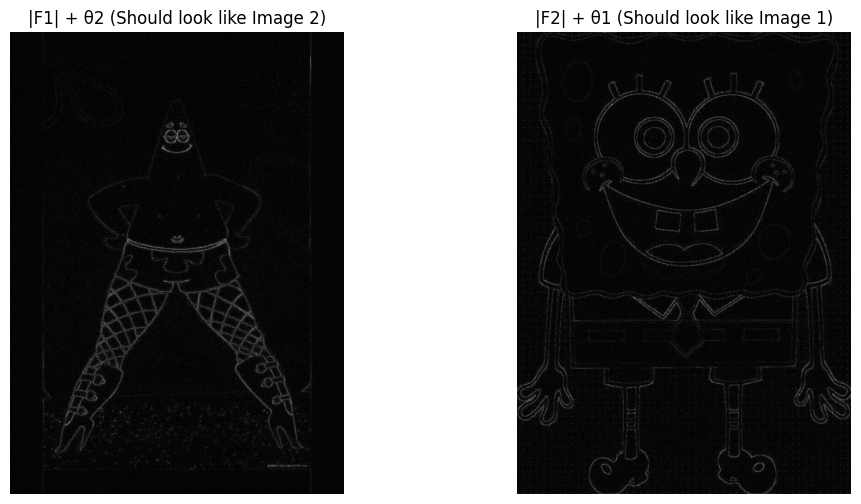

In [ ]:
mag1=magnitude
phase1=phase
img2np=np.array(img2)
gray2 = cv2.cvtColor(img2np, cv2.COLOR_RGB2GRAY)
target_rows, target_cols = 1007, 728
resized_gray2 = cv2.resize(gray2, (target_cols, target_rows), interpolation=cv2.INTER_AREA)
gray2float = resized_gray2.astype(np.float32)

f2 = np.fft.fft2(gray2float)


f2shift = np.fft.fftshift(f2)
# Magnitude Spectrum
mag2 = 20 * np.log(np.abs(f2shift) + 1)

# Phase Spectrum
phase2 = np.angle(f2shift)
f_swap_1 = mag1 * np.exp(1j * phase2)
f_swap_2 = mag2 * np.exp(1j * phase1)
img_1_spatial = np.fft.ifft2(np.fft.ifftshift(f_swap_1))
img_1_reconstructed = np.abs(img_1_spatial)
img_2_spatial = np.fft.ifft2(np.fft.ifftshift(f_swap_2))
img_2_reconstructed = np.abs(img_2_spatial)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_1_reconstructed, cmap='gray')
plt.title("|F1| + θ2 (Should look like Image 2)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_2_reconstructed, cmap='gray')
plt.title("|F2| + θ1 (Should look like Image 1)")
plt.axis('off')

plt.show()
#yes i see how the phase gives structure and magnitude only give texture as we have swapped the phases and we can see we have got the right structure just with different visibility.